<a href="https://colab.research.google.com/github/fbeilstein/algorithms/blob/master/lecture_04_data_structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture objectives:
* **ADT** vs **data structures**
* Familiriarize with basic datastructures : array and linked list
* Familiriarize with basic ADTs : stack, queue, deque, priority queue, tree, graph
* Explore few instructive examples of the flexibility of algorithms that use the features provided by datastructures
* Explore few instructive examples of how algorithms use several datastructures that work in tandem




# Abstract datatypes vs data structures

**An abstract data type** (ADT) is a mathematical model for data types, defined by its behavior (semantics) from the point of view of a user of the data, specifically in terms of possible values, possible operations on data of this type, and the behavior of these operations. This mathematical model contrasts with data structures, which are concrete representations of data, and are the point of view of an implementer, not a user.

**A data structure** is a data organization, management, and storage format that is usually chosen for efficient access to data.


In [ ]:
#@title ADT vs Data structure
%%html
<svg width="205mm" height="82mm" version="1.1" viewBox="0 0 291.07 114.12" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-37.716 84.723)">
  <g transform="matrix(1.4319,0,0,1.4319,78.686,-15.93)" ns24:alignment="middle center" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$Binary tree$\n$ALSO Binary tree$" ns24:version="1.1.0">
   <g transform="translate(-149.13,-127.62)">
    <rect x="188.8" y="107.33" width="36.51" height="37.684" style="fill-opacity:.41667;fill:#e4e4e4;opacity:.999"/>
    <rect x="190.15" y="126.58" width="33.027" height="7.4158" style="fill:#e4e4e4;opacity:.999"/>
    <rect x="190.15" y="117.86" width="33.027" height="7.4158" style="fill:#e4e4e4;opacity:.999"/>
    <rect x="190.38" y="109.03" width="33.027" height="7.4158" style="fill:#e4e4e4;opacity:.999"/>
    <path d="m138.52 115.31 0.46521 29.574 24.416 6.7905-0.0923-32.178z" style="fill-opacity:.65909;fill:#000000;stroke-linecap:round;stroke-width:.37366;stroke:#000000"/>
    <path d="m163.31 119.49 0.19938 32.099 17.479-9.321 0.14098-28.713z" style="fill-opacity:.57197;fill:#000000;stroke-linecap:round;stroke-width:.37366;stroke:#000000"/>
    <path d="m156.83 110.32 24.453 3.1553-17.977 6.0217-24.789-4.1869z" style="fill-opacity:.41288;fill:#000000;stroke-linecap:round;stroke-width:.37366;stroke:#000000"/>
    <g transform="matrix(3.0744 0 0 3.0744 245.68 49.356)" ns24:alignment="middle center" ns24:inkscapeversion="1.0" ns24:jacobian_sqrt="3.77952" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$$operation 1: \\cdots $$\n$$operation 2: \\cdots $$\n$$operation 3: \\cdots $$" ns24:version="1.1.0">
     <defs></defs>
     <g id="id-45d45d28-a2aa-4ae8-90e1-1cd6d8ed00aa" transform="translate(-271.57 -140.08)">
      <g id="id-ac11b1fd-9919-4cf9-bebc-25bb296ff32a" transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000">
       <g transform="translate(271.16 146.72)">
        <path id="id-461b6805-2ac7-47a4-85ee-57a9ddf2d77a" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
       </g>
       <g transform="translate(275.99 146.72)">
        <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
       </g>
       <g transform="translate(281 146.72)">
        <path id="id-94eda14a-7411-4aac-bd18-9b7f9457e1ca" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
       </g>
       <g transform="translate(285.64 146.72)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g id="id-53c37a5f-b29c-47aa-ac4b-00242fa40aab" transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000">
       <g transform="translate(290.42 146.72)">
        <path id="id-de414d0f-a2e9-41a8-afe6-920efe59f35c" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
       </g>
       <g transform="translate(295.68 146.72)">
        <path id="id-6f23d902-dd9d-45d4-b3df-6139f3f5016c" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
       </g>
       <g transform="translate(299.28 146.72)">
        <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
       </g>
       <g transform="translate(302.71 146.72)">
        <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
       </g>
       <g transform="translate(307.54,146.72)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000">
       <g transform="translate(313.52 146.72)">
        <path d="m6.7628-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
       </g>
      </g>
      <g id="id-91f2f877-1809-4447-87a5-6415ee2b83ac" transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000">
       <g transform="translate(321.27,146.72)">
        <path d="m5.7316-3.7656c0-0.29688-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.23438-0.53125 0.53125 0 0.28125 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.25 0.51562-0.53125zm0 3.2344c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
       </g>
      </g>
      <g id="id-9eea6306-cdaf-43a4-a7b6-79936b52a12a" transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000"></g>
      <g transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000"></g>
      <g transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000"></g>
      <g transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000">
       <g transform="translate(271.16 164.65)">
        <path id="id-6c01b60b-6e64-4511-8805-b0008fa1ef0b" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
       </g>
       <g transform="translate(275.99 164.65)">
        <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
       </g>
       <g transform="translate(281 164.65)">
        <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
       </g>
       <g transform="translate(285.64 164.65)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g id="id-635be4bf-6a03-4cb4-8a21-eca51c72494a" transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000">
       <g transform="translate(290.42 164.65)">
        <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
       </g>
       <g transform="translate(295.68 164.65)">
        <path id="id-d2a934a1-ed83-4e78-adbd-52395744f51f" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
       </g>
       <g transform="translate(299.28 164.65)">
        <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
       </g>
       <g transform="translate(302.71 164.65)">
        <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
       </g>
       <g transform="translate(307.54 164.65)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000">
       <g transform="translate(313.52 164.65)">
        <path id="id-ea915123-390f-485e-89db-c0bf5871cbae" d="m5.0909-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
       </g>
      </g>
      <g transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000">
       <g transform="translate(321.27 164.65)">
        <path d="m5.7316-3.7656c0-0.29688-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.23438-0.53125 0.53125 0 0.28125 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.25 0.51562-0.53125zm0 3.2344c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
       </g>
      </g>
      <g transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000"></g>
      <g transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000"></g>
      <g transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000"></g>
      <g transform="matrix(.15507 0 0 .15507 212.3 138.6)" style="fill:#000000">
       <g transform="translate(271.16 182.59)">
        <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
       </g>
       <g transform="translate(275.99 182.59)">
        <path id="id-583dd45c-91d2-4657-a7e9-5ac9e798e09a" d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
       </g>
       <g transform="translate(281 182.59)">
        <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
       </g>
       <g transform="translate(285.64 182.59)">
        <path id="id-de4015a7-f44f-43a6-984d-6548173f56ff" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g id="id-b3e800ef-a376-4ddb-9e37-f9076cbd5bed" transform="matrix(.15507 0 0 .15507 212.3 138.6)" style="fill:#000000">
       <g transform="translate(290.42 182.59)">
        <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
       </g>
       <g transform="translate(295.68 182.59)">
        <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
       </g>
       <g transform="translate(299.28 182.59)">
        <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
       </g>
       <g transform="translate(302.71 182.59)">
        <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
       </g>
       <g transform="translate(307.54 182.59)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g transform="matrix(.15507 0 0 .15507 212.3 138.6)" style="fill:#000000">
       <g transform="translate(313.52 182.59)">
        <path d="m6.7159-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
       </g>
      </g>
      <g id="id-5abab024-7870-4380-a4c7-e89317e1d2bf" transform="matrix(.15507 0 0 .15507 212.3 138.6)" style="fill:#000000">
       <g transform="translate(321.27 182.59)">
        <path d="m5.7316-3.7656c0-0.29688-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.23438-0.53125 0.53125 0 0.28125 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.25 0.51562-0.53125zm0 3.2344c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
       </g>
      </g>
      <g id="id-d245946f-566a-4acb-8b0f-8fac5314bb7e" transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000"></g>
      <g id="id-583e9d78-5cbd-4340-94bd-b7bb1a305ddf" transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000"></g>
      <g id="id-116e9527-4ec5-4770-8752-63fc1e25254a" transform="matrix(.15507 0 0 .15507 212.3 138.4)" style="fill:#000000"></g>
     </g>
    </g>
    <path d="m290.95 139.61-18.315 6.8098" style="fill:none;stroke-dasharray:0.261559, 0.523118;stroke-opacity:.50379;stroke-width:.26156;stroke:#000000"/>
    <g transform="translate(-6.187 -44.497)">
     <g transform="matrix(.87696 0 0 .93325 35.909 12.766)" onclick="alert('yo');">
      <path d="m291.63 167.09c0.12148 0.0278 0.78713 0.21456 0.78713 0.21456l-0.30571 1.406c0.30504 0.14179 0.50111 0.25552 0.6787 0.39739l1.044-0.74135 0.52775 0.68572-0.70627 1.0377c0.12536 0.29656 0.27197 0.60433 0.29199 0.84513l1.2027-0.0959 0.15798 0.90042-1.0973 0.58071c-0.0281 0.32312-0.0755 0.60962-0.12969 0.88355l1.0029 0.55551-0.20097 0.92432-1.2645-0.11797c-0.10753 0.25536-0.22042 0.50948-0.43166 0.74112l0.53568 1.1091-0.59328 0.65522-0.89767-0.78421c-0.23554 0.1634-0.50475 0.31832-0.7295 0.42021l-0.0145 1.3747-0.77656 0.22193-0.4658-1.2073c-0.24846 0.0314-0.54736 0.018-0.80841-0.0463l-0.52776 1.1513-0.89009-0.2128 0.26396-1.3094c-0.16413-0.0829-0.50132-0.30876-0.64285-0.45685l-1.0352 0.74167-0.56097-0.64199 0.74934-1.1495c-0.09-0.17438-0.21003-0.5313-0.25783-0.76022l-1.2145 0.16253-0.16105-0.95006 1.1091-0.63506c6e-3 -0.22893 0.0485-0.52917 0.0877-0.72194l-1.0384-0.74302 0.2458-0.97115 1.1648 0.22562 0.51937-0.76181-0.63187-1.0496 0.69764-0.68842 0.84111 0.85283c0.2691-0.28366 0.56105-0.39897 0.85073-0.53112l-0.0817-1.3151 0.9104-0.19947 0.3106 1.1555c0.30055 9e-3 0.58762 0.0196 0.86941 0.0847z" style="fill-opacity:.38258;fill:#000000"/>
      <ellipse transform="matrix(.97483 .22296 -.21246 .97717 0 0)" cx="320.31" cy="103.53" rx="2.9756" ry="3.4896" style="fill:#ffffff;opacity:.999"/>
      <path d="m294.94 172.77 0.78557 1.2405-0.66258 0.96176-1.4034-0.2199-0.3746 1.0839 1.3307 0.6251-0.15097 1.1308-1.3587 0.48199 0.16774 1.0739 1.4761-0.0864 0.45289 1.01-0.93375 1.1646 0.56752 0.8238 1.3755-0.80001s0.96728 0.52422 0.92255 0.51485c-0.0448-9e-3 -0.33275 1.5502-0.33275 1.5502l1.0735 0.27443 0.61504-1.3551 0.9617 0.15203s0.52837 1.335 0.58428 1.3467c0.0558 0.0117 1.0596-0.21078 1.0596-0.21078l-0.12861-1.5356c0.38451-0.11194 0.72416-0.33241 1.0679-0.54293l1.0316 0.99524 0.88333-0.63443-0.85816-1.3513 0.70728-1.0018 1.3671 0.22468 0.4557-1.0298-1.3363-0.74994 0.15088-1.0813 1.3671-0.56681-0.16215-1.0975-1.5655 0.16658-0.46968-1.0382 0.95612-1.1105-0.61785-0.85907-1.1154 0.74318-0.95051-0.39704 0.14817-1.762-0.93095-0.18268-0.79956 1.44-0.92816-0.145-0.48363-1.4245-1.0931 0.25323-0.0363 1.5382-0.86666 0.5851-1.1602-0.99746z" style="fill-opacity:.6553;fill:#000000"/>
      <ellipse transform="matrix(.97874 .20509 -.2309 .97298 0 0)" cx="332.3" cy="111.94" rx="3.7103" ry="4.0198" style="fill:#ffffff;opacity:.999"/>
      <ellipse transform="matrix(.97874 .20509 -.2309 .97298 0 0)" cx="338.82" cy="123.03" rx="4.6088" ry="4.4539" style="fill:#ffffff;opacity:.999"/>
      <path d="m304.08 180.48 0.1812 1.5931c-0.45329 0.14966-0.76812 0.41584-1.1445 0.63021l-1.208-1.0204c-0.34022 0.19072-0.60413 0.45187-0.85491 0.72515l0.8069 1.4776s-0.52349 1.055-0.6381 1.0446c-0.1147-0.0103-1.6417-0.26184-1.6417-0.26184l-0.35304 1.3236 1.4001 0.62222-0.0743 1.245-1.524 0.66718s-0.0217 1.0779 0.2323 1.1585c0.25401 0.0806 1.5302-0.14522 1.5302-0.14522l0.68768 0.9936s-1.1461 1.267-1.0718 1.3922c0.0743 0.12512 0.7589 0.803 0.7589 0.803l1.3939-0.88625 1.0377 0.61479s-0.3871 1.5768-0.33122 1.6159c0.0557 0.039 1.2143 0.36399 1.2143 0.36399l0.70934-1.5641 1.1182 0.11101s0.29118 1.4586 0.56994 1.4896c0.27877 0.0311 1.2297-0.30408 1.2297-0.30408l-0.17347-1.5709 1.0315-0.61966s1.1492 0.967 1.2762 0.9799 1.0346-0.79711 0.94166-0.844c-0.0929-0.0468-0.87659-1.3483-0.87659-1.3483l0.65976-1.0812 1.5518 0.25675 0.42127-1.2271-1.3072-0.68497-0.0217-1.2788 1.3443-0.67741-0.0806-1.0856-1.6231 0.15314-0.54206-1.1138 0.9943-1.3947-0.67834-0.86832-1.459 0.88632-0.99432-0.5235 0.31292-1.7567-1.143-0.33541-0.79606 1.4911s-1.047-0.0276-1.1089-0.0405c-0.0619-0.013-0.57613-1.2991-0.73411-1.3459-0.15799-0.0467-1.0237 0.3404-1.0237 0.3404z" style="fill-opacity:.32576;fill:#b89204"/>
      <ellipse transform="matrix(.97874 .20509 -.2309 .97298 0 0)" cx="341.11" cy="120.7" rx="4.111" ry="4.4539" style="fill:#ffffff;opacity:.999"/>
      <path d="m303.82 174.33s0.32981 1.0084 0.55571 0.93583c0.2259-0.0726 1.3961-0.92653 1.5045-0.90381 0.10841 0.0227 0.91263 0.47102 0.94425 0.65752 0.0316 0.18648-0.19874 1.3972-0.12199 1.5532 0.0768 0.15599 0.66414 0.55885 0.90359 0.50911 0.23949-0.0498 0.78613-1.3941 0.8991-1.4703 0.11297-0.0762 1.1204-0.085 1.2108-0.066 0.0904 0.0189 0.3795 1.2786 0.51956 1.4079 0.14006 0.12924 1.1702 0.1053 1.247-0.0585 0.0768-0.16378-0.0497-1.6292-5e-3 -1.7396 0.0451-0.11049 0.99395-0.67104 1.1611-0.57605 0.16717 0.095 1.0166 0.91249 1.0888 0.92764 0.0722 0.0151 1.1069-0.50751 1.0798-0.71303-0.0271-0.20553-0.85842-1.1791-0.82679-1.3923 0.0316-0.21321 0.51052-1.192 0.60992-1.2112 0.0995-0.0192 1.7982 0.0171 1.7982 0.0171s0.33882-0.94822 0-1.1192c-0.33884-0.171-1.2018-0.53161-1.2289-0.65721-0.0272-0.12563 0.0181-1.2752 0.15812-1.3058 0.1401-0.0306 1.4096-0.58394 1.4096-0.58394s0.26205-1.1042-0.0633-1.2523c-0.32529-0.14807-1.0753 0.1344-1.4096 0.10432-0.33435-0.03-0.6551-0.67687-0.71385-0.82906-0.0588-0.15222 0.40664-0.83411 0.46989-0.94075 0.0632-0.10669 0.6506-0.42325 0.42017-0.73134-0.23042-0.3081-0.64156-1.1337-0.84487-0.91647-0.20331 0.21719-0.5828 0.53736-0.9578 0.75856s-0.71836 0.14925-0.8539 9.2e-4c-0.13553-0.14833-0.65962-0.418-0.59636-0.60459 0.0632-0.18659 0.51053-1.3519 0.35242-1.5649-0.15812-0.213-1.0301-0.37573-1.1611-0.22343-0.13105 0.15241-0.56478 1.1807-0.64609 1.2835-0.0814 0.10287-0.15807 0.34658-0.39308 0.29734-0.23492-0.0492-0.68219-3e-3 -0.84034-0.13603-0.15813-0.13314-0.6506-1.7351-0.84937-1.6968-0.19879 0.0383-1.1069 0.18773-1.1024 0.56839 5e-3 0.38067 0.30722 1.1835 0.13101 1.4464-0.17607 0.26288-0.54214 0.44596-0.75904 0.56042-0.21684 0.11442-1.1385-0.79817-1.4774-0.80923-0.33886-0.0111-0.60542 0.073-0.81777 0.40822-0.21239 0.33519 0.5015 1.4041 0.49699 1.663-4e-3 0.25886-0.18976 0.7996-0.36149 0.96346-0.17172 0.16386-1.4232 2e-3 -1.762 0.0704-0.33885 0.0689-0.73191 1.0857-0.52861 1.2682 0.20332 0.18251 1.4683 0.52751 1.5045 0.69499 0.0361 0.16742-0.1515 1.2292-0.23491 1.3897-0.10211 0.19625-1.0611 0.35471-1.265 0.45438 0 0-0.0238 1.2357 0.12225 1.1974 0.10651-0.0279 1.5901-0.25907 1.8295 0.0109 0.18208 0.20531 0.5264 0.6214 0.47439 0.99871-0.34817 0.44209-0.71758 0.90227-1.0708 1.3544z" style="fill-opacity:.28409;fill:#000000"/>
      <ellipse transform="matrix(.97874 .20509 -.2309 .97298 0 0)" cx="340.37" cy="102.55" rx="4.24" ry="4.5936" style="fill:#ffffff;opacity:.999"/>
      <path d="m291.63 167.09c0.12148 0.0278 0.78713 0.21456 0.78713 0.21456l-0.30571 1.406c0.30504 0.14179 0.50111 0.25552 0.6787 0.39739l1.044-0.74135 0.52775 0.68572-0.70627 1.0377c0.12536 0.29656 0.27197 0.60433 0.29199 0.84513l1.2027-0.0959 0.15798 0.90042-1.0973 0.58071c-0.0281 0.32312-0.0755 0.60962-0.12969 0.88355l1.0029 0.55551-0.20097 0.92432-1.2645-0.11797c-0.10753 0.25536-0.22042 0.50948-0.43166 0.74112l0.53568 1.1091-0.59328 0.65522-0.89767-0.78421c-0.23554 0.1634-0.50475 0.31832-0.7295 0.42021l-0.0145 1.3747-0.77656 0.22193-0.4658-1.2073c-0.24846 0.0314-0.54736 0.018-0.80841-0.0463l-0.52776 1.1513-0.89009-0.2128 0.26396-1.3094c-0.16413-0.0829-0.50132-0.30876-0.64285-0.45685l-1.0352 0.74167-0.56097-0.64199 0.74934-1.1495c-0.09-0.17438-0.21003-0.5313-0.25783-0.76022l-1.2145 0.16253-0.16105-0.95006 1.1091-0.63506c6e-3 -0.22893 0.0485-0.52917 0.0877-0.72194l-1.0384-0.74302 0.2458-0.97115 1.1648 0.22562 0.51937-0.76181-0.63187-1.0496 0.69764-0.68842 0.84111 0.85283c0.2691-0.28366 0.56105-0.39897 0.85073-0.53112l-0.0817-1.3151 0.9104-0.19947 0.3106 1.1555c0.30055 9e-3 0.58762 0.0196 0.86941 0.0847z" style="fill-opacity:.10227;fill:#000000"/>
      <ellipse transform="matrix(.97483 .22296 -.21246 .97717 0 0)" cx="320.26" cy="103.68" rx="2.9756" ry="3.4896" style="fill:#ffffff;opacity:.999"/>
      <path d="m294.94 172.77 0.78557 1.2405-0.66258 0.96176-1.4034-0.2199-0.3746 1.0839 1.3307 0.6251-0.15097 1.1308-1.3587 0.48199 0.16774 1.0739 1.4761-0.0864 0.45289 1.01-0.93375 1.1646 0.56752 0.8238 1.3755-0.80001s0.96728 0.52422 0.92255 0.51485c-0.0448-9e-3 -0.33275 1.5502-0.33275 1.5502l1.0735 0.27443 0.61504-1.3551 0.9617 0.15203s0.52837 1.335 0.58428 1.3467c0.0558 0.0117 1.0596-0.21078 1.0596-0.21078l-0.12861-1.5356c0.38451-0.11194 0.72416-0.33241 1.0679-0.54293l1.0316 0.99524 0.88333-0.63443-0.85816-1.3513 0.70728-1.0018 1.3671 0.22468 0.4557-1.0298-1.3363-0.74994 0.15088-1.0813 1.3671-0.56681-0.16215-1.0975-1.5655 0.16658-0.46968-1.0382 0.95612-1.1105-0.61785-0.85907-1.1154 0.74318-0.95051-0.39704 0.14817-1.762-0.93095-0.18268-0.79956 1.44-0.92816-0.145-0.48363-1.4245-1.0931 0.25323-0.0363 1.5382-0.86666 0.5851-1.1602-0.99746z" style="fill:#5c5d5a"/>
      <ellipse transform="matrix(.97874 .20509 -.2309 .97298 0 0)" cx="332.3" cy="111.94" rx="3.7103" ry="4.0198" style="fill:#ffffff;opacity:.999"/>
      <ellipse transform="matrix(.97874 .20509 -.2309 .97298 0 0)" cx="338.82" cy="123.03" rx="4.6088" ry="4.4539" style="fill:#ffffff;opacity:.999"/>
      <path d="m304.08 180.48 0.1812 1.5931c-0.45329 0.14966-0.76812 0.41584-1.1445 0.63021l-1.208-1.0204c-0.34022 0.19072-0.60413 0.45187-0.85491 0.72515l0.8069 1.4776s-0.52349 1.055-0.6381 1.0446c-0.1147-0.0103-1.6417-0.26184-1.6417-0.26184l-0.35304 1.3236 1.4001 0.62222-0.0743 1.245-1.524 0.66718s-0.0217 1.0779 0.2323 1.1585c0.25401 0.0806 1.5302-0.14522 1.5302-0.14522l0.68768 0.9936s-1.1461 1.267-1.0718 1.3922c0.0743 0.12512 0.7589 0.803 0.7589 0.803l1.3939-0.88625 1.0377 0.61479s-0.3871 1.5768-0.33122 1.6159c0.0557 0.039 1.2143 0.36399 1.2143 0.36399l0.70934-1.5641 1.1182 0.11101s0.29118 1.4586 0.56994 1.4896c0.27877 0.0311 1.2297-0.30408 1.2297-0.30408l-0.17347-1.5709 1.0315-0.61966s1.1492 0.967 1.2762 0.9799 1.0346-0.79711 0.94166-0.844c-0.0929-0.0468-0.87659-1.3483-0.87659-1.3483l0.65976-1.0812 1.5518 0.25675 0.42127-1.2271-1.3072-0.68497-0.0217-1.2788 1.3443-0.67741-0.0806-1.0856-1.6231 0.15314-0.54206-1.1138 0.9943-1.3947-0.67834-0.86832-1.459 0.88632-0.99432-0.5235 0.31292-1.7567-1.143-0.33541-0.79606 1.4911s-1.047-0.0276-1.1089-0.0405c-0.0619-0.013-0.57613-1.2991-0.73411-1.3459-0.15799-0.0467-1.0237 0.3404-1.0237 0.3404z" style="fill-opacity:.32576;fill:#b89204"/>
      <ellipse transform="matrix(.97874 .20509 -.2309 .97298 0 0)" cx="341.11" cy="120.7" rx="4.111" ry="4.4539" style="fill:#ffffff;opacity:.999"/>
      <path d="m303.82 174.33s0.32981 1.0084 0.55571 0.93583c0.2259-0.0726 1.3961-0.92653 1.5045-0.90381 0.10841 0.0227 0.91263 0.47102 0.94425 0.65752 0.0316 0.18648-0.19874 1.3972-0.12199 1.5532 0.0768 0.15599 0.66414 0.55885 0.90359 0.50911 0.23949-0.0498 0.78613-1.3941 0.8991-1.4703 0.11297-0.0762 1.1204-0.085 1.2108-0.066 0.0904 0.0189 0.3795 1.2786 0.51956 1.4079 0.14006 0.12924 1.1702 0.1053 1.247-0.0585 0.0768-0.16378-0.0497-1.6292-5e-3 -1.7396 0.0451-0.11049 0.99395-0.67104 1.1611-0.57605 0.16717 0.095 1.0166 0.91249 1.0888 0.92764 0.0722 0.0151 1.1069-0.50751 1.0798-0.71303-0.0271-0.20553-0.85842-1.1791-0.82679-1.3923 0.0316-0.21321 0.51052-1.192 0.60992-1.2112 0.0995-0.0192 1.7982 0.0171 1.7982 0.0171s0.33882-0.94822 0-1.1192c-0.33884-0.171-1.2018-0.53161-1.2289-0.65721-0.0272-0.12563 0.0181-1.2752 0.15812-1.3058 0.1401-0.0306 1.4096-0.58394 1.4096-0.58394s0.26205-1.1042-0.0633-1.2523c-0.32529-0.14807-1.0753 0.1344-1.4096 0.10432-0.33435-0.03-0.6551-0.67687-0.71385-0.82906-0.0588-0.15222 0.40664-0.83411 0.46989-0.94075 0.0632-0.10669 0.6506-0.42325 0.42017-0.73134-0.23042-0.3081-0.64156-1.1337-0.84487-0.91647-0.20331 0.21719-0.5828 0.53736-0.9578 0.75856s-0.71836 0.14925-0.8539 9.2e-4c-0.13553-0.14833-0.65962-0.418-0.59636-0.60459 0.0632-0.18659 0.51053-1.3519 0.35242-1.5649-0.15812-0.213-1.0301-0.37573-1.1611-0.22343-0.13105 0.15241-0.56478 1.1807-0.64609 1.2835-0.0814 0.10287-0.15807 0.34658-0.39308 0.29734-0.23492-0.0492-0.68219-3e-3 -0.84034-0.13603-0.15813-0.13314-0.6506-1.7351-0.84937-1.6968-0.19879 0.0383-1.1069 0.18773-1.1024 0.56839 5e-3 0.38067 0.30722 1.1835 0.13101 1.4464-0.17607 0.26288-0.54214 0.44596-0.75904 0.56042-0.21684 0.11442-1.1385-0.79817-1.4774-0.80923-0.33886-0.0111-0.60542 0.073-0.81777 0.40822-0.21239 0.33519 0.5015 1.4041 0.49699 1.663-4e-3 0.25886-0.18976 0.7996-0.36149 0.96346-0.17172 0.16386-1.4232 2e-3 -1.762 0.0704-0.33885 0.0689-0.73191 1.0857-0.52861 1.2682 0.20332 0.18251 1.4683 0.52751 1.5045 0.69499 0.0361 0.16742-0.1515 1.2292-0.23491 1.3897-0.10211 0.19625-1.0611 0.35471-1.265 0.45438 0 0-0.0238 1.2357 0.12225 1.1974 0.10651-0.0279 1.5901-0.25907 1.8295 0.0109 0.18208 0.20531 0.5264 0.6214 0.47439 0.99871-0.34817 0.44209-0.71758 0.90227-1.0708 1.3544z" style="fill-opacity:.28409;fill:#000000"/>
      <ellipse transform="matrix(.97874 .20509 -.2309 .97298 0 0)" cx="340.37" cy="102.55" rx="4.24" ry="4.5936" style="fill:#ffffff;opacity:.999"/>
     </g>
    </g>
    <path d="m272.17 116.85 0.46518 29.574 24.416 6.7905" style="fill:none;stroke-dasharray:2.24193, 2.24193;stroke-width:.37366;stroke:#000000"/>
    <path d="m290.48 111.86 0.46719 27.754 23.687 4.2011" style="fill:none;stroke-dasharray:0.261559, 0.523118;stroke-opacity:.50379;stroke-width:.26156;stroke:#000000"/>
    <path d="m296.96 121.03 0.19938 32.099 17.479-9.321 0.14099-28.713-17.819 5.9345-24.789-4.1869 18.313-4.9901 24.453 3.1553" style="fill:none;stroke-dasharray:1.49462, 1.49462;stroke-width:.37366;stroke:#000000"/>
    <g transform="matrix(.60792 0 0 .60792 128.3 82.819)" ns24:alignment="middle center" ns24:inkscapeversion="1.0" ns24:jacobian_sqrt="3.77952" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$$Abstract Data Type (ADT)$$\n$$Data Structures$$\n" ns24:version="1.1.0">
     <defs></defs>
     <g id="id-62d417e2-4916-453a-8741-fd838fae8f9d" transform="translate(-249.13 -139.24)">
      <g id="id-2fa55861-890a-4d02-9af3-fde35be3a75b" transform="translate(-8.9212 4.2128)" style="fill:#000000">
       <g transform="translate(248.79,146.72)">
        <path id="id-a0c28250-f81c-461b-8ef0-90bac354d43c" d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
       </g>
       <g transform="translate(256.26 146.72)">
        <path id="id-e1613cce-c8cf-49a2-84a1-c5b6ae34396e" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
       </g>
       <g transform="translate(260.54 146.72)">
        <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
       </g>
       <g transform="translate(265.21 146.72)">
        <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
       </g>
       <g transform="translate(268.81 146.72)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g id="id-09218f6f-a656-4987-a462-51e349d1d0ac" transform="translate(-8.9212 4.2128)" style="fill:#000000">
       <g transform="translate(273.58,146.72)">
        <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
       </g>
       <g transform="translate(278.85 146.72)">
        <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
       </g>
       <g transform="translate(283.16 146.72)">
        <path id="id-29fb16bc-b1a7-4c49-9fa1-7b621a62708b" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
       </g>
       <g transform="translate(286.76 146.72)">
        <path id="id-8c303f31-1293-4e31-88e6-137bf701f94b" d="m5.9526-0.78125c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.078125 0.125 0.26562 0.125h3.3125c2.0625 0 4.0312-2.1094 4.0312-4.2812 0-1.4062-0.84375-2.5312-2.3438-2.5312h-3.3437c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875zm2.1562-5.3438c0.09375-0.34375 0.10938-0.375 0.54688-0.375h1.0625c0.96875 0 1.7969 0.53125 1.7969 1.8438 0 0.48438-0.1875 2.125-1.0469 3.2188-0.28125 0.375-1.0625 1.125-2.2969 1.125h-1.125-0.21875c-0.09375-0.015625-0.125-0.03125-0.125-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
       </g>
      </g>
      <g id="id-7ecefcf0-6da8-4ffa-ab2d-b428ad06471a" transform="translate(-12.167 12.391)" style="fill:#000000">
       <g transform="translate(302.89 138.54)">
        <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
       </g>
       <g transform="translate(308.16 138.54)">
        <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
       </g>
       <g transform="translate(311.76 138.54)">
        <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
       </g>
       <g transform="translate(320.53 138.54)">
        <path id="id-e0415cf3-b5ce-48ec-a9a9-024d85ff277d" d="m4.25-6.0469c0.078125-0.28125 0.10938-0.34375 0.23438-0.375 0.09375-0.015625 0.42188-0.015625 0.625-0.015625 1.0156 0 1.4531 0.03125 1.4531 0.8125 0 0.15625-0.03125 0.54688-0.078125 0.79688 0 0.046875-0.03125 0.15625-0.03125 0.1875 0 0.0625 0.03125 0.14062 0.125 0.14062 0.10938 0 0.125-0.078125 0.15625-0.23438l0.26562-1.7344c0.015625-0.046875 0.015625-0.14062 0.015625-0.17188 0-0.10938-0.09375-0.10938-0.26562-0.10938h-5.5312c-0.23438 0-0.25 0.015625-0.32812 0.20312l-0.59375 1.75c0 0.015625-0.0625 0.15625-0.0625 0.1875 0 0.046875 0.0625 0.10938 0.125 0.10938 0.09375 0 0.10938-0.0625 0.17188-0.21875 0.53125-1.5469 0.79688-1.7188 2.2656-1.7188h0.39062c0.28125 0 0.28125 0.03125 0.28125 0.125 0 0.046875-0.03125 0.17188-0.046875 0.20312l-1.3281 5.3281c-0.09375 0.35938-0.125 0.46875-1.1875 0.46875-0.35938 0-0.42188 0-0.42188 0.1875 0 0.125 0.10938 0.125 0.17188 0.125 0.26562 0 0.54688-0.015625 0.8125-0.015625 0.28125 0 0.57812-0.015625 0.85938-0.015625s0.54688 0.015625 0.82812 0.015625 0.57812 0.015625 0.85938 0.015625c0.09375 0 0.21875 0 0.21875-0.20312 0-0.10938-0.078125-0.10938-0.34375-0.10938-0.23438 0-0.375 0-0.625-0.015625-0.29688-0.03125-0.375-0.0625-0.375-0.21875 0-0.015625 0-0.0625 0.046875-0.20312z"/>
       </g>
      </g>
      <g transform="translate(-1.0396 4.2128)" style="fill:#000000">
       <g transform="translate(316.61 146.72)">
        <path id="id-d6a4d9cd-85f9-4fe5-95c1-7ae2a74b9acb" d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
       </g>
      </g>
      <g id="id-2a28a2b3-a536-4118-bc69-a11549618b4a" transform="translate(-1.0396 4.2128)" style="fill:#000000">
       <g transform="translate(321.85 146.72)">
        <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
       </g>
       <g transform="translate(326.86 146.72)">
        <path id="id-2a3ee748-adc9-4f93-b043-04ba142cf52b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
       </g>
      </g>
      <g id="id-e9677ea9-fb04-4e49-8fb0-c5bb28730a3c" transform="translate(.88281 4.3305)" style="fill:#000000">
       <g transform="translate(331.51 146.72)">
        <path id="id-aac39963-08e6-4b72-9ada-0f3a80fd0b4b" d="m3.2969 2.3906c0-0.03125 0-0.046875-0.17188-0.21875-1.2344-1.25-1.5625-3.1406-1.5625-4.6719 0-1.7344 0.375-3.4688 1.6094-4.7031 0.125-0.125 0.125-0.14062 0.125-0.17188 0-0.078125-0.03125-0.10938-0.09375-0.10938-0.10938 0-1 0.6875-1.5938 1.9531-0.5 1.0938-0.625 2.2031-0.625 3.0312 0 0.78125 0.10938 1.9844 0.65625 3.125 0.60938 1.2188 1.4531 1.875 1.5625 1.875 0.0625 0 0.09375-0.03125 0.09375-0.10938z"/>
       </g>
      </g>
      <g id="id-ce3c176d-8621-4fa1-9a09-cee06dac8ffe" transform="translate(.88281 4.3305)" style="fill:#000000">
       <g transform="translate(335.38,146.72)">
        <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
       </g>
       <g transform="translate(342.85 146.72)">
        <path d="m1.5781-0.78125c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.078125 0.125 0.26562 0.125h3.3125c2.0625 0 4.0312-2.1094 4.0312-4.2812 0-1.4062-0.84375-2.5312-2.3438-2.5312h-3.3438c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875zm2.1562-5.3438c0.09375-0.34375 0.10938-0.375 0.54688-0.375h1.0625c0.96875 0 1.7969 0.53125 1.7969 1.8438 0 0.48438-0.1875 2.125-1.0469 3.2188-0.28125 0.375-1.0625 1.125-2.2969 1.125h-1.125-0.21875c-0.09375-0.015625-0.125-0.03125-0.125-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
       </g>
      </g>
      <g id="id-53c77a76-10c9-4069-b6bf-36b192c818bf" transform="translate(.88281 4.3305)" style="fill:#000000">
       <g transform="translate(351.38 146.72)">
        <path id="id-9f1dfbb4-d605-4e5a-a07a-55080b8afa9e" d="m4.25-6.0469c0.078125-0.28125 0.10938-0.34375 0.23438-0.375 0.09375-0.015625 0.42188-0.015625 0.625-0.015625 1.0156 0 1.4531 0.03125 1.4531 0.8125 0 0.15625-0.03125 0.54688-0.078125 0.79688 0 0.046875-0.03125 0.15625-0.03125 0.1875 0 0.0625 0.03125 0.14062 0.125 0.14062 0.10938 0 0.125-0.078125 0.15625-0.23438l0.26562-1.7344c0.015625-0.046875 0.015625-0.14062 0.015625-0.17188 0-0.10938-0.09375-0.10938-0.26562-0.10938h-5.5312c-0.23438 0-0.25 0.015625-0.32812 0.20312l-0.59375 1.75c0 0.015625-0.0625 0.15625-0.0625 0.1875 0 0.046875 0.0625 0.10938 0.125 0.10938 0.09375 0 0.10938-0.0625 0.17188-0.21875 0.53125-1.5469 0.79688-1.7188 2.2656-1.7188h0.39062c0.28125 0 0.28125 0.03125 0.28125 0.125 0 0.046875-0.03125 0.17188-0.046875 0.20312l-1.3281 5.3281c-0.09375 0.35938-0.125 0.46875-1.1875 0.46875-0.35938 0-0.42188 0-0.42188 0.1875 0 0.125 0.10938 0.125 0.17188 0.125 0.26562 0 0.54688-0.015625 0.8125-0.015625 0.28125 0 0.57812-0.015625 0.85938-0.015625s0.54688 0.015625 0.82812 0.015625 0.57812 0.015625 0.85938 0.015625c0.09375 0 0.21875 0 0.21875-0.20312 0-0.10938-0.078125-0.10938-0.34375-0.10938-0.23438 0-0.375 0-0.625-0.015625-0.29688-0.03125-0.375-0.0625-0.375-0.21875 0-0.015625 0-0.0625 0.046875-0.20312z"/>
       </g>
      </g>
      <g id="id-6afa7302-af94-4abe-9555-9e3b0f74f38f" transform="translate(.88281 4.3305)" style="fill:#000000">
       <g transform="translate(358.58 146.72)">
        <path id="id-e4655d6a-ee80-4526-b2fa-3348006fc53e" d="m2.875-2.5c0-0.76562-0.10938-1.9688-0.65625-3.1094-0.59375-1.2188-1.4531-1.875-1.5469-1.875-0.0625 0-0.10938 0.046875-0.10938 0.10938 0 0.03125 0 0.046875 0.1875 0.23438 0.98438 0.98438 1.5469 2.5625 1.5469 4.6406 0 1.7188-0.35938 3.4688-1.5938 4.7188-0.14062 0.125-0.14062 0.14062-0.14062 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.09375 0 1-0.6875 1.5781-1.9531 0.51562-1.0938 0.625-2.2031 0.625-3.0469z"/>
       </g>
      </g>
      <g id="id-f030b2e2-af34-4f41-926f-f9ad0100a58c" transform="translate(219.09 -13.7)" style="fill:#000000">
       <g transform="translate(270.07 164.65)">
        <path d="m1.5781-0.78125c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.078125 0.125 0.26562 0.125h3.3125c2.0625 0 4.0312-2.1094 4.0312-4.2812 0-1.4062-0.84375-2.5312-2.3438-2.5312h-3.3438c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875zm2.1562-5.3438c0.09375-0.34375 0.10938-0.375 0.54688-0.375h1.0625c0.96875 0 1.7969 0.53125 1.7969 1.8438 0 0.48438-0.1875 2.125-1.0469 3.2188-0.28125 0.375-1.0625 1.125-2.2969 1.125h-1.125-0.21875c-0.09375-0.015625-0.125-0.03125-0.125-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
       </g>
      </g>
      <g id="id-e893d5e1-ce1e-4fb6-a62a-f4fdc1483c8f" transform="translate(219.09 -13.7)" style="fill:#000000">
       <g transform="translate(278.6 164.65)">
        <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
       </g>
       <g transform="translate(283.86 164.65)">
        <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
       </g>
       <g transform="translate(287.46 164.65)">
        <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
       </g>
       <g transform="translate(292.73 164.65)">
        <path id="id-6f28c2d7-cf4d-4d5d-ac98-5340ff8200dc" d="m11.364-6.9219c0-0.03125-0.03125-0.10938-0.125-0.10938-0.04687 0-0.04687 0.015625-0.17188 0.15625l-0.48438 0.5625c-0.25-0.46875-0.76562-0.71875-1.4219-0.71875-1.2656 0-2.4531 1.1562-2.4531 2.3594 0 0.79688 0.51562 1.2656 1.0312 1.4062l1.0625 0.28125c0.375 0.09375 0.92188 0.25 0.92188 1.0625 0 0.89062-0.8125 1.8281-1.7969 1.8281-0.64062 0-1.75-0.21875-1.75-1.4531 0-0.23438 0.0625-0.48438 0.0625-0.53125 0.015625-0.046875 0.015625-0.0625 0.015625-0.078125 0-0.09375-0.0625-0.10938-0.10938-0.10938s-0.078125 0.015625-0.10938 0.046875-0.59375 2.3125-0.59375 2.3438c0 0.046875 0.046875 0.09375 0.10938 0.09375 0.046875 0 0.0625-0.015625 0.1875-0.15625l0.48438-0.5625c0.42188 0.57812 1.1094 0.71875 1.6875 0.71875 1.3594 0 2.5312-1.3281 2.5312-2.5625 0-0.6875-0.34375-1.0312-0.48438-1.1719-0.23438-0.21875-0.39062-0.26562-1.2656-0.48438-0.23438-0.0625-0.57812-0.17188-0.67188-0.1875-0.26562-0.09375-0.60938-0.375-0.60938-0.90625 0-0.8125 0.79688-1.6562 1.75-1.6562 0.8125 0 1.4219 0.4375 1.4219 1.5469 0 0.3125-0.03125 0.5-0.03125 0.5625 0 0 0 0.09375 0.10938 0.09375s0.125-0.03125 0.15625-0.20312z"/>
       </g>
      </g>
      <g transform="translate(224.02 -13.7)" style="fill:#000000">
       <g transform="translate(299.41 164.65)">
        <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
       </g>
       <g transform="translate(303 164.65)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g transform="translate(224.02 -13.7)" style="fill:#000000">
       <g transform="translate(307.78 164.65)">
        <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
       </g>
       <g transform="translate(313.48 164.65)">
        <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
       </g>
       <g transform="translate(317.79 164.65)">
        <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
       </g>
       <g transform="translate(321.39 164.65)">
        <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
       </g>
       <g transform="translate(327.09 164.65)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g id="id-e7b9bf58-58a7-4689-9621-1c34683b297c" transform="translate(224.02 -13.7)" style="fill:#000000">
       <g transform="translate(331.87 164.65)">
        <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
       </g>
      </g>
     </g>
    </g>
    <rect transform="matrix(-.58523 -.81087 -.60211 .79841 0 0)" x="-334.94" y="-194.84" width="1.7574" height="24.69" style="fill-opacity:.20833;fill:#ffffff;opacity:.999"/>
    <rect transform="matrix(-.63131 -.77553 -.64791 .76172 0 0)" x="-302.76" y="-155.41" width="1.9886" height="28.008" style="fill-opacity:.20833;fill:#ffffff;opacity:.999"/>
    <rect transform="matrix(-.63131 -.77553 -.64791 .76172 0 0)" x="-304.75" y="-155.41" width="1.9886" height="28.008" style="fill-opacity:.20833;fill:#ffffff;opacity:.999"/>
   </g>
  </g>
 </g>
</svg>





Think of ADT as an *interface* and of data structure as an *implementation*. Don't be confused: ADTs and respective implementations have the same name.

In [ ]:
#@title Classification of ADTs/data structures
%%html


<?xml version="1.0" encoding="UTF-8"?>
<svg width="196mm" height="123mm" version="1.1" viewBox="0 0 392.37 247.09" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns81="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(115.56 4.5008)">
  <rect x="-115.56" y="175.02" width="58.993" height="24.671" style="fill-opacity:.10606;fill:#00b8ff;opacity:.999"/>
  <rect x="-19.334" y="217.87" width="58.993" height="24.671" style="fill-opacity:.10606;fill:#00b8ff;opacity:.999"/>
  <rect x="-38.78" y="67.99" width="66.553" height="21.916" style="fill-opacity:.10606;fill:#000000;opacity:.999"/>
  <rect x="-113.89" y="118.78" width="66.553" height="21.916" style="fill-opacity:.10606;fill:#000000;opacity:.999"/>
  <rect x="39.015" y="118.45" width="66.553" height="20.135" style="fill-opacity:.10606;fill:#000000;opacity:.999"/>
  <rect x="176.26" y="68.826" width="72.432" height="21.916" style="fill-opacity:.10606;fill:#000000;opacity:.999"/>
  <rect x="62.274" y="-4.5008" width="76.974" height="25.348" style="fill-opacity:.10606;fill:#000000;opacity:.999"/>
  <g transform="translate(80.849 30.882)" ns81:alignment="middle center" ns81:jacobian_sqrt="1.0" ns81:pdfconverter="inkscape" ns81:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns81:scale="2.834645669291339" ns81:texconverter="pdflatex" ns81:text="$$Data structure$$\n$$Linear$$\n$$Non-Linear$$\n$$Static Array$$\n$$Dynamic Array$$\n$$Stack$$\n$$Queue$$\n$$Linked List$$\n$$Graph$$\n$$Tree$$" ns81:version="1.1.0">
   <defs></defs>
   <g transform="translate(-271.52 -139.91)">
    <g transform="translate(-15.502 -27.261)" style="fill:#000000">
     <g transform="translate(273.41 146.72)">
      <path d="m1.5781-0.78125c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.078125 0.125 0.26562 0.125h3.3125c2.0625 0 4.0312-2.1094 4.0312-4.2812 0-1.4062-0.84375-2.5312-2.3438-2.5312h-3.3438c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875zm2.1562-5.3438c0.09375-0.34375 0.10938-0.375 0.54688-0.375h1.0625c0.96875 0 1.7969 0.53125 1.7969 1.8438 0 0.48438-0.1875 2.125-1.0469 3.2188-0.28125 0.375-1.0625 1.125-2.2969 1.125h-1.125-0.21875c-0.09375-0.015625-0.125-0.03125-0.125-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
     </g>
    </g>
    <g transform="translate(-15.502 -27.261)" style="fill:#000000">
     <g transform="translate(281.94 146.72)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(287.21 146.72)">
      <path id="id-6981221a-ac88-408d-81f4-c99026bfbf3e" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(290.8 146.72)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(296.07 146.72)">
      <path id="id-b7fcf50d-5cc7-47fd-b68f-60cc206bd99e" d="m7.0656-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
     </g>
     <g transform="translate(300.74 146.72)">
      <path d="m5.2219-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20313 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(304.34 146.72)">
      <path d="m4.05-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-15.502 -27.261)" style="fill:#000000">
     <g transform="translate(309.1 146.72)">
      <path id="id-6e67b390-639f-4915-a1b3-9428835d335b" d="m6.6594-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
     </g>
     <g transform="translate(314.81 146.72)">
      <path id="id-412443a8-2d89-4d90-8807-cd562b99722a" d="m7.1281-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57813 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(319.12 146.72)">
      <path d="m5.2219-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20313 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(322.72 146.72)">
      <path d="m6.6594-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
     </g>
     <g transform="translate(328.42 146.72)">
      <path d="m4.05-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-86a0e6e9-7d58-4d51-8043-8d2cd193779b" transform="translate(-15.502 -27.261)" style="fill:#000000">
     <g transform="translate(333.19 146.72)">
      <path d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
    <g transform="translate(-105.97 33.705)" style="fill:#000000">
     <rect x="444.04" y="194.14" width="58.993" height="24.671" style="fill-opacity:.10606;fill:#00b8ff;opacity:.999"/>
     <rect x="514.46" y="194.04" width="58.993" height="24.671" style="fill-opacity:.10606;fill:#00b8ff;opacity:.999"/>
     <rect x="398.88" y="293.19" width="58.993" height="24.671" style="fill-opacity:.10606;fill:#00b8ff;opacity:.999"/>
     <g transform="translate(276.2 157.57)">
      <path id="id-db1df0d1-4a69-4c69-83e5-dde974c6662d" d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-0.9375-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
     </g>
     <g transform="translate(282.98 157.57)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(286.42 157.57)">
      <path id="id-d0496194-ab19-438d-a1fa-c3de7a60280f" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(292.4 157.57)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(297.03 157.57)">
      <path id="id-57bb9a7f-d922-48c7-9776-2ab6e9c3f4bc" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(302.3 157.57)">
      <path id="id-0f4af9e4-7972-490b-989b-3e95d2a9a14a" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <text x="198.25052" y="264.78223" style="font-family:'Courier New';font-size:9.5066px;font-weight:bold;line-height:1.25;stroke-width:.23767" xml:space="preserve"><tspan x="198.25052" y="264.78223" style="stroke-width:.23767">Array</tspan></text>
     <text x="226.50839" y="302.27063" style="fill:#000000;font-family:'Courier New';font-size:9.5066px;font-weight:bold;line-height:1.25;stroke-width:.23767" xml:space="preserve"><tspan x="226.50839" y="302.27063" style="stroke-width:.23767">Dynamic</tspan><tspan x="226.50839" y="314.15393" style="stroke-width:.23767">Array</tspan></text>
     <text x="353.8941" y="308.64038" style="fill:#000000;font-family:'Courier New';font-size:9.5066px;font-weight:bold;line-height:1.25;stroke-width:.23767" xml:space="preserve"><tspan x="353.8941" y="308.64038" style="stroke-width:.23767">Stack</tspan></text>
     <text x="293.3486" y="302.70016" style="fill:#000000;font-family:'Courier New';font-size:9.5066px;font-weight:bold;line-height:1.25;stroke-width:.23767" xml:space="preserve"><tspan x="293.3486" y="302.70016" style="stroke-width:.23767">Linked</tspan><tspan x="293.3486" y="314.58347" style="stroke-width:.23767">list</tspan></text>
     <text x="476.98111" y="307.82251" style="fill:#000000;font-family:'Courier New';font-size:9.5066px;font-weight:bold;line-height:1.25;stroke-width:.23767" xml:space="preserve"><tspan x="476.98111" y="307.82251" style="stroke-width:.23767">Deque</tspan></text>
     <text x="464.36255" y="210.33492" style="fill:#000000;font-family:'Courier New';font-size:9.5066px;font-weight:bold;line-height:1.25;stroke-width:.23767" xml:space="preserve"><tspan x="464.36255" y="210.33492" style="stroke-width:.23767">Tree</tspan></text>
     <text x="529.92126" y="210.52141" style="fill:#000000;font-family:'Courier New';font-size:9.5066px;font-weight:bold;line-height:1.25;stroke-width:.23767" xml:space="preserve"><tspan x="529.92126" y="210.52141" style="stroke-width:.23767">Graph</tspan></text>
     <path d="m396.33 96.434c-2.6727 0-108.51 46.505-108.51 46.505" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
     <path d="m396.33 96.434c2.6727 0 108.51 46.505 108.51 46.505" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
     <path d="m290.78 165.47-77.296 28.348" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
     <path d="m290.78 165.47 77.296 28.348" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
     <rect x="337.9" y="293.24" width="58.993" height="24.671" style="fill-opacity:.10606;fill:#00b8ff;opacity:.999"/>
     <rect x="459.81" y="293.19" width="58.993" height="24.671" style="fill-opacity:.10606;fill:#00b8ff;opacity:.999"/>
     <text x="412.27048" y="308.01401" style="fill:#000000;font-family:'Courier New';font-size:9.5066px;font-weight:bold;line-height:1.25;stroke-width:.23767" xml:space="preserve"><tspan x="412.27048" y="308.01401" style="stroke-width:.23767">Queue</tspan></text>
     <path d="m367.55 213.77-121.34 78.577" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
     <path d="m367.55 213.77-59.638 78.052" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
     <path d="m367.55 213.77 2.0563 78.034" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
     <path d="m367.55 213.77 57.381 78.568" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
     <path d="m367.55 213.77 121.79 78.034" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
     <path d="m507.78 167.26-35.547 26.994" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
     <path d="m507.78 167.26 39.021 26.46" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
    </g>
    <g id="id-59c6f9f8-a01c-4c7e-a37c-caef207e4e6f" transform="translate(98.656 9.7746)" style="fill:#000000">
     <g transform="translate(274.15 182.59)">
      <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-cd5518cd-1385-41da-af84-daca7563449e" transform="translate(98.656 9.7746)" style="fill:#000000">
     <g transform="translate(283.24 182.59)">
      <path id="id-4143df64-9f83-4736-9746-123bb3da08fc" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
     </g>
     <g transform="translate(288.07 182.59)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-487815a8-7599-48bd-af34-e9cafdfc51ee" transform="translate(98.656 9.7746)" style="fill:#000000">
     <g transform="translate(296.26 182.59)">
      <path id="id-f15624d2-51e9-446a-8cb1-05496821a91d" d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
     </g>
    </g>
    <g transform="translate(98.656 9.7746)" style="fill:#000000">
     <g transform="translate(306.23 182.59)">
      <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-0.9375-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
     </g>
     <g transform="translate(313.01 182.59)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(316.44 182.59)">
      <path id="id-5a12548a-22d6-473b-88ac-2345af941a1d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(322.42 182.59)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(327.06 182.59)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(332.32 182.59)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-3e71a869-4a48-4a96-92cd-6b0811e037fe" transform="translate(-191.64 59.233)" style="fill:#000000">
     <g transform="translate(10.92 -18.653)" style="fill:#000000">
      <g transform="translate(278.42 200.52)">
       <path d="m3.4137-5.032c0-0.03125-0.03125-0.10938-0.125-0.10938-0.046875 0-0.046875 0.015625-0.17188 0.15625l-0.48438 0.5625c-0.25-0.46875-0.76562-0.71875-1.4219-0.71875-1.2656 0-2.4531 1.1562-2.4531 2.3594 0 0.79688 0.51562 1.2656 1.0312 1.4062l1.0625 0.28125c0.375 0.09375 0.92188 0.25 0.92188 1.0625 0 0.89062-0.8125 1.8281-1.7969 1.8281-0.64062 0-1.75-0.21875-1.75-1.4531 0-0.23438 0.0625-0.48438 0.0625-0.53125 0.015625-0.046875 0.015625-0.0625 0.015625-0.078125 0-0.09375-0.0625-0.10938-0.10938-0.10938s-0.078125 0.015625-0.10938 0.046875-0.59375 2.3125-0.59375 2.3438c0 0.046875 0.046875 0.09375 0.10938 0.09375 0.046875 0 0.0625-0.015625 0.1875-0.15625l0.48438-0.5625c0.42188 0.57812 1.1094 0.71875 1.6875 0.71875 1.3594 0 2.5313-1.3281 2.5313-2.5625 0-0.6875-0.34375-1.0312-0.48438-1.1719-0.23438-0.21875-0.39062-0.26562-1.2656-0.48438-0.23438-0.0625-0.57812-0.17188-0.67188-0.1875-0.26562-0.09375-0.60938-0.375-0.60938-0.90625 0-0.8125 0.79688-1.6562 1.75-1.6562 0.8125 0 1.4219 0.4375 1.4219 1.5469 0 0.3125-0.03125 0.5-0.03125 0.5625 0 0 0 0.09375 0.10938 0.09375s0.125-0.03125 0.15625-0.20312z"/>
      </g>
     </g>
     <g transform="translate(296.02 181.87)" style="fill:#000000">
      <path d="m-0.97693-2.0945h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2813-1.2969 1.2813-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(299.62 181.87)" style="fill:#000000">
      <path d="m0.69494-1.8757c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57813-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64063-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39063 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(304.89 181.87)" style="fill:#000000">
      <path id="id-5bec7502-2066-44e2-aebe-a0dfad8e92da" d="m-0.97693-2.0945h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5313 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2813-1.2969 1.2813-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(308.49 181.87)" style="fill:#000000">
      <path d="m-0.19568-4.3445c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54687 0.26562-0.54687 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8437-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5313 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(311.92 181.87)" style="fill:#000000">
      <path d="m0.92932-1.8914c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3437 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85937-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(163.08 -37.85)" style="fill:#000000">
      <g transform="translate(271.11 218.45)">
       <path d="m1.7118 0.15419c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.078125 0.125 0.26562 0.125h3.3125c2.0625 0 4.0312-2.1094 4.0312-4.2813 0-1.4062-0.84375-2.5312-2.3438-2.5312h-3.3438c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875zm2.1562-5.3438c0.09375-0.34375 0.10938-0.375 0.54688-0.375h1.0625c0.96875 0 1.7969 0.53125 1.7969 1.8438 0 0.48438-0.1875 2.125-1.0469 3.2188-0.28125 0.375-1.0625 1.125-2.2969 1.125h-1.125-0.21875c-0.09375-0.015625-0.125-0.03125-0.125-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
      </g>
     </g>
     <g transform="translate(163.08 -37.85)" style="fill:#000000">
      <g transform="translate(279.64 218.45)">
       <path d="m4.9774-2.8614c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95313 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17187 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76563-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
      </g>
     </g>
     <path d="m448.97 180.94c-0.0312 0.15625-0.0937 0.39063-0.0937 0.4375 0 0.17188 0.14062 0.26563 0.29687 0.26563 0.125 0 0.29688-0.0781 0.375-0.28125 0-0.0156 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.0469-0.23438 0.10938-0.45313 0.17188-0.67188 0.0312-0.17187 0.10937-0.46875 0.125-0.5 0.14062-0.3125 0.67187-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70313 0 0.60937-0.48438 1.8906-0.64063 2.3125-0.0937 0.23437-0.10937 0.35937-0.10937 0.46875 0 0.46875 0.35937 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.0781-0.10938-0.10938-0.10938-0.10937 0-0.10937 0.0312-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.0937-0.23438-0.32813 0-0.25 0.0781-0.48437 0.17188-0.70312 0.1875-0.53125 0.60937-1.625 0.60937-2.2031 0-0.65625-0.42187-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64063-1.5625 0.875-0.0469-0.5625-0.45313-0.875-0.92188-0.875-0.45312 0-0.64062 0.39063-0.73437 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.0937 0.10938 0.10938 0.10938 0.10937 0 0.10937-0.0156 0.17187-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29687 0.125 0.29687 0.45313 0 0.21875-0.0312 0.32812-0.15625 0.84375z" style="fill:#000000"/>
     <path d="m457.79 177.77c-0.1875-0.375-0.46875-0.64063-0.92188-0.64063-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54687 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.0469 1.2969-0.75 0.0781 0.42187 0.4375 0.75 0.90625 0.75 0.35938 0 0.57813-0.23438 0.75-0.54688 0.15625-0.35937 0.29688-0.96875 0.29688-0.98437 0-0.10938-0.0937-0.10938-0.125-0.10938-0.0937 0-0.10938 0.0469-0.14063 0.1875-0.17187 0.64063-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29687-0.26563-0.29687-0.45313 0-0.21875 0.0156-0.3125 0.125-0.75 0.10937-0.40625 0.125-0.51562 0.21875-0.89062l0.35937-1.3906c0.0625-0.28125 0.0625-0.29687 0.0625-0.34375 0-0.17187-0.10937-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42187 0.4375zm-0.64063 2.5781c-0.0625 0.1875-0.0625 0.20313-0.20312 0.375-0.4375 0.54688-0.84375 0.70313-1.125 0.70313-0.5 0-0.64063-0.54688-0.64063-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57813 0.75-0.95313 1.1562-0.95313 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.0156 0.125-0.0312 0.17188z" style="fill:#000000"/>
     <path d="m460.21 180.94c-0.0312 0.15625-0.0937 0.39063-0.0937 0.4375 0 0.17188 0.14062 0.26563 0.29687 0.26563 0.125 0 0.29688-0.0781 0.375-0.28125 0-0.0156 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.0469-0.23438 0.10937-0.45313 0.17187-0.67188 0.0312-0.17187 0.10938-0.46875 0.12501-0.5 0.14062-0.3125 0.67187-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70313 0 0.25-0.0625 0.53125-0.14063 0.82812l-0.28125 1.1562-0.20312 0.75c-0.0312 0.20313-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26563 0.28125 0.26563 0.3125 0 0.375-0.25 0.45312-0.5625 0.14063-0.5625 0.51563-2.0156 0.59375-2.4062 0.0312-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70313 0 0.5625-0.42187 1.7031-0.625 2.2344-0.0781 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.0937-0.10938-0.125-0.10938-0.0937 0-0.0937 0.0312-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17187 0-0.25-0.0937-0.25-0.32813 0-0.25 0.0937-0.48437 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40626-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.0312-0.46875-0.31251-0.70312-0.24999-0.21875-0.56249-0.26563-0.81249-0.26563-0.90625 0-1.3906 0.64063-1.5625 0.875-0.0469-0.57812-0.46875-0.875-0.92188-0.875-0.45312 0-0.64062 0.39063-0.73437 0.5625-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.0937 0.10938 0.10938 0.10938 0.10937 0 0.10937-0.0156 0.17187-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29687 0.0781 0.29687 0.45313 0 0.21875-0.0312 0.32812-0.15625 0.84375z" style="fill:#000000"/>
     <path d="m470.91 175.3c0-0.20313-0.14062-0.35938-0.35937-0.35938-0.28125 0-0.54688 0.26563-0.54688 0.53125 0 0.1875 0.14063 0.35938 0.375 0.35938 0.23438 0 0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57813 0.0781-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.0937 0.10938 0.10938 0.10938 0.10937 0 0.10937-0.0312 0.15625-0.1875 0.28125-0.9375 0.67187-1.2344 1.0156-1.2344 0.0781 0 0.25 0 0.25 0.3125 0 0.21875-0.0781 0.42188-0.10937 0.53125-0.0781 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57813-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.0937-0.10938-0.125-0.10938-0.0937 0-0.0937 0.0312-0.14062 0.1875-0.1875 0.625-0.51563 1.2344-1.0156 1.2344-0.17187 0-0.25-0.0937-0.25-0.32813 0-0.25 0.0625-0.39062 0.29688-1z" style="fill:#000000"/>
     <path d="m475.47 177.76c-0.17187 0-0.29687 0-0.4375 0.125-0.17187 0.15625-0.1875 0.32813-0.1875 0.39063 0 0.25 0.1875 0.35937 0.375 0.35937 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.0469-0.14062-0.10938-0.14062-0.0625 0-0.0781 0.0312-0.14062 0.10937-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20313-1.375 0.54688-1.9844 0.3125-0.57812 0.85937-1 1.4062-1 0.32812 0 0.71875 0.125 0.85937 0.40625z" style="fill:#000000"/>
    </g>
   </g>
  </g>
  <rect x="-80.265" y="217.87" width="58.993" height="24.671" style="fill-opacity:.10606;fill:#00b8ff;opacity:.999"/>
  <path d="m-82.858 141.45 0.1623 33.84" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
 </g>
</svg>


Algorithms exploit ADTs/datastructures: try to make the most of their features, avoid their weaknesses or try to combine several data structures to enhance the datastructures.

# Basic data structures: array, linked list, double linked list

**An array** is a collection of items of same data type stored at contiguous memory locations.

**A linked list** is a linear data structure, in which the elements are not stored at contiguous memory locations. The elements in a linked list are linked using pointers.

A **doubly linked list** is a special type of linked list in which each node contains a pointer to the previous node as well as the next node of the linked list.

In [ ]:
#@title ###Array/Linked List/Double Linked List
%%html

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Array
</font><br>
<svg width="182mm" height="82mm" version="1.1" viewBox="0 0 326.19 146.65" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(.86769 .37798)">
  <rect x="130.42" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="154.26" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="178.09" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="201.92" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="225.76" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="82.759" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="106.59" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="83.61" y="44.979" width="165.36" height="9.4494" style="fill-opacity:.1;fill:#000000;opacity:.999"/>
  <text x="92.142105" y="53.343193" style="fill-opacity:.53409;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="92.142105" y="53.343193" style="fill-opacity:.53409;fill:#000000;stroke-width:.26458">0</tspan></text>
  <text x="116.76004" y="53.503384" style="fill-opacity:.53409;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="116.76004" y="53.503384" style="fill-opacity:.53409;fill:#000000;stroke-width:.26458">1</tspan></text>
  <text x="139.21069" y="53.353535" style="fill-opacity:.53409;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="139.21069" y="53.353535" style="fill-opacity:.53409;fill:#000000;stroke-width:.26458">2</tspan></text>
  <text x="162.44745" y="53.258461" style="fill-opacity:.53409;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="162.44745" y="53.258461" style="fill-opacity:.53409;fill:#000000;stroke-width:.26458">3</tspan></text>
  <text x="187.06538" y="53.418652" style="fill-opacity:.53409;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="187.06538" y="53.418652" style="fill-opacity:.53409;fill:#000000;stroke-width:.26458">4</tspan></text>
  <text x="209.51604" y="53.268803" style="fill-opacity:.53409;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="209.51604" y="53.268803" style="fill-opacity:.53409;fill:#000000;stroke-width:.26458">5</tspan></text>
  <text x="234.31241" y="53.513145" style="fill-opacity:.53409;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="234.31241" y="53.513145" style="fill-opacity:.53409;fill:#000000;stroke-width:.26458">6</tspan></text>
 </g>
</svg>
</div>

<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Linked List
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="182mm" height="82mm" version="1.1" viewBox="0 0 326.19 146.65" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-44" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-86" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(.86769 .37798)">
  <rect x="29.661" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="79.743" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="129.82" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="179.91" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="229.99" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="30.558807" y="51.707241" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="30.558807" y="51.707241" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m53.923 73.447h24.276" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m104.06 73.03h24.276" style="fill:none;marker-end:url(#Arrow1Mend-8);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m153.97 72.629h24.276" style="fill:none;marker-end:url(#Arrow1Mend-4);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m204.05 73.308h24.276" style="fill:none;marker-end:url(#Arrow1Mend-44);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m254.75 72.036h24.276" style="fill:none;marker-end:url(#Arrow1Mend-86);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <rect x="280.6" y="61.789" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <g transform="matrix(.9062 0 0 .9062 108.48 59.434)" ns24:alignment="middle center" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$next$\n$prev$" ns24:version="1.1.0">
   <g id="id-927dd02a-c889-4635-85c3-68cbdf8cc0fe" transform="translate(-149.01 -128.53)">
    <g id="id-03bbd99d-7bb7-4820-b0ca-e9b649651b2c" transform="translate(-1.1797 4.9568)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(154.69 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(159.33 134.76)">
      <path id="id-5d8de9e6-b1ee-410c-8ce5-89577182474e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(165.02 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(54.529 4.9559)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(154.69 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(159.33 134.76)">
      <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(165.02 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(109.68 4.8822)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(154.69 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(159.33 134.76)">
      <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(165.02 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(164.83 4.9559)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(154.69 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(159.33 134.76)">
      <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(165.02 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(-56.472 5.1156)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(154.69 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(159.33 134.76)">
      <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(165.02 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>

<div id="slide_3" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Double Linked List
</font><br>
<svg width="182mm" height="82mm" version="1.1" viewBox="0 0 326.19 146.65" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-51" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-81" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-01" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-41" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-91" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-441" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-51" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-861" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(.86769 .37798)">
  <rect x="29.661" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="79.743" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="129.82" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="179.91" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="229.99" y="61.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="30.558807" y="51.707241" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="30.558807" y="51.707241" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m53.923 69.29h24.276" style="fill:none;marker-end:url(#Arrow1Mend1);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m79.397 77.608h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-51);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m104.06 68.872h24.276" style="fill:none;marker-end:url(#Arrow1Mend-81);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m129.54 77.191h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-5-01);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m153.97 68.471h24.276" style="fill:none;marker-end:url(#Arrow1Mend-41);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m179.45 76.79h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-5-91);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m204.05 69.151h24.276" style="fill:none;marker-end:url(#Arrow1Mend-441);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m229.52 77.47h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-5-51);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m254.29 68.696h24.276" style="fill:none;marker-end:url(#Arrow1Mend-861);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <rect x="280.6" y="61.789" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.19697;fill:#000000;opacity:.999"/>
  <g transform="matrix(.9062 0 0 .9062 108.48 59.434)" ns24:alignment="middle center" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$next$\n$prev$" ns24:version="1.1.0">
   <g id="id-927dd02a-c889-4635-85c3-68cbdf8cc0fe" transform="translate(-149.01 -128.53)">
    <g id="id-03bbd99d-7bb7-4820-b0ca-e9b649651b2c" transform="translate(-1.1797 .36867)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(154.69 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(159.33 134.76)">
      <path id="id-5d8de9e6-b1ee-410c-8ce5-89577182474e" d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(165.02 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(54.529 .36783)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(154.69 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(159.33 134.76)">
      <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(165.02 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(109.68 .2941)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(154.69 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(159.33 134.76)">
      <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(165.02 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(164.83 .36783)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(154.69 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(159.33 134.76)">
      <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(165.02 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(-56.472 .52748)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(154.69 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(159.33 134.76)">
      <path d="m3.3281-3.0156c0.0625-0.25 0.29688-1.1719 0.98438-1.1719 0.046875 0 0.29688 0 0.5 0.125-0.28125 0.0625-0.46875 0.29688-0.46875 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375 0.21875 0 0.53125-0.17188 0.53125-0.57812 0-0.51562-0.57812-0.65625-0.92188-0.65625-0.57812 0-0.92188 0.53125-1.0469 0.75-0.25-0.65625-0.78125-0.75-1.0781-0.75-1.0312 0-1.6094 1.2812-1.6094 1.5312 0 0.10938 0.10938 0.10938 0.125 0.10938 0.078125 0 0.10938-0.03125 0.125-0.10938 0.34375-1.0625 1-1.3125 1.3438-1.3125 0.1875 0 0.53125 0.09375 0.53125 0.67188 0 0.3125-0.17188 0.96875-0.53125 2.375-0.15625 0.60938-0.51562 1.0312-0.95312 1.0312-0.0625 0-0.28125 0-0.5-0.125 0.25-0.0625 0.46875-0.26562 0.46875-0.54688 0-0.26562-0.21875-0.34375-0.35938-0.34375-0.3125 0-0.54688 0.25-0.54688 0.57812 0 0.45312 0.48438 0.65625 0.92188 0.65625 0.67188 0 1.0312-0.70312 1.0469-0.75 0.125 0.35938 0.48438 0.75 1.0781 0.75 1.0312 0 1.5938-1.2812 1.5938-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.10938-0.32812 1.0781-1 1.3125-1.3125 1.3125-0.39062 0-0.54688-0.3125-0.54688-0.65625 0-0.21875 0.046875-0.4375 0.15625-0.875z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(165.02 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(-23.216 22.171)" style="fill-opacity:.5947;fill:#000000">
     <g transform="translate(171.94 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path id="id-f7d5f1dc-a67d-4ba4-acf9-8c6a5ba13e1c" d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(176.95 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path id="id-5df7a67c-6e8a-42d9-8bd7-4ff00633732b" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(-23.216 22.171)" style="fill-opacity:.5947;fill:#000000">
     <g transform="translate(181.72 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(186.36 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path id="id-8ce72640-fc3f-48d0-a564-5c99d4a7067c" d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(32.7 22.028)" style="fill-opacity:.5947;fill:#000000">
     <g transform="translate(171.94 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(176.95 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(32.7 22.028)" style="fill-opacity:.5947;fill:#000000">
     <g transform="translate(181.72 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(186.36 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(88.014 21.958)" style="fill-opacity:.5947;fill:#000000">
     <g transform="translate(171.94 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(176.95 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(88.014 21.958)" style="fill-opacity:.5947;fill:#000000">
     <g transform="translate(181.72 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(186.36 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(-78.386 21.735)" style="fill-opacity:.5947;fill:#000000">
     <g transform="translate(171.94 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(176.95 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
    <g transform="translate(-78.386 21.735)" style="fill-opacity:.5947;fill:#000000">
     <g transform="translate(181.72 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
     <g transform="translate(186.36 134.76)" style="fill-opacity:.5947;fill:#000000">
      <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z" style="fill-opacity:.5947;fill:#000000"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>
</div>


<div style="position:absolute; top:100px; left:850px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

|Operation|Linked List|Dynamic Array|
|---|---|---|
|random access           | $$O(n)$$ | $$O(1)$$ |
|insert (given addr)     | $$O(1)$$ | $$O(n)$$ |
|delete (given addr)     | $$O(1)$$ | $$O(n)$$ |
|prepend (given addr)    | $$O(1)$$ | $$O(n)$$ |

The principal benefit of a linked list over a conventional array is that the list elements can be easily inserted or removed without reallocation or reorganization of the entire structure because the data items do not need to be stored contiguously in memory or on disk, while restructuring an array at run-time is a much more expensive operation. Linked lists allow insertion and removal of nodes at any point in the list, and allow doing so with a constant number of operations by keeping the link previous to the link being added or removed in memory during list traversal.

Here's how you can actually implement linked list:

In [1]:
#@title Visualization functions

!pip install lolviz
from IPython.display import clear_output
clear_output()

str_style_bigtbl = '''
<style>
.bigtable {
  border-collapse: collapse;
}

.bigtd {
  border: 3px solid #ffd4d3ff;
  min-width:30px;
  height: 30px;
  position: relative;
  text-align:center;
  color: #474747;
  font-size:20px;
  font-weight: bolder;
  padding: 19px;
}

</style>
'''

str_slide_html = '''
<div style="position:absolute; top:30px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
//var slides = ["slide_1", "slide_2", "slide_3"];

var container = document.getElementById("all_slides");
var menu_conn = document.createElement("div");
menu_conn.style.height = "90px";
menu_conn.id = "menu_div";
container.prepend(menu_conn);

// crutches
var slides = [];
var tmp = container.getElementsByTagName("div");
for (var i = 0; i < tmp.length; ++i)
  if (!tmp[i].id || tmp[i].id != "menu_div")
  {
    tmp[i].classList.add('slide_style');
    slides.push(tmp[i]);
  }


var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;
var menu = [];

function change_slide_to(new_slide_idx)
{
  menu[current_slide].style.borderWidth = "0px";
  var old_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  current_slide = new_slide_idx;
  menu[current_slide].style.borderWidth = "2px";
  var new_slide = slides[current_slide]; //document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_left()
{
  var new_idx = current_slide - 1;
  if (new_idx < 0) {new_idx = 0;}
  change_slide_to(new_idx);
}

function slide_right()
{
  var new_idx = current_slide + 1;
  if (new_idx >= slides.length) {new_idx = slides.length - 1;}
  change_slide_to(new_idx);
}

function change(obj, is_correct)
{
//   alert(obj.parentNode.rowIndex);
    var rowId = obj.parentNode.rowIndex;
    var table = obj.parentNode.parentNode.parentNode;
    var rowsNotSelected = table.getElementsByTagName('tr');
    for (var row = 0; row < rowsNotSelected.length; row++)
    {
        rowsNotSelected[row].cells[0].style.backgroundColor = "white";
    }
    var rowSelected = table.getElementsByTagName('tr')[rowId];
    if (is_correct > 0)
    {
        rowSelected.cells[0].style.backgroundColor = "#66bb6aa9";
        menu[current_slide].style.backgroundColor = "#66bb6aa9";
    }
    else
    {
        rowSelected.cells[0].style.backgroundColor = "#ff3a3981";
        menu[current_slide].style.backgroundColor = "#ff3a3981";
    }
}

function make_callback(obj, is_correct)
{
  return function() { change(obj, is_correct); }
}

function change_callback(new_idx)
{
  return function() { change_slide_to(new_idx); }
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
slides[current_slide].style.display='block'; //document.getElementById(slides[current_slide]).style.display='block';

// create upper menu
upper_menu = document.getElementById("menu_div");

var tbl      = document.createElement("table");
var tbl_body = document.createElement("tbody");
var tbl_row  = document.createElement("tr");
for (idx = 0; idx < slides.length; idx++)
{
    var tbl_cell = document.createElement("td");
    var cell_text = document.createTextNode(idx+1);
    tbl_cell.appendChild(cell_text);
    tbl_cell.onclick = change_callback(idx);
    tbl_row.appendChild(tbl_cell);
    menu.push(tbl_cell);
    tbl_cell.style.borderWidth = "0px";

    var slide = slides[idx]; //document.getElementById(slides[idx]);
    var all_tables = slide.getElementsByTagName("table");
    for (t_i = 0; t_i < all_tables.length; t_i++)
    {
      var table = all_tables[t_i];
      if (!table.classList.contains("question_style"))
        continue;
      var rows = table.getElementsByTagName('tr');
      for (r_i = 0; r_i < rows.length; r_i++)
      {
        var question_cell = rows[r_i].cells[0];
        question_cell.classList.add("highlight");
        if (question_cell.classList.contains("ok"))
        {
          question_cell.onclick = make_callback(question_cell, 1);
        } else {
          question_cell.onclick = make_callback(question_cell, 0);
        }


        var cell = rows[r_i].insertCell(0);
        cell.width = "50px";
      }
    }
}
tbl_body.appendChild(tbl_row);
tbl.appendChild(tbl_body);
upper_menu.appendChild(tbl);
tbl.classList.add('menu_style');
menu[current_slide].style.borderWidth = "2px";

</script>

<style>
    .slide_style {
      max-width:750px;
      display:none;
      font: 14pt/18pt sans-serif;
      position: static;
      top: 80px;
      left: 0px;
    }

    .question_style {
        width:600px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }
    .question_style td{
        padding:7px;
        height: 50px;
        border:#4e95f4 0px solid;
        text-align:left;
        font: 13pt/16pt sans-serif;
    }
    .highlight:hover{
        background-color: #00000019
    }
    .menu_style {
        height:50px;
        font: 16pt/14pt sans-serif bold;
        text-align:left;
        cursor: default;
    }
    .menu_style td{
        width:50px;
        padding:7px;
        border:#787878ff solid;
        text-align:center;
        font: 16pt/14pt sans-serif;
        color: #606060ff;
    }
</style>
'''

all_slides = []

def publish_slides():
  result = '<div id="all_slides">'
  global all_slides
  for e in all_slides:
    result += '<div>\n' + e + '\n</div>\n'
  result += '</div>\n'
  all_slides = []
  import IPython
  from google.colab import output
  display(IPython.display.HTML(str_style_bigtbl + str_slide_html + result))

def append_slide(dict_vars):
  from lolviz import objviz
  import graphviz
  g = objviz(dict_vars)
  src = graphviz.Source(g.source)
  global all_slides
  all_slides += [src.pipe(format='svg').decode("utf-8")]

In [3]:
class Node:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

def make_linklist(arr):
  head = None
  for a in arr[::-1]:
    head = Node(a, head)
  return head


def print_linklist(head):
  while head:
    print(head.value, end=" ")
    head = head.next

head = make_linklist([1,2,3,4,5])
print_linklist(head)

1 2 3 4 5 

Let's explore the problems that highlight the differences in these important datastructures and how algorithms deal with it.
* `reverse` array/linked_list;
* find `midpoint` of array/linked_list.

Let's talk about ways how you can reverse an array.

### Reverse

[344. Reverse String](https://leetcode.com/problems/reverse-string/)

[206. Reverse Linked List](https://leetcode.com/problems/reverse-linked-list/)

### Array reverse: Turntable algorithm

In [ ]:
# recursive
def reverse_array_1(n, i=0):
  if i<len(n)/2:
    n[i], n[-i-1] = n[-i-1], n[i]
    reverse_array_1(n, i+1)

# iterative
def reverse_array_2(n):
  for i in range(len(n)//2):
    n[i], n[-i-1] = n[-i-1], n[i]

This algorithm uses the main array feature: random access (that is not available in linked list) so the time complexity: $\Theta (N)$. The algoritm is a little quirky: in the middle of it the array stays in a weird half-cooked state.




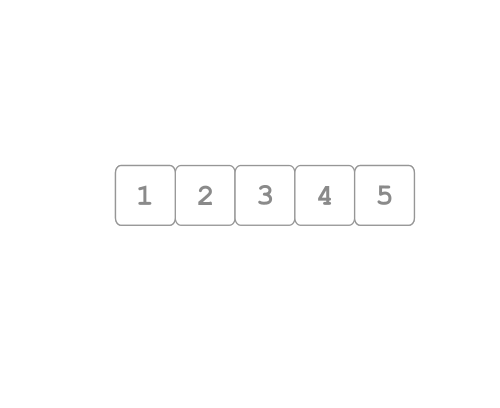

BTW, note the subtle semantic difference in meaning of the same symbol `n[i]`  when occuring on the lhs and rhs.
`n[i]=x` means that we put `x` at the place referred by`n[i]`, while `x=n[i]` the symbol `n[i]` refers to the contence of `n[i]`. So
* `lhs n[i]` means place;
* `rhs n[i]` means contence;


Here's another algorithm that's based on idea of adding one element at a time to the already reversed array. So if the power goes down after you have processed the `i-th` element the subarray `n[:i+1]` is perfectly reversed and the rest of the elements are intact and ready to be examined.

In [ ]:
#@title Exchnage two elements = swap two elements
%%html

<svg width="90.7mm" height="111mm" version="1.1" viewBox="0 0 110.62 134.88" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns11="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-18.767 -12.193)">
  <path d="m58.232 77.688c-1.2866 3.4522-1.8717 10.112-1.7372 13.564" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m56.562 96.931c2.3945 18.977 10.755 35.737 16.116 49.236 0.0562 0.14148 2.5899 0.39092 2.5899 0.39092s2.147 0.21197 2.8097-0.22595c1.5567-1.0286-4.0061-1.6454-5.3997-0.16497" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m59.368 109.09-2.0045 22.117 3.3743 14.7c-0.16304-1.512-3.2537-1.8471-5.8175-0.43901 1.5118 1.7634 4.069 1.1558 5.7841 0.47242" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m58.019 80.036 15.119 6.4256 17.859-0.66146c2.44 1.0112 2.608 1.7261 2.1734 2.3624-1.5215-0.21246-3.034-0.29961-4.6775-2.2206" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m58.019 80.036-16.09 3.1972c-4.865-1.7065-8.5447-5.5468-12.094-9.6217 0.52704-2.5212-2.9846-3.6018-4.5436-2.5391 0.27911 2.0732 2.5718 3.1538 4.3431 2.3386" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <ellipse cx="60.119" cy="67.301" rx="10.38" ry="10.367" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.98485;stroke-width:.7;stroke:#000000"/>
  <path d="m51.358 67.752c6.6458 2.4564 11.649 1.6273 15.78-0.94493" style="fill:none;stroke-width:.665;stroke:#000000"/>
  <ellipse transform="matrix(.87496 .4842 -.43552 .90018 0 0)" cx="77.465" cy="26.774" rx=".25444" ry=".9478" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.93561;stroke-width:1.4642;stroke:#000000"/>
  <ellipse transform="matrix(.92233 .38641 -.3864 .92233 0 0)" cx="79.974" cy="33.344" rx=".27644" ry=".96435" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.93561;stroke-width:1.5395;stroke:#000000"/>
  <path d="m56.531 59.13c-0.70045 0.0728-1.3622 0.33888-1.9371 1.0394" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m63.3 60.334c-0.31308-0.6308-0.79373-1.1578-1.6511-1.4515" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m27.9 78.841c6.4349 8.7802 29.538 26.532 56.346 9.2492" style="fill:none;stroke-opacity:.49621;stroke-width:.24234;stroke:#000000"/>
  <ellipse cx="39.962" cy="19.045" rx="3.7138" ry="3.8051" style="fill:#00b5f7;opacity:.999"/>
  <path d="m56.328 55.538c0.56008 0.47408 1.0642 0.9588 0.90204 1.5702" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m59.335 53.433c0.64698 1.0666 0.81114 2.096 0.30068 3.0736" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m62.442 56.841c0.57419-0.93901 1.0274-2.1664 0.63477-3.8086" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m99.124 69.521c6.2399-18.905 1.0792-32.231-7.1901-42.433-8.8615-10.932-23.451-15.589-38.21-13.616" style="fill:none;stroke-opacity:.49621;stroke-width:.165;stroke:#000000"/>
  <text x="6.2366071" y="17.197916" style="font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="6.2366071" y="17.197916" style="stroke-width:.26458"/></text>
  <g transform="matrix(.60737 0 0 .60737 16.282 12.692)" ns11:alignment="middle center" ns11:inkscapeversion="1.0" ns11:jacobian_sqrt="1.0" ns11:pdfconverter="inkscape" ns11:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns11:scale="2.834645669291339" ns11:texconverter="pdflatex" ns11:text="$$n[i]$$\n$$n[-i-1]$$" ns11:version="1.1.0">
   <g transform="translate(-285.99 -139.24)">
    <g transform="matrix(1.2052 0 0 1.2052 -61.91 -27.012)" style="fill:#000000">
     <g transform="translate(298.15,146.72)" style="fill:#000000">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill:#000000"/>
     </g>
    </g>
    <g transform="matrix(1.2052 0 0 1.2052 -61.91 -27.012)" style="fill:#000000">
     <g transform="translate(304.13,146.72)" style="fill:#000000">
      <path id="id-9e2b4275-5335-4dc5-81ff-4fe397cb937e" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill:#000000"/>
     </g>
    </g>
    <g transform="matrix(1.2052 0 0 1.2052 -61.91 -27.012)" style="fill:#000000">
     <g transform="translate(306.9,146.72)" style="fill:#000000">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" style="fill:#000000"/>
     </g>
    </g>
    <g transform="matrix(1.2052 0 0 1.2052 -61.91 -27.012)" style="fill:#000000">
     <g transform="translate(310.33,146.72)" style="fill:#000000">
      <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill:#000000"/>
     </g>
    </g>
    <g id="id-a1c2131a-e0bf-4b40-9242-459a5a2130cf" transform="matrix(1.3202 0 0 1.3202 49.75 33.648)" style="fill:#000000">
     <g transform="translate(285.7 164.65)" style="fill:#000000">
      <path id="id-73425726-9c50-4936-895a-528091fa74cf" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z" style="fill:#000000"/>
     </g>
    </g>
    <g id="id-30e507e7-a8e5-4cc5-9985-c3302709b93f" transform="matrix(1.3202 0 0 1.3202 49.75 33.648)" style="fill:#000000">
     <g transform="translate(291.68 164.65)" style="fill:#000000">
      <path id="id-d514dd47-0ed5-4467-b64d-8467f814e64d" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill:#000000"/>
     </g>
    </g>
    <g id="id-4ed62855-14c3-4381-9a14-a624ff57f7cd" transform="matrix(1.3202 0 0 1.3202 48.599 33.648)" style="fill:#000000">
     <g transform="translate(294.44 164.65)" style="fill:#000000">
      <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z" style="fill:#000000"/>
     </g>
    </g>
    <g transform="matrix(1.3202 0 0 1.3202 49.75 33.648)" style="fill:#000000">
     <g transform="translate(302.19 164.65)" style="fill:#000000">
      <path id="id-e058d4d7-8b0d-4b17-900c-4c260f7b22de" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z" style="fill:#000000"/>
     </g>
    </g>
    <g id="id-387febbd-b076-4b74-b2c1-81f411fcffbf" transform="matrix(1.3202 0 0 1.3202 47.449 33.648)" style="fill:#000000">
     <g transform="translate(307.84 164.65)" style="fill:#000000">
      <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z" style="fill:#000000"/>
     </g>
    </g>
    <g id="id-d8ccdee6-2191-40b2-9f2a-05f12230147e" transform="matrix(1.3202 0 0 1.3202 43.999 33.648)" style="fill:#000000">
     <g transform="translate(317.8 164.65)" style="fill:#000000">
      <path id="id-730e7ec4-9b0b-41a3-8476-834812af29bf" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill:#000000"/>
     </g>
     <g transform="translate(322.78 164.65)" style="fill:#000000">
      <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill:#000000"/>
     </g>
    </g>
   </g>
  </g>
  <ellipse cx="94.137" cy="77.407" rx="3.7138" ry="3.8051" style="fill-opacity:.37879;fill:#00b0f8;opacity:.999"/>
  <path d="m32.849 23.822c-9.3683 9.1576-16.829 23.732-11.312 42.129" style="fill:none;stroke-opacity:.49621;stroke-width:.165;stroke:#000000"/>
 </g>
</svg>



### Array reverse: Reshuffle algorithm

In [ ]:
# recursion
def reverse_array_3(n, i=0):
  if i<len(n):
    n[:] = [n[i]] + n[:i] + n[i+1:]
    reverse_array_3(n, i+1)

# iteration
def reverse_array_4(n):
  for i in range(len(n)):
    n[:] = [n[i]] + n[:i] + n[i+1:]

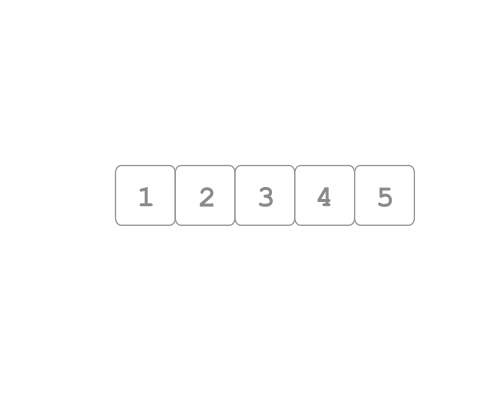

Time complexity: $\Theta (N^2)$ as at each iteration you have to insert an element at the start of an array that demands $O (N)$ operations to repostion the preceeding elements.
This algorithm is slower than the previous algorithms but its analog could be implemented for linked list.

In [ ]:
#@title "Massive" exchange worth of O(N)
%%html

<svg width="93mm" height="112mm" version="1.1" viewBox="0 0 113.51 136.84" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns11="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker3144" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker3008" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker2878" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker2754" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.84091;fill-rule:evenodd;fill:#000000;stroke-opacity:.84091;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-4.3236 -10.229)">
  <path d="m58.232 77.688c-1.2866 3.4522-1.8717 10.112-1.7372 13.564" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m56.562 96.931c2.3945 18.977 10.755 35.737 16.116 49.236 0.0562 0.14148 2.5899 0.39092 2.5899 0.39092s2.147 0.21197 2.8097-0.22595c1.5567-1.0286-4.0061-1.6454-5.3997-0.16497" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m59.368 109.09-2.0045 22.117 3.3743 14.7c-0.16304-1.512-3.2537-1.8471-5.8175-0.43901 1.5118 1.7634 4.069 1.1558 5.7841 0.47242" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m58.019 80.036 15.119 6.4256 17.859-0.66146c2.44 1.0112 2.608 1.7261 2.1734 2.3624-1.5215-0.21246-3.034-0.29961-4.6775-2.2206" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m58.019 80.036-16.09 3.1972c-4.865-1.7065-8.5447-5.5468-12.094-9.6217 0.52704-2.5212-2.9846-3.6018-4.5436-2.5391 0.27911 2.0732 2.5718 3.1538 4.3431 2.3386" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <ellipse cx="60.119" cy="67.301" rx="10.38" ry="10.367" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.98485;stroke-width:.7;stroke:#000000"/>
  <path d="m51.358 67.752c6.6458 2.4564 11.649 1.6273 15.78-0.94493" style="fill:none;stroke-width:.665;stroke:#000000"/>
  <ellipse transform="matrix(.87496 .4842 -.43552 .90018 0 0)" cx="77.465" cy="26.774" rx=".25444" ry=".9478" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.93561;stroke-width:1.4642;stroke:#000000"/>
  <ellipse transform="matrix(.92233 .38641 -.3864 .92233 0 0)" cx="79.974" cy="33.344" rx=".27644" ry=".96435" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.93561;stroke-width:1.5395;stroke:#000000"/>
  <path d="m56.531 59.13c-0.70045 0.0728-1.3622 0.33888-1.9371 1.0394" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m63.3 60.334c-0.31308-0.6308-0.79373-1.1578-1.6511-1.4515" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m29.568 79.291c16.09 21.619 40.374 19.284 55.191 9.4881" style="fill:none;marker-end:url(#marker3144);stroke-width:.29104;stroke:#000000"/>
  <ellipse cx="22.824" cy="64.681" rx="3.7138" ry="3.8051" style="fill:#00b5f7;opacity:.999"/>
  <path d="m56.328 55.538c0.56008 0.47408 1.0642 0.9588 0.90204 1.5702" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m59.335 53.433c0.64698 1.0666 0.81114 2.096 0.30068 3.0736" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m62.442 56.841c0.57419-0.93901 1.0274-2.1664 0.63477-3.8086" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m31.543 31.26c-6.0747 7.2214-9.1452 18.29-8.3258 27.615" style="fill:none;marker-end:url(#marker3008);stroke-width:.29104;stroke:#000000"/>
  <text x="6.2366071" y="17.197916" style="font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="6.2366071" y="17.197916" style="stroke-width:.26458"/></text>
  <path d="m66.022 16.721c-9.1682-1.7237-22.069 2.7328-27.88 7.7196" style="fill:none;marker-end:url(#marker2878);stroke-width:.29104;stroke:#000000"/>
  <path d="m95.646 37.832c-2.4702-6.3086-11.598-15.606-18.244-17.666" style="fill:none;marker-end:url(#marker2754);stroke-width:.29104;stroke:#000000"/>
  <path d="m94.351 75.054c4.9924-9.0094 6.1956-18.12 4.5367-26.702" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.84091;stroke-width:.29104;stroke:#000000"/>
  <ellipse cx="91.598" cy="80.347" rx="3.7138" ry="3.8051" style="fill-opacity:.30303;fill:#00b0f8;opacity:.999"/>
  <ellipse cx="97.044" cy="42.81" rx="3.7138" ry="3.8051" style="fill-opacity:.38258;fill:#00b0f8;opacity:.999"/>
  <ellipse cx="72.52" cy="18.783" rx="3.7138" ry="3.8051" style="fill-opacity:.57576;fill:#00b0f8;opacity:.999"/>
  <ellipse cx="34.67" cy="27.761" rx="3.7138" ry="3.8051" style="fill-opacity:.71212;fill:#00b0f8;opacity:.999"/>
  <g transform="matrix(.92446 0 0 .92446 -18.503 6.4644)" ns11:alignment="middle center" ns11:inkscapeversion="1.0" ns11:jacobian_sqrt="1.0" ns11:pdfconverter="inkscape" ns11:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns11:scale="2.834645669291339" ns11:texconverter="pdflatex" ns11:text="$$n[0]$$\n$$n[1]$$\n$$n[2]$$\n$$n[i]$$" ns11:version="1.1.0">
   <defs id="id-6117eaa0-a93b-4c97-b661-c8b6f3a3d11a"></defs>
   <g transform="translate(-297.67 -139.24)">
    <g transform="translate(127.36 75.435)" style="fill:#000000">
     <g transform="translate(297.38 146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-eb3badfd-002d-4cf2-a1ef-45445aa6bdad" transform="translate(127.36 75.435)" style="fill:#000000">
     <g transform="translate(303.36 146.72)">
      <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z"/>
     </g>
     <g transform="translate(306.12 146.72)">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
     </g>
     <g transform="translate(311.1 146.72)">
      <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z"/>
     </g>
    </g>
    <g id="id-0e0c0924-9163-47e2-ac84-15c5f399e20a" transform="translate(132.47 15.332)" style="fill:#000000">
     <g transform="translate(297.38 164.65)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(132.47 15.332)" style="fill:#000000">
     <g transform="translate(303.36 164.65)">
      <path id="id-4d41f9ed-2265-44c7-b8a1-7f5243ed357b" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z"/>
     </g>
     <g transform="translate(306.12 164.65)">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(311.1 164.65)">
      <path id="id-80d7494f-13db-4743-981a-828c116b9b4b" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z"/>
     </g>
    </g>
    <g transform="translate(23.918 2.6576)" style="fill:#000000">
     <g transform="translate(298.15 200.52)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(23.918 2.6576)" style="fill:#000000">
     <g transform="translate(304.13 200.52)">
      <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z"/>
     </g>
    </g>
    <g id="id-8fbb90ee-d834-4182-8435-ca5411ae5bfa" transform="translate(23.918 2.6576)" style="fill:#000000">
     <g transform="translate(306.9 200.52)">
      <path id="id-cefa0f53-eea5-46f3-abd0-bbfe0e3ae2bd" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
    </g>
    <g transform="translate(23.918 2.6576)" style="fill:#000000">
     <g transform="translate(310.33 200.52)">
      <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z"/>
     </g>
    </g>
    <g transform="translate(321.53 147.88)" ns11:alignment="middle center" ns11:inkscapeversion="1.0" ns11:jacobian_sqrt="1.0" ns11:pdfconverter="inkscape" ns11:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns11:scale="2.834645669291339" ns11:texconverter="pdflatex" ns11:text="$$n[i-1]$$" ns11:version="1.1.0">
     <defs></defs>
     <g transform="translate(-289.87 -139.24)">
      <g id="id-b1c34dd4-4814-4384-803d-c33f91a6991c" transform="translate(5.7241)" style="fill:#000000">
       <g transform="translate(289.57 146.72)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
      </g>
      <g transform="translate(5.7241)" style="fill:#000000">
       <g transform="translate(295.55 146.72)">
        <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z"/>
       </g>
      </g>
      <g id="id-21fbe3a1-4339-4644-9eb2-8605672723be" transform="translate(5.7241)" style="fill:#000000">
       <g transform="translate(298.32 146.72)">
        <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
       </g>
      </g>
      <g transform="translate(3.4345)" style="fill:#000000">
       <g transform="translate(303.96 146.72)">
        <path id="id-76f79fa2-d858-441b-9406-c71b0b2be88f" d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
       </g>
      </g>
      <g style="fill:#000000">
       <g transform="translate(313.93 146.72)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
       </g>
       <g transform="translate(318.91 146.72)">
        <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z"/>
       </g>
      </g>
      <g transform="matrix(1.1735 0 0 1.1735 360.95 134.66)" ns11:alignment="middle center" ns11:inkscapeversion="1.0" ns11:jacobian_sqrt="1.0" ns11:pdfconverter="inkscape" ns11:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns11:scale="2.834645669291339" ns11:texconverter="pdflatex" ns11:text="$\\cdots$" ns11:version="1.1.0">
       <defs></defs>
       <g id="id-6672368d-f293-4416-861b-b3329dff025a" transform="translate(-149.57 -131.75)">
        <g id="id-38182563-1866-4605-a69f-94b4f352c2cd" style="fill:#000000">
         <g transform="translate(148.71 134.76)">
          <path d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(153.14 134.76)">
          <path d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
         </g>
        </g>
        <g id="id-d25899c3-775b-4386-b555-497febf47e7a" style="fill:#000000">
         <g transform="translate(157.56 134.76)">
          <path d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
         </g>
        </g>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


### Linked list reverse: Reshuffle algorithm

This algo uses reshuffle technique for linked list. Moreover its time complexity is now $\Theta (N)$ instead of $\Theta(N^2)$!

In [4]:
def reverse_linklist_1(head):
  curr = head
  append_slide({"head": head, "curr:": curr})
  while curr.next != None:
    curr.next.next, curr.next, head = head, curr.next.next, curr.next
    append_slide({"head": head, "curr:": curr})

reverse_linklist_1(make_linklist([1,2,3,4,5,6,7]))
publish_slides()

Here's the visualisation of the above algo where the arrows don't move and the nodes get reshuffled:

In [ ]:
#@title ###Pick element and put at the front
%%html

<div id="slide_2" style="max-width:750px; height:200px;">
<svg width="411.95mm" height="106.98mm" version="1.1" viewBox="0 0 589.37 153.81" xmlns="http://www.w3.org/2000/svg">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-44" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-86" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <g transform="translate(214.35 4.3008)">
  <rect x="77.238" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="27.655" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.09;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="177.4" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="227.49" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="277.57" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="29.887844" y="49.299221" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="29.887844" y="49.299221" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m101.5 76.106h74.334" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.51515;stroke-width:.65602;stroke:#000000"/>
  <path d="m51.972 75.689h24.276" style="fill:none;marker-end:url(#Arrow1Mend-8);stroke-opacity:.51515;stroke-width:.65125;stroke:#000000"/>
  <path d="m201.55 75.288h24.276" style="fill:none;marker-end:url(#Arrow1Mend-4);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m251.63 75.967h24.276" style="fill:none;marker-end:url(#Arrow1Mend-44);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m302.01 75.74h24.872" style="fill:none;marker-end:url(#Arrow1Mend-86);stroke-opacity:.51515;stroke-width:.65904;stroke:#000000"/>
  <rect x="328.18" y="64.448" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="85.787575" y="79.385429" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="85.787575" y="79.385429" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="36.908508" y="80.074066" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="36.908508" y="80.074066" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="186.95103" y="79.852463" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="186.95103" y="79.852463" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="236.0724" y="79.926331" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="236.0724" y="79.926331" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="286.745" y="79.483124" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="286.745" y="79.483124" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <text x="78.078857" y="110.51067" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="78.078857" y="110.51067" style="stroke-width:.22869">CURR</tspan></text>
 </g>
</svg>
</div>


<div id="slide_5" style="max-width:750px; height:200px;">
<svg width="411.95mm" height="106.98mm" version="1.1" viewBox="0 0 589.37 153.81" xmlns="http://www.w3.org/2000/svg">
 <defs>
  <marker id="Arrow1Mend2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-82" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-42" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-442" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-862" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <g transform="translate(214.35 4.3008)">
  <rect x="77.238" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="27.655" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.09;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="-22.694" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.09;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="-73.031" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.087121;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="-124.14" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.09;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="-121.5125" y="49.299221" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="-121.5125" y="49.299221" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m101.5 76.106h225.29" style="fill:none;marker-end:url(#Arrow1Mend2);stroke-opacity:.51515;stroke-width:.65125;stroke:#000000"/>
  <path d="m51.972 75.689h24.276" style="fill:none;marker-end:url(#Arrow1Mend-82);stroke-opacity:.51515;stroke-width:.65125;stroke:#000000"/>
  <path d="m1.4548 75.288h24.276" style="fill:none;marker-end:url(#Arrow1Mend-42);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m-48.892 75.967h24.276" style="fill:none;marker-end:url(#Arrow1Mend-442);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m-99.693 75.74h24.872" style="fill:none;marker-end:url(#Arrow1Mend-862);stroke-opacity:.51515;stroke-width:.65904;stroke:#000000"/>
  <rect x="328.18" y="64.448" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="85.787575" y="79.385429" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="85.787575" y="79.385429" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="36.908508" y="80.074066" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="36.908508" y="80.074066" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="-13.140625" y="79.852463" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="-13.140625" y="79.852463" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="-64.445526" y="79.926331" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="-64.445526" y="79.926331" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="-114.95977" y="79.483124" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="-114.95977" y="79.483124" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <text x="78.078857" y="110.51067" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="78.078857" y="110.51067" style="stroke-width:.22869">CURR</tspan></text>
 </g>
</svg>
</div>


<div id="slide_1" style="max-width:750px; height:200px;">
<svg width="411.95mm" height="106.98mm" version="1.1" viewBox="0 0 589.37 153.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-81" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-41" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-441" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-861" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(214.35 4.3008)">
  <rect x="77.238" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="127.32" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="177.4" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="227.49" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="277.57" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="78.579422" y="49.299221" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="78.579422" y="49.299221" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m101.5 76.106h24.276" style="fill:none;marker-end:url(#Arrow1Mend1);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m151.64 75.689h24.276" style="fill:none;marker-end:url(#Arrow1Mend-81);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m201.55 75.288h24.276" style="fill:none;marker-end:url(#Arrow1Mend-41);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m251.63 75.967h24.276" style="fill:none;marker-end:url(#Arrow1Mend-441);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m302.01 75.74h24.872" style="fill:none;marker-end:url(#Arrow1Mend-861);stroke-opacity:.51515;stroke-width:.65904;stroke:#000000"/>
  <rect x="328.18" y="64.448" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="85.787575" y="79.385429" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="85.787575" y="79.385429" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="136.57391" y="80.074066" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="136.57391" y="80.074066" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="186.95103" y="79.852463" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="186.95103" y="79.852463" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="236.0724" y="79.926331" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="236.0724" y="79.926331" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="286.745" y="79.483124" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="286.745" y="79.483124" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <text x="78.078857" y="110.51067" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="78.078857" y="110.51067" style="stroke-width:.22869">CURR</tspan></text>
 </g>
</svg>
</div>


<div id="slide_3" style="max-width:750px; height:200px;">
<svg width="411.95mm" height="106.98mm" version="1.1" viewBox="0 0 589.37 153.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-83" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-43" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-443" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-863" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(214.35 4.3008)">
  <rect x="77.238" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="27.655" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.09;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="-22.694" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.09;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="227.49" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="277.57" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="-21.086218" y="49.299221" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="-21.086218" y="49.299221" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m101.5 76.106h123.81" style="fill:none;marker-end:url(#Arrow1Mend3);stroke-opacity:.51515;stroke-width:.65125;stroke:#000000"/>
  <path d="m51.972 75.689h24.276" style="fill:none;marker-end:url(#Arrow1Mend-83);stroke-opacity:.51515;stroke-width:.65125;stroke:#000000"/>
  <path d="m1.4548 75.288h24.276" style="fill:none;marker-end:url(#Arrow1Mend-43);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m251.63 75.967h24.276" style="fill:none;marker-end:url(#Arrow1Mend-443);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m302.01 75.74h24.872" style="fill:none;marker-end:url(#Arrow1Mend-863);stroke-opacity:.51515;stroke-width:.65904;stroke:#000000"/>
  <rect x="328.18" y="64.448" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="85.787575" y="79.385429" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="85.787575" y="79.385429" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="36.908508" y="80.074066" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="36.908508" y="80.074066" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="-13.140625" y="79.852463" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="-13.140625" y="79.852463" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="236.0724" y="79.926331" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="236.0724" y="79.926331" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="286.745" y="79.483124" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="286.745" y="79.483124" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <text x="78.078857" y="110.51067" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="78.078857" y="110.51067" style="stroke-width:.22869">CURR</tspan></text>
 </g>
</svg>

</div>

<div id="slide_4" style="max-width:750px; height:200px;">
<svg width="411.95mm" height="106.98mm" version="1.1" viewBox="0 0 589.37 153.81" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend4a" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-84a" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-44a" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-444a" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-864a" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(214.35 4.3008)">
  <rect x="77.238" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="27.655" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.09;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="-22.694" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.09;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="-73.031" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.087121;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="277.57" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="-70.538643" y="49.299221" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="-70.538643" y="49.299221" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m101.5 76.106h174.27" style="fill:none;marker-end:url(#Arrow1Mend4a);stroke-opacity:.51515;stroke-width:.65125;stroke:#000000"/>
  <path d="m51.972 75.689h24.276" style="fill:none;marker-end:url(#Arrow1Mend-84a);stroke-opacity:.51515;stroke-width:.65125;stroke:#000000"/>
  <path d="m1.4548 75.288h24.276" style="fill:none;marker-end:url(#Arrow1Mend-44a);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m-48.892 75.967h24.276" style="fill:none;marker-end:url(#Arrow1Mend-444a);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m302.01 75.74h24.872" style="fill:none;marker-end:url(#Arrow1Mend-864a);stroke-opacity:.51515;stroke-width:.65904;stroke:#000000"/>
  <rect x="328.18" y="64.448" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="85.787575" y="79.385429" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="85.787575" y="79.385429" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="36.908508" y="80.074066" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="36.908508" y="80.074066" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="-13.140625" y="79.852463" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="-13.140625" y="79.852463" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="-64.445526" y="79.926331" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="-64.445526" y="79.926331" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="286.745" y="79.483124" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="286.745" y="79.483124" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <text x="78.078857" y="110.51067" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="78.078857" y="110.51067" style="stroke-width:.22869">CURR</tspan></text>
 </g>
</svg>

</div>


<div style="position:absolute; top:100px; left:1000px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3", "slide_4", "slide_5"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

Here's another way to visualize the same algorithm where the nodes don't move and the arrows do:



In [ ]:
#@title ###Alternate viewpoint
%%html

<div id="slide_1" style="max-width:750px; height:200px;">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="228.46mm" height="106.7mm" version="1.1" viewBox="0 0 326.85 153.4" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-81" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-41" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-441" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-861" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-51.365 4.1475)">
  <rect x="77.238" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="127.32" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="177.4" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="227.49" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="277.57" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="78.579422" y="49.299221" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="78.579422" y="49.299221" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m101.5 76.106h24.276" style="fill:none;marker-end:url(#Arrow1Mend1);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m151.64 75.689h24.276" style="fill:none;marker-end:url(#Arrow1Mend-81);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m201.55 75.288h24.276" style="fill:none;marker-end:url(#Arrow1Mend-41);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m251.63 75.967h24.276" style="fill:none;marker-end:url(#Arrow1Mend-441);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m302.01 75.74h24.872" style="fill:none;marker-end:url(#Arrow1Mend-861);stroke-opacity:.51515;stroke-width:.65904;stroke:#000000"/>
  <rect x="328.18" y="64.448" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="85.787575" y="79.385429" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="85.787575" y="79.385429" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="136.57391" y="80.074066" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="136.57391" y="80.074066" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="186.95103" y="79.852463" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="186.95103" y="79.852463" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="236.0724" y="79.926331" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="236.0724" y="79.926331" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="286.745" y="79.483124" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="286.745" y="79.483124" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <text x="78.078857" y="110.51067" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="78.078857" y="110.51067" style="stroke-width:.22869">CURR</tspan></text>
 </g>
</svg>
</div>


<div id="slide_2" style="max-width:750px; height:200px;">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="228.46mm" height="106.7mm" version="1.1" viewBox="0 0 326.85 153.4" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend12" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-812" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-412" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-4412" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-8612" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-51.365 4.1475)">
  <rect x="77.238" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="127.32" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="177.4" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="227.49" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="277.57" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="128.79248" y="44.734379" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="128.79248" y="44.734379" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m127.06 76.106h-24.276" style="fill:none;marker-end:url(#Arrow1Mend12);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m89.18 64.345 0.34848-11.625 73.672 0.14676-0.13346 22.822h12.849" style="fill:none;marker-end:url(#Arrow1Mend-812);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m201.55 75.288h24.276" style="fill:none;marker-end:url(#Arrow1Mend-412);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m251.63 75.967h24.276" style="fill:none;marker-end:url(#Arrow1Mend-4412);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m302.01 75.74h24.872" style="fill:none;marker-end:url(#Arrow1Mend-8612);stroke-opacity:.51515;stroke-width:.65904;stroke:#000000"/>
  <rect x="328.18" y="64.448" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="85.787575" y="79.385429" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="85.787575" y="79.385429" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <rect x="127.32" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="136.57391" y="80.074066" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="136.57391" y="80.074066" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="186.95103" y="79.852463" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="186.95103" y="79.852463" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="236.0724" y="79.926331" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="236.0724" y="79.926331" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="286.745" y="79.483124" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="286.745" y="79.483124" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <text x="76.557243" y="110.51067" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="76.557243" y="110.51067" style="stroke-width:.22869">CURR</tspan></text>
 </g>
</svg>
</div>


<div id="slide_3" style="max-width:750px; height:200px;">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="228.46mm" height="106.7mm" version="1.1" viewBox="0 0 326.85 153.4" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend13" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-813" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-413" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-4413" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-8613" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-51.365 4.1475)">
  <rect x="77.238" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="127.32" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="177.4" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="227.49" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="277.57" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="178.24469" y="44.734379" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="178.24469" y="44.734379" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m127.06 76.106h-24.276" style="fill:none;marker-end:url(#Arrow1Mend13);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m89.18 64.345 0.34848-11.625 123.93 0.01329 0.0737 23.162 12.321 0.05466" style="fill:none;marker-end:url(#Arrow1Mend-813);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m176.9 75.288h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-413);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m251.63 75.967h24.276" style="fill:none;marker-end:url(#Arrow1Mend-4413);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m302.01 75.74h24.872" style="fill:none;marker-end:url(#Arrow1Mend-8613);stroke-opacity:.51515;stroke-width:.65904;stroke:#000000"/>
  <rect x="328.18" y="64.448" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="85.787575" y="79.385429" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="85.787575" y="79.385429" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <rect x="127.32" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="136.57391" y="80.074066" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="136.57391" y="80.074066" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <rect x="177.4" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="186.95103" y="79.852463" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="186.95103" y="79.852463" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="236.0724" y="79.926331" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="236.0724" y="79.926331" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="286.745" y="79.483124" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="286.745" y="79.483124" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <text x="75.79644" y="110.51067" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="75.79644" y="110.51067" style="stroke-width:.22869">CURR</tspan></text>
  <path d="m201.52 160.78h13.713" style="fill:none;stroke-width:.3804px;stroke:#000000"/>
 </g>
</svg>
</div>


<div id="slide_4" style="max-width:750px; height:200px;">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="228.46mm" height="106.7mm" version="1.1" viewBox="0 0 326.85 153.4" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend14" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-814" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-414" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-4414" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-8614" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-51.365 4.1475)">
  <rect x="77.238" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="127.32" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="177.4" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="227.49" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="277.57" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="229.21851" y="44.734379" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="229.21851" y="44.734379" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m127.06 76.106h-24.276" style="fill:none;marker-end:url(#Arrow1Mend14);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m89.18 64.345 0.34848-11.625 173.95 0.01329 0.0542 23.21 12.374 0.02359" style="fill:none;marker-end:url(#Arrow1Mend-814);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m176.9 75.288h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-414);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m226.98 75.967h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-4414);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m302.01 75.74h24.872" style="fill:none;marker-end:url(#Arrow1Mend-8614);stroke-opacity:.51515;stroke-width:.65904;stroke:#000000"/>
  <rect x="328.18" y="64.448" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="85.787575" y="79.385429" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="85.787575" y="79.385429" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <rect x="127.32" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="136.57391" y="80.074066" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="136.57391" y="80.074066" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <rect x="177.4" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="186.95103" y="79.852463" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="186.95103" y="79.852463" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <rect x="227.49" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="236.0724" y="79.926331" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="236.0724" y="79.926331" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="286.745" y="79.483124" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="286.745" y="79.483124" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <text x="75.79644" y="110.51067" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="75.79644" y="110.51067" style="stroke-width:.22869">CURR</tspan></text>
  <path d="m236.03 160.72h13.713" style="fill:none;stroke-width:.3804px;stroke:#000000"/>
 </g>
</svg>
</div>

<div id="slide_5" style="max-width:750px; height:200px;">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="228.46mm" height="106.7mm" version="1.1" viewBox="0 0 326.85 153.4" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend15" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-815" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-415" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-4415" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-8615" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-51.365 4.1475)">
  <rect x="77.238" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="127.32" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="177.4" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="227.49" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="277.57" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="279.43152" y="44.734379" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="279.43152" y="44.734379" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m127.06 76.106h-24.276" style="fill:none;marker-end:url(#Arrow1Mend15);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m89.18 64.345 0.34848-11.625 224.91 0.10766-0.0184 22.895 12.447 0.05494" style="fill:none;marker-end:url(#Arrow1Mend-815);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m176.9 75.288h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-415);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m226.98 75.967h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-4415);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m277.21 75.74h-24.872" style="fill:none;marker-end:url(#Arrow1Mend-8615);stroke-opacity:.51515;stroke-width:.65904;stroke:#000000"/>
  <rect x="328.18" y="64.448" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="85.787575" y="79.385429" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="85.787575" y="79.385429" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <rect x="127.32" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="136.57391" y="80.074066" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="136.57391" y="80.074066" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <rect x="177.4" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="186.95103" y="79.852463" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="186.95103" y="79.852463" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <rect x="227.49" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="236.0724" y="79.926331" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="236.0724" y="79.926331" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="286.745" y="79.483124" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="286.745" y="79.483124" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <text x="75.79644" y="110.51067" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="75.79644" y="110.51067" style="stroke-width:.22869">CURR</tspan></text>
  <rect x="277.57" y="64.259" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
 </g>
</svg>
</div>


<div style="position:absolute; top:100px; left:1000px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3", "slide_4", "slide_5"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

As you can see the three "entities" are exchanged in a circular manner. So the algorithm is eco friendly: No pointers are thrown away rather all of them are reused!

In [ ]:
#@title Circular exchange scheme
%%html

<svg width="124mm" height="105.4mm" version="1.1" viewBox="0 0 154.95 131.78" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker1938" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1820" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mstart" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-7.8938 -20.963)">
  <path d="m68.816 83.357c-1.2866 3.4522-1.8717 10.112-1.7372 13.564" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m67.145 102.6c2.3945 18.977 10.755 35.737 16.116 49.236 0.0562 0.14148 2.5899 0.39092 2.5899 0.39092s2.147 0.21197 2.8097-0.22595c1.5567-1.0286-4.0061-1.6454-5.3997-0.16497" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m69.952 114.76-2.0045 22.117 3.3743 14.7c-0.16304-1.512-3.2537-1.8471-5.8175-0.43901 1.5118 1.7634 4.069 1.1558 5.7841 0.47242" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m68.603 85.706 15.119 6.4256 17.859-0.66146c2.44 1.0112 2.608 1.7261 2.1734 2.3624-1.5215-0.21246-3.034-0.29961-4.6775-2.2206" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m68.603 85.706-16.09 3.1972c-4.865-1.7065-8.5447-5.5468-12.094-9.6217 0.52704-2.5212-2.9846-3.6018-4.5436-2.5391 0.27911 2.0732 2.5718 3.1538 4.3431 2.3386" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <ellipse cx="70.702" cy="72.97" rx="10.38" ry="10.367" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.98485;stroke-width:.7;stroke:#000000"/>
  <path d="m61.941 73.422c6.6458 2.4564 11.649 1.6273 15.78-0.94493" style="fill:none;stroke-width:.665;stroke:#000000"/>
  <ellipse transform="matrix(.87496 .4842 -.43552 .90018 0 0)" cx="89.479" cy="26.61" rx=".25444" ry=".9478" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.93561;stroke-width:1.4642;stroke:#000000"/>
  <ellipse transform="matrix(.92233 .38641 -.3864 .92233 0 0)" cx="91.926" cy="34.484" rx=".27644" ry=".96435" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.93561;stroke-width:1.5395;stroke:#000000"/>
  <path d="m67.114 64.799c-0.70045 0.0728-1.3622 0.33888-1.9371 1.0394" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m73.883 66.003c-0.31308-0.6308-0.79373-1.1578-1.6511-1.4515" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m40.151 84.961c16.09 21.62 40.563 17.866 55.191 9.4881" style="fill:none;marker-start:url(#marker1820);stroke-width:.47625;stroke:#000000"/>
  <ellipse cx="35.14" cy="63.744" rx="3.9811" ry="4.0789" style="fill-opacity:.43182;fill:#ff0000;opacity:.999"/>
  <path d="m66.912 61.207c0.56008 0.47408 1.0642 0.9588 0.90204 1.5702" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m69.918 59.103c0.64698 1.0666 0.81114 2.096 0.30068 3.0736" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m73.025 62.51c0.57419-0.93901 1.0274-2.1664 0.63477-3.8086" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m74.13 25.185c-15.544-0.88927-35.418 13.528-37.826 28.055" style="fill:none;marker-start:url(#Arrow1Mstart);stroke-width:.47625;stroke:#000000"/>
  <path d="m108.78 73.462c4.1716-16.991-3.9663-34.579-17.543-44.571" style="fill:none;marker-start:url(#marker1938);stroke-width:.47625;stroke:#000000"/>
  <text x="91.204269" y="26.094088" style="font-family:'Courier New';font-size:8.5431px;font-weight:bold;line-height:1.25;stroke-width:.21358" xml:space="preserve"><tspan x="91.204269" y="26.094088" style="stroke-width:.21358">curr.next.next</tspan></text>
  <text x="7.7853136" y="66.041862" style="font-family:'Courier New';font-size:8.5431px;font-weight:bold;line-height:1.25;stroke-width:.21358" xml:space="preserve"><tspan x="7.7853136" y="66.041862" style="stroke-width:.21358">head</tspan></text>
  <text x="113.10775" y="85.251694" style="font-family:'Courier New';font-size:8.5431px;font-weight:bold;line-height:1.25;stroke-width:.21358" xml:space="preserve"><tspan x="113.10775" y="85.251694" style="stroke-width:.21358">curr.next</tspan></text>
  <ellipse cx="105.57" cy="82.987" rx="3.9811" ry="4.0789" style="fill-opacity:.58333;fill:#00a1ff;opacity:.999"/>
  <ellipse cx="84.056" cy="25.524" rx="3.9811" ry="4.0789" style="fill-opacity:.4053;fill:#00d000;opacity:.999"/>
 </g>
</svg>



### Linked list reverse: Invert the arrows algorithm

This is a slight modification of the previous algorithm that is also $\Theta(N)$. Its idea can be expressed as "reverse the arrows". Unlike the first algo that stores the linked list connected, this one splits them into two disconnected components and grows one of them at the expense of the other until the second one disappears.

In [ ]:
def reverse_linklist_2(head):
  prev = None
  append_slide({"head": head, "prev": prev})
  while head:
    head.next, head, prev = prev, head.next, head
    append_slide({"head": head, "prev": prev})
  return prev

reverse_linklist_2(make_linklist([1,2,3,4,5]))
publish_slides()

In [ ]:
#@title ###Invert the arrows algorithm
%%html

<div id="slide_1" style="max-width:750px; height:200px;">
<svg width="268.2mm" height="105.74mm" version="1.1" viewBox="0 0 383.7 152.02" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-44" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-86" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(32.55 1.5566)">
  <rect x="47.987" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="98.069" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="148.15" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="198.24" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="248.32" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="49.328197" y="49.343502" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="49.328197" y="49.343502" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m72.249 74.629h24.276" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m122.39 74.212h24.276" style="fill:none;marker-end:url(#Arrow1Mend-8);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m172.3 73.811h24.276" style="fill:none;marker-end:url(#Arrow1Mend-4);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m222.38 74.49h24.276" style="fill:none;marker-end:url(#Arrow1Mend-44);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m273.08 73.218h24.276" style="fill:none;marker-end:url(#Arrow1Mend-86);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <rect x="298.93" y="62.971" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="56.536354" y="77.908096" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="56.536354" y="77.908096" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="107.32269" y="78.596733" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="107.32269" y="78.596733" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="157.69981" y="78.37513" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="157.69981" y="78.37513" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="206.82118" y="78.448997" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="206.82118" y="78.448997" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="257.49377" y="78.005791" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="257.49377" y="78.005791" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <rect x="-1.2491" y="61.942" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="-1.0292416" y="104.83398" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="-1.0292416" y="104.83398" style="stroke-width:.22869">PREV</tspan></text>
 </g>
</svg>

</div>

<div id="slide_2" style="max-width:750px; height:200px;">
<svg width="268.2mm" height="105.74mm" version="1.1" viewBox="0 0 383.7 152.02" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-81" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-41" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-441" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-861" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(32.55 1.5566)">
  <rect x="47.987" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="98.069" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="148.15" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="198.24" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="248.32" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="99.54129" y="49.343502" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="99.54129" y="49.343502" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m48.16 74.642h-24.276" style="fill:none;marker-end:url(#Arrow1Mend1);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m122.39 74.212h24.276" style="fill:none;marker-end:url(#Arrow1Mend-81);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m172.3 73.811h24.276" style="fill:none;marker-end:url(#Arrow1Mend-41);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m222.38 74.49h24.276" style="fill:none;marker-end:url(#Arrow1Mend-441);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m273.08 73.218h24.276" style="fill:none;marker-end:url(#Arrow1Mend-861);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <rect x="298.93" y="62.971" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="56.536354" y="77.908096" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="56.536354" y="77.908096" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="107.32269" y="78.596733" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="107.32269" y="78.596733" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="157.69981" y="78.37513" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="157.69981" y="78.37513" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="206.82118" y="78.448997" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="206.82118" y="78.448997" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="257.49377" y="78.005791" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="257.49377" y="78.005791" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <rect x="-1.2491" y="61.942" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="49.184021" y="104.83398" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="49.184021" y="104.83398" style="stroke-width:.22869">PREV</tspan></text>
 </g>
</svg>
</div>

<div id="slide_3" style="max-width:750px; height:200px;">
<svg width="268.2mm" height="105.74mm" version="1.1" viewBox="0 0 383.7 152.02" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-82" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-42" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-442" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-862" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(32.55 1.5566)">
  <rect x="47.987" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="98.069" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.090909;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="148.15" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="198.24" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="248.32" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="148.23273" y="49.343502" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="148.23273" y="49.343502" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m48.16 74.642h-24.276" style="fill:none;marker-end:url(#Arrow1Mend2);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m97.706 74.212h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-82);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m172.3 73.811h24.276" style="fill:none;marker-end:url(#Arrow1Mend-42);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m222.38 74.49h24.276" style="fill:none;marker-end:url(#Arrow1Mend-442);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m273.08 73.218h24.276" style="fill:none;marker-end:url(#Arrow1Mend-862);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <rect x="298.93" y="62.971" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="56.536354" y="77.908096" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="56.536354" y="77.908096" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="107.32269" y="78.596733" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="107.32269" y="78.596733" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="157.69981" y="78.37513" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="157.69981" y="78.37513" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="206.82118" y="78.448997" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="206.82118" y="78.448997" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="257.49377" y="78.005791" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="257.49377" y="78.005791" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <rect x="-1.2491" y="61.942" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="97.875504" y="104.83398" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="97.875504" y="104.83398" style="stroke-width:.22869">PREV</tspan></text>
 </g>
</svg>
</div>

<div id="slide_4" style="max-width:750px; height:200px;">
<svg width="268.2mm" height="105.74mm" version="1.1" viewBox="0 0 383.7 152.02" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-83" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-43" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-443" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-863" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(32.55 1.5566)">
  <rect x="47.987" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.094697;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="98.069" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.094697;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="148.15" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.094697;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="198.24" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="248.32" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="199.96735" y="49.343502" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="199.96735" y="49.343502" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m48.16 74.642h-24.276" style="fill:none;marker-end:url(#Arrow1Mend3);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m97.706 74.212h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-83);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m147.83 73.785h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-43);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m222.38 74.49h24.276" style="fill:none;marker-end:url(#Arrow1Mend-443);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m273.08 73.218h24.276" style="fill:none;marker-end:url(#Arrow1Mend-863);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <rect x="298.93" y="62.971" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="56.536354" y="77.908096" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="56.536354" y="77.908096" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="107.32269" y="78.596733" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="107.32269" y="78.596733" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="157.69981" y="78.37513" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="157.69981" y="78.37513" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="206.82118" y="78.448997" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="206.82118" y="78.448997" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="257.49377" y="78.005791" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="257.49377" y="78.005791" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <rect x="-1.2491" y="61.942" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="149.61015" y="104.83398" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="149.61015" y="104.83398" style="stroke-width:.22869">PREV</tspan></text>
 </g>
</svg>
</div>

<div id="slide_5" style="max-width:750px; height:200px;">
<svg width="268.2mm" height="105.74mm" version="1.1" viewBox="0 0 383.7 152.02" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend3a" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-83a" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-43a" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-443a" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-863a" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(32.55 1.5566)">
  <rect x="47.987" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.094697;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="98.069" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.094697;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="148.15" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.094697;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="198.24" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.087121;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="248.32" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="249.41757" y="49.343502" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="249.41757" y="49.343502" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m48.16 74.642h-24.276" style="fill:none;marker-end:url(#Arrow1Mend3a);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m97.706 74.212h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-83a);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m147.83 73.785h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-43a);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m198.49 74.49h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-443a);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m273.08 73.218h24.276" style="fill:none;marker-end:url(#Arrow1Mend-863a);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <rect x="298.93" y="62.971" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="56.536354" y="77.908096" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="56.536354" y="77.908096" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="107.32269" y="78.596733" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="107.32269" y="78.596733" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="157.69981" y="78.37513" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="157.69981" y="78.37513" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="206.82118" y="78.448997" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="206.82118" y="78.448997" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="257.49377" y="78.005791" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="257.49377" y="78.005791" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <rect x="-1.2491" y="61.942" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="199.06038" y="104.83398" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="199.06038" y="104.83398" style="stroke-width:.22869">PREV</tspan></text>
 </g>
</svg>
</div>

<div id="slide_6" style="max-width:750px; height:200px;">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="268.2mm" height="105.74mm" version="1.1" viewBox="0 0 383.7 152.02" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-85" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-45" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-445" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-865" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51515;fill-rule:evenodd;fill:#000000;stroke-opacity:.51515;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(32.55 1.5566)">
  <rect x="47.987" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.094697;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="98.069" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.094697;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="148.15" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.094697;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="198.24" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.094697;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <rect x="248.32" y="62.782" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.094697;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#969696"/>
  <text x="300.39337" y="49.343502" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="300.39337" y="49.343502" style="stroke-width:.22869">HEAD</tspan></text>
  <path d="m48.16 74.642h-24.276" style="fill:none;marker-end:url(#Arrow1Mend5);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m97.706 74.212h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-85);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m147.83 73.785h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-45);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m197.85 74.516h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-445);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <path d="m247.66 73.218h-24.276" style="fill:none;marker-end:url(#Arrow1Mend-865);stroke-opacity:.51515;stroke-width:.65109;stroke:#000000"/>
  <rect x="298.93" y="62.971" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="56.536354" y="77.908096" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="56.536354" y="77.908096" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">1</tspan></text>
  <text x="107.32269" y="78.596733" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="107.32269" y="78.596733" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">2</tspan></text>
  <text x="157.69981" y="78.37513" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="157.69981" y="78.37513" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">3</tspan></text>
  <text x="206.82118" y="78.448997" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="206.82118" y="78.448997" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">4</tspan></text>
  <text x="257.49377" y="78.005791" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="257.49377" y="78.005791" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156">5</tspan></text>
  <rect x="-1.2491" y="61.942" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.2;fill:#000000;opacity:.999"/>
  <text x="250.03618" y="104.83398" style="font-family:'Courier New';font-size:9.1474px;font-weight:bold;line-height:1.25;stroke-width:.22869" xml:space="preserve"><tspan x="250.03618" y="104.83398" style="stroke-width:.22869">PREV</tspan></text>
 </g>
</svg>

</div>


<div style="position:absolute; top:100px; left:1000px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3", "slide_4", "slide_5", "slide_6"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

As you can see there's again some pointer juggling involved:

In [ ]:
#@title Circular exchange scheme
%%html

<svg width="124mm" height="105mm" version="1.1" viewBox="0 0 154.95 131.78" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker1938" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1820" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mstart" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#000000;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-7.8938 -20.963)">
  <path d="m68.816 83.357c-1.2866 3.4522-1.8717 10.112-1.7372 13.564" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m67.145 102.6c2.3945 18.977 10.755 35.737 16.116 49.236 0.0562 0.14148 2.5899 0.39092 2.5899 0.39092s2.147 0.21197 2.8097-0.22595c1.5567-1.0286-4.0061-1.6454-5.3997-0.16497" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m69.952 114.76-2.0045 22.117 3.3743 14.7c-0.16304-1.512-3.2537-1.8471-5.8175-0.43901 1.5118 1.7634 4.069 1.1558 5.7841 0.47242" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m68.603 85.706 15.119 6.4256 17.859-0.66146c2.44 1.0112 2.608 1.7261 2.1734 2.3624-1.5215-0.21246-3.034-0.29961-4.6775-2.2206" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <path d="m68.603 85.706-16.09 3.1972c-4.865-1.7065-8.5447-5.5468-12.094-9.6217 0.52704-2.5212-2.9846-3.6018-4.5436-2.5391 0.27911 2.0732 2.5718 3.1538 4.3431 2.3386" style="fill:none;stroke-opacity:.98485;stroke-width:.89958;stroke:#000000"/>
  <ellipse cx="70.702" cy="72.97" rx="10.38" ry="10.367" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.98485;stroke-width:.7;stroke:#000000"/>
  <path d="m61.941 73.422c6.6458 2.4564 11.649 1.6273 15.78-0.94493" style="fill:none;stroke-width:.665;stroke:#000000"/>
  <ellipse transform="matrix(.87496 .4842 -.43552 .90018 0 0)" cx="89.479" cy="26.61" rx=".25444" ry=".9478" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.93561;stroke-width:1.4642;stroke:#000000"/>
  <ellipse transform="matrix(.92233 .38641 -.3864 .92233 0 0)" cx="91.926" cy="34.484" rx=".27644" ry=".96435" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.93561;stroke-width:1.5395;stroke:#000000"/>
  <path d="m67.114 64.799c-0.70045 0.0728-1.3622 0.33888-1.9371 1.0394" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m73.883 66.003c-0.31308-0.6308-0.79373-1.1578-1.6511-1.4515" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m40.151 84.961c16.09 21.62 40.563 17.866 55.191 9.4881" style="fill:none;marker-start:url(#marker1820);stroke-width:.47625;stroke:#000000"/>
  <ellipse cx="35.14" cy="63.744" rx="3.9811" ry="4.0789" style="fill-opacity:.43182;fill:#ff0000;opacity:.999"/>
  <path d="m66.912 61.207c0.56008 0.47408 1.0642 0.9588 0.90204 1.5702" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m69.918 59.103c0.64698 1.0666 0.81114 2.096 0.30068 3.0736" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m73.025 62.51c0.57419-0.93901 1.0274-2.1664 0.63477-3.8086" style="fill:none;stroke-width:.26458px;stroke:#000000"/>
  <path d="m74.13 25.185c-15.544-0.88927-35.418 13.528-37.826 28.055" style="fill:none;marker-start:url(#Arrow1Mstart);stroke-width:.47625;stroke:#000000"/>
  <path d="m108.78 73.462c4.1716-16.991-3.9663-34.579-17.543-44.571" style="fill:none;marker-start:url(#marker1938);stroke-width:.47625;stroke:#000000"/>
  <text x="91.204269" y="26.094088" style="font-family:'Courier New';font-size:8.5431px;font-weight:bold;line-height:1.25;stroke-width:.21358" xml:space="preserve"><tspan x="91.204269" y="26.094088" style="stroke-width:.21358">head.next</tspan></text>
  <text x="8.6357603" y="65.758377" style="font-family:'Courier New';font-size:8.5431px;font-weight:bold;line-height:1.25;stroke-width:.21358" xml:space="preserve"><tspan x="8.6357603" y="65.758377" style="stroke-width:.21358">prev</tspan></text>
  <text x="113.10775" y="85.251694" style="font-family:'Courier New';font-size:8.5431px;font-weight:bold;line-height:1.25;stroke-width:.21358" xml:space="preserve"><tspan x="113.10775" y="85.251694" style="stroke-width:.21358">head</tspan></text>
  <ellipse cx="105.57" cy="82.987" rx="3.9811" ry="4.0789" style="fill-opacity:.58333;fill:#00a1ff;opacity:.999"/>
  <ellipse cx="84.056" cy="25.524" rx="3.9811" ry="4.0789" style="fill-opacity:.4053;fill:#00d000;opacity:.999"/>
 </g>
</svg>




Let's explore the problem of finding a midpoint in an array and a linked list:

### Midpoint

It's easy to find a midpoint in an array:

In [ ]:
def midpoint_arr(arr):
  return arr[len(arr)//2]

This is $\Theta (1)$ time algorithm that uses random access of an array. You can't do this in linked list so you end up with $\Theta(N)$ algorithm. A clever trick that's called "Floyd's hare and tortoise algorithm" or "fast and slow pointers algorithm" can find the midpoint in only one pass.

[876. Middle of the Linked List](https://leetcode.com/problems/middle-of-the-linked-list/)


Given the head of a singly linked list, return the middle node of the linked list. If there are two middle nodes, return the second middle node.


```
Example 1:
Input: head = [1,2,3,4,5]
Output: [3,4,5]
Explanation: The middle node of the list is node 3.

Example 2:
Input: head = [1,2,3,4,5,6]
Output: [4,5,6]
Explanation: Since the list has two middle nodes with values 3 and 4, we return the second one.
```

In [5]:
def midpoint(head):
  fast, slow = head, head
  append_slide({"head": head, "fast": fast, "slow:": slow})
  while fast and fast.next:
    slow = slow.next
    fast = fast.next.next
    append_slide({"head": head, "fast": fast, "slow:": slow})
  return slow.value

midpoint(make_linklist([1,2,3,4,5,6,7]))
publish_slides()

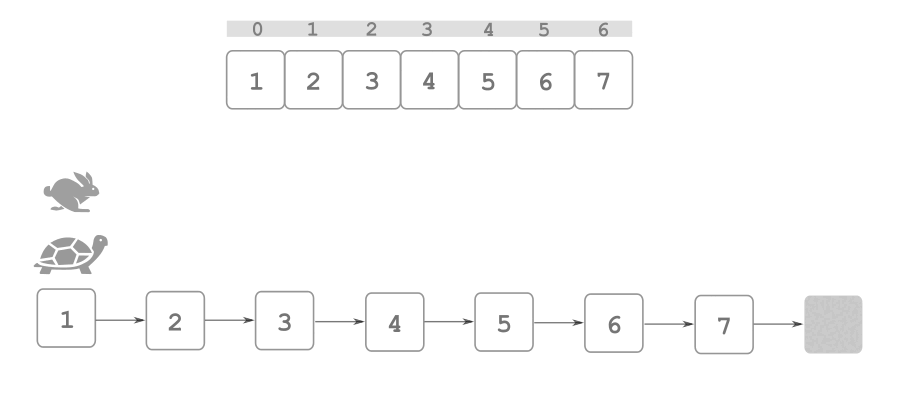

# Stack, queue, deque


 A **stack** is an abstract data type that serves as a collection of elements, with two main operations:

* `push`, which adds an element to the collection, and
* `pop`, which removes the most recently added element that was not yet removed.
Additionally, a peek operation can, without modifying the stack, return the value of the last element added. Calling this structure a stack is by analogy to a set of physical items stacked one atop another, such as a stack of plates.

The order in which an element added to or removed from a stack is described as last in, first out, referred to by the acronym **LIFO**.

Stacks entered the computer science literature in 1946, when Alan M. Turing used the terms "bury" and "unbury" as a means of calling and returning from subroutines.



**Queue** is first in, first out (the first in is the first out), acronymized as **FIFO**, is a method for organizing the manipulation of a data structure (often, specifically a data buffer) where the oldest (first) entry, or "head" of the queue, is processed first. SO it has two operation:
* `push`, which adds an element to the collection, and
* `pop`, which removes the least recently added element that was not yet removed.


Double-ended queue (abbreviated to **deque**) is an abstract data type that generalizes a queue, for which elements can be added to or removed from either the front (head) or back (tail):
* `Push_back`
* `Pop_back`
* `Push_front`
* `Pop_froont`

In [ ]:
#@title ###Stack/Queue/Deque
%%html

<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Stack
</font><br>
<svg width="129mm" height="147mm" version="1.1" viewBox="0 0 264.64 299.03" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend-5-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.61742;fill-rule:evenodd;fill:#00a700;stroke-opacity:.61742;stroke-width:1pt;stroke:#00a700"/>
  </marker>
  <marker id="Arrow1Mend-5-0-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.51894;fill-rule:evenodd;fill:#ff0000;stroke-opacity:.51894;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-21.78 42.734)">
  <path d="m122.7 26.847v164.72h62.391v-164.72l4.5033 1e-6v169.22h-71.397v-169.22z" style="fill-opacity:.098485;fill:#000000"/>
  <rect x="125.94" y="166.12" width="55.751" height="22.112" style="fill-opacity:.20454;fill:#000000;opacity:.999"/>
  <rect x="125.94" y="140.83" width="55.751" height="22.112" style="fill-opacity:.20454;fill:#000000;opacity:.999"/>
  <rect x="125.94" y="115.02" width="55.751" height="22.112" style="fill-opacity:.20454;fill:#000000;opacity:.999"/>
  <rect x="125.94" y="89.732" width="55.751" height="22.112" style="fill-opacity:.20454;fill:#000000;opacity:.999"/>
  <rect x="125.94" y="64.445" width="55.751" height="22.112" style="fill-opacity:.20454;fill:#000000;opacity:.999"/>
  <rect x="125.94" y="39.158" width="55.751" height="22.112" style="fill-opacity:.20454;fill:#000000;opacity:.999"/>
  <path d="m204.53 3.6311c-24.504 3.1173-32.803 25.911-35.68 37.551" style="fill:none;marker-end:url(#Arrow1Mend-5-0);stroke-opacity:.61742;stroke-width:1.565;stroke:#00a700"/>
  <path d="m141.22 42.619c-0.70147-17.5-9.6761-32.335-29.941-38.757" style="fill:none;marker-end:url(#Arrow1Mend-5-0-6);stroke-opacity:.51894;stroke-width:1.565;stroke:#ff0000"/>
  <text x="180.22218" y="-0.28789338" style="fill-opacity:.69318;fill:#00a700;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="180.22218" y="-0.28789338" style="fill-opacity:.69318;fill:#00a700;stroke-width:.26458">PUSH</tspan></text>
  <text x="108.67804" y="-0.38388991" style="fill-opacity:.72348;fill:#ff0000;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="108.67804" y="-0.38388991" style="fill-opacity:.72348;fill:#ff0000;stroke-width:.26458">POP</tspan></text>
 </g>
</svg>
</div>

<div id="slide_3" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Queue
</font><br>
<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   sodipodi:docname="stack2.svg"
   inkscape:version="1.0 (4035a4fb49, 2020-05-01)"
   width="129mm"
   height="147mm"
   viewBox="0 0 264.64441 299.03225"
   version="1.1"
   id="svg2752">
  <defs
     id="defs2746">
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend1"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend1">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend1"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-51"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-0"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend1"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-81"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-4"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend-5-01"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend1">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#00a700;fill-opacity:0.617424;fill-rule:evenodd;stroke:#00a700;stroke-width:1pt;stroke-opacity:0.617424"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401-0-4" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend1"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-41"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-2"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend-5-91"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend1">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401-0-3" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend1"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-441"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-01"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend-5-51"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend1">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401-0-5" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend1"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-861"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-1"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend-5-991"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend1">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401-0-6" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend1"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-5-0-61"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-0-4-4"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#ff0000;fill-opacity:0.518939;fill-rule:evenodd;stroke:#ff0000;stroke-width:1pt;stroke-opacity:0.518939"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend-5-0-6-71"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend1">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#ff0000;fill-opacity:0.518939;fill-rule:evenodd;stroke:#ff0000;stroke-width:1pt;stroke-opacity:0.518939"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401-0-4-4-0" />
    </marker>
  </defs>
  <sodipodi:namedview
     inkscape:window-maximized="0"
     inkscape:window-y="42"
     inkscape:window-x="2020"
     inkscape:window-height="1040"
     inkscape:window-width="1794"
     fit-margin-bottom="0"
     fit-margin-right="0"
     fit-margin-left="0"
     fit-margin-top="0"
     showgrid="false"
     inkscape:document-rotation="0"
     inkscape:current-layer="layer1"
     inkscape:document-units="mm"
     inkscape:cy="540.59124"
     inkscape:cx="747.81034"
     inkscape:zoom="0.49497475"
     inkscape:pageshadow="2"
     inkscape:pageopacity="0.0"
     borderopacity="1.0"
     bordercolor="#666666"
     pagecolor="#ffffff"
     id="base" />
  <metadata
     id="metadata2749">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     transform="translate(-21.780335,42.733856)"
     id="layer1"
     inkscape:groupmode="layer"
     inkscape:label="Шар 1">
    <path
       sodipodi:nodetypes="ccccccccc"
       id="path6420"
       d="M 122.69809,26.847013 V 191.56485 h 62.39078 V 26.847013 l 4.50329,1e-6 V 196.06815 H 118.1948 V 26.847014 Z"
       style="fill:#000000;fill-opacity:0.0984848;stroke:none;stroke-width:0.324533px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1" />
    <rect
       y="166.12053"
       x="125.94331"
       height="22.111607"
       width="55.751484"
       id="rect6471"
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1" />
    <rect
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1"
       id="rect6471-4"
       width="55.751488"
       height="22.111607"
       x="125.94331"
       y="140.83397" />
    <rect
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1"
       id="rect6471-1"
       width="55.751488"
       height="22.111607"
       x="125.94331"
       y="115.0182" />
    <rect
       y="89.731621"
       x="125.94331"
       height="22.111607"
       width="55.751488"
       id="rect6471-4-6"
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1" />
    <rect
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1"
       id="rect6471-8"
       width="55.751488"
       height="22.111607"
       x="125.9433"
       y="64.445015" />
    <rect
       y="39.158451"
       x="125.9433"
       height="22.111607"
       width="55.751488"
       id="rect6471-4-5"
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1" />
    <path
       sodipodi:nodetypes="cc"
       id="path6530"
       d="M 204.52894,3.6310667 C 180.02538,6.7484086 171.72563,29.541627 168.84846,41.182436"
       style="fill:none;fill-opacity:1;stroke:#00a700;stroke-width:1.565;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.617424;marker-end:url(#Arrow1Mend-5-01)" />
    <text
       id="text8493"
       y="-0.28789338"
       x="180.22218"
       style="font-weight:bold;font-size:10.5833px;line-height:1.25;font-family:'Courier New';-inkscape-font-specification:'Courier New Bold';fill:#00a700;fill-opacity:0.693182;stroke:none;stroke-width:0.264583;stroke-opacity:1"
       xml:space="preserve"><tspan
         style="fill:#00a700;fill-opacity:0.693182;stroke:none;stroke-width:0.264583;stroke-opacity:1"
         y="-0.28789338"
         x="180.22218"
         id="tspan8491"
         sodipodi:role="line">PUSH</tspan></text>
    <rect
       y="191.56483"
       x="122.69809"
       height="14.128321"
       width="62.116657"
       id="rect9235"
       style="opacity:0.999;fill:#fffffe;fill-opacity:1;stroke:none;stroke-width:1.565;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.518939" />
    <path
       sodipodi:nodetypes="cc"
       id="path6530-6-9"
       d="m 136.45212,185.25385 c -0.70147,17.50031 -9.67608,32.33467 -29.94054,38.75747"
       style="fill:none;fill-opacity:0.693182;stroke:#ff0000;stroke-width:1.565;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.518939;marker-end:url(#Arrow1Mend-5-0-6-71)" />
    <text
       id="text8493-9-3"
       y="237.48944"
       x="100.11084"
       style="font-weight:bold;font-size:10.5833px;line-height:1.25;font-family:'Courier New';-inkscape-font-specification:'Courier New Bold';fill:#ff0000;fill-opacity:0.723485;stroke-width:0.264583"
       xml:space="preserve"><tspan
         style="fill:#ff0000;fill-opacity:0.723485;stroke-width:0.264583"
         y="237.48944"
         x="100.11084"
         id="tspan8491-7-7"
         sodipodi:role="line">POP</tspan></text>
  </g>
</svg>


</div>

<div id="slide_5" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Deque
</font><br>
<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   sodipodi:docname="stack3.svg"
   inkscape:version="1.0 (4035a4fb49, 2020-05-01)"
   width="129mm"
   height="147mm"
   viewBox="0 0 264.64441 299.03225"
   version="1.1"
   id="svg2752">
  <defs
     id="defs2746">
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend2"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend2">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend2"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-52"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-0"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend2"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-82"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-4"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend-5-02"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend2">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#00a700;fill-opacity:0.617424;fill-rule:evenodd;stroke:#00a700;stroke-width:1pt;stroke-opacity:0.617424"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401-0-4" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend2"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-42"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-2"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend-5-92"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend2">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401-0-3" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend2"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-442"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-01"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend-5-52"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend2">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401-0-5" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend2"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-862"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-1"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend-5-992"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend2">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#000000;fill-opacity:0.515151;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:0.515151"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401-0-6" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend2"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-5-0-62"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-0-4-4"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#ff0000;fill-opacity:0.518939;fill-rule:evenodd;stroke:#ff0000;stroke-width:1pt;stroke-opacity:0.518939"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:isstock="true"
       style="overflow:visible"
       id="Arrow1Mend-5-0-6-72"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Mend2">
      <path
         transform="matrix(-0.4,0,0,-0.4,-4,0)"
         style="fill:#ff0000;fill-opacity:0.518939;fill-rule:evenodd;stroke:#ff0000;stroke-width:1pt;stroke-opacity:0.518939"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path3401-0-4-4-0" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend2"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-5-0-692"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-0-4-8"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#00a700;fill-opacity:0.617424;fill-rule:evenodd;stroke:#00a700;stroke-width:1pt;stroke-opacity:0.617424"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
    <marker
       inkscape:stockid="Arrow1Mend2"
       orient="auto"
       refY="0"
       refX="0"
       id="Arrow1Mend-5-0-6-7-92"
       style="overflow:visible"
       inkscape:isstock="true">
      <path
         id="path3401-0-4-4-0-5"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         style="fill:#ff0000;fill-opacity:0.518939;fill-rule:evenodd;stroke:#ff0000;stroke-width:1pt;stroke-opacity:0.518939"
         transform="matrix(-0.4,0,0,-0.4,-4,0)" />
    </marker>
  </defs>
  <sodipodi:namedview
     inkscape:window-maximized="0"
     inkscape:window-y="42"
     inkscape:window-x="2020"
     inkscape:window-height="1040"
     inkscape:window-width="1794"
     fit-margin-bottom="0"
     fit-margin-right="0"
     fit-margin-left="0"
     fit-margin-top="0"
     showgrid="false"
     inkscape:document-rotation="0"
     inkscape:current-layer="layer1"
     inkscape:document-units="mm"
     inkscape:cy="540.59124"
     inkscape:cx="747.81034"
     inkscape:zoom="0.49497475"
     inkscape:pageshadow="2"
     inkscape:pageopacity="0.0"
     borderopacity="1.0"
     bordercolor="#666666"
     pagecolor="#ffffff"
     id="base" />
  <metadata
     id="metadata2749">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     transform="translate(-21.780335,42.733856)"
     id="layer1"
     inkscape:groupmode="layer"
     inkscape:label="Шар 1">
    <path
       sodipodi:nodetypes="ccccccccc"
       id="path6420"
       d="M 122.69809,26.847013 V 191.56485 h 62.39078 V 26.847013 l 4.50329,1e-6 V 196.06815 H 118.1948 V 26.847014 Z"
       style="fill:#000000;fill-opacity:0.0984848;stroke:none;stroke-width:0.324533px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1" />
    <rect
       y="166.12053"
       x="125.94331"
       height="22.111607"
       width="55.751484"
       id="rect6471"
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1" />
    <rect
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1"
       id="rect6471-4"
       width="55.751488"
       height="22.111607"
       x="125.94331"
       y="140.83397" />
    <rect
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1"
       id="rect6471-1"
       width="55.751488"
       height="22.111607"
       x="125.94331"
       y="115.0182" />
    <rect
       y="89.731621"
       x="125.94331"
       height="22.111607"
       width="55.751488"
       id="rect6471-4-6"
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1" />
    <rect
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1"
       id="rect6471-8"
       width="55.751488"
       height="22.111607"
       x="125.9433"
       y="64.445015" />
    <rect
       y="39.158451"
       x="125.9433"
       height="22.111607"
       width="55.751488"
       id="rect6471-4-5"
       style="opacity:0.999;fill:#000000;fill-opacity:0.204545;stroke:none;stroke-width:0.665001;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1" />
    <path
       sodipodi:nodetypes="cc"
       id="path6530"
       d="M 204.52894,3.6310667 C 180.02538,6.7484086 171.72563,29.541627 168.84846,41.182436"
       style="fill:none;fill-opacity:1;stroke:#00a700;stroke-width:1.565;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.617424;marker-end:url(#Arrow1Mend-5-02)" />
    <text
       id="text8493"
       y="-0.28789338"
       x="180.22218"
       style="font-weight:bold;font-size:10.5833px;line-height:1.25;font-family:'Courier New';-inkscape-font-specification:'Courier New Bold';fill:#00a700;fill-opacity:0.693182;stroke:none;stroke-width:0.264583;stroke-opacity:1"
       xml:space="preserve"><tspan
         style="fill:#00a700;fill-opacity:0.693182;stroke:none;stroke-width:0.264583;stroke-opacity:1"
         y="-0.28789338"
         x="180.22218"
         id="tspan8491"
         sodipodi:role="line">PUSH FRONT</tspan></text>
    <rect
       y="191.56483"
       x="122.69809"
       height="14.128321"
       width="62.116657"
       id="rect9235"
       style="opacity:0.999;fill:#fffffe;fill-opacity:1;stroke:none;stroke-width:1.565;stroke-linecap:round;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.518939" />
    <path
       sodipodi:nodetypes="cc"
       id="path6530-6-9"
       d="m 136.45212,185.25385 c -0.70147,17.50031 -9.67608,32.33467 -29.94054,38.75747"
       style="fill:none;fill-opacity:0.693182;stroke:#ff0000;stroke-width:1.565;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.518939;marker-end:url(#Arrow1Mend-5-0-6-72)" />
    <text
       id="text8493-9-3"
       y="237.48944"
       x="100.11084"
       style="font-weight:bold;font-size:10.5833px;line-height:1.25;font-family:'Courier New';-inkscape-font-specification:'Courier New Bold';fill:#ff0000;fill-opacity:0.723485;stroke-width:0.264583"
       xml:space="preserve"><tspan
         style="fill:#ff0000;fill-opacity:0.723485;stroke-width:0.264583"
         y="237.48944"
         x="100.11084"
         id="tspan8491-7-7"
         sodipodi:role="line">POP BACK</tspan></text>
    <path
       style="fill:none;fill-opacity:1;stroke:#00a700;stroke-width:1.565;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.617424;marker-end:url(#Arrow1Mend-5-0-692)"
       d="m 211.15777,222.07929 c -24.50356,-3.11735 -32.80331,-25.91056 -35.68049,-37.55137"
       id="path6530-0"
       sodipodi:nodetypes="cc" />
    <text
       xml:space="preserve"
       style="font-weight:bold;font-size:10.5833px;line-height:1.25;font-family:'Courier New';-inkscape-font-specification:'Courier New Bold';fill:#00a700;fill-opacity:0.693182;stroke:none;stroke-width:0.264583;stroke-opacity:1"
       x="181.08571"
       y="237.66951"
       id="text8493-5"><tspan
         sodipodi:role="line"
         id="tspan8491-0"
         x="181.08571"
         y="237.66951"
         style="fill:#00a700;fill-opacity:0.693182;stroke:none;stroke-width:0.264583;stroke-opacity:1">PUSH BACK</tspan></text>
    <path
       style="fill:none;fill-opacity:0.693182;stroke:#ff0000;stroke-width:1.565;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:0.518939;marker-end:url(#Arrow1Mend-5-0-6-7-92)"
       d="M 134.96954,43.61893 C 134.26807,26.118621 125.29346,11.28426 105.02899,4.8614595"
       id="path6530-6-9-8"
       sodipodi:nodetypes="cc" />
    <text
       xml:space="preserve"
       style="font-weight:bold;font-size:10.5833px;line-height:1.25;font-family:'Courier New';-inkscape-font-specification:'Courier New Bold';fill:#ff0000;fill-opacity:0.723485;stroke-width:0.264583"
       x="99.852036"
       y="-0.043799888"
       id="text8493-9-3-3"><tspan
         sodipodi:role="line"
         id="tspan8491-7-7-3"
         x="99.852036"
         y="-0.043799888"
         style="fill:#ff0000;fill-opacity:0.723485;stroke-width:0.264583">POP FRONT</tspan></text>
  </g>
</svg>

</div>


<div style="position:absolute; top:100px; left:850px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_2", "slide_3", "slide_5"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

Almost all calling conventions - the ways in which subroutines receive their parameters and return result - use a special stack (the "call stack") to hold information about procedure/function calling and nesting in order to switch to the context of the called function and restore to the caller function when the calling finishes. The functions follow a runtime protocol between caller and callee to save arguments and return value on the stack. Stacks are an important way of supporting nested or recursive function calls. This type of stack is used implicitly by the compiler to support `CALL` and `RETURN` statements (or their equivalents) and is not manipulated directly by the programmer.

Some programming languages use the stack to store data that is local to a procedure. Space for local data items is allocated from the stack when the procedure is entered, and is deallocated when the procedure exits.

In [ ]:
#@title ###Call Stack
%%html

<div id="slide_1" style="max-width:750px; height:200px;">
<svg width="204mm" height="175mm" version="1.1" viewBox="0 0 340.17 291.08" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs></defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-30.786 41.882)">
  <path d="m97.575 141.55v-164.72h62.391v164.72h4.5033v-169.22h-71.397v169.22z" style="fill-opacity:.18;fill:#000000"/>
  <rect x="92.222" y="150.82" width="71.739" height="98.381" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <rect x="94.549" y="236.51" width="67.089" height="10.479" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="114.52492" y="245.26913" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.52492" y="245.26913" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">x = 1</tspan></text>
  <g transform="translate(95.901 -44.802)" ns24:alignment="middle center" ns24:inkscapeversion="1.0" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$call stack$\n$stack frame$" ns24:version="1.1.0">
   <defs id="id-0196e0b1-fbf8-4604-bf27-4369b215f14e"></defs>
   <g transform="translate(-149.12 -127.73)">
    <g transform="matrix(1.0003 0 0 1.0003 13.615 2.7712)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(153.02 134.76)">
      <path id="id-7706065b-e7d0-4ce8-9f36-e6429df0465f" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(158.29 134.76)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(1.0003 0 0 1.0003 13.615 2.7712)" style="fill:#000000">
     <g transform="translate(161.46 134.76)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g id="id-1f21e778-b1c5-44e5-94bb-6a14c09db41c" transform="matrix(1.0003 0 0 1.0003 16.262 2.7712)" style="fill:#000000">
     <g transform="translate(164.62 134.76)">
      <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
     </g>
     <g transform="translate(169.3 134.76)">
      <path id="id-32825562-faf1-458d-926c-1a0932617bfa" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(172.89 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(178.16 134.76)">
      <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(182.47 134.76)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
     </g>
    </g>
   </g>
  </g>
  <image x="223.3" y="-29.007" width="147.65" height="230.38" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcAAAAK7CAYAAABlKF/sAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzs3X9M3Ped7/snbpSbtTcNeIhvXXszM8TjAK3S4B+Zm6r12AYvSKuMvVlR4RttQzY5rZOra8PV 7ipuGtZrp3XUszqApeO6e5qGpMoxp9Z6DdHR4mNje9K9zcXBhkQpJMZmhq5pemJsJsma9ka5nvvH 9wsz4BkYYGa+X/i+HlKl7/z4zvfDbpRX3p+feQ8UF8UQERFxmCVWN0BERMQKCkAREXEkBaCIiDiS AlBERBxJASgiIo6kAJTMKqmjra2O0uw9gPrmExwKZu0BIuIQeVoGMVvFeA+/zn2rYOz447z96vtZ fdaKJ76L27+JpasS3x9i7Pwr9P3gDW5m8GlfWnMHm793J8tXL+HeSZ98zj//6R94d6YfKKmj7Wgt HiDSspPtTf0ZbJ2htO4ER2s9AIQaHmJ3e8YfISIOcYfVDTC48FVuY703nwJgtOcYrV3XrW5UckWV FJphNPabLIZf0R42Nn6bpUk/dMPVgcyG39NL+e635tEhkBh+oYashB9AX9MOXvCe4EDAQ2D/CeoH dtCYnUeJyCJncQC68Pk3sr7MQ4G1DUmf22OG0ptcO5uthzzKV8bDb/hN+v/hJ3w0mMWwXXMnj42H 39XP+Ocffsa7l2fzAyXUv2SEH6EGtu/JblnWvmcHNPdyIOCh9mgzVx7agwpBEZkti8YAXRT6qqjZ VU1FmYeCaISLnT2MWtOYWVl2n9u4GI5ktAKb9IwnnqQQgDfpf7Y+u+EHfGnzHWaX5+f881/NNvyg tO4gtW6AEC9kOfzGte9pIARAgAPNGhAUkdmzJgBda6goN6q+0fAZjrV20HXDkpbM2rLV4wE4mKUA LGaF33jG2PGf8FFWnjHZij8Zr/5uzf55JXUcnBiTy2Ul1s7uBiMCCezXpBgRmTVrukCvd3Eh7GX5 4Cm6Bmw41ldUzIqdP8S9yj1p8snY8BCMj/9dHUhxszlx5bFN8fG74SFGul4h8moak1ZyNcaYIcFd ZtfnUAtH0kq/GP95zy22AD/7r1/gH67BV0pu8eyGGFuWx7919n8s4f/oz5v+p9qP0PJUgFo3BJ6q o7S9ib60Wl1CffNBagMeGGph5/Z07xORxcSyZRADJ1ttGX7LnjhOoPF1Sh52T5l5CUtXuc1QG2Lk l7eH07ItjWxse52SxPADWOWm8LF9bDjcyIqZGpCTMcYMKanjqYBxGXo5zRC5N2YEJgAxdjz6/3Hs TyeHH8CWP73Ffy6Z6cf6aXzZrALdm6mc8fuG0joz/ADctRysS/NGEVlUbDIL1B6WPXGcDY+Z3Y/n X2PoaDMfDZofFhXj3flD7nvYDQxxc3DKzVsa2VC3Kem9y8Y/W7UJ9xPFfDSxdOJRvtK2zxzvm2oT JW0XuO1fzcOv0f1s8zy6X5dQ/rOlfGN1ko9W38l3/8edt7197RdjHP7prdveL63cbIZZiNPp9n0W gheAPLz/2y3+qgi4kcfPOvL4h2t5cG+M//y/GxXiljUxmLEK7CS0P0AAD5srS2js15RQEUmPFsKP 29IYD7/jj/P2DxLCD2DwfT66al5PnQBTtIeN4+GX5N6bZ+vpP29cL13tS3jm1hThN42sjT3O3hqv x7gIdc5h7C/GFjP8qn++xAg/gGt5nBr/v11+jK/M+DvtnDaLQM+WyrQW4Pc17aUlFDFeDLWwN0tL NkTE3lQBAlCMt9oIMIZfoy/p4vb45JSpIbRi5/iShdT3LluV5O2z9YQmdXPGK8LsLbK/Redf/Tud Ce88+Pd/zJ8/Alz9jJ/81Wf8Lq3fKeF+j3EVCacaD73dV5Yn7ruQx/d+voRfp/pyNC/1ZwkuhyMQ 8IDbyxpIoyu2n8Y9O2hM47dFZPFSAMKkiScjx1J1L/omxgRHfvVGwr17cD+c4t6iYpa5K/FUfzv+ +4n33taOomnHGO3Fh9c9h7umTHQ5cds3YqzJN67CC2RmsIgsTApAYNk3AzNPPJnorhxibCjh/YlJ K1BYd4FAXaqnDDFy/Hv8epqJLfF2JBljXGxu5HE4Rc+j1wzJyI0Zxv9MfYNDkDC1RkQkHQpAEtf2 pV7cvuLrZhfplHCaWBif1BBjw0OMdZ1JawlEOu1Y2GJsKzKuwoMpujdLYmwxL8MjOWqWiDiSAjBx fC7VBJOEbs6p4RQPrfnOzoy3Y6zr5AIIwAHCQxCYTTdowhKIs5eSV3cTY4Q38viXa+n9bGnRHPpi RcTxNAt0RsV4/zphU+qszcKMjzEuhAXw0M+ViHGV7uzLxCUQl1OE28QYYZoTYGC+s1FFxKkUgLzP zWHzclURy6Z8uuL5H3Jf4m4wU3aAuXnVHBBc5bnt3llJNcZoY5fDEePCnH05k3h1B8nnjc5lAkyQ CnMxfvqzUY0zBd/p7eWdrJ5dKCJ2pgAkMcQCeLYUG9dFj+I9fIGSh90w/CYjwynu/WWIMQA2UXK4 kRVFkz9fVvQo3uePs/H5R6dtQ3wsceFMgOk7eY4IAAEq0tiLM53qbrYTYAiWY+RfhHMn01vPp51g RAQsGwN04a+pZl1+8k8Lyqp5piz+OtvnA9589RVGHttHIW4K616fPJNz+DW6nz3JisPmQvep3ZOD zfQdDxiL6FdtoqQxye4tAOenb8PEWOL5MznZADsj+pt4OVTLgUA6e3GmUd3NegJMCfUTe7H9TOcC isisqAIE4A1+Xb9vcpU3PMRI0+PmxBbfbfuCJrr56mN0N73GyPDUvsshxobf5DdNj9P9g2nW/yVO gEm5ybY9tR9pMapAdy27pqsC743v95mqupv1BJjgLvMYpggt6e3EDWgnGBEx5D1QXBSb+WuSVQmn v480rZ92raAdBZt7ORAACPFCzg6nDXKod7/R/Rlq4Gs5OodQRBYPVYA2MLGV2kI4ASKJSYfT5mhS SbDZDL8cHsIrIouLAtBKRcWseP44JeNbqTXVL5zxv0na2b0z3hV6NMsntJfWnTArzggtO3N5CK+I LCbqArVIoO3CpNfZ2/w6h4LNtO0P4AEiLTvZnoWxtdK6Exyt9QARQg072K30E5E5UgBaxAjAIcbO hyafO7jQBZtpeyrM3qydsl5CfdtBvC8r/ERkfhSAIiLiSBoDFBERR1IAioiIIykARUTEkRSAIiLi SI4PQLdbZ8mJiDiR4wNwaGiBnD0kIiIZ5fgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kwWHYg7zkWh byMV6z0UTByOG2U0HOZCdxcD2TsDd4IqQCt8lS97dlPzlXLu/eL4e4Ncu9rJ2fdeomfUyraJiFNY txWaay1V27biTXEqPEQJd7bSkeXzYd1ut0Iwlwr+gr/8+o8o/WKqLwzS99Y2fh7JYZtExJEsCkAX /ppq1uUD0QinT73NwHWj3Cv0+akoL6MAgAinj3SwsM5Il9S+StWftRH4IvBJJ7/41SF6Rt8D4Mue 56h55D9wLwCd/OLod+ixsKUisvh9obCwYF/uH/t7hj/8AoVL+znd1sXV3/9+4pOxG8O893EhG4vy gXwKvhDmveHfp/6peXK73Xz88cdZ+31J9BGXR5by5bv+G62nf8TAH+KnH34a/Vfe+vevUvEnRUAR K75whrf+58I8HVFEFgbrJsFc76Lj5CVGkn02MEjYvCzId2W1GVZ2f5bWneCd3l7e6e2lra4kxbeC HDK/805vM9k9ajYHRl/i57/8J36b7LPIyYkjlO794gM5bJSIOJFmgVo4C7SvaS8tZv56ag9SnyQD g837CQA6/VxEJLMcH4DWToDpp3F7AyEAPNS+VEdp4sfBZg4Y6UekZS+NmT9gXUTEsSxeBpGCrwiv eRkevJTVR1k/C7Sd3Q3lvLM/AO5aDtadZHtTPxDk0H4z/UIN5nsZEiulPbYWT5pfj+SdJZiXg3FS T+XEfwD0/ds/Zf95IuJoNqwA11JV7jEuoz10Z3kKqC2WQLTv4QWjDDS7Qkuobxvv+gzxwh4ndHz+ BX/5SLlx+cl/oTNiaWNExAGsWweYVMLyCCDcecRB6wCDHOodD71xEVp27nBA12fC8gig7637tQ5Q RLLOVhWgrzIefqM9x7IefmCTChCAdnbvbCGS8E6owQnhB2XfjIfftb7tCj8RyQnbBKCvchcV5sDf aPgMrV052AcNm+0F6vNOGpdzF6VaGrF4lH3zCt9abVxfu/q3/Kd33rO2QSLiGLboAvVV1lAxvida +Aw/PpndiS/2FO8CjQxF8Lg9AIQaHmJ3pocAbTIJpuybp/jW6iLjxdW/Ze8vNfFFRHLH8gqw0G9t +NmjAkyY9DLUwt7t8fWBgf2LYPF7El/+msJPRKxlaQVY6K+huszplZ+xI8zRWg+TJr2U1NF2tNao 0kINfG0RzQT98tdO8X+WKvxExFqWVYB2CT/LK8Bgsxl+QOhn8Ukv/U3sbYkY14H9HFokZaDCT0Ts wpoK0OWnpnr8xIc0LNrqMHHpQ4gXHpq61Vni54tgSUTBc/xfVeMnPqRBASkiWWT5GKDVrKwA4/t8 Qqgh2T6f7exuMFfIJ9sqTURE5swWs0BFRERyTRWg1WOAIiJiCccHoH12ghERkVxyfACqAhQRcSbH B6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxwegKkAREWdyfACqAhQRcSbHB6AqQBER Z3J8AKoCFBFxJscHoCpAERFncnwALtoKsKSOtraZTo8oob75xKI5a1BEZDYcH4CLsgIcP03eXcvB upKUXyutO0htwENgf69CUEQcx9LjkAp9fu4v8uL15scPx41GCYcv0n35EiPXs98Gt9u9uEJwPPyA SKiB7XtuP2UwUbD5BAcCHhbFgbsiIrNgXQD6qnim3DPNF6JcPNZKVw5CcPEoob7tKLVuINTA12YI v3HB5l4OBCD5qfQiIovTFwoLC/ZZ8mTXGtYsj/J/v3GKk7/8Jd3d3XR3dxP5uJAvF+XzR9zFylVf IPLeMGNZbIbb7ebjjz/O4hNyp7Tup7y4OR8I8cKOZj5I874POn5L6a4tePCwteS3HOlI904RkYXL ugC8cZn33rvMjd//ftLbYzcu87svrOErK++Cu/6I/zf8HsO/T/EbGbBYwo+SOn764mbygVDDDppm lWEf8C+/LeGZLR7wbKH0t0f4F2WgiCxyd1jdgGRGLocZLSujgHwKlgNZ7Aa1yxjgsi178FQHKFw1 3azUN+nfXs9HST4J7jLG/Rhq4chc+jDbj9DyVIBaNwSeqqO0vYm+OfyMiMhCYc9ZoMsLzEkxUUZv ZPdRdgi/Fc8fZ0Pdt2cIv2mU1PFUwLgMvTzX4Oqn8eWQceneTGXqyaMiIouCLQPQV+QxLqJhrmR5 Eozl6wC3NFLysNGGsfP76N6+ntD29YTq9/Gb4fEvDfGb+vWEUlR/pZWbjeqPEKfnM4OlvRMjAj1s VgKKyCJnswB04ausocILEOXiqS5GsvxEayvAYrzVm4zL8/t4+wdvcHP8o8E3CD+7z/z73RR+szjl r6zxeoyLUOc8Z3C2c9osAj1bKmdYRC8isrBZPgboq9xlBl6CaITTpzoYcNA6wLGrA0neHWBsGFgF S1f7gPeTfKeE+z3GVSSc7Ddm53I4AgEPuL2sAY0DisiiZbMK0JTvoaK6hiqfK+uPskP4wXjATeVj 6SrjKnlAGt/xLtLd3EREssnyCnDg5BES/9Ve6FrLhm1b8ebn4y2vpmb5MVqzuBre2grwfT7qGuK+ x9zw8D42PgF9r5rdoEWP4v3rfRQCMMTIL5NVf5nXNzgE5oiiiMhiZrsKcOT6JTpaj3ExarwuKNtI stooU6yuAG+++srEOOfSx/axoe0CgbYLBBr3cZ9Z/Y00fY/woGVNFBFZlGwXgIbrdF2ImNf5LM9i T6jVs0BXPG9UeWPn32RkeHIYj51/jf769fz67HTV3wDhDGZ4aZH6U0XEGSzvAk2lcHm+eRXlRhYn w1hbAT7KvQ8DDDFytH6OVV4/VyKA25y52dQ/r4krmZtRKiJibzatAF3c7zUDMDzI/Oc2pmZpBVhU xNIM/MzlcMS4MGduzl2QCnNBfSZmlIqI2JnNAtBFoc9PVU016/IBolzsvpTVJ1paAQ4Omht9u7nv r/ewoqiYZUXFLJvlz/SdPEcEgAAV8znXL1iOkX8Rzp3UuUgisrhZdBySC/9EyKUQjXDxVEfWj0Oy eh3gsieOs+Gx6avQseE3GTn2E8LTjAVOHGk01MLO7XPZDm1uRymJiCxUNqsAo4xGI1zsPMaPW7Mf fmD1GOAUw0OMmf9LtHTVJu6re52NT6TeDab9SItRBbpr2TWXKjC4ywg/IrTMaTdtEZGFxdIT4e3A 0gpwSyOBOmMrtJGmx5PP9ix6lK80jq8HTH0aBMznYNsgh3r3G92fqv5ExCFsVgHmnpUV4Iqvm/uA Dr9GJFX35uAbXDuf3u+172kwN7MOcKCtLu29PIPNZvgR4gWFn4g4hOMD0Op1gACs+jalTzzKsqIp 7xcVs+L545Q8bL4+fyZl9WdoZ/fOeFfo0eaZ+0JL606YVWOElp2zqRpFRBY2x3eBWqpoDxsbv53e Uojh1+h+tjl+WsR0gs207Q/gASItO9nelHxGZ2ndCY7WeoAIoYYd7Fb6iYiDOD4ArZ4FCsWseOK7 3Ot3s3SVe3IYDg8xNhxi6OhJPhqc5V6gwWbangqzd9oZoSXUtx3E+7LCT0Scx/EBKCIizqQxQDuM AYqISM45PgBttQ5QRERyxvEBqApQRMSZHB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnMnxAagKUETE mRwfgKoARUScyfEBqApQRMSZ7rC6AZOtpWrXVrzjL8Nn+PHJRXwivIiIWMZWFaCvMiH8ckQVoIiI M9knAH1VVOQ6/VAFKCLiVDYJwLVUlXsAGO05w8Vo7p6sClBExJlsEYATXZ/RHk53Xc/ps1UBiog4 k/UB6PKz3kg/Lp7qYiTHj1cFKCLiTBYHoAv/tjIKgNGeU+S4+ANUAYqIOJWlAVjo38a6fCzp+hyn ClBExJmsC0CXn4qyfADCF3Lf9TlOFaCIiDNZFIDxrk/CZ+gYsKYVoApQRMSpLAnAia5PIpzO8k4v M1EFKCLiTBYE4Fo2jHd9dnZgYfEHqAIUEXGqvAeKi2I5faKvimfMRe+zkoN9QUVExDmsXwdoMXtV gEEOtfXyTm8vbc11lC6Ie0VEFqbcV4AzcuGvqTbGCB1W9QWbezkQiL+OtOxke1O/re8VEVmoVAHa pgIs4X7P5Hc8Xp/N7xURWbgcH4D2mQXaz5XI5Hci4XSnCFl1r4jIwuX4ALRPBQjtexoImXkcCbWw dxbdkFbdKyKyUNlwDFBERCT7VAHaqAIUEZHccXwA2mcMUEREcsnxAagKUETEmRwfgKoARUScyfEB qApQRMSZHB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnMnxAagKUETEmRwfgKoARUScyfEBqApQRMSZ HB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnOkOy57sq+KZcs8MX4py8VgrXdez1wy32+3sEIytpj72 AFuAs3mdNOZZ3SARkdywLgBtwtHhB8AqnuRu4FOrGyIiklM2CMAIp490MGDR0x1fAYqIOJTGABV+ IiKOZIMK0FqWV4AxP+/GVgKXqFnSRx/3ELy1gae5G4/5lQiXeG5JH30pf2N8HC/xng85m/c+jXkf T/luKe2xtRPfi7ubJ2M7eDJ2+8+fyzvB7omxwXuov7WFJ4FI3lmCU38fKI2V0xq7G/iQ7y/poj0j f2/8uUZ77iEYK+bp2MpJf/NP87po1zimiKTB8QFoqwowRTh5WEvrLczAmHqPn/aEEIjfs5InYyvZ EuvmuSVXU4enleby9wKJYTj5vpW8GPND3pTQFRFJwvEBaHkFOGEtrTGATzmX9wFH8ozQKo35aY2t BNayK9aXUIlhBsh4+F3i+3l9ZvVzD8HYBl6M3Y2HDbwU+zReqeX1EcxLiJWJiuxTXsnpLNA5/L2m zbEtbAYixMM9ft9Kno7dQ3uSylREJJENAtBDxa5dVIy/jEYZHQ1zofsyA9ezuP7BZI/wG3d7CPXl vc8rsZU8CWyOrYa8qxOfBSeqp0tTqqWPac/r5DJGV6QnVkzQllXR7P7eRBG6CS65mnBfF9+P7eBF wBNbRWnex/asekXENuw3CSY/nwJvGRXV1dRUrs364+yzE0yqCuxjriT7eqyUp83Lc3nJuwr7+JAI ACupSDK2Z61Z/r2TTA6/cZfzxpdy3M2aebdPRBY76yrAgQ5+fNvaBxeFvjVsWF+GNx8KvFup8V+n NYsr4e1TAf47V1J0P7YvOZGkehufNPIp4VQ/mfcJkRh4AA/3AHbqFpzt3xsXydOaRRGZPxt0gSa6 zsjAdToGRqnatRUvUFC2EV9X9tYJ2mcMcHZK+WPzKvXsTRERSc1+XaAAXKK7J2pe57Pclb0nLcTw ExGR+bNZBZh7C7UC7OPfgRRr7UREZEY2rQChID/fvIpyI4uTQRdi+Bk+te0ElzWxu61uQhYFOdTW yzu9vbQ111G6IO4VkWTsGYC+Kiq8xuVoz9tZ3SfUPrNAZylvmLPm5eZY6Tz+hTgepHfjneWdniRB Vxor58U5t8X+gs37CZj/yHgCtRysK7H9vSKSnL0C0OXC56+iZvyYpGgPp7N5FhILuQL8mMa8D83r tbTe8hOM3TPpG6WxewjG/LTfmiYgJwVpOfVTfiPZc09OzMLcwKGJ799D8Nb4FmiLVQn3eya/4/H6 bH6viKRi2Rhgob+G6rL8lJ+Phns4fbKLkSy3Y6GOAQKQ10UN46GzkhdjK3kxaXfodMsGjCB9MrYS Y0bplttmlE7eCxT68j7gXGwDmzF2ZXl30vc/5Pt58GJs5Zz+JHvr50oESOg0iITT7Z+w6l4RScVe FWA0agTfsSO05iD8YCFXgIa+vE4ezOvmlYmuzLgIH3Iur3uaPTVNeV08mNfNuSS/kdxVdpvPjPvU fFYX7Wn/zsLTvqeBkPmPTCTUwt6mftvfKyLJ5T1QXGSzKRS5taArQBERmTN7VYAWUPiJiDiT4wNw wc4CFRGReXF8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxwegKkAREWdyfACqAhQRcSbHB6CIiDiT AlBERBxJASgiIo6kABQREUdSAIqIiCMpAEVExJEUgCIi4kiWHYg7VaFrLfdvWIe3IJ+ChHNyw51H 6NDZnyIikmHWB6BrLVXbtuJNfTi8iIhIxlkbgC4/NdVlFAAQJdxzke7Llxi5bmmrRETEASwMQBf+ bWb4RXs41trFiHWNERERh7FuEoxvI+vyASKcVviJiEiOWRSALvzrPQCM9ryN5riIiEiuWRaAxkzP KOHLGvATEZHcs2YM0FXAxKTP5WvxJ1n+MBqNcOFUBwPKRxERyYK8B4qLYjl/qq+KZ8o9aX1V6wBF RCQbrF8HGI1w8cLbXBm4PjERptDnp6LcmCHqLa/CN9ChcUIREckoi7dCi3C6tYOuhPADGBnoovVY D6MAeFjvd1nTPBERWbQsDsB8lqfKtuuXCUeNy4J8BaCIiGSWNQF4Y9Ss7kRERKxhTQBeH8Uo7vLx rklV3bkmZoWORjUVVEREMsuiLtBLXAkbVwXeNRQm+4qvCC+gtYIiIpINlo0BDgxGjIv8Mqpr/PgS CsFCXxU148skwhfpUv6JiEiGWbMO0FTor6G6bJpzkLRJtoiIZImlAQjGQbgbtq3Dmx8PwtFohPCF t+nSNjAiIpIllgegiIiIFSxeBygiImINBaCIiDiSAlBERBxJASgiIo6kABQREUdSAIqIiCMpAEVE xJEUgCIi4kgKQBERcSQFoIiIOJICUEREHEkBKCIijqQAlMwqqaOtrY7S6b9EffMJDgVz1CYRkSR0 GsSsFeM9/Dr3rYKx44/z9qvvZ/VZK574Lm7/JpauSnx/iLHzr9D3gze4mcWnz1pJHW1Ha/EAkZad bG/qT/q10roTHK31ABBqeIjd7TlroYjIhDsseaqvimfGT3xPh50Oxi2qpNAMo7HfZDH8ivawsfHb LE36oRuuDtg3/EINKcMPoK9pBy94T3Ag4CGw/wT1AztoTP11EZGssCYAFzK3xwylN7l2NlsPeZSv jIff8Jv0/8NP+Ggwm5XmfJVQ/5IRfoQa2L5n5pKufc8OaO7lQMBD7dFmrjy0BxWCIpJL1gTgQAc/ HpjpS2up2rUVLzAavmyP6g9Ydp/buBiOZK0CW/bEkxQC8Cb9z9bzUZaekymldQepdQOEeCGN8BvX vqeBit79BAhwoDlI+yzuFRGZL9tOgin0r8MLQIQLXdctbk3cstXjATiYpQAsZoXfeMbY8Z/YPvwo qePgxHjebKu4dnY3hIzLwH5NihGRnLJpF6iL+735AIz2vM2MxWKmFRWzYucPca9yT5p8MjY8BOPj f1dTtcqcuPLYpvj43fAQI12vEHk1jUkruRpjNH1p251s3nkHD6ye7r+FPuef//QPvJvkk+Aus+tz qIUjcyng2o/Q8lSAWjcEnqqjtL2JvrRuLKG++SC1AQ8MtbBze7r3iYgY7FkB+jayLh8gSvhybqu/ ZU8cJ9D4OiUPu6fMvISlq9xmqA0x8svbw2nZlkY2tr1OSWL4AaxyU/jYPjYcbmTFTA3IyRij4cG/ X8p3/+bOGcJvGiV1PBUwLkMvzzWA+ml82awC3ZupLEnvrtI6M/wA3LUcrEvzRhERkw0rQBf+9R7j MnyRXPZ+LnviOBseM7sfz7/G0NFmPho0Pywqxrvzh9z3sBsY4ubglJu3NLKhblPSe5eNf7ZqE+4n ivloYunEo3ylbZ853jfVJkraLnDbv9aHX6P72eb5d79uu4s/f8QIvmtv/YHjf/c5vwNYcwfl37uL b6wGuMW/PjtG5+XkP1Faudmo/ghxej7Dd+2dhPYHCOBhc2UJjf2aEippyEgdAAAgAElEQVQi2We/ CjCh+rvYfSl3z93SGA+/44/z9g8Swg9g8H0+umpeT50AU7SHjePhl+Tem2fr6T9vXC9d7Ut45tYU 4TeNjIw9LqF8p/nfPm/9gcPj4Qdw+XM6/+oPfGB+74HNqf8RWeP1GBehznnO4GzntFkEerZUzrCI 3tDXtJeWUMR4MdTC3mmWXYiIJGOzCtCq6q8Yb7URYAy/Rl/Sxe3xySlTQ2jFzvElC6nvXbYqydtn 6wlN6uaMV4TZX2RvuPZvt5K8e4trV+GB1XDvnywBkn2nhPs9xlUkPP9R2svhCAQ84PayBtLoTu2n cc8OGuf9ZBFxKnsFoFXVX8LEk5FjqboXfRNjgiO/eiPh3j24H05xb1Exy9yVeKq/Hf/9xHtva0fR tGOM2ZA84JZw72rjKnlAAvjwurPYMBGRLLNRACZUf9EwV3I59vfNwMwTTya6K4cYG0p4f2LSChTW XSBQl+opQ4wc/x6/nmZiS7wdScYYM+oWv/7VLb7xrSXwyF08+/QfOP7TyWOAD5jf++BcqgDMrL7B ITBHFEVEcsE+AThR/UH4Qm63PYuv7Uu9uH3F180u0inhNLEwPqkhxoaHGOs6k9YSiHTakSm/++ln fPAtI+ju/dZdfPdbt3/ng//4h5QTYEREFjqbBGBi9ddDd04X/iWMz6WaYJLQzTk1nOKhNd/ZmfF2 jHWdzHoAPvj3Rvhde+tzbvzJkklLIa699Rn/+vPPeHfa8BsgPASBDHWDlhapP1VEcsseAWhh9Tez Yrx/nbApddZ2gImPMWZ/AfwdlD4CcIsPfj7XKq+fKxHAbc7cbOqf10L0zM0oFRFJjw2WQVhZ/QG8 z81h83JVEcumfLri+R9yX+JuMFN2gLl51RwQXOW57d5ZSTXGmA1rlrA8Az9zORwxLsyZm3MXpMJc UJ/+jFLjTMF3ent5Z8bzB0VEbmd9ANqg+ouHWADPlmLjuuhRvIcvUPKwG4bfZGQ4xb2/DDEGwCZK Djeyomjy58uKHsX7/HE2Pv/otG2IjyVmewIMcPkWNwBYwje+dycPrlnCl9Ys4Uuz/Jm+k+eIABCg Yj77eAbLMfIvwrmT6a3n004wIjJfFneBJlR/RLiS8+rPcPPVVxh5bB+FuCmse33yTM7h1+h+9iQr DpsL3ad2Tw4203c8YCyiX7WJksYku7cAnJ++DRNjiefP5GAD7M8594tbPPCtJbD6Tv788J1Jv3Xt 6ud8cPQzOk+lmAna38TLoVoOBGa7j2eiEuon9lP7mc4FFJGcsbYCdK3B3PPamk2vJ7zBr+v3Ta7y hocYaXrcnNjiu21f0EQ3X32M7qbXGBme2nc5xNjwm/ym6XG6fzDN+r/ECTApN9nOoqu3uGb+L9G9 q+/gG3+zlGefTv2PSfuRFqMKdNeyay5VYHCXeZRShJZZ7KatnWBEZL7yHiguilndCMdLOP19pGn9 tGsFM2LbXfzd3xjF/wf/cYzWZBXemjuoOTy+HjD1aRAAweZeDgQAQrwwq4Ntgxzq3W90f4Ya+JrO AxSRHLJ+DFDiW6nl4AQIgAe/YfZ8X/2Mc6m6Ny9/Tt9b6f1e+54GjK08AxyYxYSUYLMZfrM8SFdE JBMUgFYqKmbF88cpGd9KrSnHp7+vvpPHnr6DL02dwrlmCQ/+/VL+/BHz9Vufp6z+DO3s3hnvCj3a PHNfaGndCbNqjNCyc7YH6YqIzJ+6QC0SaLsw6XWuNr8GYM2dPHv4Tu5N57tXP+Mnf/VZ/LSI6QSb adsfwANEWnayPcW4XGndCY7WeoAIoYYd7Fb6iYgFFIAWMQJwiLHzocnnDubMEh58+k5Kv76E5auX TA7Dq7e49m+f868//5x3L89yL9BgM21Phdk77QntJdS3HcT7ssJPRKyjABQREUfSGKCIiDiSAlBE RBxJASgiIo6kABQREUdyfAC63TqHTkTEiRwfgEND2T57SERE7MjxAagKUETEmRwfgKoARUScyfEB qApQRMSZLD4QFwp9fjas9+LNz4+/GY0SDl+ku+tS1k+IVwWYe1/2PMeDf1JO6eqi+BZsnwzSd/UI nb/5J347amXrRMQpLNwKzYW/ppp1+dN9J8rFY610Xc9eK9xut0Iwlzz/yMFHyqf5wiChjm10KARF JMssqwAL/dvM8IsS7jxFx0A85Qp9firKyyggn3Xb/Fxp7cpaJajwy71rn3Ry9leH6Bl9b+K9L3v+ kZpHyrmXIgJff453//tL/NbCNorI4mfRGOBaNpQZpd9oz+TwAxgZ6KK1M2K8yC+gIIst0RhgjkW+ w3/679+ZFH4Av418h9Y+80iML5bzYDb/ny4igg0mwURvzNS/mc9yV/aeb2UFWFp3gnd6e3mnt5e2 upIU3wpyyPzOO73NzHzU7ML12990cg2AIu69x+LGiMiiZ3kAeovWJn2/cPn44GCUGTNyHqysAPua 9tJi5q+n9iD1STIw2LyfAOCIk9PvGZ8UM8i1jy1ui4gsehYF4CWuhM1L71Zq/FNKPJefCrOLlPAg A1lsibVjgP00bm8gBICH2pfqKE38ONjMASP9iLTspTH5AeuLRtmfmJNjPunkXU2CEZEss3AW6Fqq arbiNXNuNNzDhe7LsGYj68s8xrhftIdjWZwAAzaZBRps5p39Zp3XspPtTf0YXZ9m9Rdq4Gt7Mlj7 xUppj63Fk+bXI3lnCeZlsyT7KmXfbORbq4vQLFARyRWLT4R34avcRoX39rUQo+EznD6Z/XWAdhFs 7jWrvQgtO/fCS0epdQOEeOGhDHd92iAAy755hW+tnvLmJ5384lffoUfhJyI5YH0A+hMqvgSj0R4u nOpiIIvjf2CTChCYVPFNiNCyc8ei7PpMGoAADNL3Vj0/j7yX7EMRkYyxSRfo+FpApgRi9hfC20pJ HW1Haycqs1DDQ+xe1LNe4r5c8BeUf/1HlH7ReH2tbzv/6R2FoIhkj0WTYFz4J8IvwuljreZawOsM dHXQeuwMxhyZfNZVV+HLYktstQ7Q553ULekuSrU0YvH57eg/8fP/vp3QJ8bre0t3U2Ztk0RkkbNm Jxjfxokt0MKdHbd3c16/REdnEc+UewAP9/tgIEtTQe3R/QkQ5ND4RJihCB63B0/tUQ4NZqEKtMEY YHLv0fHrTgKPlANe/tcCQOOBIpIlllSAiWv8Rm+k+NKN0Yl/9+VncSW8PSrAEurbzPG/oRb2bo+v DwzsX9yL36f68j1e8yrM/1T4iUgWWVIBjtyIAvlAPt41LrquJxnkWx7fAm3m3WLmzg4VYGndQXPG Z4SW55roA/qea2Hz0Vo8BDjQHKQ9k8sg8voI5vVl7vcy5qs8uLrIuLx6kh5rGyMii5w1Y4ADg4yv gy8o20aV30VhwseFvipqyj3mqwhXsrgS3vIKMNjM0VqPcR36WXzGZ38Te1sixnVgP4cWdRn4Vb7s eY6//LM2Al8EGCT03j9Z3SgRWeSsmwVqhtz0ex4v9lmgiUsfkq33S/x8MSyJ+CpVEyGXwiedhH71 HS2EF5Gs+0JhYcE+S5584zLvhcN8/NkyCv4onz+6K/7RaDTK7/p/xem2EAO/z24z3G43H39szcaT web/xpMe4zrUsIOmD6Z+4wP+5bclPLPFA+Tz0Ma7eLP1/zE3jF6IVrBm7U48/8vU9we59slFui/W 85O3X+byH6xom4g4jcUL4UVERKxh+WkQVrN8DFBERCzh+AC0wyxQERHJPccHoCpAERFncnwAqgIU EXEmxwegKkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxweg KkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxpjusbkChz8+G9V68+fnmO1FGw2EudHcxkIOD cN1ut0JQRMSBLDwP0IW/ppp1+am/Ee48QsdA7lokIiLOYVkF6KscD78o4c5TdIyXe661+LdtZV0+ eMtr8N9opSuLlaAqQBERZ7JmDNDlZ73XuAx3tsbDD+D6Jbpaj3ExCpDPug1rs9oUhZ+IiDNZEoCF a7wUABDhStIuzutcCUeNS28Rviy2RbNARUScyZIALBif8BIdZTTFd0Yuh83P8lnuyl5bVAGKiDjT AlgGkU/B8uz9uipAERFnsiQAR6Nm92a+l/tTVXfXR4nmoC2qAEVEnMmSABzpukgYgHzWVdfg9yWm oItCn5+qmq14c9AWVYAiIs5k3TpAXxXPlHvS+qrWA4qISKZZNwY40MGPj50hHJ3S0RmNMhru4XRn T8oJMpmkClBExJms3Qrt+iU6Wi8l/8xXRQWQeqlEZmgMUETEmWw7C7Rw+cxLJTJBFaCIiDPZNADX sqHMCMDR8GVGsvgke1WAQQ619fJOby9tzXWULoh7RUQWJvsFoGst/vEZoNEeTmdzI1DsVQEGm/cT MJvjCdRysK7E9veKiCxUlh+HNK7QtZb7N6zD6803t0mLcvFUV1arP7BTBVjC/Z7J73i8PqDfxveK iCxclgVgob+G6rIUZyFFI5w+1eGw8wD7uRIBEgrSSDjd2T9W3SsisnDZpgt0NBol3NPD6WNH+HFr bsIP7FQBQvueBkJmcyKhFvY2pV+FWXWviMhCZeGBuPZgnwpQRERyyTYVoFUUfiIizuT4ALTTLFAR EckdxwegKkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxweg KkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscH4KKtAEvqaGub6XT3EuqbT3AomKM2iYjY iOMD0NoKsBjv4QsE2i6w8YnizP1sSR1tR2vxuKc/3b207iC1AQ+B/b0KQRFxnAweiOvCV7mN9eaJ 7qM9x2jtSuNQP9da/BvWsc4bPxx3NBohfOFtunJwKOCiqwDHww+IhBrYPs3Zfn1NO3jBe4IDAQ+B /SeoH9hBo44CFBGHyEAF6MLnr6JmVzUVZvilq9BXxTPVWyeFH0BBvod15dXU+F3zb94MFtcYYAn1 LxnhR6iB7XvaZ7yjfc8OXggBeKg92owKQRFxinkEoItCnxl8ZR4KohEudvYwmu7tviqqyz3GddQ8 Cf7IEX587AwXo8bbBWXVVPnm3sJ0LKYKsLTuILVugBAvpBF+49r3NBACIMCBZkWgiDjD3APQtYaK co/R3Rk+w7HWDrpupH0z/vUe4zLaw7HWLiZ6O69foqv12EQIetf7KZxzI2e2aCrAkjoO1noACDXs If34A2hnd4MRgQT2azxQRBxh7gF4vYsL4SgXO4/RevISI7O517UGo9czysVTXUnuvU7XhYhxmV/G hixWgXarAJdtaWRjmzExJtB2gY2H97CiaOb7grvMrs+hFo7MLv0M7UdoMf9PEXhqptmjIiIL37zG AAdOts5pokrhGq8xVhgNcyXp7S58RZ6JV/nLszcWaJ8K0If38AU21G1iacK7S1d9m5LGRlZMd2tJ HU8FjMvQy030zen5/TS+bFaB7s1Upp48KiKyKFiyDKIg35z0Mjp6e/XnWktVTTUV3sTvZy8A7VIB Ln1sH/etgrHz++jevp7Q9vV0N71pfroJ9zTLJEorNxvVHyFOz6X6G9feaY4FetisBBSRRc6CAHSx PNVUUZefmuqtePONccWLYfP9goKsjQPapwIEzu/j7R+8wU3z5c2z9fSfN66X+itZluK2NV6PcRHq nOXY31TtnDaLQM+WSnWDisiiZulC+NFovP+z0FdFTXVZfA3hyUukPadmHuxSATL8Gt0/eOO2t29e Ndu3ypMiAEu432NcRcID827G5XDEuHB7WTPvXxMRsa8MLoSfK2MBfYU3H4gS7jxFhzmuOBqNAvnT 3j1fbrfbFiE41nVyovKbHR9eGxWxIiILhcUB6MJfs5V1+UA0wulTHSTOqZkYK8wiO4SfnfQNDoE5 oigisphZ0AV6nRvmavmCsvHw6+FY6+TwmyTZZJkMsdUYoIiI5IwlY4BG16Z5HT7DsdZkawHXcr93 /PvZ2xN04VeAA4Qz+CeUFuk/CETEGSwJwJEb4wEYJdydYhG9rwjv+HcuZy8AF34F2M+ViHGViZmb mZtRKiJib9bMAh0YxFjhkM+6DWuTfCFxq7RUi+UzY+FXgJmcuRmkwlxQn4kZpSIidmbRMohLdPeM b/a5lZrKtfF1fq61+GuqjbHBlFulZc7CrwCh7+Q5IgAEqJjPPp7Bcoz8i3DupM5FEpHFbR6zQF0J QXW7grJqnimLv556PuBIVyun82uMI5S8W6netXXKLxhLItI5UnA+FkMFSH8TL4dqORAw9/Fsn8t2 aCXUT+yn9jOdCygii56lC+EHTrZyrLOHcMKkGIgyGu7h9LHWifWA2bQYKkCA9iMtRhXormXXXKrA 4C7zKKUILXPaTVtEZGHJe6C4KGZ1IyQzgs29HAgAhHjhodkciRTkUO9+o/sz1MDXZnGWoIjIQmVp BWgHi6UChCkH27alf6RRsNkMv1kepCsispA5PgAXxRjghHZ274x3hR5N43T30roTZtUYoWXnbA/S FRFZuBwfgIupAgSgv4ntDSEjBAP7aatLfaxRad0JjtZ6gAihhh2a+CIijqIxwMUq2EzbU2H2bp9u RmgJ9W0H8b68g90q/UTEYRwfgHY5DUJERHLL8V2gCj8REWdyfAAuujFAERFJi+MDUBWgiIgzOT4A VQGKiDiT4wNQFaCIiDM5PgBVAYqIOJPjA1AVoIiIMzk+AFUBiog4k+MDUBWgiIgzzeNA3Klc+Cq3 sd6bTwG3H4CbvXvnRzvBiIg4UwYC0IXPv5H1ZR4KcnpvZij8REScaR4B6KLQt5GKcjO8ohEuXhjF W16WRpjN597MUgUoIuJMcw9A15qJABsNn+H0yUuMuPx4s31vhin8REScae4BeL2LC2EvywdP0TUw y/G6+dybYaoARUScaV5jgAMnWy25N5MUfiIizuT4ZRBaBygi4kyOD0BVgCIizuT4AFQFKCLiTI4P QFWAIiLO5PgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kyOD0B7VYBBDrX18k5vL23NdZQuiHtFRBYm xwegnSrAYPN+AmZzPIFaDtaV2P5eEZGFyvEBaJ8KsIT7PZPf8Xh9Nr9XRGThmtdpEP6aatblJ/+0 oKyaZ8riryef8TefezPLPnuB9nMlAiQUpJHwgM3vFRFZuFQB2iL8DO17GgiZzYmEWtjb1G/7e0VE Fqq8B4qLYlY3wkr2qQBFRCSXVAEq/EREHMnxAWinWaAiIpI7jg9AVYAiIs7k+ABUBSgi4kyOD0BV gCIizuT4AFQFKCLiTI4PQFWAIiLO5PgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kyOD0BVgCIizuT4 AFQFKCLiTI4PQFWAIiLO5PgAVAUoIuJM8zgQdyoXvsptrPfmU0C6h9i6KPRtpGK9h4KJw3GjjIbD XOjuYiA7Z+BO4vgKMLaa+tgDbAHO5nXSmGd1g0REciMDAejC59/I+jIPBbO6bS1V27bive1U+HwK vGVUeL3c39lKR5YPJ9d5gKt4kruBT61uiIhITs0jAM3qrdwMvmiEixdG8ZaXpRGELvzj4ReNcPrU 2wxcN8q9Qp+fivIyCsjHW16Fb6CDbGags8NPRMS55j4G6FozEX6j4TMca+2g60a6N1+n61QPYfO+ 8fADGBnoorUzYr7ysN7vmnMT06ExQBERZ5p7BXi9iwthL8sHT9E1l8G66110nEzx2cAg4XIPXqAg 3wVkbzDQ8gow5ufd2ErgEjVL+ujjHoK3NvA0d+MxvxLhEs8t6aMv5W+Mj+Ml3vMhZ/PepzHv4ynf LaU9tnbie3F382RsB0/Gbv/5c3kn2D0xNngP9be28CQQyTtLcOrvA6WxclpjdwMf8v0lXbRn5O+N P9dozz0EY8U8HVs56W/+aV4X7RrHFJE0zGsMcOBka6baYRlbjQGmCCcPa2m9hRkYU+/x054QAvF7 VvJkbCVbYt08t+Rq6vC00lz+XiAxDCfft5IXY37ImxK6IiJJZHAW6MJkm/BjLa0xgE85l/cBR/KM 0CqN+WmNrQTWsivWl1CJYQbIePhd4vt5fWb1cw/B2AZejN2Nhw28FPs0Xqnl9RHMS4iViYrsU17J 6SzQOfy9ps2xLWwGIsTDPX7fSp6O3UN7kspURCSRPdcB+orwmpfhwUtZfZS9xgCNENqdF6/Y+vLe 5xXzenNs9aRvByeqJ6M7Md719zHteZ3U5BkzOz2xYoLZbvqczO7vTRShm+CSxPu6+L557YmtojRL LRaRxcOGAbiWqnKPcRntoTvLyyDsUwGmqsA+5kqyr8dKedq8PJeXvKuwjw+JALCSiiRje9aa5d87 iRF+U13OG1/KcTdr5t0+EVnsbNYF6sJfszVe/V3oYiTLT7TPGOC/cyVF92P7khNJxrTGJ418SjjV T+Z9QiQGHsDDPYCdugVn+/fGRfK0ZlFE5s9WAeirrGaduTB+tOdY1hfBg50qwNkp5Y/Nq9SzN0VE JDXbdIH6KndRYZZ+o+EzaWyjlhn2GgMUEZFcsUUF6KusmQg/wmdoPZndiS+JFmoF2Me/AynW2omI yIwsrwAL/TVUjG8IGj7Dj3MYfrCQK8BPbTvBZU3sbqubkEVBDrX18k5vL23NdbOcbWrVvSKSjKUB WOivobrMuvCDhVsBkjfMWfNyc6x0Hv9CHA/SuycmH6XLkyToSmPlvDjntthfsHk/AfO/mTyBWg7W ldj+XhFJzrIAtEP4wUKuAD+mMe9D83otrbf8BGP3TPpGaewegjE/7bemCchJQVpO/ZTfSPbckxOz MDdwaOL79xC8Nb4F2mJVwv2eye94vD6b3ysiqczrNAh/TXzW5lQFZdU8UxZ/Pel8QJefirKEG71b eWbX1tSPymJALtgKECCvixrGQ2clL8ZW8mLS7tDplg0YQfpkbCXGjNItt80onbwXKPTlfcC52AY2 Y+zK8u6k73/I9/PgxdjKOf1J9tbPlQiQ8N9MkXC6U5WtuldEUrF8DNBqC7cCNPTldfJgXjevTHRl xkX4kHN53dPsqWnK6+LBvG7OJfmN5K6y23xm3Kfms7poT/t3Fp72PQ2EzP9mioRa2NvUb/t7RSS5 vAeKi2w2hUJERCT7VAEu8ApQRETmxvEBuKDHAEVEZM4cH4CqAEVEnMnxAagKUETEmRwfgKoARUSc yfEBqApQRMSZHB+AIiLiTApAERFxJAWgiIg4kgJQREQcSQEoIiKOpAAUERFHUgCKiIgjKQBFRMSR 5nEg7lQufJXbWO/Np4ApB+CmUOjzc3+RF695DwDRKOHwRbovX2Jk+ttFRETmLAMB6MLn38j6Mk88 xNLhq6K63HP7+/n5eMu24i1bx8VjrcyQoSIiInMyjwB0UejbSEW5GXzRCBcvjOItL0s7CEejES6c epuB6/GUK/RVmb+Zz7ptfq60djEy90aKiIgkNfcxQNeaifAbDZ/hWGsHXTdmcf9AB62tHZPCD2Bk oIPTPVHjRb6X+11zbqGIiEhKc68Ar3dxIexl+eApugYy2085cjnMaFkZBeRTsBxQN6iIiGTYvMYA B062Zqodky0vMLtRo4zOpqoUERFJky2XQfiKPMZFNMwVVX8iIpIFGVwGkQnGUooKL0CUi6c0AUZE RLLD8gD0Ve4yAy9BNMLpUx1keGhRRERkgi27QMn3UFFdQ5VPU0BFRCQ7LK8AB04eYSDhdaFrLRu2 bcWbn4+3vJqa5TPvKCMiIjJbtqsAR65foqP1GBfNpYAFZRvxWdskERFZhGwXgIbrdF2ImNf5LFdP qIiIZJhNAxAKl+ebV1FuqAdUREQyzKYB6OJ+rxmA4cFJY4QiIiKZYPkkmMlcFPrWsGF9GUb+RbnY fcnqRomIyCKU90BxUWxut7rw11SzLn/mb8LU8wHTuDca4eKpDh2HJCIiWWGzCjDKaDRK+MLbGd9g W0REJNE8KkAREZGFy6aTYERERLJLASgiIo6kABQREUdSAIqIiCMpAEVExJEUgCIi4kgKQBERcSQF oIiIOJICUEREHEkBKCIijqQAFBERR1IAioiIIykAJbNK6mhrq6N0+i9R33yCQ8EctUlEJAmdBjFr xXgPv859q2Ds+OO8/er7WX3Wiie+i9u/iaWrEt8fYuz8K/T94A1uzul3l1D+s6V8YzVc+8UYh396 KyOtpaSOtqO1eIBIy062N/Un/Vpp3QmO1noACDU8xO72zDxeRGQ2MngeoAtf5TbWe/MpYOoBuOla S9WurXjHX4bP8OOTNjsRvqiSQjOMxn6TxfAr2sPGxm+zNOmHbrg6MMfwy5LE8As1pAw/gL6mHbzg PcGBgIfA/hPUD+ygMfXXRUSyIgMB6MLn38j6Mg8F8/wlX2VC+NmV22OG0ptcO5uthzzKV8bDb/hN +v/hJ3w0mM1Kc75KqH/JCD9CDWzfM3NJ175nBzT3ciDgofZoM1ce2oMKQRHJpXmMAboo9FVRs6ua ijIPBdEIFzt7GJ3rz/mqqLB9+sGy+9zGxXAkaxXYsieepBCAN+l/tt7m4QeldQepdQOEeCGN8BvX vqeBEAABDjRrQFBEcmvuAehaQ0W5UfWNhs9wrLWDrhtz/bG1VJV7ABjtOcPF6JxblXXLVo8H4GCW ArCYFX7jGWPHf8JHWXlGBpXUcXBiPG+2VVw7uxuMCCSwX5NiRCSn5t4Fer2LC2EvywdP0TUw27G+ ySa6PqM9nO66zv1WV4JFxazY+UPcq9yTJp+MDQ/B+Pjf1YEUN5sTVx7bFB+/Gx5ipOsVIq+mMWkl V2OMU3xp21089jd3cK/5+trVz/jXH37Gu5envy+4y+z6HGrhyFz6MNuP0PJUgFo3BJ6qo7S9ib60 biyhvvkgtQEPDLWwc3u694mIGOa1DGLgZOu8ww+Xn/VG+nHxVHC/2RUAACAASURBVBcj8/u1eVv2 xHECja9T8rB7ysxLWLrKbYbaECO/vD2clm1pZGPb65Qkhh/AKjeFj+1jw+FGVszUgJyMMSZaQvnP /pjvJoQfwL2r7+TPD9/Fg9PdWlLHUwHjMvTyXAOon8aXzSrQvZnKkvTuKq0zww/AXcvBujRvFBEx ZXAW6Fy48G8rM2eNnmLWk0YzbNkTx9nwmNn9eP41ho4289Gg+WFRMd6dP+S+h93AEDcHp9y8pZEN dZuS3rts/LNVm3A/UcxHE0snHuUrbfvM8b6pNlHSdoHb/rU+/BrdzzZnrPv13m/dxb3Atbf+wPG/ +5zfYVSD3/2bO4A7+MbTS3g3xTKJ0srNRvVHiNPzmcHS3klof4AAHjZXltDYrymhIpJ9li6EL/Rv Y10+E12fltrSGA+/44/z9g8Swg9g8H0+umpeT50AU7SHjePhl+Tem2fr6T9vXC9d7Ut45tYU4TeN bIw9vvUHDpvhB/C7U3/gn98yru/9+h18KcVta7we4yLUOc8ZnO2cNotAz5bKGRbRG/qa9tISihgv hlrYO82yCxGRZKyrAF1+KsryAQhfsLrrsxhvtRFgDL9GX9LF7fHJKVNDaMXO8SULqe9dtirJ22fr CU3q5oxXhNlfZG+6+hk/+bvPb3v7o3+7BY8sgdVLWAET4RhXwv0e4yoSTjUemr7L4QgEPOD2sgbS 6E7tp3HPDhrn/WQRcSqLAjDe9Un4DB3z//fn/CRMPBk5lqp70TcxJjjyqzcS7t2D++EU9xYVs8xd iaf62/HfT7z3tnYUTTvGmA3XfvV5knBLhw+vO8ONERHJIUsCcKLrkwinbbDTy7JvBmaeeDLRXTnE 2FDC+xOTVqCw7gKBulRPGWLk+Pf49TQTW+LtSDLGuMj1DQ6BOaIoIpILFgTgWjaMd312dmB18QeJ a/tSL25f8XWzi3RKOE0sjE9qiLHhIca6zqS1BCKddoiISGbkPgB9RRPbnXnLd/FM+TTf9W7lmV1b jeus7QuaMD6XaoJJQjfn1HCKh9Z8Z2fG2zHWdXIBBOAA4SEIZKgbtLRI/akikls6DmlGxXj/OmFT 6qztABMfY8zlAvi56+dKxLhKd+bmdDI3o1REJD25rwAHOvjxtP2eLvw11cYYYU5Og3ifm8MYO7ys KmIZTJ7h+fwPuS9xN5gpO8DcvDoED7thlee2e2cl1Rijjc1+5mYqQSrMBfXpzyjVTjAiMj+qADFD DGBVAM+WYuO66FG8hy9Q8rAbht9kZDjFvb8MMQbAJkoON7KiaPLny4oexfv8cTY+/+i0bYiPJS6c CTB9J88RASBAxXz28QyWY+RfhHMn01vPp51gRGS+5lEBJlRqSRSUVfNMWfz13M4HzI2br77CyGP7 KMRNYd3rk2dyDr9G97MnWXHYXOg+tXtysJm+4wFjEf2qTZQ0Jtm9BeD89G2YGEs8f8b+G2CP62/i 5VAtBwKz3cczUQn1E/up/UznAopIzqgCBOANfl2/b3KVNzzESNPj5sQW3237gia6+epjdDe9xsjw 1L7LIcaG3+Q3TY/T/YNp1v8lToBJucm2PbUfaTGqQHctu+ZSBQZ3mUcpRWiZxW7a2glGROYr74Hi opjVjXC8hNPfR5rWT7tW0I6Czb0cCACEeGFWB9sGOdS73+j+DDXwtVmcJSgiMl+qAG1gYiu1nJ0A kVmTDrZtq0t7Rmiw2Qy/WR6kKyKSCQpAKxUVs+L545SMb6XWVL9wxv8maWf3znhX6NE0TncvrTth Vo0RWnbO9iBdEZH5UxeoRQJtFya9ztnm19kUbKZtfwAPEGnZyfYU43KldSc4WusBIoQadrBb6Sci FlAAWsQIwCHGzocmnzu40AWbaXsqzN5p1+WVUN92EO/LCj8RsY4CUEREHEljgCIi4kgKQBERcSQF oIiIOJLjA9Dt1jE8IiJO5PgAHBpaIEcviIhIRjk+AFUBiog4k+MDUBWgiIgzOT4AVQGKiDiT4wNQ FaCIiDPN40DcqVz4Krex3ptPAWkcgOur4plyzwy/GeXisVayeY6u2+1WCFruL/jLnT+KnyJx9W/Z +8t/srJBIuIAGQhAFz7/RtaXeSiY/4/lnMLPemXf/FHaRyiJiGTKPALQRaFvIxXlZvBFI1y8MIq3 vGyWQRjh9JEOrDoHXRWgxTz/yLdWW90IEXGiuY8ButZMhN9o+AzHWjvoupG5huWKws9Kf8FfPlIO wLW+vyX0icXNERFHmXsAXu/iQjjKxc5jtJ68xEgGG5VLVs4CLa07wTu9vbzT20tbXUmKbwU5ZH7n nd5mZj5qduGY6Pr85L/Q+s4HVjdHRBxmXrNAB0620jWQxRkqOWBlBdjXtJcW8/Ge2oPUJ8nAYPN+ AsCiOzm94Dm2rAYYJPSrl/it1e0REcdx/DIIa9cB9tO4vYEQAB5qX6qbPBkk2MwBI/2ItOylMfkB 6wvQV6n6+n/gXuBaXz0do1a3R0ScKIPLIObKQ8WuXVSMv4xGGR0Nc6H7MgPXs19dWj8G2M7uhnLe 2R8Ady0H606yvakfCHJov5l+oQbzvQyJldIeW4snza9H8s4SzPs4Y4//8tcaCXwRs+vzvYz9rojI bNivAszPp8BbRkV1NTWVa7P+OFvsBNO+hxeMMtDsCi2hvm286zPEC3sWTccnFDxHTWkRAH2/Vten iFjHugpwoIMf37b2wUWhbw0b1pfhzYcC71Zq/NenX1A/T9ZXgIb2PQ1U9O4ngIfao0fNd7M07pfX RzCvL9O/moZ41ydX/5afRyxogoiIyWYV4HVGBrroaD1D2HynoGwjviw+0RYVIADt7N7ZQiThnVDD jkU07pfQ9Uknv9BOLyJiMZsF4LhLdPdEzet8lruy9yS7VIAA+LyTxuXcRamWRixEf0H5eNfnW9+h x+LWiIjYYBKMteyzE0x80ktkKILH7cFTe5RDgw+xO9N9oFZMgvFUTsxwLX3kCgcfmea7q3/EwZ0/ Mq61L6iIZIlNK0AoyM83r6LcyOJkUHuEX8Kkl6EW9m6Prw8M7F9ci99FROzCnhWgr4oKr3E52vN2 VvcJtUMFWFp3kFo3QISW55roA/qea2Hz0Vo8BDjQHKQ9kzNBrZgEE/kOeyPTfeGrVP1ZmzFGqKpP RHLAXhWgy4XPX0XN+DFJ0R5OZ/MsJGxQAQabOVrrMa5DP4tPeulvYu//397dxbZ13nke/zLo1XQj k6a8hd8qUjZlizHaULLDeNAsbUuChLZLBw1UKFjMrIK+ICkwtjxYFDG20YUdwEGwqC0X2ASz29Y7 g4WJCgkiAR1QsORYk6IJG9uSg4ROJFtkNnaCTCyTUWb3MtwLHpGURFoU3w6l8/tcHZLnIR8Bhn/4 P+d5uRBPXwdOcV5loIhIRZV1GoS/r5c2e/5PHb5envNlXy8/H7DR30evr0BjIBGbYnwsUvU9Rs2t AHMWu+dZ7xc99zsm+9NDo4FTb3BidmPNChURMVN9VYDJZDr4hl8lVIPwA3MrwOw+nzA5mG+93yjH Bo0V8vm2ShMRkZLZ9uxtTpndCTPVwzNAERGpvfqqAE2g8BMRsSbLB2D97AQjIiK1ZPkAVAUoImJN lg9AVYAiItZk+QBUBSgiYk2WD0BVgCIi1mT5AFQFKCJiTZYPQFWAIiLWZPkAVAUoImJNlg9AVYAi ItZk+QBUBSgiYk2WD0BVgCIi1mT5AFQFKCJiTZYPQFWAIiLWVMaBuMs58XR30e6242DlAbiraXS2 sGt/G26HHUfOObmxiVcJz1aul8upAhQRsaYKBKATj/8A7T4XjpKat9DTdQR34cPhq0rnAYqIWFMZ Aeik0XOAzg4j+JJxrl9L4O7wFR+ETj99vYv3J4lNXefqrRnuFV84lk3hJyJiTaUHoHN3JvwSscuM j81wz+nHXfwX4O8ywi85xXAowr2SO1M6VYAiItZUegDOR7gWc7N57hKR2RJKNs8B2uwAccZNCj9Q BSgiYlVlPQOcHQuV2NKJv90FQGLqXao4x2VVqgBFRKzJpGUQTmOmZ5LYrRo+8MtD4SciYk0VXAax Bk4HmUmfm1vw51n+kEjGuXYpTCmjq2uhClBExJrMqQA3O4yZn3baOo7Q5l4afgAOu4vO3mfp8VS3 Kwo/ERFrMqcCzJWMc/3au9yenc9MhGn0+Ok0llO4O3rwzIar9pxQFaCIiDWZvBVanPFQmEhO+AHc m40QGp4iAYCLdr+zaj1Q+ImIWJPJAWhnc6Fsm79FLJm+dNirF4DaC1RExJrMCcD7CaO6M58qQBER azInAOcTpIs7O+7dhao7Z2ZiTCJZvamg9VUBBjk/Ms2N6WlGhgbwrou2IiLrk0lDoDPcjqWvHO7d NOa7xdNsbKtW3bWC9VQBBodOETDy2BXo58xAa923FRFZr0x7Bjg7F09f2H309vnx5BSCjZ4e+jpc 6Rex66zhVKU1q58KsJVdrqXvuNzFrgExq62IyPpV1mkQ/r5eYz/PlRy+Xp7zZV+vOB9wNszw5j56 fXaw++js9dG5/EuSUwyPzZTexSLUTwV4k9txICeP47FiF3+Y1VZEZP0ydRbovUiI4eHLxJLJJe8n knGuTwzzSg02ya6fChBGjw8yaeRxfPICJ8/drPu2IiLrlW3P3uaU2Z0QERGpNZPXAZqvnipAERGp HcsHYP08AxQRkVqyfACqAhQRsSbLB6AqQBERa7J8AKoCFBGxJssHoCpAERFrsnwAqgIUEbEmyweg KkAREWuyfACqAhQRsSbLB6AqQBERa7J8AKoCFBGxJssHoCpAERFrsnwAqgIUEbEmywegKkAREWsq 40Dc5Zx4urtod9txkOcA3FyeHp5bPPG9GMkphqt0NmBTU5O1QzC1gxOpPRwG3rRNcNZmdodERGqj AgHoxOM/QLvPhaP8L6s5S4cfANt5hoeBr8zuiIhITZURgE4aPQfo7DCCLxnn+rUE7g7f6kE4G+aV 2dVuaqHn2SO4gUTsVtVOhrd8BSgiYlGlB6Bzdyb8ErHLjI/NcM/px12hjjX624zvinOt0FBqBSj8 RESsqfQAnI9wLeZm89wlIrOVDignu9x2ABJT77JqsVgG0yvAlJ/3UluBGfoeihJlE8Gv9/NTHsZl 3BJnhucfihIt+B2Lz/Fy23zGm7YPOWv7ctm9XkZTLZn7sh7mmdSTPJNa+fVXbG9wLPNscBMnvj7M M0Dc9ibB5d8PeFMdhFIPA5/xq4cijFbk783+bro/mwim9vLT1NYlf/P/tEUY1XNMESlCWc8AZ8dC lerHUp4DtNkBksRuVa/6gzqrAAuEk4sWQl9jBMbyNn5Gc0Ig22Yrz6S2cjh1lecfulM4PM1Uyt8L 5Ibh0nZbeTHlB9uy0BURyaOCs0ArxYm/3ZW+jF2niqOfQB1UgBkthFIAX3HF9hGv2tKh5U35CaW2 Ai08m4rmVGIYAbIYfjP8yhY1qp9NBFP7eTH1MC7281Lqq2ylZosStOXESqYi+4rf13QWaAl/r+FQ 6jCHgDjZcM+228pPU5sYzVOZiojkqr91gDnV3/WrM1X/ufoIv0XpEDpmy1ZsUduH/N64PpTaseTu YKZ6Sg8nZof+vmTUNkGfLT2z05XaS7DaXS/J2v7eXHGuEnwot12EXxnXrtR2vFXqsYhsHHUWgLWt /qCedoIpVIF9ye18t6e8/NS4vGLLP1QY5TPiAGylM8+zPXOt8e9dIh1+y92yLS7leJjdZfdPRDa6 +hoCrXH1B/VUAf4btwsMP44+9EaeZ1qLk0a+IlboK20LxFPgAlxsAuppWHCtf29W3KY1iyJSvjoK wJzqLxnjdg2qP6inZ4Br4+XfGVeFZ2+KiEhh9TMEmqn+IHatOtue5bMew09ERMpXJxVgbvU3xdVq LvxbZr1WgFH+DSiw1k5ERFZVHxWgSdUfrOcK8Ku6neCyO/Ww2V2ooiDnR6a5MT3NyNDAGmebmtVW RPKpgwA0r/qDepoFuka2u7xpXB5Kecv4D3ExSB9e8zZ2rjxB50118GLJfal/waFTBIx/Mq5AP2cG Wuu+rYjkZ34Amlj9wXquAL/krO0z47qF0Nd+gqlNS+7wpjYRTPkZ/foBAbkkSDs4sew78v3uWGYW 5n7OZ+7fRPDrxS3QNqpWdrmWvuNye+q8rYgUUtZpEP6+3kx4Lefw9fKcL/s6//mAOdUfcW7XuPqD 9fsMEABbhD4WQ2crL6a28mLe4dAHLRtIB+kzqa2kZ5QeXjGjdOleoBC1fcSV1H4Okd6V5b0l93/G r2zwYmprSX9SfbvJ7TiQM2gQjxX7j9astiJSiLkVoHM3xp7XVd/0upB1G36GqG2C79iu8vvMUGZW nM+4Yrv6gD01DbYI37Fd5Uqe78jvDseM38z6yvitCKNFf8/6M3p8kEnjn0x88gInz92s+7Yikp9t z97mOptCUVvrugIUEZGSmf8M0GQKPxERa7J8AK7bWaAiIlIWywegKkAREWuyfACqAhQRsSbLB6Aq QBERa7J8AKoCFBGxJssHoCpAERFrsnwAioiINSkARUTEkhSAIiJiSQpAERGxJAWgiIhYkgJQREQs SQEoIiKWVMaBuMs58XR30e6246DQAbgrNXr87G9347bnnKybTBKLXedqZKbmJ8SLiIg1VCAAnXj8 B2j3uXCssV3BE+Xtdty+I7h9bVwfDlFEjoqIiKxJGQHopNFzgM4OI/iSca5fS+Du8BUVhI3+LiP8 ksQmLhGezaZco8dPZ4cPB3bauvzcDkVUCYqISEWV/gzQuTsTfonYZYZDYSL3i23cwn5fuvRLTC0N P4B7sxFCE/H0C7tjjZWliIjI6kqvAOcjXIu52Tx3ichs6WOUyfurtbWz2QloGFRERCqorGeAs2Oh sjvgbm6B2ZkV7zduXnw4mGTVjBQREVkjk5ZBzHA7Zly6j9Dndy792Omn0xgiJTbHbE37JiIiVmDa OsDZscvEkulrh6+Xvm4/HqcTj7+Hvl5jIk1yiuGxldWhiIhIuSq4DnCtZgiH5vF0d9HptuNw++h0 +zKfJmKXGR/TOkAREakO83eCSSZJ5Hvf4cDhzPeBiIhI+UysAFvo6TuCe8laQLKL6u0+OnvdbNZC eBERqQKTKkAn/kz4xRkfDhlrAeeZjYQJDV8mPUfGTltvDx5zOikiIhuYOQHoOZDZAi02EWbFMsL5 GcKLC+FxsUsJKCIiFWZKAOau8UsU2j3mfiLzbNC+WQ8DRUSkskwJwHv3jfUP2HHvLhBum7NboK2+ W4yIiMjamDMEOjvH4jp4h6+LHr+TxpyPGz099HW4jFdxbmslvIiIVJhtz97mVGlNH3CcUR4rzgc0 Qu7BG10ndRySiIhUhXnLIGbDhO478ew+QLvbhSMnSBPJJEkdiCsiIlVURgUoIiKyfpm/E4yIiIgJ FIAiImJJCkAREbEkBaCIiFiSAlBERCxJASgiIpakABQREUtSAIqIiCUpAEVExJIUgCIiYkkKQBER sSQFoIiIWJICUERELEkBKCIillTB8wCdeLq7aHfbcZDnANwCGj1+9re7cdsXDwRMkojFuHY1wqwO wq2RffieOMvhHc1sAb6IHuXXN943u1MiIlVVgQB04vEfoN232unuK9vlP1HejsPto9PtY9fEq4Rn y++hFLIP33ePcdjbwRazuyIiUmNlBKCTRs8BOjuM4EvGuX4tgbvDV1QQeroXwy9JbOIS4cVyz9mC v+sIbXZwd/Thvx+iiEJS1mQf21zH6DtoBN/CBJMfzOE9+DMFoYhYRunPAJ27M+GXiF1mOBQmcr/Y tn7a3enL2EQoG34A8zNEQsNcTwLYadvfUnIXpQDHDzPh98WdX/KbP/6c8Jdmd0pEpLZKD8D5CNdi Sa5PDBMam+HeGpo27nYbVWKc23mHOOe5HUumL93NeEruZHG8A29wY3qaG9PTjAy0FrgryHnjnhvT QwSr3KeqSrzEm3fmmHz7KL9+6zU+Nbs/IiImKGsW6OxYiEgJM1UcixNekgkSBe65dytmfGZns7PE DhYpeu4kFz5OX7v6z3AiTwYGh04RACDOhaePM1rdLlXd1FtdhOOa6CIi1rUOlkHYcWyu9m/c5OzR QSYBcNH/0gDe3I+DQ5xOpx/xCyc5e7Pa/RERkWqr4DKI4iWSScAOdje7nBHu5Ssi5xMkYY0zS8sx yrHBDm6cCkBTP2cGxjh67iYQ5PwpI/0mB433KiTlZTTVgqvI2+O2Nwna9LBORKQSTKkA70WuEwPA TltvH35P7hink0aPn56+I7hr3bHR47yQLgONodBWTowsDn1O8sLx9T7wKSIii0ypAGGG8EQzz3W4 ADttHb20dZjTk+VGjw/SOX2KAC76L1403q3Scz9blKAtWulvFRGRIpj3DHA2zCvDl4klk0vfTyZJ xKYYn5gqOEGmukY59vQF4jnvTA4+qed+IiIbjEkVoGF+hnBoJv9nnh46gcJLJarI417yXK6puRVQ AoqIbCTmBuADNG5efalEdWQnvcQ/juNqcuHqv8j5uUc5VukxUE2CERExTZ0ug2hhvy8dgInYrTUt si9PzqSXjy9w8mh2fWDg1Dpf/C4iIkvUXwVo7AXqBkhOMV7DjUC9A2fobwKIc+H5c0SB6PMXOHSx HxcBTg8FGa3kTFBNghERMU3dVICNzhb83X309R7JbJJ9/VKkdtVfcIiL/a709eTvspNebp7j5IV4 +jpwivMqA0VENgTbnr3NqdKaFjrOKL/l5wM2+vvo9RVonIwzfilcw/MAg5yfzlnv9+jyJQ+5n8e5 8PR6nxW6j54fjBBoKO5unQ8oIhtR3VSAiWSS2NQU48Ov8kqoluGXu88nTA7mW+83yrFBY4V8vq3S RERk3SmjAhQREVm/6qYCFBERqSUFoIiIWJICUERELEkBKCIilqQAFBERS1IAioiIJSkARUTEkhSA IiJiSQpAERGxJAWgiIhYkgJQREQsSQEoIiKWpAAUERFLUgCKiIglfaP8r3DS6DlAZ7sLR+Z82ySJ WIxrVyOrn+vnbMG/v402d/Zw3EQyTuzau0RqeSigpe3D98RZDu9oZgtrOADX8RQ9+54lsKM589YX CxNEPzhPOK4DdEWkvpV3HqCzhZ6uI7gLngqfJDYRIjyb/9NGTw+9Ha6CX7/8FHmptH34vnuMw94O tuS8W0wAbnP9A393sKPg5zpFXkTqXRkVoBP/Yvgl44xfepfZ+XRYNXr8dHb4cGDH3dGDZzbMigzM Db/kFOOXjGrR2YK/6whtdnD4eum5/2rBAJVS7WOb6xh9B43gW5hg8oM5vAd/tiQIC8oNv4X/wR/+ /BJTCdIV4V+/TKABtnhH+Jsvd/FP8Wr9DSIi5SnjGeA8kUtTxGKXGQ6FM+EHcG82Qmgibrxy0e53 LmvrxN/uSl8mpxgO5QyVzs8QCQ1zPZl+6W7301h6JyUfxw8z4ffFnV/ymz/+nPCXxTbeR88j2fD7 zR+N8ANIvEb4j0eZXEi/9D7yPNsq23MRkYopbxLMfITw2Az38n02O0fMuHTYlwWgc7cxbJrk+qVI nvbzRK7F05d2H/s9ZfWyCK2cGJnmxvQ054Pp18GBIUam0+/dmJ5mZGSIYGu1+1EjiZd4884ck28f 5ddvvcana2nr+CHeBoA5Jv/8Up627xP+YCJ92fAzHjDCLSJiqgpMglm7xt1uHADJGLfzPuJz4ml2 ZV7ZNzuBWj0LbOXEyEX6m5a+62oKcPriEDx6nNEa9aSapt7qKqndtm9nh03fS+S7Yx++ndlng1s2 7QP0LFBE6o8pyyAcdmPWTCKxsvpzttDT10unO/f+5UOo1RM4lQ6/+OQgTz/6KN999FGeHpxc/JSf DGyUMrA032owZnwuzK6s/hxP8Tc/GOHHO7JvbWnYU6uuiYisSfUqQE8zixkWm5vJ+cDJZkeBNk4/ fb0+HEAidpkYR2hzAw4HjZB/qLUK4pODHD2erfOio8d5oWOa0wFwHe7Ge+4m0Ur8UMrLaKoFV7H9 sr1J0Fb0w7oq2Me3Ggp85Hiev+/5Wea5YpSXCewAGjxsg7UNs4qI1ECVKsAWenJmeF4tMIszkcwO azZ6erLhNzVMaGyG+9Xp3IMtC79Ft2Lx9EWTm9217VFd+mLho8z1Ntc/ZMMvmn6u+Ll5XRMRKUoV KkAn/r4j2ervWr5JLkvv93R30ZleT0Fs4hJhY0poIpkECi4yrIp4rIZrLmxRgraK1JImSS+g//GO ZmCO6Nsn+CdjAfznC3NA8wNbi4iYqeIB6OnupW3xEd/U8Cpr+NJh2ZZZSxhesnNM5lmh1KE99Pwg veaPhQn+8OefZ5dDkPOsUESkTlU0AD3dz2YmryRilwvs4jLP/QRgB4fviDEbNL0WsGClmG+yjJjg fT5fABpgi/dlApBZC1jwGV++yTIiInWgYgHo6e7LztyMXSY0NlPw3tyhzUTsMuN51xK2sGsxTJMb dDu0dTcJZunQ5hd3fkko7zrCp9hnzATNfVYoIlJPKjIJptHfZzzDA2KXeeUB4Qdw776xzQtJYlcL LKTPzCJNEru1QQNwHfr0y8XtDeaIvl9gEb2rG+/iPf9HawBFpD6VXQE2+vvo9RUffkB6l5gOF27s tO1vIbKiTe5WaYUWy28A63ESTHyM6MEOvDQT2PcU4bdeW3ZD7lZphRbLi4iYr6wKsKTwA2CGq1OL m30eoa+7Jbvfp7MFf9/iRJpCW6WJeV5jIjqXvtzxMn//xFPZ/T4dT9Hzg5H0xJiCW6WJiNSH0itA p59OX84sTfcRnnv2SOH7lwXkvUiIcXt66NThPkLvirbpJRE6Daka9uUE1UpbvCOc8WZfLz/a6NMb Xfyh4RI/3tHMlh0v83dPv7zsG9JLIsKq/kSkjpmyF+ii2bEQCY+f/e1u3JklD2s4TFdMM/VWF5+7 nqfjkQ68mSUPc3xxZ4I3339pyZIIEZF6VN6BuCIiIuuUXT1rkgAABfBJREFUKZthi4iImE0BKCIi lqQAFBERS1IAioiIJSkARUTEkhSAIiJiSd/41hbrHDn0+RfJ1W/awP701hW+98Qhs7shIlIXVAGK iIglKQBFRMSSFIAiImJJCkAREbEkBaCIiFiSArDaWgcYGRnAu/qdpf4AJ4be4Hywaj8gIrIhmXoc Ur37ZvN/xPVfnuGvtjfxV0s++RduHj3Bv672Ba0DjFzsxwWcGRjj6LmbFe+jd+AM/QEXBKY5z6Mc G634T4iIbEgVCEA7DTv38djeHTRkDlhdYOHuHT6KvscnC8V9x87H/5o92xtoABY+DDP+gblr9r75 n19n/4+aSv+CnPCLTw5WJfwAouee5AX3G5wOuAiceoMTs09ytjo/JSKyoZQXgA1NPO4/yLYVJ4s3 0LDdy4HtO9j+l3/mnU8KfYGdnY/sY8/eHRQ4nNwczcfxLobf3X/k5n8b4l/n1vIFrZx4KR1+TA5y 9Hh1y7LR40/C0DSnAy76Lw5x+9HjqBAUEXmwMp4B2vEuht/CHd69FOb110K8/lqI8b9ESRd+DWx7 7HvszNO2Yef36HyqhwN7d9CwcIcPM23M980nAsaQ579w8xdrDT9jWLIJYJIXqhx+i0aPDzIJQIDT Q3ogKCKymjICMEk0EuXTu28zfulPfLKQHbJc+OQ9xv9yx3i1gz2PLNtureHbPPZYuupbMNpHvyy9 J5X2zR2L1V+c/7vWxq0DnOl3ATA5WMtKbJRjg+kIJHBKk2JERFZR3izQhfd4552P81dun3zCp8Zl w8ObVrT76O4CH/4lzHih9utU8Flj6PPjC7y6avq1cmJkmhvT00ZgtRIcGGJkOv3ejelpRkaGCLYW +eOjr3Lh4/Rl4CfVnHkqIrL+mbYM4pN3/pnoJxtsc+rWAX4SSF9O/vYc0bU15sTIRU73B9IBanA1 BTh9cYjiCrqbnP2tUQU2HaK72OAUEbEgLYNgL+7//r/59vY8H23/W/aP/O2Kt//f6/+Jd//Xhyve 93YfMsJrkvE1jn0GTl0kQHrG6Mnjo0QBb3CIi6cCQICfDLQyWsxM0tEJJk8FCODiUHcrZ29qSqiI SD7VqwB37mSbcfnp3Y+r9jP1ZLfblb6YnCjp2V/cmDG6WDlGR4/zglHQuQ53FzmkOcr4mtuIiFhP lSrAJh5/bEf6ciFKtOAyiHrwIbFftBPLeeff/9drtD4G3P1Hrv5iqMiJMK3scqWv4rHZtXejwHKJ W7E4BFzQ5GY3FDWsWkobERGrqUIFaMfbdTBb/X343oaa5FKYB3cZ6+ZLCk0RESlZxQNw5+M97DVW tS98GH7AInipluicNYacRUTKUdEA3Pl4HweMySQLd982fTszERGRQioWgDsf/34m/Lj7NuPvWK0K mSVWJ3+yt7mMsVgREYuoSAA2PPJ9Dmw3xj3vvs3rlgs/gJvcjqevzJ59We5sVBERKyg7ABse+T6d e60efmm3YvH0hTH70hxBOo3F+JpYIyJSWFkBqPBbKjp2hTgAATrN2osz2EE6/+JcGdMieBGRQkpf B9jwHR7bm3OI0faD/Oipg4XvXxKQdrxd2dmiK756bw8/2pt9XQ/nAxbl5jl+O9nP6YCxF+foWrdD K1crJzJ7sf1O5wKKiDyAaXuBblSjr15IV4FN/Txb6yow+KxxDFOcC6vvxC0iYmm2//BEW8rsTtTK 51/UpooMDk1zOgAwyQs1O5w2yPnpU+nhz8lBvptnV5k/vXWF7z1xqCa9ERGpd6oAq2DJ4bQjtTmW KDhkhF8ND+EVEVnPFIBVMcqxp7NDoRerfEK7d+ANo+KMc+HpWh7CKyKyfikAq+XmOY4OTqZDMHCK kYHqHM7nHXiDi/0uIM7k4JOa+CIiUiQFYDWNHk+H4McXOFnMWX4liJ47yYWP0+F3TKWfiEjRNAnG QjQJRkQkSxWgiIhY0jesXhWV48yZMyW3PXnyZM1/960/vV3yb4qIbDS2PXubLTMEKiIiskhDoCIi YkkKQBERsSQFoIiIWJICUERELOn/A26emeEULEyxAAAAAElFTkSuQmCC "/>
  <rect x="94.553" y="223.34" width="67.092" height="10.945" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="114.42468" y="231.71434" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.42468" y="231.71434" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">n = 10</tspan></text>
  <rect x="94.565" y="210.17" width="67.092" height="10.936" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="120.1194" y="215.61156" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="120.1194" y="215.61156" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">...</tspan></text>
  <g transform="translate(226.87 -41.664)" ns24:alignment="middle center" ns24:inkscapeversion="1.0" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$code$" ns24:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.12 -127.84)">
    <g id="id-337f7083-5703-45fd-94de-36e3241a017b" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path id="id-9742745d-af80-49a2-80f5-866e23679d5d" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(153.02 134.76)">
      <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
     </g>
     <g transform="translate(157.85 134.76)">
      <path id="id-02c9a551-faf0-46dc-943d-401b3533ce8d" d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(163.04 134.76)">
      <path id="id-07db1939-9a7f-4edc-b446-a62bf7cf9b7b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m200.1 181.3v4.4439h9.3396v2.7115l8.2272-4.75-8.226-5.2646v2.7876z" style="fill:none;stroke-width:.68948;stroke:#000000"/>
 </g>
</svg>

</div>

<div id="slide_2" style="max-width:750px; height:200px;">
<svg width="204mm" height="175mm" version="1.1" viewBox="0 0 340.17 291.08" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs></defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-30.786 41.882)">
  <rect x="99.721" y="-21.027" width="58.083" height="40.872" style="fill-opacity:.12;fill:#fc8e00;opacity:.999"/>
  <rect x="101.88" y="-6.0676" width="53.807" height="10.99" style="fill-opacity:.15;fill:#fc8e00;opacity:.999"/>
  <rect x="101.88" y="-18.861" width="53.807" height="10.99" style="fill-opacity:.15;fill:#fc8e00;opacity:.999"/>
  <path d="m97.575 141.55v-164.72h62.391v164.72h4.5033v-169.22h-71.397v169.22z" style="fill-opacity:.18;fill:#000000"/>
  <rect x="92.222" y="150.82" width="71.739" height="98.381" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="169.1145" y="2.2332046" style="fill:#ff9c00;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="169.1145" y="2.2332046" style="fill:#ff9c00;stroke-width:.26458">f</tspan></text>
  <rect x="94.549" y="236.51" width="67.089" height="10.479" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="114.52492" y="245.26913" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.52492" y="245.26913" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">x = 1</tspan></text>
  <text x="114.35252" y="2.4456239" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.35252" y="2.4456239" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">x = 2</tspan></text>
  <text x="113.92673" y="-10.248138" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="113.92673" y="-10.248138" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">n = 10</tspan></text>
  <path d="m89.478-19.764c-5.217 0.0072 2.3775 17.101-5.1396 19.51 7.5119 1.6902-0.95427 19.777 4.8723 19.778" style="fill:none;stroke-width:.365;stroke:#000000"/>
  <g transform="translate(95.901 -44.802)" ns24:alignment="middle center" ns24:inkscapeversion="1.0" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$call stack$\n$stack frame$" ns24:version="1.1.0">
   <defs id="id-0196e0b1-fbf8-4604-bf27-4369b215f14e"></defs>
   <g transform="translate(-149.12 -127.73)">
    <g transform="matrix(1.0003 0 0 1.0003 13.615 2.7712)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(153.02 134.76)">
      <path id="id-7706065b-e7d0-4ce8-9f36-e6429df0465f" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(158.29 134.76)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(1.0003 0 0 1.0003 13.615 2.7712)" style="fill:#000000">
     <g transform="translate(161.46 134.76)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g id="id-1f21e778-b1c5-44e5-94bb-6a14c09db41c" transform="matrix(1.0003 0 0 1.0003 16.262 2.7712)" style="fill:#000000">
     <g transform="translate(164.62 134.76)">
      <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
     </g>
     <g transform="translate(169.3 134.76)">
      <path id="id-32825562-faf1-458d-926c-1a0932617bfa" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(172.89 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(178.16 134.76)">
      <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(182.47 134.76)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -90.607 52.082)" style="fill:#000000">
     <g transform="translate(191.29 134.76)">
      <path id="id-11e8181b-73b8-4133-b9f7-7d29e002691b" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
     </g>
     <g transform="translate(195.96 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(199.56 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(204.83 134.76)">
      <path id="id-637f84e9-288e-4af7-ac7c-5bf0bd629b2c" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(209.14 134.76)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -88.471 52.082)" style="fill:#000000">
     <g transform="translate(214.64 134.76)">
      <path id="id-290c7ed1-9aca-45fa-ad03-2012b04ea0ad" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -88.898 52.082)" style="fill:#000000">
     <g transform="translate(220.59 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -88.898 52.082)" style="fill:#000000">
     <g transform="translate(225.36 134.76)">
      <path id="id-0d3a20e4-cbe9-45c6-a6ee-b16bd11314cf" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(230.63 134.76)">
      <path id="id-e878d80a-143f-465a-8496-7b528c69780d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(239.38 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <image x="223.3" y="-29.007" width="147.65" height="230.38" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcAAAAK7CAYAAABlKF/sAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzs3X9M3Ped7/snbpSbtTcNeIhvXXszM8TjAK3S4B+Zm6r12AYvSKuMvVlR4RttQzY5rZOra8PV 7ipuGtZrp3XUszqApeO6e5qGpMoxp9Z6DdHR4mNje9K9zcXBhkQpJMZmhq5pemJsJsma9ka5nvvH 9wsz4BkYYGa+X/i+HlKl7/z4zvfDbpRX3p+feQ8UF8UQERFxmCVWN0BERMQKCkAREXEkBaCIiDiS AlBERBxJASgiIo6kAJTMKqmjra2O0uw9gPrmExwKZu0BIuIQeVoGMVvFeA+/zn2rYOz447z96vtZ fdaKJ76L27+JpasS3x9i7Pwr9P3gDW5m8GlfWnMHm793J8tXL+HeSZ98zj//6R94d6YfKKmj7Wgt HiDSspPtTf0ZbJ2htO4ER2s9AIQaHmJ3e8YfISIOcYfVDTC48FVuY703nwJgtOcYrV3XrW5UckWV FJphNPabLIZf0R42Nn6bpUk/dMPVgcyG39NL+e635tEhkBh+oYashB9AX9MOXvCe4EDAQ2D/CeoH dtCYnUeJyCJncQC68Pk3sr7MQ4G1DUmf22OG0ptcO5uthzzKV8bDb/hN+v/hJ3w0mMWwXXMnj42H 39XP+Ocffsa7l2fzAyXUv2SEH6EGtu/JblnWvmcHNPdyIOCh9mgzVx7agwpBEZkti8YAXRT6qqjZ VU1FmYeCaISLnT2MWtOYWVl2n9u4GI5ktAKb9IwnnqQQgDfpf7Y+u+EHfGnzHWaX5+f881/NNvyg tO4gtW6AEC9kOfzGte9pIARAgAPNGhAUkdmzJgBda6goN6q+0fAZjrV20HXDkpbM2rLV4wE4mKUA LGaF33jG2PGf8FFWnjHZij8Zr/5uzf55JXUcnBiTy2Ul1s7uBiMCCezXpBgRmTVrukCvd3Eh7GX5 4Cm6Bmw41ldUzIqdP8S9yj1p8snY8BCMj/9dHUhxszlx5bFN8fG74SFGul4h8moak1ZyNcaYIcFd ZtfnUAtH0kq/GP95zy22AD/7r1/gH67BV0pu8eyGGFuWx7919n8s4f/oz5v+p9qP0PJUgFo3BJ6q o7S9ib60Wl1CffNBagMeGGph5/Z07xORxcSyZRADJ1ttGX7LnjhOoPF1Sh52T5l5CUtXuc1QG2Lk l7eH07ItjWxse52SxPADWOWm8LF9bDjcyIqZGpCTMcYMKanjqYBxGXo5zRC5N2YEJgAxdjz6/3Hs TyeHH8CWP73Ffy6Z6cf6aXzZrALdm6mc8fuG0joz/ADctRysS/NGEVlUbDIL1B6WPXGcDY+Z3Y/n X2PoaDMfDZofFhXj3flD7nvYDQxxc3DKzVsa2VC3Kem9y8Y/W7UJ9xPFfDSxdOJRvtK2zxzvm2oT JW0XuO1fzcOv0f1s8zy6X5dQ/rOlfGN1ko9W38l3/8edt7197RdjHP7prdveL63cbIZZiNPp9n0W gheAPLz/2y3+qgi4kcfPOvL4h2t5cG+M//y/GxXiljUxmLEK7CS0P0AAD5srS2js15RQEUmPFsKP 29IYD7/jj/P2DxLCD2DwfT66al5PnQBTtIeN4+GX5N6bZ+vpP29cL13tS3jm1hThN42sjT3O3hqv x7gIdc5h7C/GFjP8qn++xAg/gGt5nBr/v11+jK/M+DvtnDaLQM+WyrQW4Pc17aUlFDFeDLWwN0tL NkTE3lQBAlCMt9oIMIZfoy/p4vb45JSpIbRi5/iShdT3LluV5O2z9YQmdXPGK8LsLbK/Redf/Tud Ce88+Pd/zJ8/Alz9jJ/81Wf8Lq3fKeF+j3EVCacaD73dV5Yn7ruQx/d+voRfp/pyNC/1ZwkuhyMQ 8IDbyxpIoyu2n8Y9O2hM47dFZPFSAMKkiScjx1J1L/omxgRHfvVGwr17cD+c4t6iYpa5K/FUfzv+ +4n33taOomnHGO3Fh9c9h7umTHQ5cds3YqzJN67CC2RmsIgsTApAYNk3AzNPPJnorhxibCjh/YlJ K1BYd4FAXaqnDDFy/Hv8epqJLfF2JBljXGxu5HE4Rc+j1wzJyI0Zxv9MfYNDkDC1RkQkHQpAEtf2 pV7cvuLrZhfplHCaWBif1BBjw0OMdZ1JawlEOu1Y2GJsKzKuwoMpujdLYmwxL8MjOWqWiDiSAjBx fC7VBJOEbs6p4RQPrfnOzoy3Y6zr5AIIwAHCQxCYTTdowhKIs5eSV3cTY4Q38viXa+n9bGnRHPpi RcTxNAt0RsV4/zphU+qszcKMjzEuhAXw0M+ViHGV7uzLxCUQl1OE28QYYZoTYGC+s1FFxKkUgLzP zWHzclURy6Z8uuL5H3Jf4m4wU3aAuXnVHBBc5bnt3llJNcZoY5fDEePCnH05k3h1B8nnjc5lAkyQ CnMxfvqzUY0zBd/p7eWdrJ5dKCJ2pgAkMcQCeLYUG9dFj+I9fIGSh90w/CYjwynu/WWIMQA2UXK4 kRVFkz9fVvQo3uePs/H5R6dtQ3wsceFMgOk7eY4IAAEq0tiLM53qbrYTYAiWY+RfhHMn01vPp51g RAQsGwN04a+pZl1+8k8Lyqp5piz+OtvnA9589RVGHttHIW4K616fPJNz+DW6nz3JisPmQvep3ZOD zfQdDxiL6FdtoqQxye4tAOenb8PEWOL5MznZADsj+pt4OVTLgUA6e3GmUd3NegJMCfUTe7H9TOcC isisqAIE4A1+Xb9vcpU3PMRI0+PmxBbfbfuCJrr56mN0N73GyPDUvsshxobf5DdNj9P9g2nW/yVO gEm5ybY9tR9pMapAdy27pqsC743v95mqupv1BJjgLvMYpggt6e3EDWgnGBEx5D1QXBSb+WuSVQmn v480rZ92raAdBZt7ORAACPFCzg6nDXKod7/R/Rlq4Gs5OodQRBYPVYA2MLGV2kI4ASKJSYfT5mhS SbDZDL8cHsIrIouLAtBKRcWseP44JeNbqTXVL5zxv0na2b0z3hV6NMsntJfWnTArzggtO3N5CK+I LCbqArVIoO3CpNfZ2/w6h4LNtO0P4AEiLTvZnoWxtdK6Exyt9QARQg072K30E5E5UgBaxAjAIcbO hyafO7jQBZtpeyrM3qydsl5CfdtBvC8r/ERkfhSAIiLiSBoDFBERR1IAioiIIykARUTEkRSAIiLi SI4PQLdbZ8mJiDiR4wNwaGiBnD0kIiIZ5fgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kwWHYg7zkWh byMV6z0UTByOG2U0HOZCdxcD2TsDd4IqQCt8lS97dlPzlXLu/eL4e4Ncu9rJ2fdeomfUyraJiFNY txWaay1V27biTXEqPEQJd7bSkeXzYd1ut0Iwlwr+gr/8+o8o/WKqLwzS99Y2fh7JYZtExJEsCkAX /ppq1uUD0QinT73NwHWj3Cv0+akoL6MAgAinj3SwsM5Il9S+StWftRH4IvBJJ7/41SF6Rt8D4Mue 56h55D9wLwCd/OLod+ixsKUisvh9obCwYF/uH/t7hj/8AoVL+znd1sXV3/9+4pOxG8O893EhG4vy gXwKvhDmveHfp/6peXK73Xz88cdZ+31J9BGXR5by5bv+G62nf8TAH+KnH34a/Vfe+vevUvEnRUAR K75whrf+58I8HVFEFgbrJsFc76Lj5CVGkn02MEjYvCzId2W1GVZ2f5bWneCd3l7e6e2lra4kxbeC HDK/805vM9k9ajYHRl/i57/8J36b7LPIyYkjlO794gM5bJSIOJFmgVo4C7SvaS8tZv56ag9SnyQD g837CQA6/VxEJLMcH4DWToDpp3F7AyEAPNS+VEdp4sfBZg4Y6UekZS+NmT9gXUTEsSxeBpGCrwiv eRkevJTVR1k/C7Sd3Q3lvLM/AO5aDtadZHtTPxDk0H4z/UIN5nsZEiulPbYWT5pfj+SdJZiXg3FS T+XEfwD0/ds/Zf95IuJoNqwA11JV7jEuoz10Z3kKqC2WQLTv4QWjDDS7Qkuobxvv+gzxwh4ndHz+ BX/5SLlx+cl/oTNiaWNExAGsWweYVMLyCCDcecRB6wCDHOodD71xEVp27nBA12fC8gig7637tQ5Q RLLOVhWgrzIefqM9x7IefmCTChCAdnbvbCGS8E6owQnhB2XfjIfftb7tCj8RyQnbBKCvchcV5sDf aPgMrV052AcNm+0F6vNOGpdzF6VaGrF4lH3zCt9abVxfu/q3/Kd33rO2QSLiGLboAvVV1lAxvida +Aw/PpndiS/2FO8CjQxF8Lg9AIQaHmJ3pocAbTIJpuybp/jW6iLjxdW/Ze8vNfFFRHLH8gqw0G9t +NmjAkyY9DLUwt7t8fWBgf2LYPF7El/+msJPRKxlaQVY6K+huszplZ+xI8zRWg+TJr2U1NF2tNao 0kINfG0RzQT98tdO8X+WKvxExFqWVYB2CT/LK8Bgsxl+QOhn8Ukv/U3sbYkY14H9HFokZaDCT0Ts wpoK0OWnpnr8xIc0LNrqMHHpQ4gXHpq61Vni54tgSUTBc/xfVeMnPqRBASkiWWT5GKDVrKwA4/t8 Qqgh2T6f7exuMFfIJ9sqTURE5swWs0BFRERyTRWg1WOAIiJiCccHoH12ghERkVxyfACqAhQRcSbH B6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxwegKkAREWdyfACqAhQRcSbHB6AqQBER Z3J8AKoCFBFxJscHoCpAERFncnwALtoKsKSOtraZTo8oob75xKI5a1BEZDYcH4CLsgIcP03eXcvB upKUXyutO0htwENgf69CUEQcx9LjkAp9fu4v8uL15scPx41GCYcv0n35EiPXs98Gt9u9uEJwPPyA SKiB7XtuP2UwUbD5BAcCHhbFgbsiIrNgXQD6qnim3DPNF6JcPNZKVw5CcPEoob7tKLVuINTA12YI v3HB5l4OBCD5qfQiIovTFwoLC/ZZ8mTXGtYsj/J/v3GKk7/8Jd3d3XR3dxP5uJAvF+XzR9zFylVf IPLeMGNZbIbb7ebjjz/O4hNyp7Tup7y4OR8I8cKOZj5I874POn5L6a4tePCwteS3HOlI904RkYXL ugC8cZn33rvMjd//ftLbYzcu87svrOErK++Cu/6I/zf8HsO/T/EbGbBYwo+SOn764mbygVDDDppm lWEf8C+/LeGZLR7wbKH0t0f4F2WgiCxyd1jdgGRGLocZLSujgHwKlgNZ7Aa1yxjgsi178FQHKFw1 3azUN+nfXs9HST4J7jLG/Rhq4chc+jDbj9DyVIBaNwSeqqO0vYm+OfyMiMhCYc9ZoMsLzEkxUUZv ZPdRdgi/Fc8fZ0Pdt2cIv2mU1PFUwLgMvTzX4Oqn8eWQceneTGXqyaMiIouCLQPQV+QxLqJhrmR5 Eozl6wC3NFLysNGGsfP76N6+ntD29YTq9/Gb4fEvDfGb+vWEUlR/pZWbjeqPEKfnM4OlvRMjAj1s VgKKyCJnswB04ausocILEOXiqS5GsvxEayvAYrzVm4zL8/t4+wdvcHP8o8E3CD+7z/z73RR+szjl r6zxeoyLUOc8Z3C2c9osAj1bKmdYRC8isrBZPgboq9xlBl6CaITTpzoYcNA6wLGrA0neHWBsGFgF S1f7gPeTfKeE+z3GVSSc7Ddm53I4AgEPuL2sAY0DisiiZbMK0JTvoaK6hiqfK+uPskP4wXjATeVj 6SrjKnlAGt/xLtLd3EREssnyCnDg5BES/9Ve6FrLhm1b8ebn4y2vpmb5MVqzuBre2grwfT7qGuK+ x9zw8D42PgF9r5rdoEWP4v3rfRQCMMTIL5NVf5nXNzgE5oiiiMhiZrsKcOT6JTpaj3ExarwuKNtI stooU6yuAG+++srEOOfSx/axoe0CgbYLBBr3cZ9Z/Y00fY/woGVNFBFZlGwXgIbrdF2ImNf5LM9i T6jVs0BXPG9UeWPn32RkeHIYj51/jf769fz67HTV3wDhDGZ4aZH6U0XEGSzvAk2lcHm+eRXlRhYn w1hbAT7KvQ8DDDFytH6OVV4/VyKA25y52dQ/r4krmZtRKiJibzatAF3c7zUDMDzI/Oc2pmZpBVhU xNIM/MzlcMS4MGduzl2QCnNBfSZmlIqI2JnNAtBFoc9PVU016/IBolzsvpTVJ1paAQ4Omht9u7nv r/ewoqiYZUXFLJvlz/SdPEcEgAAV8znXL1iOkX8Rzp3UuUgisrhZdBySC/9EyKUQjXDxVEfWj0Oy eh3gsieOs+Gx6avQseE3GTn2E8LTjAVOHGk01MLO7XPZDm1uRymJiCxUNqsAo4xGI1zsPMaPW7Mf fmD1GOAUw0OMmf9LtHTVJu6re52NT6TeDab9SItRBbpr2TWXKjC4ywg/IrTMaTdtEZGFxdIT4e3A 0gpwSyOBOmMrtJGmx5PP9ix6lK80jq8HTH0aBMznYNsgh3r3G92fqv5ExCFsVgHmnpUV4Iqvm/uA Dr9GJFX35uAbXDuf3u+172kwN7MOcKCtLu29PIPNZvgR4gWFn4g4hOMD0Op1gACs+jalTzzKsqIp 7xcVs+L545Q8bL4+fyZl9WdoZ/fOeFfo0eaZ+0JL606YVWOElp2zqRpFRBY2x3eBWqpoDxsbv53e Uojh1+h+tjl+WsR0gs207Q/gASItO9nelHxGZ2ndCY7WeoAIoYYd7Fb6iYiDOD4ArZ4FCsWseOK7 3Ot3s3SVe3IYDg8xNhxi6OhJPhqc5V6gwWbangqzd9oZoSXUtx3E+7LCT0Scx/EBKCIizqQxQDuM AYqISM45PgBttQ5QRERyxvEBqApQRMSZHB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnMnxAagKUETE mRwfgKoARUScyfEBqApQRMSZ7rC6AZOtpWrXVrzjL8Nn+PHJRXwivIiIWMZWFaCvMiH8ckQVoIiI M9knAH1VVOQ6/VAFKCLiVDYJwLVUlXsAGO05w8Vo7p6sClBExJlsEYATXZ/RHk53Xc/ps1UBiog4 k/UB6PKz3kg/Lp7qYiTHj1cFKCLiTBYHoAv/tjIKgNGeU+S4+ANUAYqIOJWlAVjo38a6fCzp+hyn ClBExJmsC0CXn4qyfADCF3Lf9TlOFaCIiDNZFIDxrk/CZ+gYsKYVoApQRMSpLAnAia5PIpzO8k4v M1EFKCLiTBYE4Fo2jHd9dnZgYfEHqAIUEXGqvAeKi2I5faKvimfMRe+zkoN9QUVExDmsXwdoMXtV gEEOtfXyTm8vbc11lC6Ie0VEFqbcV4AzcuGvqTbGCB1W9QWbezkQiL+OtOxke1O/re8VEVmoVAHa pgIs4X7P5Hc8Xp/N7xURWbgcH4D2mQXaz5XI5Hci4XSnCFl1r4jIwuX4ALRPBQjtexoImXkcCbWw dxbdkFbdKyKyUNlwDFBERCT7VAHaqAIUEZHccXwA2mcMUEREcsnxAagKUETEmRwfgKoARUScyfEB qApQRMSZHB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnMnxAagKUETEmRwfgKoARUScyfEBqApQRMSZ HB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnOkOy57sq+KZcs8MX4py8VgrXdez1wy32+3sEIytpj72 AFuAs3mdNOZZ3SARkdywLgBtwtHhB8AqnuRu4FOrGyIiklM2CMAIp490MGDR0x1fAYqIOJTGABV+ IiKOZIMK0FqWV4AxP+/GVgKXqFnSRx/3ELy1gae5G4/5lQiXeG5JH30pf2N8HC/xng85m/c+jXkf T/luKe2xtRPfi7ubJ2M7eDJ2+8+fyzvB7omxwXuov7WFJ4FI3lmCU38fKI2V0xq7G/iQ7y/poj0j f2/8uUZ77iEYK+bp2MpJf/NP87po1zimiKTB8QFoqwowRTh5WEvrLczAmHqPn/aEEIjfs5InYyvZ EuvmuSVXU4enleby9wKJYTj5vpW8GPND3pTQFRFJwvEBaHkFOGEtrTGATzmX9wFH8ozQKo35aY2t BNayK9aXUIlhBsh4+F3i+3l9ZvVzD8HYBl6M3Y2HDbwU+zReqeX1EcxLiJWJiuxTXsnpLNA5/L2m zbEtbAYixMM9ft9Kno7dQ3uSylREJJENAtBDxa5dVIy/jEYZHQ1zofsyA9ezuP7BZI/wG3d7CPXl vc8rsZU8CWyOrYa8qxOfBSeqp0tTqqWPac/r5DJGV6QnVkzQllXR7P7eRBG6CS65mnBfF9+P7eBF wBNbRWnex/asekXENuw3CSY/nwJvGRXV1dRUrs364+yzE0yqCuxjriT7eqyUp83Lc3nJuwr7+JAI ACupSDK2Z61Z/r2TTA6/cZfzxpdy3M2aebdPRBY76yrAgQ5+fNvaBxeFvjVsWF+GNx8KvFup8V+n NYsr4e1TAf47V1J0P7YvOZGkehufNPIp4VQ/mfcJkRh4AA/3AHbqFpzt3xsXydOaRRGZPxt0gSa6 zsjAdToGRqnatRUvUFC2EV9X9tYJ2mcMcHZK+WPzKvXsTRERSc1+XaAAXKK7J2pe57Pclb0nLcTw ExGR+bNZBZh7C7UC7OPfgRRr7UREZEY2rQChID/fvIpyI4uTQRdi+Bk+te0ElzWxu61uQhYFOdTW yzu9vbQ111G6IO4VkWTsGYC+Kiq8xuVoz9tZ3SfUPrNAZylvmLPm5eZY6Tz+hTgepHfjneWdniRB Vxor58U5t8X+gs37CZj/yHgCtRysK7H9vSKSnL0C0OXC56+iZvyYpGgPp7N5FhILuQL8mMa8D83r tbTe8hOM3TPpG6WxewjG/LTfmiYgJwVpOfVTfiPZc09OzMLcwKGJ799D8Nb4FmiLVQn3eya/4/H6 bH6viKRi2Rhgob+G6rL8lJ+Phns4fbKLkSy3Y6GOAQKQ10UN46GzkhdjK3kxaXfodMsGjCB9MrYS Y0bplttmlE7eCxT68j7gXGwDmzF2ZXl30vc/5Pt58GJs5Zz+JHvr50oESOg0iITT7Z+w6l4RScVe FWA0agTfsSO05iD8YCFXgIa+vE4ezOvmlYmuzLgIH3Iur3uaPTVNeV08mNfNuSS/kdxVdpvPjPvU fFYX7Wn/zsLTvqeBkPmPTCTUwt6mftvfKyLJ5T1QXGSzKRS5taArQBERmTN7VYAWUPiJiDiT4wNw wc4CFRGReXF8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxwegKkAREWdyfACqAhQRcSbHB6CIiDiT AlBERBxJASgiIo6kABQREUdSAIqIiCMpAEVExJEUgCIi4kiWHYg7VaFrLfdvWIe3IJ+ChHNyw51H 6NDZnyIikmHWB6BrLVXbtuJNfTi8iIhIxlkbgC4/NdVlFAAQJdxzke7Llxi5bmmrRETEASwMQBf+ bWb4RXs41trFiHWNERERh7FuEoxvI+vyASKcVviJiEiOWRSALvzrPQCM9ryN5riIiEiuWRaAxkzP KOHLGvATEZHcs2YM0FXAxKTP5WvxJ1n+MBqNcOFUBwPKRxERyYK8B4qLYjl/qq+KZ8o9aX1V6wBF RCQbrF8HGI1w8cLbXBm4PjERptDnp6LcmCHqLa/CN9ChcUIREckoi7dCi3C6tYOuhPADGBnoovVY D6MAeFjvd1nTPBERWbQsDsB8lqfKtuuXCUeNy4J8BaCIiGSWNQF4Y9Ss7kRERKxhTQBeH8Uo7vLx rklV3bkmZoWORjUVVEREMsuiLtBLXAkbVwXeNRQm+4qvCC+gtYIiIpINlo0BDgxGjIv8Mqpr/PgS CsFCXxU148skwhfpUv6JiEiGWbMO0FTor6G6bJpzkLRJtoiIZImlAQjGQbgbtq3Dmx8PwtFohPCF t+nSNjAiIpIllgegiIiIFSxeBygiImINBaCIiDiSAlBERBxJASgiIo6kABQREUdSAIqIiCMpAEVE xJEUgCIi4kgKQBERcSQFoIiIOJICUEREHEkBKCIijqQAlMwqqaOtrY7S6b9EffMJDgVz1CYRkSR0 GsSsFeM9/Dr3rYKx44/z9qvvZ/VZK574Lm7/JpauSnx/iLHzr9D3gze4mcWnz1pJHW1Ha/EAkZad bG/qT/q10roTHK31ABBqeIjd7TlroYjIhDsseaqvimfGT3xPh50Oxi2qpNAMo7HfZDH8ivawsfHb LE36oRuuDtg3/EINKcMPoK9pBy94T3Ag4CGw/wT1AztoTP11EZGssCYAFzK3xwylN7l2NlsPeZSv jIff8Jv0/8NP+Ggwm5XmfJVQ/5IRfoQa2L5n5pKufc8OaO7lQMBD7dFmrjy0BxWCIpJL1gTgQAc/ HpjpS2up2rUVLzAavmyP6g9Ydp/buBiOZK0CW/bEkxQC8Cb9z9bzUZaekymldQepdQOEeCGN8BvX vqeBit79BAhwoDlI+yzuFRGZL9tOgin0r8MLQIQLXdctbk3cstXjATiYpQAsZoXfeMbY8Z/YPvwo qePgxHjebKu4dnY3hIzLwH5NihGRnLJpF6iL+735AIz2vM2MxWKmFRWzYucPca9yT5p8MjY8BOPj f1dTtcqcuPLYpvj43fAQI12vEHk1jUkruRpjNH1p251s3nkHD6ye7r+FPuef//QPvJvkk+Aus+tz qIUjcyng2o/Q8lSAWjcEnqqjtL2JvrRuLKG++SC1AQ8MtbBze7r3iYgY7FkB+jayLh8gSvhybqu/ ZU8cJ9D4OiUPu6fMvISlq9xmqA0x8svbw2nZlkY2tr1OSWL4AaxyU/jYPjYcbmTFTA3IyRij4cG/ X8p3/+bOGcJvGiV1PBUwLkMvzzWA+ml82awC3ZupLEnvrtI6M/wA3LUcrEvzRhERkw0rQBf+9R7j MnyRXPZ+LnviOBseM7sfz7/G0NFmPho0Pywqxrvzh9z3sBsY4ubglJu3NLKhblPSe5eNf7ZqE+4n ivloYunEo3ylbZ853jfVJkraLnDbv9aHX6P72eb5d79uu4s/f8QIvmtv/YHjf/c5vwNYcwfl37uL b6wGuMW/PjtG5+XkP1Faudmo/ghxej7Dd+2dhPYHCOBhc2UJjf2aEippyEgdAAAgAElEQVQi2We/ CjCh+rvYfSl3z93SGA+/44/z9g8Swg9g8H0+umpeT50AU7SHjePhl+Tem2fr6T9vXC9d7Ut45tYU 4TeNjIw9LqF8p/nfPm/9gcPj4Qdw+XM6/+oPfGB+74HNqf8RWeP1GBehznnO4GzntFkEerZUzrCI 3tDXtJeWUMR4MdTC3mmWXYiIJGOzCtCq6q8Yb7URYAy/Rl/Sxe3xySlTQ2jFzvElC6nvXbYqydtn 6wlN6uaMV4TZX2RvuPZvt5K8e4trV+GB1XDvnywBkn2nhPs9xlUkPP9R2svhCAQ84PayBtLoTu2n cc8OGuf9ZBFxKnsFoFXVX8LEk5FjqboXfRNjgiO/eiPh3j24H05xb1Exy9yVeKq/Hf/9xHtva0fR tGOM2ZA84JZw72rjKnlAAvjwurPYMBGRLLNRACZUf9EwV3I59vfNwMwTTya6K4cYG0p4f2LSChTW XSBQl+opQ4wc/x6/nmZiS7wdScYYM+oWv/7VLb7xrSXwyF08+/QfOP7TyWOAD5jf++BcqgDMrL7B ITBHFEVEcsE+AThR/UH4Qm63PYuv7Uu9uH3F180u0inhNLEwPqkhxoaHGOs6k9YSiHTakSm/++ln fPAtI+ju/dZdfPdbt3/ng//4h5QTYEREFjqbBGBi9ddDd04X/iWMz6WaYJLQzTk1nOKhNd/ZmfF2 jHWdzHoAPvj3Rvhde+tzbvzJkklLIa699Rn/+vPPeHfa8BsgPASBDHWDlhapP1VEcsseAWhh9Tez Yrx/nbApddZ2gImPMWZ/AfwdlD4CcIsPfj7XKq+fKxHAbc7cbOqf10L0zM0oFRFJjw2WQVhZ/QG8 z81h83JVEcumfLri+R9yX+JuMFN2gLl51RwQXOW57d5ZSTXGmA1rlrA8Az9zORwxLsyZm3MXpMJc UJ/+jFLjTMF3ent5Z8bzB0VEbmd9ANqg+ouHWADPlmLjuuhRvIcvUPKwG4bfZGQ4xb2/DDEGwCZK Djeyomjy58uKHsX7/HE2Pv/otG2IjyVmewIMcPkWNwBYwje+dycPrlnCl9Ys4Uuz/Jm+k+eIABCg Yj77eAbLMfIvwrmT6a3n004wIjJfFneBJlR/RLiS8+rPcPPVVxh5bB+FuCmse33yTM7h1+h+9iQr DpsL3ad2Tw4203c8YCyiX7WJksYku7cAnJ++DRNjiefP5GAD7M8594tbPPCtJbD6Tv788J1Jv3Xt 6ud8cPQzOk+lmAna38TLoVoOBGa7j2eiEuon9lP7mc4FFJGcsbYCdK3B3PPamk2vJ7zBr+v3Ta7y hocYaXrcnNjiu21f0EQ3X32M7qbXGBme2nc5xNjwm/ym6XG6fzDN+r/ECTApN9nOoqu3uGb+L9G9 q+/gG3+zlGefTv2PSfuRFqMKdNeyay5VYHCXeZRShJZZ7KatnWBEZL7yHiguilndCMdLOP19pGn9 tGsFM2LbXfzd3xjF/wf/cYzWZBXemjuoOTy+HjD1aRAAweZeDgQAQrwwq4Ntgxzq3W90f4Ya+JrO AxSRHLJ+DFDiW6nl4AQIgAe/YfZ8X/2Mc6m6Ny9/Tt9b6f1e+54GjK08AxyYxYSUYLMZfrM8SFdE JBMUgFYqKmbF88cpGd9KrSnHp7+vvpPHnr6DL02dwrlmCQ/+/VL+/BHz9Vufp6z+DO3s3hnvCj3a PHNfaGndCbNqjNCyc7YH6YqIzJ+6QC0SaLsw6XWuNr8GYM2dPHv4Tu5N57tXP+Mnf/VZ/LSI6QSb adsfwANEWnayPcW4XGndCY7WeoAIoYYd7Fb6iYgFFIAWMQJwiLHzocnnDubMEh58+k5Kv76E5auX TA7Dq7e49m+f868//5x3L89yL9BgM21Phdk77QntJdS3HcT7ssJPRKyjABQREUfSGKCIiDiSAlBE RBxJASgiIo6kABQREUdyfAC63TqHTkTEiRwfgEND2T57SERE7MjxAagKUETEmRwfgKoARUScyfEB qApQRMSZLD4QFwp9fjas9+LNz4+/GY0SDl+ku+tS1k+IVwWYe1/2PMeDf1JO6eqi+BZsnwzSd/UI nb/5J347amXrRMQpLNwKzYW/ppp1+dN9J8rFY610Xc9eK9xut0Iwlzz/yMFHyqf5wiChjm10KARF JMssqwAL/dvM8IsS7jxFx0A85Qp9firKyyggn3Xb/Fxp7cpaJajwy71rn3Ry9leH6Bl9b+K9L3v+ kZpHyrmXIgJff453//tL/NbCNorI4mfRGOBaNpQZpd9oz+TwAxgZ6KK1M2K8yC+gIIst0RhgjkW+ w3/679+ZFH4Av418h9Y+80iML5bzYDb/ny4igg0mwURvzNS/mc9yV/aeb2UFWFp3gnd6e3mnt5e2 upIU3wpyyPzOO73NzHzU7ML12990cg2AIu69x+LGiMiiZ3kAeovWJn2/cPn44GCUGTNyHqysAPua 9tJi5q+n9iD1STIw2LyfAOCIk9PvGZ8UM8i1jy1ui4gsehYF4CWuhM1L71Zq/FNKPJefCrOLlPAg A1lsibVjgP00bm8gBICH2pfqKE38ONjMASP9iLTspTH5AeuLRtmfmJNjPunkXU2CEZEss3AW6Fqq arbiNXNuNNzDhe7LsGYj68s8xrhftIdjWZwAAzaZBRps5p39Zp3XspPtTf0YXZ9m9Rdq4Gt7Mlj7 xUppj63Fk+bXI3lnCeZlsyT7KmXfbORbq4vQLFARyRWLT4R34avcRoX39rUQo+EznD6Z/XWAdhFs 7jWrvQgtO/fCS0epdQOEeOGhDHd92iAAy755hW+tnvLmJ5384lffoUfhJyI5YH0A+hMqvgSj0R4u nOpiIIvjf2CTChCYVPFNiNCyc8ei7PpMGoAADNL3Vj0/j7yX7EMRkYyxSRfo+FpApgRi9hfC20pJ HW1Haycqs1DDQ+xe1LNe4r5c8BeUf/1HlH7ReH2tbzv/6R2FoIhkj0WTYFz4J8IvwuljreZawOsM dHXQeuwMxhyZfNZVV+HLYktstQ7Q553ULekuSrU0YvH57eg/8fP/vp3QJ8bre0t3U2Ztk0RkkbNm Jxjfxokt0MKdHbd3c16/REdnEc+UewAP9/tgIEtTQe3R/QkQ5ND4RJihCB63B0/tUQ4NZqEKtMEY YHLv0fHrTgKPlANe/tcCQOOBIpIlllSAiWv8Rm+k+NKN0Yl/9+VncSW8PSrAEurbzPG/oRb2bo+v DwzsX9yL36f68j1e8yrM/1T4iUgWWVIBjtyIAvlAPt41LrquJxnkWx7fAm3m3WLmzg4VYGndQXPG Z4SW55roA/qea2Hz0Vo8BDjQHKQ9k8sg8voI5vVl7vcy5qs8uLrIuLx6kh5rGyMii5w1Y4ADg4yv gy8o20aV30VhwseFvipqyj3mqwhXsrgS3vIKMNjM0VqPcR36WXzGZ38Te1sixnVgP4cWdRn4Vb7s eY6//LM2Al8EGCT03j9Z3SgRWeSsmwVqhtz0ex4v9lmgiUsfkq33S/x8MSyJ+CpVEyGXwiedhH71 HS2EF5Gs+0JhYcE+S5584zLvhcN8/NkyCv4onz+6K/7RaDTK7/p/xem2EAO/z24z3G43H39szcaT web/xpMe4zrUsIOmD6Z+4wP+5bclPLPFA+Tz0Ma7eLP1/zE3jF6IVrBm7U48/8vU9we59slFui/W 85O3X+byH6xom4g4jcUL4UVERKxh+WkQVrN8DFBERCzh+AC0wyxQERHJPccHoCpAERFncnwAqgIU EXEmxwegKkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxweg KkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxpjusbkChz8+G9V68+fnmO1FGw2EudHcxkIOD cN1ut0JQRMSBLDwP0IW/ppp1+am/Ee48QsdA7lokIiLOYVkF6KscD78o4c5TdIyXe661+LdtZV0+ eMtr8N9opSuLlaAqQBERZ7JmDNDlZ73XuAx3tsbDD+D6Jbpaj3ExCpDPug1rs9oUhZ+IiDNZEoCF a7wUABDhStIuzutcCUeNS28Rviy2RbNARUScyZIALBif8BIdZTTFd0Yuh83P8lnuyl5bVAGKiDjT AlgGkU/B8uz9uipAERFnsiQAR6Nm92a+l/tTVXfXR4nmoC2qAEVEnMmSABzpukgYgHzWVdfg9yWm oItCn5+qmq14c9AWVYAiIs5k3TpAXxXPlHvS+qrWA4qISKZZNwY40MGPj50hHJ3S0RmNMhru4XRn T8oJMpmkClBExJms3Qrt+iU6Wi8l/8xXRQWQeqlEZmgMUETEmWw7C7Rw+cxLJTJBFaCIiDPZNADX sqHMCMDR8GVGsvgke1WAQQ619fJOby9tzXWULoh7RUQWJvsFoGst/vEZoNEeTmdzI1DsVQEGm/cT MJvjCdRysK7E9veKiCxUlh+HNK7QtZb7N6zD6803t0mLcvFUV1arP7BTBVjC/Z7J73i8PqDfxveK iCxclgVgob+G6rIUZyFFI5w+1eGw8wD7uRIBEgrSSDjd2T9W3SsisnDZpgt0NBol3NPD6WNH+HFr bsIP7FQBQvueBkJmcyKhFvY2pV+FWXWviMhCZeGBuPZgnwpQRERyyTYVoFUUfiIizuT4ALTTLFAR EckdxwegKkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxweg KkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscH4KKtAEvqaGub6XT3EuqbT3AomKM2iYjY iOMD0NoKsBjv4QsE2i6w8YnizP1sSR1tR2vxuKc/3b207iC1AQ+B/b0KQRFxnAweiOvCV7mN9eaJ 7qM9x2jtSuNQP9da/BvWsc4bPxx3NBohfOFtunJwKOCiqwDHww+IhBrYPs3Zfn1NO3jBe4IDAQ+B /SeoH9hBo44CFBGHyEAF6MLnr6JmVzUVZvilq9BXxTPVWyeFH0BBvod15dXU+F3zb94MFtcYYAn1 LxnhR6iB7XvaZ7yjfc8OXggBeKg92owKQRFxinkEoItCnxl8ZR4KohEudvYwmu7tviqqyz3GddQ8 Cf7IEX587AwXo8bbBWXVVPnm3sJ0LKYKsLTuILVugBAvpBF+49r3NBACIMCBZkWgiDjD3APQtYaK co/R3Rk+w7HWDrpupH0z/vUe4zLaw7HWLiZ6O69foqv12EQIetf7KZxzI2e2aCrAkjoO1noACDXs If34A2hnd4MRgQT2azxQRBxh7gF4vYsL4SgXO4/RevISI7O517UGo9czysVTXUnuvU7XhYhxmV/G hixWgXarAJdtaWRjmzExJtB2gY2H97CiaOb7grvMrs+hFo7MLv0M7UdoMf9PEXhqptmjIiIL37zG AAdOts5pokrhGq8xVhgNcyXp7S58RZ6JV/nLszcWaJ8K0If38AU21G1iacK7S1d9m5LGRlZMd2tJ HU8FjMvQy030zen5/TS+bFaB7s1Upp48KiKyKFiyDKIg35z0Mjp6e/XnWktVTTUV3sTvZy8A7VIB Ln1sH/etgrHz++jevp7Q9vV0N71pfroJ9zTLJEorNxvVHyFOz6X6G9feaY4FetisBBSRRc6CAHSx PNVUUZefmuqtePONccWLYfP9goKsjQPapwIEzu/j7R+8wU3z5c2z9fSfN66X+itZluK2NV6PcRHq nOXY31TtnDaLQM+WSnWDisiiZulC+NFovP+z0FdFTXVZfA3hyUukPadmHuxSATL8Gt0/eOO2t29e Ndu3ypMiAEu432NcRcID827G5XDEuHB7WTPvXxMRsa8MLoSfK2MBfYU3H4gS7jxFhzmuOBqNAvnT 3j1fbrfbFiE41nVyovKbHR9eGxWxIiILhcUB6MJfs5V1+UA0wulTHSTOqZkYK8wiO4SfnfQNDoE5 oigisphZ0AV6nRvmavmCsvHw6+FY6+TwmyTZZJkMsdUYoIiI5IwlY4BG16Z5HT7DsdZkawHXcr93 /PvZ2xN04VeAA4Qz+CeUFuk/CETEGSwJwJEb4wEYJdydYhG9rwjv+HcuZy8AF34F2M+ViHGViZmb mZtRKiJib9bMAh0YxFjhkM+6DWuTfCFxq7RUi+UzY+FXgJmcuRmkwlxQn4kZpSIidmbRMohLdPeM b/a5lZrKtfF1fq61+GuqjbHBlFulZc7CrwCh7+Q5IgAEqJjPPp7Bcoz8i3DupM5FEpHFbR6zQF0J QXW7grJqnimLv556PuBIVyun82uMI5S8W6netXXKLxhLItI5UnA+FkMFSH8TL4dqORAw9/Fsn8t2 aCXUT+yn9jOdCygii56lC+EHTrZyrLOHcMKkGIgyGu7h9LHWifWA2bQYKkCA9iMtRhXormXXXKrA 4C7zKKUILXPaTVtEZGHJe6C4KGZ1IyQzgs29HAgAhHjhodkciRTkUO9+o/sz1MDXZnGWoIjIQmVp BWgHi6UChCkH27alf6RRsNkMv1kepCsispA5PgAXxRjghHZ274x3hR5N43T30roTZtUYoWXnbA/S FRFZuBwfgIupAgSgv4ntDSEjBAP7aatLfaxRad0JjtZ6gAihhh2a+CIijqIxwMUq2EzbU2H2bp9u RmgJ9W0H8b68g90q/UTEYRwfgHY5DUJERHLL8V2gCj8REWdyfAAuujFAERFJi+MDUBWgiIgzOT4A VQGKiDiT4wNQFaCIiDM5PgBVAYqIOJPjA1AVoIiIMzk+AFUBiog4k+MDUBWgiIgzzeNA3Klc+Cq3 sd6bTwG3H4CbvXvnRzvBiIg4UwYC0IXPv5H1ZR4KcnpvZij8REScaR4B6KLQt5GKcjO8ohEuXhjF W16WRpjN597MUgUoIuJMcw9A15qJABsNn+H0yUuMuPx4s31vhin8REScae4BeL2LC2EvywdP0TUw y/G6+dybYaoARUScaV5jgAMnWy25N5MUfiIizuT4ZRBaBygi4kyOD0BVgCIizuT4AFQFKCLiTI4P QFWAIiLO5PgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kyOD0B7VYBBDrX18k5vL23NdZQuiHtFRBYm xwegnSrAYPN+AmZzPIFaDtaV2P5eEZGFyvEBaJ8KsIT7PZPf8Xh9Nr9XRGThmtdpEP6aatblJ/+0 oKyaZ8riryef8TefezPLPnuB9nMlAiQUpJHwgM3vFRFZuFQB2iL8DO17GgiZzYmEWtjb1G/7e0VE Fqq8B4qLYlY3wkr2qQBFRCSXVAEq/EREHMnxAWinWaAiIpI7jg9AVYAiIs7k+ABUBSgi4kyOD0BV gCIizuT4AFQFKCLiTI4PQFWAIiLO5PgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kyOD0BVgCIizuT4 AFQFKCLiTI4PQFWAIiLO5PgAVAUoIuJM8zgQdyoXvsptrPfmU0C6h9i6KPRtpGK9h4KJw3GjjIbD XOjuYiA7Z+BO4vgKMLaa+tgDbAHO5nXSmGd1g0REciMDAejC59/I+jIPBbO6bS1V27bive1U+HwK vGVUeL3c39lKR5YPJ9d5gKt4kruBT61uiIhITs0jAM3qrdwMvmiEixdG8ZaXpRGELvzj4ReNcPrU 2wxcN8q9Qp+fivIyCsjHW16Fb6CDbGags8NPRMS55j4G6FozEX6j4TMca+2g60a6N1+n61QPYfO+ 8fADGBnoorUzYr7ysN7vmnMT06ExQBERZ5p7BXi9iwthL8sHT9E1l8G66110nEzx2cAg4XIPXqAg 3wVkbzDQ8gow5ufd2ErgEjVL+ujjHoK3NvA0d+MxvxLhEs8t6aMv5W+Mj+Ml3vMhZ/PepzHv4ynf LaU9tnbie3F382RsB0/Gbv/5c3kn2D0xNngP9be28CQQyTtLcOrvA6WxclpjdwMf8v0lXbRn5O+N P9dozz0EY8U8HVs56W/+aV4X7RrHFJE0zGsMcOBka6baYRlbjQGmCCcPa2m9hRkYU+/x054QAvF7 VvJkbCVbYt08t+Rq6vC00lz+XiAxDCfft5IXY37ImxK6IiJJZHAW6MJkm/BjLa0xgE85l/cBR/KM 0CqN+WmNrQTWsivWl1CJYQbIePhd4vt5fWb1cw/B2AZejN2Nhw28FPs0Xqnl9RHMS4iViYrsU17J 6SzQOfy9ps2xLWwGIsTDPX7fSp6O3UN7kspURCSRPdcB+orwmpfhwUtZfZS9xgCNENqdF6/Y+vLe 5xXzenNs9aRvByeqJ6M7Md719zHteZ3U5BkzOz2xYoLZbvqczO7vTRShm+CSxPu6+L557YmtojRL LRaRxcOGAbiWqnKPcRntoTvLyyDsUwGmqsA+5kqyr8dKedq8PJeXvKuwjw+JALCSiiRje9aa5d87 iRF+U13OG1/KcTdr5t0+EVnsbNYF6sJfszVe/V3oYiTLT7TPGOC/cyVF92P7khNJxrTGJ418SjjV T+Z9QiQGHsDDPYCdugVn+/fGRfK0ZlFE5s9WAeirrGaduTB+tOdY1hfBg50qwNkp5Y/Nq9SzN0VE JDXbdIH6KndRYZZ+o+EzaWyjlhn2GgMUEZFcsUUF6KusmQg/wmdoPZndiS+JFmoF2Me/AynW2omI yIwsrwAL/TVUjG8IGj7Dj3MYfrCQK8BPbTvBZU3sbqubkEVBDrX18k5vL23NdbOcbWrVvSKSjKUB WOivobrMuvCDhVsBkjfMWfNyc6x0Hv9CHA/SuycmH6XLkyToSmPlvDjntthfsHk/AfO/mTyBWg7W ldj+XhFJzrIAtEP4wUKuAD+mMe9D83otrbf8BGP3TPpGaewegjE/7bemCchJQVpO/ZTfSPbckxOz MDdwaOL79xC8Nb4F2mJVwv2eye94vD6b3ysiqczrNAh/TXzW5lQFZdU8UxZ/Pel8QJefirKEG71b eWbX1tSPymJALtgKECCvixrGQ2clL8ZW8mLS7tDplg0YQfpkbCXGjNItt80onbwXKPTlfcC52AY2 Y+zK8u6k73/I9/PgxdjKOf1J9tbPlQiQ8N9MkXC6U5WtuldEUrF8DNBqC7cCNPTldfJgXjevTHRl xkX4kHN53dPsqWnK6+LBvG7OJfmN5K6y23xm3Kfms7poT/t3Fp72PQ2EzP9mioRa2NvUb/t7RSS5 vAeKi2w2hUJERCT7VAEu8ApQRETmxvEBuKDHAEVEZM4cH4CqAEVEnMnxAagKUETEmRwfgKoARUSc yfEBqApQRMSZHB+AIiLiTApAERFxJAWgiIg4kgJQREQcSQEoIiKOpAAUERFHUgCKiIgjKQBFRMSR 5nEg7lQufJXbWO/Np4ApB+CmUOjzc3+RF695DwDRKOHwRbovX2Jk+ttFRETmLAMB6MLn38j6Mk88 xNLhq6K63HP7+/n5eMu24i1bx8VjrcyQoSIiInMyjwB0UejbSEW5GXzRCBcvjOItL0s7CEejES6c epuB6/GUK/RVmb+Zz7ptfq60djEy90aKiIgkNfcxQNeaifAbDZ/hWGsHXTdmcf9AB62tHZPCD2Bk oIPTPVHjRb6X+11zbqGIiEhKc68Ar3dxIexl+eApugYy2085cjnMaFkZBeRTsBxQN6iIiGTYvMYA B062Zqodky0vMLtRo4zOpqoUERFJky2XQfiKPMZFNMwVVX8iIpIFGVwGkQnGUooKL0CUi6c0AUZE RLLD8gD0Ve4yAy9BNMLpUx1keGhRRERkgi27QMn3UFFdQ5VPU0BFRCQ7LK8AB04eYSDhdaFrLRu2 bcWbn4+3vJqa5TPvKCMiIjJbtqsAR65foqP1GBfNpYAFZRvxWdskERFZhGwXgIbrdF2ImNf5LFdP qIiIZJhNAxAKl+ebV1FuqAdUREQyzKYB6OJ+rxmA4cFJY4QiIiKZYPkkmMlcFPrWsGF9GUb+RbnY fcnqRomIyCKU90BxUWxut7rw11SzLn/mb8LU8wHTuDca4eKpDh2HJCIiWWGzCjDKaDRK+MLbGd9g W0REJNE8KkAREZGFy6aTYERERLJLASgiIo6kABQREUdSAIqIiCMpAEVExJEUgCIi4kgKQBERcSQF oIiIOJICUEREHEkBKCIijqQAFBERR1IAioiIIykAJbNK6mhrq6N0+i9R33yCQ8EctUlEJAmdBjFr xXgPv859q2Ds+OO8/er7WX3Wiie+i9u/iaWrEt8fYuz8K/T94A1uzul3l1D+s6V8YzVc+8UYh396 KyOtpaSOtqO1eIBIy062N/Un/Vpp3QmO1noACDU8xO72zDxeRGQ2MngeoAtf5TbWe/MpYOoBuOla S9WurXjHX4bP8OOTNjsRvqiSQjOMxn6TxfAr2sPGxm+zNOmHbrg6MMfwy5LE8As1pAw/gL6mHbzg PcGBgIfA/hPUD+ygMfXXRUSyIgMB6MLn38j6Mg8F8/wlX2VC+NmV22OG0ptcO5uthzzKV8bDb/hN +v/hJ3w0mM1Kc75KqH/JCD9CDWzfM3NJ175nBzT3ciDgofZoM1ce2oMKQRHJpXmMAboo9FVRs6ua ijIPBdEIFzt7GJ3rz/mqqLB9+sGy+9zGxXAkaxXYsieepBCAN+l/tt7m4QeldQepdQOEeCGN8BvX vqeBEAABDjRrQFBEcmvuAehaQ0W5UfWNhs9wrLWDrhtz/bG1VJV7ABjtOcPF6JxblXXLVo8H4GCW ArCYFX7jGWPHf8JHWXlGBpXUcXBiPG+2VVw7uxuMCCSwX5NiRCSn5t4Fer2LC2EvywdP0TUw27G+ ySa6PqM9nO66zv1WV4JFxazY+UPcq9yTJp+MDQ/B+Pjf1YEUN5sTVx7bFB+/Gx5ipOsVIq+mMWkl V2OMU3xp21089jd3cK/5+trVz/jXH37Gu5envy+4y+z6HGrhyFz6MNuP0PJUgFo3BJ6qo7S9ib60 biyhvvkgtQEPDLWwc3u694mIGOa1DGLgZOu8ww+Xn/VG+nHxVHC/2RUAACAASURBVBcj8/u1eVv2 xHECja9T8rB7ysxLWLrKbYbaECO/vD2clm1pZGPb65Qkhh/AKjeFj+1jw+FGVszUgJyMMSZaQvnP /pjvJoQfwL2r7+TPD9/Fg9PdWlLHUwHjMvTyXAOon8aXzSrQvZnKkvTuKq0zww/AXcvBujRvFBEx ZXAW6Fy48G8rM2eNnmLWk0YzbNkTx9nwmNn9eP41ho4289Gg+WFRMd6dP+S+h93AEDcHp9y8pZEN dZuS3rts/LNVm3A/UcxHE0snHuUrbfvM8b6pNlHSdoHb/rU+/BrdzzZnrPv13m/dxb3Atbf+wPG/ +5zfYVSD3/2bO4A7+MbTS3g3xTKJ0srNRvVHiNPzmcHS3klof4AAHjZXltDYrymhIpJ9li6EL/Rv Y10+E12fltrSGA+/44/z9g8Swg9g8H0+umpeT50AU7SHjePhl+Tem2fr6T9vXC9d7Ut45tYU4TeN bIw9vvUHDpvhB/C7U3/gn98yru/9+h18KcVta7we4yLUOc8ZnO2cNotAz5bKGRbRG/qa9tISihgv hlrYO82yCxGRZKyrAF1+KsryAQhfsLrrsxhvtRFgDL9GX9LF7fHJKVNDaMXO8SULqe9dtirJ22fr CU3q5oxXhNlfZG+6+hk/+bvPb3v7o3+7BY8sgdVLWAET4RhXwv0e4yoSTjUemr7L4QgEPOD2sgbS 6E7tp3HPDhrn/WQRcSqLAjDe9Un4DB3z//fn/CRMPBk5lqp70TcxJjjyqzcS7t2D++EU9xYVs8xd iaf62/HfT7z3tnYUTTvGmA3XfvV5knBLhw+vO8ONERHJIUsCcKLrkwinbbDTy7JvBmaeeDLRXTnE 2FDC+xOTVqCw7gKBulRPGWLk+Pf49TQTW+LtSDLGuMj1DQ6BOaIoIpILFgTgWjaMd312dmB18QeJ a/tSL25f8XWzi3RKOE0sjE9qiLHhIca6zqS1BCKddoiISGbkPgB9RRPbnXnLd/FM+TTf9W7lmV1b jeus7QuaMD6XaoJJQjfn1HCKh9Z8Z2fG2zHWdXIBBOAA4SEIZKgbtLRI/akikls6DmlGxXj/OmFT 6qztABMfY8zlAvi56+dKxLhKd+bmdDI3o1REJD25rwAHOvjxtP2eLvw11cYYYU5Og3ifm8MYO7ys KmIZTJ7h+fwPuS9xN5gpO8DcvDoED7thlee2e2cl1Rijjc1+5mYqQSrMBfXpzyjVTjAiMj+qADFD DGBVAM+WYuO66FG8hy9Q8rAbht9kZDjFvb8MMQbAJkoON7KiaPLny4oexfv8cTY+/+i0bYiPJS6c CTB9J88RASBAxXz28QyWY+RfhHMn01vPp51gRGS+5lEBJlRqSRSUVfNMWfz13M4HzI2br77CyGP7 KMRNYd3rk2dyDr9G97MnWXHYXOg+tXtysJm+4wFjEf2qTZQ0Jtm9BeD89G2YGEs8f8b+G2CP62/i 5VAtBwKz3cczUQn1E/up/UznAopIzqgCBOANfl2/b3KVNzzESNPj5sQW3237gia6+epjdDe9xsjw 1L7LIcaG3+Q3TY/T/YNp1v8lToBJucm2PbUfaTGqQHctu+ZSBQZ3mUcpRWiZxW7a2glGROYr74Hi opjVjXC8hNPfR5rWT7tW0I6Czb0cCACEeGFWB9sGOdS73+j+DDXwtVmcJSgiMl+qAG1gYiu1nJ0A kVmTDrZtq0t7Rmiw2Qy/WR6kKyKSCQpAKxUVs+L545SMb6XWVL9wxv8maWf3znhX6NE0TncvrTth Vo0RWnbO9iBdEZH5UxeoRQJtFya9ztnm19kUbKZtfwAPEGnZyfYU43KldSc4WusBIoQadrBb6Sci FlAAWsQIwCHGzocmnzu40AWbaXsqzN5p1+WVUN92EO/LCj8RsY4CUEREHEljgCIi4kgKQBERcSQF oIiIOJLjA9Dt1jE8IiJO5PgAHBpaIEcviIhIRjk+AFUBiog4k+MDUBWgiIgzOT4AVQGKiDiT4wNQ FaCIiDPN40DcqVz4Krex3ptPAWkcgOur4plyzwy/GeXisVayeY6u2+1WCFruL/jLnT+KnyJx9W/Z +8t/srJBIuIAGQhAFz7/RtaXeSiY/4/lnMLPemXf/FHaRyiJiGTKPALQRaFvIxXlZvBFI1y8MIq3 vGyWQRjh9JEOrDoHXRWgxTz/yLdWW90IEXGiuY8ButZMhN9o+AzHWjvoupG5huWKws9Kf8FfPlIO wLW+vyX0icXNERFHmXsAXu/iQjjKxc5jtJ68xEgGG5VLVs4CLa07wTu9vbzT20tbXUmKbwU5ZH7n nd5mZj5qduGY6Pr85L/Q+s4HVjdHRBxmXrNAB0620jWQxRkqOWBlBdjXtJcW8/Ge2oPUJ8nAYPN+ AsCiOzm94Dm2rAYYJPSrl/it1e0REcdx/DIIa9cB9tO4vYEQAB5qX6qbPBkk2MwBI/2ItOylMfkB 6wvQV6n6+n/gXuBaXz0do1a3R0ScKIPLIObKQ8WuXVSMv4xGGR0Nc6H7MgPXs19dWj8G2M7uhnLe 2R8Ady0H606yvakfCHJov5l+oQbzvQyJldIeW4snza9H8s4SzPs4Y4//8tcaCXwRs+vzvYz9rojI bNivAszPp8BbRkV1NTWVa7P+OFvsBNO+hxeMMtDsCi2hvm286zPEC3sWTccnFDxHTWkRAH2/Vten iFjHugpwoIMf37b2wUWhbw0b1pfhzYcC71Zq/NenX1A/T9ZXgIb2PQ1U9O4ngIfao0fNd7M07pfX RzCvL9O/moZ41ydX/5afRyxogoiIyWYV4HVGBrroaD1D2HynoGwjviw+0RYVIADt7N7ZQiThnVDD jkU07pfQ9Uknv9BOLyJiMZsF4LhLdPdEzet8lruy9yS7VIAA+LyTxuXcRamWRixEf0H5eNfnW9+h x+LWiIjYYBKMteyzE0x80ktkKILH7cFTe5RDgw+xO9N9oFZMgvFUTsxwLX3kCgcfmea7q3/EwZ0/ Mq61L6iIZIlNK0AoyM83r6LcyOJkUHuEX8Kkl6EW9m6Prw8M7F9ci99FROzCnhWgr4oKr3E52vN2 VvcJtUMFWFp3kFo3QISW55roA/qea2Hz0Vo8BDjQHKQ9kzNBrZgEE/kOeyPTfeGrVP1ZmzFGqKpP RHLAXhWgy4XPX0XN+DFJ0R5OZ/MsJGxQAQabOVrrMa5DP4tPeulvYu//397dxbZ13nke/zLo1XQj k6a8hd8qUjZlizHaULLDeNAsbUuChLZLBw1UKFjMrIK+ICkwtjxYFDG20YUdwEGwqC0X2ASz29Y7 g4WJCgkiAR1QsORYk6IJG9uSg4ROJFtkNnaCTCyTUWb3MtwLHpGURFoU3w6l8/tcHZLnIR8Bhn/4 P+d5uRBPXwdOcV5loIhIRZV1GoS/r5c2e/5PHb5envNlXy8/H7DR30evr0BjIBGbYnwsUvU9Rs2t AHMWu+dZ7xc99zsm+9NDo4FTb3BidmPNChURMVN9VYDJZDr4hl8lVIPwA3MrwOw+nzA5mG+93yjH Bo0V8vm2ShMRkZLZ9uxtTpndCTPVwzNAERGpvfqqAE2g8BMRsSbLB2D97AQjIiK1ZPkAVAUoImJN lg9AVYAiItZk+QBUBSgiYk2WD0BVgCIi1mT5AFQFKCJiTZYPQFWAIiLWZPkAVAUoImJNlg9AVYAi ItZk+QBUBSgiYk2WD0BVgCIi1mT5AFQFKCJiTZYPQFWAIiLWVMaBuMs58XR30e6242DlAbiraXS2 sGt/G26HHUfOObmxiVcJz1aul8upAhQRsaYKBKATj/8A7T4XjpKat9DTdQR34cPhq0rnAYqIWFMZ Aeik0XOAzg4j+JJxrl9L4O7wFR+ETj99vYv3J4lNXefqrRnuFV84lk3hJyJiTaUHoHN3JvwSscuM j81wz+nHXfwX4O8ywi85xXAowr2SO1M6VYAiItZUegDOR7gWc7N57hKR2RJKNs8B2uwAccZNCj9Q BSgiYlVlPQOcHQuV2NKJv90FQGLqXao4x2VVqgBFRKzJpGUQTmOmZ5LYrRo+8MtD4SciYk0VXAax Bk4HmUmfm1vw51n+kEjGuXYpTCmjq2uhClBExJrMqQA3O4yZn3baOo7Q5l4afgAOu4vO3mfp8VS3 Kwo/ERFrMqcCzJWMc/3au9yenc9MhGn0+Ok0llO4O3rwzIar9pxQFaCIiDWZvBVanPFQmEhO+AHc m40QGp4iAYCLdr+zaj1Q+ImIWJPJAWhnc6Fsm79FLJm+dNirF4DaC1RExJrMCcD7CaO6M58qQBER azInAOcTpIs7O+7dhao7Z2ZiTCJZvamg9VUBBjk/Ms2N6WlGhgbwrou2IiLrk0lDoDPcjqWvHO7d NOa7xdNsbKtW3bWC9VQBBodOETDy2BXo58xAa923FRFZr0x7Bjg7F09f2H309vnx5BSCjZ4e+jpc 6Rex66zhVKU1q58KsJVdrqXvuNzFrgExq62IyPpV1mkQ/r5eYz/PlRy+Xp7zZV+vOB9wNszw5j56 fXaw++js9dG5/EuSUwyPzZTexSLUTwV4k9txICeP47FiF3+Y1VZEZP0ydRbovUiI4eHLxJLJJe8n knGuTwzzSg02ya6fChBGjw8yaeRxfPICJ8/drPu2IiLrlW3P3uaU2Z0QERGpNZPXAZqvnipAERGp HcsHYP08AxQRkVqyfACqAhQRsSbLB6AqQBERa7J8AKoCFBGxJssHoCpAERFrsnwAqgIUEbEmyweg KkAREWuyfACqAhQRsSbLB6AqQBERa7J8AKoCFBGxJssHoCpAERFrsnwAqgIUEbEmywegKkAREWsq 40Dc5Zx4urtod9txkOcA3FyeHp5bPPG9GMkphqt0NmBTU5O1QzC1gxOpPRwG3rRNcNZmdodERGqj AgHoxOM/QLvPhaP8L6s5S4cfANt5hoeBr8zuiIhITZURgE4aPQfo7DCCLxnn+rUE7g7f6kE4G+aV 2dVuaqHn2SO4gUTsVtVOhrd8BSgiYlGlB6Bzdyb8ErHLjI/NcM/px12hjjX624zvinOt0FBqBSj8 RESsqfQAnI9wLeZm89wlIrOVDignu9x2ABJT77JqsVgG0yvAlJ/3UluBGfoeihJlE8Gv9/NTHsZl 3BJnhucfihIt+B2Lz/Fy23zGm7YPOWv7ctm9XkZTLZn7sh7mmdSTPJNa+fVXbG9wLPNscBMnvj7M M0Dc9ibB5d8PeFMdhFIPA5/xq4cijFbk783+bro/mwim9vLT1NYlf/P/tEUY1XNMESlCWc8AZ8dC lerHUp4DtNkBksRuVa/6gzqrAAuEk4sWQl9jBMbyNn5Gc0Ig22Yrz6S2cjh1lecfulM4PM1Uyt8L 5Ibh0nZbeTHlB9uy0BURyaOCs0ArxYm/3ZW+jF2niqOfQB1UgBkthFIAX3HF9hGv2tKh5U35CaW2 Ai08m4rmVGIYAbIYfjP8yhY1qp9NBFP7eTH1MC7281Lqq2ylZosStOXESqYi+4rf13QWaAl/r+FQ 6jCHgDjZcM+228pPU5sYzVOZiojkqr91gDnV3/WrM1X/ufoIv0XpEDpmy1ZsUduH/N64PpTaseTu YKZ6Sg8nZof+vmTUNkGfLT2z05XaS7DaXS/J2v7eXHGuEnwot12EXxnXrtR2vFXqsYhsHHUWgLWt /qCedoIpVIF9ye18t6e8/NS4vGLLP1QY5TPiAGylM8+zPXOt8e9dIh1+y92yLS7leJjdZfdPRDa6 +hoCrXH1B/VUAf4btwsMP44+9EaeZ1qLk0a+IlboK20LxFPgAlxsAuppWHCtf29W3KY1iyJSvjoK wJzqLxnjdg2qP6inZ4Br4+XfGVeFZ2+KiEhh9TMEmqn+IHatOtue5bMew09ERMpXJxVgbvU3xdVq LvxbZr1WgFH+DSiw1k5ERFZVHxWgSdUfrOcK8Ku6neCyO/Ww2V2ooiDnR6a5MT3NyNDAGmebmtVW RPKpgwA0r/qDepoFuka2u7xpXB5Kecv4D3ExSB9e8zZ2rjxB50118GLJfal/waFTBIx/Mq5AP2cG Wuu+rYjkZ34Amlj9wXquAL/krO0z47qF0Nd+gqlNS+7wpjYRTPkZ/foBAbkkSDs4sew78v3uWGYW 5n7OZ+7fRPDrxS3QNqpWdrmWvuNye+q8rYgUUtZpEP6+3kx4Lefw9fKcL/s6//mAOdUfcW7XuPqD 9fsMEABbhD4WQ2crL6a28mLe4dAHLRtIB+kzqa2kZ5QeXjGjdOleoBC1fcSV1H4Okd6V5b0l93/G r2zwYmprSX9SfbvJ7TiQM2gQjxX7j9astiJSiLkVoHM3xp7XVd/0upB1G36GqG2C79iu8vvMUGZW nM+4Yrv6gD01DbYI37Fd5Uqe78jvDseM38z6yvitCKNFf8/6M3p8kEnjn0x88gInz92s+7Yikp9t z97mOptCUVvrugIUEZGSmf8M0GQKPxERa7J8AK7bWaAiIlIWywegKkAREWuyfACqAhQRsSbLB6Aq QBERa7J8AKoCFBGxJssHoCpAERFrsnwAioiINSkARUTEkhSAIiJiSQpAERGxJAWgiIhYkgJQREQs SQEoIiKWVMaBuMs58XR30e6246DQAbgrNXr87G9347bnnKybTBKLXedqZKbmJ8SLiIg1VCAAnXj8 B2j3uXCssV3BE+Xtdty+I7h9bVwfDlFEjoqIiKxJGQHopNFzgM4OI/iSca5fS+Du8BUVhI3+LiP8 ksQmLhGezaZco8dPZ4cPB3bauvzcDkVUCYqISEWV/gzQuTsTfonYZYZDYSL3i23cwn5fuvRLTC0N P4B7sxFCE/H0C7tjjZWliIjI6kqvAOcjXIu52Tx3ichs6WOUyfurtbWz2QloGFRERCqorGeAs2Oh sjvgbm6B2ZkV7zduXnw4mGTVjBQREVkjk5ZBzHA7Zly6j9Dndy792Omn0xgiJTbHbE37JiIiVmDa OsDZscvEkulrh6+Xvm4/HqcTj7+Hvl5jIk1yiuGxldWhiIhIuSq4DnCtZgiH5vF0d9HptuNw++h0 +zKfJmKXGR/TOkAREakO83eCSSZJ5Hvf4cDhzPeBiIhI+UysAFvo6TuCe8laQLKL6u0+OnvdbNZC eBERqQKTKkAn/kz4xRkfDhlrAeeZjYQJDV8mPUfGTltvDx5zOikiIhuYOQHoOZDZAi02EWbFMsL5 GcKLC+FxsUsJKCIiFWZKAOau8UsU2j3mfiLzbNC+WQ8DRUSkskwJwHv3jfUP2HHvLhBum7NboK2+ W4yIiMjamDMEOjvH4jp4h6+LHr+TxpyPGz099HW4jFdxbmslvIiIVJhtz97mVGlNH3CcUR4rzgc0 Qu7BG10ndRySiIhUhXnLIGbDhO478ew+QLvbhSMnSBPJJEkdiCsiIlVURgUoIiKyfpm/E4yIiIgJ FIAiImJJCkAREbEkBaCIiFiSAlBERCxJASgiIpakABQREUtSAIqIiCUpAEVExJIUgCIiYkkKQBER sSQFoIiIWJICUERELEkBKCIillTB8wCdeLq7aHfbcZDnANwCGj1+9re7cdsXDwRMkojFuHY1wqwO wq2RffieOMvhHc1sAb6IHuXXN943u1MiIlVVgQB04vEfoN232unuK9vlP1HejsPto9PtY9fEq4Rn y++hFLIP33ePcdjbwRazuyIiUmNlBKCTRs8BOjuM4EvGuX4tgbvDV1QQeroXwy9JbOIS4cVyz9mC v+sIbXZwd/Thvx+iiEJS1mQf21zH6DtoBN/CBJMfzOE9+DMFoYhYRunPAJ27M+GXiF1mOBQmcr/Y tn7a3enL2EQoG34A8zNEQsNcTwLYadvfUnIXpQDHDzPh98WdX/KbP/6c8Jdmd0pEpLZKD8D5CNdi Sa5PDBMam+HeGpo27nYbVWKc23mHOOe5HUumL93NeEruZHG8A29wY3qaG9PTjAy0FrgryHnjnhvT QwSr3KeqSrzEm3fmmHz7KL9+6zU+Nbs/IiImKGsW6OxYiEgJM1UcixNekgkSBe65dytmfGZns7PE DhYpeu4kFz5OX7v6z3AiTwYGh04RACDOhaePM1rdLlXd1FtdhOOa6CIi1rUOlkHYcWyu9m/c5OzR QSYBcNH/0gDe3I+DQ5xOpx/xCyc5e7Pa/RERkWqr4DKI4iWSScAOdje7nBHu5Ssi5xMkYY0zS8sx yrHBDm6cCkBTP2cGxjh67iYQ5PwpI/0mB433KiTlZTTVgqvI2+O2Nwna9LBORKQSTKkA70WuEwPA TltvH35P7hink0aPn56+I7hr3bHR47yQLgONodBWTowsDn1O8sLx9T7wKSIii0ypAGGG8EQzz3W4 ADttHb20dZjTk+VGjw/SOX2KAC76L1403q3Scz9blKAtWulvFRGRIpj3DHA2zCvDl4klk0vfTyZJ xKYYn5gqOEGmukY59vQF4jnvTA4+qed+IiIbjEkVoGF+hnBoJv9nnh46gcJLJarI417yXK6puRVQ AoqIbCTmBuADNG5efalEdWQnvcQ/juNqcuHqv8j5uUc5VukxUE2CERExTZ0ug2hhvy8dgInYrTUt si9PzqSXjy9w8mh2fWDg1Dpf/C4iIkvUXwVo7AXqBkhOMV7DjUC9A2fobwKIc+H5c0SB6PMXOHSx HxcBTg8FGa3kTFBNghERMU3dVICNzhb83X309R7JbJJ9/VKkdtVfcIiL/a709eTvspNebp7j5IV4 +jpwivMqA0VENgTbnr3NqdKaFjrOKL/l5wM2+vvo9RVonIwzfilcw/MAg5yfzlnv9+jyJQ+5n8e5 8PR6nxW6j54fjBBoKO5unQ8oIhtR3VSAiWSS2NQU48Ov8kqoluGXu88nTA7mW+83yrFBY4V8vq3S RERk3SmjAhQREVm/6qYCFBERqSUFoIiIWJICUERELEkBKCIilqQAFBERS1IAioiIJSkARUTEkhSA IiJiSQpAERGxJAWgiIhYkgJQREQsSQEoIiKWpAAUERFLUgCKiIglfaP8r3DS6DlAZ7sLR+Z82ySJ WIxrVyOrn+vnbMG/v402d/Zw3EQyTuzau0RqeSigpe3D98RZDu9oZgtrOADX8RQ9+54lsKM589YX CxNEPzhPOK4DdEWkvpV3HqCzhZ6uI7gLngqfJDYRIjyb/9NGTw+9Ha6CX7/8FHmptH34vnuMw94O tuS8W0wAbnP9A393sKPg5zpFXkTqXRkVoBP/Yvgl44xfepfZ+XRYNXr8dHb4cGDH3dGDZzbMigzM Db/kFOOXjGrR2YK/6whtdnD4eum5/2rBAJVS7WOb6xh9B43gW5hg8oM5vAd/tiQIC8oNv4X/wR/+ /BJTCdIV4V+/TKABtnhH+Jsvd/FP8Wr9DSIi5SnjGeA8kUtTxGKXGQ6FM+EHcG82Qmgibrxy0e53 LmvrxN/uSl8mpxgO5QyVzs8QCQ1zPZl+6W7301h6JyUfxw8z4ffFnV/ymz/+nPCXxTbeR88j2fD7 zR+N8ANIvEb4j0eZXEi/9D7yPNsq23MRkYopbxLMfITw2Az38n02O0fMuHTYlwWgc7cxbJrk+qVI nvbzRK7F05d2H/s9ZfWyCK2cGJnmxvQ054Pp18GBIUam0+/dmJ5mZGSIYGu1+1EjiZd4884ck28f 5ddvvcana2nr+CHeBoA5Jv/8Up627xP+YCJ92fAzHjDCLSJiqgpMglm7xt1uHADJGLfzPuJz4ml2 ZV7ZNzuBWj0LbOXEyEX6m5a+62oKcPriEDx6nNEa9aSapt7qKqndtm9nh03fS+S7Yx++ndlng1s2 7QP0LFBE6o8pyyAcdmPWTCKxsvpzttDT10unO/f+5UOo1RM4lQ6/+OQgTz/6KN999FGeHpxc/JSf DGyUMrA032owZnwuzK6s/hxP8Tc/GOHHO7JvbWnYU6uuiYisSfUqQE8zixkWm5vJ+cDJZkeBNk4/ fb0+HEAidpkYR2hzAw4HjZB/qLUK4pODHD2erfOio8d5oWOa0wFwHe7Ge+4m0Ur8UMrLaKoFV7H9 sr1J0Fb0w7oq2Me3Ggp85Hiev+/5Wea5YpSXCewAGjxsg7UNs4qI1ECVKsAWenJmeF4tMIszkcwO azZ6erLhNzVMaGyG+9Xp3IMtC79Ft2Lx9EWTm9217VFd+mLho8z1Ntc/ZMMvmn6u+Ll5XRMRKUoV KkAn/r4j2ervWr5JLkvv93R30ZleT0Fs4hJhY0poIpkECi4yrIp4rIZrLmxRgraK1JImSS+g//GO ZmCO6Nsn+CdjAfznC3NA8wNbi4iYqeIB6OnupW3xEd/U8Cpr+NJh2ZZZSxhesnNM5lmh1KE99Pwg veaPhQn+8OefZ5dDkPOsUESkTlU0AD3dz2YmryRilwvs4jLP/QRgB4fviDEbNL0WsGClmG+yjJjg fT5fABpgi/dlApBZC1jwGV++yTIiInWgYgHo6e7LztyMXSY0NlPw3tyhzUTsMuN51xK2sGsxTJMb dDu0dTcJZunQ5hd3fkko7zrCp9hnzATNfVYoIlJPKjIJptHfZzzDA2KXeeUB4Qdw776xzQtJYlcL LKTPzCJNEru1QQNwHfr0y8XtDeaIvl9gEb2rG+/iPf9HawBFpD6VXQE2+vvo9RUffkB6l5gOF27s tO1vIbKiTe5WaYUWy28A63ESTHyM6MEOvDQT2PcU4bdeW3ZD7lZphRbLi4iYr6wKsKTwA2CGq1OL m30eoa+7Jbvfp7MFf9/iRJpCW6WJeV5jIjqXvtzxMn//xFPZ/T4dT9Hzg5H0xJiCW6WJiNSH0itA p59OX84sTfcRnnv2SOH7lwXkvUiIcXt66NThPkLvirbpJRE6Daka9uUE1UpbvCOc8WZfLz/a6NMb Xfyh4RI/3tHMlh0v83dPv7zsG9JLIsKq/kSkjpmyF+ii2bEQCY+f/e1u3JklD2s4TFdMM/VWF5+7 nqfjkQ68mSUPc3xxZ4I3339pyZIIEZF6VN6BuCIiIuuUXT1rkgAABfBJREFUKZthi4iImE0BKCIi lqQAFBERS1IAioiIJSkARUTEkhSAIiJiSd/41hbrHDn0+RfJ1W/awP701hW+98Qhs7shIlIXVAGK iIglKQBFRMSSFIAiImJJCkAREbEkBaCIiFiSArDaWgcYGRnAu/qdpf4AJ4be4Hywaj8gIrIhmXoc Ur37ZvN/xPVfnuGvtjfxV0s++RduHj3Bv672Ba0DjFzsxwWcGRjj6LmbFe+jd+AM/QEXBKY5z6Mc G634T4iIbEgVCEA7DTv38djeHTRkDlhdYOHuHT6KvscnC8V9x87H/5o92xtoABY+DDP+gblr9r75 n19n/4+aSv+CnPCLTw5WJfwAouee5AX3G5wOuAiceoMTs09ytjo/JSKyoZQXgA1NPO4/yLYVJ4s3 0LDdy4HtO9j+l3/mnU8KfYGdnY/sY8/eHRQ4nNwczcfxLobf3X/k5n8b4l/n1vIFrZx4KR1+TA5y 9Hh1y7LR40/C0DSnAy76Lw5x+9HjqBAUEXmwMp4B2vEuht/CHd69FOb110K8/lqI8b9ESRd+DWx7 7HvszNO2Yef36HyqhwN7d9CwcIcPM23M980nAsaQ579w8xdrDT9jWLIJYJIXqhx+i0aPDzIJQIDT Q3ogKCKymjICMEk0EuXTu28zfulPfLKQHbJc+OQ9xv9yx3i1gz2PLNtureHbPPZYuupbMNpHvyy9 J5X2zR2L1V+c/7vWxq0DnOl3ATA5WMtKbJRjg+kIJHBKk2JERFZR3izQhfd4552P81dun3zCp8Zl w8ObVrT76O4CH/4lzHih9utU8Flj6PPjC7y6avq1cmJkmhvT00ZgtRIcGGJkOv3ejelpRkaGCLYW +eOjr3Lh4/Rl4CfVnHkqIrL+mbYM4pN3/pnoJxtsc+rWAX4SSF9O/vYc0bU15sTIRU73B9IBanA1 BTh9cYjiCrqbnP2tUQU2HaK72OAUEbEgLYNgL+7//r/59vY8H23/W/aP/O2Kt//f6/+Jd//Xhyve 93YfMsJrkvE1jn0GTl0kQHrG6Mnjo0QBb3CIi6cCQICfDLQyWsxM0tEJJk8FCODiUHcrZ29qSqiI SD7VqwB37mSbcfnp3Y+r9jP1ZLfblb6YnCjp2V/cmDG6WDlGR4/zglHQuQ53FzmkOcr4mtuIiFhP lSrAJh5/bEf6ciFKtOAyiHrwIbFftBPLeeff/9drtD4G3P1Hrv5iqMiJMK3scqWv4rHZtXejwHKJ W7E4BFzQ5GY3FDWsWkobERGrqUIFaMfbdTBb/X343oaa5FKYB3cZ6+ZLCk0RESlZxQNw5+M97DVW tS98GH7AInipluicNYacRUTKUdEA3Pl4HweMySQLd982fTszERGRQioWgDsf/34m/Lj7NuPvWK0K mSVWJ3+yt7mMsVgREYuoSAA2PPJ9Dmw3xj3vvs3rlgs/gJvcjqevzJ59We5sVBERKyg7ABse+T6d e60efmm3YvH0hTH70hxBOo3F+JpYIyJSWFkBqPBbKjp2hTgAATrN2osz2EE6/+JcGdMieBGRQkpf B9jwHR7bm3OI0faD/Oipg4XvXxKQdrxd2dmiK756bw8/2pt9XQ/nAxbl5jl+O9nP6YCxF+foWrdD K1crJzJ7sf1O5wKKiDyAaXuBblSjr15IV4FN/Txb6yow+KxxDFOcC6vvxC0iYmm2//BEW8rsTtTK 51/UpooMDk1zOgAwyQs1O5w2yPnpU+nhz8lBvptnV5k/vXWF7z1xqCa9ERGpd6oAq2DJ4bQjtTmW KDhkhF8ND+EVEVnPFIBVMcqxp7NDoRerfEK7d+ANo+KMc+HpWh7CKyKyfikAq+XmOY4OTqZDMHCK kYHqHM7nHXiDi/0uIM7k4JOa+CIiUiQFYDWNHk+H4McXOFnMWX4liJ47yYWP0+F3TKWfiEjRNAnG QjQJRkQkSxWgiIhY0jesXhWV48yZMyW3PXnyZM1/960/vV3yb4qIbDS2PXubLTMEKiIiskhDoCIi YkkKQBERsSQFoIiIWJICUERELOn/A26emeEULEyxAAAAAElFTkSuQmCC "/>
  <rect x="101.88" y="6.7262" width="53.807" height="10.99" style="fill-opacity:.15;fill:#fc8e00;opacity:.999"/>
  <text x="119.943" y="12.925458" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="119.943" y="12.925458" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">...</tspan></text>
  <rect x="94.553" y="223.34" width="67.092" height="10.945" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="114.42468" y="231.71434" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.42468" y="231.71434" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">n = 10</tspan></text>
  <rect x="94.565" y="210.17" width="67.092" height="10.936" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="120.1194" y="215.61156" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="120.1194" y="215.61156" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">...</tspan></text>
  <g transform="translate(226.87 -41.664)" ns24:alignment="middle center" ns24:inkscapeversion="1.0" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$code$" ns24:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.12 -127.84)">
    <g id="id-337f7083-5703-45fd-94de-36e3241a017b" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path id="id-9742745d-af80-49a2-80f5-866e23679d5d" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(153.02 134.76)">
      <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
     </g>
     <g transform="translate(157.85 134.76)">
      <path id="id-02c9a551-faf0-46dc-943d-401b3533ce8d" d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(163.04 134.76)">
      <path id="id-07db1939-9a7f-4edc-b446-a62bf7cf9b7b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m200.1-13.431v4.4439h9.3396v2.7115l8.2272-4.75-8.226-5.2645v2.7876z" style="fill:none;stroke-width:.68948;stroke:#000000"/>
 </g>
</svg>

</div>

<div id="slide_3" style="max-width:750px; height:200px;">
<svg width="204mm" height="175mm" version="1.1" viewBox="0 0 340.17 291.08" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs></defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-30.786 41.882)">
  <rect x="99.721" y="-21.027" width="58.083" height="40.872" style="fill-opacity:.12;fill:#fc8e00;opacity:.999"/>
  <rect x="101.88" y="-6.0676" width="53.807" height="10.99" style="fill-opacity:.15;fill:#fc8e00;opacity:.999"/>
  <rect x="101.88" y="-18.861" width="53.807" height="10.99" style="fill-opacity:.15;fill:#fc8e00;opacity:.999"/>
  <rect x="99.732" y="21.956" width="58.097" height="28.342" style="fill-opacity:.18182;fill:#008e00;opacity:.999"/>
  <rect x="101.88" y="24.102" width="53.807" height="10.983" style="fill-opacity:.15;fill:#008e00;opacity:.999"/>
  <path d="m97.575 141.55v-164.72h62.391v164.72h4.5033v-169.22h-71.397v169.22z" style="fill-opacity:.18;fill:#000000"/>
  <rect x="92.222" y="150.82" width="71.739" height="98.381" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="169.1145" y="2.2332046" style="fill:#ff9c00;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="169.1145" y="2.2332046" style="fill:#ff9c00;stroke-width:.26458">f</tspan></text>
  <text x="169.66525" y="39.293373" style="fill:#00b300;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="169.66525" y="39.293373" style="fill:#00b300;stroke-width:.26458">g</tspan></text>
  <rect x="94.549" y="236.51" width="67.089" height="10.479" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="114.52492" y="245.26913" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.52492" y="245.26913" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">x = 1</tspan></text>
  <text x="114.35252" y="2.4456239" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.35252" y="2.4456239" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">x = 2</tspan></text>
  <text x="113.92673" y="-10.248138" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="113.92673" y="-10.248138" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">n = 10</tspan></text>
  <path d="m89.478-19.764c-5.217 0.0072 2.3775 17.101-5.1396 19.51 7.5119 1.6902-0.95427 19.777 4.8723 19.778" style="fill:none;stroke-width:.365;stroke:#000000"/>
  <rect x="101.92" y="37.198" width="53.807" height="10.983" style="fill-opacity:.15;fill:#008e00;opacity:.999"/>
  <g transform="translate(95.901 -44.802)" ns24:alignment="middle center" ns24:inkscapeversion="1.0" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$call stack$\n$stack frame$" ns24:version="1.1.0">
   <defs id="id-0196e0b1-fbf8-4604-bf27-4369b215f14e"></defs>
   <g transform="translate(-149.12 -127.73)">
    <g transform="matrix(1.0003 0 0 1.0003 13.615 2.7712)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(153.02 134.76)">
      <path id="id-7706065b-e7d0-4ce8-9f36-e6429df0465f" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(158.29 134.76)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(1.0003 0 0 1.0003 13.615 2.7712)" style="fill:#000000">
     <g transform="translate(161.46 134.76)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g id="id-1f21e778-b1c5-44e5-94bb-6a14c09db41c" transform="matrix(1.0003 0 0 1.0003 16.262 2.7712)" style="fill:#000000">
     <g transform="translate(164.62 134.76)">
      <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
     </g>
     <g transform="translate(169.3 134.76)">
      <path id="id-32825562-faf1-458d-926c-1a0932617bfa" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(172.89 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(178.16 134.76)">
      <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(182.47 134.76)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -90.607 52.082)" style="fill:#000000">
     <g transform="translate(191.29 134.76)">
      <path id="id-11e8181b-73b8-4133-b9f7-7d29e002691b" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
     </g>
     <g transform="translate(195.96 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(199.56 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(204.83 134.76)">
      <path id="id-637f84e9-288e-4af7-ac7c-5bf0bd629b2c" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(209.14 134.76)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -88.471 52.082)" style="fill:#000000">
     <g transform="translate(214.64 134.76)">
      <path id="id-290c7ed1-9aca-45fa-ad03-2012b04ea0ad" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -88.898 52.082)" style="fill:#000000">
     <g transform="translate(220.59 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -88.898 52.082)" style="fill:#000000">
     <g transform="translate(225.36 134.76)">
      <path id="id-0d3a20e4-cbe9-45c6-a6ee-b16bd11314cf" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(230.63 134.76)">
      <path id="id-e878d80a-143f-465a-8496-7b528c69780d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(239.38 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(-2.016 39.529)" style="fill:#000000">
      <g transform="translate(191.29 134.76)">
       <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
      </g>
      <g transform="translate(195.96 134.76)">
       <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
      </g>
      <g transform="translate(199.56 134.76)">
       <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
      </g>
      <g transform="translate(204.83 134.76)">
       <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
      </g>
      <g transform="translate(209.14 134.76)">
       <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
      </g>
     </g>
     <g transform="translate(.32772 39.529)" style="fill:#000000">
      <g transform="translate(214.64 134.76)">
       <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
      </g>
     </g>
     <g transform="translate(-.14103 39.529)" style="fill:#000000">
      <g transform="translate(220.59 134.76)">
       <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
      </g>
     </g>
     <g transform="translate(225.22 174.29)" style="fill:#000000">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(230.49 174.29)" style="fill:#000000">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(239.23 174.29)" style="fill:#000000">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m91.209 23.413c-5.2986 0.0048 0.82465 11.459-5.9139 12.817 6.8747 1.1104-0.27532 12.992 5.6424 12.994" style="fill:none;stroke-width:.40743;stroke:#000000"/>
  <image x="223.3" y="-29.007" width="147.65" height="230.38" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcAAAAK7CAYAAABlKF/sAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzs3X9M3Ped7/snbpSbtTcNeIhvXXszM8TjAK3S4B+Zm6r12AYvSKuMvVlR4RttQzY5rZOra8PV 7ipuGtZrp3XUszqApeO6e5qGpMoxp9Z6DdHR4mNje9K9zcXBhkQpJMZmhq5pemJsJsma9ka5nvvH 9wsz4BkYYGa+X/i+HlKl7/z4zvfDbpRX3p+feQ8UF8UQERFxmCVWN0BERMQKCkAREXEkBaCIiDiS AlBERBxJASgiIo6kAJTMKqmjra2O0uw9gPrmExwKZu0BIuIQeVoGMVvFeA+/zn2rYOz447z96vtZ fdaKJ76L27+JpasS3x9i7Pwr9P3gDW5m8GlfWnMHm793J8tXL+HeSZ98zj//6R94d6YfKKmj7Wgt HiDSspPtTf0ZbJ2htO4ER2s9AIQaHmJ3e8YfISIOcYfVDTC48FVuY703nwJgtOcYrV3XrW5UckWV FJphNPabLIZf0R42Nn6bpUk/dMPVgcyG39NL+e635tEhkBh+oYashB9AX9MOXvCe4EDAQ2D/CeoH dtCYnUeJyCJncQC68Pk3sr7MQ4G1DUmf22OG0ptcO5uthzzKV8bDb/hN+v/hJ3w0mMWwXXMnj42H 39XP+Ocffsa7l2fzAyXUv2SEH6EGtu/JblnWvmcHNPdyIOCh9mgzVx7agwpBEZkti8YAXRT6qqjZ VU1FmYeCaISLnT2MWtOYWVl2n9u4GI5ktAKb9IwnnqQQgDfpf7Y+u+EHfGnzHWaX5+f881/NNvyg tO4gtW6AEC9kOfzGte9pIARAgAPNGhAUkdmzJgBda6goN6q+0fAZjrV20HXDkpbM2rLV4wE4mKUA LGaF33jG2PGf8FFWnjHZij8Zr/5uzf55JXUcnBiTy2Ul1s7uBiMCCezXpBgRmTVrukCvd3Eh7GX5 4Cm6Bmw41ldUzIqdP8S9yj1p8snY8BCMj/9dHUhxszlx5bFN8fG74SFGul4h8moak1ZyNcaYIcFd ZtfnUAtH0kq/GP95zy22AD/7r1/gH67BV0pu8eyGGFuWx7919n8s4f/oz5v+p9qP0PJUgFo3BJ6q o7S9ib60Wl1CffNBagMeGGph5/Z07xORxcSyZRADJ1ttGX7LnjhOoPF1Sh52T5l5CUtXuc1QG2Lk l7eH07ItjWxse52SxPADWOWm8LF9bDjcyIqZGpCTMcYMKanjqYBxGXo5zRC5N2YEJgAxdjz6/3Hs TyeHH8CWP73Ffy6Z6cf6aXzZrALdm6mc8fuG0joz/ADctRysS/NGEVlUbDIL1B6WPXGcDY+Z3Y/n X2PoaDMfDZofFhXj3flD7nvYDQxxc3DKzVsa2VC3Kem9y8Y/W7UJ9xPFfDSxdOJRvtK2zxzvm2oT JW0XuO1fzcOv0f1s8zy6X5dQ/rOlfGN1ko9W38l3/8edt7197RdjHP7prdveL63cbIZZiNPp9n0W gheAPLz/2y3+qgi4kcfPOvL4h2t5cG+M//y/GxXiljUxmLEK7CS0P0AAD5srS2js15RQEUmPFsKP 29IYD7/jj/P2DxLCD2DwfT66al5PnQBTtIeN4+GX5N6bZ+vpP29cL13tS3jm1hThN42sjT3O3hqv x7gIdc5h7C/GFjP8qn++xAg/gGt5nBr/v11+jK/M+DvtnDaLQM+WyrQW4Pc17aUlFDFeDLWwN0tL NkTE3lQBAlCMt9oIMIZfoy/p4vb45JSpIbRi5/iShdT3LluV5O2z9YQmdXPGK8LsLbK/Redf/Tud Ce88+Pd/zJ8/Alz9jJ/81Wf8Lq3fKeF+j3EVCacaD73dV5Yn7ruQx/d+voRfp/pyNC/1ZwkuhyMQ 8IDbyxpIoyu2n8Y9O2hM47dFZPFSAMKkiScjx1J1L/omxgRHfvVGwr17cD+c4t6iYpa5K/FUfzv+ +4n33taOomnHGO3Fh9c9h7umTHQ5cds3YqzJN67CC2RmsIgsTApAYNk3AzNPPJnorhxibCjh/YlJ K1BYd4FAXaqnDDFy/Hv8epqJLfF2JBljXGxu5HE4Rc+j1wzJyI0Zxv9MfYNDkDC1RkQkHQpAEtf2 pV7cvuLrZhfplHCaWBif1BBjw0OMdZ1JawlEOu1Y2GJsKzKuwoMpujdLYmwxL8MjOWqWiDiSAjBx fC7VBJOEbs6p4RQPrfnOzoy3Y6zr5AIIwAHCQxCYTTdowhKIs5eSV3cTY4Q38viXa+n9bGnRHPpi RcTxNAt0RsV4/zphU+qszcKMjzEuhAXw0M+ViHGV7uzLxCUQl1OE28QYYZoTYGC+s1FFxKkUgLzP zWHzclURy6Z8uuL5H3Jf4m4wU3aAuXnVHBBc5bnt3llJNcZoY5fDEePCnH05k3h1B8nnjc5lAkyQ CnMxfvqzUY0zBd/p7eWdrJ5dKCJ2pgAkMcQCeLYUG9dFj+I9fIGSh90w/CYjwynu/WWIMQA2UXK4 kRVFkz9fVvQo3uePs/H5R6dtQ3wsceFMgOk7eY4IAAEq0tiLM53qbrYTYAiWY+RfhHMn01vPp51g RAQsGwN04a+pZl1+8k8Lyqp5piz+OtvnA9589RVGHttHIW4K616fPJNz+DW6nz3JisPmQvep3ZOD zfQdDxiL6FdtoqQxye4tAOenb8PEWOL5MznZADsj+pt4OVTLgUA6e3GmUd3NegJMCfUTe7H9TOcC isisqAIE4A1+Xb9vcpU3PMRI0+PmxBbfbfuCJrr56mN0N73GyPDUvsshxobf5DdNj9P9g2nW/yVO gEm5ybY9tR9pMapAdy27pqsC743v95mqupv1BJjgLvMYpggt6e3EDWgnGBEx5D1QXBSb+WuSVQmn v480rZ92raAdBZt7ORAACPFCzg6nDXKod7/R/Rlq4Gs5OodQRBYPVYA2MLGV2kI4ASKJSYfT5mhS SbDZDL8cHsIrIouLAtBKRcWseP44JeNbqTXVL5zxv0na2b0z3hV6NMsntJfWnTArzggtO3N5CK+I LCbqArVIoO3CpNfZ2/w6h4LNtO0P4AEiLTvZnoWxtdK6Exyt9QARQg072K30E5E5UgBaxAjAIcbO hyafO7jQBZtpeyrM3qydsl5CfdtBvC8r/ERkfhSAIiLiSBoDFBERR1IAioiIIykARUTEkRSAIiLi SI4PQLdbZ8mJiDiR4wNwaGiBnD0kIiIZ5fgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kwWHYg7zkWh byMV6z0UTByOG2U0HOZCdxcD2TsDd4IqQCt8lS97dlPzlXLu/eL4e4Ncu9rJ2fdeomfUyraJiFNY txWaay1V27biTXEqPEQJd7bSkeXzYd1ut0Iwlwr+gr/8+o8o/WKqLwzS99Y2fh7JYZtExJEsCkAX /ppq1uUD0QinT73NwHWj3Cv0+akoL6MAgAinj3SwsM5Il9S+StWftRH4IvBJJ7/41SF6Rt8D4Mue 56h55D9wLwCd/OLod+ixsKUisvh9obCwYF/uH/t7hj/8AoVL+znd1sXV3/9+4pOxG8O893EhG4vy gXwKvhDmveHfp/6peXK73Xz88cdZ+31J9BGXR5by5bv+G62nf8TAH+KnH34a/Vfe+vevUvEnRUAR K75whrf+58I8HVFEFgbrJsFc76Lj5CVGkn02MEjYvCzId2W1GVZ2f5bWneCd3l7e6e2lra4kxbeC HDK/805vM9k9ajYHRl/i57/8J36b7LPIyYkjlO794gM5bJSIOJFmgVo4C7SvaS8tZv56ag9SnyQD g837CQA6/VxEJLMcH4DWToDpp3F7AyEAPNS+VEdp4sfBZg4Y6UekZS+NmT9gXUTEsSxeBpGCrwiv eRkevJTVR1k/C7Sd3Q3lvLM/AO5aDtadZHtTPxDk0H4z/UIN5nsZEiulPbYWT5pfj+SdJZiXg3FS T+XEfwD0/ds/Zf95IuJoNqwA11JV7jEuoz10Z3kKqC2WQLTv4QWjDDS7Qkuobxvv+gzxwh4ndHz+ BX/5SLlx+cl/oTNiaWNExAGsWweYVMLyCCDcecRB6wCDHOodD71xEVp27nBA12fC8gig7637tQ5Q RLLOVhWgrzIefqM9x7IefmCTChCAdnbvbCGS8E6owQnhB2XfjIfftb7tCj8RyQnbBKCvchcV5sDf aPgMrV052AcNm+0F6vNOGpdzF6VaGrF4lH3zCt9abVxfu/q3/Kd33rO2QSLiGLboAvVV1lAxvida +Aw/PpndiS/2FO8CjQxF8Lg9AIQaHmJ3pocAbTIJpuybp/jW6iLjxdW/Ze8vNfFFRHLH8gqw0G9t +NmjAkyY9DLUwt7t8fWBgf2LYPF7El/+msJPRKxlaQVY6K+huszplZ+xI8zRWg+TJr2U1NF2tNao 0kINfG0RzQT98tdO8X+WKvxExFqWVYB2CT/LK8Bgsxl+QOhn8Ukv/U3sbYkY14H9HFokZaDCT0Ts wpoK0OWnpnr8xIc0LNrqMHHpQ4gXHpq61Vni54tgSUTBc/xfVeMnPqRBASkiWWT5GKDVrKwA4/t8 Qqgh2T6f7exuMFfIJ9sqTURE5swWs0BFRERyTRWg1WOAIiJiCccHoH12ghERkVxyfACqAhQRcSbH B6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxwegKkAREWdyfACqAhQRcSbHB6AqQBER Z3J8AKoCFBFxJscHoCpAERFncnwALtoKsKSOtraZTo8oob75xKI5a1BEZDYcH4CLsgIcP03eXcvB upKUXyutO0htwENgf69CUEQcx9LjkAp9fu4v8uL15scPx41GCYcv0n35EiPXs98Gt9u9uEJwPPyA SKiB7XtuP2UwUbD5BAcCHhbFgbsiIrNgXQD6qnim3DPNF6JcPNZKVw5CcPEoob7tKLVuINTA12YI v3HB5l4OBCD5qfQiIovTFwoLC/ZZ8mTXGtYsj/J/v3GKk7/8Jd3d3XR3dxP5uJAvF+XzR9zFylVf IPLeMGNZbIbb7ebjjz/O4hNyp7Tup7y4OR8I8cKOZj5I874POn5L6a4tePCwteS3HOlI904RkYXL ugC8cZn33rvMjd//ftLbYzcu87svrOErK++Cu/6I/zf8HsO/T/EbGbBYwo+SOn764mbygVDDDppm lWEf8C+/LeGZLR7wbKH0t0f4F2WgiCxyd1jdgGRGLocZLSujgHwKlgNZ7Aa1yxjgsi178FQHKFw1 3azUN+nfXs9HST4J7jLG/Rhq4chc+jDbj9DyVIBaNwSeqqO0vYm+OfyMiMhCYc9ZoMsLzEkxUUZv ZPdRdgi/Fc8fZ0Pdt2cIv2mU1PFUwLgMvTzX4Oqn8eWQceneTGXqyaMiIouCLQPQV+QxLqJhrmR5 Eozl6wC3NFLysNGGsfP76N6+ntD29YTq9/Gb4fEvDfGb+vWEUlR/pZWbjeqPEKfnM4OlvRMjAj1s VgKKyCJnswB04ausocILEOXiqS5GsvxEayvAYrzVm4zL8/t4+wdvcHP8o8E3CD+7z/z73RR+szjl r6zxeoyLUOc8Z3C2c9osAj1bKmdYRC8isrBZPgboq9xlBl6CaITTpzoYcNA6wLGrA0neHWBsGFgF S1f7gPeTfKeE+z3GVSSc7Ddm53I4AgEPuL2sAY0DisiiZbMK0JTvoaK6hiqfK+uPskP4wXjATeVj 6SrjKnlAGt/xLtLd3EREssnyCnDg5BES/9Ve6FrLhm1b8ebn4y2vpmb5MVqzuBre2grwfT7qGuK+ x9zw8D42PgF9r5rdoEWP4v3rfRQCMMTIL5NVf5nXNzgE5oiiiMhiZrsKcOT6JTpaj3ExarwuKNtI stooU6yuAG+++srEOOfSx/axoe0CgbYLBBr3cZ9Z/Y00fY/woGVNFBFZlGwXgIbrdF2ImNf5LM9i T6jVs0BXPG9UeWPn32RkeHIYj51/jf769fz67HTV3wDhDGZ4aZH6U0XEGSzvAk2lcHm+eRXlRhYn w1hbAT7KvQ8DDDFytH6OVV4/VyKA25y52dQ/r4krmZtRKiJibzatAF3c7zUDMDzI/Oc2pmZpBVhU xNIM/MzlcMS4MGduzl2QCnNBfSZmlIqI2JnNAtBFoc9PVU016/IBolzsvpTVJ1paAQ4Omht9u7nv r/ewoqiYZUXFLJvlz/SdPEcEgAAV8znXL1iOkX8Rzp3UuUgisrhZdBySC/9EyKUQjXDxVEfWj0Oy eh3gsieOs+Gx6avQseE3GTn2E8LTjAVOHGk01MLO7XPZDm1uRymJiCxUNqsAo4xGI1zsPMaPW7Mf fmD1GOAUw0OMmf9LtHTVJu6re52NT6TeDab9SItRBbpr2TWXKjC4ywg/IrTMaTdtEZGFxdIT4e3A 0gpwSyOBOmMrtJGmx5PP9ix6lK80jq8HTH0aBMznYNsgh3r3G92fqv5ExCFsVgHmnpUV4Iqvm/uA Dr9GJFX35uAbXDuf3u+172kwN7MOcKCtLu29PIPNZvgR4gWFn4g4hOMD0Op1gACs+jalTzzKsqIp 7xcVs+L545Q8bL4+fyZl9WdoZ/fOeFfo0eaZ+0JL606YVWOElp2zqRpFRBY2x3eBWqpoDxsbv53e Uojh1+h+tjl+WsR0gs207Q/gASItO9nelHxGZ2ndCY7WeoAIoYYd7Fb6iYiDOD4ArZ4FCsWseOK7 3Ot3s3SVe3IYDg8xNhxi6OhJPhqc5V6gwWbangqzd9oZoSXUtx3E+7LCT0Scx/EBKCIizqQxQDuM AYqISM45PgBttQ5QRERyxvEBqApQRMSZHB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnMnxAagKUETE mRwfgKoARUScyfEBqApQRMSZ7rC6AZOtpWrXVrzjL8Nn+PHJRXwivIiIWMZWFaCvMiH8ckQVoIiI M9knAH1VVOQ6/VAFKCLiVDYJwLVUlXsAGO05w8Vo7p6sClBExJlsEYATXZ/RHk53Xc/ps1UBiog4 k/UB6PKz3kg/Lp7qYiTHj1cFKCLiTBYHoAv/tjIKgNGeU+S4+ANUAYqIOJWlAVjo38a6fCzp+hyn ClBExJmsC0CXn4qyfADCF3Lf9TlOFaCIiDNZFIDxrk/CZ+gYsKYVoApQRMSpLAnAia5PIpzO8k4v M1EFKCLiTBYE4Fo2jHd9dnZgYfEHqAIUEXGqvAeKi2I5faKvimfMRe+zkoN9QUVExDmsXwdoMXtV gEEOtfXyTm8vbc11lC6Ie0VEFqbcV4AzcuGvqTbGCB1W9QWbezkQiL+OtOxke1O/re8VEVmoVAHa pgIs4X7P5Hc8Xp/N7xURWbgcH4D2mQXaz5XI5Hci4XSnCFl1r4jIwuX4ALRPBQjtexoImXkcCbWw dxbdkFbdKyKyUNlwDFBERCT7VAHaqAIUEZHccXwA2mcMUEREcsnxAagKUETEmRwfgKoARUScyfEB qApQRMSZHB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnMnxAagKUETEmRwfgKoARUScyfEBqApQRMSZ HB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnOkOy57sq+KZcs8MX4py8VgrXdez1wy32+3sEIytpj72 AFuAs3mdNOZZ3SARkdywLgBtwtHhB8AqnuRu4FOrGyIiklM2CMAIp490MGDR0x1fAYqIOJTGABV+ IiKOZIMK0FqWV4AxP+/GVgKXqFnSRx/3ELy1gae5G4/5lQiXeG5JH30pf2N8HC/xng85m/c+jXkf T/luKe2xtRPfi7ubJ2M7eDJ2+8+fyzvB7omxwXuov7WFJ4FI3lmCU38fKI2V0xq7G/iQ7y/poj0j f2/8uUZ77iEYK+bp2MpJf/NP87po1zimiKTB8QFoqwowRTh5WEvrLczAmHqPn/aEEIjfs5InYyvZ EuvmuSVXU4enleby9wKJYTj5vpW8GPND3pTQFRFJwvEBaHkFOGEtrTGATzmX9wFH8ozQKo35aY2t BNayK9aXUIlhBsh4+F3i+3l9ZvVzD8HYBl6M3Y2HDbwU+zReqeX1EcxLiJWJiuxTXsnpLNA5/L2m zbEtbAYixMM9ft9Kno7dQ3uSylREJJENAtBDxa5dVIy/jEYZHQ1zofsyA9ezuP7BZI/wG3d7CPXl vc8rsZU8CWyOrYa8qxOfBSeqp0tTqqWPac/r5DJGV6QnVkzQllXR7P7eRBG6CS65mnBfF9+P7eBF wBNbRWnex/asekXENuw3CSY/nwJvGRXV1dRUrs364+yzE0yqCuxjriT7eqyUp83Lc3nJuwr7+JAI ACupSDK2Z61Z/r2TTA6/cZfzxpdy3M2aebdPRBY76yrAgQ5+fNvaBxeFvjVsWF+GNx8KvFup8V+n NYsr4e1TAf47V1J0P7YvOZGkehufNPIp4VQ/mfcJkRh4AA/3AHbqFpzt3xsXydOaRRGZPxt0gSa6 zsjAdToGRqnatRUvUFC2EV9X9tYJ2mcMcHZK+WPzKvXsTRERSc1+XaAAXKK7J2pe57Pclb0nLcTw ExGR+bNZBZh7C7UC7OPfgRRr7UREZEY2rQChID/fvIpyI4uTQRdi+Bk+te0ElzWxu61uQhYFOdTW yzu9vbQ111G6IO4VkWTsGYC+Kiq8xuVoz9tZ3SfUPrNAZylvmLPm5eZY6Tz+hTgepHfjneWdniRB Vxor58U5t8X+gs37CZj/yHgCtRysK7H9vSKSnL0C0OXC56+iZvyYpGgPp7N5FhILuQL8mMa8D83r tbTe8hOM3TPpG6WxewjG/LTfmiYgJwVpOfVTfiPZc09OzMLcwKGJ799D8Nb4FmiLVQn3eya/4/H6 bH6viKRi2Rhgob+G6rL8lJ+Phns4fbKLkSy3Y6GOAQKQ10UN46GzkhdjK3kxaXfodMsGjCB9MrYS Y0bplttmlE7eCxT68j7gXGwDmzF2ZXl30vc/5Pt58GJs5Zz+JHvr50oESOg0iITT7Z+w6l4RScVe FWA0agTfsSO05iD8YCFXgIa+vE4ezOvmlYmuzLgIH3Iur3uaPTVNeV08mNfNuSS/kdxVdpvPjPvU fFYX7Wn/zsLTvqeBkPmPTCTUwt6mftvfKyLJ5T1QXGSzKRS5taArQBERmTN7VYAWUPiJiDiT4wNw wc4CFRGReXF8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxwegKkAREWdyfACqAhQRcSbHB6CIiDiT AlBERBxJASgiIo6kABQREUdSAIqIiCMpAEVExJEUgCIi4kiWHYg7VaFrLfdvWIe3IJ+ChHNyw51H 6NDZnyIikmHWB6BrLVXbtuJNfTi8iIhIxlkbgC4/NdVlFAAQJdxzke7Llxi5bmmrRETEASwMQBf+ bWb4RXs41trFiHWNERERh7FuEoxvI+vyASKcVviJiEiOWRSALvzrPQCM9ryN5riIiEiuWRaAxkzP KOHLGvATEZHcs2YM0FXAxKTP5WvxJ1n+MBqNcOFUBwPKRxERyYK8B4qLYjl/qq+KZ8o9aX1V6wBF RCQbrF8HGI1w8cLbXBm4PjERptDnp6LcmCHqLa/CN9ChcUIREckoi7dCi3C6tYOuhPADGBnoovVY D6MAeFjvd1nTPBERWbQsDsB8lqfKtuuXCUeNy4J8BaCIiGSWNQF4Y9Ss7kRERKxhTQBeH8Uo7vLx rklV3bkmZoWORjUVVEREMsuiLtBLXAkbVwXeNRQm+4qvCC+gtYIiIpINlo0BDgxGjIv8Mqpr/PgS CsFCXxU148skwhfpUv6JiEiGWbMO0FTor6G6bJpzkLRJtoiIZImlAQjGQbgbtq3Dmx8PwtFohPCF t+nSNjAiIpIllgegiIiIFSxeBygiImINBaCIiDiSAlBERBxJASgiIo6kABQREUdSAIqIiCMpAEVE xJEUgCIi4kgKQBERcSQFoIiIOJICUEREHEkBKCIijqQAlMwqqaOtrY7S6b9EffMJDgVz1CYRkSR0 GsSsFeM9/Dr3rYKx44/z9qvvZ/VZK574Lm7/JpauSnx/iLHzr9D3gze4mcWnz1pJHW1Ha/EAkZad bG/qT/q10roTHK31ABBqeIjd7TlroYjIhDsseaqvimfGT3xPh50Oxi2qpNAMo7HfZDH8ivawsfHb LE36oRuuDtg3/EINKcMPoK9pBy94T3Ag4CGw/wT1AztoTP11EZGssCYAFzK3xwylN7l2NlsPeZSv jIff8Jv0/8NP+Ggwm5XmfJVQ/5IRfoQa2L5n5pKufc8OaO7lQMBD7dFmrjy0BxWCIpJL1gTgQAc/ HpjpS2up2rUVLzAavmyP6g9Ydp/buBiOZK0CW/bEkxQC8Cb9z9bzUZaekymldQepdQOEeCGN8BvX vqeBit79BAhwoDlI+yzuFRGZL9tOgin0r8MLQIQLXdctbk3cstXjATiYpQAsZoXfeMbY8Z/YPvwo qePgxHjebKu4dnY3hIzLwH5NihGRnLJpF6iL+735AIz2vM2MxWKmFRWzYucPca9yT5p8MjY8BOPj f1dTtcqcuPLYpvj43fAQI12vEHk1jUkruRpjNH1p251s3nkHD6ye7r+FPuef//QPvJvkk+Aus+tz qIUjcyng2o/Q8lSAWjcEnqqjtL2JvrRuLKG++SC1AQ8MtbBze7r3iYgY7FkB+jayLh8gSvhybqu/ ZU8cJ9D4OiUPu6fMvISlq9xmqA0x8svbw2nZlkY2tr1OSWL4AaxyU/jYPjYcbmTFTA3IyRij4cG/ X8p3/+bOGcJvGiV1PBUwLkMvzzWA+ml82awC3ZupLEnvrtI6M/wA3LUcrEvzRhERkw0rQBf+9R7j MnyRXPZ+LnviOBseM7sfz7/G0NFmPho0Pywqxrvzh9z3sBsY4ubglJu3NLKhblPSe5eNf7ZqE+4n ivloYunEo3ylbZ853jfVJkraLnDbv9aHX6P72eb5d79uu4s/f8QIvmtv/YHjf/c5vwNYcwfl37uL b6wGuMW/PjtG5+XkP1Faudmo/ghxej7Dd+2dhPYHCOBhc2UJjf2aEippyEgdAAAgAElEQVQi2We/ CjCh+rvYfSl3z93SGA+/44/z9g8Swg9g8H0+umpeT50AU7SHjePhl+Tem2fr6T9vXC9d7Ut45tYU 4TeNjIw9LqF8p/nfPm/9gcPj4Qdw+XM6/+oPfGB+74HNqf8RWeP1GBehznnO4GzntFkEerZUzrCI 3tDXtJeWUMR4MdTC3mmWXYiIJGOzCtCq6q8Yb7URYAy/Rl/Sxe3xySlTQ2jFzvElC6nvXbYqydtn 6wlN6uaMV4TZX2RvuPZvt5K8e4trV+GB1XDvnywBkn2nhPs9xlUkPP9R2svhCAQ84PayBtLoTu2n cc8OGuf9ZBFxKnsFoFXVX8LEk5FjqboXfRNjgiO/eiPh3j24H05xb1Exy9yVeKq/Hf/9xHtva0fR tGOM2ZA84JZw72rjKnlAAvjwurPYMBGRLLNRACZUf9EwV3I59vfNwMwTTya6K4cYG0p4f2LSChTW XSBQl+opQ4wc/x6/nmZiS7wdScYYM+oWv/7VLb7xrSXwyF08+/QfOP7TyWOAD5jf++BcqgDMrL7B ITBHFEVEcsE+AThR/UH4Qm63PYuv7Uu9uH3F180u0inhNLEwPqkhxoaHGOs6k9YSiHTakSm/++ln fPAtI+ju/dZdfPdbt3/ng//4h5QTYEREFjqbBGBi9ddDd04X/iWMz6WaYJLQzTk1nOKhNd/ZmfF2 jHWdzHoAPvj3Rvhde+tzbvzJkklLIa699Rn/+vPPeHfa8BsgPASBDHWDlhapP1VEcsseAWhh9Tez Yrx/nbApddZ2gImPMWZ/AfwdlD4CcIsPfj7XKq+fKxHAbc7cbOqf10L0zM0oFRFJjw2WQVhZ/QG8 z81h83JVEcumfLri+R9yX+JuMFN2gLl51RwQXOW57d5ZSTXGmA1rlrA8Az9zORwxLsyZm3MXpMJc UJ/+jFLjTMF3ent5Z8bzB0VEbmd9ANqg+ouHWADPlmLjuuhRvIcvUPKwG4bfZGQ4xb2/DDEGwCZK Djeyomjy58uKHsX7/HE2Pv/otG2IjyVmewIMcPkWNwBYwje+dycPrlnCl9Ys4Uuz/Jm+k+eIABCg Yj77eAbLMfIvwrmT6a3n004wIjJfFneBJlR/RLiS8+rPcPPVVxh5bB+FuCmse33yTM7h1+h+9iQr DpsL3ad2Tw4203c8YCyiX7WJksYku7cAnJ++DRNjiefP5GAD7M8594tbPPCtJbD6Tv788J1Jv3Xt 6ud8cPQzOk+lmAna38TLoVoOBGa7j2eiEuon9lP7mc4FFJGcsbYCdK3B3PPamk2vJ7zBr+v3Ta7y hocYaXrcnNjiu21f0EQ3X32M7qbXGBme2nc5xNjwm/ym6XG6fzDN+r/ECTApN9nOoqu3uGb+L9G9 q+/gG3+zlGefTv2PSfuRFqMKdNeyay5VYHCXeZRShJZZ7KatnWBEZL7yHiguilndCMdLOP19pGn9 tGsFM2LbXfzd3xjF/wf/cYzWZBXemjuoOTy+HjD1aRAAweZeDgQAQrwwq4Ntgxzq3W90f4Ya+JrO AxSRHLJ+DFDiW6nl4AQIgAe/YfZ8X/2Mc6m6Ny9/Tt9b6f1e+54GjK08AxyYxYSUYLMZfrM8SFdE JBMUgFYqKmbF88cpGd9KrSnHp7+vvpPHnr6DL02dwrlmCQ/+/VL+/BHz9Vufp6z+DO3s3hnvCj3a PHNfaGndCbNqjNCyc7YH6YqIzJ+6QC0SaLsw6XWuNr8GYM2dPHv4Tu5N57tXP+Mnf/VZ/LSI6QSb adsfwANEWnayPcW4XGndCY7WeoAIoYYd7Fb6iYgFFIAWMQJwiLHzocnnDubMEh58+k5Kv76E5auX TA7Dq7e49m+f868//5x3L89yL9BgM21Phdk77QntJdS3HcT7ssJPRKyjABQREUfSGKCIiDiSAlBE RBxJASgiIo6kABQREUdyfAC63TqHTkTEiRwfgEND2T57SERE7MjxAagKUETEmRwfgKoARUScyfEB qApQRMSZLD4QFwp9fjas9+LNz4+/GY0SDl+ku+tS1k+IVwWYe1/2PMeDf1JO6eqi+BZsnwzSd/UI nb/5J347amXrRMQpLNwKzYW/ppp1+dN9J8rFY610Xc9eK9xut0Iwlzz/yMFHyqf5wiChjm10KARF JMssqwAL/dvM8IsS7jxFx0A85Qp9firKyyggn3Xb/Fxp7cpaJajwy71rn3Ry9leH6Bl9b+K9L3v+ kZpHyrmXIgJff453//tL/NbCNorI4mfRGOBaNpQZpd9oz+TwAxgZ6KK1M2K8yC+gIIst0RhgjkW+ w3/679+ZFH4Av418h9Y+80iML5bzYDb/ny4igg0mwURvzNS/mc9yV/aeb2UFWFp3gnd6e3mnt5e2 upIU3wpyyPzOO73NzHzU7ML12990cg2AIu69x+LGiMiiZ3kAeovWJn2/cPn44GCUGTNyHqysAPua 9tJi5q+n9iD1STIw2LyfAOCIk9PvGZ8UM8i1jy1ui4gsehYF4CWuhM1L71Zq/FNKPJefCrOLlPAg A1lsibVjgP00bm8gBICH2pfqKE38ONjMASP9iLTspTH5AeuLRtmfmJNjPunkXU2CEZEss3AW6Fqq arbiNXNuNNzDhe7LsGYj68s8xrhftIdjWZwAAzaZBRps5p39Zp3XspPtTf0YXZ9m9Rdq4Gt7Mlj7 xUppj63Fk+bXI3lnCeZlsyT7KmXfbORbq4vQLFARyRWLT4R34avcRoX39rUQo+EznD6Z/XWAdhFs 7jWrvQgtO/fCS0epdQOEeOGhDHd92iAAy755hW+tnvLmJ5384lffoUfhJyI5YH0A+hMqvgSj0R4u nOpiIIvjf2CTChCYVPFNiNCyc8ei7PpMGoAADNL3Vj0/j7yX7EMRkYyxSRfo+FpApgRi9hfC20pJ HW1Haycqs1DDQ+xe1LNe4r5c8BeUf/1HlH7ReH2tbzv/6R2FoIhkj0WTYFz4J8IvwuljreZawOsM dHXQeuwMxhyZfNZVV+HLYktstQ7Q553ULekuSrU0YvH57eg/8fP/vp3QJ8bre0t3U2Ztk0RkkbNm Jxjfxokt0MKdHbd3c16/REdnEc+UewAP9/tgIEtTQe3R/QkQ5ND4RJihCB63B0/tUQ4NZqEKtMEY YHLv0fHrTgKPlANe/tcCQOOBIpIlllSAiWv8Rm+k+NKN0Yl/9+VncSW8PSrAEurbzPG/oRb2bo+v DwzsX9yL36f68j1e8yrM/1T4iUgWWVIBjtyIAvlAPt41LrquJxnkWx7fAm3m3WLmzg4VYGndQXPG Z4SW55roA/qea2Hz0Vo8BDjQHKQ9k8sg8voI5vVl7vcy5qs8uLrIuLx6kh5rGyMii5w1Y4ADg4yv gy8o20aV30VhwseFvipqyj3mqwhXsrgS3vIKMNjM0VqPcR36WXzGZ38Te1sixnVgP4cWdRn4Vb7s eY6//LM2Al8EGCT03j9Z3SgRWeSsmwVqhtz0ex4v9lmgiUsfkq33S/x8MSyJ+CpVEyGXwiedhH71 HS2EF5Gs+0JhYcE+S5584zLvhcN8/NkyCv4onz+6K/7RaDTK7/p/xem2EAO/z24z3G43H39szcaT web/xpMe4zrUsIOmD6Z+4wP+5bclPLPFA+Tz0Ma7eLP1/zE3jF6IVrBm7U48/8vU9we59slFui/W 85O3X+byH6xom4g4jcUL4UVERKxh+WkQVrN8DFBERCzh+AC0wyxQERHJPccHoCpAERFncnwAqgIU EXEmxwegKkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxweg KkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxpjusbkChz8+G9V68+fnmO1FGw2EudHcxkIOD cN1ut0JQRMSBLDwP0IW/ppp1+am/Ee48QsdA7lokIiLOYVkF6KscD78o4c5TdIyXe661+LdtZV0+ eMtr8N9opSuLlaAqQBERZ7JmDNDlZ73XuAx3tsbDD+D6Jbpaj3ExCpDPug1rs9oUhZ+IiDNZEoCF a7wUABDhStIuzutcCUeNS28Rviy2RbNARUScyZIALBif8BIdZTTFd0Yuh83P8lnuyl5bVAGKiDjT AlgGkU/B8uz9uipAERFnsiQAR6Nm92a+l/tTVXfXR4nmoC2qAEVEnMmSABzpukgYgHzWVdfg9yWm oItCn5+qmq14c9AWVYAiIs5k3TpAXxXPlHvS+qrWA4qISKZZNwY40MGPj50hHJ3S0RmNMhru4XRn T8oJMpmkClBExJms3Qrt+iU6Wi8l/8xXRQWQeqlEZmgMUETEmWw7C7Rw+cxLJTJBFaCIiDPZNADX sqHMCMDR8GVGsvgke1WAQQ619fJOby9tzXWULoh7RUQWJvsFoGst/vEZoNEeTmdzI1DsVQEGm/cT MJvjCdRysK7E9veKiCxUlh+HNK7QtZb7N6zD6803t0mLcvFUV1arP7BTBVjC/Z7J73i8PqDfxveK iCxclgVgob+G6rIUZyFFI5w+1eGw8wD7uRIBEgrSSDjd2T9W3SsisnDZpgt0NBol3NPD6WNH+HFr bsIP7FQBQvueBkJmcyKhFvY2pV+FWXWviMhCZeGBuPZgnwpQRERyyTYVoFUUfiIizuT4ALTTLFAR EckdxwegKkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxweg KkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscH4KKtAEvqaGub6XT3EuqbT3AomKM2iYjY iOMD0NoKsBjv4QsE2i6w8YnizP1sSR1tR2vxuKc/3b207iC1AQ+B/b0KQRFxnAweiOvCV7mN9eaJ 7qM9x2jtSuNQP9da/BvWsc4bPxx3NBohfOFtunJwKOCiqwDHww+IhBrYPs3Zfn1NO3jBe4IDAQ+B /SeoH9hBo44CFBGHyEAF6MLnr6JmVzUVZvilq9BXxTPVWyeFH0BBvod15dXU+F3zb94MFtcYYAn1 LxnhR6iB7XvaZ7yjfc8OXggBeKg92owKQRFxinkEoItCnxl8ZR4KohEudvYwmu7tviqqyz3GddQ8 Cf7IEX587AwXo8bbBWXVVPnm3sJ0LKYKsLTuILVugBAvpBF+49r3NBACIMCBZkWgiDjD3APQtYaK co/R3Rk+w7HWDrpupH0z/vUe4zLaw7HWLiZ6O69foqv12EQIetf7KZxzI2e2aCrAkjoO1noACDXs If34A2hnd4MRgQT2azxQRBxh7gF4vYsL4SgXO4/RevISI7O517UGo9czysVTXUnuvU7XhYhxmV/G hixWgXarAJdtaWRjmzExJtB2gY2H97CiaOb7grvMrs+hFo7MLv0M7UdoMf9PEXhqptmjIiIL37zG AAdOts5pokrhGq8xVhgNcyXp7S58RZ6JV/nLszcWaJ8K0If38AU21G1iacK7S1d9m5LGRlZMd2tJ HU8FjMvQy030zen5/TS+bFaB7s1Upp48KiKyKFiyDKIg35z0Mjp6e/XnWktVTTUV3sTvZy8A7VIB Ln1sH/etgrHz++jevp7Q9vV0N71pfroJ9zTLJEorNxvVHyFOz6X6G9feaY4FetisBBSRRc6CAHSx PNVUUZefmuqtePONccWLYfP9goKsjQPapwIEzu/j7R+8wU3z5c2z9fSfN66X+itZluK2NV6PcRHq nOXY31TtnDaLQM+WSnWDisiiZulC+NFovP+z0FdFTXVZfA3hyUukPadmHuxSATL8Gt0/eOO2t29e Ndu3ypMiAEu432NcRcID827G5XDEuHB7WTPvXxMRsa8MLoSfK2MBfYU3H4gS7jxFhzmuOBqNAvnT 3j1fbrfbFiE41nVyovKbHR9eGxWxIiILhcUB6MJfs5V1+UA0wulTHSTOqZkYK8wiO4SfnfQNDoE5 oigisphZ0AV6nRvmavmCsvHw6+FY6+TwmyTZZJkMsdUYoIiI5IwlY4BG16Z5HT7DsdZkawHXcr93 /PvZ2xN04VeAA4Qz+CeUFuk/CETEGSwJwJEb4wEYJdydYhG9rwjv+HcuZy8AF34F2M+ViHGViZmb mZtRKiJib9bMAh0YxFjhkM+6DWuTfCFxq7RUi+UzY+FXgJmcuRmkwlxQn4kZpSIidmbRMohLdPeM b/a5lZrKtfF1fq61+GuqjbHBlFulZc7CrwCh7+Q5IgAEqJjPPp7Bcoz8i3DupM5FEpHFbR6zQF0J QXW7grJqnimLv556PuBIVyun82uMI5S8W6netXXKLxhLItI5UnA+FkMFSH8TL4dqORAw9/Fsn8t2 aCXUT+yn9jOdCygii56lC+EHTrZyrLOHcMKkGIgyGu7h9LHWifWA2bQYKkCA9iMtRhXormXXXKrA 4C7zKKUILXPaTVtEZGHJe6C4KGZ1IyQzgs29HAgAhHjhodkciRTkUO9+o/sz1MDXZnGWoIjIQmVp BWgHi6UChCkH27alf6RRsNkMv1kepCsispA5PgAXxRjghHZ274x3hR5N43T30roTZtUYoWXnbA/S FRFZuBwfgIupAgSgv4ntDSEjBAP7aatLfaxRad0JjtZ6gAihhh2a+CIijqIxwMUq2EzbU2H2bp9u RmgJ9W0H8b68g90q/UTEYRwfgHY5DUJERHLL8V2gCj8REWdyfAAuujFAERFJi+MDUBWgiIgzOT4A VQGKiDiT4wNQFaCIiDM5PgBVAYqIOJPjA1AVoIiIMzk+AFUBiog4k+MDUBWgiIgzzeNA3Klc+Cq3 sd6bTwG3H4CbvXvnRzvBiIg4UwYC0IXPv5H1ZR4KcnpvZij8REScaR4B6KLQt5GKcjO8ohEuXhjF W16WRpjN597MUgUoIuJMcw9A15qJABsNn+H0yUuMuPx4s31vhin8REScae4BeL2LC2EvywdP0TUw y/G6+dybYaoARUScaV5jgAMnWy25N5MUfiIizuT4ZRBaBygi4kyOD0BVgCIizuT4AFQFKCLiTI4P QFWAIiLO5PgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kyOD0B7VYBBDrX18k5vL23NdZQuiHtFRBYm xwegnSrAYPN+AmZzPIFaDtaV2P5eEZGFyvEBaJ8KsIT7PZPf8Xh9Nr9XRGThmtdpEP6aatblJ/+0 oKyaZ8riryef8TefezPLPnuB9nMlAiQUpJHwgM3vFRFZuFQB2iL8DO17GgiZzYmEWtjb1G/7e0VE Fqq8B4qLYlY3wkr2qQBFRCSXVAEq/EREHMnxAWinWaAiIpI7jg9AVYAiIs7k+ABUBSgi4kyOD0BV gCIizuT4AFQFKCLiTI4PQFWAIiLO5PgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kyOD0BVgCIizuT4 AFQFKCLiTI4PQFWAIiLO5PgAVAUoIuJM8zgQdyoXvsptrPfmU0C6h9i6KPRtpGK9h4KJw3GjjIbD XOjuYiA7Z+BO4vgKMLaa+tgDbAHO5nXSmGd1g0REciMDAejC59/I+jIPBbO6bS1V27bive1U+HwK vGVUeL3c39lKR5YPJ9d5gKt4kruBT61uiIhITs0jAM3qrdwMvmiEixdG8ZaXpRGELvzj4ReNcPrU 2wxcN8q9Qp+fivIyCsjHW16Fb6CDbGags8NPRMS55j4G6FozEX6j4TMca+2g60a6N1+n61QPYfO+ 8fADGBnoorUzYr7ysN7vmnMT06ExQBERZ5p7BXi9iwthL8sHT9E1l8G66110nEzx2cAg4XIPXqAg 3wVkbzDQ8gow5ufd2ErgEjVL+ujjHoK3NvA0d+MxvxLhEs8t6aMv5W+Mj+Ml3vMhZ/PepzHv4ynf LaU9tnbie3F382RsB0/Gbv/5c3kn2D0xNngP9be28CQQyTtLcOrvA6WxclpjdwMf8v0lXbRn5O+N P9dozz0EY8U8HVs56W/+aV4X7RrHFJE0zGsMcOBka6baYRlbjQGmCCcPa2m9hRkYU+/x054QAvF7 VvJkbCVbYt08t+Rq6vC00lz+XiAxDCfft5IXY37ImxK6IiJJZHAW6MJkm/BjLa0xgE85l/cBR/KM 0CqN+WmNrQTWsivWl1CJYQbIePhd4vt5fWb1cw/B2AZejN2Nhw28FPs0Xqnl9RHMS4iViYrsU17J 6SzQOfy9ps2xLWwGIsTDPX7fSp6O3UN7kspURCSRPdcB+orwmpfhwUtZfZS9xgCNENqdF6/Y+vLe 5xXzenNs9aRvByeqJ6M7Md719zHteZ3U5BkzOz2xYoLZbvqczO7vTRShm+CSxPu6+L557YmtojRL LRaRxcOGAbiWqnKPcRntoTvLyyDsUwGmqsA+5kqyr8dKedq8PJeXvKuwjw+JALCSiiRje9aa5d87 iRF+U13OG1/KcTdr5t0+EVnsbNYF6sJfszVe/V3oYiTLT7TPGOC/cyVF92P7khNJxrTGJ418SjjV T+Z9QiQGHsDDPYCdugVn+/fGRfK0ZlFE5s9WAeirrGaduTB+tOdY1hfBg50qwNkp5Y/Nq9SzN0VE JDXbdIH6KndRYZZ+o+EzaWyjlhn2GgMUEZFcsUUF6KusmQg/wmdoPZndiS+JFmoF2Me/AynW2omI yIwsrwAL/TVUjG8IGj7Dj3MYfrCQK8BPbTvBZU3sbqubkEVBDrX18k5vL23NdbOcbWrVvSKSjKUB WOivobrMuvCDhVsBkjfMWfNyc6x0Hv9CHA/SuycmH6XLkyToSmPlvDjntthfsHk/AfO/mTyBWg7W ldj+XhFJzrIAtEP4wUKuAD+mMe9D83otrbf8BGP3TPpGaewegjE/7bemCchJQVpO/ZTfSPbckxOz MDdwaOL79xC8Nb4F2mJVwv2eye94vD6b3ysiqczrNAh/TXzW5lQFZdU8UxZ/Pel8QJefirKEG71b eWbX1tSPymJALtgKECCvixrGQ2clL8ZW8mLS7tDplg0YQfpkbCXGjNItt80onbwXKPTlfcC52AY2 Y+zK8u6k73/I9/PgxdjKOf1J9tbPlQiQ8N9MkXC6U5WtuldEUrF8DNBqC7cCNPTldfJgXjevTHRl xkX4kHN53dPsqWnK6+LBvG7OJfmN5K6y23xm3Kfms7poT/t3Fp72PQ2EzP9mioRa2NvUb/t7RSS5 vAeKi2w2hUJERCT7VAEu8ApQRETmxvEBuKDHAEVEZM4cH4CqAEVEnMnxAagKUETEmRwfgKoARUSc yfEBqApQRMSZHB+AIiLiTApAERFxJAWgiIg4kgJQREQcSQEoIiKOpAAUERFHUgCKiIgjKQBFRMSR 5nEg7lQufJXbWO/Np4ApB+CmUOjzc3+RF695DwDRKOHwRbovX2Jk+ttFRETmLAMB6MLn38j6Mk88 xNLhq6K63HP7+/n5eMu24i1bx8VjrcyQoSIiInMyjwB0UejbSEW5GXzRCBcvjOItL0s7CEejES6c epuB6/GUK/RVmb+Zz7ptfq60djEy90aKiIgkNfcxQNeaifAbDZ/hWGsHXTdmcf9AB62tHZPCD2Bk oIPTPVHjRb6X+11zbqGIiEhKc68Ar3dxIexl+eApugYy2085cjnMaFkZBeRTsBxQN6iIiGTYvMYA B062Zqodky0vMLtRo4zOpqoUERFJky2XQfiKPMZFNMwVVX8iIpIFGVwGkQnGUooKL0CUi6c0AUZE RLLD8gD0Ve4yAy9BNMLpUx1keGhRRERkgi27QMn3UFFdQ5VPU0BFRCQ7LK8AB04eYSDhdaFrLRu2 bcWbn4+3vJqa5TPvKCMiIjJbtqsAR65foqP1GBfNpYAFZRvxWdskERFZhGwXgIbrdF2ImNf5LFdP qIiIZJhNAxAKl+ebV1FuqAdUREQyzKYB6OJ+rxmA4cFJY4QiIiKZYPkkmMlcFPrWsGF9GUb+RbnY fcnqRomIyCKU90BxUWxut7rw11SzLn/mb8LU8wHTuDca4eKpDh2HJCIiWWGzCjDKaDRK+MLbGd9g W0REJNE8KkAREZGFy6aTYERERLJLASgiIo6kABQREUdSAIqIiCMpAEVExJEUgCIi4kgKQBERcSQF oIiIOJICUEREHEkBKCIijqQAFBERR1IAioiIIykAJbNK6mhrq6N0+i9R33yCQ8EctUlEJAmdBjFr xXgPv859q2Ds+OO8/er7WX3Wiie+i9u/iaWrEt8fYuz8K/T94A1uzul3l1D+s6V8YzVc+8UYh396 KyOtpaSOtqO1eIBIy062N/Un/Vpp3QmO1noACDU8xO72zDxeRGQ2MngeoAtf5TbWe/MpYOoBuOla S9WurXjHX4bP8OOTNjsRvqiSQjOMxn6TxfAr2sPGxm+zNOmHbrg6MMfwy5LE8As1pAw/gL6mHbzg PcGBgIfA/hPUD+ygMfXXRUSyIgMB6MLn38j6Mg8F8/wlX2VC+NmV22OG0ptcO5uthzzKV8bDb/hN +v/hJ3w0mM1Kc75KqH/JCD9CDWzfM3NJ175nBzT3ciDgofZoM1ce2oMKQRHJpXmMAboo9FVRs6ua ijIPBdEIFzt7GJ3rz/mqqLB9+sGy+9zGxXAkaxXYsieepBCAN+l/tt7m4QeldQepdQOEeCGN8BvX vqeBEAABDjRrQFBEcmvuAehaQ0W5UfWNhs9wrLWDrhtz/bG1VJV7ABjtOcPF6JxblXXLVo8H4GCW ArCYFX7jGWPHf8JHWXlGBpXUcXBiPG+2VVw7uxuMCCSwX5NiRCSn5t4Fer2LC2EvywdP0TUw27G+ ySa6PqM9nO66zv1WV4JFxazY+UPcq9yTJp+MDQ/B+Pjf1YEUN5sTVx7bFB+/Gx5ipOsVIq+mMWkl V2OMU3xp21089jd3cK/5+trVz/jXH37Gu5envy+4y+z6HGrhyFz6MNuP0PJUgFo3BJ6qo7S9ib60 biyhvvkgtQEPDLWwc3u694mIGOa1DGLgZOu8ww+Xn/VG+nHxVHC/2RUAACAASURBVBcj8/u1eVv2 xHECja9T8rB7ysxLWLrKbYbaECO/vD2clm1pZGPb65Qkhh/AKjeFj+1jw+FGVszUgJyMMSZaQvnP /pjvJoQfwL2r7+TPD9/Fg9PdWlLHUwHjMvTyXAOon8aXzSrQvZnKkvTuKq0zww/AXcvBujRvFBEx ZXAW6Fy48G8rM2eNnmLWk0YzbNkTx9nwmNn9eP41ho4289Gg+WFRMd6dP+S+h93AEDcHp9y8pZEN dZuS3rts/LNVm3A/UcxHE0snHuUrbfvM8b6pNlHSdoHb/rU+/BrdzzZnrPv13m/dxb3Atbf+wPG/ +5zfYVSD3/2bO4A7+MbTS3g3xTKJ0srNRvVHiNPzmcHS3klof4AAHjZXltDYrymhIpJ9li6EL/Rv Y10+E12fltrSGA+/44/z9g8Swg9g8H0+umpeT50AU7SHjePhl+Tem2fr6T9vXC9d7Ut45tYU4TeN bIw9vvUHDpvhB/C7U3/gn98yru/9+h18KcVta7we4yLUOc8ZnO2cNotAz5bKGRbRG/qa9tISihgv hlrYO82yCxGRZKyrAF1+KsryAQhfsLrrsxhvtRFgDL9GX9LF7fHJKVNDaMXO8SULqe9dtirJ22fr CU3q5oxXhNlfZG+6+hk/+bvPb3v7o3+7BY8sgdVLWAET4RhXwv0e4yoSTjUemr7L4QgEPOD2sgbS 6E7tp3HPDhrn/WQRcSqLAjDe9Un4DB3z//fn/CRMPBk5lqp70TcxJjjyqzcS7t2D++EU9xYVs8xd iaf62/HfT7z3tnYUTTvGmA3XfvV5knBLhw+vO8ONERHJIUsCcKLrkwinbbDTy7JvBmaeeDLRXTnE 2FDC+xOTVqCw7gKBulRPGWLk+Pf49TQTW+LtSDLGuMj1DQ6BOaIoIpILFgTgWjaMd312dmB18QeJ a/tSL25f8XWzi3RKOE0sjE9qiLHhIca6zqS1BCKddoiISGbkPgB9RRPbnXnLd/FM+TTf9W7lmV1b jeus7QuaMD6XaoJJQjfn1HCKh9Z8Z2fG2zHWdXIBBOAA4SEIZKgbtLRI/akikls6DmlGxXj/OmFT 6qztABMfY8zlAvi56+dKxLhKd+bmdDI3o1REJD25rwAHOvjxtP2eLvw11cYYYU5Og3ifm8MYO7ys KmIZTJ7h+fwPuS9xN5gpO8DcvDoED7thlee2e2cl1Rijjc1+5mYqQSrMBfXpzyjVTjAiMj+qADFD DGBVAM+WYuO66FG8hy9Q8rAbht9kZDjFvb8MMQbAJkoON7KiaPLny4oexfv8cTY+/+i0bYiPJS6c CTB9J88RASBAxXz28QyWY+RfhHMn01vPp51gRGS+5lEBJlRqSRSUVfNMWfz13M4HzI2br77CyGP7 KMRNYd3rk2dyDr9G97MnWXHYXOg+tXtysJm+4wFjEf2qTZQ0Jtm9BeD89G2YGEs8f8b+G2CP62/i 5VAtBwKz3cczUQn1E/up/UznAopIzqgCBOANfl2/b3KVNzzESNPj5sQW3237gia6+epjdDe9xsjw 1L7LIcaG3+Q3TY/T/YNp1v8lToBJucm2PbUfaTGqQHctu+ZSBQZ3mUcpRWiZxW7a2glGROYr74Hi opjVjXC8hNPfR5rWT7tW0I6Czb0cCACEeGFWB9sGOdS73+j+DDXwtVmcJSgiMl+qAG1gYiu1nJ0A kVmTDrZtq0t7Rmiw2Qy/WR6kKyKSCQpAKxUVs+L545SMb6XWVL9wxv8maWf3znhX6NE0TncvrTth Vo0RWnbO9iBdEZH5UxeoRQJtFya9ztnm19kUbKZtfwAPEGnZyfYU43KldSc4WusBIoQadrBb6Sci FlAAWsQIwCHGzocmnzu40AWbaXsqzN5p1+WVUN92EO/LCj8RsY4CUEREHEljgCIi4kgKQBERcSQF oIiIOJLjA9Dt1jE8IiJO5PgAHBpaIEcviIhIRjk+AFUBiog4k+MDUBWgiIgzOT4AVQGKiDiT4wNQ FaCIiDPN40DcqVz4Krex3ptPAWkcgOur4plyzwy/GeXisVayeY6u2+1WCFruL/jLnT+KnyJx9W/Z +8t/srJBIuIAGQhAFz7/RtaXeSiY/4/lnMLPemXf/FHaRyiJiGTKPALQRaFvIxXlZvBFI1y8MIq3 vGyWQRjh9JEOrDoHXRWgxTz/yLdWW90IEXGiuY8ButZMhN9o+AzHWjvoupG5huWKws9Kf8FfPlIO wLW+vyX0icXNERFHmXsAXu/iQjjKxc5jtJ68xEgGG5VLVs4CLa07wTu9vbzT20tbXUmKbwU5ZH7n nd5mZj5qduGY6Pr85L/Q+s4HVjdHRBxmXrNAB0620jWQxRkqOWBlBdjXtJcW8/Ge2oPUJ8nAYPN+ AsCiOzm94Dm2rAYYJPSrl/it1e0REcdx/DIIa9cB9tO4vYEQAB5qX6qbPBkk2MwBI/2ItOylMfkB 6wvQV6n6+n/gXuBaXz0do1a3R0ScKIPLIObKQ8WuXVSMv4xGGR0Nc6H7MgPXs19dWj8G2M7uhnLe 2R8Ady0H606yvakfCHJov5l+oQbzvQyJldIeW4snza9H8s4SzPs4Y4//8tcaCXwRs+vzvYz9rojI bNivAszPp8BbRkV1NTWVa7P+OFvsBNO+hxeMMtDsCi2hvm286zPEC3sWTccnFDxHTWkRAH2/Vten iFjHugpwoIMf37b2wUWhbw0b1pfhzYcC71Zq/NenX1A/T9ZXgIb2PQ1U9O4ngIfao0fNd7M07pfX RzCvL9O/moZ41ydX/5afRyxogoiIyWYV4HVGBrroaD1D2HynoGwjviw+0RYVIADt7N7ZQiThnVDD jkU07pfQ9Uknv9BOLyJiMZsF4LhLdPdEzet8lruy9yS7VIAA+LyTxuXcRamWRixEf0H5eNfnW9+h x+LWiIjYYBKMteyzE0x80ktkKILH7cFTe5RDgw+xO9N9oFZMgvFUTsxwLX3kCgcfmea7q3/EwZ0/ Mq61L6iIZIlNK0AoyM83r6LcyOJkUHuEX8Kkl6EW9m6Prw8M7F9ci99FROzCnhWgr4oKr3E52vN2 VvcJtUMFWFp3kFo3QISW55roA/qea2Hz0Vo8BDjQHKQ9kzNBrZgEE/kOeyPTfeGrVP1ZmzFGqKpP RHLAXhWgy4XPX0XN+DFJ0R5OZ/MsJGxQAQabOVrrMa5DP4tPeulvYu//397dxbZ13nke/zLo1XQj k6a8hd8qUjZlizHaULLDeNAsbUuChLZLBw1UKFjMrIK+ICkwtjxYFDG20YUdwEGwqC0X2ASz29Y7 g4WJCgkiAR1QsORYk6IJG9uSg4ROJFtkNnaCTCyTUWb3MtwLHpGURFoU3w6l8/tcHZLnIR8Bhn/4 P+d5uRBPXwdOcV5loIhIRZV1GoS/r5c2e/5PHb5envNlXy8/H7DR30evr0BjIBGbYnwsUvU9Rs2t AHMWu+dZ7xc99zsm+9NDo4FTb3BidmPNChURMVN9VYDJZDr4hl8lVIPwA3MrwOw+nzA5mG+93yjH Bo0V8vm2ShMRkZLZ9uxtTpndCTPVwzNAERGpvfqqAE2g8BMRsSbLB2D97AQjIiK1ZPkAVAUoImJN lg9AVYAiItZk+QBUBSgiYk2WD0BVgCIi1mT5AFQFKCJiTZYPQFWAIiLWZPkAVAUoImJNlg9AVYAi ItZk+QBUBSgiYk2WD0BVgCIi1mT5AFQFKCJiTZYPQFWAIiLWVMaBuMs58XR30e6242DlAbiraXS2 sGt/G26HHUfOObmxiVcJz1aul8upAhQRsaYKBKATj/8A7T4XjpKat9DTdQR34cPhq0rnAYqIWFMZ Aeik0XOAzg4j+JJxrl9L4O7wFR+ETj99vYv3J4lNXefqrRnuFV84lk3hJyJiTaUHoHN3JvwSscuM j81wz+nHXfwX4O8ywi85xXAowr2SO1M6VYAiItZUegDOR7gWc7N57hKR2RJKNs8B2uwAccZNCj9Q BSgiYlVlPQOcHQuV2NKJv90FQGLqXao4x2VVqgBFRKzJpGUQTmOmZ5LYrRo+8MtD4SciYk0VXAax Bk4HmUmfm1vw51n+kEjGuXYpTCmjq2uhClBExJrMqQA3O4yZn3baOo7Q5l4afgAOu4vO3mfp8VS3 Kwo/ERFrMqcCzJWMc/3au9yenc9MhGn0+Ok0llO4O3rwzIar9pxQFaCIiDWZvBVanPFQmEhO+AHc m40QGp4iAYCLdr+zaj1Q+ImIWJPJAWhnc6Fsm79FLJm+dNirF4DaC1RExJrMCcD7CaO6M58qQBER azInAOcTpIs7O+7dhao7Z2ZiTCJZvamg9VUBBjk/Ms2N6WlGhgbwrou2IiLrk0lDoDPcjqWvHO7d NOa7xdNsbKtW3bWC9VQBBodOETDy2BXo58xAa923FRFZr0x7Bjg7F09f2H309vnx5BSCjZ4e+jpc 6Rex66zhVKU1q58KsJVdrqXvuNzFrgExq62IyPpV1mkQ/r5eYz/PlRy+Xp7zZV+vOB9wNszw5j56 fXaw++js9dG5/EuSUwyPzZTexSLUTwV4k9txICeP47FiF3+Y1VZEZP0ydRbovUiI4eHLxJLJJe8n knGuTwzzSg02ya6fChBGjw8yaeRxfPICJ8/drPu2IiLrlW3P3uaU2Z0QERGpNZPXAZqvnipAERGp HcsHYP08AxQRkVqyfACqAhQRsSbLB6AqQBERa7J8AKoCFBGxJssHoCpAERFrsnwAqgIUEbEmyweg KkAREWuyfACqAhQRsSbLB6AqQBERa7J8AKoCFBGxJssHoCpAERFrsnwAqgIUEbEmywegKkAREWsq 40Dc5Zx4urtod9txkOcA3FyeHp5bPPG9GMkphqt0NmBTU5O1QzC1gxOpPRwG3rRNcNZmdodERGqj AgHoxOM/QLvPhaP8L6s5S4cfANt5hoeBr8zuiIhITZURgE4aPQfo7DCCLxnn+rUE7g7f6kE4G+aV 2dVuaqHn2SO4gUTsVtVOhrd8BSgiYlGlB6Bzdyb8ErHLjI/NcM/px12hjjX624zvinOt0FBqBSj8 RESsqfQAnI9wLeZm89wlIrOVDignu9x2ABJT77JqsVgG0yvAlJ/3UluBGfoeihJlE8Gv9/NTHsZl 3BJnhucfihIt+B2Lz/Fy23zGm7YPOWv7ctm9XkZTLZn7sh7mmdSTPJNa+fVXbG9wLPNscBMnvj7M M0Dc9ibB5d8PeFMdhFIPA5/xq4cijFbk783+bro/mwim9vLT1NYlf/P/tEUY1XNMESlCWc8AZ8dC lerHUp4DtNkBksRuVa/6gzqrAAuEk4sWQl9jBMbyNn5Gc0Ig22Yrz6S2cjh1lecfulM4PM1Uyt8L 5Ibh0nZbeTHlB9uy0BURyaOCs0ArxYm/3ZW+jF2niqOfQB1UgBkthFIAX3HF9hGv2tKh5U35CaW2 Ai08m4rmVGIYAbIYfjP8yhY1qp9NBFP7eTH1MC7281Lqq2ylZosStOXESqYi+4rf13QWaAl/r+FQ 6jCHgDjZcM+228pPU5sYzVOZiojkqr91gDnV3/WrM1X/ufoIv0XpEDpmy1ZsUduH/N64PpTaseTu YKZ6Sg8nZof+vmTUNkGfLT2z05XaS7DaXS/J2v7eXHGuEnwot12EXxnXrtR2vFXqsYhsHHUWgLWt /qCedoIpVIF9ye18t6e8/NS4vGLLP1QY5TPiAGylM8+zPXOt8e9dIh1+y92yLS7leJjdZfdPRDa6 +hoCrXH1B/VUAf4btwsMP44+9EaeZ1qLk0a+IlboK20LxFPgAlxsAuppWHCtf29W3KY1iyJSvjoK wJzqLxnjdg2qP6inZ4Br4+XfGVeFZ2+KiEhh9TMEmqn+IHatOtue5bMew09ERMpXJxVgbvU3xdVq LvxbZr1WgFH+DSiw1k5ERFZVHxWgSdUfrOcK8Ku6neCyO/Ww2V2ooiDnR6a5MT3NyNDAGmebmtVW RPKpgwA0r/qDepoFuka2u7xpXB5Kecv4D3ExSB9e8zZ2rjxB50118GLJfal/waFTBIx/Mq5AP2cG Wuu+rYjkZ34Amlj9wXquAL/krO0z47qF0Nd+gqlNS+7wpjYRTPkZ/foBAbkkSDs4sew78v3uWGYW 5n7OZ+7fRPDrxS3QNqpWdrmWvuNye+q8rYgUUtZpEP6+3kx4Lefw9fKcL/s6//mAOdUfcW7XuPqD 9fsMEABbhD4WQ2crL6a28mLe4dAHLRtIB+kzqa2kZ5QeXjGjdOleoBC1fcSV1H4Okd6V5b0l93/G r2zwYmprSX9SfbvJ7TiQM2gQjxX7j9astiJSiLkVoHM3xp7XVd/0upB1G36GqG2C79iu8vvMUGZW nM+4Yrv6gD01DbYI37Fd5Uqe78jvDseM38z6yvitCKNFf8/6M3p8kEnjn0x88gInz92s+7Yikp9t z97mOptCUVvrugIUEZGSmf8M0GQKPxERa7J8AK7bWaAiIlIWywegKkAREWuyfACqAhQRsSbLB6Aq QBERa7J8AKoCFBGxJssHoCpAERFrsnwAioiINSkARUTEkhSAIiJiSQpAERGxJAWgiIhYkgJQREQs SQEoIiKWVMaBuMs58XR30e6246DQAbgrNXr87G9347bnnKybTBKLXedqZKbmJ8SLiIg1VCAAnXj8 B2j3uXCssV3BE+Xtdty+I7h9bVwfDlFEjoqIiKxJGQHopNFzgM4OI/iSca5fS+Du8BUVhI3+LiP8 ksQmLhGezaZco8dPZ4cPB3bauvzcDkVUCYqISEWV/gzQuTsTfonYZYZDYSL3i23cwn5fuvRLTC0N P4B7sxFCE/H0C7tjjZWliIjI6kqvAOcjXIu52Tx3ichs6WOUyfurtbWz2QloGFRERCqorGeAs2Oh sjvgbm6B2ZkV7zduXnw4mGTVjBQREVkjk5ZBzHA7Zly6j9Dndy792Omn0xgiJTbHbE37JiIiVmDa OsDZscvEkulrh6+Xvm4/HqcTj7+Hvl5jIk1yiuGxldWhiIhIuSq4DnCtZgiH5vF0d9HptuNw++h0 +zKfJmKXGR/TOkAREakO83eCSSZJ5Hvf4cDhzPeBiIhI+UysAFvo6TuCe8laQLKL6u0+OnvdbNZC eBERqQKTKkAn/kz4xRkfDhlrAeeZjYQJDV8mPUfGTltvDx5zOikiIhuYOQHoOZDZAi02EWbFMsL5 GcKLC+FxsUsJKCIiFWZKAOau8UsU2j3mfiLzbNC+WQ8DRUSkskwJwHv3jfUP2HHvLhBum7NboK2+ W4yIiMjamDMEOjvH4jp4h6+LHr+TxpyPGz099HW4jFdxbmslvIiIVJhtz97mVGlNH3CcUR4rzgc0 Qu7BG10ndRySiIhUhXnLIGbDhO478ew+QLvbhSMnSBPJJEkdiCsiIlVURgUoIiKyfpm/E4yIiIgJ FIAiImJJCkAREbEkBaCIiFiSAlBERCxJASgiIpakABQREUtSAIqIiCUpAEVExJIUgCIiYkkKQBER sSQFoIiIWJICUERELEkBKCIillTB8wCdeLq7aHfbcZDnANwCGj1+9re7cdsXDwRMkojFuHY1wqwO wq2RffieOMvhHc1sAb6IHuXXN943u1MiIlVVgQB04vEfoN232unuK9vlP1HejsPto9PtY9fEq4Rn y++hFLIP33ePcdjbwRazuyIiUmNlBKCTRs8BOjuM4EvGuX4tgbvDV1QQeroXwy9JbOIS4cVyz9mC v+sIbXZwd/Thvx+iiEJS1mQf21zH6DtoBN/CBJMfzOE9+DMFoYhYRunPAJ27M+GXiF1mOBQmcr/Y tn7a3enL2EQoG34A8zNEQsNcTwLYadvfUnIXpQDHDzPh98WdX/KbP/6c8Jdmd0pEpLZKD8D5CNdi Sa5PDBMam+HeGpo27nYbVWKc23mHOOe5HUumL93NeEruZHG8A29wY3qaG9PTjAy0FrgryHnjnhvT QwSr3KeqSrzEm3fmmHz7KL9+6zU+Nbs/IiImKGsW6OxYiEgJM1UcixNekgkSBe65dytmfGZns7PE DhYpeu4kFz5OX7v6z3AiTwYGh04RACDOhaePM1rdLlXd1FtdhOOa6CIi1rUOlkHYcWyu9m/c5OzR QSYBcNH/0gDe3I+DQ5xOpx/xCyc5e7Pa/RERkWqr4DKI4iWSScAOdje7nBHu5Ssi5xMkYY0zS8sx yrHBDm6cCkBTP2cGxjh67iYQ5PwpI/0mB433KiTlZTTVgqvI2+O2Nwna9LBORKQSTKkA70WuEwPA TltvH35P7hink0aPn56+I7hr3bHR47yQLgONodBWTowsDn1O8sLx9T7wKSIii0ypAGGG8EQzz3W4 ADttHb20dZjTk+VGjw/SOX2KAC76L1403q3Scz9blKAtWulvFRGRIpj3DHA2zCvDl4klk0vfTyZJ xKYYn5gqOEGmukY59vQF4jnvTA4+qed+IiIbjEkVoGF+hnBoJv9nnh46gcJLJarI417yXK6puRVQ AoqIbCTmBuADNG5efalEdWQnvcQ/juNqcuHqv8j5uUc5VukxUE2CERExTZ0ug2hhvy8dgInYrTUt si9PzqSXjy9w8mh2fWDg1Dpf/C4iIkvUXwVo7AXqBkhOMV7DjUC9A2fobwKIc+H5c0SB6PMXOHSx HxcBTg8FGa3kTFBNghERMU3dVICNzhb83X309R7JbJJ9/VKkdtVfcIiL/a709eTvspNebp7j5IV4 +jpwivMqA0VENgTbnr3NqdKaFjrOKL/l5wM2+vvo9RVonIwzfilcw/MAg5yfzlnv9+jyJQ+5n8e5 8PR6nxW6j54fjBBoKO5unQ8oIhtR3VSAiWSS2NQU48Ov8kqoluGXu88nTA7mW+83yrFBY4V8vq3S RERk3SmjAhQREVm/6qYCFBERqSUFoIiIWJICUERELEkBKCIilqQAFBERS1IAioiIJSkARUTEkhSA IiJiSQpAERGxJAWgiIhYkgJQREQsSQEoIiKWpAAUERFLUgCKiIglfaP8r3DS6DlAZ7sLR+Z82ySJ WIxrVyOrn+vnbMG/v402d/Zw3EQyTuzau0RqeSigpe3D98RZDu9oZgtrOADX8RQ9+54lsKM589YX CxNEPzhPOK4DdEWkvpV3HqCzhZ6uI7gLngqfJDYRIjyb/9NGTw+9Ha6CX7/8FHmptH34vnuMw94O tuS8W0wAbnP9A393sKPg5zpFXkTqXRkVoBP/Yvgl44xfepfZ+XRYNXr8dHb4cGDH3dGDZzbMigzM Db/kFOOXjGrR2YK/6whtdnD4eum5/2rBAJVS7WOb6xh9B43gW5hg8oM5vAd/tiQIC8oNv4X/wR/+ /BJTCdIV4V+/TKABtnhH+Jsvd/FP8Wr9DSIi5SnjGeA8kUtTxGKXGQ6FM+EHcG82Qmgibrxy0e53 LmvrxN/uSl8mpxgO5QyVzs8QCQ1zPZl+6W7301h6JyUfxw8z4ffFnV/ymz/+nPCXxTbeR88j2fD7 zR+N8ANIvEb4j0eZXEi/9D7yPNsq23MRkYopbxLMfITw2Az38n02O0fMuHTYlwWgc7cxbJrk+qVI nvbzRK7F05d2H/s9ZfWyCK2cGJnmxvQ054Pp18GBIUam0+/dmJ5mZGSIYGu1+1EjiZd4884ck28f 5ddvvcana2nr+CHeBoA5Jv/8Up627xP+YCJ92fAzHjDCLSJiqgpMglm7xt1uHADJGLfzPuJz4ml2 ZV7ZNzuBWj0LbOXEyEX6m5a+62oKcPriEDx6nNEa9aSapt7qKqndtm9nh03fS+S7Yx++ndlng1s2 7QP0LFBE6o8pyyAcdmPWTCKxsvpzttDT10unO/f+5UOo1RM4lQ6/+OQgTz/6KN999FGeHpxc/JSf DGyUMrA032owZnwuzK6s/hxP8Tc/GOHHO7JvbWnYU6uuiYisSfUqQE8zixkWm5vJ+cDJZkeBNk4/ fb0+HEAidpkYR2hzAw4HjZB/qLUK4pODHD2erfOio8d5oWOa0wFwHe7Ge+4m0Ur8UMrLaKoFV7H9 sr1J0Fb0w7oq2Me3Ggp85Hiev+/5Wea5YpSXCewAGjxsg7UNs4qI1ECVKsAWenJmeF4tMIszkcwO azZ6erLhNzVMaGyG+9Xp3IMtC79Ft2Lx9EWTm9217VFd+mLho8z1Ntc/ZMMvmn6u+Ll5XRMRKUoV KkAn/r4j2ervWr5JLkvv93R30ZleT0Fs4hJhY0poIpkECi4yrIp4rIZrLmxRgraK1JImSS+g//GO ZmCO6Nsn+CdjAfznC3NA8wNbi4iYqeIB6OnupW3xEd/U8Cpr+NJh2ZZZSxhesnNM5lmh1KE99Pwg veaPhQn+8OefZ5dDkPOsUESkTlU0AD3dz2YmryRilwvs4jLP/QRgB4fviDEbNL0WsGClmG+yjJjg fT5fABpgi/dlApBZC1jwGV++yTIiInWgYgHo6e7LztyMXSY0NlPw3tyhzUTsMuN51xK2sGsxTJMb dDu0dTcJZunQ5hd3fkko7zrCp9hnzATNfVYoIlJPKjIJptHfZzzDA2KXeeUB4Qdw776xzQtJYlcL LKTPzCJNEru1QQNwHfr0y8XtDeaIvl9gEb2rG+/iPf9HawBFpD6VXQE2+vvo9RUffkB6l5gOF27s tO1vIbKiTe5WaYUWy28A63ESTHyM6MEOvDQT2PcU4bdeW3ZD7lZphRbLi4iYr6wKsKTwA2CGq1OL m30eoa+7Jbvfp7MFf9/iRJpCW6WJeV5jIjqXvtzxMn//xFPZ/T4dT9Hzg5H0xJiCW6WJiNSH0itA p59OX84sTfcRnnv2SOH7lwXkvUiIcXt66NThPkLvirbpJRE6Daka9uUE1UpbvCOc8WZfLz/a6NMb Xfyh4RI/3tHMlh0v83dPv7zsG9JLIsKq/kSkjpmyF+ii2bEQCY+f/e1u3JklD2s4TFdMM/VWF5+7 nqfjkQ68mSUPc3xxZ4I3339pyZIIEZF6VN6BuCIiIuuUXT1rkgAABfBJREFUKZthi4iImE0BKCIi lqQAFBERS1IAioiIJSkARUTEkhSAIiJiSd/41hbrHDn0+RfJ1W/awP701hW+98Qhs7shIlIXVAGK iIglKQBFRMSSFIAiImJJCkAREbEkBaCIiFiSArDaWgcYGRnAu/qdpf4AJ4be4Hywaj8gIrIhmXoc Ur37ZvN/xPVfnuGvtjfxV0s++RduHj3Bv672Ba0DjFzsxwWcGRjj6LmbFe+jd+AM/QEXBKY5z6Mc G634T4iIbEgVCEA7DTv38djeHTRkDlhdYOHuHT6KvscnC8V9x87H/5o92xtoABY+DDP+gblr9r75 n19n/4+aSv+CnPCLTw5WJfwAouee5AX3G5wOuAiceoMTs09ytjo/JSKyoZQXgA1NPO4/yLYVJ4s3 0LDdy4HtO9j+l3/mnU8KfYGdnY/sY8/eHRQ4nNwczcfxLobf3X/k5n8b4l/n1vIFrZx4KR1+TA5y 9Hh1y7LR40/C0DSnAy76Lw5x+9HjqBAUEXmwMp4B2vEuht/CHd69FOb110K8/lqI8b9ESRd+DWx7 7HvszNO2Yef36HyqhwN7d9CwcIcPM23M980nAsaQ579w8xdrDT9jWLIJYJIXqhx+i0aPDzIJQIDT Q3ogKCKymjICMEk0EuXTu28zfulPfLKQHbJc+OQ9xv9yx3i1gz2PLNtureHbPPZYuupbMNpHvyy9 J5X2zR2L1V+c/7vWxq0DnOl3ATA5WMtKbJRjg+kIJHBKk2JERFZR3izQhfd4552P81dun3zCp8Zl w8ObVrT76O4CH/4lzHih9utU8Flj6PPjC7y6avq1cmJkmhvT00ZgtRIcGGJkOv3ejelpRkaGCLYW +eOjr3Lh4/Rl4CfVnHkqIrL+mbYM4pN3/pnoJxtsc+rWAX4SSF9O/vYc0bU15sTIRU73B9IBanA1 BTh9cYjiCrqbnP2tUQU2HaK72OAUEbEgLYNgL+7//r/59vY8H23/W/aP/O2Kt//f6/+Jd//Xhyve 93YfMsJrkvE1jn0GTl0kQHrG6Mnjo0QBb3CIi6cCQICfDLQyWsxM0tEJJk8FCODiUHcrZ29qSqiI SD7VqwB37mSbcfnp3Y+r9jP1ZLfblb6YnCjp2V/cmDG6WDlGR4/zglHQuQ53FzmkOcr4mtuIiFhP lSrAJh5/bEf6ciFKtOAyiHrwIbFftBPLeeff/9drtD4G3P1Hrv5iqMiJMK3scqWv4rHZtXejwHKJ W7E4BFzQ5GY3FDWsWkobERGrqUIFaMfbdTBb/X343oaa5FKYB3cZ6+ZLCk0RESlZxQNw5+M97DVW tS98GH7AInipluicNYacRUTKUdEA3Pl4HweMySQLd982fTszERGRQioWgDsf/34m/Lj7NuPvWK0K mSVWJ3+yt7mMsVgREYuoSAA2PPJ9Dmw3xj3vvs3rlgs/gJvcjqevzJ59We5sVBERKyg7ABse+T6d e60efmm3YvH0hTH70hxBOo3F+JpYIyJSWFkBqPBbKjp2hTgAATrN2osz2EE6/+JcGdMieBGRQkpf B9jwHR7bm3OI0faD/Oipg4XvXxKQdrxd2dmiK756bw8/2pt9XQ/nAxbl5jl+O9nP6YCxF+foWrdD K1crJzJ7sf1O5wKKiDyAaXuBblSjr15IV4FN/Txb6yow+KxxDFOcC6vvxC0iYmm2//BEW8rsTtTK 51/UpooMDk1zOgAwyQs1O5w2yPnpU+nhz8lBvptnV5k/vXWF7z1xqCa9ERGpd6oAq2DJ4bQjtTmW KDhkhF8ND+EVEVnPFIBVMcqxp7NDoRerfEK7d+ANo+KMc+HpWh7CKyKyfikAq+XmOY4OTqZDMHCK kYHqHM7nHXiDi/0uIM7k4JOa+CIiUiQFYDWNHk+H4McXOFnMWX4liJ47yYWP0+F3TKWfiEjRNAnG QjQJRkQkSxWgiIhY0jesXhWV48yZMyW3PXnyZM1/960/vV3yb4qIbDS2PXubLTMEKiIiskhDoCIi YkkKQBERsSQFoIiIWJICUERELOn/A26emeEULEyxAAAAAElFTkSuQmCC "/>
  <rect x="101.88" y="6.7262" width="53.807" height="10.99" style="fill-opacity:.15;fill:#fc8e00;opacity:.999"/>
  <text x="119.99538" y="43.236156" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="119.99538" y="43.236156" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">...</tspan></text>
  <text x="119.943" y="12.925458" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="119.943" y="12.925458" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">...</tspan></text>
  <rect x="94.553" y="223.34" width="67.092" height="10.945" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="114.42468" y="231.71434" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.42468" y="231.71434" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">n = 10</tspan></text>
  <rect x="94.565" y="210.17" width="67.092" height="10.936" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="120.1194" y="215.61156" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="120.1194" y="215.61156" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">...</tspan></text>
  <text x="114.30479" y="32.493084" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.30479" y="32.493084" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">x = 3</tspan></text>
  <g transform="translate(226.87 -41.664)" ns24:alignment="middle center" ns24:inkscapeversion="1.0" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$code$" ns24:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.12 -127.84)">
    <g id="id-337f7083-5703-45fd-94de-36e3241a017b" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path id="id-9742745d-af80-49a2-80f5-866e23679d5d" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(153.02 134.76)">
      <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
     </g>
     <g transform="translate(157.85 134.76)">
      <path id="id-02c9a551-faf0-46dc-943d-401b3533ce8d" d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(163.04 134.76)">
      <path id="id-07db1939-9a7f-4edc-b446-a62bf7cf9b7b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m200.1 62.24v4.4439h9.3396v2.7115l8.2272-4.75-8.226-5.2645v2.7876z" style="fill:none;stroke-width:.68948;stroke:#000000"/>
 </g>
</svg>


</div>

<div id="slide_5" style="max-width:750px; height:200px;">
<svg width="204mm" height="175mm" version="1.1" viewBox="0 0 340.17 291.08" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs></defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-30.786 41.882)">
  <rect x="99.721" y="-21.027" width="58.083" height="40.872" style="fill-opacity:.12;fill:#fc8e00;opacity:.999"/>
  <rect x="101.88" y="-6.0676" width="53.807" height="10.99" style="fill-opacity:.15;fill:#fc8e00;opacity:.999"/>
  <rect x="101.88" y="-18.861" width="53.807" height="10.99" style="fill-opacity:.15;fill:#fc8e00;opacity:.999"/>
  <rect x="99.732" y="21.956" width="58.097" height="28.342" style="fill-opacity:.18182;fill:#008e00;opacity:.999"/>
  <rect x="99.614" y="52.439" width="58.261" height="41.441" style="fill-opacity:.17803;fill:#008efe;opacity:.999"/>
  <rect x="101.76" y="67.721" width="53.97" height="10.99" style="fill-opacity:.19;fill:#008efe;opacity:.999"/>
  <rect x="101.88" y="24.102" width="53.807" height="10.983" style="fill-opacity:.15;fill:#008e00;opacity:.999"/>
  <path d="m97.575 141.55v-164.72h62.391v164.72h4.5033v-169.22h-71.397v169.22z" style="fill-opacity:.18;fill:#000000"/>
  <rect x="92.222" y="150.82" width="71.739" height="98.381" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="169.1145" y="2.2332046" style="fill:#ff9c00;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="169.1145" y="2.2332046" style="fill:#ff9c00;stroke-width:.26458">f</tspan></text>
  <text x="169.66525" y="39.293373" style="fill:#00b300;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="169.66525" y="39.293373" style="fill:#00b300;stroke-width:.26458">g</tspan></text>
  <text x="169.62413" y="77.554634" style="fill:#00b3ff;font-family:'Courier New';font-size:10.583px;font-weight:bold;line-height:1.25;stroke-width:.26458" xml:space="preserve"><tspan x="169.62413" y="77.554634" style="fill:#00b3ff;stroke-width:.26458">h</tspan></text>
  <rect x="94.549" y="236.51" width="67.089" height="10.479" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="114.52492" y="245.26913" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.52492" y="245.26913" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">x = 1</tspan></text>
  <rect x="101.76" y="54.585" width="53.97" height="10.99" style="fill-opacity:.19;fill:#008efe;opacity:.999"/>
  <text x="114.35252" y="2.4456239" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.35252" y="2.4456239" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">x = 2</tspan></text>
  <text x="113.92673" y="-10.248138" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="113.92673" y="-10.248138" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">n = 10</tspan></text>
  <text x="114.29412" y="63.144382" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.29412" y="63.144382" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">x = 4</tspan></text>
  <text x="120.01847" y="73.949051" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="120.01847" y="73.949051" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">...</tspan></text>
  <path d="m89.478-19.764c-5.217 0.0072 2.3775 17.101-5.1396 19.51 7.5119 1.6902-0.95427 19.777 4.8723 19.778" style="fill:none;stroke-width:.365;stroke:#000000"/>
  <rect x="101.92" y="37.198" width="53.807" height="10.983" style="fill-opacity:.15;fill:#008e00;opacity:.999"/>
  <g transform="translate(95.901 -44.802)" ns24:alignment="middle center" ns24:inkscapeversion="1.0" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$call stack$\n$stack frame$" ns24:version="1.1.0">
   <defs id="id-0196e0b1-fbf8-4604-bf27-4369b215f14e"></defs>
   <g transform="translate(-149.12 -127.73)">
    <g transform="matrix(1.0003 0 0 1.0003 13.615 2.7712)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(153.02 134.76)">
      <path id="id-7706065b-e7d0-4ce8-9f36-e6429df0465f" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(158.29 134.76)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(1.0003 0 0 1.0003 13.615 2.7712)" style="fill:#000000">
     <g transform="translate(161.46 134.76)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g id="id-1f21e778-b1c5-44e5-94bb-6a14c09db41c" transform="matrix(1.0003 0 0 1.0003 16.262 2.7712)" style="fill:#000000">
     <g transform="translate(164.62 134.76)">
      <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
     </g>
     <g transform="translate(169.3 134.76)">
      <path id="id-32825562-faf1-458d-926c-1a0932617bfa" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(172.89 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(178.16 134.76)">
      <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(182.47 134.76)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -90.607 52.082)" style="fill:#000000">
     <g transform="translate(191.29 134.76)">
      <path id="id-11e8181b-73b8-4133-b9f7-7d29e002691b" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
     </g>
     <g transform="translate(195.96 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(199.56 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(204.83 134.76)">
      <path id="id-637f84e9-288e-4af7-ac7c-5bf0bd629b2c" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(209.14 134.76)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -88.471 52.082)" style="fill:#000000">
     <g transform="translate(214.64 134.76)">
      <path id="id-290c7ed1-9aca-45fa-ad03-2012b04ea0ad" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -88.898 52.082)" style="fill:#000000">
     <g transform="translate(220.59 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="matrix(.911 0 0 .911 -88.898 52.082)" style="fill:#000000">
     <g transform="translate(225.36 134.76)">
      <path id="id-0d3a20e4-cbe9-45c6-a6ee-b16bd11314cf" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(230.63 134.76)">
      <path id="id-e878d80a-143f-465a-8496-7b528c69780d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(239.38 134.76)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(-2.016 73.334)" style="fill:#000000">
      <g transform="translate(191.29 134.76)">
       <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
      </g>
      <g transform="translate(195.96 134.76)">
       <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
      </g>
      <g transform="translate(199.56 134.76)">
       <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
      </g>
      <g transform="translate(204.83 134.76)">
       <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
      </g>
      <g transform="translate(209.14 134.76)">
       <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
      </g>
     </g>
     <g transform="translate(.32772 73.334)" style="fill:#000000">
      <g transform="translate(214.64 134.76)">
       <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
      </g>
     </g>
     <g transform="translate(-.14103 73.334)" style="fill:#000000">
      <g transform="translate(220.59 134.76)">
       <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
      </g>
     </g>
     <g transform="translate(225.22 208.1)" style="fill:#000000">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(230.49 201.71)" style="fill:#000000">
      <path d="m0.875 5.7957c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(239.23 208.1)" style="fill:#000000">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(-2.016 39.529)" style="fill:#000000">
      <g transform="translate(191.29 134.76)">
       <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
      </g>
      <g transform="translate(195.96 134.76)">
       <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
      </g>
      <g transform="translate(199.56 134.76)">
       <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
      </g>
      <g transform="translate(204.83 134.76)">
       <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
      </g>
      <g transform="translate(209.14 134.76)">
       <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
      </g>
     </g>
     <g transform="translate(.32772 39.529)" style="fill:#000000">
      <g transform="translate(214.64 134.76)">
       <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
      </g>
     </g>
     <g transform="translate(-.14103 39.529)" style="fill:#000000">
      <g transform="translate(220.59 134.76)">
       <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
      </g>
     </g>
     <g transform="translate(225.22 174.29)" style="fill:#000000">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(230.49 174.29)" style="fill:#000000">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(239.23 174.29)" style="fill:#000000">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m92.421 53.544c-5.217 7e-3 1.309 17.168-6.2081 19.577 7.5119 1.6902 0.11423 19.71 5.9408 19.712" style="fill:none;stroke-width:.365;stroke:#000000"/>
  <path d="m91.209 23.413c-5.2986 0.0048 0.82465 11.459-5.9139 12.817 6.8747 1.1104-0.27532 12.992 5.6424 12.994" style="fill:none;stroke-width:.40743;stroke:#000000"/>
  <image x="223.3" y="-29.007" width="147.65" height="230.38" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcAAAAK7CAYAAABlKF/sAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzs3X9M3Ped7/snbpSbtTcNeIhvXXszM8TjAK3S4B+Zm6r12AYvSKuMvVlR4RttQzY5rZOra8PV 7ipuGtZrp3XUszqApeO6e5qGpMoxp9Z6DdHR4mNje9K9zcXBhkQpJMZmhq5pemJsJsma9ka5nvvH 9wsz4BkYYGa+X/i+HlKl7/z4zvfDbpRX3p+feQ8UF8UQERFxmCVWN0BERMQKCkAREXEkBaCIiDiS AlBERBxJASgiIo6kAJTMKqmjra2O0uw9gPrmExwKZu0BIuIQeVoGMVvFeA+/zn2rYOz447z96vtZ fdaKJ76L27+JpasS3x9i7Pwr9P3gDW5m8GlfWnMHm793J8tXL+HeSZ98zj//6R94d6YfKKmj7Wgt HiDSspPtTf0ZbJ2htO4ER2s9AIQaHmJ3e8YfISIOcYfVDTC48FVuY703nwJgtOcYrV3XrW5UckWV FJphNPabLIZf0R42Nn6bpUk/dMPVgcyG39NL+e635tEhkBh+oYashB9AX9MOXvCe4EDAQ2D/CeoH dtCYnUeJyCJncQC68Pk3sr7MQ4G1DUmf22OG0ptcO5uthzzKV8bDb/hN+v/hJ3w0mMWwXXMnj42H 39XP+Ocffsa7l2fzAyXUv2SEH6EGtu/JblnWvmcHNPdyIOCh9mgzVx7agwpBEZkti8YAXRT6qqjZ VU1FmYeCaISLnT2MWtOYWVl2n9u4GI5ktAKb9IwnnqQQgDfpf7Y+u+EHfGnzHWaX5+f881/NNvyg tO4gtW6AEC9kOfzGte9pIARAgAPNGhAUkdmzJgBda6goN6q+0fAZjrV20HXDkpbM2rLV4wE4mKUA LGaF33jG2PGf8FFWnjHZij8Zr/5uzf55JXUcnBiTy2Ul1s7uBiMCCezXpBgRmTVrukCvd3Eh7GX5 4Cm6Bmw41ldUzIqdP8S9yj1p8snY8BCMj/9dHUhxszlx5bFN8fG74SFGul4h8moak1ZyNcaYIcFd ZtfnUAtH0kq/GP95zy22AD/7r1/gH67BV0pu8eyGGFuWx7919n8s4f/oz5v+p9qP0PJUgFo3BJ6q o7S9ib60Wl1CffNBagMeGGph5/Z07xORxcSyZRADJ1ttGX7LnjhOoPF1Sh52T5l5CUtXuc1QG2Lk l7eH07ItjWxse52SxPADWOWm8LF9bDjcyIqZGpCTMcYMKanjqYBxGXo5zRC5N2YEJgAxdjz6/3Hs TyeHH8CWP73Ffy6Z6cf6aXzZrALdm6mc8fuG0joz/ADctRysS/NGEVlUbDIL1B6WPXGcDY+Z3Y/n X2PoaDMfDZofFhXj3flD7nvYDQxxc3DKzVsa2VC3Kem9y8Y/W7UJ9xPFfDSxdOJRvtK2zxzvm2oT JW0XuO1fzcOv0f1s8zy6X5dQ/rOlfGN1ko9W38l3/8edt7197RdjHP7prdveL63cbIZZiNPp9n0W gheAPLz/2y3+qgi4kcfPOvL4h2t5cG+M//y/GxXiljUxmLEK7CS0P0AAD5srS2js15RQEUmPFsKP 29IYD7/jj/P2DxLCD2DwfT66al5PnQBTtIeN4+GX5N6bZ+vpP29cL13tS3jm1hThN42sjT3O3hqv x7gIdc5h7C/GFjP8qn++xAg/gGt5nBr/v11+jK/M+DvtnDaLQM+WyrQW4Pc17aUlFDFeDLWwN0tL NkTE3lQBAlCMt9oIMIZfoy/p4vb45JSpIbRi5/iShdT3LluV5O2z9YQmdXPGK8LsLbK/Redf/Tud Ce88+Pd/zJ8/Alz9jJ/81Wf8Lq3fKeF+j3EVCacaD73dV5Yn7ruQx/d+voRfp/pyNC/1ZwkuhyMQ 8IDbyxpIoyu2n8Y9O2hM47dFZPFSAMKkiScjx1J1L/omxgRHfvVGwr17cD+c4t6iYpa5K/FUfzv+ +4n33taOomnHGO3Fh9c9h7umTHQ5cds3YqzJN67CC2RmsIgsTApAYNk3AzNPPJnorhxibCjh/YlJ K1BYd4FAXaqnDDFy/Hv8epqJLfF2JBljXGxu5HE4Rc+j1wzJyI0Zxv9MfYNDkDC1RkQkHQpAEtf2 pV7cvuLrZhfplHCaWBif1BBjw0OMdZ1JawlEOu1Y2GJsKzKuwoMpujdLYmwxL8MjOWqWiDiSAjBx fC7VBJOEbs6p4RQPrfnOzoy3Y6zr5AIIwAHCQxCYTTdowhKIs5eSV3cTY4Q38viXa+n9bGnRHPpi RcTxNAt0RsV4/zphU+qszcKMjzEuhAXw0M+ViHGV7uzLxCUQl1OE28QYYZoTYGC+s1FFxKkUgLzP zWHzclURy6Z8uuL5H3Jf4m4wU3aAuXnVHBBc5bnt3llJNcZoY5fDEePCnH05k3h1B8nnjc5lAkyQ CnMxfvqzUY0zBd/p7eWdrJ5dKCJ2pgAkMcQCeLYUG9dFj+I9fIGSh90w/CYjwynu/WWIMQA2UXK4 kRVFkz9fVvQo3uePs/H5R6dtQ3wsceFMgOk7eY4IAAEq0tiLM53qbrYTYAiWY+RfhHMn01vPp51g RAQsGwN04a+pZl1+8k8Lyqp5piz+OtvnA9589RVGHttHIW4K616fPJNz+DW6nz3JisPmQvep3ZOD zfQdDxiL6FdtoqQxye4tAOenb8PEWOL5MznZADsj+pt4OVTLgUA6e3GmUd3NegJMCfUTe7H9TOcC isisqAIE4A1+Xb9vcpU3PMRI0+PmxBbfbfuCJrr56mN0N73GyPDUvsshxobf5DdNj9P9g2nW/yVO gEm5ybY9tR9pMapAdy27pqsC743v95mqupv1BJjgLvMYpggt6e3EDWgnGBEx5D1QXBSb+WuSVQmn v480rZ92raAdBZt7ORAACPFCzg6nDXKod7/R/Rlq4Gs5OodQRBYPVYA2MLGV2kI4ASKJSYfT5mhS SbDZDL8cHsIrIouLAtBKRcWseP44JeNbqTXVL5zxv0na2b0z3hV6NMsntJfWnTArzggtO3N5CK+I LCbqArVIoO3CpNfZ2/w6h4LNtO0P4AEiLTvZnoWxtdK6Exyt9QARQg072K30E5E5UgBaxAjAIcbO hyafO7jQBZtpeyrM3qydsl5CfdtBvC8r/ERkfhSAIiLiSBoDFBERR1IAioiIIykARUTEkRSAIiLi SI4PQLdbZ8mJiDiR4wNwaGiBnD0kIiIZ5fgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kwWHYg7zkWh byMV6z0UTByOG2U0HOZCdxcD2TsDd4IqQCt8lS97dlPzlXLu/eL4e4Ncu9rJ2fdeomfUyraJiFNY txWaay1V27biTXEqPEQJd7bSkeXzYd1ut0Iwlwr+gr/8+o8o/WKqLwzS99Y2fh7JYZtExJEsCkAX /ppq1uUD0QinT73NwHWj3Cv0+akoL6MAgAinj3SwsM5Il9S+StWftRH4IvBJJ7/41SF6Rt8D4Mue 56h55D9wLwCd/OLod+ixsKUisvh9obCwYF/uH/t7hj/8AoVL+znd1sXV3/9+4pOxG8O893EhG4vy gXwKvhDmveHfp/6peXK73Xz88cdZ+31J9BGXR5by5bv+G62nf8TAH+KnH34a/Vfe+vevUvEnRUAR K75whrf+58I8HVFEFgbrJsFc76Lj5CVGkn02MEjYvCzId2W1GVZ2f5bWneCd3l7e6e2lra4kxbeC HDK/805vM9k9ajYHRl/i57/8J36b7LPIyYkjlO794gM5bJSIOJFmgVo4C7SvaS8tZv56ag9SnyQD g837CQA6/VxEJLMcH4DWToDpp3F7AyEAPNS+VEdp4sfBZg4Y6UekZS+NmT9gXUTEsSxeBpGCrwiv eRkevJTVR1k/C7Sd3Q3lvLM/AO5aDtadZHtTPxDk0H4z/UIN5nsZEiulPbYWT5pfj+SdJZiXg3FS T+XEfwD0/ds/Zf95IuJoNqwA11JV7jEuoz10Z3kKqC2WQLTv4QWjDDS7Qkuobxvv+gzxwh4ndHz+ BX/5SLlx+cl/oTNiaWNExAGsWweYVMLyCCDcecRB6wCDHOodD71xEVp27nBA12fC8gig7637tQ5Q RLLOVhWgrzIefqM9x7IefmCTChCAdnbvbCGS8E6owQnhB2XfjIfftb7tCj8RyQnbBKCvchcV5sDf aPgMrV052AcNm+0F6vNOGpdzF6VaGrF4lH3zCt9abVxfu/q3/Kd33rO2QSLiGLboAvVV1lAxvida +Aw/PpndiS/2FO8CjQxF8Lg9AIQaHmJ3pocAbTIJpuybp/jW6iLjxdW/Ze8vNfFFRHLH8gqw0G9t +NmjAkyY9DLUwt7t8fWBgf2LYPF7El/+msJPRKxlaQVY6K+huszplZ+xI8zRWg+TJr2U1NF2tNao 0kINfG0RzQT98tdO8X+WKvxExFqWVYB2CT/LK8Bgsxl+QOhn8Ukv/U3sbYkY14H9HFokZaDCT0Ts wpoK0OWnpnr8xIc0LNrqMHHpQ4gXHpq61Vni54tgSUTBc/xfVeMnPqRBASkiWWT5GKDVrKwA4/t8 Qqgh2T6f7exuMFfIJ9sqTURE5swWs0BFRERyTRWg1WOAIiJiCccHoH12ghERkVxyfACqAhQRcSbH B6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxwegKkAREWdyfACqAhQRcSbHB6AqQBER Z3J8AKoCFBFxJscHoCpAERFncnwALtoKsKSOtraZTo8oob75xKI5a1BEZDYcH4CLsgIcP03eXcvB upKUXyutO0htwENgf69CUEQcx9LjkAp9fu4v8uL15scPx41GCYcv0n35EiPXs98Gt9u9uEJwPPyA SKiB7XtuP2UwUbD5BAcCHhbFgbsiIrNgXQD6qnim3DPNF6JcPNZKVw5CcPEoob7tKLVuINTA12YI v3HB5l4OBCD5qfQiIovTFwoLC/ZZ8mTXGtYsj/J/v3GKk7/8Jd3d3XR3dxP5uJAvF+XzR9zFylVf IPLeMGNZbIbb7ebjjz/O4hNyp7Tup7y4OR8I8cKOZj5I874POn5L6a4tePCwteS3HOlI904RkYXL ugC8cZn33rvMjd//ftLbYzcu87svrOErK++Cu/6I/zf8HsO/T/EbGbBYwo+SOn764mbygVDDDppm lWEf8C+/LeGZLR7wbKH0t0f4F2WgiCxyd1jdgGRGLocZLSujgHwKlgNZ7Aa1yxjgsi178FQHKFw1 3azUN+nfXs9HST4J7jLG/Rhq4chc+jDbj9DyVIBaNwSeqqO0vYm+OfyMiMhCYc9ZoMsLzEkxUUZv ZPdRdgi/Fc8fZ0Pdt2cIv2mU1PFUwLgMvTzX4Oqn8eWQceneTGXqyaMiIouCLQPQV+QxLqJhrmR5 Eozl6wC3NFLysNGGsfP76N6+ntD29YTq9/Gb4fEvDfGb+vWEUlR/pZWbjeqPEKfnM4OlvRMjAj1s VgKKyCJnswB04ausocILEOXiqS5GsvxEayvAYrzVm4zL8/t4+wdvcHP8o8E3CD+7z/z73RR+szjl r6zxeoyLUOc8Z3C2c9osAj1bKmdYRC8isrBZPgboq9xlBl6CaITTpzoYcNA6wLGrA0neHWBsGFgF S1f7gPeTfKeE+z3GVSSc7Ddm53I4AgEPuL2sAY0DisiiZbMK0JTvoaK6hiqfK+uPskP4wXjATeVj 6SrjKnlAGt/xLtLd3EREssnyCnDg5BES/9Ve6FrLhm1b8ebn4y2vpmb5MVqzuBre2grwfT7qGuK+ x9zw8D42PgF9r5rdoEWP4v3rfRQCMMTIL5NVf5nXNzgE5oiiiMhiZrsKcOT6JTpaj3ExarwuKNtI stooU6yuAG+++srEOOfSx/axoe0CgbYLBBr3cZ9Z/Y00fY/woGVNFBFZlGwXgIbrdF2ImNf5LM9i T6jVs0BXPG9UeWPn32RkeHIYj51/jf769fz67HTV3wDhDGZ4aZH6U0XEGSzvAk2lcHm+eRXlRhYn w1hbAT7KvQ8DDDFytH6OVV4/VyKA25y52dQ/r4krmZtRKiJibzatAF3c7zUDMDzI/Oc2pmZpBVhU xNIM/MzlcMS4MGduzl2QCnNBfSZmlIqI2JnNAtBFoc9PVU016/IBolzsvpTVJ1paAQ4Omht9u7nv r/ewoqiYZUXFLJvlz/SdPEcEgAAV8znXL1iOkX8Rzp3UuUgisrhZdBySC/9EyKUQjXDxVEfWj0Oy eh3gsieOs+Gx6avQseE3GTn2E8LTjAVOHGk01MLO7XPZDm1uRymJiCxUNqsAo4xGI1zsPMaPW7Mf fmD1GOAUw0OMmf9LtHTVJu6re52NT6TeDab9SItRBbpr2TWXKjC4ywg/IrTMaTdtEZGFxdIT4e3A 0gpwSyOBOmMrtJGmx5PP9ix6lK80jq8HTH0aBMznYNsgh3r3G92fqv5ExCFsVgHmnpUV4Iqvm/uA Dr9GJFX35uAbXDuf3u+172kwN7MOcKCtLu29PIPNZvgR4gWFn4g4hOMD0Op1gACs+jalTzzKsqIp 7xcVs+L545Q8bL4+fyZl9WdoZ/fOeFfo0eaZ+0JL606YVWOElp2zqRpFRBY2x3eBWqpoDxsbv53e Uojh1+h+tjl+WsR0gs207Q/gASItO9nelHxGZ2ndCY7WeoAIoYYd7Fb6iYiDOD4ArZ4FCsWseOK7 3Ot3s3SVe3IYDg8xNhxi6OhJPhqc5V6gwWbangqzd9oZoSXUtx3E+7LCT0Scx/EBKCIizqQxQDuM AYqISM45PgBttQ5QRERyxvEBqApQRMSZHB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnMnxAagKUETE mRwfgKoARUScyfEBqApQRMSZ7rC6AZOtpWrXVrzjL8Nn+PHJRXwivIiIWMZWFaCvMiH8ckQVoIiI M9knAH1VVOQ6/VAFKCLiVDYJwLVUlXsAGO05w8Vo7p6sClBExJlsEYATXZ/RHk53Xc/ps1UBiog4 k/UB6PKz3kg/Lp7qYiTHj1cFKCLiTBYHoAv/tjIKgNGeU+S4+ANUAYqIOJWlAVjo38a6fCzp+hyn ClBExJmsC0CXn4qyfADCF3Lf9TlOFaCIiDNZFIDxrk/CZ+gYsKYVoApQRMSpLAnAia5PIpzO8k4v M1EFKCLiTBYE4Fo2jHd9dnZgYfEHqAIUEXGqvAeKi2I5faKvimfMRe+zkoN9QUVExDmsXwdoMXtV gEEOtfXyTm8vbc11lC6Ie0VEFqbcV4AzcuGvqTbGCB1W9QWbezkQiL+OtOxke1O/re8VEVmoVAHa pgIs4X7P5Hc8Xp/N7xURWbgcH4D2mQXaz5XI5Hci4XSnCFl1r4jIwuX4ALRPBQjtexoImXkcCbWw dxbdkFbdKyKyUNlwDFBERCT7VAHaqAIUEZHccXwA2mcMUEREcsnxAagKUETEmRwfgKoARUScyfEB qApQRMSZHB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnMnxAagKUETEmRwfgKoARUScyfEBqApQRMSZ HB+AqgBFRJzJ8QGoClBExJkcH4CqAEVEnOkOy57sq+KZcs8MX4py8VgrXdez1wy32+3sEIytpj72 AFuAs3mdNOZZ3SARkdywLgBtwtHhB8AqnuRu4FOrGyIiklM2CMAIp490MGDR0x1fAYqIOJTGABV+ IiKOZIMK0FqWV4AxP+/GVgKXqFnSRx/3ELy1gae5G4/5lQiXeG5JH30pf2N8HC/xng85m/c+jXkf T/luKe2xtRPfi7ubJ2M7eDJ2+8+fyzvB7omxwXuov7WFJ4FI3lmCU38fKI2V0xq7G/iQ7y/poj0j f2/8uUZ77iEYK+bp2MpJf/NP87po1zimiKTB8QFoqwowRTh5WEvrLczAmHqPn/aEEIjfs5InYyvZ EuvmuSVXU4enleby9wKJYTj5vpW8GPND3pTQFRFJwvEBaHkFOGEtrTGATzmX9wFH8ozQKo35aY2t BNayK9aXUIlhBsh4+F3i+3l9ZvVzD8HYBl6M3Y2HDbwU+zReqeX1EcxLiJWJiuxTXsnpLNA5/L2m zbEtbAYixMM9ft9Kno7dQ3uSylREJJENAtBDxa5dVIy/jEYZHQ1zofsyA9ezuP7BZI/wG3d7CPXl vc8rsZU8CWyOrYa8qxOfBSeqp0tTqqWPac/r5DJGV6QnVkzQllXR7P7eRBG6CS65mnBfF9+P7eBF wBNbRWnex/asekXENuw3CSY/nwJvGRXV1dRUrs364+yzE0yqCuxjriT7eqyUp83Lc3nJuwr7+JAI ACupSDK2Z61Z/r2TTA6/cZfzxpdy3M2aebdPRBY76yrAgQ5+fNvaBxeFvjVsWF+GNx8KvFup8V+n NYsr4e1TAf47V1J0P7YvOZGkehufNPIp4VQ/mfcJkRh4AA/3AHbqFpzt3xsXydOaRRGZPxt0gSa6 zsjAdToGRqnatRUvUFC2EV9X9tYJ2mcMcHZK+WPzKvXsTRERSc1+XaAAXKK7J2pe57Pclb0nLcTw ExGR+bNZBZh7C7UC7OPfgRRr7UREZEY2rQChID/fvIpyI4uTQRdi+Bk+te0ElzWxu61uQhYFOdTW yzu9vbQ111G6IO4VkWTsGYC+Kiq8xuVoz9tZ3SfUPrNAZylvmLPm5eZY6Tz+hTgepHfjneWdniRB Vxor58U5t8X+gs37CZj/yHgCtRysK7H9vSKSnL0C0OXC56+iZvyYpGgPp7N5FhILuQL8mMa8D83r tbTe8hOM3TPpG6WxewjG/LTfmiYgJwVpOfVTfiPZc09OzMLcwKGJ799D8Nb4FmiLVQn3eya/4/H6 bH6viKRi2Rhgob+G6rL8lJ+Phns4fbKLkSy3Y6GOAQKQ10UN46GzkhdjK3kxaXfodMsGjCB9MrYS Y0bplttmlE7eCxT68j7gXGwDmzF2ZXl30vc/5Pt58GJs5Zz+JHvr50oESOg0iITT7Z+w6l4RScVe FWA0agTfsSO05iD8YCFXgIa+vE4ezOvmlYmuzLgIH3Iur3uaPTVNeV08mNfNuSS/kdxVdpvPjPvU fFYX7Wn/zsLTvqeBkPmPTCTUwt6mftvfKyLJ5T1QXGSzKRS5taArQBERmTN7VYAWUPiJiDiT4wNw wc4CFRGReXF8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxwegKkAREWdyfACqAhQRcSbHB6CIiDiT AlBERBxJASgiIo6kABQREUdSAIqIiCMpAEVExJEUgCIi4kiWHYg7VaFrLfdvWIe3IJ+ChHNyw51H 6NDZnyIikmHWB6BrLVXbtuJNfTi8iIhIxlkbgC4/NdVlFAAQJdxzke7Llxi5bmmrRETEASwMQBf+ bWb4RXs41trFiHWNERERh7FuEoxvI+vyASKcVviJiEiOWRSALvzrPQCM9ryN5riIiEiuWRaAxkzP KOHLGvATEZHcs2YM0FXAxKTP5WvxJ1n+MBqNcOFUBwPKRxERyYK8B4qLYjl/qq+KZ8o9aX1V6wBF RCQbrF8HGI1w8cLbXBm4PjERptDnp6LcmCHqLa/CN9ChcUIREckoi7dCi3C6tYOuhPADGBnoovVY D6MAeFjvd1nTPBERWbQsDsB8lqfKtuuXCUeNy4J8BaCIiGSWNQF4Y9Ss7kRERKxhTQBeH8Uo7vLx rklV3bkmZoWORjUVVEREMsuiLtBLXAkbVwXeNRQm+4qvCC+gtYIiIpINlo0BDgxGjIv8Mqpr/PgS CsFCXxU148skwhfpUv6JiEiGWbMO0FTor6G6bJpzkLRJtoiIZImlAQjGQbgbtq3Dmx8PwtFohPCF t+nSNjAiIpIllgegiIiIFSxeBygiImINBaCIiDiSAlBERBxJASgiIo6kABQREUdSAIqIiCMpAEVE xJEUgCIi4kgKQBERcSQFoIiIOJICUEREHEkBKCIijqQAlMwqqaOtrY7S6b9EffMJDgVz1CYRkSR0 GsSsFeM9/Dr3rYKx44/z9qvvZ/VZK574Lm7/JpauSnx/iLHzr9D3gze4mcWnz1pJHW1Ha/EAkZad bG/qT/q10roTHK31ABBqeIjd7TlroYjIhDsseaqvimfGT3xPh50Oxi2qpNAMo7HfZDH8ivawsfHb LE36oRuuDtg3/EINKcMPoK9pBy94T3Ag4CGw/wT1AztoTP11EZGssCYAFzK3xwylN7l2NlsPeZSv jIff8Jv0/8NP+Ggwm5XmfJVQ/5IRfoQa2L5n5pKufc8OaO7lQMBD7dFmrjy0BxWCIpJL1gTgQAc/ HpjpS2up2rUVLzAavmyP6g9Ydp/buBiOZK0CW/bEkxQC8Cb9z9bzUZaekymldQepdQOEeCGN8BvX vqeBit79BAhwoDlI+yzuFRGZL9tOgin0r8MLQIQLXdctbk3cstXjATiYpQAsZoXfeMbY8Z/YPvwo qePgxHjebKu4dnY3hIzLwH5NihGRnLJpF6iL+735AIz2vM2MxWKmFRWzYucPca9yT5p8MjY8BOPj f1dTtcqcuPLYpvj43fAQI12vEHk1jUkruRpjNH1p251s3nkHD6ye7r+FPuef//QPvJvkk+Aus+tz qIUjcyng2o/Q8lSAWjcEnqqjtL2JvrRuLKG++SC1AQ8MtbBze7r3iYgY7FkB+jayLh8gSvhybqu/ ZU8cJ9D4OiUPu6fMvISlq9xmqA0x8svbw2nZlkY2tr1OSWL4AaxyU/jYPjYcbmTFTA3IyRij4cG/ X8p3/+bOGcJvGiV1PBUwLkMvzzWA+ml82awC3ZupLEnvrtI6M/wA3LUcrEvzRhERkw0rQBf+9R7j MnyRXPZ+LnviOBseM7sfz7/G0NFmPho0Pywqxrvzh9z3sBsY4ubglJu3NLKhblPSe5eNf7ZqE+4n ivloYunEo3ylbZ853jfVJkraLnDbv9aHX6P72eb5d79uu4s/f8QIvmtv/YHjf/c5vwNYcwfl37uL b6wGuMW/PjtG5+XkP1Faudmo/ghxej7Dd+2dhPYHCOBhc2UJjf2aEippyEgdAAAgAElEQVQi2We/ CjCh+rvYfSl3z93SGA+/44/z9g8Swg9g8H0+umpeT50AU7SHjePhl+Tem2fr6T9vXC9d7Ut45tYU 4TeNjIw9LqF8p/nfPm/9gcPj4Qdw+XM6/+oPfGB+74HNqf8RWeP1GBehznnO4GzntFkEerZUzrCI 3tDXtJeWUMR4MdTC3mmWXYiIJGOzCtCq6q8Yb7URYAy/Rl/Sxe3xySlTQ2jFzvElC6nvXbYqydtn 6wlN6uaMV4TZX2RvuPZvt5K8e4trV+GB1XDvnywBkn2nhPs9xlUkPP9R2svhCAQ84PayBtLoTu2n cc8OGuf9ZBFxKnsFoFXVX8LEk5FjqboXfRNjgiO/eiPh3j24H05xb1Exy9yVeKq/Hf/9xHtva0fR tGOM2ZA84JZw72rjKnlAAvjwurPYMBGRLLNRACZUf9EwV3I59vfNwMwTTya6K4cYG0p4f2LSChTW XSBQl+opQ4wc/x6/nmZiS7wdScYYM+oWv/7VLb7xrSXwyF08+/QfOP7TyWOAD5jf++BcqgDMrL7B ITBHFEVEcsE+AThR/UH4Qm63PYuv7Uu9uH3F180u0inhNLEwPqkhxoaHGOs6k9YSiHTakSm/++ln fPAtI+ju/dZdfPdbt3/ng//4h5QTYEREFjqbBGBi9ddDd04X/iWMz6WaYJLQzTk1nOKhNd/ZmfF2 jHWdzHoAPvj3Rvhde+tzbvzJkklLIa699Rn/+vPPeHfa8BsgPASBDHWDlhapP1VEcsseAWhh9Tez Yrx/nbApddZ2gImPMWZ/AfwdlD4CcIsPfj7XKq+fKxHAbc7cbOqf10L0zM0oFRFJjw2WQVhZ/QG8 z81h83JVEcumfLri+R9yX+JuMFN2gLl51RwQXOW57d5ZSTXGmA1rlrA8Az9zORwxLsyZm3MXpMJc UJ/+jFLjTMF3ent5Z8bzB0VEbmd9ANqg+ouHWADPlmLjuuhRvIcvUPKwG4bfZGQ4xb2/DDEGwCZK Djeyomjy58uKHsX7/HE2Pv/otG2IjyVmewIMcPkWNwBYwje+dycPrlnCl9Ys4Uuz/Jm+k+eIABCg Yj77eAbLMfIvwrmT6a3n004wIjJfFneBJlR/RLiS8+rPcPPVVxh5bB+FuCmse33yTM7h1+h+9iQr DpsL3ad2Tw4203c8YCyiX7WJksYku7cAnJ++DRNjiefP5GAD7M8594tbPPCtJbD6Tv788J1Jv3Xt 6ud8cPQzOk+lmAna38TLoVoOBGa7j2eiEuon9lP7mc4FFJGcsbYCdK3B3PPamk2vJ7zBr+v3Ta7y hocYaXrcnNjiu21f0EQ3X32M7qbXGBme2nc5xNjwm/ym6XG6fzDN+r/ECTApN9nOoqu3uGb+L9G9 q+/gG3+zlGefTv2PSfuRFqMKdNeyay5VYHCXeZRShJZZ7KatnWBEZL7yHiguilndCMdLOP19pGn9 tGsFM2LbXfzd3xjF/wf/cYzWZBXemjuoOTy+HjD1aRAAweZeDgQAQrwwq4Ntgxzq3W90f4Ya+JrO AxSRHLJ+DFDiW6nl4AQIgAe/YfZ8X/2Mc6m6Ny9/Tt9b6f1e+54GjK08AxyYxYSUYLMZfrM8SFdE JBMUgFYqKmbF88cpGd9KrSnHp7+vvpPHnr6DL02dwrlmCQ/+/VL+/BHz9Vufp6z+DO3s3hnvCj3a PHNfaGndCbNqjNCyc7YH6YqIzJ+6QC0SaLsw6XWuNr8GYM2dPHv4Tu5N57tXP+Mnf/VZ/LSI6QSb adsfwANEWnayPcW4XGndCY7WeoAIoYYd7Fb6iYgFFIAWMQJwiLHzocnnDubMEh58+k5Kv76E5auX TA7Dq7e49m+f868//5x3L89yL9BgM21Phdk77QntJdS3HcT7ssJPRKyjABQREUfSGKCIiDiSAlBE RBxJASgiIo6kABQREUdyfAC63TqHTkTEiRwfgEND2T57SERE7MjxAagKUETEmRwfgKoARUScyfEB qApQRMSZLD4QFwp9fjas9+LNz4+/GY0SDl+ku+tS1k+IVwWYe1/2PMeDf1JO6eqi+BZsnwzSd/UI nb/5J347amXrRMQpLNwKzYW/ppp1+dN9J8rFY610Xc9eK9xut0Iwlzz/yMFHyqf5wiChjm10KARF JMssqwAL/dvM8IsS7jxFx0A85Qp9firKyyggn3Xb/Fxp7cpaJajwy71rn3Ry9leH6Bl9b+K9L3v+ kZpHyrmXIgJff453//tL/NbCNorI4mfRGOBaNpQZpd9oz+TwAxgZ6KK1M2K8yC+gIIst0RhgjkW+ w3/679+ZFH4Av418h9Y+80iML5bzYDb/ny4igg0mwURvzNS/mc9yV/aeb2UFWFp3gnd6e3mnt5e2 upIU3wpyyPzOO73NzHzU7ML12990cg2AIu69x+LGiMiiZ3kAeovWJn2/cPn44GCUGTNyHqysAPua 9tJi5q+n9iD1STIw2LyfAOCIk9PvGZ8UM8i1jy1ui4gsehYF4CWuhM1L71Zq/FNKPJefCrOLlPAg A1lsibVjgP00bm8gBICH2pfqKE38ONjMASP9iLTspTH5AeuLRtmfmJNjPunkXU2CEZEss3AW6Fqq arbiNXNuNNzDhe7LsGYj68s8xrhftIdjWZwAAzaZBRps5p39Zp3XspPtTf0YXZ9m9Rdq4Gt7Mlj7 xUppj63Fk+bXI3lnCeZlsyT7KmXfbORbq4vQLFARyRWLT4R34avcRoX39rUQo+EznD6Z/XWAdhFs 7jWrvQgtO/fCS0epdQOEeOGhDHd92iAAy755hW+tnvLmJ5384lffoUfhJyI5YH0A+hMqvgSj0R4u nOpiIIvjf2CTChCYVPFNiNCyc8ei7PpMGoAADNL3Vj0/j7yX7EMRkYyxSRfo+FpApgRi9hfC20pJ HW1Haycqs1DDQ+xe1LNe4r5c8BeUf/1HlH7ReH2tbzv/6R2FoIhkj0WTYFz4J8IvwuljreZawOsM dHXQeuwMxhyZfNZVV+HLYktstQ7Q553ULekuSrU0YvH57eg/8fP/vp3QJ8bre0t3U2Ztk0RkkbNm Jxjfxokt0MKdHbd3c16/REdnEc+UewAP9/tgIEtTQe3R/QkQ5ND4RJihCB63B0/tUQ4NZqEKtMEY YHLv0fHrTgKPlANe/tcCQOOBIpIlllSAiWv8Rm+k+NKN0Yl/9+VncSW8PSrAEurbzPG/oRb2bo+v DwzsX9yL36f68j1e8yrM/1T4iUgWWVIBjtyIAvlAPt41LrquJxnkWx7fAm3m3WLmzg4VYGndQXPG Z4SW55roA/qea2Hz0Vo8BDjQHKQ9k8sg8voI5vVl7vcy5qs8uLrIuLx6kh5rGyMii5w1Y4ADg4yv gy8o20aV30VhwseFvipqyj3mqwhXsrgS3vIKMNjM0VqPcR36WXzGZ38Te1sixnVgP4cWdRn4Vb7s eY6//LM2Al8EGCT03j9Z3SgRWeSsmwVqhtz0ex4v9lmgiUsfkq33S/x8MSyJ+CpVEyGXwiedhH71 HS2EF5Gs+0JhYcE+S5584zLvhcN8/NkyCv4onz+6K/7RaDTK7/p/xem2EAO/z24z3G43H39szcaT web/xpMe4zrUsIOmD6Z+4wP+5bclPLPFA+Tz0Ma7eLP1/zE3jF6IVrBm7U48/8vU9we59slFui/W 85O3X+byH6xom4g4jcUL4UVERKxh+WkQVrN8DFBERCzh+AC0wyxQERHJPccHoCpAERFncnwAqgIU EXEmxwegKkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxweg KkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxpjusbkChz8+G9V68+fnmO1FGw2EudHcxkIOD cN1ut0JQRMSBLDwP0IW/ppp1+am/Ee48QsdA7lokIiLOYVkF6KscD78o4c5TdIyXe661+LdtZV0+ eMtr8N9opSuLlaAqQBERZ7JmDNDlZ73XuAx3tsbDD+D6Jbpaj3ExCpDPug1rs9oUhZ+IiDNZEoCF a7wUABDhStIuzutcCUeNS28Rviy2RbNARUScyZIALBif8BIdZTTFd0Yuh83P8lnuyl5bVAGKiDjT AlgGkU/B8uz9uipAERFnsiQAR6Nm92a+l/tTVXfXR4nmoC2qAEVEnMmSABzpukgYgHzWVdfg9yWm oItCn5+qmq14c9AWVYAiIs5k3TpAXxXPlHvS+qrWA4qISKZZNwY40MGPj50hHJ3S0RmNMhru4XRn T8oJMpmkClBExJms3Qrt+iU6Wi8l/8xXRQWQeqlEZmgMUETEmWw7C7Rw+cxLJTJBFaCIiDPZNADX sqHMCMDR8GVGsvgke1WAQQ619fJOby9tzXWULoh7RUQWJvsFoGst/vEZoNEeTmdzI1DsVQEGm/cT MJvjCdRysK7E9veKiCxUlh+HNK7QtZb7N6zD6803t0mLcvFUV1arP7BTBVjC/Z7J73i8PqDfxveK iCxclgVgob+G6rIUZyFFI5w+1eGw8wD7uRIBEgrSSDjd2T9W3SsisnDZpgt0NBol3NPD6WNH+HFr bsIP7FQBQvueBkJmcyKhFvY2pV+FWXWviMhCZeGBuPZgnwpQRERyyTYVoFUUfiIizuT4ALTTLFAR EckdxwegKkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscHoCpAERFncnwAqgIUEXEmxweg KkAREWdyfACqAhQRcSbHB6AqQBERZ3J8AKoCFBFxJscH4KKtAEvqaGub6XT3EuqbT3AomKM2iYjY iOMD0NoKsBjv4QsE2i6w8YnizP1sSR1tR2vxuKc/3b207iC1AQ+B/b0KQRFxnAweiOvCV7mN9eaJ 7qM9x2jtSuNQP9da/BvWsc4bPxx3NBohfOFtunJwKOCiqwDHww+IhBrYPs3Zfn1NO3jBe4IDAQ+B /SeoH9hBo44CFBGHyEAF6MLnr6JmVzUVZvilq9BXxTPVWyeFH0BBvod15dXU+F3zb94MFtcYYAn1 LxnhR6iB7XvaZ7yjfc8OXggBeKg92owKQRFxinkEoItCnxl8ZR4KohEudvYwmu7tviqqyz3GddQ8 Cf7IEX587AwXo8bbBWXVVPnm3sJ0LKYKsLTuILVugBAvpBF+49r3NBACIMCBZkWgiDjD3APQtYaK co/R3Rk+w7HWDrpupH0z/vUe4zLaw7HWLiZ6O69foqv12EQIetf7KZxzI2e2aCrAkjoO1noACDXs If34A2hnd4MRgQT2azxQRBxh7gF4vYsL4SgXO4/RevISI7O517UGo9czysVTXUnuvU7XhYhxmV/G hixWgXarAJdtaWRjmzExJtB2gY2H97CiaOb7grvMrs+hFo7MLv0M7UdoMf9PEXhqptmjIiIL37zG AAdOts5pokrhGq8xVhgNcyXp7S58RZ6JV/nLszcWaJ8K0If38AU21G1iacK7S1d9m5LGRlZMd2tJ HU8FjMvQy030zen5/TS+bFaB7s1Upp48KiKyKFiyDKIg35z0Mjp6e/XnWktVTTUV3sTvZy8A7VIB Ln1sH/etgrHz++jevp7Q9vV0N71pfroJ9zTLJEorNxvVHyFOz6X6G9feaY4FetisBBSRRc6CAHSx PNVUUZefmuqtePONccWLYfP9goKsjQPapwIEzu/j7R+8wU3z5c2z9fSfN66X+itZluK2NV6PcRHq nOXY31TtnDaLQM+WSnWDisiiZulC+NFovP+z0FdFTXVZfA3hyUukPadmHuxSATL8Gt0/eOO2t29e Ndu3ypMiAEu432NcRcID827G5XDEuHB7WTPvXxMRsa8MLoSfK2MBfYU3H4gS7jxFhzmuOBqNAvnT 3j1fbrfbFiE41nVyovKbHR9eGxWxIiILhcUB6MJfs5V1+UA0wulTHSTOqZkYK8wiO4SfnfQNDoE5 oigisphZ0AV6nRvmavmCsvHw6+FY6+TwmyTZZJkMsdUYoIiI5IwlY4BG16Z5HT7DsdZkawHXcr93 /PvZ2xN04VeAA4Qz+CeUFuk/CETEGSwJwJEb4wEYJdydYhG9rwjv+HcuZy8AF34F2M+ViHGViZmb mZtRKiJib9bMAh0YxFjhkM+6DWuTfCFxq7RUi+UzY+FXgJmcuRmkwlxQn4kZpSIidmbRMohLdPeM b/a5lZrKtfF1fq61+GuqjbHBlFulZc7CrwCh7+Q5IgAEqJjPPp7Bcoz8i3DupM5FEpHFbR6zQF0J QXW7grJqnimLv556PuBIVyun82uMI5S8W6netXXKLxhLItI5UnA+FkMFSH8TL4dqORAw9/Fsn8t2 aCXUT+yn9jOdCygii56lC+EHTrZyrLOHcMKkGIgyGu7h9LHWifWA2bQYKkCA9iMtRhXormXXXKrA 4C7zKKUILXPaTVtEZGHJe6C4KGZ1IyQzgs29HAgAhHjhodkciRTkUO9+o/sz1MDXZnGWoIjIQmVp BWgHi6UChCkH27alf6RRsNkMv1kepCsispA5PgAXxRjghHZ274x3hR5N43T30roTZtUYoWXnbA/S FRFZuBwfgIupAgSgv4ntDSEjBAP7aatLfaxRad0JjtZ6gAihhh2a+CIijqIxwMUq2EzbU2H2bp9u RmgJ9W0H8b68g90q/UTEYRwfgHY5DUJERHLL8V2gCj8REWdyfAAuujFAERFJi+MDUBWgiIgzOT4A VQGKiDiT4wNQFaCIiDM5PgBVAYqIOJPjA1AVoIiIMzk+AFUBiog4k+MDUBWgiIgzzeNA3Klc+Cq3 sd6bTwG3H4CbvXvnRzvBiIg4UwYC0IXPv5H1ZR4KcnpvZij8REScaR4B6KLQt5GKcjO8ohEuXhjF W16WRpjN597MUgUoIuJMcw9A15qJABsNn+H0yUuMuPx4s31vhin8REScae4BeL2LC2EvywdP0TUw y/G6+dybYaoARUScaV5jgAMnWy25N5MUfiIizuT4ZRBaBygi4kyOD0BVgCIizuT4AFQFKCLiTI4P QFWAIiLO5PgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kyOD0B7VYBBDrX18k5vL23NdZQuiHtFRBYm xwegnSrAYPN+AmZzPIFaDtaV2P5eEZGFyvEBaJ8KsIT7PZPf8Xh9Nr9XRGThmtdpEP6aatblJ/+0 oKyaZ8riryef8TefezPLPnuB9nMlAiQUpJHwgM3vFRFZuFQB2iL8DO17GgiZzYmEWtjb1G/7e0VE Fqq8B4qLYlY3wkr2qQBFRCSXVAEq/EREHMnxAWinWaAiIpI7jg9AVYAiIs7k+ABUBSgi4kyOD0BV gCIizuT4AFQFKCLiTI4PQFWAIiLO5PgAVAUoIuJMjg9AVYAiIs7k+ABUBSgi4kyOD0BVgCIizuT4 AFQFKCLiTI4PQFWAIiLO5PgAVAUoIuJM8zgQdyoXvsptrPfmU0C6h9i6KPRtpGK9h4KJw3GjjIbD XOjuYiA7Z+BO4vgKMLaa+tgDbAHO5nXSmGd1g0REciMDAejC59/I+jIPBbO6bS1V27bive1U+HwK vGVUeL3c39lKR5YPJ9d5gKt4kruBT61uiIhITs0jAM3qrdwMvmiEixdG8ZaXpRGELvzj4ReNcPrU 2wxcN8q9Qp+fivIyCsjHW16Fb6CDbGags8NPRMS55j4G6FozEX6j4TMca+2g60a6N1+n61QPYfO+ 8fADGBnoorUzYr7ysN7vmnMT06ExQBERZ5p7BXi9iwthL8sHT9E1l8G66110nEzx2cAg4XIPXqAg 3wVkbzDQ8gow5ufd2ErgEjVL+ujjHoK3NvA0d+MxvxLhEs8t6aMv5W+Mj+Ml3vMhZ/PepzHv4ynf LaU9tnbie3F382RsB0/Gbv/5c3kn2D0xNngP9be28CQQyTtLcOrvA6WxclpjdwMf8v0lXbRn5O+N P9dozz0EY8U8HVs56W/+aV4X7RrHFJE0zGsMcOBka6baYRlbjQGmCCcPa2m9hRkYU+/x054QAvF7 VvJkbCVbYt08t+Rq6vC00lz+XiAxDCfft5IXY37ImxK6IiJJZHAW6MJkm/BjLa0xgE85l/cBR/KM 0CqN+WmNrQTWsivWl1CJYQbIePhd4vt5fWb1cw/B2AZejN2Nhw28FPs0Xqnl9RHMS4iViYrsU17J 6SzQOfy9ps2xLWwGIsTDPX7fSp6O3UN7kspURCSRPdcB+orwmpfhwUtZfZS9xgCNENqdF6/Y+vLe 5xXzenNs9aRvByeqJ6M7Md719zHteZ3U5BkzOz2xYoLZbvqczO7vTRShm+CSxPu6+L557YmtojRL LRaRxcOGAbiWqnKPcRntoTvLyyDsUwGmqsA+5kqyr8dKedq8PJeXvKuwjw+JALCSiiRje9aa5d87 iRF+U13OG1/KcTdr5t0+EVnsbNYF6sJfszVe/V3oYiTLT7TPGOC/cyVF92P7khNJxrTGJ418SjjV T+Z9QiQGHsDDPYCdugVn+/fGRfK0ZlFE5s9WAeirrGaduTB+tOdY1hfBg50qwNkp5Y/Nq9SzN0VE JDXbdIH6KndRYZZ+o+EzaWyjlhn2GgMUEZFcsUUF6KusmQg/wmdoPZndiS+JFmoF2Me/AynW2omI yIwsrwAL/TVUjG8IGj7Dj3MYfrCQK8BPbTvBZU3sbqubkEVBDrX18k5vL23NdbOcbWrVvSKSjKUB WOivobrMuvCDhVsBkjfMWfNyc6x0Hv9CHA/SuycmH6XLkyToSmPlvDjntthfsHk/AfO/mTyBWg7W ldj+XhFJzrIAtEP4wUKuAD+mMe9D83otrbf8BGP3TPpGaewegjE/7bemCchJQVpO/ZTfSPbckxOz MDdwaOL79xC8Nb4F2mJVwv2eye94vD6b3ysiqczrNAh/TXzW5lQFZdU8UxZ/Pel8QJefirKEG71b eWbX1tSPymJALtgKECCvixrGQ2clL8ZW8mLS7tDplg0YQfpkbCXGjNItt80onbwXKPTlfcC52AY2 Y+zK8u6k73/I9/PgxdjKOf1J9tbPlQiQ8N9MkXC6U5WtuldEUrF8DNBqC7cCNPTldfJgXjevTHRl xkX4kHN53dPsqWnK6+LBvG7OJfmN5K6y23xm3Kfms7poT/t3Fp72PQ2EzP9mioRa2NvUb/t7RSS5 vAeKi2w2hUJERCT7VAEu8ApQRETmxvEBuKDHAEVEZM4cH4CqAEVEnMnxAagKUETEmRwfgKoARUSc yfEBqApQRMSZHB+AIiLiTApAERFxJAWgiIg4kgJQREQcSQEoIiKOpAAUERFHUgCKiIgjKQBFRMSR 5nEg7lQufJXbWO/Np4ApB+CmUOjzc3+RF695DwDRKOHwRbovX2Jk+ttFRETmLAMB6MLn38j6Mk88 xNLhq6K63HP7+/n5eMu24i1bx8VjrcyQoSIiInMyjwB0UejbSEW5GXzRCBcvjOItL0s7CEejES6c epuB6/GUK/RVmb+Zz7ptfq60djEy90aKiIgkNfcxQNeaifAbDZ/hWGsHXTdmcf9AB62tHZPCD2Bk oIPTPVHjRb6X+11zbqGIiEhKc68Ar3dxIexl+eApugYy2085cjnMaFkZBeRTsBxQN6iIiGTYvMYA B062Zqodky0vMLtRo4zOpqoUERFJky2XQfiKPMZFNMwVVX8iIpIFGVwGkQnGUooKL0CUi6c0AUZE RLLD8gD0Ve4yAy9BNMLpUx1keGhRRERkgi27QMn3UFFdQ5VPU0BFRCQ7LK8AB04eYSDhdaFrLRu2 bcWbn4+3vJqa5TPvKCMiIjJbtqsAR65foqP1GBfNpYAFZRvxWdskERFZhGwXgIbrdF2ImNf5LFdP qIiIZJhNAxAKl+ebV1FuqAdUREQyzKYB6OJ+rxmA4cFJY4QiIiKZYPkkmMlcFPrWsGF9GUb+RbnY fcnqRomIyCKU90BxUWxut7rw11SzLn/mb8LU8wHTuDca4eKpDh2HJCIiWWGzCjDKaDRK+MLbGd9g W0REJNE8KkAREZGFy6aTYERERLJLASgiIo6kABQREUdSAIqIiCMpAEVExJEUgCIi4kgKQBERcSQF oIiIOJICUEREHEkBKCIijqQAFBERR1IAioiIIykAJbNK6mhrq6N0+i9R33yCQ8EctUlEJAmdBjFr xXgPv859q2Ds+OO8/er7WX3Wiie+i9u/iaWrEt8fYuz8K/T94A1uzul3l1D+s6V8YzVc+8UYh396 KyOtpaSOtqO1eIBIy062N/Un/Vpp3QmO1noACDU8xO72zDxeRGQ2MngeoAtf5TbWe/MpYOoBuOla S9WurXjHX4bP8OOTNjsRvqiSQjOMxn6TxfAr2sPGxm+zNOmHbrg6MMfwy5LE8As1pAw/gL6mHbzg PcGBgIfA/hPUD+ygMfXXRUSyIgMB6MLn38j6Mg8F8/wlX2VC+NmV22OG0ptcO5uthzzKV8bDb/hN +v/hJ3w0mM1Kc75KqH/JCD9CDWzfM3NJ175nBzT3ciDgofZoM1ce2oMKQRHJpXmMAboo9FVRs6ua ijIPBdEIFzt7GJ3rz/mqqLB9+sGy+9zGxXAkaxXYsieepBCAN+l/tt7m4QeldQepdQOEeCGN8BvX vqeBEAABDjRrQFBEcmvuAehaQ0W5UfWNhs9wrLWDrhtz/bG1VJV7ABjtOcPF6JxblXXLVo8H4GCW ArCYFX7jGWPHf8JHWXlGBpXUcXBiPG+2VVw7uxuMCCSwX5NiRCSn5t4Fer2LC2EvywdP0TUw27G+ ySa6PqM9nO66zv1WV4JFxazY+UPcq9yTJp+MDQ/B+Pjf1YEUN5sTVx7bFB+/Gx5ipOsVIq+mMWkl V2OMU3xp21089jd3cK/5+trVz/jXH37Gu5envy+4y+z6HGrhyFz6MNuP0PJUgFo3BJ6qo7S9ib60 biyhvvkgtQEPDLWwc3u694mIGOa1DGLgZOu8ww+Xn/VG+nHxVHC/2RUAACAASURBVBcj8/u1eVv2 xHECja9T8rB7ysxLWLrKbYbaECO/vD2clm1pZGPb65Qkhh/AKjeFj+1jw+FGVszUgJyMMSZaQvnP /pjvJoQfwL2r7+TPD9/Fg9PdWlLHUwHjMvTyXAOon8aXzSrQvZnKkvTuKq0zww/AXcvBujRvFBEx ZXAW6Fy48G8rM2eNnmLWk0YzbNkTx9nwmNn9eP41ho4289Gg+WFRMd6dP+S+h93AEDcHp9y8pZEN dZuS3rts/LNVm3A/UcxHE0snHuUrbfvM8b6pNlHSdoHb/rU+/BrdzzZnrPv13m/dxb3Atbf+wPG/ +5zfYVSD3/2bO4A7+MbTS3g3xTKJ0srNRvVHiNPzmcHS3klof4AAHjZXltDYrymhIpJ9li6EL/Rv Y10+E12fltrSGA+/44/z9g8Swg9g8H0+umpeT50AU7SHjePhl+Tem2fr6T9vXC9d7Ut45tYU4TeN bIw9vvUHDpvhB/C7U3/gn98yru/9+h18KcVta7we4yLUOc8ZnO2cNotAz5bKGRbRG/qa9tISihgv hlrYO82yCxGRZKyrAF1+KsryAQhfsLrrsxhvtRFgDL9GX9LF7fHJKVNDaMXO8SULqe9dtirJ22fr CU3q5oxXhNlfZG+6+hk/+bvPb3v7o3+7BY8sgdVLWAET4RhXwv0e4yoSTjUemr7L4QgEPOD2sgbS 6E7tp3HPDhrn/WQRcSqLAjDe9Un4DB3z//fn/CRMPBk5lqp70TcxJjjyqzcS7t2D++EU9xYVs8xd iaf62/HfT7z3tnYUTTvGmA3XfvV5knBLhw+vO8ONERHJIUsCcKLrkwinbbDTy7JvBmaeeDLRXTnE 2FDC+xOTVqCw7gKBulRPGWLk+Pf49TQTW+LtSDLGuMj1DQ6BOaIoIpILFgTgWjaMd312dmB18QeJ a/tSL25f8XWzi3RKOE0sjE9qiLHhIca6zqS1BCKddoiISGbkPgB9RRPbnXnLd/FM+TTf9W7lmV1b jeus7QuaMD6XaoJJQjfn1HCKh9Z8Z2fG2zHWdXIBBOAA4SEIZKgbtLRI/akikls6DmlGxXj/OmFT 6qztABMfY8zlAvi56+dKxLhKd+bmdDI3o1REJD25rwAHOvjxtP2eLvw11cYYYU5Og3ifm8MYO7ys KmIZTJ7h+fwPuS9xN5gpO8DcvDoED7thlee2e2cl1Rijjc1+5mYqQSrMBfXpzyjVTjAiMj+qADFD DGBVAM+WYuO66FG8hy9Q8rAbht9kZDjFvb8MMQbAJkoON7KiaPLny4oexfv8cTY+/+i0bYiPJS6c CTB9J88RASBAxXz28QyWY+RfhHMn01vPp51gRGS+5lEBJlRqSRSUVfNMWfz13M4HzI2br77CyGP7 KMRNYd3rk2dyDr9G97MnWXHYXOg+tXtysJm+4wFjEf2qTZQ0Jtm9BeD89G2YGEs8f8b+G2CP62/i 5VAtBwKz3cczUQn1E/up/UznAopIzqgCBOANfl2/b3KVNzzESNPj5sQW3237gia6+epjdDe9xsjw 1L7LIcaG3+Q3TY/T/YNp1v8lToBJucm2PbUfaTGqQHctu+ZSBQZ3mUcpRWiZxW7a2glGROYr74Hi opjVjXC8hNPfR5rWT7tW0I6Czb0cCACEeGFWB9sGOdS73+j+DDXwtVmcJSgiMl+qAG1gYiu1nJ0A kVmTDrZtq0t7Rmiw2Qy/WR6kKyKSCQpAKxUVs+L545SMb6XWVL9wxv8maWf3znhX6NE0TncvrTth Vo0RWnbO9iBdEZH5UxeoRQJtFya9ztnm19kUbKZtfwAPEGnZyfYU43KldSc4WusBIoQadrBb6Sci FlAAWsQIwCHGzocmnzu40AWbaXsqzN5p1+WVUN92EO/LCj8RsY4CUEREHEljgCIi4kgKQBERcSQF oIiIOJLjA9Dt1jE8IiJO5PgAHBpaIEcviIhIRjk+AFUBiog4k+MDUBWgiIgzOT4AVQGKiDiT4wNQ FaCIiDPN40DcqVz4Krex3ptPAWkcgOur4plyzwy/GeXisVayeY6u2+1WCFruL/jLnT+KnyJx9W/Z +8t/srJBIuIAGQhAFz7/RtaXeSiY/4/lnMLPemXf/FHaRyiJiGTKPALQRaFvIxXlZvBFI1y8MIq3 vGyWQRjh9JEOrDoHXRWgxTz/yLdWW90IEXGiuY8ButZMhN9o+AzHWjvoupG5huWKws9Kf8FfPlIO wLW+vyX0icXNERFHmXsAXu/iQjjKxc5jtJ68xEgGG5VLVs4CLa07wTu9vbzT20tbXUmKbwU5ZH7n nd5mZj5qduGY6Pr85L/Q+s4HVjdHRBxmXrNAB0620jWQxRkqOWBlBdjXtJcW8/Ge2oPUJ8nAYPN+ AsCiOzm94Dm2rAYYJPSrl/it1e0REcdx/DIIa9cB9tO4vYEQAB5qX6qbPBkk2MwBI/2ItOylMfkB 6wvQV6n6+n/gXuBaXz0do1a3R0ScKIPLIObKQ8WuXVSMv4xGGR0Nc6H7MgPXs19dWj8G2M7uhnLe 2R8Ady0H606yvakfCHJov5l+oQbzvQyJldIeW4snza9H8s4SzPs4Y4//8tcaCXwRs+vzvYz9rojI bNivAszPp8BbRkV1NTWVa7P+OFvsBNO+hxeMMtDsCi2hvm286zPEC3sWTccnFDxHTWkRAH2/Vten iFjHugpwoIMf37b2wUWhbw0b1pfhzYcC71Zq/NenX1A/T9ZXgIb2PQ1U9O4ngIfao0fNd7M07pfX RzCvL9O/moZ41ydX/5afRyxogoiIyWYV4HVGBrroaD1D2HynoGwjviw+0RYVIADt7N7ZQiThnVDD jkU07pfQ9Uknv9BOLyJiMZsF4LhLdPdEzet8lruy9yS7VIAA+LyTxuXcRamWRixEf0H5eNfnW9+h x+LWiIjYYBKMteyzE0x80ktkKILH7cFTe5RDgw+xO9N9oFZMgvFUTsxwLX3kCgcfmea7q3/EwZ0/ Mq61L6iIZIlNK0AoyM83r6LcyOJkUHuEX8Kkl6EW9m6Prw8M7F9ci99FROzCnhWgr4oKr3E52vN2 VvcJtUMFWFp3kFo3QISW55roA/qea2Hz0Vo8BDjQHKQ9kzNBrZgEE/kOeyPTfeGrVP1ZmzFGqKpP RHLAXhWgy4XPX0XN+DFJ0R5OZ/MsJGxQAQabOVrrMa5DP4tPeulvYu//397dxbZ13nke/zLo1XQj k6a8hd8qUjZlizHaULLDeNAsbUuChLZLBw1UKFjMrIK+ICkwtjxYFDG20YUdwEGwqC0X2ASz29Y7 g4WJCgkiAR1QsORYk6IJG9uSg4ROJFtkNnaCTCyTUWb3MtwLHpGURFoU3w6l8/tcHZLnIR8Bhn/4 P+d5uRBPXwdOcV5loIhIRZV1GoS/r5c2e/5PHb5envNlXy8/H7DR30evr0BjIBGbYnwsUvU9Rs2t AHMWu+dZ7xc99zsm+9NDo4FTb3BidmPNChURMVN9VYDJZDr4hl8lVIPwA3MrwOw+nzA5mG+93yjH Bo0V8vm2ShMRkZLZ9uxtTpndCTPVwzNAERGpvfqqAE2g8BMRsSbLB2D97AQjIiK1ZPkAVAUoImJN lg9AVYAiItZk+QBUBSgiYk2WD0BVgCIi1mT5AFQFKCJiTZYPQFWAIiLWZPkAVAUoImJNlg9AVYAi ItZk+QBUBSgiYk2WD0BVgCIi1mT5AFQFKCJiTZYPQFWAIiLWVMaBuMs58XR30e6242DlAbiraXS2 sGt/G26HHUfOObmxiVcJz1aul8upAhQRsaYKBKATj/8A7T4XjpKat9DTdQR34cPhq0rnAYqIWFMZ Aeik0XOAzg4j+JJxrl9L4O7wFR+ETj99vYv3J4lNXefqrRnuFV84lk3hJyJiTaUHoHN3JvwSscuM j81wz+nHXfwX4O8ywi85xXAowr2SO1M6VYAiItZUegDOR7gWc7N57hKR2RJKNs8B2uwAccZNCj9Q BSgiYlVlPQOcHQuV2NKJv90FQGLqXao4x2VVqgBFRKzJpGUQTmOmZ5LYrRo+8MtD4SciYk0VXAax Bk4HmUmfm1vw51n+kEjGuXYpTCmjq2uhClBExJrMqQA3O4yZn3baOo7Q5l4afgAOu4vO3mfp8VS3 Kwo/ERFrMqcCzJWMc/3au9yenc9MhGn0+Ok0llO4O3rwzIar9pxQFaCIiDWZvBVanPFQmEhO+AHc m40QGp4iAYCLdr+zaj1Q+ImIWJPJAWhnc6Fsm79FLJm+dNirF4DaC1RExJrMCcD7CaO6M58qQBER azInAOcTpIs7O+7dhao7Z2ZiTCJZvamg9VUBBjk/Ms2N6WlGhgbwrou2IiLrk0lDoDPcjqWvHO7d NOa7xdNsbKtW3bWC9VQBBodOETDy2BXo58xAa923FRFZr0x7Bjg7F09f2H309vnx5BSCjZ4e+jpc 6Rex66zhVKU1q58KsJVdrqXvuNzFrgExq62IyPpV1mkQ/r5eYz/PlRy+Xp7zZV+vOB9wNszw5j56 fXaw++js9dG5/EuSUwyPzZTexSLUTwV4k9txICeP47FiF3+Y1VZEZP0ydRbovUiI4eHLxJLJJe8n knGuTwzzSg02ya6fChBGjw8yaeRxfPICJ8/drPu2IiLrlW3P3uaU2Z0QERGpNZPXAZqvnipAERGp HcsHYP08AxQRkVqyfACqAhQRsSbLB6AqQBERa7J8AKoCFBGxJssHoCpAERFrsnwAqgIUEbEmyweg KkAREWuyfACqAhQRsSbLB6AqQBERa7J8AKoCFBGxJssHoCpAERFrsnwAqgIUEbEmywegKkAREWsq 40Dc5Zx4urtod9txkOcA3FyeHp5bPPG9GMkphqt0NmBTU5O1QzC1gxOpPRwG3rRNcNZmdodERGqj AgHoxOM/QLvPhaP8L6s5S4cfANt5hoeBr8zuiIhITZURgE4aPQfo7DCCLxnn+rUE7g7f6kE4G+aV 2dVuaqHn2SO4gUTsVtVOhrd8BSgiYlGlB6Bzdyb8ErHLjI/NcM/px12hjjX624zvinOt0FBqBSj8 RESsqfQAnI9wLeZm89wlIrOVDignu9x2ABJT77JqsVgG0yvAlJ/3UluBGfoeihJlE8Gv9/NTHsZl 3BJnhucfihIt+B2Lz/Fy23zGm7YPOWv7ctm9XkZTLZn7sh7mmdSTPJNa+fVXbG9wLPNscBMnvj7M M0Dc9ibB5d8PeFMdhFIPA5/xq4cijFbk783+bro/mwim9vLT1NYlf/P/tEUY1XNMESlCWc8AZ8dC lerHUp4DtNkBksRuVa/6gzqrAAuEk4sWQl9jBMbyNn5Gc0Ig22Yrz6S2cjh1lecfulM4PM1Uyt8L 5Ibh0nZbeTHlB9uy0BURyaOCs0ArxYm/3ZW+jF2niqOfQB1UgBkthFIAX3HF9hGv2tKh5U35CaW2 Ai08m4rmVGIYAbIYfjP8yhY1qp9NBFP7eTH1MC7281Lqq2ylZosStOXESqYi+4rf13QWaAl/r+FQ 6jCHgDjZcM+228pPU5sYzVOZiojkqr91gDnV3/WrM1X/ufoIv0XpEDpmy1ZsUduH/N64PpTaseTu YKZ6Sg8nZof+vmTUNkGfLT2z05XaS7DaXS/J2v7eXHGuEnwot12EXxnXrtR2vFXqsYhsHHUWgLWt /qCedoIpVIF9ye18t6e8/NS4vGLLP1QY5TPiAGylM8+zPXOt8e9dIh1+y92yLS7leJjdZfdPRDa6 +hoCrXH1B/VUAf4btwsMP44+9EaeZ1qLk0a+IlboK20LxFPgAlxsAuppWHCtf29W3KY1iyJSvjoK wJzqLxnjdg2qP6inZ4Br4+XfGVeFZ2+KiEhh9TMEmqn+IHatOtue5bMew09ERMpXJxVgbvU3xdVq LvxbZr1WgFH+DSiw1k5ERFZVHxWgSdUfrOcK8Ku6neCyO/Ww2V2ooiDnR6a5MT3NyNDAGmebmtVW RPKpgwA0r/qDepoFuka2u7xpXB5Kecv4D3ExSB9e8zZ2rjxB50118GLJfal/waFTBIx/Mq5AP2cG Wuu+rYjkZ34Amlj9wXquAL/krO0z47qF0Nd+gqlNS+7wpjYRTPkZ/foBAbkkSDs4sew78v3uWGYW 5n7OZ+7fRPDrxS3QNqpWdrmWvuNye+q8rYgUUtZpEP6+3kx4Lefw9fKcL/s6//mAOdUfcW7XuPqD 9fsMEABbhD4WQ2crL6a28mLe4dAHLRtIB+kzqa2kZ5QeXjGjdOleoBC1fcSV1H4Okd6V5b0l93/G r2zwYmprSX9SfbvJ7TiQM2gQjxX7j9astiJSiLkVoHM3xp7XVd/0upB1G36GqG2C79iu8vvMUGZW nM+4Yrv6gD01DbYI37Fd5Uqe78jvDseM38z6yvitCKNFf8/6M3p8kEnjn0x88gInz92s+7Yikp9t z97mOptCUVvrugIUEZGSmf8M0GQKPxERa7J8AK7bWaAiIlIWywegKkAREWuyfACqAhQRsSbLB6Aq QBERa7J8AKoCFBGxJssHoCpAERFrsnwAioiINSkARUTEkhSAIiJiSQpAERGxJAWgiIhYkgJQREQs SQEoIiKWVMaBuMs58XR30e6246DQAbgrNXr87G9347bnnKybTBKLXedqZKbmJ8SLiIg1VCAAnXj8 B2j3uXCssV3BE+Xtdty+I7h9bVwfDlFEjoqIiKxJGQHopNFzgM4OI/iSca5fS+Du8BUVhI3+LiP8 ksQmLhGezaZco8dPZ4cPB3bauvzcDkVUCYqISEWV/gzQuTsTfonYZYZDYSL3i23cwn5fuvRLTC0N P4B7sxFCE/H0C7tjjZWliIjI6kqvAOcjXIu52Tx3ichs6WOUyfurtbWz2QloGFRERCqorGeAs2Oh sjvgbm6B2ZkV7zduXnw4mGTVjBQREVkjk5ZBzHA7Zly6j9Dndy792Omn0xgiJTbHbE37JiIiVmDa OsDZscvEkulrh6+Xvm4/HqcTj7+Hvl5jIk1yiuGxldWhiIhIuSq4DnCtZgiH5vF0d9HptuNw++h0 +zKfJmKXGR/TOkAREakO83eCSSZJ5Hvf4cDhzPeBiIhI+UysAFvo6TuCe8laQLKL6u0+OnvdbNZC eBERqQKTKkAn/kz4xRkfDhlrAeeZjYQJDV8mPUfGTltvDx5zOikiIhuYOQHoOZDZAi02EWbFMsL5 GcKLC+FxsUsJKCIiFWZKAOau8UsU2j3mfiLzbNC+WQ8DRUSkskwJwHv3jfUP2HHvLhBum7NboK2+ W4yIiMjamDMEOjvH4jp4h6+LHr+TxpyPGz099HW4jFdxbmslvIiIVJhtz97mVGlNH3CcUR4rzgc0 Qu7BG10ndRySiIhUhXnLIGbDhO478ew+QLvbhSMnSBPJJEkdiCsiIlVURgUoIiKyfpm/E4yIiIgJ FIAiImJJCkAREbEkBaCIiFiSAlBERCxJASgiIpakABQREUtSAIqIiCUpAEVExJIUgCIiYkkKQBER sSQFoIiIWJICUERELEkBKCIillTB8wCdeLq7aHfbcZDnANwCGj1+9re7cdsXDwRMkojFuHY1wqwO wq2RffieOMvhHc1sAb6IHuXXN943u1MiIlVVgQB04vEfoN232unuK9vlP1HejsPto9PtY9fEq4Rn y++hFLIP33ePcdjbwRazuyIiUmNlBKCTRs8BOjuM4EvGuX4tgbvDV1QQeroXwy9JbOIS4cVyz9mC v+sIbXZwd/Thvx+iiEJS1mQf21zH6DtoBN/CBJMfzOE9+DMFoYhYRunPAJ27M+GXiF1mOBQmcr/Y tn7a3enL2EQoG34A8zNEQsNcTwLYadvfUnIXpQDHDzPh98WdX/KbP/6c8Jdmd0pEpLZKD8D5CNdi Sa5PDBMam+HeGpo27nYbVWKc23mHOOe5HUumL93NeEruZHG8A29wY3qaG9PTjAy0FrgryHnjnhvT QwSr3KeqSrzEm3fmmHz7KL9+6zU+Nbs/IiImKGsW6OxYiEgJM1UcixNekgkSBe65dytmfGZns7PE DhYpeu4kFz5OX7v6z3AiTwYGh04RACDOhaePM1rdLlXd1FtdhOOa6CIi1rUOlkHYcWyu9m/c5OzR QSYBcNH/0gDe3I+DQ5xOpx/xCyc5e7Pa/RERkWqr4DKI4iWSScAOdje7nBHu5Ssi5xMkYY0zS8sx yrHBDm6cCkBTP2cGxjh67iYQ5PwpI/0mB433KiTlZTTVgqvI2+O2Nwna9LBORKQSTKkA70WuEwPA TltvH35P7hink0aPn56+I7hr3bHR47yQLgONodBWTowsDn1O8sLx9T7wKSIii0ypAGGG8EQzz3W4 ADttHb20dZjTk+VGjw/SOX2KAC76L1403q3Scz9blKAtWulvFRGRIpj3DHA2zCvDl4klk0vfTyZJ xKYYn5gqOEGmukY59vQF4jnvTA4+qed+IiIbjEkVoGF+hnBoJv9nnh46gcJLJarI417yXK6puRVQ AoqIbCTmBuADNG5efalEdWQnvcQ/juNqcuHqv8j5uUc5VukxUE2CERExTZ0ug2hhvy8dgInYrTUt si9PzqSXjy9w8mh2fWDg1Dpf/C4iIkvUXwVo7AXqBkhOMV7DjUC9A2fobwKIc+H5c0SB6PMXOHSx HxcBTg8FGa3kTFBNghERMU3dVICNzhb83X309R7JbJJ9/VKkdtVfcIiL/a709eTvspNebp7j5IV4 +jpwivMqA0VENgTbnr3NqdKaFjrOKL/l5wM2+vvo9RVonIwzfilcw/MAg5yfzlnv9+jyJQ+5n8e5 8PR6nxW6j54fjBBoKO5unQ8oIhtR3VSAiWSS2NQU48Ov8kqoluGXu88nTA7mW+83yrFBY4V8vq3S RERk3SmjAhQREVm/6qYCFBERqSUFoIiIWJICUERELEkBKCIilqQAFBERS1IAioiIJSkARUTEkhSA IiJiSQpAERGxJAWgiIhYkgJQREQsSQEoIiKWpAAUERFLUgCKiIglfaP8r3DS6DlAZ7sLR+Z82ySJ WIxrVyOrn+vnbMG/v402d/Zw3EQyTuzau0RqeSigpe3D98RZDu9oZgtrOADX8RQ9+54lsKM589YX CxNEPzhPOK4DdEWkvpV3HqCzhZ6uI7gLngqfJDYRIjyb/9NGTw+9Ha6CX7/8FHmptH34vnuMw94O tuS8W0wAbnP9A393sKPg5zpFXkTqXRkVoBP/Yvgl44xfepfZ+XRYNXr8dHb4cGDH3dGDZzbMigzM Db/kFOOXjGrR2YK/6whtdnD4eum5/2rBAJVS7WOb6xh9B43gW5hg8oM5vAd/tiQIC8oNv4X/wR/+ /BJTCdIV4V+/TKABtnhH+Jsvd/FP8Wr9DSIi5SnjGeA8kUtTxGKXGQ6FM+EHcG82Qmgibrxy0e53 LmvrxN/uSl8mpxgO5QyVzs8QCQ1zPZl+6W7301h6JyUfxw8z4ffFnV/ymz/+nPCXxTbeR88j2fD7 zR+N8ANIvEb4j0eZXEi/9D7yPNsq23MRkYopbxLMfITw2Az38n02O0fMuHTYlwWgc7cxbJrk+qVI nvbzRK7F05d2H/s9ZfWyCK2cGJnmxvQ054Pp18GBIUam0+/dmJ5mZGSIYGu1+1EjiZd4884ck28f 5ddvvcana2nr+CHeBoA5Jv/8Up627xP+YCJ92fAzHjDCLSJiqgpMglm7xt1uHADJGLfzPuJz4ml2 ZV7ZNzuBWj0LbOXEyEX6m5a+62oKcPriEDx6nNEa9aSapt7qKqndtm9nh03fS+S7Yx++ndlng1s2 7QP0LFBE6o8pyyAcdmPWTCKxsvpzttDT10unO/f+5UOo1RM4lQ6/+OQgTz/6KN999FGeHpxc/JSf DGyUMrA032owZnwuzK6s/hxP8Tc/GOHHO7JvbWnYU6uuiYisSfUqQE8zixkWm5vJ+cDJZkeBNk4/ fb0+HEAidpkYR2hzAw4HjZB/qLUK4pODHD2erfOio8d5oWOa0wFwHe7Ge+4m0Ur8UMrLaKoFV7H9 sr1J0Fb0w7oq2Me3Ggp85Hiev+/5Wea5YpSXCewAGjxsg7UNs4qI1ECVKsAWenJmeF4tMIszkcwO azZ6erLhNzVMaGyG+9Xp3IMtC79Ft2Lx9EWTm9217VFd+mLho8z1Ntc/ZMMvmn6u+Ll5XRMRKUoV KkAn/r4j2ervWr5JLkvv93R30ZleT0Fs4hJhY0poIpkECi4yrIp4rIZrLmxRgraK1JImSS+g//GO ZmCO6Nsn+CdjAfznC3NA8wNbi4iYqeIB6OnupW3xEd/U8Cpr+NJh2ZZZSxhesnNM5lmh1KE99Pwg veaPhQn+8OefZ5dDkPOsUESkTlU0AD3dz2YmryRilwvs4jLP/QRgB4fviDEbNL0WsGClmG+yjJjg fT5fABpgi/dlApBZC1jwGV++yTIiInWgYgHo6e7LztyMXSY0NlPw3tyhzUTsMuN51xK2sGsxTJMb dDu0dTcJZunQ5hd3fkko7zrCp9hnzATNfVYoIlJPKjIJptHfZzzDA2KXeeUB4Qdw776xzQtJYlcL LKTPzCJNEru1QQNwHfr0y8XtDeaIvl9gEb2rG+/iPf9HawBFpD6VXQE2+vvo9RUffkB6l5gOF27s tO1vIbKiTe5WaYUWy28A63ESTHyM6MEOvDQT2PcU4bdeW3ZD7lZphRbLi4iYr6wKsKTwA2CGq1OL m30eoa+7Jbvfp7MFf9/iRJpCW6WJeV5jIjqXvtzxMn//xFPZ/T4dT9Hzg5H0xJiCW6WJiNSH0itA p59OX84sTfcRnnv2SOH7lwXkvUiIcXt66NThPkLvirbpJRE6Daka9uUE1UpbvCOc8WZfLz/a6NMb Xfyh4RI/3tHMlh0v83dPv7zsG9JLIsKq/kSkjpmyF+ii2bEQCY+f/e1u3JklD2s4TFdMM/VWF5+7 nqfjkQ68mSUPc3xxZ4I3339pyZIIEZF6VN6BuCIiIuuUXT1rkgAABfBJREFUKZthi4iImE0BKCIi lqQAFBERS1IAioiIJSkARUTEkhSAIiJiSd/41hbrHDn0+RfJ1W/awP701hW+98Qhs7shIlIXVAGK iIglKQBFRMSSFIAiImJJCkAREbEkBaCIiFiSArDaWgcYGRnAu/qdpf4AJ4be4Hywaj8gIrIhmXoc Ur37ZvN/xPVfnuGvtjfxV0s++RduHj3Bv672Ba0DjFzsxwWcGRjj6LmbFe+jd+AM/QEXBKY5z6Mc G634T4iIbEgVCEA7DTv38djeHTRkDlhdYOHuHT6KvscnC8V9x87H/5o92xtoABY+DDP+gblr9r75 n19n/4+aSv+CnPCLTw5WJfwAouee5AX3G5wOuAiceoMTs09ytjo/JSKyoZQXgA1NPO4/yLYVJ4s3 0LDdy4HtO9j+l3/mnU8KfYGdnY/sY8/eHRQ4nNwczcfxLobf3X/k5n8b4l/n1vIFrZx4KR1+TA5y 9Hh1y7LR40/C0DSnAy76Lw5x+9HjqBAUEXmwMp4B2vEuht/CHd69FOb110K8/lqI8b9ESRd+DWx7 7HvszNO2Yef36HyqhwN7d9CwcIcPM23M980nAsaQ579w8xdrDT9jWLIJYJIXqhx+i0aPDzIJQIDT Q3ogKCKymjICMEk0EuXTu28zfulPfLKQHbJc+OQ9xv9yx3i1gz2PLNtureHbPPZYuupbMNpHvyy9 J5X2zR2L1V+c/7vWxq0DnOl3ATA5WMtKbJRjg+kIJHBKk2JERFZR3izQhfd4552P81dun3zCp8Zl w8ObVrT76O4CH/4lzHih9utU8Flj6PPjC7y6avq1cmJkmhvT00ZgtRIcGGJkOv3ejelpRkaGCLYW +eOjr3Lh4/Rl4CfVnHkqIrL+mbYM4pN3/pnoJxtsc+rWAX4SSF9O/vYc0bU15sTIRU73B9IBanA1 BTh9cYjiCrqbnP2tUQU2HaK72OAUEbEgLYNgL+7//r/59vY8H23/W/aP/O2Kt//f6/+Jd//Xhyve 93YfMsJrkvE1jn0GTl0kQHrG6Mnjo0QBb3CIi6cCQICfDLQyWsxM0tEJJk8FCODiUHcrZ29qSqiI SD7VqwB37mSbcfnp3Y+r9jP1ZLfblb6YnCjp2V/cmDG6WDlGR4/zglHQuQ53FzmkOcr4mtuIiFhP lSrAJh5/bEf6ciFKtOAyiHrwIbFftBPLeeff/9drtD4G3P1Hrv5iqMiJMK3scqWv4rHZtXejwHKJ W7E4BFzQ5GY3FDWsWkobERGrqUIFaMfbdTBb/X343oaa5FKYB3cZ6+ZLCk0RESlZxQNw5+M97DVW tS98GH7AInipluicNYacRUTKUdEA3Pl4HweMySQLd982fTszERGRQioWgDsf/34m/Lj7NuPvWK0K mSVWJ3+yt7mMsVgREYuoSAA2PPJ9Dmw3xj3vvs3rlgs/gJvcjqevzJ59We5sVBERKyg7ABse+T6d e60efmm3YvH0hTH70hxBOo3F+JpYIyJSWFkBqPBbKjp2hTgAATrN2osz2EE6/+JcGdMieBGRQkpf B9jwHR7bm3OI0faD/Oipg4XvXxKQdrxd2dmiK756bw8/2pt9XQ/nAxbl5jl+O9nP6YCxF+foWrdD K1crJzJ7sf1O5wKKiDyAaXuBblSjr15IV4FN/Txb6yow+KxxDFOcC6vvxC0iYmm2//BEW8rsTtTK 51/UpooMDk1zOgAwyQs1O5w2yPnpU+nhz8lBvptnV5k/vXWF7z1xqCa9ERGpd6oAq2DJ4bQjtTmW KDhkhF8ND+EVEVnPFIBVMcqxp7NDoRerfEK7d+ANo+KMc+HpWh7CKyKyfikAq+XmOY4OTqZDMHCK kYHqHM7nHXiDi/0uIM7k4JOa+CIiUiQFYDWNHk+H4McXOFnMWX4liJ47yYWP0+F3TKWfiEjRNAnG QjQJRkQkSxWgiIhY0jesXhWV48yZMyW3PXnyZM1/960/vV3yb4qIbDS2PXubLTMEKiIiskhDoCIi YkkKQBERsSQFoIiIWJICUERELOn/A26emeEULEyxAAAAAElFTkSuQmCC "/>
  <rect x="101.76" y="80.829" width="53.97" height="10.99" style="fill-opacity:.19;fill:#008efe;opacity:.999"/>
  <rect x="101.88" y="6.7262" width="53.807" height="10.99" style="fill-opacity:.15;fill:#fc8e00;opacity:.999"/>
  <text x="119.99538" y="43.236156" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="119.99538" y="43.236156" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">...</tspan></text>
  <text x="119.97736" y="87.022911" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="119.97736" y="87.022911" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">...</tspan></text>
  <text x="119.943" y="12.925458" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="119.943" y="12.925458" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">...</tspan></text>
  <rect x="94.553" y="223.34" width="67.092" height="10.945" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="114.42468" y="231.71434" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.42468" y="231.71434" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">n = 10</tspan></text>
  <rect x="94.565" y="210.17" width="67.092" height="10.936" style="fill-opacity:.09;fill:#000000;opacity:.999"/>
  <text x="120.1194" y="215.61156" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="120.1194" y="215.61156" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">...</tspan></text>
  <text x="114.30479" y="32.493084" style="fill-opacity:.54924;fill:#000000;font-family:'Courier New';font-size:9.7083px;font-weight:bold;line-height:1.25;stroke-width:.24271" xml:space="preserve"><tspan x="114.30479" y="32.493084" style="fill-opacity:.54924;fill:#000000;stroke-width:.24271">x = 3</tspan></text>
  <g transform="translate(226.87 -41.664)" ns24:alignment="middle center" ns24:inkscapeversion="1.0" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$code$" ns24:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.12 -127.84)">
    <g id="id-337f7083-5703-45fd-94de-36e3241a017b" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path id="id-9742745d-af80-49a2-80f5-866e23679d5d" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(153.02 134.76)">
      <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
     </g>
     <g transform="translate(157.85 134.76)">
      <path id="id-02c9a551-faf0-46dc-943d-401b3533ce8d" d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(163.04 134.76)">
      <path id="id-07db1939-9a7f-4edc-b446-a62bf7cf9b7b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m200.1 137.38v4.4439h9.3396v2.7115l8.2272-4.75-8.226-5.2646v2.7876z" style="fill:none;stroke-width:.68948;stroke:#000000"/>
 </g>
</svg>

</div>


<div style="position:absolute; top:100px; left:850px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3", "slide_5"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

[20. Valid Parentheses](https://leetcode.com/problems/valid-parentheses/)

Given a string s containing just the characters `(`, `)`, `{`, `}`, `[` and `]`, determine if the input string is valid.

An input string is valid if:
* Open brackets must be closed by the same type of brackets.
* Open brackets must be closed in the correct order.
* Every close bracket has a corresponding open bracket of the same type.

```
Example 1:
Input: s = "()"
Output: true

Example 2:
Input: s = "()[]{}"
Output: true

Example 3:
Input: s = "(]"
Output: false
```

In [ ]:
def isValid(s):
  stack = []
  map = {")": "(", "}": "{", "]": "["}
  append_slide({"stack": stack, "map": map})
  for char in s:
    append_slide({"stack": stack, "map": map, 'char': char})
    if char in map:
      top = stack.pop() if stack else '#'
      append_slide({"stack": stack, "map": map, 'top': top, 'char': char})
      if map[char] != top:
        return False
    else:
        stack.append(char)
  return not stack


isValid("((])")
publish_slides()

# Associative array

An **associative array**, **map**, **symbol table**, or **dictionary** is an ADT that stores a collection of `(key, value)` pairs, such that each possible key appears at most once in the collection. In mathematical terms, an associative array is a function with finite domain.

The operations that are usually defined for an associative array are:
* `insert` or `put`: add a new `(key,value)` pair to the collection, mapping the key to its new value. Any existing mapping is overwritten. The arguments to this operation are the `key` and the `value`.
* `Remove` or `delete`: remove a `(key,value)` pair from the collection, unmapping a given `key` from its `value`. The argument to this operation is the `key`.
* `Lookup`, `find`, or `get`: find the value (if any) that is bound to a given `key`. The argument to this operation is the `key`, and the `value` is returned from the operation. If no `value` is found, some lookup functions raise an exception, while others return a default value (`zero`, `null`, specific value passed to the `constructor`, ...).

Let's take a look how an array combined with associative array allows us to emulate the behaviour of a set with some extra functions:

[380. Insert Delete GetRandom O(1)](https://leetcode.com/problems/insert-delete-getrandom-o1/)

Implement the `RandomizedSet` class:

* `RandomizedSet()` Initializes the `RandomizedSet` object.
* `bool insert(int val)` Inserts an item val into the set if not present. Returns true if the item was not present, false otherwise.
* `bool remove(int val)` Removes an item `val` from the set if present. Returns `true` if the item was present, `false` otherwise.
* int `getRandom()` Returns a random element from the current set of elements (it's guaranteed that at least one element exists when this method is called). Each element must have the same probability of being returned.
You must implement the functions of the class such that each function works in average `O(1)` time complexity.


```
Example 1:
Input
["RandomizedSet", "insert", "remove", "insert", "getRandom", "remove", "insert", "getRandom"]
[[], [1], [2], [2], [], [1], [2], []]
Output
[null, true, false, true, 2, true, false, 2]

Explanation
RandomizedSet randomizedSet = new RandomizedSet();
randomizedSet.insert(1); // Inserts 1 to the set. Returns true as 1 was inserted successfully.
randomizedSet.remove(2); // Returns false as 2 does not exist in the set.
randomizedSet.insert(2); // Inserts 2 to the set, returns true. Set now contains [1,2].
randomizedSet.getRandom(); // getRandom() should return either 1 or 2 randomly.
randomizedSet.remove(1); // Removes 1 from the set, returns true. Set now contains [2].
randomizedSet.insert(2); // 2 was already in the set, so return false.
randomizedSet.getRandom(); // Since 2 is the only number in the set, getRandom() will always return 2.


Constraints:
-2^31 <= val <= 2^31 - 1
At most 2 * 10^5 calls will be made to insert, remove, and getRandom.
There will be at least one element in the data structure when getRandom is called.
```

In [ ]:
class RandomizedSet:

    def __init__(self):
        self.array = []
        self.index = {}

    def insert(self, val):
        if val in self.index: return False
        self.index[val] = len(self.array)
        self.array += [val]
        return True

    def remove(self, val):
        if val in self.index:
            index = self.index[val]
            back  = self.array[-1]
            self.array[index] = back
            self.array.pop()
            self.index[back] = index
            self.index.pop(val)
            return True
        return False

    def getRandom(self):
        return random.choice(self.array)

In this problem an associative array is used to invert an injective function `index -> unique value` and turn it into function: `value -> index`. The dynamic array has un unwanted feature: it stores elements in a specified order, so it takes `O(N)` to find a random element and `O(N)` to delete it. An associative array helps us quickly find any element and reposition it to the end of the array in `O(1)`. We are implementing a set so the order of elements is irrelevant for us. But placing any element at the end is beneficial as we can now delete it in `O(1)`. Thus the features of the dynamic array combined with the properties of an associative array fit perfectly to secure the desired behaviour.

# Priority queue/heap

**A priority queue** is an abstract data-type similar to a regular queue or stack data structure. Each element in a priority queue has an associated priority. In a priority queue, elements with high priority are served before elements with low priority. In some implementations, if two elements have the same priority, they are served in the same order in which they were enqueued. In other implementations, the order of elements with the same priority is undefined. The operations that a queue soppurts:
* `push`
* `top`
* `pop`

Here's how ADT priority queue can be implemented using *heap* data structure. Heap is based on the perfect binary tree stored in an array with some clever operations to reorder it so that the greatest value always stays at the root node. Of course by repeatedly extracting the top element, you will eventually get all elements of a queue in sorted order (*heap*sort algorithm).

In [ ]:
#@title Binary heap implemented with heap(perfect tree) datastructure
%%html
<?xml version="1.0" encoding="UTF-8"?>
<svg width="141.65mm" height="151.81mm" version="1.1" viewBox="0 0 284.71 306.99" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker1464" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.54546;fill-rule:evenodd;fill:#000000;stroke-opacity:.54546;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.33333;fill-rule:evenodd;fill:#000000;stroke-opacity:.33333;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-9" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.33333;fill-rule:evenodd;fill:#000000;stroke-opacity:.33333;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.33333;fill-rule:evenodd;fill:#000000;stroke-opacity:.33333;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.33333;fill-rule:evenodd;fill:#000000;stroke-opacity:.33333;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <rect x="23.189" y="266.59" width="23.833" height="23.833" ry="3.1526" style="fill-opacity:.23864;fill:#00ff40;opacity:.999;stroke-linecap:round;stroke-width:.45576;stroke:#969696"/>
 <g transform="translate(-24.596 80.721)">
  <rect x="160.18" y="-68.067" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <g transform="matrix(1.4319,0,0,1.4319,78.686,-15.93)" ns24:alignment="middle center" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$Binary tree$\n$ALSO Binary tree$" ns24:version="1.1.0">
   <g transform="translate(-149.13,-127.62)">
    <rect x="206.05" y="91.21" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.23864;fill:#00ff40;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="163.86" y="143.92" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="248.06" y="143.78" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m214.41 107.95-42.393 35.886" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m256.69 160.57-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m256.69 160.57 23.985 26.69" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m214.41 107.95 42.183 35.676" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="226.82" y="186.42" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="271.92" y="187.34" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m172.23 160.66-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="142.26" y="186.34" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m172.23 160.66 23.868 25.781" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="187.44" y="186.41" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m195.64 203.32-10.662 25.528" style="fill:none;stroke-opacity:.40152;stroke-width:.36846;stroke:#000000"/>
    <path d="m195.64 203.32 11.81 26.085" style="fill:none;stroke-opacity:.40152;stroke-width:.36846;stroke:#000000"/>
    <rect x="176.77" y="228.98" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="198.93" y="229.48" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m150.54 203.05-10.661 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <path d="m150.54 203.05 11.81 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <rect x="131.55" y="228.6" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="153.96" y="229.1" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="110.91" y="268.55" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="144.2" y="268.55" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="160.84" y="268.55" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="177.48" y="268.55" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="194.13" y="268.55" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="210.77" y="268.55" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="227.42" y="268.55" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="244.06" y="268.55" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="260.7" y="268.55" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="277.35" y="268.55" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="293.99" y="268.55" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m111.52 269.29 15.086 15.219" style="fill:none;stroke-width:.37366px;stroke:#b4b4b5"/>
    <path d="m126.67 269.16-15.219 15.02" style="fill:none;stroke-width:.37366px;stroke:#b4b4b5"/>
    <text x="210.35394" y="101.92939" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="210.35394" y="101.92939" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">50</tspan></text>
    <text x="167.97386" y="154.60274" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="167.97386" y="154.60274" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">40</tspan></text>
    <text x="252.13435" y="154.27925" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="252.13435" y="154.27925" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">30</tspan></text>
    <text x="145.95206" y="197.19115" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="145.95206" y="197.19115" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">30</tspan></text>
    <text x="191.87103" y="197.36301" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="191.87103" y="197.36301" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">20</tspan></text>
    <text x="135.33949" y="239.42642" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="135.33949" y="239.42642" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">10</tspan></text>
    <text x="160.37769" y="240.27322" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="160.37769" y="240.27322" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">5</tspan></text>
    <text x="182.88893" y="240.32404" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="182.88893" y="240.32404" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">6</tspan></text>
    <text x="205.13177" y="240.27322" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="205.13177" y="240.27322" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">7</tspan></text>
    <text x="233.29015" y="197.27374" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="233.29015" y="197.27374" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">1</tspan></text>
    <text x="278.74557" y="198.28415" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="278.74557" y="198.28415" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">3</tspan></text>
    <text x="148.4321" y="279.46387" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="148.4321" y="279.46387" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">40</tspan></text>
    <text x="165.04268" y="279.23056" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="165.04268" y="279.23056" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">30</tspan></text>
    <text x="182.00679" y="279.06003" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="182.00679" y="279.06003" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">30</tspan></text>
    <text x="198.83699" y="279.32587" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="198.83699" y="279.32587" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">20</tspan></text>
    <text x="217.27644" y="279.33057" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="217.27644" y="279.33057" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">1</tspan></text>
    <text x="234.44196" y="279.0722" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="234.44196" y="279.0722" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">3</tspan></text>
    <text x="248.53838" y="279.39267" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="248.53838" y="279.39267" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">10</tspan></text>
    <text x="266.9035" y="279.25266" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="266.9035" y="279.25266" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">5</tspan></text>
    <text x="283.72861" y="279.20947" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="283.72861" y="279.20947" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">6</tspan></text>
    <text x="300.28528" y="279.29962" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="300.28528" y="279.29962" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">7</tspan></text>
    <path d="m135.09 266.94c7.6997-6.3966 15.105-3.4078 18.327-0.37594" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.33333;stroke-width:.37366;stroke:#000000"/>
    <path d="m135.09 266.94c8.5251-12.667 30.349-5.6494 34.775-0.094" style="fill:none;marker-end:url(#Arrow1Mend-9);stroke-opacity:.33333;stroke-width:.37366;stroke:#000000"/>
    <path d="m151.95 287.01c7.6997 6.3966 26.802 6.7307 33.613 0.37594" style="fill:none;marker-end:url(#Arrow1Mend-5);stroke-opacity:.33333;stroke-width:.37366;stroke:#000000"/>
    <path d="m151.95 287.01c7.6997 6.3966 29.593 17.63 50.227 0.50886" style="fill:none;marker-end:url(#Arrow1Mend-5-2);stroke-opacity:.33333;stroke-width:.37366;stroke:#000000"/>
    <text x="132.15279" y="279.50555" style="fill-opacity:.57197;fill:#000000;font-family:'Courier New';font-size:7.189px;font-weight:bold;line-height:1.25;stroke-width:.17972" xml:space="preserve"><tspan x="132.15279" y="279.50555" style="fill-opacity:.57197;fill:#000000;stroke-width:.17972">50</tspan></text>
    <g transform="matrix(.94405 0 0 .94405 251.69 82.372)" ns24:alignment="middle center" ns24:jacobian_sqrt="3.77952" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$$top$$" ns24:version="1.1.0">
     <defs id="id-f206cfc5-5412-427d-9fd6-5ccdc0177f9e"></defs>
     <g transform="translate(-299.14 -140.49)">
      <g style="fill:#000000">
       <g transform="translate(298.9 146.72)">
        <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z" style="fill-opacity:.75379;fill:#000000"/>
       </g>
       <g transform="translate(302.5 146.72)">
        <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z" style="fill-opacity:.75379;fill:#000000"/>
       </g>
       <g transform="translate(307.33,146.72)">
        <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z" style="fill-opacity:.75379;fill:#000000"/>
       </g>
      </g>
     </g>
    </g>
    <path d="m251.49 90.082c-2.8799 4.8526-20.759 8.135-27.228 7.5027" style="fill:none;marker-end:url(#marker1464);stroke-opacity:.54546;stroke-width:.37365;stroke:#000000"/>
   </g>
  </g>
 </g>
</svg>


Let's take a look at the typical problem solved with priority queue:

[2530. Maximal Score After Applying K Operations](https://leetcode.com/problems/maximal-score-after-applying-k-operations/)

You are given a `0`-indexed integer array nums and an integer `k`. You have a starting score of `0`.

In one operation:
* choose an index `i` such that `0 <= i < nums.length`,
* increase your score by `nums[i]`, and
* replace `nums[i]` with `ceil(nums[i] / 3)`.
* Return the maximum possible score you can attain after applying exactly k operations.

The ceiling function `ceil(val)` is the least integer greater than or equal to val.

```
Example 1:
Input: nums = [10,10,10,10,10], k = 5
Output: 50
Explanation: Apply the operation to each array element exactly once. The final score is 10 + 10 + 10 + 10 + 10 = 50.

Example 2:
Input: nums = [1,10,3,3,3], k = 3
Output: 17
Explanation: You can do the following operations:
Operation 1: Select i = 1, so nums becomes [1,4,3,3,3]. Your score increases by 10.
Operation 2: Select i = 1, so nums becomes [1,2,3,3,3]. Your score increases by 4.
Operation 3: Select i = 2, so nums becomes [1,1,1,3,3]. Your score increases by 3.
The final score is 10 + 4 + 3 = 17.

Constraints:
1 <= nums.length, k <= 10^5
1 <= nums[i] <= 10^9
```

In [ ]:
from queue import PriorityQueue

def maxKelements(nums, k):
  pq = PriorityQueue()
  for n in nums:
    pq.put(-n)
  out = 0
  for i in range(k):
    top = pq.get()
    out -= top
    pq.put(top//3)
  return out

# Trees

In computer science:

A **tree** is a widely used abstract data type that represents a hierarchical tree structure with a set of connected nodes. Each node in the tree can be connected to many children, but must be connected to exactly one `parent`, except for the `root` node, which has no `parent`(i.e., the `root` node as the top-most node in the tree hierarchy). These constraints mean there are no cycles or "loops" (no node can be its own ancestor).

In graph theory:

> A tree is an undirected graph in which any two vertices are connected by exactly one path, or equivalently a connected acyclic undirected graph.

It's easy to prove that

$$
e = n -1
$$
where $e$ - number of edges, $n$ - number of nodes.

You can reroot the tree making any child a root node:

In [ ]:
#@title The "same" tree rerooted
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="144mm" height="140mm" version="1.1" viewBox="0 0 319.64 311.3" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="matrix(.73434 0 0 .73434 -3.8116 -19.316)" style="fill-opacity:.098485;fill:#000000;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.098485;fill:#000000;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <g transform="matrix(.73434 0 0 .73434 -58.889 51.17)" style="fill-opacity:.15152;fill:#ff00ff;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.15152;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <g transform="matrix(.73434 0 0 .73434 50.738 51.093)" style="fill-opacity:.15909;fill:#005dff;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.15909;fill:#005dff;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <path d="m65.155 38.54-54.881 49.615" style="fill:none;stroke-opacity:.29167;stroke-width:.60854;stroke:#000000"/>
 <path d="m65.155 38.54 54.881 49.615" style="fill:none;stroke-opacity:.29167;stroke-width:.60854;stroke:#000000"/>
 <g transform="matrix(.73434 0 0 .73434 84.725 134.06)" style="fill-opacity:.18939;fill:#00a6ff;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.18939;fill:#00a6ff;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <path d="m120.04 108.77 34.102 62.397" style="fill:none;stroke-opacity:.29167;stroke-width:.60854;stroke:#000000"/>
 <g transform="matrix(.73434 0 0 .73434 16.156 134.43)" style="fill-opacity:.18939;fill:#ff0000;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.18939;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <path d="m120.04 108.77-34.587 62.813" style="fill:none;stroke-opacity:.29167;stroke-width:.60854;stroke:#000000"/>
 <path d="m120.04 108.77v61.981" style="fill:none;stroke-opacity:.29167;stroke-width:.60854;stroke:#000000"/>
 <g transform="matrix(.73434 0 0 .73434 50.942 133.73)" style="fill-opacity:.18939;fill:#00a600;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.18939;fill:#00a600;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <g transform="matrix(.73434 0 0 .73434 206.08 170.21)" style="fill-opacity:.15909;fill:#005dff;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.15909;fill:#005dff;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <path d="m275.33 133.69 0.0958 73.983" style="fill:none;stroke-opacity:.29167;stroke-width:.60854;stroke:#000000"/>
 <g transform="matrix(.73434 0 0 .73434 240.07 253.18)" style="fill-opacity:.18939;fill:#00a6ff;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.18939;fill:#00a6ff;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <path d="m275.38 227.88 34.102 62.397" style="fill:none;stroke-opacity:.29167;stroke-width:.60854;stroke:#000000"/>
 <g transform="matrix(.73434 0 0 .73434 171.5 253.54)" style="fill-opacity:.18939;fill:#ff0000;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.18939;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <path d="m275.38 227.88-34.102 62.397" style="fill:none;stroke-opacity:.29167;stroke-width:.60854;stroke:#000000"/>
 <path d="m275.38 227.88v61.981" style="fill:none;stroke-opacity:.29167;stroke-width:.60854;stroke:#000000"/>
 <g transform="matrix(.73434 0 0 .73434 206.28 252.85)" style="fill-opacity:.18939;fill:#00a600;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.18939;fill:#00a600;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <g transform="matrix(.73434 0 0 .73434 205.98 75.845)" style="fill-opacity:.098485;fill:#000000;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.098485;fill:#000000;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <path d="m275.24 38.54 0.0206 74.557" style="fill:none;stroke-opacity:.29167;stroke-width:.60854;stroke:#000000"/>
 <g transform="matrix(.73434 0 0 .73434 205.88 -19.305)" style="fill-opacity:.15152;fill:#ff00ff;stroke-opacity:.20833;stroke:#000000">
  <rect x="80.657" y="50.944" width="27.244" height="27.244" rx="2.8783" style="fill-opacity:.15152;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-opacity:.20833;stroke-width:.92671;stroke:#000000"/>
 </g>
 <path d="m93.117 0c3.5873 3.1184 4.4168 6.5307 3.8302 10.094l-6.7092 2.8161c-0.79203 1.5556-2.3551 2.6794-3.7667 4.0253-3.2873 1.6418-6.0987 2.2047-9.1446 3.2992l-8.635 4.0968c-1.4468 0.49218-2.1018-0.31274-2.4365-0.81018-0.35639-1.6416 0.66892-2.3379 1.6511-3.2502 6.4728-3.8725 7.3904-4.2913 7.8402-7.9614-0.74908-0.85456-1.558-1.6244-2.6511-1.9919-1.8401 0.87834-3.5866 2.0279-5.2645 3.3763-0.0405 1.2614-0.25409 2.5874-0.49708 3.9242l-3.6504 0.0923c-0.0608-1.5343 0.0143-3.1782 0.0646-4.8021l1.5877-2.2841c-0.35217-0.14821-0.72376-0.27881-1.6797 0.12119l-6.2245 2.9376c-1.8626 0.39686-3.4342 0.75832-4.0199 0.19269-1.1838-1.6081 1.4826-2.9682 3.4256-4.1458 0 0-1.4778-1.1576-1.5466-1.4972-0.23713-1.1698 4.1295-2.1593 4.1295-2.1593s0.99514-1.2442 1.2331-1.185c3.8235-0.98626 5.1509-0.57722 9.0486-0.81074 2.123-0.1272 2.4613-0.50402 3.0138-0.56264 4.3642-0.46314 9.0483-0.89211 13.972-1.4212z" style="fill:#5f5f5f"/>
 <path d="m301.99 0.41582c3.5873 3.1184 4.4168 6.5307 3.8302 10.094l-6.7092 2.8161c-0.79203 1.5556-2.3551 2.6794-3.7667 4.0253-3.2873 1.6418-6.0987 2.2047-9.1446 3.2992l-8.635 4.0968c-1.4468 0.49218-2.1018-0.31274-2.4365-0.81019-0.35639-1.6416 0.66892-2.3379 1.6511-3.2502 6.4728-3.8725 7.3904-4.2913 7.8402-7.9614-0.74908-0.85456-1.558-1.6244-2.6511-1.9919-1.8401 0.87834-3.5866 2.0279-5.2645 3.3763-0.0405 1.2614-0.25409 2.5874-0.49708 3.9242l-3.6504 0.0923c-0.0608-1.5343 0.0143-3.1782 0.0646-4.8021l1.5877-2.2841c-0.35217-0.14821-0.72376-0.27881-1.6797 0.12119l-6.2245 2.9376c-1.8626 0.39686-3.4342 0.75832-4.0199 0.19269-1.1838-1.6081 1.4826-2.9682 3.4256-4.1458 0 0-1.4778-1.1576-1.5466-1.4972-0.23713-1.1698 4.1295-2.1593 4.1295-2.1593s0.99514-1.2442 1.2331-1.185c3.8235-0.98626 5.1509-0.57722 9.0486-0.81074 2.123-0.1272 2.4613-0.50402 3.0138-0.56264 4.3642-0.46314 9.0483-0.89211 13.972-1.4212z" style="fill:#5f5f5f"/>
</svg>



In [ ]:
#@title Tree related terms
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="211mm" height="156mm" version="1.1" viewBox="0 0 482.12 355.76" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns52="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker2520" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00beff;stroke-width:1pt;stroke:#00beff"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00bfff;stroke-width:1pt;stroke:#00bfff"/>
  </marker>
  <marker id="Arrow1Mstart" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00bfff;stroke-width:1pt;stroke:#00bfff"/>
  </marker>
  <marker id="marker2520-9" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00beff;stroke-width:1pt;stroke:#00beff"/>
  </marker>
  <marker id="marker2520-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00beff;stroke-width:1pt;stroke:#00beff"/>
  </marker>
  <marker id="marker2520-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00beff;stroke-width:1pt;stroke:#00beff"/>
  </marker>
  <marker id="marker2520-67" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00beff;stroke-width:1pt;stroke:#00beff"/>
  </marker>
  <marker id="marker2520-6-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00beff;stroke-width:1pt;stroke:#00beff"/>
  </marker>
  <marker id="marker2520-6-8-1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00beff;stroke-width:1pt;stroke:#00beff"/>
  </marker>
  <marker id="marker2520-6-8-1-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00beff;stroke-width:1pt;stroke:#00beff"/>
  </marker>
  <marker id="marker2520-6-8-1-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00beff;stroke-width:1pt;stroke:#00beff"/>
  </marker>
  <marker id="marker2520-6-8-1-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00beff;stroke-width:1pt;stroke:#00beff"/>
  </marker>
  <marker id="marker2520-67-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#00beff;stroke-width:1pt;stroke:#00beff"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(97.936 44.273)">
  <path d="m145.42 18.077-85.888 58.085" style="fill:none;stroke-opacity:.38258;stroke-width:.52917;stroke:#000000"/>
  <path d="m145.42 18.077 85.888 58.085" style="fill:none;stroke-opacity:.38258;stroke-width:.52917;stroke:#000000"/>
  <path d="m231.19 100.34 41.586 48.711" style="fill:none;stroke-opacity:.38258;stroke-width:.52917;stroke:#000000"/>
  <path d="m231.19 100.34-41.586 48.711" style="fill:none;stroke-opacity:.38258;stroke-width:.52917;stroke:#000000"/>
  <path d="m274.71 173.73-20.989 56.849" style="fill:none;stroke-opacity:.38258;stroke-width:.52917;stroke:#000000"/>
  <path d="m18.689 172.96-20.989 56.849" style="fill:none;stroke-opacity:.38258;stroke-width:.52917;stroke:#000000"/>
  <path d="m18.689 172.96 20.989 56.849" style="fill:none;stroke-opacity:.38258;stroke-width:.52917;stroke:#000000"/>
  <path d="m60.588 100.14 41.586 48.711" style="fill:none;stroke-opacity:.38258;stroke-width:.52917;stroke:#000000"/>
  <path d="m60.588 100.14-41.586 48.711" style="fill:none;stroke-opacity:.38258;stroke-width:.52917;stroke:#000000"/>
  <path d="m104.56 173.32-20.989 56.849" style="fill:none;stroke-opacity:.38258;stroke-width:.52917;stroke:#000000"/>
  <path d="m104.56 173.32 20.989 56.849" style="fill:none;stroke-opacity:.38258;stroke-width:.52917;stroke:#000000"/>
  <path d="m-30.055 5.8893 365.21-0.37453" style="fill:none;stroke-dasharray:2.11667, 2.11667;stroke-width:.52917;stroke:#000000"/>
  <rect x="133.8" y="-6.6146" width="24.001" height="24.001" rx="2.9" style="fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <path d="m-32.36 88.921 365.21-0.37453" style="fill:none;stroke-dasharray:2.11667, 2.11667;stroke-width:.52917;stroke:#000000"/>
  <path d="m-31.664 161.08 365.21-0.37453" style="fill:none;stroke-dasharray:2.11667, 2.11667;stroke-width:.52917;stroke:#000000"/>
  <path d="m-28.34 243.25 359.94-0.37367" style="fill:none;stroke-dasharray:2.11667, 2.11667;stroke-width:.52917;stroke:#000000"/>
  <rect x="48.536" y="75.931" width="24.001" height="24.001" rx="2.9" style="fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <rect x="6.3072" y="149.03" width="24.001" height="24.001" rx="2.9" style="fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <rect x="92.781" y="149.3" width="24.001" height="24.001" rx="2.9" style="fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <rect x="218.99" y="76.056" width="24.001" height="24.001" rx="2.9" style="fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <rect x="261.15" y="149.43" width="24.001" height="24.001" rx="2.9" style="fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <rect x="241.24" y="231.42" width="24.001" height="24.001" rx="2.9" style="fill:#dedede;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <rect x="113.68" y="231.04" width="24.001" height="24.001" rx="2.9" style="fill:#dedede;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <rect x="70.965" y="230.85" width="24.001" height="24.001" rx="2.9" style="fill:#dedede;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <rect x="-14.647" y="230.28" width="24.001" height="24.001" rx="2.9" style="fill:#dedede;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <rect x="27.498" y="230.66" width="24.001" height="24.001" rx="2.9" style="fill:#dedede;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <path d="m-45.97 7.4835v234.66" style="fill:none;marker-end:url(#Arrow1Mend);marker-start:url(#Arrow1Mstart);stroke-width:.965;stroke:#00bfff"/>
  <rect x="177.56" y="149.11" width="24.001" height="24.001" rx="2.9" style="fill:#dedede;opacity:.999;stroke-linecap:round;stroke-width:.659;stroke:#a7a6a5"/>
  <g transform="matrix(1.696 0 0 1.696 343.25 -37.189)" ns52:alignment="middle center" ns52:jacobian_sqrt="1.0" ns52:pdfconverter="inkscape" ns52:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns52:scale="2.834645669291339" ns52:texconverter="pdflatex" ns52:text="$$root$$ $$key$$ $$height$$ $$leaf$$\n$$child$$\n$$level 0$$\n$$level 1$$\n$$level 2$$\n$$level 3$$\n$$level 4$$" ns52:version="1.1.0">
   <defs id="id-664c4ad4-3217-46e4-a226-483da852ed4f"></defs>
   <g id="id-f8d4e88a-ac60-4b02-8871-c73ed91785cd" transform="translate(-292.04 -140.49)">
    <g transform="matrix(.91248 0 0 .91248 -76.327 22.574)" style="fill:#000000">
     <g transform="translate(296.61,146.72)">
      <path id="id-6caf51a3-046a-4def-9293-70ac88f729df" d="m2.0351-6.6998c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.04687-0.51562 0.28125-0.51562 0.54687 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.07813 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 -76.327 22.574)" style="fill:#000000">
     <g transform="translate(301.38 146.72)">
      <path id="id-d37a3b3b-a09a-471f-a626-c9c25cce31ec" d="m5.832-8.8248c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92187 1.3594-0.92187 0.57812 0 0.875 0.48437 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
     </g>
     <g transform="translate(306.21 146.72)">
      <path id="id-48343fdf-1f05-4c0c-96c3-af79fb2f26ea" d="m5.832-8.8248c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92187 1.3594-0.92187 0.57812 0 0.875 0.48437 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
     </g>
     <g transform="translate(311.04 146.72)">
      <path d="m3.207-10.09h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
    </g>
    <g id="id-45fc5e9b-3af4-4c43-ae54-f2b21e48b81f" transform="matrix(.91248 0 0 .91248 -124.27 -.36804)" style="fill:#000000"></g>
    <g transform="matrix(.91248 0 0 .91248 -124.27 -.36804)" style="fill:#000000"></g>
    <g transform="matrix(.91248 0 0 .91248 -234.58 72.614)" style="fill:#000000">
     <g transform="translate(291.5 182.59)">
      <path id="id-7eb7e7e0-7e26-4fc1-9303-6442c9d9de6f" d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
     </g>
     <g transform="translate(297.24 182.59)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(301.87 182.59)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(305.31 182.59)">
      <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 -234.58 72.614)" style="fill:#000000">
     <g transform="translate(310.42 182.59)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
     </g>
     <g transform="translate(316.16 182.59)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 -21.518 -7.6171)" style="fill:#000000">
     <g id="id-4c6696e6-f19a-412c-906b-c7b674c8b16b" transform="translate(-101.28 185.05)" style="fill:#000000">
      <g transform="translate(296.11 200.52)">
       <path id="id-11719e91-3197-4dae-a66d-2aaf0026004c" d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
      </g>
     </g>
     <g transform="translate(198 385.57)" style="fill:#000000">
      <path id="id-e1528b11-3947-470e-bbfb-fcbc81bf6f0d" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(202.64 385.57)" style="fill:#000000">
      <path id="id-8b1ca46d-ec96-45b1-98c2-7c4a8d4b8d8b" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(207.91 385.57)" style="fill:#000000">
      <path id="id-22603e51-8b41-459b-8fc3-d03d5373ffce" d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
     </g>
     <g transform="matrix(.91546 0 0 .91546 182.12 224.23)" ns52:alignment="middle center" ns52:jacobian_sqrt="1.0" ns52:pdfconverter="inkscape" ns52:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns52:scale="2.834645669291339" ns52:texconverter="pdflatex" ns52:text="$parent$" ns52:version="1.1.0">
      <defs></defs>
      <g transform="matrix(1.1093 0 0 1.1093 -162.98 -141.93)">
       <g style="fill:#000000">
        <g transform="translate(148.71 134.76)">
         <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
        </g>
        <g transform="translate(153.72 134.76)">
         <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
        </g>
        <g transform="translate(158.99 134.76)">
         <path id="id-add69a7a-15a0-476e-b4ae-d5a27c185bce" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
       </g>
       <g style="fill:#000000">
        <g transform="translate(163.76 134.76)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
        <g transform="translate(168.4 134.76)">
         <path id="id-cef8b467-af07-49d7-a3d7-570e554d1d0f" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
        <g transform="translate(174.38 134.76)">
         <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
        </g>
       </g>
      </g>
     </g>
     <text x="213.79475" y="192.29779" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="213.79475" y="192.29779" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">A</tspan></text>
     <text x="158.64957" y="245.80231" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="158.64957" y="245.80231" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">B</tspan></text>
     <text x="268.77887" y="245.63837" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="268.77887" y="245.63837" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">C</tspan></text>
     <text x="131.44292" y="293.13098" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="131.44292" y="293.13098" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">D</tspan></text>
     <text x="187.32703" y="292.97928" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="187.32703" y="292.97928" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">A</tspan></text>
     <text x="241.84137" y="293.14221" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="241.84137" y="293.14221" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">D</tspan></text>
     <text x="296.00601" y="293.25311" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="296.00601" y="293.25311" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">E</tspan></text>
     <text x="118.03859" y="345.36078" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="118.03859" y="345.36078" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">F</tspan></text>
     <text x="144.92557" y="345.70621" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="144.92557" y="345.70621" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">G</tspan></text>
     <text x="172.68182" y="345.61984" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="172.68182" y="345.61984" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">H</tspan></text>
     <text x="200.9693" y="345.82397" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="200.9693" y="345.82397" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">J</tspan></text>
     <text x="283.63345" y="346.14337" style="fill-opacity:.48485;fill:#000000;font-family:'Courier New';font-size:8.0328px;font-weight:bold;line-height:1.25;stroke-width:.20082" xml:space="preserve"><tspan x="283.63345" y="346.14337" style="fill-opacity:.48485;fill:#000000;stroke-width:.20082">K</tspan></text>
    </g>
    <g transform="matrix(.91248 0 0 .91248 -100.1 41.598)" style="fill:#000000">
     <g transform="translate(294.7 218.45)">
      <path id="id-7daa4732-a8c0-47b2-8565-76f48ab7cd5d" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
     </g>
     <g transform="translate(299.02 218.45)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
     </g>
     <g transform="translate(304.76 218.45)">
      <path id="id-f9a413f2-19fc-4ab5-b808-d40fddec329f" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(308.19 218.45)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 -100.1 41.598)" style="fill:#000000">
     <g transform="translate(311.36 218.45)">
      <path d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 22.771 -47.543)" style="fill:#000000">
     <g transform="translate(292.73 236.38)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g id="id-78d30fdb-ac78-4b76-b098-2ec0eca6531b" transform="matrix(.91248 0 0 .91248 22.771 -47.543)" style="fill:#000000">
     <g transform="translate(295.9 236.38)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(300.54 236.38)">
      <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 22.771 -47.543)" style="fill:#000000">
     <g transform="translate(305.73 236.38)">
      <path id="id-59088231-7641-47e0-a84a-6c220440d79c" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(310.37 236.38)">
      <path id="id-137cc829-6ac6-4c0e-8725-d9c836d5885f" d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 25.903 -47.543)" style="fill:#000000">
     <g transform="translate(313.53 236.38)">
      <path id="id-29f62a29-9053-4ca0-998c-caabf4ff10ef" d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 22.771 -14.448)" style="fill:#000000">
     <g transform="translate(292.73 254.32)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g id="id-71a2d83a-9251-4241-88c5-bfc14c8be9ca" transform="matrix(.91248 0 0 .91248 22.771 -14.448)" style="fill:#000000">
     <g transform="translate(295.9 254.32)">
      <path id="id-56c9315d-140c-4231-8a65-8693af93c47b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(300.54 254.32)">
      <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
     </g>
    </g>
    <g id="id-b060ee9e-945c-422e-9b29-3c5792688e6e" transform="matrix(.91248 0 0 .91248 22.771 -14.448)" style="fill:#000000">
     <g transform="translate(305.73 254.32)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(310.37 254.32)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 25.903 -14.448)" style="fill:#000000">
     <g transform="translate(313.53 254.32)">
      <path id="id-f758b817-008b-4679-b0f0-7e8e9b1bee9f" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 22.771 12.209)" style="fill:#000000">
     <g transform="translate(292.73 272.25)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 22.771 12.209)" style="fill:#000000">
     <g transform="translate(295.9 272.25)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(300.54 272.25)">
      <path id="id-edf72204-b6b1-4f65-ad0b-3582999b1c8d" d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
     </g>
    </g>
    <g id="id-68a98d65-1f22-4473-8af6-72a0daac20af" transform="matrix(.91248 0 0 .91248 22.771 12.209)" style="fill:#000000">
     <g transform="translate(305.73 272.25)">
      <path id="id-3a10a3c5-abe1-432a-9b02-8820765841dc" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(310.37 272.25)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 25.903 12.209)" style="fill:#000000">
     <g transform="translate(313.53 272.25)">
      <path id="id-62541842-0b0f-4f27-a643-3ad47a521acf" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
     </g>
    </g>
    <g id="id-61a91fe5-5c85-4a6e-a795-f590fd1e82ec" transform="matrix(.91248 0 0 .91248 22.771 43.854)" style="fill:#000000">
     <g transform="translate(292.73 290.18)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 22.771 43.854)" style="fill:#000000">
     <g transform="translate(295.9 290.18)">
      <path id="id-c9e32bae-c2c8-48b7-9bb3-7456313c27cd" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(300.54 290.18)">
      <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
     </g>
    </g>
    <g id="id-32122b6f-54e7-4f6f-a4b9-500278bf86ee" transform="matrix(.91248 0 0 .91248 22.771 43.854)" style="fill:#000000">
     <g transform="translate(305.73 290.18)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(310.37 290.18)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="matrix(.91248 0 0 .91248 25.903 43.854)" style="fill:#000000">
     <g transform="translate(313.53 290.18)">
      <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m122.49 293.85c-6.6817-2.1382-121.26-33.434-121.26-33.434" style="fill:none;marker-end:url(#marker2520);stroke-width:.52917;stroke:#00beff"/>
  <path d="m122.49 293.85c-6.6817-2.1382-82.854-36.349-82.854-36.349" style="fill:none;marker-end:url(#marker2520-9);stroke-width:.52917;stroke:#00beff"/>
  <path d="m122.49 293.85-38.177-35.412" style="fill:none;marker-end:url(#marker2520-5);stroke-width:.52917;stroke:#00beff"/>
  <path d="m122.49 293.85 3.7839-35.144" style="fill:none;marker-end:url(#marker2520-6);stroke-width:.52917;stroke:#00beff"/>
  <path d="m122.49 293.85 131.27-33.274" style="fill:none;marker-end:url(#marker2520-67);stroke-width:.52917;stroke:#00beff"/>
  <path d="m178.4-22.133-20.595 15.519" style="fill:none;marker-end:url(#marker2520-6-8);stroke-width:.52917;stroke:#00beff"/>
  <path d="m196.39-3.2027-46.675 10.416" style="fill:none;marker-end:url(#marker2520-6-8-1);stroke-width:.52917;stroke:#00beff"/>
  <path d="m203.43-10.789s0-0.16926-0.19344-0.16926c-0.36271 0-1.475 0.1209-1.8861 0.16926-0.1209 0-0.29017 0.02418-0.29017 0.29017 0 0.19344 0.14508 0.19344 0.36271 0.19344 0.7496 0 0.77378 0.09672 0.77378 0.26599l-0.0484 0.31435-2.2246 8.8743c-0.0725 0.21762-0.0725 0.24181-0.0725 0.33853 0 0.36271 0.31435 0.43525 0.45944 0.43525 0.19344 0 0.41107-0.14508 0.50779-0.31435 0.0725-0.14508 0.77378-2.9984 0.8705-3.3853 0.53197 0.04836 1.7894 0.29017 1.7894 1.3058 0 0.1209 0 0.16926-0.0484 0.33853-0.0242 0.16926-0.0484 0.36271-0.0484 0.53197 0 0.89468 0.60452 1.5234 1.4025 1.5234 0.45943 0 0.89468-0.24181 1.2332-0.82214 0.38689-0.67706 0.55615-1.5234 0.55615-1.5476 0-0.16926-0.14508-0.16926-0.19344-0.16926-0.14508 0-0.16927 0.07254-0.21763 0.29017-0.31434 1.1123-0.65287 1.9103-1.3299 1.9103-0.31435 0-0.50779-0.16926-0.50779-0.72542 0-0.26599 0.0725-0.6287 0.1209-0.8705 0.0725-0.26599 0.0725-0.31435 0.0725-0.48361 0-0.9914-0.96722-1.4267-2.2972-1.6201 0.48361-0.26599 0.9914-0.7496 1.3299-1.1365 0.7496-0.82214 1.4508-1.475 2.2004-1.475 0.0967 0 0.12091 0 0.14509 0.02418 0.19344 0.02418 0.19344 0.02418 0.33852 0.1209 0.0242 0 0.0242 0.02418 0.0484 0.04836-0.72541 0.04836-0.8705 0.65288-0.8705 0.84632 0 0.24181 0.16927 0.53197 0.58034 0.53197s0.84632-0.33853 0.84632-0.94304c0-0.45943-0.36271-0.96722-1.0398-0.96722-0.43525 0-1.1365 0.1209-2.2488 1.3541-0.53198 0.58034-1.1365 1.209-1.7168 1.4267z" style="fill:#000000"/>
  <path d="m210.4-3.8009c0.45943 0 1.5959-0.04836 2.3697-0.36271 1.0881-0.45943 1.1607-1.3783 1.1607-1.5959 0-0.67706-0.58034-1.3058-1.6443-1.3058-1.7168 0-4.0623 1.4992-4.0623 4.2074 0 1.5717 0.91886 2.7808 2.4422 2.7808 2.2004 0 3.482-1.6443 3.482-1.8135 0-0.09672-0.0725-0.21762-0.16926-0.21762-0.0967 0-0.1209 0.04836-0.21763 0.16926-1.209 1.5234-2.9017 1.5234-3.0709 1.5234-1.209 0-1.3541-1.3058-1.3541-1.7894 0-0.19344 0.0242-0.65288 0.24181-1.5959zm-0.72542-0.33853c0.60452-2.3455 2.2004-2.5873 2.6115-2.5873 0.70123 0 1.1365 0.45943 1.1365 0.96722 0 1.6201-2.4664 1.6201-3.1193 1.6201z" style="fill:#000000"/>
  <path d="m222.2-6.1222c0.0725-0.21763 0.0725-0.24181 0.0725-0.36271 0-0.26599-0.21763-0.41107-0.45944-0.41107-0.14508 0-0.38689 0.09672-0.53197 0.31435-0.0242 0.09672-0.16926 0.55615-0.21762 0.84632-0.12091 0.38689-0.21763 0.82214-0.31435 1.2332l-0.70124 2.7808c-0.0484 0.21763-0.72542 1.3058-1.741 1.3058-0.77378 0-0.94305-0.67706-0.94305-1.2574 0-0.70124 0.26599-1.6685 0.77378-3.0226 0.24181-0.6287 0.31435-0.79796 0.31435-1.1123 0-0.67706-0.48361-1.2574-1.2574-1.2574-1.475 0-2.0312 2.2488-2.0312 2.3697 0 0.16926 0.14508 0.16926 0.16926 0.16926 0.16927 0 0.16927-0.04836 0.24181-0.29017 0.43525-1.4508 1.0398-1.9103 1.5717-1.9103 0.1209 0 0.38689 0 0.38689 0.48361 0 0.38689-0.16927 0.79796-0.26599 1.0881-0.62869 1.6443-0.89468 2.5148-0.89468 3.2402 0 1.3783 0.96722 1.8377 1.8861 1.8377 0.60451 0 1.1123-0.26599 1.5476-0.70124-0.19344 0.79796-0.38688 1.5717-0.9914 2.3939-0.41107 0.50779-0.9914 0.96722-1.6926 0.96722-0.21763 0-0.91886-0.04836-1.1848-0.65288 0.24181 0 0.45943 0 0.65288-0.19344 0.16926-0.1209 0.31434-0.33853 0.31434-0.6287 0-0.48361-0.41107-0.53197-0.55615-0.53197-0.36271 0-0.8705 0.24181-0.8705 0.9914 0 0.77378 0.67705 1.3541 1.6443 1.3541 1.5717 0 3.1677-1.4025 3.6029-3.1435z" style="fill:#000000"/>
  <path d="m93.245 74.104-19.948 7.4668" style="fill:none;marker-end:url(#marker2520-6-8-1-7);stroke-width:.52917;stroke:#00beff"/>
  <path d="m140.19 137.11-22.107 16.842" style="fill:none;marker-end:url(#marker2520-6-8-1-2);stroke-width:.52917;stroke:#00beff"/>
  <path d="m240.99 38.857-46.675 10.416" style="fill:none;marker-end:url(#marker2520-6-8-1-6);stroke-width:.52917;stroke:#00beff"/>
  <g transform="matrix(1.6837 0 0 1.6837 245.77 30.529)" ns52:alignment="middle center" ns52:jacobian_sqrt="1.0" ns52:pdfconverter="inkscape" ns52:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns52:scale="2.834645669291339" ns52:texconverter="pdflatex" ns52:text="$edge$" ns52:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.16 -127.84)">
    <g style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path id="id-249d5c72-8b7d-4b69-a6e7-7426eaf7fccc" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(153.35 134.76)">
      <path d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(158.54 134.76)">
      <path id="id-c668eeec-80f5-42ba-8c76-809243ebe3cb" d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(163.65 134.76)">
      <path id="id-b8d985b5-a282-4d3d-82d0-5f6cbb34621e" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m122.49 293.85 66.235-118.83" style="fill:none;marker-end:url(#marker2520-67-8);stroke-width:.52917;stroke:#00beff"/>
 </g>
</svg>


Trees are inherently recursive:

In [ ]:
#@title Trees are mostly made of other trees
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="216mm" height="108mm" version="1.1" viewBox="0 0 485.98 247.86" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns81="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(172.63 4.3691)">
  <g transform="translate(80.849 30.882)" ns81:alignment="middle center" ns81:jacobian_sqrt="1.0" ns81:pdfconverter="inkscape" ns81:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns81:scale="2.834645669291339" ns81:texconverter="pdflatex" ns81:text="$$Data structure$$\n$$Linear$$\n$$Non-Linear$$\n$$Static Array$$\n$$Dynamic Array$$\n$$Stack$$\n$$Queue$$\n$$Linked List$$\n$$Graph$$\n$$Tree$$" ns81:version="1.1.0">
   <defs></defs>
   <g transform="translate(-271.52 -139.91)">
    <g transform="translate(-105.97 33.705)" style="fill:#000000">
     <rect x="351.49" y="76.69" width="30.333" height="30.333" ry="6.3194" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:1.0807;stroke:#acadb1"/>
     <path d="m186.79 214.06 179.86-106.31-43.821 106.35" style="fill:none;stroke-opacity:.30303;stroke-width:.593;stroke:#000000"/>
     <path d="m186.78 214.08-60.447 104.7h123.91z" style="fill-opacity:.10985;fill:#000000"/>
     <path d="m322.83 214.11-60.447 104.7h123.91z" style="fill-opacity:.10985;fill:#000000"/>
     <path d="m546.53 214.08-60.447 104.7h123.91z" style="fill-opacity:.10985;fill:#000000"/>
     <path d="m546.52 214.06-179.86-106.31 43.821 106.35" style="fill:none;stroke-opacity:.30303;stroke-width:.593;stroke:#000000"/>
     <g transform="matrix(1.4819 0 0 1.4819 184.61 13.286)" ns81:alignment="middle center" ns81:inkscapeversion="1.0" ns81:jacobian_sqrt="1.0" ns81:pdfconverter="inkscape" ns81:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns81:scale="2.834645669291339" ns81:texconverter="pdflatex" ns81:text="$$subtree_1$$\n$$subtree_2$$\n$$subtree_{n}$$\n$$\\cdots$$\n$$tree$$" ns81:version="1.1.0">
      <defs></defs>
      <g id="id-c6b2c06d-1cbb-48ca-9f2b-6000ec4e1aec" transform="translate(-287.28 -139.8)">
       <g transform="translate(-41.366 133.03)" style="fill:#000000">
        <g transform="translate(287.24 146.72)">
         <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
        </g>
        <g transform="translate(291.91 146.72)">
         <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
        </g>
        <g transform="translate(297.62 146.72)">
         <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
        </g>
        <g transform="translate(301.89 146.72)">
         <path id="id-1e740bb4-5e4e-45e2-b780-d24d36725b4b" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
        </g>
        <g transform="translate(305.49 146.72)">
         <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
       </g>
       <g transform="translate(8.0528 -.79975)" style="fill:#000000">
        <g transform="translate(260.84 280.55)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
        <g transform="translate(265.48 280.55)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
       </g>
       <g id="id-665d41d4-3c88-4c09-b913-70ff416cf93b" transform="translate(-41.366 133.03)" style="fill:#000000">
        <g transform="translate(319.54 148.21)">
         <path d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z"/>
        </g>
       </g>
       <g id="id-def5446e-66ac-4167-87b1-e01e1c8d89db" transform="translate(49.871 115.25)" style="fill:#000000">
        <g transform="translate(287.24 164.65)">
         <path id="id-c0156f63-09d7-41da-8739-9b454cac6e9a" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
        </g>
        <g transform="translate(291.91 164.65)">
         <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
        </g>
        <g transform="translate(297.62 164.65)">
         <path id="id-12a4e32c-5346-4e08-9b4a-9319ff91d19d" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
        </g>
        <g transform="translate(301.89 164.65)">
         <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
        </g>
        <g transform="translate(305.49 164.65)">
         <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
       </g>
       <g id="id-4167884c-de33-4ae1-aebe-663537cb1eba" transform="translate(49.871 115.25)" style="fill:#000000">
        <g transform="translate(310.26 164.65)">
         <path id="id-c51c3e31-6341-444e-9d9e-2273f5835f7e" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
        <g transform="translate(314.9 164.65)">
         <path id="id-a44922ab-c73e-426b-9cc3-e6fb1dd474ae" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
       </g>
       <g id="id-2e0adc25-b6f7-4d3c-8640-e7cb5ecc084c" transform="translate(49.871 115.25)" style="fill:#000000">
        <g transform="translate(319.54 166.15)">
         <path id="id-ac2169b5-9623-4b72-9572-d28aa4e6f4cb" d="m3.5156-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z"/>
        </g>
       </g>
       <g transform="translate(201.06 97.278)" style="fill:#000000">
        <g transform="translate(286.76 182.59)">
         <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
        </g>
        <g transform="translate(291.44 182.59)">
         <path id="id-f36ff889-5d85-40ed-9d94-1881e961ee1c" d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
        </g>
        <g transform="translate(297.14 182.59)">
         <path id="id-8de35439-7790-4967-a8c6-96b9d8c74e7d" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
        </g>
        <g transform="translate(301.42 182.59)">
         <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
        </g>
        <g transform="translate(305.01 182.59)">
         <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
       </g>
       <g id="id-db930286-aa84-487a-a29b-958270705b7f" transform="translate(201.06 97.278)" style="fill:#000000">
        <g transform="translate(309.79 182.59)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
        <g transform="translate(314.42 182.59)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
       </g>
       <g id="id-b8a72cc5-d468-4636-a7fe-1afb726a6a2f" transform="translate(201.06 97.278)" style="fill:#000000">
        <g transform="translate(319.06,184.08)">
         <path d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
        </g>
       </g>
       <g id="id-23990cec-68ca-48f2-8df6-2ac8b8c4758f" transform="translate(137.1 86.086)" style="fill:#000000">
        <g transform="translate(298.98 200.52)">
         <path id="id-5c995818-e451-4fc5-8a1d-dcb2e75604ef" d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
        </g>
       </g>
       <g transform="translate(137.1 86.086)" style="fill:#000000">
        <g transform="translate(303.41 200.52)">
         <path id="id-a725aa90-6513-4fb9-b65e-e65dd903e62b" d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
        </g>
       </g>
       <g id="id-62d8b2a6-5d95-4b0f-acaf-32879281fe9e" transform="translate(137.1 86.086)" style="fill:#000000">
        <g transform="translate(307.84 200.52)">
         <path d="m1.9062-2.5c0-0.28125-0.23438-0.51562-0.51562-0.51562-0.29688 0-0.53125 0.23438-0.53125 0.51562 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
        </g>
       </g>
       <g transform="translate(78.435 -29.357)" style="fill:#000000">
        <g transform="translate(296.8 218.45)">
         <path id="id-b46e762e-fe49-4e85-b737-db665b36c9cc" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
        </g>
        <g transform="translate(300.4 218.45)">
         <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
       </g>
       <g id="id-8598e165-6de2-4dbe-9c36-01667627b7cd" transform="translate(105.33 -45.451)" style="fill:#000000">
        <g transform="translate(305.17 218.45)">
         <path d="m-25.036 13.797c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7187 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.04687-0.14062-0.10938-0.14062-0.0625 0-0.07813 0.03125-0.14062 0.10938-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.01563-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
        <g transform="translate(282.91 234.55)">
         <path id="id-78030df1-2c00-405a-83a8-713aed07739f" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>



Trees naturally arise as an execution scheme of the recursive functions. Height of the recursion tree equals maximum count of stack frames used.

In [ ]:
def f(N):
  if N == 0: return 0
  f(N-1)
  ...

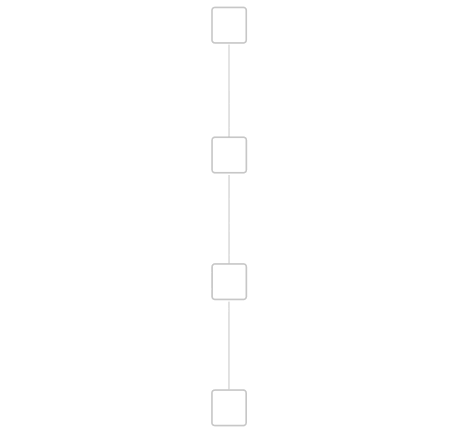

In [ ]:
def f(h):
  if h == 1: return
  f(h-1), f(h-1)


def g(N):
  if N == 1: return
  g(N//2), g(N//2)



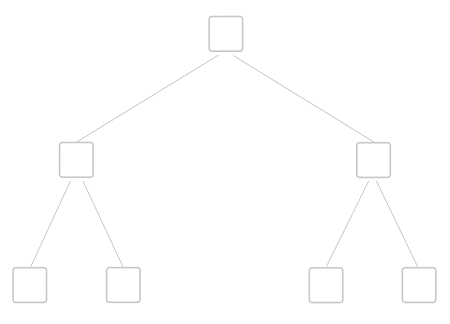

In [ ]:
def f(N):
  for i in range(N):
    f(i)

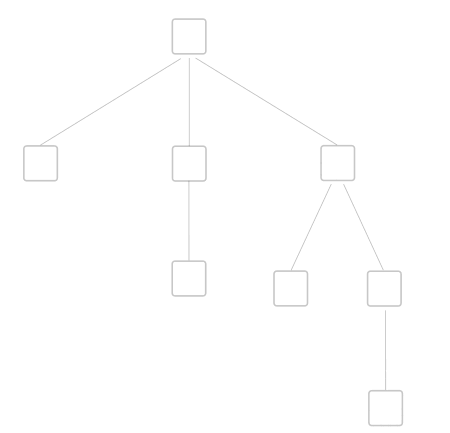

In [ ]:
k = 3
def f(N):
  if N == 0: return 0
  for i in range(k):
    f(N-1)

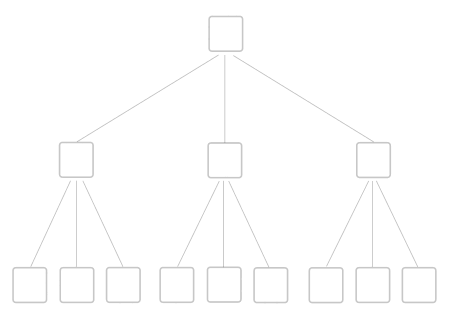

**Binary tree** is an important subclass of trees:

# Binary tree

**Binary Tree** is defined as a tree data structure where each node has *at mos*t `2` children.

One can prove that

$$
\log_2(n+1)-1 \, \leq \, h \, \leq \, n
$$

where $h$-height of the tree, $n$ - number of nodes. The lowest boundary for $h$ is attained in a balanced full tree or perfect tree, the largest - for degenerate "linear" binary trees.

In [ ]:
#@title ### These are all binary trees!
%%html

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Degenerate linear binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="170mm" height="160mm" version="1.1" viewBox="0 0 341.69 323.55" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-6.5958 72.535)">
  <rect x="153.72" y="-45.458" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <rect x="188.09" y="16.136" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <path d="m200.45 40.172 34.274 38.217" style="fill:none;stroke-opacity:.40152;stroke-width:.53329;stroke:#000000"/>
  <rect x="222.26" y="78.502" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <path d="m234.73 102.38 32.972 38.051" style="fill:none;stroke-opacity:.40152;stroke-width:.52917;stroke:#000000"/>
  <rect x="255.24" y="140.54" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <path d="m166.19-21.718 33.801 37.977" style="fill:none;stroke-opacity:.40152;stroke-width:.52917;stroke:#000000"/>
  <path d="m267.66 164.36 33.801 37.292" style="fill:none;stroke-opacity:.40152;stroke-width:.52917;stroke:#000000"/>
  <rect x="289.25" y="202.24" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <g transform="matrix(1.4319 0 0 1.4319 78.686 -15.93)" ns24:alignment="middle center" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$Binary tree$\n$ALSO Binary tree$" ns24:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.13 -127.62)">
    <rect x="531.33" y="63.712" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="489.14" y="116.42" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="573.34" y="116.28" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m539.69 80.451-42.393 35.886" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m581.97 133.07-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m581.97 133.07 23.985 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m539.69 80.451 42.183 35.676" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="552.1" y="158.92" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="597.2" y="159.84" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m497.51 133.16-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="467.49" y="159.12" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m560.32 175.76-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m560.32 175.76 23.985 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="530.31" y="201.56" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="575.4" y="202.47" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
   </g>
  </g>
 </g>
</svg>
</div>

<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Degenerate zig-zag binary tree/Linked list
</font><br>
<svg width="170mm" height="160mm" version="1.1" viewBox="0 0 341.69 323.55" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-6.5958 72.535)">
  <rect x="153.72" y="-45.458" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <rect x="188.09" y="16.136" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <path d="m200.25 40.122-34.274 38.217" style="fill:none;stroke-opacity:.40152;stroke-width:.53329;stroke:#000000"/>
  <rect x="154.17" y="78.452" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <path d="m166.19-21.718 33.801 37.977" style="fill:none;stroke-opacity:.40152;stroke-width:.52917;stroke:#000000"/>
  <g transform="matrix(1.4319 0 0 1.4319 78.686 -15.93)" ns24:alignment="middle center" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$Binary tree$\n$ALSO Binary tree$" ns24:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.13 -127.62)">
    <rect x="531.33" y="63.712" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="489.14" y="116.42" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="573.34" y="116.28" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m539.69 80.451-42.393 35.886" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m581.97 133.07-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m581.97 133.07 23.985 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m539.69 80.451 42.183 35.676" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="552.1" y="158.92" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="597.2" y="159.84" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m497.51 133.16-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="467.49" y="159.12" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m560.32 175.76-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m560.32 175.76 23.985 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="530.31" y="201.56" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="575.4" y="202.47" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="201.4" y="280.25" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
   </g>
  </g>
  <rect x="187.56" y="140.36" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <path d="m199.73 164.35-34.274 38.217" style="fill:none;stroke-opacity:.40152;stroke-width:.53329;stroke:#000000"/>
  <path d="m165.66 102.51 33.801 37.977" style="fill:none;stroke-opacity:.40152;stroke-width:.52917;stroke:#000000"/>
 </g>
</svg>
</div>

<div id="slide_3" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Full binary tree
</font><br>
<svg width="170mm" height="160mm" version="1.1" viewBox="0 0 341.69 323.55" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-6.5958 72.535)">
  <rect x="153.72" y="-45.458" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <g transform="matrix(1.4319 0 0 1.4319 78.686 -15.93)" ns24:alignment="middle center" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$Binary tree$\n$ALSO Binary tree$" ns24:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.13 -127.62)">
    <rect x="201.54" y="107" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="159.35" y="159.71" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="243.55" y="159.57" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m209.9 123.74-42.393 35.886" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m252.18 176.36-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m252.18 176.36 23.985 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m209.9 123.74 42.183 35.676" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="222.31" y="202.21" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="267.41" y="203.13" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m167.72 176.45-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="137.75" y="202.13" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m167.72 176.45 23.868 25.781" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="182.93" y="202.2" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m275.87 219.94-10.661 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <path d="m275.87 219.94 11.81 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <rect x="256.95" y="245.88" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="278.99" y="246.38" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
   </g>
  </g>
 </g>
</svg>


</div>

<div id="slide_4" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Complete binary tree
</font><br>
<svg width="170mm" height="160mm" version="1.1" viewBox="0 0 341.69 323.55" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-6.5958 72.535)">
  <rect x="153.72" y="-45.458" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <g transform="matrix(1.4319 0 0 1.4319 78.686 -15.93)" ns24:alignment="middle center" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$Binary tree$\n$ALSO Binary tree$" ns24:version="1.1.0">
   <g transform="translate(-149.13 -127.62)">
    <rect x="201.54" y="107" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="159.35" y="159.71" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="243.55" y="159.57" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m209.9 123.74-42.393 35.886" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m252.18 176.36-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m252.18 176.36 23.985 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m209.9 123.74 42.183 35.676" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="222.31" y="202.21" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="267.41" y="203.13" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m167.72 176.45-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="137.75" y="202.13" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m167.72 176.45 23.868 25.781" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="182.93" y="202.2" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m230.41 219.33-10.661 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <rect x="211.49" y="245.27" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m191.13 219.11-10.662 25.528" style="fill:none;stroke-opacity:.40152;stroke-width:.36846;stroke:#000000"/>
    <path d="m191.13 219.11 11.81 26.085" style="fill:none;stroke-opacity:.40152;stroke-width:.36846;stroke:#000000"/>
    <rect x="172.26" y="244.77" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="194.42" y="245.27" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m146.03 218.84-10.661 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <path d="m146.03 218.84 11.81 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <rect x="127.04" y="244.39" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="149.45" y="244.89" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
   </g>
  </g>
 </g>
</svg>
</div>

<div id="slide_5" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Perfect binary tree
</font><br>
<svg width="170mm" height="160mm" version="1.1" viewBox="0 0 341.69 323.55" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-6.5958 72.535)">
  <rect x="153.72" y="-45.458" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <g transform="matrix(1.4319 0 0 1.4319 78.686 -15.93)" ns24:alignment="middle center" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$Binary tree$\n$ALSO Binary tree$" ns24:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.13 -127.62)">
    <rect x="201.54" y="107" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="159.35" y="159.71" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="243.55" y="159.57" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m209.9 123.74-42.393 35.886" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m252.18 176.36-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m252.18 176.36 23.985 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m209.9 123.74 42.183 35.676" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="222.31" y="202.21" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="267.41" y="203.13" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m167.72 176.45-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="137.75" y="202.13" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m167.72 176.45 23.868 25.781" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="182.93" y="202.2" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m275.87 219.94-10.661 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <path d="m275.87 219.94 11.81 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <rect x="256.95" y="245.88" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="278.99" y="246.38" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m230.41 219.33-10.661 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <path d="m230.41 219.33 11.81 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <rect x="211.49" y="245.27" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="233.53" y="245.77" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m191.13 219.11-10.662 25.528" style="fill:none;stroke-opacity:.40152;stroke-width:.36846;stroke:#000000"/>
    <path d="m191.13 219.11 11.81 26.085" style="fill:none;stroke-opacity:.40152;stroke-width:.36846;stroke:#000000"/>
    <rect x="172.26" y="244.77" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="194.42" y="245.27" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m146.03 218.84-10.661 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <path d="m146.03 218.84 11.81 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <rect x="127.04" y="244.39" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="149.45" y="244.89" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
   </g>
  </g>
 </g>
</svg>
</div>

<div id="slide_6" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
General binary tree
</font><br>
<svg width="170mm" height="160mm" version="1.1" viewBox="0 0 341.69 323.55" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns24="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-6.5958 72.535)">
  <rect x="153.72" y="-45.458" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.45577;stroke:#969696"/>
  <g transform="matrix(1.4319 0 0 1.4319 78.686 -15.93)" ns24:alignment="middle center" ns24:jacobian_sqrt="1.0" ns24:pdfconverter="inkscape" ns24:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns24:scale="2.834645669291339" ns24:texconverter="pdflatex" ns24:text="$Binary tree$\n$ALSO Binary tree$" ns24:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.13 -127.62)">
    <rect x="201.54" y="107" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="159.35" y="159.71" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="243.55" y="159.57" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m209.9 123.74-42.393 35.886" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m252.18 176.36 23.985 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <path d="m209.9 123.74 42.183 35.676" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="267.41" y="203.13" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m167.72 176.45-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="137.75" y="202.13" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m167.72 176.45 23.868 25.781" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="182.93" y="202.2" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m275.87 219.94-10.661 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <path d="m275.87 219.94 11.81 26.225" style="fill:none;stroke-opacity:.40152;stroke-width:.36944;stroke:#000000"/>
    <rect x="256.95" y="245.88" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <rect x="278.99" y="246.38" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m191.38 219.13-21.652 25.665" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="161.51" y="244.99" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
    <path d="m287.86 263.06 10.802 27.893" style="fill:none;stroke-opacity:.40152;stroke-width:.36955;stroke:#000000"/>
    <rect x="290.25" y="290.85" width="16.644" height="16.644" ry="2.2017" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.31829;stroke:#969696"/>
   </g>
  </g>
 </g>
</svg>

</div>

<div style="position:absolute; top:100px; left:800px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3", "slide_4", "slide_5", "slide_6"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

In [ ]:
#@title ### Recursive algorithmic binary trees
%%html

<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Factorial calculation
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="267.67mm" height="181.27mm" version="1.1" viewBox="0 0 547.44 372.83" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-33.984 82.991)">
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <rect x="186.1" y="-14.771" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="186.22" y="39.052" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="186.08" y="92.685" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="186.22" y="146.74" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m198.58-0.72961v1.066c0 0.44578-0.0388 0.58144-0.94968 0.58144h-0.25195v0.38763c0.50391-0.03876 1.1435-0.03876 1.6668-0.03876s1.1629 0 1.6862 0.03876v-0.38763h-0.27134c-0.91092 0-0.9303-0.13568-0.9303-0.58144v-1.066h1.221v-0.38762h-1.221v-5.6205c0-0.25195 0-0.32948-0.2132-0.32948-0.0969 0-0.13567 0-0.23257 0.15505l-3.7987 5.795v0.38762zm0.0581-0.38762h-3.0041l3.0041-4.6128z" style="fill-opacity:.63636;fill:#000000;stroke-width:1.2404"/>
  <path d="m198.77 50.437c1.0078-0.32948 1.7249-1.1822 1.7249-2.1707 0-1.0078-1.0854-1.7056-2.2676-1.7056-1.2404 0-2.19 0.73648-2.19 1.6862 0 0.407 0.27133 0.63957 0.63957 0.63957s0.6202-0.27134 0.6202-0.63957c0-0.60083-0.58144-0.60083-0.75587-0.60083 0.36825-0.6202 1.1822-0.77525 1.628-0.77525 0.5233 0 1.2016 0.27134 1.2016 1.3761 0 0.15505-0.0388 0.87215-0.34886 1.4148-0.36825 0.60083-0.79463 0.63958-1.1047 0.63958-0.0969 0.0194-0.38762 0.0388-0.48452 0.0388-0.0969 0.0194-0.17443 0.0387-0.17443 0.15505 0 0.13567 0.0775 0.13567 0.29073 0.13567h0.54267c1.0078 0 1.473 0.83341 1.473 2.0544 0 1.6862-0.85278 2.035-1.3954 2.035-0.54268 0-1.473-0.2132-1.8993-0.9303 0.42638 0.0581 0.81401-0.2132 0.81401-0.67835 0-0.44577-0.32948-0.69772-0.67835-0.69772-0.3101 0-0.69773 0.17442-0.69773 0.71709 0 1.1241 1.1435 1.9381 2.5002 1.9381 1.5118 0 2.6358-1.1241 2.6358-2.3839 0-1.0078-0.79462-1.977-2.0738-2.2482z" style="fill-opacity:.63636;fill:#000000;stroke-width:1.2404"/>
  <path d="m198.72 155.38c0-0.3101 0-0.32947-0.29072-0.32947-0.77525 0.79463-1.8606 0.79463-2.2482 0.79463v0.38762c0.25195 0 0.96907 0 1.6087-0.32947v6.4152c0 0.44578-0.0388 0.58144-1.1435 0.58144h-0.38763v0.38762c0.42639-0.0387 1.4923-0.0387 1.9963-0.0387 0.48453 0 1.5698 0 1.9963 0.0387v-0.38762h-0.38762c-1.1241 0-1.1435-0.13568-1.1435-0.58144z" style="fill-opacity:.63636;fill:#000000;stroke-width:1.2404"/>
  <path d="m196.76 107.49 1.3179-1.2791c1.9188-1.7056 2.6552-2.3644 2.6552-3.6048 0-1.4148-1.1047-2.4033-2.6165-2.4033-1.3954 0-2.3064 1.1435-2.3064 2.2482 0 0.67835 0.6202 0.67835 0.65896 0.67835 0.2132 0 0.63957-0.13567 0.63957-0.65897 0-0.31009-0.23257-0.63957-0.65896-0.63957-0.0969 0-0.11629 0-0.15505 0.0194 0.27134-0.81402 0.94968-1.2598 1.6668-1.2598 1.1241 0 1.6474 1.0078 1.6474 2.0156 0 0.98845-0.60082 1.9575-1.2986 2.7327l-2.3644 2.6358c-0.13568 0.13568-0.13568 0.17443-0.13568 0.46515h4.5933l0.32948-2.1514h-0.29073c-0.0775 0.36825-0.15505 0.91093-0.29072 1.1047-0.0775 0.0969-0.89154 0.0969-1.1629 0.0969z" style="fill-opacity:.63636;fill:#000000;stroke-width:1.2404"/>
  <rect x="185.89" y="-68.487" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m200.59-55.45c0-1.473-1.0078-2.7134-2.3451-2.7134-0.58144 0-1.1241 0.19381-1.5698 0.63957v-2.4226c0.25195 0.0775 0.65896 0.15505 1.0466 0.15505 1.5311 0 2.4033-1.1241 2.4033-1.2791 0-0.0775-0.0388-0.13568-0.13568-0.13568 0 0-0.0387 0-0.0969 0.0388-0.25195 0.11629-0.85278 0.36825-1.6862 0.36825-0.48453 0-1.066-0.0969-1.6474-0.34886-0.0969-0.0388-0.11628-0.0388-0.13567-0.0388-0.13568 0-0.13568 0.0969-0.13568 0.29072v3.663c0 0.2132 0 0.3101 0.17443 0.3101 0.0969 0 0.11629-0.0194 0.17443-0.0969 0.13567-0.19381 0.58143-0.87215 1.5892-0.87215 0.63957 0 0.94967 0.56205 1.0466 0.79463 0.19381 0.46515 0.23258 0.9303 0.23258 1.5505 0 0.44578 0 1.1823-0.3101 1.7056-0.29073 0.48452-0.75588 0.79462-1.3179 0.79462-0.89154 0-1.6087-0.65896-1.8219-1.3761 0.0387 0 0.0775 0.0194 0.2132 0.0194 0.407 0 0.6202-0.3101 0.6202-0.60082 0-0.3101-0.2132-0.6202-0.6202-0.6202-0.17442 0-0.60082 0.0969-0.60082 0.65896 0 1.066 0.85277 2.2676 2.2289 2.2676 1.4342 0 2.694-1.1822 2.694-2.7522z" style="fill-opacity:.63636;fill:#000000;stroke-width:1.2404"/>
  <path d="m198.33-44.623-7e-3 29.865" style="fill:none;stroke-opacity:.23106;stroke-width:.86091;stroke:#000000"/>
  <path d="m198.09 9.0173-7e-3 29.865" style="fill:none;stroke-opacity:.23106;stroke-width:.86091;stroke:#000000"/>
  <path d="m198.14 116.57-7e-3 29.865" style="fill:none;stroke-opacity:.23106;stroke-width:.86091;stroke:#000000"/>
  <path d="m198.1 62.683-7e-3 29.865" style="fill:none;stroke-opacity:.23106;stroke-width:.86091;stroke:#000000"/>
  <path d="m198.03 170.8-7e-3 29.865" style="fill:none;stroke-opacity:.23106;stroke-width:.86091;stroke:#000000"/>
  <rect x="186.26" y="199.73" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <g transform="matrix(1.1924 0 0 1.1924 195.94 208.25)" style="fill-opacity:.57954;fill:#000000" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$0$$" ns32:version="1.1.0">
   <defs></defs>
   <g transform="translate(-303.52 -140.08)" style="fill-opacity:.57954;fill:#000000">
    <g style="fill-opacity:.57954;fill:#000000">
     <g transform="translate(303.13 146.72)" style="fill-opacity:.57954;fill:#000000">
      <path id="id-2a50cbe1-b720-4b34-a523-112a98e794af" d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.57954;fill:#000000"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(1 0 0 1 -.007056 -.0014628)">
   <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
   <image x="352.45" y="39.333" width="207.92" height="96.535" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaQAAADDCAYAAADNymVjAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3Xd8FHX+x/HX7CbZbHqhhBCqkAQpkRIwCIEgJ2DhB4iIeAKeeBaE40Tg5CwntpMiCioWRFFU BBQUOMFTlGaoSieEEkgPkJ7N7ibZnd8fuSysoaRsYBI/z8cjjwc7+53vfDcT5j3f+X5nRzGbzSpC CCHEdaa73g0QQgghQAJJCCGERkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkII oQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMadCDN2zkPvzl+PPKfRyixlVzv5tQ7 BdYC7vjyDoJfD2bl0ZXXuzlCiAau3gXSluQtxH4SS8DcAIyvGTG+ZmTAsgEUWAucyhVYC1h/fD2l 9lJ+OvMT583nK9WVXpRO+KJwHvjmgWvV/HrlWM4x9mbspbi0mG8Tv73ezRFCNHAuDaS397xNh3c7 kGnKBGDOjjmEvBHC7ozdLql/c/JmRn09it0Zu7HarFcs62fw4472d+CucyeuVRyNjI1c0oY/koig CLo3646XuxdDw4de7+YIIRo4N1dWlm3OpplPM7zcvAA4X3weo5uRQM/AWtetorJk3xKKS4t5vu/z /K3n3zC6Ga+4ztReU5naa2qtt/1H5WfwY/296693M4QQfxAu7SEdzzmOl7sX7np3ANIL0/F088TH w6fWdRdaC0kpSKFtYFseuumhq4aREEKI+qXWPaT0onT6f9qflIIUx7KgeUFOZdq81QZ/gz9r711L dLPoWm0vyDMIg95QrfaMjBzJp//36RXrTS5I5qkfnuL7U99TZi+jR7MeLBqyiA6NOjiVy7fm89K2 l/j80OfkWHIw6A10DenKgtsW0LlJ50rtGN9lPHe1v4tJGyexJ2MPAL2a9+KDOz6gbUBbp7qPnD/C a7+8xvenvifPmodBb6BLky680O8F+rfqj4LiVN6m2lhxZAWz42dzPOc4KirhQeHMvnU2A9sMrFS+ ou0rj64ky5SFQW/gtra3MXfgXFr6tXSUW5O4hvtW3+e07hfDv2BY+LAr/g6FEKI2XHrJztV2Z+zm ri/vIt+a77S86RtNnV7X9mC5J2MPfZb24VzxOceynek7GbNmDBvu20BT7/LtJeUlcdeKuziZe9JR zmqzsiNtB30/6cv7d7zPqA6jnOp+79f3WLB7gdNn+CX1Fyasm8Cae9bgZ/ADygNs2MphTkFqtVnZ nbGbe766h1V3r6J/q/6O90psJTy+4XE+O/SZ0/YSshOYuGEiPz/wM6E+oY7ll2v72uNrMegNVw1s IYSoa7W+ZBfqE0riY4kkT0omIjiCZ/s8i3mGmaQnkmjt35qRkSMxzzCTOSWz1r2j6rTHPMPMyYkn aeHX4qrrnM4/jUFv4Ku7vyL/qXxOP3GaW8JuISE7gQ0nNwBQai/lxW0vcjL3JMMjhpP0RJLjc03p OYVSeymv/fIa2eZsp7rPFp/FQ+/ByhErKZpexO6/7Ka1f2uOnj/KybyTTmU7Ne7EZ8M+I2tKFuYZ Zs7+/SxTek7BXGZmVcIqp7Lv//Y+Xxz+gjDfMJb93zLyn8qnaHoROx7cwcA2A9EpF3ZtcWkxf/v+ b5zMPcmtrW9l14O7KJ5RTM7UHD4Z+gmtA1o71T0sfBjmGWbMM8x8MfyL6vz6hRCixlzWQ0otTCWr KIv2Qe0ByCjKIM+SR5emXWpcZ3SzaDKnlM/YK7AWMGxleS/o4p6FK3Rs3JHVI1c7wqupd1Oe7fss w1cOZ3PyZsZ1GceZ/DP8dPonbmp6EwsHLSTYGAyAv8GfF2Jf4GTuSX5I+oFD5w7Rr2U/R91hvmF8 OeJLuoV0A8pD59Y2t7Lq6CrK7GWOcqE+oXw98mundvl6+DIicgQf7f+IfMuFHlaBtYCvE77G18OX T/7vE2Kaxzjei2oSxTuD33Gq5/D5w+xK30Wv0F58Nuwz/A3+ABjdjNzT4R7u6XCPK36NQghRK7Xu Ib2y/RWMrxnp/XFv8qx5jP12rNPr5zY/h/E1I69sf8UV7a0THYI7VOpJtQ1oS5AxiFJbKQC5llzM ZWa6N+vuCKMKHnoPbmp6E+YyM7mWXKf3bm5+syOMKlx8Ke1iu9J3cdeKuwh+Pdhxj1XsJ7GVLlkW lRaRWphK5yad6dy48yXrulhaYRr51nzuaH+HI4yEEEJrND2GdD1ZbVZsdlul5d7u3nWyvdXHVvPg 2geven/VxQx6A3qdvsrlK6bjCyGEFtW6hzTzlpmYZ5iZe+tc/A3+bBm7BfMMM7P6zXJ6PfOWma5o 7zWzI20HZ4vPEupb3psxuhlx17mzLWVbpR5Lia2EfVn78Df409y3ebW3VWov5bNDn1FqL2VKzylk Tsl0jOFsGbulUq/G6GYkyDOII+ePOE2CuJxAz0CMbkY2J2+Wr1ASQmiWy+5Dyrfm465zd9wfVGor RUHBTaf9Tli+NZ8sUxYqKiW2EtYeX8vMn2bi6+HLyA4jgfJLeJ2adGJf1j6e2PCE49soss3ZTP5+ MutPrKdrSFc6NupY7e1by6zkW/PRK3oigiPw8fChxFbCluQtPPPzMxSWFDqVD/AMoGfznmQUZXD/ mvvZkryFElsJKiqJOYlM/n6yo30AkcGRtPJvxfoT63l8w+Ocyjvl+Kz/OfEfnt38bC1+e0II4Rou S4sTuScwuhsJMpbfg3T0/FF8Db6OKdPXyivbX+HFbS86LUspSHHMUotpHlNpUsR/k/5L67daO62j U3Q80+cZejTrAYCXuxfP932eu1fdzaqEVZVmvTX2aswLsS/g5V79y2I+Hj7EtYpjW8o2HvvuMR77 7rErlldQ+HvPv7M1eSuHzh1i0BeDnN5v4deCf/T+h+N1U++mzLxlJo9+9yifHfqs0lTxkZEjHf+u mDwSnxbvVObi+5Ke7fNsvevxCiG0z2U9pFJbafm3NOjcUVGxqTbHa60KMAQwPWY63UK6OYLEoDcQ 3Syadfeu4x+9/+F0c+nNzW/mh/t/YGCbgY7yXu5ejOk4hm3jttEztGeN2zKl5xSeuvkpgjyDHPWO 6jCKDfdtICI4olL5NgFt+PmBn3mixxOO0NcrerqHdOe929+jmU8zp/L3dLiHn//88yXb/nLcyzVu txBCuIpiNpvV690IIYQQot49fkIIIUTDJIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0 QQJJCCGEJkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSDW0d8tKXnmi J9+vnIvNVlYn2ygqhn++pbDniHL1wtewLiGEqAt1Gkg5OQpDh3owaZI7ZrNr6jx0SOGxx9yJiDBg NHpiNHq6rH5TYQ4bv5zNvKfimPVIFLMeiWLu1H5kphxzKldiNZN4YDNlpVZOHNqGxZRfua6CbN55 fhj/+bxmzxoqKoZZ7+v4coNCUXGNqnBitiqcStXx8CwdR0/Vvj4hhHC1etVDOnhQ4aGHPPj4Yz3J ya4907cUF7J6yUx2bvoMU2HOFct6GIyEd+mHm7uBdp364Ont79K2qCosW6/wxXew+F8q/XvU/pFV jQNV5k+zExKs8uQ8HZnZ0lMSQmiLyx5hXtdUFdav13P2LCxdWsqwYTY8PFxXf2rSAU4n7KJjj0EM vncG3n7BVyzfPfYeusfe47oGXGTPEYWXFys8eo9Kn66ue35iSLDKrMdhxJMKH3wFTz8EbnqXVS+E ELVSb3pIFgukpSnExNgZNMi1YQSQnXUand6NHv3vvWoY1SVrCXz0jULLZjBuqOrywOgaqfLXu1U+ Xafj8EnpJQkhtMNlgWS3w+bNOu6/353Q0PLxnVtv9WDPnksf9M6fV5g7142oqPKysbEerFihx2q9 8naCg3F5GFXwMBgxePpc9v2KcaGK8aVZj0RVaYyoMP8c3y59nlcn3czLj3fn8wWPk3su5ZJlD55Q WPOTwvi7VMKaXLo+s6WMSTM28ur8XzifbeZf/95CRPQimrSfz/1/XcOxE9mXbYubHoYPKO91Ld8A ZbbLt7ugoIBJkyYxYMAAEhMTr/o5hRCiNlxyya6sDBYudOPVV90oLLywPCHh0mGUlKQwebI7P/xw IQ9379YxbpyOxx7T8fLLpRiNkJio8MADHhw44FzP4sXO3YZNm0qIibFXq80lVjNffTCN4we3Oi1/ /6VRTq979BvF7WP+Wa26L5Z84leW/PsB8nMyHMtOHN7OV4v/wZhJb+PlE+BU/ufdCp4eKr06X73u 9d8fZ8MPJ9n1a7pj2ddrj1FSYueduYNp3Mjrkuu1DYO+3VR2HVLIK4RGAZe+LHj48GEWL14MwLp1 63jyySev3ighhKghl/SQ9u3TsWCBnrg4G/v3WzGZLBQXW0hIsBIX5xwUViu8956exESFzz8vJSfH gtlsITnZyowZZSxbpmfHDm1eSfT2C+bxF9bw3Hv7mTpnE41C2lx1nbNpJ3DzMDD2ycX88529PDVv M+Fd+pF++hBnEvc4lbWUwPFkuKEFtAi5env27sskr8DC15+OpDBlGhkJU3jw/ig2bz9DUnLeZdfz 8oTuHVSS0iD97OXrj4iIYPz48cTExHDnnXdevUFCCFELte4hqSr88IOOgAB4/vkywsMvnG37+oLb 77aQlaWwc6eOiRNtDBtmQ/lf56dxY5VHHrERH69jzx4dcXF2wsNVdu4sv4ZnNsP06e4AzJ5d3oOq DQ+DkfueeMvxeuemz9i6/n3+POV9QlpE1K7yi4TdEMWoR17Hx78RAF4+AfS9/WHOJO7hzPG9dOg2 0FHWbFE4lQYtQ8DgcfXJDF06NmHBa4Po1T0UgAB/A7f/6QY++mw/NtuV1w9tAudyFQpMly8XFBTE okWLqvIxhRCi1modSBWTDdq0UQkNvXr5zEyFw4d17NihY8aMS2++QwcViwU8PWvbuusvJCzCEUYV /IOa4ePfCPvvbqi1q+WXP6uqZ/dQunR0HmgKDrr0ZbrfaxRw9TJCCHEtuezamKeniqJc/azeZsNp nOmPyFZWit12hdkE14ArbrYVQghXqnUPSa8Ho1ElO1tHcbGCv/+FUDp8WOHYMYVWrS4sCw5W6dJF 5eGHy5gw4foelK+XjJSj5Odk4BvQ2Gm50aDSNkwhOROsJQpenq67B+n3TqVCWBMI9q+7bQghRHXU uofk4QE33qiyZYuODz/UYzKVj/d88YWeCRPcK32jQvPmKlFRdhYudOObb/TkV/7WnQbFbMqnuCgP VVWx2cpIStjJxi9n4+nlS/vO/ZzKenlChzZwMgVSMuuuTdYSOHRSIbSJSuOgy9+LJNO+hRDXkkum fcfF2YmJsfPyy268/PKFKseOtVFU5FzW2xsefNDGzp06Ro92B9wr1VeTadzXws5Nn7Hxy9lOy85n JrFn8woA2nfuy90Pz8HDcGHGxeE9Gzm8Z6PTOjqdntvueYqmYeGVttG3m8rry3RsjIfO7VXHpA9X Sj8H8QcUxgxRr9hDkmnfQohrySVjSK1aqSxaVMqIETZ8fSE62s7SpaXMnl1GUFDl8jExdr79toTJ k51n5TUkBqMP/e58lDaRPfE0+gLg7mGk7Y0xjJ/2EdFx96FcIm06t1cZcovKmp8g7Zzr21VmK/+e PFMxDLnFfsXAk2nfQohrSTGbzQ0zEeqx3YcVRjyp8NBwlWcedu3XB1XUPfFeeGqcXb7LTgihGdq8 A/UPrmukysR7YcHnOpZvUFBddMqQma3w3DsKUeHw0HDXf0+eEELURr35tu8/Ejc9PDHaTlKajqcX KIQ1pdaPoMgpUHj6TYXMbIXPX7HRONBFjRVCCBeRQNIoHy+YN9VOo0Dlst81Vx0ebipNghU+fclG h7YuaKAQQriYjCEJIYTQBBlDEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNqFeBlLPVyk+t0zn0WC5lRdp7PIUQQoiaq1dfHXRuowVrlp3sTRYsqT74RF4l T1XI/tlK0uuF5G6zYrOUfylFm6m+RLzkfw1aLIQQoqrqVSA1HuRJ+jITwQM88Qy7+ldVn9toYd99 2Y4gElWXUnCeV7Z+zdrEPRSXWgn09OHejr15uu8IfD2MV69AaEphiZkVh39h9vY1WG1lfDVqGt2b NbwvNUz/vJi0T010mB+AT2Tlh382BCoqR86m8uLWVfx46gBDI6L5cOjj17tZLlGvAimor4G406FV KmsrVklfXoxboI5uiwMJijWguNXB41cboITzaYz+6nWS8887luVainh37/ccOHuGz0dMwc/gdR1b KKqqwFrMwl3f8cGv/6XAagZo0Puu8EgpxafKrncz6oSKyq60E8z88TP2Z53G7qrn0mhIvRpDqg67 WaX4VBlNhngS2EfCqKpKbGW8tHUVqQXZDI/sxYlJb5M9/WM2jX2BVv6N2ZGayOcHt17vZooq+vTA FubFf0uZ3c7E6MF0btLyejdJ1NBZUz6TvlvMb5lJdGrSkmm9/+96N8nlNB9ItmKV/eNz2GBMdfzs H5+DrbhqZwdugTp0Hq4Jo+XLlzN06FAyMjJYsWIFsbGxGI1GYmNj+eabb7Db6/9Ei4Nnk9mWnED3 Zjcwf9B4gow+KCjcFNKaV2+9H72i47+nDmAuK6nxNs6cUZg+3Y2ICANGoyc33+zBW2/pMZmcy+Xk KAwd6sGrr7phtcKKFXpiYz0wGj259153Dhyo+Z9vTk4OQ4cOZfny5Zw5c4aJEycSGhpKaGgokydP Jisrq8Z1a0m/Vjdyb8dbiH/oFab1HoaXu6FK6xUUFDBp0iQGDBhAYmKiS9qSutTE5ogMihJKKU4q Y//YbP4bmMYPzdI4NbcQ2+8ePKDa4fwPFnYNPsf3fmn8NzCN/WOzKU4qq1RvxbEhaV4h5mQb27pm XfaYUZptJz72LMeeyb9iGysUJZSyOSKD1KUmbCY7p+YW8lPrdL73S+O3+7IxJ9scZSvqTl1qcvqM /w1M48CDOVgzbJW2WVVNvP0ZfENX3rp9Aj+O/RedGuDJheYDqTpytlodf4A/hqWTv7uEpHmFTn+Y v/9jq66DBw/y6KOPMm7cOHbv3g3A7t27mTJlCr/88kuN6jSbzUyaNAmj0XjZn6FDh5KTkwNAfHz8 FcsajUaWL19eo7YcPZ9KgbWYER16OS7tqKgcyDrDnF++wabaOZ6TQZ7FdJWaLm3rVh233ebBwoVu JCeXnyjs369j2jR3HnzQg7NnK5885OXBM8+4M26cO7t3l//JfvutnilT3DhzpnYnG4sXL2bUqFEs WbKE3NxccnNz+eCDD3jppZcwm801qrM6+6e6+766OjVpyaI7/koLv0bVWu/w4cMsXryY+Ph41q1b V6NtX875763sjDtLxkozNotKWZ5K4rP5nHm7CP6XSWqZSvLbRfw6IpuczVbspSo2i0rGSjO/9M4i Z6vVpW2qCkuyjd9G55D4bD7WLDv2UpWsNWYOT8ylNNf5ZPTMW0XsHnzO8RltlvIhhISn86t8Mv17 Cgqz4kYzplNf9EqDOnQ7aP5T6b0Uoj4OYrA5jD9lN6fZvdf3+ndmZibx8fE899xzZGVlUVhYyPvv v+9YXt+lF+bgrtNzQ2AIUD6eNGrV6wz45Hl+y0zCrqoUWM2kF+ZWu+5z5xQWLCgftly5soT8fAvF xRZOnrTyl7/YWLtWx1dfVf6TXLDAje+/17FkSSk5ORby8izMmlVGfLyOgwdrF0jbt2/H29ubLVu2 YDKZOHbsGEOGDGHv3r2kp6fXqu76LCIigvHjxxMTE8Odd97psnrNyTYSZuTh39ODvgdDGFwcxi27 muLd3o2cn62UFZQfrPN/LeX4K/k0ucuT2CPl5QYVNqfHukYYGus583aR49aPsHHeDDaHMdgcRpup vhhb6unzW1PHssHmMKI+DkLvVbu/lROvFFCcVEa3r4MZVNicgVmhhN7nRd7OEopPOPfaCg+VovfR 0WtTEwaZwuh3NITAGA/yd5dgSat5L6mhq1eTGq4mqK+BweYwoLzrvGf4eYJiDS6d4u3r68sLL7zA ww8/jJtb+a+vX79+3HzzzZSV1Www1Wg0snDhQhYuXFil8jExMTU+e69Se9wNFJVaeHjtItYk7MKm 2gnw9GZW3Gg2ntjH1uSjNar3wAGFdet0vP12KXfcYUf53/EhNFTln/8s4+RJhT17dBQW2vD1vbBe v3523nijlMhI1WmZry8UFdXuIDNw4EDmz59Pu3btAGjZsiVxcXEsW7YMm61mB47q7J/q7vtrJSgo iEWLFtVJ3eGz/Gk92QedoXzfebV3w7+nB6bEMtQyFVDI+dmKobGe8Bf98WpT/v9McVNodKsnLf7q TfIiE9YMO27tr905dePBnnR6JxBDs/IZvm5+Co0GepL+RXGlmbz+PTzo8mEg3uHlM/2Mrd1oPNhI yodFqLaGNxnBVRpUIF0Lbdq04dZbb3WEEYCPjw++Fx9B67kCazF/+eZtAAI8vXky5i7+ctMAvNwN /JR0CAVw01X/QHDunEJIiErXrqojjCoEBqq0b69y5oxCaamC49oN0L69SqtWzv+Je/a0c/aspdpt +L3evXs7wqhC48aNa12vuLyAmz0cYQSg91TosjjI8dpmUSlKLMV0vIwtHTMvWYfOXaHknB3v9nXe XAefju6OMKoQOsaL0DGVr9oE9TM4wqiCR1PNX5C67uQ3pAFaGkPy/9+4kZe7gb/ffCf7HpnLE9FD 8HI3UGAtJqXgPAGe3oT4BNSofh8fcHNr2GeIWhpDqpfsoDbMmdviKqSHJJx0adoab3cDnZq05G+9 7sTPcOEm2H2Zpzl6LpWezdvX6F4WHx+VEycU9u7V0bmz8+Ww3FyF48cV2rdXMRobdmCJK9N7KXiG 6fGNcqfH140whF79JviasGbasFlU9J7lvbXSHDvZP9a+1y1qTnpIGlAxjmA2my/78+233xIUVH5Z o2KM4ko/o0ePrlFbOjZuQacmLdmdfoJnNn1OjrkIFZV9maf524YllNjKuL9LLEY3j2rX3amTSnS0 nfnz3Vi/XkdJCagqJCUpPP20G5s36xg40I6xnn8RRHX2T3X3/bVSF9O+qyMo1oDpSBkJT+djOl4x tnR17n46zMk2UpeaKM2/9G0YipuCu5+O3K1WCn4rRbWD6UQZByfkkrGy7sZmxdVpvoeUs9XKrtvO VVqe8WUxAP7RHvRY3Qj3YMlWV/AzGHmh/2ju+2o+yw5uYdnBLU7vj+54C3e2716julu1Upk40cak Se6MHFk50J54wsbAgTIDyZX2Zpzi7hVzKLAWOy3/06cvOP69dNgk7grv4fR+xbRvgHXr1vHkk0/W fWMvEtTHQOifvUj9yETGiuJK7ze714tO7wRWmjkX1N+AW4DC6TeKOP1G0SXLu/kpBPU3cP5HCzsH nHWU0XsqNBnqSeG+mt8WUtce+vYdVifsdFq2OmGnY1mv5u35cuRUpysb9YkcxUUlPZu349vR/yCu dScM+vKB2WY+gbwYdx9vDP4LHvqanccoCowaZeOrr0oYMcJGYGD5WW9cnJ0vvijlpZdK8fZ22ccQ tVBX076rSu+lcOP8AKKWBhHQywOde9VmUwZEe9D180Y0GujpuBRXiQItH/Wm3TN+uAUo6NzLZ8v1 /KEJrZ9oOJOT6iPFbDbLBXshhBDXnfSQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkgg CSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCCJyzKb zUybNo2oqCi2bdtWZ9tJSILpb+jIKajaIwaul8xshSfn6TiTfr1bUvdk3zv7I+3760kC6Q/o0KFD PPbYY0RERGA0GjEajUyaNAmz2flpmSkpKWzZsoXExES2bt16ybri4+MxGo3Ex8fXqC3Hz8CjL+tI PAMl2n0uGgCFRSq/Hi1vb2a2tg+glyP7vmYawr6vDzT/xNhrwZph49jMfLzautHuWb/r3Zw6dfDg QSZMmMCBAweuWrZFixbExsZisVjo27evy9uSXwTPLdJhNMC7z6iEBF/7R3PZVDs7UhN57qfl7M86 zfRbhjG997BLlm3fChbNtDNmpp7n34F5U1V8vK5xg2tB9v0FNtXOV0d3MGf7NyTlZaGg0KVpK57r N4rYVh1QcA6d+r7v6wsJJKA0307uL1YMzfXXuyl1SlVV1q9fz9mzZ1m6dCnDhg3Dw6Pyo8QrGI1G 5syZw5w5c+qgLfDhah3bfoNPX74+B6R1iXt5eesqTuRkVnm9Dm3hub/aeehfOvp0VXjgzvrxfEvZ 9xcUWM08/p/3+c/xXy9uFb9lJjF61eu8d+cjDI2IrrRefd339YlcsvsDsVgspKWlERMTw6BBg654 QKprp9Ph0/UKY26HPl2v/X/so+dSeXLjx5zKzeK2G27iz51jq7zuoN4qwweovLtKIfWsa9tVcRls +fLlLq1X9v0FvgZPujVrywNd+rHvkXnkTF/KiUlvMzQiGqutlKX7f8ZcVnLJdety34t6EEil2Xbi Y89y7Jl87FaVtE9NbO2SyQZjKruHnKPgt8oXn+1WlYwVxfzSO4sNxlR+aJbG0Wl5lJy1V6p3gzGV bV2zMCfbSJpXyAZjqtNPzlarY53UpSY2R2RQlOC8zYvbeLFjz+QTH3uWkvN28veWsueu83zvl8bP 7TNI/6wYtUx1qjs+9izWdJvTZ9zaJZOMlWZUOy4THBx8xQNSxUHx4p+qjBPs27eP+++/nyZNmhAV FcXbb79daWyiwlc/6DAVwwN32HG7TMc0Pj6eXr16kZCQwKZNm7j99tsxGo1ERUWxePFirFbrpVes graBTbmjfTdWjJzKF3dPIcw/uMrrennC6MEqR08pfLe1fo0n1Jd9n5PdphkxAAAOu0lEQVSTw9Ch Q1m+fDlnzpxh4sSJhIaGEhoayuTJk8nKyqrS570UBYUnb76LNwf/hZb+jQAIMvrwbOxImnoHcDwn gzyL6ZLr1ud9Xx/Um0t2ZXl2jkzJI/XjC38o2T9bOTAhh24rg/FqW/5RbMUqx58v4PRbhRetq3Lm rSLOb7TQdWUwPhHu16zdqk0lbamJEy8VYLOUB5Al1cahx3LRGRVCRhgdZU0JZfw2Jpu8nRfOzkzH yzg8MRePRjqC4wzV3n5iYiIPPPBApXGDxYsXO73etGkTMTEx1a6/wpIlS1i/fj25ubkAFBYW8tRT T6GqKhMnTkRRLvznzS9S2PobdL8RWjW7cr0HDhzg2WefZfPmzRQWFjo+06RJk/Dx8WH06NE1aq+X u4EFQx6q0boAXSOha6TKjoMK99+h4uVZ46rqTH3f9xVtnT9/vtNn+OCDD1BVldmzZ2M0Gq+wds2E +ATg7X75/2v1Yd/XV5rvIVVI+dDEue/MdHo3kD/lNOe2vObc8A8/io6UUrj/Qo/l3AYLye8V0eoJ H+JOhzLYHMafcpoT9XEQ1nM2UpeYUMtU3IN1xGxpwmBzGH1+a4qxpZ42U30ZbA5z+gnqW/0QuFjB r6Ucf6GAsPHexJ1qxuDiMHp82widN2T/aMFecqGXVFZop+DXUtpM9eXWzFAGFTbnxgUBlBXaydlS 895AdcXExGA2mzGbzWzatKlK6yxbtoxx48Zx8uRJTCYTu3btIjo6mrVr15KZ6TxGcy5HJSlN4ca2 dny9r173unXrGDNmDElJSZhMJtauXUtISAg7duzAYrHU5CPWWoCvSrcOkHAa8gqvWrze0Nq+3759 O97e3mzZsgWTycSxY8cYMmQIe/fuJT3dtXOwf0k5xrnifG5pEYmf4fIzFhrqvteCetND8o1yp8uH Qfh2vNC7afQnT5LmFVJaUH49y16ikv2jhcBbPGg30w/3wPK81RsVQu42krerhPzdJZQVqrgHXpvu tpuvjhvfCKDZaC+U/8W/fw8PfDu4U2ZSUcuA/11B0bkrhM/yp9UT3ihu5e1r/CdPfCLdsZfW7Fp7 eHg4O3fuBMrvLZk+fTqAy88u586dyyOPPIKbW/mfVOfOnRk7diwzZ84kJSWFZs0unA6fy1NIzYLW oVWre/r06UyfPh1v7/IjWHR0NDExMdhsNlTV+fcy+5c1/Hvb6kp1DI/sxYdDH6/hp6vMTQ9NgyCv QKHQBDSuWT3x8fEMGDCg0vIHH3yQBx980PH6o48+qnZvsCHs+4EDBzJ//nzatWsHQMuWLYmLi2PZ smXYbDansrXZ97vSTvCvn1dwc1g4f7/5ziuWddW+F5XVm0DyiXTHq41zcwN7e3BbQXPHa5tJpeho KbnxJfwYeumzJ6+2bpSctzvCqq65Byr4dXN3hFH5Mh29NjWpVNbQTEejwQZHGEF5oOl9tX+tulu3 bo4DUoXIyEgKCwsrHThsNigtq3rdgwcPdoQRgIeHB8HBVR/zqStNg1VA+/umrtXlvu/du7cjjCo0 buzaBDhyLoVH1r1LoNGbt4ZMuGLvqILs+7pRbwKpSuxgr8Yfu6hbtZl0UFPTe1/+PiJXK7z0uHe1 VFwiq1DRY6pJj0hL6su+j09NZNyahQQbffhk+GRaB1Q+UbwUV+x7UVmDCiSdUcGrrRueIXo6fxiI m6/re0HWDDulORddJlIh5xcrpuOlBMXWbrypIbHZbGzfvp127drh4+Pj9F7jQJWWIeXTf+urMhsk pSsEB6gE+SuA3JNSoT7sexWVVUd28PeNH3FDYFM+GzGFML+q9bpl39edejOpoSr0XgqBMR6c22Dh xMsFWNJsVZourfdU0HvpOPutmdxfSi67jrufDnupStZqMzaTHZtZJXWpiYN/zaEs74/9R3n+/HnH mb7JZGLZsmW8++679O/fv9Ill5BGCu1aqhw5pau3Z5qFJoWjp6B9S/A2yr6vT/veptpZuOs7Jn/3 Id2btWXN6BlVDiOQfV+XGlQPCSBkhBfn/mPh9JtFnH6zqNL7bab6EvGSv9MyQzM9gX0MpCwuYuet zne79fy+sWOmnW+UOz43unP6rUKnaeX+PTxqPOlAayoGv38/NfjigfdLXU4aNWpUpbqio6OZOHFi pQF0P2+VPl0V5i+DI6cUenW+9r+7AquZe1fNY2facafl/9622jEwfqXB8MQz8GuCwoIZ9gYz7feP su/3ZZ7m9fi1WG2lbE0+yg0LJlYq80fb91rRoHpIAB6Nddz0eRAdZgfg27lq9xvpDArhL/hxw9N+ GFtfPqO92rrRaVEggbeUB5ShqY7wF/3pvroRPpHX7t4mLQkPD+fNN9/k9ttvJzAwEICoqChefPFF vv76ayIjIyutoygwtJ+dQF/4epNCma1SEU0rtsD7Xym0a6Fyy02uPaBWjCnVh/Ej2fcN4yRUSxSz 2Sy/VXHNqSrMX6Zj7icKn7xkZ2Cv+vNnuHqTwqMv6Zg/zc6YIfWn3Voh+15cToPrIYn6QVHggTtV ukWqTJuv4+ip692iqjl6Cma9r2P4rSrD4uSAVBOy78XlSCCJ66ZxoMqcv5fPIHlynvafM3MmHSbP 1hESrPKvR+UrY2pD9r24FAkkcV11aAtfvGojKlzFy1PbZ50Gg0LHG+CD5+3X5dlNDY3se/F7MoYk hBBCE6SHJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCa IIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkggCSGE0AQJJCGEEJoggSSE EEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBC aIIEkhBCCE2QQBJCCKEJEkhCCCE04boGktlsZtq0aURFRbFt27Y6205RMfzzLYU9R5Ra15WZrfDk PB1n0l3QMCGEEA51EkiHDh3iscceIyIiAqPRiNFoZNKkSZjNZqdyKSkpbNmyhcTERLZu3XrJuuLj 4zEajcTHx9eoLUXFMOt9HV9uUCgqrlEVTgqLVH49Co++rCMzu/YBJ4QQopybqys8ePAgEyZM4MCB A1ct26JFC2JjY7FYLPTt29fVTUFVYdl6hS++g09fVunfQ61U5qFv32F1ws5Lrj88shcfDn3caVn7 VrBopp0xM/U8/w7Mm6ri4+XypgshxB+OS3tIqqqyfv16zp49y9KlS8nPz8dsNmM2m1m4cCFGo9Gp vNFoZM6cOezfv58+ffq4sikA7Dmi8PJihUfvUenTtXIY1VSHtvDcX+2s/K/C6k3SSxJCCFdwaQ/J YrGQlpZGTEwMgwYNwsPDw5XVV4u1BD76RqFlMxg3VMVNf/myYX7BbPzzszTzCaxy/YN6qwwfoPLu KoW4niphTVzQaCGE+AOrkzGk4ODgK4ZRxbjQxT9VGSPat28f999/P02aNCEqKoq333670rhUhYMn FNb8pDD+rroJCy9PGD1Y5egphe+2Si9JCCFqq9Y9pMTERB544IFKY0aLFy92er1p0yZiYmJqvJ0l S5awfv16cnNzASgsLOSpp55CVVUmTpyIojiHws+7FTw9VHp1rvEmr6prJHSNVNlxUOH+O1S8POtu W0II0dBdl2nfMTExjrGlTZs2VWmdZcuWMW7cOE6ePInJZGLXrl1ER0ezdu1aMjMzncpaSuB4MtzQ AlqEXL3u1IJsOr4zhaDZ4wib/1duWzaL9cf3YlPtV1wvwFelWwdIOA15hVX6GEIIIS6j1oEUHh7O zp07MZvN5OTkMGHCBCZMmEBOTo4jdMxmc616RwBz587lxRdfJDQ0FJ1OR+fOnRk7diy//fYbKSkp TmXNFoVTadAyBAwe1ZvMUFxqZU/6ScatWciUDUsosZVdtqybHpoGQV6BQqGpRh9LCCHE/7h82ndd 6datG25uzs2NjIyksLAQm83mtNyuQtnlc8TJh0Mfd5ranW0uZPmh7by67WvWJOxiTOdYYsLCL7t+ 02AVkDEkIYSorXr91UFWq9XldQYbfXk8ehAD23bBVGrlfHHBFctLz0gIIVyj3gaSzWZj+/bttGvX Dh8fH6f3jAaVtmGQnAnWkur3XkptNsxlJbjr9BjdLj9bsMwGSekKwQEqQf7SSxJCiNqoN4F0/vx5 xxRvk8nEsmXLePfdd+nfvz/t2rVzKuvlCR3awMkUSMm8VG2XpqKSlHeWKRuW8OOpA3RoHEa3Zm0v W77QpHD0FLRvCd5G1914K4QQf0TXfAzJbDYzffr0StPCBwwY4Pj3Rx99xOjRo53eHzVqVKW6oqOj mThxYqVvgADo203l9WU6NsZD5/YqyiU6MAVWM/eumsfOtOOV3mvuG8Qbg/5CkNGn8or/k3gGfk1Q WDDDLlO+hRCiljQ/qSE8PJw333yTjRs3Eh8fT25uLlFRUYwcOZLx48fTqFGjS67Xub3KkFtU1vwE 9w2hSjfH6hUd7YJC+HOXfoyN6oevR+Wgq1Bsgfe/UmjXQuWWm6R3JIQQtaWYzeYGezTdfVhhxJMK Dw1XeebhK399UHWt3qTw6Es65k+zM2ZIg/0VCiHENVNvxpBqomukysR7YcHnOpZvUFBdlBtHT5U/ 0mL4rSrD4iSMhBDCFTR/ya423PTwxGg7SWk6nl6gENaUSz6CojrOpMPk2TpCglX+9ah8XZAQQrhK gw4kAB8vmDfVTqNAhUYBte/NGAwKHW+Ap8bZCQl2QQOFEEIADXwMSQghRP3RoMeQhBBC1B8SSEII ITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEEC SQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJiqqq8sRYIYQQ193/ Aypa2p2k9td0AAAAAElFTkSuQmCC "/>
  </g>
  <image x="352.45" y="39.278" width="207.92" height="96.536" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaQAAADDCAYAAADNymVjAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3Xd8FHX+x/HX7CbZbHqhhBCqkAQpkRIwCIEgJ2DhB4iIeAKeeBaE40Tg5CwntpMiCioWRFFU BBQUOMFTlGaoSieEEkgPkJ7N7ibZnd8fuSysoaRsYBI/z8cjjwc7+53vfDcT5j3f+X5nRzGbzSpC CCHEdaa73g0QQgghQAJJCCGERkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkII oQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMadCDN2zkPvzl+PPKfRyixlVzv5tQ7 BdYC7vjyDoJfD2bl0ZXXuzlCiAau3gXSluQtxH4SS8DcAIyvGTG+ZmTAsgEUWAucyhVYC1h/fD2l 9lJ+OvMT583nK9WVXpRO+KJwHvjmgWvV/HrlWM4x9mbspbi0mG8Tv73ezRFCNHAuDaS397xNh3c7 kGnKBGDOjjmEvBHC7ozdLql/c/JmRn09it0Zu7HarFcs62fw4472d+CucyeuVRyNjI1c0oY/koig CLo3646XuxdDw4de7+YIIRo4N1dWlm3OpplPM7zcvAA4X3weo5uRQM/AWtetorJk3xKKS4t5vu/z /K3n3zC6Ga+4ztReU5naa2qtt/1H5WfwY/296693M4QQfxAu7SEdzzmOl7sX7np3ANIL0/F088TH w6fWdRdaC0kpSKFtYFseuumhq4aREEKI+qXWPaT0onT6f9qflIIUx7KgeUFOZdq81QZ/gz9r711L dLPoWm0vyDMIg95QrfaMjBzJp//36RXrTS5I5qkfnuL7U99TZi+jR7MeLBqyiA6NOjiVy7fm89K2 l/j80OfkWHIw6A10DenKgtsW0LlJ50rtGN9lPHe1v4tJGyexJ2MPAL2a9+KDOz6gbUBbp7qPnD/C a7+8xvenvifPmodBb6BLky680O8F+rfqj4LiVN6m2lhxZAWz42dzPOc4KirhQeHMvnU2A9sMrFS+ ou0rj64ky5SFQW/gtra3MXfgXFr6tXSUW5O4hvtW3+e07hfDv2BY+LAr/g6FEKI2XHrJztV2Z+zm ri/vIt+a77S86RtNnV7X9mC5J2MPfZb24VzxOceynek7GbNmDBvu20BT7/LtJeUlcdeKuziZe9JR zmqzsiNtB30/6cv7d7zPqA6jnOp+79f3WLB7gdNn+CX1Fyasm8Cae9bgZ/ADygNs2MphTkFqtVnZ nbGbe766h1V3r6J/q/6O90psJTy+4XE+O/SZ0/YSshOYuGEiPz/wM6E+oY7ll2v72uNrMegNVw1s IYSoa7W+ZBfqE0riY4kkT0omIjiCZ/s8i3mGmaQnkmjt35qRkSMxzzCTOSWz1r2j6rTHPMPMyYkn aeHX4qrrnM4/jUFv4Ku7vyL/qXxOP3GaW8JuISE7gQ0nNwBQai/lxW0vcjL3JMMjhpP0RJLjc03p OYVSeymv/fIa2eZsp7rPFp/FQ+/ByhErKZpexO6/7Ka1f2uOnj/KybyTTmU7Ne7EZ8M+I2tKFuYZ Zs7+/SxTek7BXGZmVcIqp7Lv//Y+Xxz+gjDfMJb93zLyn8qnaHoROx7cwcA2A9EpF3ZtcWkxf/v+ b5zMPcmtrW9l14O7KJ5RTM7UHD4Z+gmtA1o71T0sfBjmGWbMM8x8MfyL6vz6hRCixlzWQ0otTCWr KIv2Qe0ByCjKIM+SR5emXWpcZ3SzaDKnlM/YK7AWMGxleS/o4p6FK3Rs3JHVI1c7wqupd1Oe7fss w1cOZ3PyZsZ1GceZ/DP8dPonbmp6EwsHLSTYGAyAv8GfF2Jf4GTuSX5I+oFD5w7Rr2U/R91hvmF8 OeJLuoV0A8pD59Y2t7Lq6CrK7GWOcqE+oXw98mundvl6+DIicgQf7f+IfMuFHlaBtYCvE77G18OX T/7vE2Kaxzjei2oSxTuD33Gq5/D5w+xK30Wv0F58Nuwz/A3+ABjdjNzT4R7u6XCPK36NQghRK7Xu Ib2y/RWMrxnp/XFv8qx5jP12rNPr5zY/h/E1I69sf8UV7a0THYI7VOpJtQ1oS5AxiFJbKQC5llzM ZWa6N+vuCKMKHnoPbmp6E+YyM7mWXKf3bm5+syOMKlx8Ke1iu9J3cdeKuwh+Pdhxj1XsJ7GVLlkW lRaRWphK5yad6dy48yXrulhaYRr51nzuaH+HI4yEEEJrND2GdD1ZbVZsdlul5d7u3nWyvdXHVvPg 2geven/VxQx6A3qdvsrlK6bjCyGEFtW6hzTzlpmYZ5iZe+tc/A3+bBm7BfMMM7P6zXJ6PfOWma5o 7zWzI20HZ4vPEupb3psxuhlx17mzLWVbpR5Lia2EfVn78Df409y3ebW3VWov5bNDn1FqL2VKzylk Tsl0jOFsGbulUq/G6GYkyDOII+ePOE2CuJxAz0CMbkY2J2+Wr1ASQmiWy+5Dyrfm465zd9wfVGor RUHBTaf9Tli+NZ8sUxYqKiW2EtYeX8vMn2bi6+HLyA4jgfJLeJ2adGJf1j6e2PCE49soss3ZTP5+ MutPrKdrSFc6NupY7e1by6zkW/PRK3oigiPw8fChxFbCluQtPPPzMxSWFDqVD/AMoGfznmQUZXD/ mvvZkryFElsJKiqJOYlM/n6yo30AkcGRtPJvxfoT63l8w+Ocyjvl+Kz/OfEfnt38bC1+e0II4Rou S4sTuScwuhsJMpbfg3T0/FF8Db6OKdPXyivbX+HFbS86LUspSHHMUotpHlNpUsR/k/5L67daO62j U3Q80+cZejTrAYCXuxfP932eu1fdzaqEVZVmvTX2aswLsS/g5V79y2I+Hj7EtYpjW8o2HvvuMR77 7rErlldQ+HvPv7M1eSuHzh1i0BeDnN5v4deCf/T+h+N1U++mzLxlJo9+9yifHfqs0lTxkZEjHf+u mDwSnxbvVObi+5Ke7fNsvevxCiG0z2U9pFJbafm3NOjcUVGxqTbHa60KMAQwPWY63UK6OYLEoDcQ 3Syadfeu4x+9/+F0c+nNzW/mh/t/YGCbgY7yXu5ejOk4hm3jttEztGeN2zKl5xSeuvkpgjyDHPWO 6jCKDfdtICI4olL5NgFt+PmBn3mixxOO0NcrerqHdOe929+jmU8zp/L3dLiHn//88yXb/nLcyzVu txBCuIpiNpvV690IIYQQot49fkIIIUTDJIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0 QQJJCCGEJkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSDW0d8tKXnmi J9+vnIvNVlYn2ygqhn++pbDniHL1wtewLiGEqAt1Gkg5OQpDh3owaZI7ZrNr6jx0SOGxx9yJiDBg NHpiNHq6rH5TYQ4bv5zNvKfimPVIFLMeiWLu1H5kphxzKldiNZN4YDNlpVZOHNqGxZRfua6CbN55 fhj/+bxmzxoqKoZZ7+v4coNCUXGNqnBitiqcStXx8CwdR0/Vvj4hhHC1etVDOnhQ4aGHPPj4Yz3J ya4907cUF7J6yUx2bvoMU2HOFct6GIyEd+mHm7uBdp364Ont79K2qCosW6/wxXew+F8q/XvU/pFV jQNV5k+zExKs8uQ8HZnZ0lMSQmiLyx5hXtdUFdav13P2LCxdWsqwYTY8PFxXf2rSAU4n7KJjj0EM vncG3n7BVyzfPfYeusfe47oGXGTPEYWXFys8eo9Kn66ue35iSLDKrMdhxJMKH3wFTz8EbnqXVS+E ELVSb3pIFgukpSnExNgZNMi1YQSQnXUand6NHv3vvWoY1SVrCXz0jULLZjBuqOrywOgaqfLXu1U+ Xafj8EnpJQkhtMNlgWS3w+bNOu6/353Q0PLxnVtv9WDPnksf9M6fV5g7142oqPKysbEerFihx2q9 8naCg3F5GFXwMBgxePpc9v2KcaGK8aVZj0RVaYyoMP8c3y59nlcn3czLj3fn8wWPk3su5ZJlD55Q WPOTwvi7VMKaXLo+s6WMSTM28ur8XzifbeZf/95CRPQimrSfz/1/XcOxE9mXbYubHoYPKO91Ld8A ZbbLt7ugoIBJkyYxYMAAEhMTr/o5hRCiNlxyya6sDBYudOPVV90oLLywPCHh0mGUlKQwebI7P/xw IQ9379YxbpyOxx7T8fLLpRiNkJio8MADHhw44FzP4sXO3YZNm0qIibFXq80lVjNffTCN4we3Oi1/ /6VRTq979BvF7WP+Wa26L5Z84leW/PsB8nMyHMtOHN7OV4v/wZhJb+PlE+BU/ufdCp4eKr06X73u 9d8fZ8MPJ9n1a7pj2ddrj1FSYueduYNp3Mjrkuu1DYO+3VR2HVLIK4RGAZe+LHj48GEWL14MwLp1 63jyySev3ighhKghl/SQ9u3TsWCBnrg4G/v3WzGZLBQXW0hIsBIX5xwUViu8956exESFzz8vJSfH gtlsITnZyowZZSxbpmfHDm1eSfT2C+bxF9bw3Hv7mTpnE41C2lx1nbNpJ3DzMDD2ycX88529PDVv M+Fd+pF++hBnEvc4lbWUwPFkuKEFtAi5env27sskr8DC15+OpDBlGhkJU3jw/ig2bz9DUnLeZdfz 8oTuHVSS0iD97OXrj4iIYPz48cTExHDnnXdevUFCCFELte4hqSr88IOOgAB4/vkywsMvnG37+oLb 77aQlaWwc6eOiRNtDBtmQ/lf56dxY5VHHrERH69jzx4dcXF2wsNVdu4sv4ZnNsP06e4AzJ5d3oOq DQ+DkfueeMvxeuemz9i6/n3+POV9QlpE1K7yi4TdEMWoR17Hx78RAF4+AfS9/WHOJO7hzPG9dOg2 0FHWbFE4lQYtQ8DgcfXJDF06NmHBa4Po1T0UgAB/A7f/6QY++mw/NtuV1w9tAudyFQpMly8XFBTE okWLqvIxhRCi1modSBWTDdq0UQkNvXr5zEyFw4d17NihY8aMS2++QwcViwU8PWvbuusvJCzCEUYV /IOa4ePfCPvvbqi1q+WXP6uqZ/dQunR0HmgKDrr0ZbrfaxRw9TJCCHEtuezamKeniqJc/azeZsNp nOmPyFZWit12hdkE14ArbrYVQghXqnUPSa8Ho1ElO1tHcbGCv/+FUDp8WOHYMYVWrS4sCw5W6dJF 5eGHy5gw4foelK+XjJSj5Odk4BvQ2Gm50aDSNkwhOROsJQpenq67B+n3TqVCWBMI9q+7bQghRHXU uofk4QE33qiyZYuODz/UYzKVj/d88YWeCRPcK32jQvPmKlFRdhYudOObb/TkV/7WnQbFbMqnuCgP VVWx2cpIStjJxi9n4+nlS/vO/ZzKenlChzZwMgVSMuuuTdYSOHRSIbSJSuOgy9+LJNO+hRDXkkum fcfF2YmJsfPyy268/PKFKseOtVFU5FzW2xsefNDGzp06Ro92B9wr1VeTadzXws5Nn7Hxy9lOy85n JrFn8woA2nfuy90Pz8HDcGHGxeE9Gzm8Z6PTOjqdntvueYqmYeGVttG3m8rry3RsjIfO7VXHpA9X Sj8H8QcUxgxRr9hDkmnfQohrySVjSK1aqSxaVMqIETZ8fSE62s7SpaXMnl1GUFDl8jExdr79toTJ k51n5TUkBqMP/e58lDaRPfE0+gLg7mGk7Y0xjJ/2EdFx96FcIm06t1cZcovKmp8g7Zzr21VmK/+e PFMxDLnFfsXAk2nfQohrSTGbzQ0zEeqx3YcVRjyp8NBwlWcedu3XB1XUPfFeeGqcXb7LTgihGdq8 A/UPrmukysR7YcHnOpZvUFBddMqQma3w3DsKUeHw0HDXf0+eEELURr35tu8/Ejc9PDHaTlKajqcX KIQ1pdaPoMgpUHj6TYXMbIXPX7HRONBFjRVCCBeRQNIoHy+YN9VOo0Dlst81Vx0ebipNghU+fclG h7YuaKAQQriYjCEJIYTQBBlDEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNqFeBlLPVyk+t0zn0WC5lRdp7PIUQQoiaq1dfHXRuowVrlp3sTRYsqT74RF4l T1XI/tlK0uuF5G6zYrOUfylFm6m+RLzkfw1aLIQQoqrqVSA1HuRJ+jITwQM88Qy7+ldVn9toYd99 2Y4gElWXUnCeV7Z+zdrEPRSXWgn09OHejr15uu8IfD2MV69AaEphiZkVh39h9vY1WG1lfDVqGt2b NbwvNUz/vJi0T010mB+AT2Tlh382BCoqR86m8uLWVfx46gBDI6L5cOjj17tZLlGvAimor4G406FV KmsrVklfXoxboI5uiwMJijWguNXB41cboITzaYz+6nWS8887luVainh37/ccOHuGz0dMwc/gdR1b KKqqwFrMwl3f8cGv/6XAagZo0Puu8EgpxafKrncz6oSKyq60E8z88TP2Z53G7qrn0mhIvRpDqg67 WaX4VBlNhngS2EfCqKpKbGW8tHUVqQXZDI/sxYlJb5M9/WM2jX2BVv6N2ZGayOcHt17vZooq+vTA FubFf0uZ3c7E6MF0btLyejdJ1NBZUz6TvlvMb5lJdGrSkmm9/+96N8nlNB9ItmKV/eNz2GBMdfzs H5+DrbhqZwdugTp0Hq4Jo+XLlzN06FAyMjJYsWIFsbGxGI1GYmNj+eabb7Db6/9Ei4Nnk9mWnED3 Zjcwf9B4gow+KCjcFNKaV2+9H72i47+nDmAuK6nxNs6cUZg+3Y2ICANGoyc33+zBW2/pMZmcy+Xk KAwd6sGrr7phtcKKFXpiYz0wGj259153Dhyo+Z9vTk4OQ4cOZfny5Zw5c4aJEycSGhpKaGgokydP Jisrq8Z1a0m/Vjdyb8dbiH/oFab1HoaXu6FK6xUUFDBp0iQGDBhAYmKiS9qSutTE5ogMihJKKU4q Y//YbP4bmMYPzdI4NbcQ2+8ePKDa4fwPFnYNPsf3fmn8NzCN/WOzKU4qq1RvxbEhaV4h5mQb27pm XfaYUZptJz72LMeeyb9iGysUJZSyOSKD1KUmbCY7p+YW8lPrdL73S+O3+7IxJ9scZSvqTl1qcvqM /w1M48CDOVgzbJW2WVVNvP0ZfENX3rp9Aj+O/RedGuDJheYDqTpytlodf4A/hqWTv7uEpHmFTn+Y v/9jq66DBw/y6KOPMm7cOHbv3g3A7t27mTJlCr/88kuN6jSbzUyaNAmj0XjZn6FDh5KTkwNAfHz8 FcsajUaWL19eo7YcPZ9KgbWYER16OS7tqKgcyDrDnF++wabaOZ6TQZ7FdJWaLm3rVh233ebBwoVu JCeXnyjs369j2jR3HnzQg7NnK5885OXBM8+4M26cO7t3l//JfvutnilT3DhzpnYnG4sXL2bUqFEs WbKE3NxccnNz+eCDD3jppZcwm801qrM6+6e6+766OjVpyaI7/koLv0bVWu/w4cMsXryY+Ph41q1b V6NtX875763sjDtLxkozNotKWZ5K4rP5nHm7CP6XSWqZSvLbRfw6IpuczVbspSo2i0rGSjO/9M4i Z6vVpW2qCkuyjd9G55D4bD7WLDv2UpWsNWYOT8ylNNf5ZPTMW0XsHnzO8RltlvIhhISn86t8Mv17 Cgqz4kYzplNf9EqDOnQ7aP5T6b0Uoj4OYrA5jD9lN6fZvdf3+ndmZibx8fE899xzZGVlUVhYyPvv v+9YXt+lF+bgrtNzQ2AIUD6eNGrV6wz45Hl+y0zCrqoUWM2kF+ZWu+5z5xQWLCgftly5soT8fAvF xRZOnrTyl7/YWLtWx1dfVf6TXLDAje+/17FkSSk5ORby8izMmlVGfLyOgwdrF0jbt2/H29ubLVu2 YDKZOHbsGEOGDGHv3r2kp6fXqu76LCIigvHjxxMTE8Odd97psnrNyTYSZuTh39ODvgdDGFwcxi27 muLd3o2cn62UFZQfrPN/LeX4K/k0ucuT2CPl5QYVNqfHukYYGus583aR49aPsHHeDDaHMdgcRpup vhhb6unzW1PHssHmMKI+DkLvVbu/lROvFFCcVEa3r4MZVNicgVmhhN7nRd7OEopPOPfaCg+VovfR 0WtTEwaZwuh3NITAGA/yd5dgSat5L6mhq1eTGq4mqK+BweYwoLzrvGf4eYJiDS6d4u3r68sLL7zA ww8/jJtb+a+vX79+3HzzzZSV1Www1Wg0snDhQhYuXFil8jExMTU+e69Se9wNFJVaeHjtItYk7MKm 2gnw9GZW3Gg2ntjH1uSjNar3wAGFdet0vP12KXfcYUf53/EhNFTln/8s4+RJhT17dBQW2vD1vbBe v3523nijlMhI1WmZry8UFdXuIDNw4EDmz59Pu3btAGjZsiVxcXEsW7YMm61mB47q7J/q7vtrJSgo iEWLFtVJ3eGz/Gk92QedoXzfebV3w7+nB6bEMtQyFVDI+dmKobGe8Bf98WpT/v9McVNodKsnLf7q TfIiE9YMO27tr905dePBnnR6JxBDs/IZvm5+Co0GepL+RXGlmbz+PTzo8mEg3uHlM/2Mrd1oPNhI yodFqLaGNxnBVRpUIF0Lbdq04dZbb3WEEYCPjw++Fx9B67kCazF/+eZtAAI8vXky5i7+ctMAvNwN /JR0CAVw01X/QHDunEJIiErXrqojjCoEBqq0b69y5oxCaamC49oN0L69SqtWzv+Je/a0c/aspdpt +L3evXs7wqhC48aNa12vuLyAmz0cYQSg91TosjjI8dpmUSlKLMV0vIwtHTMvWYfOXaHknB3v9nXe XAefju6OMKoQOsaL0DGVr9oE9TM4wqiCR1PNX5C67uQ3pAFaGkPy/9+4kZe7gb/ffCf7HpnLE9FD 8HI3UGAtJqXgPAGe3oT4BNSofh8fcHNr2GeIWhpDqpfsoDbMmdviKqSHJJx0adoab3cDnZq05G+9 7sTPcOEm2H2Zpzl6LpWezdvX6F4WHx+VEycU9u7V0bmz8+Ww3FyF48cV2rdXMRobdmCJK9N7KXiG 6fGNcqfH140whF79JviasGbasFlU9J7lvbXSHDvZP9a+1y1qTnpIGlAxjmA2my/78+233xIUVH5Z o2KM4ko/o0ePrlFbOjZuQacmLdmdfoJnNn1OjrkIFZV9maf524YllNjKuL9LLEY3j2rX3amTSnS0 nfnz3Vi/XkdJCagqJCUpPP20G5s36xg40I6xnn8RRHX2T3X3/bVSF9O+qyMo1oDpSBkJT+djOl4x tnR17n46zMk2UpeaKM2/9G0YipuCu5+O3K1WCn4rRbWD6UQZByfkkrGy7sZmxdVpvoeUs9XKrtvO VVqe8WUxAP7RHvRY3Qj3YMlWV/AzGHmh/2ju+2o+yw5uYdnBLU7vj+54C3e2716julu1Upk40cak Se6MHFk50J54wsbAgTIDyZX2Zpzi7hVzKLAWOy3/06cvOP69dNgk7grv4fR+xbRvgHXr1vHkk0/W fWMvEtTHQOifvUj9yETGiuJK7ze714tO7wRWmjkX1N+AW4DC6TeKOP1G0SXLu/kpBPU3cP5HCzsH nHWU0XsqNBnqSeG+mt8WUtce+vYdVifsdFq2OmGnY1mv5u35cuRUpysb9YkcxUUlPZu349vR/yCu dScM+vKB2WY+gbwYdx9vDP4LHvqanccoCowaZeOrr0oYMcJGYGD5WW9cnJ0vvijlpZdK8fZ22ccQ tVBX076rSu+lcOP8AKKWBhHQywOde9VmUwZEe9D180Y0GujpuBRXiQItH/Wm3TN+uAUo6NzLZ8v1 /KEJrZ9oOJOT6iPFbDbLBXshhBDXnfSQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkgg CSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCCJyzKb zUybNo2oqCi2bdtWZ9tJSILpb+jIKajaIwaul8xshSfn6TiTfr1bUvdk3zv7I+3760kC6Q/o0KFD PPbYY0RERGA0GjEajUyaNAmz2flpmSkpKWzZsoXExES2bt16ybri4+MxGo3Ex8fXqC3Hz8CjL+tI PAMl2n0uGgCFRSq/Hi1vb2a2tg+glyP7vmYawr6vDzT/xNhrwZph49jMfLzautHuWb/r3Zw6dfDg QSZMmMCBAweuWrZFixbExsZisVjo27evy9uSXwTPLdJhNMC7z6iEBF/7R3PZVDs7UhN57qfl7M86 zfRbhjG997BLlm3fChbNtDNmpp7n34F5U1V8vK5xg2tB9v0FNtXOV0d3MGf7NyTlZaGg0KVpK57r N4rYVh1QcA6d+r7v6wsJJKA0307uL1YMzfXXuyl1SlVV1q9fz9mzZ1m6dCnDhg3Dw6Pyo8QrGI1G 5syZw5w5c+qgLfDhah3bfoNPX74+B6R1iXt5eesqTuRkVnm9Dm3hub/aeehfOvp0VXjgzvrxfEvZ 9xcUWM08/p/3+c/xXy9uFb9lJjF61eu8d+cjDI2IrrRefd339YlcsvsDsVgspKWlERMTw6BBg654 QKprp9Ph0/UKY26HPl2v/X/so+dSeXLjx5zKzeK2G27iz51jq7zuoN4qwweovLtKIfWsa9tVcRls +fLlLq1X9v0FvgZPujVrywNd+rHvkXnkTF/KiUlvMzQiGqutlKX7f8ZcVnLJdety34t6EEil2Xbi Y89y7Jl87FaVtE9NbO2SyQZjKruHnKPgt8oXn+1WlYwVxfzSO4sNxlR+aJbG0Wl5lJy1V6p3gzGV bV2zMCfbSJpXyAZjqtNPzlarY53UpSY2R2RQlOC8zYvbeLFjz+QTH3uWkvN28veWsueu83zvl8bP 7TNI/6wYtUx1qjs+9izWdJvTZ9zaJZOMlWZUOy4THBx8xQNSxUHx4p+qjBPs27eP+++/nyZNmhAV FcXbb79daWyiwlc/6DAVwwN32HG7TMc0Pj6eXr16kZCQwKZNm7j99tsxGo1ERUWxePFirFbrpVes graBTbmjfTdWjJzKF3dPIcw/uMrrennC6MEqR08pfLe1fo0n1Jd9n5PdphkxAAAOu0lEQVSTw9Ch Q1m+fDlnzpxh4sSJhIaGEhoayuTJk8nKyqrS570UBYUnb76LNwf/hZb+jQAIMvrwbOxImnoHcDwn gzyL6ZLr1ud9Xx/Um0t2ZXl2jkzJI/XjC38o2T9bOTAhh24rg/FqW/5RbMUqx58v4PRbhRetq3Lm rSLOb7TQdWUwPhHu16zdqk0lbamJEy8VYLOUB5Al1cahx3LRGRVCRhgdZU0JZfw2Jpu8nRfOzkzH yzg8MRePRjqC4wzV3n5iYiIPPPBApXGDxYsXO73etGkTMTEx1a6/wpIlS1i/fj25ubkAFBYW8tRT T6GqKhMnTkRRLvznzS9S2PobdL8RWjW7cr0HDhzg2WefZfPmzRQWFjo+06RJk/Dx8WH06NE1aq+X u4EFQx6q0boAXSOha6TKjoMK99+h4uVZ46rqTH3f9xVtnT9/vtNn+OCDD1BVldmzZ2M0Gq+wds2E +ATg7X75/2v1Yd/XV5rvIVVI+dDEue/MdHo3kD/lNOe2vObc8A8/io6UUrj/Qo/l3AYLye8V0eoJ H+JOhzLYHMafcpoT9XEQ1nM2UpeYUMtU3IN1xGxpwmBzGH1+a4qxpZ42U30ZbA5z+gnqW/0QuFjB r6Ucf6GAsPHexJ1qxuDiMHp82widN2T/aMFecqGXVFZop+DXUtpM9eXWzFAGFTbnxgUBlBXaydlS 895AdcXExGA2mzGbzWzatKlK6yxbtoxx48Zx8uRJTCYTu3btIjo6mrVr15KZ6TxGcy5HJSlN4ca2 dny9r173unXrGDNmDElJSZhMJtauXUtISAg7duzAYrHU5CPWWoCvSrcOkHAa8gqvWrze0Nq+3759 O97e3mzZsgWTycSxY8cYMmQIe/fuJT3dtXOwf0k5xrnifG5pEYmf4fIzFhrqvteCetND8o1yp8uH Qfh2vNC7afQnT5LmFVJaUH49y16ikv2jhcBbPGg30w/3wPK81RsVQu42krerhPzdJZQVqrgHXpvu tpuvjhvfCKDZaC+U/8W/fw8PfDu4U2ZSUcuA/11B0bkrhM/yp9UT3ihu5e1r/CdPfCLdsZfW7Fp7 eHg4O3fuBMrvLZk+fTqAy88u586dyyOPPIKbW/mfVOfOnRk7diwzZ84kJSWFZs0unA6fy1NIzYLW oVWre/r06UyfPh1v7/IjWHR0NDExMdhsNlTV+fcy+5c1/Hvb6kp1DI/sxYdDH6/hp6vMTQ9NgyCv QKHQBDSuWT3x8fEMGDCg0vIHH3yQBx980PH6o48+qnZvsCHs+4EDBzJ//nzatWsHQMuWLYmLi2PZ smXYbDansrXZ97vSTvCvn1dwc1g4f7/5ziuWddW+F5XVm0DyiXTHq41zcwN7e3BbQXPHa5tJpeho KbnxJfwYeumzJ6+2bpSctzvCqq65Byr4dXN3hFH5Mh29NjWpVNbQTEejwQZHGEF5oOl9tX+tulu3 bo4DUoXIyEgKCwsrHThsNigtq3rdgwcPdoQRgIeHB8HBVR/zqStNg1VA+/umrtXlvu/du7cjjCo0 buzaBDhyLoVH1r1LoNGbt4ZMuGLvqILs+7pRbwKpSuxgr8Yfu6hbtZl0UFPTe1/+PiJXK7z0uHe1 VFwiq1DRY6pJj0hL6su+j09NZNyahQQbffhk+GRaB1Q+UbwUV+x7UVmDCiSdUcGrrRueIXo6fxiI m6/re0HWDDulORddJlIh5xcrpuOlBMXWbrypIbHZbGzfvp127drh4+Pj9F7jQJWWIeXTf+urMhsk pSsEB6gE+SuA3JNSoT7sexWVVUd28PeNH3FDYFM+GzGFML+q9bpl39edejOpoSr0XgqBMR6c22Dh xMsFWNJsVZourfdU0HvpOPutmdxfSi67jrufDnupStZqMzaTHZtZJXWpiYN/zaEs74/9R3n+/HnH mb7JZGLZsmW8++679O/fv9Ill5BGCu1aqhw5pau3Z5qFJoWjp6B9S/A2yr6vT/veptpZuOs7Jn/3 Id2btWXN6BlVDiOQfV+XGlQPCSBkhBfn/mPh9JtFnH6zqNL7bab6EvGSv9MyQzM9gX0MpCwuYuet zne79fy+sWOmnW+UOz43unP6rUKnaeX+PTxqPOlAayoGv38/NfjigfdLXU4aNWpUpbqio6OZOHFi pQF0P2+VPl0V5i+DI6cUenW+9r+7AquZe1fNY2facafl/9622jEwfqXB8MQz8GuCwoIZ9gYz7feP su/3ZZ7m9fi1WG2lbE0+yg0LJlYq80fb91rRoHpIAB6Nddz0eRAdZgfg27lq9xvpDArhL/hxw9N+ GFtfPqO92rrRaVEggbeUB5ShqY7wF/3pvroRPpHX7t4mLQkPD+fNN9/k9ttvJzAwEICoqChefPFF vv76ayIjIyutoygwtJ+dQF/4epNCma1SEU0rtsD7Xym0a6Fyy02uPaBWjCnVh/Ej2fcN4yRUSxSz 2Sy/VXHNqSrMX6Zj7icKn7xkZ2Cv+vNnuHqTwqMv6Zg/zc6YIfWn3Voh+15cToPrIYn6QVHggTtV ukWqTJuv4+ip692iqjl6Cma9r2P4rSrD4uSAVBOy78XlSCCJ66ZxoMqcv5fPIHlynvafM3MmHSbP 1hESrPKvR+UrY2pD9r24FAkkcV11aAtfvGojKlzFy1PbZ50Gg0LHG+CD5+3X5dlNDY3se/F7MoYk hBBCE6SHJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCa IIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkggCSGE0AQJJCGEEJoggSSE EEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBC aIIEkhBCCE2QQBJCCKEJEkhCCCE04boGktlsZtq0aURFRbFt27Y6205RMfzzLYU9R5Ra15WZrfDk PB1n0l3QMCGEEA51EkiHDh3iscceIyIiAqPRiNFoZNKkSZjNZqdyKSkpbNmyhcTERLZu3XrJuuLj 4zEajcTHx9eoLUXFMOt9HV9uUCgqrlEVTgqLVH49Co++rCMzu/YBJ4QQopybqys8ePAgEyZM4MCB A1ct26JFC2JjY7FYLPTt29fVTUFVYdl6hS++g09fVunfQ61U5qFv32F1ws5Lrj88shcfDn3caVn7 VrBopp0xM/U8/w7Mm6ri4+XypgshxB+OS3tIqqqyfv16zp49y9KlS8nPz8dsNmM2m1m4cCFGo9Gp vNFoZM6cOezfv58+ffq4sikA7Dmi8PJihUfvUenTtXIY1VSHtvDcX+2s/K/C6k3SSxJCCFdwaQ/J YrGQlpZGTEwMgwYNwsPDw5XVV4u1BD76RqFlMxg3VMVNf/myYX7BbPzzszTzCaxy/YN6qwwfoPLu KoW4niphTVzQaCGE+AOrkzGk4ODgK4ZRxbjQxT9VGSPat28f999/P02aNCEqKoq333670rhUhYMn FNb8pDD+rroJCy9PGD1Y5egphe+2Si9JCCFqq9Y9pMTERB544IFKY0aLFy92er1p0yZiYmJqvJ0l S5awfv16cnNzASgsLOSpp55CVVUmTpyIojiHws+7FTw9VHp1rvEmr6prJHSNVNlxUOH+O1S8POtu W0II0dBdl2nfMTExjrGlTZs2VWmdZcuWMW7cOE6ePInJZGLXrl1ER0ezdu1aMjMzncpaSuB4MtzQ AlqEXL3u1IJsOr4zhaDZ4wib/1duWzaL9cf3YlPtV1wvwFelWwdIOA15hVX6GEIIIS6j1oEUHh7O zp07MZvN5OTkMGHCBCZMmEBOTo4jdMxmc616RwBz587lxRdfJDQ0FJ1OR+fOnRk7diy//fYbKSkp TmXNFoVTadAyBAwe1ZvMUFxqZU/6ScatWciUDUsosZVdtqybHpoGQV6BQqGpRh9LCCHE/7h82ndd 6datG25uzs2NjIyksLAQm83mtNyuQtnlc8TJh0Mfd5ranW0uZPmh7by67WvWJOxiTOdYYsLCL7t+ 02AVkDEkIYSorXr91UFWq9XldQYbfXk8ehAD23bBVGrlfHHBFctLz0gIIVyj3gaSzWZj+/bttGvX Dh8fH6f3jAaVtmGQnAnWkur3XkptNsxlJbjr9BjdLj9bsMwGSekKwQEqQf7SSxJCiNqoN4F0/vx5 xxRvk8nEsmXLePfdd+nfvz/t2rVzKuvlCR3awMkUSMm8VG2XpqKSlHeWKRuW8OOpA3RoHEa3Zm0v W77QpHD0FLRvCd5G1914K4QQf0TXfAzJbDYzffr0StPCBwwY4Pj3Rx99xOjRo53eHzVqVKW6oqOj mThxYqVvgADo203l9WU6NsZD5/YqyiU6MAVWM/eumsfOtOOV3mvuG8Qbg/5CkNGn8or/k3gGfk1Q WDDDLlO+hRCiljQ/qSE8PJw333yTjRs3Eh8fT25uLlFRUYwcOZLx48fTqFGjS67Xub3KkFtU1vwE 9w2hSjfH6hUd7YJC+HOXfoyN6oevR+Wgq1Bsgfe/UmjXQuWWm6R3JIQQtaWYzeYGezTdfVhhxJMK Dw1XeebhK399UHWt3qTw6Es65k+zM2ZIg/0VCiHENVNvxpBqomukysR7YcHnOpZvUFBdlBtHT5U/ 0mL4rSrD4iSMhBDCFTR/ya423PTwxGg7SWk6nl6gENaUSz6CojrOpMPk2TpCglX+9ah8XZAQQrhK gw4kAB8vmDfVTqNAhUYBte/NGAwKHW+Ap8bZCQl2QQOFEEIADXwMSQghRP3RoMeQhBBC1B8SSEII ITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEEC SQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJiqqq8sRYIYQQ193/ Aypa2p2k9td0AAAAAElFTkSuQmCC "/>
 </g>
 <image x="318.47" y="122.27" width="207.92" height="96.535" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaQAAADDCAYAAADNymVjAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3Xd8FHX+x/HX7CbZbHqhhBCqkAQpkRIwCIEgJ2DhB4iIeAKeeBaE40Tg5CwntpMiCioWRFFU BBQUOMFTlGaoSieEEkgPkJ7N7ibZnd8fuSysoaRsYBI/z8cjjwc7+53vfDcT5j3f+X5nRzGbzSpC CCHEdaa73g0QQgghQAJJCCGERkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkII oQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMadCDN2zkPvzl+PPKfRyixlVzv5tQ7 BdYC7vjyDoJfD2bl0ZXXuzlCiAau3gXSluQtxH4SS8DcAIyvGTG+ZmTAsgEUWAucyhVYC1h/fD2l 9lJ+OvMT583nK9WVXpRO+KJwHvjmgWvV/HrlWM4x9mbspbi0mG8Tv73ezRFCNHAuDaS397xNh3c7 kGnKBGDOjjmEvBHC7ozdLql/c/JmRn09it0Zu7HarFcs62fw4472d+CucyeuVRyNjI1c0oY/koig CLo3646XuxdDw4de7+YIIRo4N1dWlm3OpplPM7zcvAA4X3weo5uRQM/AWtetorJk3xKKS4t5vu/z /K3n3zC6Ga+4ztReU5naa2qtt/1H5WfwY/296693M4QQfxAu7SEdzzmOl7sX7np3ANIL0/F088TH w6fWdRdaC0kpSKFtYFseuumhq4aREEKI+qXWPaT0onT6f9qflIIUx7KgeUFOZdq81QZ/gz9r711L dLPoWm0vyDMIg95QrfaMjBzJp//36RXrTS5I5qkfnuL7U99TZi+jR7MeLBqyiA6NOjiVy7fm89K2 l/j80OfkWHIw6A10DenKgtsW0LlJ50rtGN9lPHe1v4tJGyexJ2MPAL2a9+KDOz6gbUBbp7qPnD/C a7+8xvenvifPmodBb6BLky680O8F+rfqj4LiVN6m2lhxZAWz42dzPOc4KirhQeHMvnU2A9sMrFS+ ou0rj64ky5SFQW/gtra3MXfgXFr6tXSUW5O4hvtW3+e07hfDv2BY+LAr/g6FEKI2XHrJztV2Z+zm ri/vIt+a77S86RtNnV7X9mC5J2MPfZb24VzxOceynek7GbNmDBvu20BT7/LtJeUlcdeKuziZe9JR zmqzsiNtB30/6cv7d7zPqA6jnOp+79f3WLB7gdNn+CX1Fyasm8Cae9bgZ/ADygNs2MphTkFqtVnZ nbGbe766h1V3r6J/q/6O90psJTy+4XE+O/SZ0/YSshOYuGEiPz/wM6E+oY7ll2v72uNrMegNVw1s IYSoa7W+ZBfqE0riY4kkT0omIjiCZ/s8i3mGmaQnkmjt35qRkSMxzzCTOSWz1r2j6rTHPMPMyYkn aeHX4qrrnM4/jUFv4Ku7vyL/qXxOP3GaW8JuISE7gQ0nNwBQai/lxW0vcjL3JMMjhpP0RJLjc03p OYVSeymv/fIa2eZsp7rPFp/FQ+/ByhErKZpexO6/7Ka1f2uOnj/KybyTTmU7Ne7EZ8M+I2tKFuYZ Zs7+/SxTek7BXGZmVcIqp7Lv//Y+Xxz+gjDfMJb93zLyn8qnaHoROx7cwcA2A9EpF3ZtcWkxf/v+ b5zMPcmtrW9l14O7KJ5RTM7UHD4Z+gmtA1o71T0sfBjmGWbMM8x8MfyL6vz6hRCixlzWQ0otTCWr KIv2Qe0ByCjKIM+SR5emXWpcZ3SzaDKnlM/YK7AWMGxleS/o4p6FK3Rs3JHVI1c7wqupd1Oe7fss w1cOZ3PyZsZ1GceZ/DP8dPonbmp6EwsHLSTYGAyAv8GfF2Jf4GTuSX5I+oFD5w7Rr2U/R91hvmF8 OeJLuoV0A8pD59Y2t7Lq6CrK7GWOcqE+oXw98mundvl6+DIicgQf7f+IfMuFHlaBtYCvE77G18OX T/7vE2Kaxzjei2oSxTuD33Gq5/D5w+xK30Wv0F58Nuwz/A3+ABjdjNzT4R7u6XCPK36NQghRK7Xu Ib2y/RWMrxnp/XFv8qx5jP12rNPr5zY/h/E1I69sf8UV7a0THYI7VOpJtQ1oS5AxiFJbKQC5llzM ZWa6N+vuCKMKHnoPbmp6E+YyM7mWXKf3bm5+syOMKlx8Ke1iu9J3cdeKuwh+Pdhxj1XsJ7GVLlkW lRaRWphK5yad6dy48yXrulhaYRr51nzuaH+HI4yEEEJrND2GdD1ZbVZsdlul5d7u3nWyvdXHVvPg 2geven/VxQx6A3qdvsrlK6bjCyGEFtW6hzTzlpmYZ5iZe+tc/A3+bBm7BfMMM7P6zXJ6PfOWma5o 7zWzI20HZ4vPEupb3psxuhlx17mzLWVbpR5Lia2EfVn78Df409y3ebW3VWov5bNDn1FqL2VKzylk Tsl0jOFsGbulUq/G6GYkyDOII+ePOE2CuJxAz0CMbkY2J2+Wr1ASQmiWy+5Dyrfm465zd9wfVGor RUHBTaf9Tli+NZ8sUxYqKiW2EtYeX8vMn2bi6+HLyA4jgfJLeJ2adGJf1j6e2PCE49soss3ZTP5+ MutPrKdrSFc6NupY7e1by6zkW/PRK3oigiPw8fChxFbCluQtPPPzMxSWFDqVD/AMoGfznmQUZXD/ mvvZkryFElsJKiqJOYlM/n6yo30AkcGRtPJvxfoT63l8w+Ocyjvl+Kz/OfEfnt38bC1+e0II4Rou S4sTuScwuhsJMpbfg3T0/FF8Db6OKdPXyivbX+HFbS86LUspSHHMUotpHlNpUsR/k/5L67daO62j U3Q80+cZejTrAYCXuxfP932eu1fdzaqEVZVmvTX2aswLsS/g5V79y2I+Hj7EtYpjW8o2HvvuMR77 7rErlldQ+HvPv7M1eSuHzh1i0BeDnN5v4deCf/T+h+N1U++mzLxlJo9+9yifHfqs0lTxkZEjHf+u mDwSnxbvVObi+5Ke7fNsvevxCiG0z2U9pFJbafm3NOjcUVGxqTbHa60KMAQwPWY63UK6OYLEoDcQ 3Syadfeu4x+9/+F0c+nNzW/mh/t/YGCbgY7yXu5ejOk4hm3jttEztGeN2zKl5xSeuvkpgjyDHPWO 6jCKDfdtICI4olL5NgFt+PmBn3mixxOO0NcrerqHdOe929+jmU8zp/L3dLiHn//88yXb/nLcyzVu txBCuIpiNpvV690IIYQQot49fkIIIUTDJIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0 QQJJCCGEJkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSDW0d8tKXnmi J9+vnIvNVlYn2ygqhn++pbDniHL1wtewLiGEqAt1Gkg5OQpDh3owaZI7ZrNr6jx0SOGxx9yJiDBg NHpiNHq6rH5TYQ4bv5zNvKfimPVIFLMeiWLu1H5kphxzKldiNZN4YDNlpVZOHNqGxZRfua6CbN55 fhj/+bxmzxoqKoZZ7+v4coNCUXGNqnBitiqcStXx8CwdR0/Vvj4hhHC1etVDOnhQ4aGHPPj4Yz3J ya4907cUF7J6yUx2bvoMU2HOFct6GIyEd+mHm7uBdp364Ont79K2qCosW6/wxXew+F8q/XvU/pFV jQNV5k+zExKs8uQ8HZnZ0lMSQmiLyx5hXtdUFdav13P2LCxdWsqwYTY8PFxXf2rSAU4n7KJjj0EM vncG3n7BVyzfPfYeusfe47oGXGTPEYWXFys8eo9Kn66ue35iSLDKrMdhxJMKH3wFTz8EbnqXVS+E ELVSb3pIFgukpSnExNgZNMi1YQSQnXUand6NHv3vvWoY1SVrCXz0jULLZjBuqOrywOgaqfLXu1U+ Xafj8EnpJQkhtMNlgWS3w+bNOu6/353Q0PLxnVtv9WDPnksf9M6fV5g7142oqPKysbEerFihx2q9 8naCg3F5GFXwMBgxePpc9v2KcaGK8aVZj0RVaYyoMP8c3y59nlcn3czLj3fn8wWPk3su5ZJlD55Q WPOTwvi7VMKaXLo+s6WMSTM28ur8XzifbeZf/95CRPQimrSfz/1/XcOxE9mXbYubHoYPKO91Ld8A ZbbLt7ugoIBJkyYxYMAAEhMTr/o5hRCiNlxyya6sDBYudOPVV90oLLywPCHh0mGUlKQwebI7P/xw IQ9379YxbpyOxx7T8fLLpRiNkJio8MADHhw44FzP4sXO3YZNm0qIibFXq80lVjNffTCN4we3Oi1/ /6VRTq979BvF7WP+Wa26L5Z84leW/PsB8nMyHMtOHN7OV4v/wZhJb+PlE+BU/ufdCp4eKr06X73u 9d8fZ8MPJ9n1a7pj2ddrj1FSYueduYNp3Mjrkuu1DYO+3VR2HVLIK4RGAZe+LHj48GEWL14MwLp1 63jyySev3ighhKghl/SQ9u3TsWCBnrg4G/v3WzGZLBQXW0hIsBIX5xwUViu8956exESFzz8vJSfH gtlsITnZyowZZSxbpmfHDm1eSfT2C+bxF9bw3Hv7mTpnE41C2lx1nbNpJ3DzMDD2ycX88529PDVv M+Fd+pF++hBnEvc4lbWUwPFkuKEFtAi5env27sskr8DC15+OpDBlGhkJU3jw/ig2bz9DUnLeZdfz 8oTuHVSS0iD97OXrj4iIYPz48cTExHDnnXdevUFCCFELte4hqSr88IOOgAB4/vkywsMvnG37+oLb 77aQlaWwc6eOiRNtDBtmQ/lf56dxY5VHHrERH69jzx4dcXF2wsNVdu4sv4ZnNsP06e4AzJ5d3oOq DQ+DkfueeMvxeuemz9i6/n3+POV9QlpE1K7yi4TdEMWoR17Hx78RAF4+AfS9/WHOJO7hzPG9dOg2 0FHWbFE4lQYtQ8DgcfXJDF06NmHBa4Po1T0UgAB/A7f/6QY++mw/NtuV1w9tAudyFQpMly8XFBTE okWLqvIxhRCi1modSBWTDdq0UQkNvXr5zEyFw4d17NihY8aMS2++QwcViwU8PWvbuusvJCzCEUYV /IOa4ePfCPvvbqi1q+WXP6uqZ/dQunR0HmgKDrr0ZbrfaxRw9TJCCHEtuezamKeniqJc/azeZsNp nOmPyFZWit12hdkE14ArbrYVQghXqnUPSa8Ho1ElO1tHcbGCv/+FUDp8WOHYMYVWrS4sCw5W6dJF 5eGHy5gw4foelK+XjJSj5Odk4BvQ2Gm50aDSNkwhOROsJQpenq67B+n3TqVCWBMI9q+7bQghRHXU uofk4QE33qiyZYuODz/UYzKVj/d88YWeCRPcK32jQvPmKlFRdhYudOObb/TkV/7WnQbFbMqnuCgP VVWx2cpIStjJxi9n4+nlS/vO/ZzKenlChzZwMgVSMuuuTdYSOHRSIbSJSuOgy9+LJNO+hRDXkkum fcfF2YmJsfPyy268/PKFKseOtVFU5FzW2xsefNDGzp06Ro92B9wr1VeTadzXws5Nn7Hxy9lOy85n JrFn8woA2nfuy90Pz8HDcGHGxeE9Gzm8Z6PTOjqdntvueYqmYeGVttG3m8rry3RsjIfO7VXHpA9X Sj8H8QcUxgxRr9hDkmnfQohrySVjSK1aqSxaVMqIETZ8fSE62s7SpaXMnl1GUFDl8jExdr79toTJ k51n5TUkBqMP/e58lDaRPfE0+gLg7mGk7Y0xjJ/2EdFx96FcIm06t1cZcovKmp8g7Zzr21VmK/+e PFMxDLnFfsXAk2nfQohrSTGbzQ0zEeqx3YcVRjyp8NBwlWcedu3XB1XUPfFeeGqcXb7LTgihGdq8 A/UPrmukysR7YcHnOpZvUFBddMqQma3w3DsKUeHw0HDXf0+eEELURr35tu8/Ejc9PDHaTlKajqcX KIQ1pdaPoMgpUHj6TYXMbIXPX7HRONBFjRVCCBeRQNIoHy+YN9VOo0Dlst81Vx0ebipNghU+fclG h7YuaKAQQriYjCEJIYTQBBlDEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNqFeBlLPVyk+t0zn0WC5lRdp7PIUQQoiaq1dfHXRuowVrlp3sTRYsqT74RF4l T1XI/tlK0uuF5G6zYrOUfylFm6m+RLzkfw1aLIQQoqrqVSA1HuRJ+jITwQM88Qy7+ldVn9toYd99 2Y4gElWXUnCeV7Z+zdrEPRSXWgn09OHejr15uu8IfD2MV69AaEphiZkVh39h9vY1WG1lfDVqGt2b NbwvNUz/vJi0T010mB+AT2Tlh382BCoqR86m8uLWVfx46gBDI6L5cOjj17tZLlGvAimor4G406FV KmsrVklfXoxboI5uiwMJijWguNXB41cboITzaYz+6nWS8887luVainh37/ccOHuGz0dMwc/gdR1b KKqqwFrMwl3f8cGv/6XAagZo0Puu8EgpxafKrncz6oSKyq60E8z88TP2Z53G7qrn0mhIvRpDqg67 WaX4VBlNhngS2EfCqKpKbGW8tHUVqQXZDI/sxYlJb5M9/WM2jX2BVv6N2ZGayOcHt17vZooq+vTA FubFf0uZ3c7E6MF0btLyejdJ1NBZUz6TvlvMb5lJdGrSkmm9/+96N8nlNB9ItmKV/eNz2GBMdfzs H5+DrbhqZwdugTp0Hq4Jo+XLlzN06FAyMjJYsWIFsbGxGI1GYmNj+eabb7Db6/9Ei4Nnk9mWnED3 Zjcwf9B4gow+KCjcFNKaV2+9H72i47+nDmAuK6nxNs6cUZg+3Y2ICANGoyc33+zBW2/pMZmcy+Xk KAwd6sGrr7phtcKKFXpiYz0wGj259153Dhyo+Z9vTk4OQ4cOZfny5Zw5c4aJEycSGhpKaGgokydP Jisrq8Z1a0m/Vjdyb8dbiH/oFab1HoaXu6FK6xUUFDBp0iQGDBhAYmKiS9qSutTE5ogMihJKKU4q Y//YbP4bmMYPzdI4NbcQ2+8ePKDa4fwPFnYNPsf3fmn8NzCN/WOzKU4qq1RvxbEhaV4h5mQb27pm XfaYUZptJz72LMeeyb9iGysUJZSyOSKD1KUmbCY7p+YW8lPrdL73S+O3+7IxJ9scZSvqTl1qcvqM /w1M48CDOVgzbJW2WVVNvP0ZfENX3rp9Aj+O/RedGuDJheYDqTpytlodf4A/hqWTv7uEpHmFTn+Y v/9jq66DBw/y6KOPMm7cOHbv3g3A7t27mTJlCr/88kuN6jSbzUyaNAmj0XjZn6FDh5KTkwNAfHz8 FcsajUaWL19eo7YcPZ9KgbWYER16OS7tqKgcyDrDnF++wabaOZ6TQZ7FdJWaLm3rVh233ebBwoVu JCeXnyjs369j2jR3HnzQg7NnK5885OXBM8+4M26cO7t3l//JfvutnilT3DhzpnYnG4sXL2bUqFEs WbKE3NxccnNz+eCDD3jppZcwm801qrM6+6e6+766OjVpyaI7/koLv0bVWu/w4cMsXryY+Ph41q1b V6NtX875763sjDtLxkozNotKWZ5K4rP5nHm7CP6XSWqZSvLbRfw6IpuczVbspSo2i0rGSjO/9M4i Z6vVpW2qCkuyjd9G55D4bD7WLDv2UpWsNWYOT8ylNNf5ZPTMW0XsHnzO8RltlvIhhISn86t8Mv17 Cgqz4kYzplNf9EqDOnQ7aP5T6b0Uoj4OYrA5jD9lN6fZvdf3+ndmZibx8fE899xzZGVlUVhYyPvv v+9YXt+lF+bgrtNzQ2AIUD6eNGrV6wz45Hl+y0zCrqoUWM2kF+ZWu+5z5xQWLCgftly5soT8fAvF xRZOnrTyl7/YWLtWx1dfVf6TXLDAje+/17FkSSk5ORby8izMmlVGfLyOgwdrF0jbt2/H29ubLVu2 YDKZOHbsGEOGDGHv3r2kp6fXqu76LCIigvHjxxMTE8Odd97psnrNyTYSZuTh39ODvgdDGFwcxi27 muLd3o2cn62UFZQfrPN/LeX4K/k0ucuT2CPl5QYVNqfHukYYGus583aR49aPsHHeDDaHMdgcRpup vhhb6unzW1PHssHmMKI+DkLvVbu/lROvFFCcVEa3r4MZVNicgVmhhN7nRd7OEopPOPfaCg+VovfR 0WtTEwaZwuh3NITAGA/yd5dgSat5L6mhq1eTGq4mqK+BweYwoLzrvGf4eYJiDS6d4u3r68sLL7zA ww8/jJtb+a+vX79+3HzzzZSV1Www1Wg0snDhQhYuXFil8jExMTU+e69Se9wNFJVaeHjtItYk7MKm 2gnw9GZW3Gg2ntjH1uSjNar3wAGFdet0vP12KXfcYUf53/EhNFTln/8s4+RJhT17dBQW2vD1vbBe v3523nijlMhI1WmZry8UFdXuIDNw4EDmz59Pu3btAGjZsiVxcXEsW7YMm61mB47q7J/q7vtrJSgo iEWLFtVJ3eGz/Gk92QedoXzfebV3w7+nB6bEMtQyFVDI+dmKobGe8Bf98WpT/v9McVNodKsnLf7q TfIiE9YMO27tr905dePBnnR6JxBDs/IZvm5+Co0GepL+RXGlmbz+PTzo8mEg3uHlM/2Mrd1oPNhI yodFqLaGNxnBVRpUIF0Lbdq04dZbb3WEEYCPjw++Fx9B67kCazF/+eZtAAI8vXky5i7+ctMAvNwN /JR0CAVw01X/QHDunEJIiErXrqojjCoEBqq0b69y5oxCaamC49oN0L69SqtWzv+Je/a0c/aspdpt +L3evXs7wqhC48aNa12vuLyAmz0cYQSg91TosjjI8dpmUSlKLMV0vIwtHTMvWYfOXaHknB3v9nXe XAefju6OMKoQOsaL0DGVr9oE9TM4wqiCR1PNX5C67uQ3pAFaGkPy/9+4kZe7gb/ffCf7HpnLE9FD 8HI3UGAtJqXgPAGe3oT4BNSofh8fcHNr2GeIWhpDqpfsoDbMmdviKqSHJJx0adoab3cDnZq05G+9 7sTPcOEm2H2Zpzl6LpWezdvX6F4WHx+VEycU9u7V0bmz8+Ww3FyF48cV2rdXMRobdmCJK9N7KXiG 6fGNcqfH140whF79JviasGbasFlU9J7lvbXSHDvZP9a+1y1qTnpIGlAxjmA2my/78+233xIUVH5Z o2KM4ko/o0ePrlFbOjZuQacmLdmdfoJnNn1OjrkIFZV9maf524YllNjKuL9LLEY3j2rX3amTSnS0 nfnz3Vi/XkdJCagqJCUpPP20G5s36xg40I6xnn8RRHX2T3X3/bVSF9O+qyMo1oDpSBkJT+djOl4x tnR17n46zMk2UpeaKM2/9G0YipuCu5+O3K1WCn4rRbWD6UQZByfkkrGy7sZmxdVpvoeUs9XKrtvO VVqe8WUxAP7RHvRY3Qj3YMlWV/AzGHmh/2ju+2o+yw5uYdnBLU7vj+54C3e2716julu1Upk40cak Se6MHFk50J54wsbAgTIDyZX2Zpzi7hVzKLAWOy3/06cvOP69dNgk7grv4fR+xbRvgHXr1vHkk0/W fWMvEtTHQOifvUj9yETGiuJK7ze714tO7wRWmjkX1N+AW4DC6TeKOP1G0SXLu/kpBPU3cP5HCzsH nHWU0XsqNBnqSeG+mt8WUtce+vYdVifsdFq2OmGnY1mv5u35cuRUpysb9YkcxUUlPZu349vR/yCu dScM+vKB2WY+gbwYdx9vDP4LHvqanccoCowaZeOrr0oYMcJGYGD5WW9cnJ0vvijlpZdK8fZ22ccQ tVBX076rSu+lcOP8AKKWBhHQywOde9VmUwZEe9D180Y0GujpuBRXiQItH/Wm3TN+uAUo6NzLZ8v1 /KEJrZ9oOJOT6iPFbDbLBXshhBDXnfSQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkgg CSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCCJyzKb zUybNo2oqCi2bdtWZ9tJSILpb+jIKajaIwaul8xshSfn6TiTfr1bUvdk3zv7I+3760kC6Q/o0KFD PPbYY0RERGA0GjEajUyaNAmz2flpmSkpKWzZsoXExES2bt16ybri4+MxGo3Ex8fXqC3Hz8CjL+tI PAMl2n0uGgCFRSq/Hi1vb2a2tg+glyP7vmYawr6vDzT/xNhrwZph49jMfLzautHuWb/r3Zw6dfDg QSZMmMCBAweuWrZFixbExsZisVjo27evy9uSXwTPLdJhNMC7z6iEBF/7R3PZVDs7UhN57qfl7M86 zfRbhjG997BLlm3fChbNtDNmpp7n34F5U1V8vK5xg2tB9v0FNtXOV0d3MGf7NyTlZaGg0KVpK57r N4rYVh1QcA6d+r7v6wsJJKA0307uL1YMzfXXuyl1SlVV1q9fz9mzZ1m6dCnDhg3Dw6Pyo8QrGI1G 5syZw5w5c+qgLfDhah3bfoNPX74+B6R1iXt5eesqTuRkVnm9Dm3hub/aeehfOvp0VXjgzvrxfEvZ 9xcUWM08/p/3+c/xXy9uFb9lJjF61eu8d+cjDI2IrrRefd339YlcsvsDsVgspKWlERMTw6BBg654 QKprp9Ph0/UKY26HPl2v/X/so+dSeXLjx5zKzeK2G27iz51jq7zuoN4qwweovLtKIfWsa9tVcRls +fLlLq1X9v0FvgZPujVrywNd+rHvkXnkTF/KiUlvMzQiGqutlKX7f8ZcVnLJdety34t6EEil2Xbi Y89y7Jl87FaVtE9NbO2SyQZjKruHnKPgt8oXn+1WlYwVxfzSO4sNxlR+aJbG0Wl5lJy1V6p3gzGV bV2zMCfbSJpXyAZjqtNPzlarY53UpSY2R2RQlOC8zYvbeLFjz+QTH3uWkvN28veWsueu83zvl8bP 7TNI/6wYtUx1qjs+9izWdJvTZ9zaJZOMlWZUOy4THBx8xQNSxUHx4p+qjBPs27eP+++/nyZNmhAV FcXbb79daWyiwlc/6DAVwwN32HG7TMc0Pj6eXr16kZCQwKZNm7j99tsxGo1ERUWxePFirFbrpVes graBTbmjfTdWjJzKF3dPIcw/uMrrennC6MEqR08pfLe1fo0n1Jd9n5PdphkxAAAOu0lEQVSTw9Ch Q1m+fDlnzpxh4sSJhIaGEhoayuTJk8nKyqrS570UBYUnb76LNwf/hZb+jQAIMvrwbOxImnoHcDwn gzyL6ZLr1ud9Xx/Um0t2ZXl2jkzJI/XjC38o2T9bOTAhh24rg/FqW/5RbMUqx58v4PRbhRetq3Lm rSLOb7TQdWUwPhHu16zdqk0lbamJEy8VYLOUB5Al1cahx3LRGRVCRhgdZU0JZfw2Jpu8nRfOzkzH yzg8MRePRjqC4wzV3n5iYiIPPPBApXGDxYsXO73etGkTMTEx1a6/wpIlS1i/fj25ubkAFBYW8tRT T6GqKhMnTkRRLvznzS9S2PobdL8RWjW7cr0HDhzg2WefZfPmzRQWFjo+06RJk/Dx8WH06NE1aq+X u4EFQx6q0boAXSOha6TKjoMK99+h4uVZ46rqTH3f9xVtnT9/vtNn+OCDD1BVldmzZ2M0Gq+wds2E +ATg7X75/2v1Yd/XV5rvIVVI+dDEue/MdHo3kD/lNOe2vObc8A8/io6UUrj/Qo/l3AYLye8V0eoJ H+JOhzLYHMafcpoT9XEQ1nM2UpeYUMtU3IN1xGxpwmBzGH1+a4qxpZ42U30ZbA5z+gnqW/0QuFjB r6Ucf6GAsPHexJ1qxuDiMHp82widN2T/aMFecqGXVFZop+DXUtpM9eXWzFAGFTbnxgUBlBXaydlS 895AdcXExGA2mzGbzWzatKlK6yxbtoxx48Zx8uRJTCYTu3btIjo6mrVr15KZ6TxGcy5HJSlN4ca2 dny9r173unXrGDNmDElJSZhMJtauXUtISAg7duzAYrHU5CPWWoCvSrcOkHAa8gqvWrze0Nq+3759 O97e3mzZsgWTycSxY8cYMmQIe/fuJT3dtXOwf0k5xrnifG5pEYmf4fIzFhrqvteCetND8o1yp8uH Qfh2vNC7afQnT5LmFVJaUH49y16ikv2jhcBbPGg30w/3wPK81RsVQu42krerhPzdJZQVqrgHXpvu tpuvjhvfCKDZaC+U/8W/fw8PfDu4U2ZSUcuA/11B0bkrhM/yp9UT3ihu5e1r/CdPfCLdsZfW7Fp7 eHg4O3fuBMrvLZk+fTqAy88u586dyyOPPIKbW/mfVOfOnRk7diwzZ84kJSWFZs0unA6fy1NIzYLW oVWre/r06UyfPh1v7/IjWHR0NDExMdhsNlTV+fcy+5c1/Hvb6kp1DI/sxYdDH6/hp6vMTQ9NgyCv QKHQBDSuWT3x8fEMGDCg0vIHH3yQBx980PH6o48+qnZvsCHs+4EDBzJ//nzatWsHQMuWLYmLi2PZ smXYbDansrXZ97vSTvCvn1dwc1g4f7/5ziuWddW+F5XVm0DyiXTHq41zcwN7e3BbQXPHa5tJpeho KbnxJfwYeumzJ6+2bpSctzvCqq65Byr4dXN3hFH5Mh29NjWpVNbQTEejwQZHGEF5oOl9tX+tulu3 bo4DUoXIyEgKCwsrHThsNigtq3rdgwcPdoQRgIeHB8HBVR/zqStNg1VA+/umrtXlvu/du7cjjCo0 buzaBDhyLoVH1r1LoNGbt4ZMuGLvqILs+7pRbwKpSuxgr8Yfu6hbtZl0UFPTe1/+PiJXK7z0uHe1 VFwiq1DRY6pJj0hL6su+j09NZNyahQQbffhk+GRaB1Q+UbwUV+x7UVmDCiSdUcGrrRueIXo6fxiI m6/re0HWDDulORddJlIh5xcrpuOlBMXWbrypIbHZbGzfvp127drh4+Pj9F7jQJWWIeXTf+urMhsk pSsEB6gE+SuA3JNSoT7sexWVVUd28PeNH3FDYFM+GzGFML+q9bpl39edejOpoSr0XgqBMR6c22Dh xMsFWNJsVZourfdU0HvpOPutmdxfSi67jrufDnupStZqMzaTHZtZJXWpiYN/zaEs74/9R3n+/HnH mb7JZGLZsmW8++679O/fv9Ill5BGCu1aqhw5pau3Z5qFJoWjp6B9S/A2yr6vT/veptpZuOs7Jn/3 Id2btWXN6BlVDiOQfV+XGlQPCSBkhBfn/mPh9JtFnH6zqNL7bab6EvGSv9MyQzM9gX0MpCwuYuet zne79fy+sWOmnW+UOz43unP6rUKnaeX+PTxqPOlAayoGv38/NfjigfdLXU4aNWpUpbqio6OZOHFi pQF0P2+VPl0V5i+DI6cUenW+9r+7AquZe1fNY2facafl/9622jEwfqXB8MQz8GuCwoIZ9gYz7feP su/3ZZ7m9fi1WG2lbE0+yg0LJlYq80fb91rRoHpIAB6Nddz0eRAdZgfg27lq9xvpDArhL/hxw9N+ GFtfPqO92rrRaVEggbeUB5ShqY7wF/3pvroRPpHX7t4mLQkPD+fNN9/k9ttvJzAwEICoqChefPFF vv76ayIjIyutoygwtJ+dQF/4epNCma1SEU0rtsD7Xym0a6Fyy02uPaBWjCnVh/Ej2fcN4yRUSxSz 2Sy/VXHNqSrMX6Zj7icKn7xkZ2Cv+vNnuHqTwqMv6Zg/zc6YIfWn3Voh+15cToPrIYn6QVHggTtV ukWqTJuv4+ip692iqjl6Cma9r2P4rSrD4uSAVBOy78XlSCCJ66ZxoMqcv5fPIHlynvafM3MmHSbP 1hESrPKvR+UrY2pD9r24FAkkcV11aAtfvGojKlzFy1PbZ50Gg0LHG+CD5+3X5dlNDY3se/F7MoYk hBBCE6SHJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCa IIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkggCSGE0AQJJCGEEJoggSSE EEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBC aIIEkhBCCE2QQBJCCKEJEkhCCCE04boGktlsZtq0aURFRbFt27Y6205RMfzzLYU9R5Ra15WZrfDk PB1n0l3QMCGEEA51EkiHDh3iscceIyIiAqPRiNFoZNKkSZjNZqdyKSkpbNmyhcTERLZu3XrJuuLj 4zEajcTHx9eoLUXFMOt9HV9uUCgqrlEVTgqLVH49Co++rCMzu/YBJ4QQopybqys8ePAgEyZM4MCB A1ct26JFC2JjY7FYLPTt29fVTUFVYdl6hS++g09fVunfQ61U5qFv32F1ws5Lrj88shcfDn3caVn7 VrBopp0xM/U8/w7Mm6ri4+XypgshxB+OS3tIqqqyfv16zp49y9KlS8nPz8dsNmM2m1m4cCFGo9Gp vNFoZM6cOezfv58+ffq4sikA7Dmi8PJihUfvUenTtXIY1VSHtvDcX+2s/K/C6k3SSxJCCFdwaQ/J YrGQlpZGTEwMgwYNwsPDw5XVV4u1BD76RqFlMxg3VMVNf/myYX7BbPzzszTzCaxy/YN6qwwfoPLu KoW4niphTVzQaCGE+AOrkzGk4ODgK4ZRxbjQxT9VGSPat28f999/P02aNCEqKoq333670rhUhYMn FNb8pDD+rroJCy9PGD1Y5egphe+2Si9JCCFqq9Y9pMTERB544IFKY0aLFy92er1p0yZiYmJqvJ0l S5awfv16cnNzASgsLOSpp55CVVUmTpyIojiHws+7FTw9VHp1rvEmr6prJHSNVNlxUOH+O1S8POtu W0II0dBdl2nfMTExjrGlTZs2VWmdZcuWMW7cOE6ePInJZGLXrl1ER0ezdu1aMjMzncpaSuB4MtzQ AlqEXL3u1IJsOr4zhaDZ4wib/1duWzaL9cf3YlPtV1wvwFelWwdIOA15hVX6GEIIIS6j1oEUHh7O zp07MZvN5OTkMGHCBCZMmEBOTo4jdMxmc616RwBz587lxRdfJDQ0FJ1OR+fOnRk7diy//fYbKSkp TmXNFoVTadAyBAwe1ZvMUFxqZU/6ScatWciUDUsosZVdtqybHpoGQV6BQqGpRh9LCCHE/7h82ndd 6datG25uzs2NjIyksLAQm83mtNyuQtnlc8TJh0Mfd5ranW0uZPmh7by67WvWJOxiTOdYYsLCL7t+ 02AVkDEkIYSorXr91UFWq9XldQYbfXk8ehAD23bBVGrlfHHBFctLz0gIIVyj3gaSzWZj+/bttGvX Dh8fH6f3jAaVtmGQnAnWkur3XkptNsxlJbjr9BjdLj9bsMwGSekKwQEqQf7SSxJCiNqoN4F0/vx5 xxRvk8nEsmXLePfdd+nfvz/t2rVzKuvlCR3awMkUSMm8VG2XpqKSlHeWKRuW8OOpA3RoHEa3Zm0v W77QpHD0FLRvCd5G1914K4QQf0TXfAzJbDYzffr0StPCBwwY4Pj3Rx99xOjRo53eHzVqVKW6oqOj mThxYqVvgADo203l9WU6NsZD5/YqyiU6MAVWM/eumsfOtOOV3mvuG8Qbg/5CkNGn8or/k3gGfk1Q WDDDLlO+hRCiljQ/qSE8PJw333yTjRs3Eh8fT25uLlFRUYwcOZLx48fTqFGjS67Xub3KkFtU1vwE 9w2hSjfH6hUd7YJC+HOXfoyN6oevR+Wgq1Bsgfe/UmjXQuWWm6R3JIQQtaWYzeYGezTdfVhhxJMK Dw1XeebhK399UHWt3qTw6Es65k+zM2ZIg/0VCiHENVNvxpBqomukysR7YcHnOpZvUFBdlBtHT5U/ 0mL4rSrD4iSMhBDCFTR/ya423PTwxGg7SWk6nl6gENaUSz6CojrOpMPk2TpCglX+9ah8XZAQQrhK gw4kAB8vmDfVTqNAhUYBte/NGAwKHW+Ap8bZCQl2QQOFEEIADXwMSQghRP3RoMeQhBBC1B8SSEII ITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEEC SQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJiqqq8sRYIYQQ193/ Aypa2p2k9td0AAAAAElFTkSuQmCC "/>
 <image x="318.47" y="122.32" width="226.38" height="101.76" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaAAAAC7CAYAAAAjUEq1AAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3Xl8FPX9x/HX7CabTE6yCRIgRMJ9KBQ5NIIIAg2xSIFaRKxHi7ZQCj9aFVp/4E2reFDFeiBY KaAU0SgWGw/4QVACAip3CEIgdwIJSTab2U2yO78/UhbWALk2maR8no/HPh7u7He+850lznu/8/3O jKJpmo4QQgjRwkxGN0AIIcSVSQJICCGEISSAhBBCGEICSAghhCEkgIQQQhhCAkgIIYQhJICEEEIY QgJICCGEISSAhBBCGEICSAghhCEkgIQQQhhCAkgIIYQhJICEEEIYQgJICCGEISSAhBBCGEICSAgh hCEkgIQQQhhCAkgIIYQhJIBauayyLAavHEzssli+zv3a6OYIIYTPtLoASslMYeTqkbR7vh3qsyrq syq3rL2FMmeZ0U0zxN68vRw+c5jTFaf5IuMLn9T54dEPPd/tudeHRz/0Sd1CCFFfDQqgv+39G31f 70t+eT4Az+18jui/RrM7d7dPGrMtcxtTP5jK7tzdOF1On9TZGM/vfJ4Bbw7w2X41xeCOg+kX1Y/2 Qe0ZGzfW6OYIIYTP+DWkcFFFER1DOxLkHwTAmYozqP4qEWpEkxuio/PWvreoqKrgsZse43+G/Q+q n9rkehtjX+E+Cu2Fhmz7h7qEdWHvjL0+rXNS70loCzSgpjd054d3+rR+IYSojwb1gI6dPUaQXxD+ Zn8AcstzCTQHEuIf0uSG2Jw2ssqy6BbRjRk/mmFY+AghhGgZdfaAcm25jFoziqyyLM8y6wtWrzJx f4sjPCCcj6d+zNBOQ5vUIKtqJcAccNkyh88c5tnUZ/ns+GeUOEsIMAcwoMMAnhj5BKOuHoWC4lXe pbtYf3g9S1KXcKz4GDo6vay9WDJmCWPjxqKg8Oev/sxTXz7ltd7I1SO93sfHxPPh7R8SFhAG1PTa tp7ayqJti/gu/ztcuosOwR2Yed1M5g6d6+kpAuzO3c1t629j7tC5zB4ym0XbFrH24Foc1Q4GRQ/i zVvfpG9UX0/5H7anru8315bLczufI+loEgX2AsyKmZ7WnsyPn8/UflMxK+bLfqdCCNHSGnQKztfO HZRLnaVeyzv8tYPX+3cnvcuk3pOAmgPtpPcmeQWi0+Vkd+5ufv7+z9nwsw2MunqU57NKVyW/Tf4t aw+u9aozrSiN2cmz2fqLrXQK7dTgtuvoPLPjGZ7+8mncutuzvMBewBPbn2Dzyc1s+NkGwgPCvdY7 UXKCUatHkVaU5lm2N28v0z+cTvKdyXQI9t73+ihzlvGLjb8gNTvVs8ylu0grSuP+TffjdDm5b8B9 Da5XCCGaU52n4DqFdiJ9VjqZczLpHdmbRSMWoS3QyJidQdfwrtze93a0BRr58/Kb3Pupr2vaX8Pa n66lYF4B2gKNwt8XMm/YPLRqjQ1pG7zKLv92Oe8eepeYsBjW/HQNpQ+VUj6/nJ337WRs3FhMSs1X 8MjwR9AWaGgLNG7vezvhAeGk3J3iWaYt0Nhy1xZP72dP7h5e+vol2gW245+T/+mpd9vd2+ga3pUd 2TtYd3hdrbavPbiWAnsBrye+TulDpeTMzWF4zHCOnz3OdwXfecpd2J5FIxbV+Z10Du3MsoRlZM3J QlugUfpQKS+OexF/kz8bjmxAq9aa8pULIYTP1bsHlF2WTYG9gJ7WngDkledR4ixhwFUDGr3xoZ2G kj+vZkZdmbOMSRtqejkXnub6oU6hnfjg9g+8loVaQpnSewp/3/d3r95UmbOMD45+QKgllH/c9g/i Y+I9nw3sMJBXx7/a6LZvSNuArdLG38b/jYm9JnqWD+s0jNcSX+P292/n8xOf86uBv8Lf5O/5vH/7 /qyfsp5u7boBNaccE7on8FX2V2hVjQuJsIAwVk9c7bXMYrbw054/ZemupVRUV1DlqpJxNSFEq1Jn AP1wLOKejfdwz8Z7PO8f3fYoj257lEUjFvHI8Eeap5U/8HXu1zz15VPsyN5BRVXFJcuVV5aTXZbN tVddy7VXXevTNuSW52JVrQzpOKTWZ72svbCqVoodxWhVGv4B5wOob1RfT/ic8/AND/PwDQ83qT3H io/x9FdPe8bFLhQTFtOkuoUQojkYOgbUGElHk/jlx79s0HVCAeYAzCbfD8L7mfwI9Av0eb0NtTdv LxPfm0ixVmx0U4QQot7qHAM6Nxbx/NjnvcZFnrz5Sa/3LdH7qXJXsfbgWqrcVcwbNo/8efmecZKU u1NqDfir/ipW1crhM4e9Ji34QnhAOIX2Qnbm7Kz1WXpxOsVaMV3CuhAaEOrT7V7M+iPrKdaKmdx7 MhmzMzzfyfHfHqdLWJdm374QQjRGva8DKnWU4m/2R/WvGUeoclWhKAp+ppbrRDmrnZQ6SzErZnpH 9ibEEkKlq5KUzBQWbluIrdLmVb5dYDuGdRpGXnked314FymZKVS6KtHRSS9OZ+5ncz13dbhQeEA4 pc5Sln69lCKt6KJtSeyeiFkx88j/PcLHxz6m0lWJS3eRfDyZBz55gEpXJVP7Tq01Jbw5nK44DUBP a0+sqhWX7mJfwT7mb5lPri232bcvhBCNUe/0+P7s96h+KtbAmmuAjhQdIdQS2qhpw40VYglh9NWj +TLrS2b9exaz/j3rsuUVFH4/7Pdsz9zOwdMHSXg3wevzLmFd+GP8H2utN6HHBNYcWEPS0SSSjiZ5 ll94HdC4uHFM7TeVtQfXMvWDqV7rmxQTv7jmF4yLG9eo/bzYtVfgfV3ShVPTE7snsuHIBpakLmFJ 6pLL1n1usseFU7YBr7shtOR4nhDiylXvHlCVu4og/5q7IOjouNwuz/uWNG/YPB664SGsak0QBvkH MbXfVJLvTKZ3ZO9a5ePaxbH17q38bsjvPGFpVswM7jiYN259g46hHWutk9A9geW3LqdPZJ9LXsBp MVt4dfyrPDP6GWLDYjEpJkyKiR4RPVjxkxW8mvgqFrPFh3t+aVP6TOHZMc96rmcKMAcwpusYNt2x iVu63tIibRBCiIZSNE3TjW6EEEKIK0+rexyDEEKIK4MEkBBCCENIAAkhhDCEBJAQQghDSAAJIYQw hASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQEUB3s Gix8xcSeQ01/sFx+EfzheROn5BlxQgjRtAAqLlaYONHCnDn+aJpvGnTwoMKsWf707h2AqgaiqoE+ q99uKyb5n8/ywkOjefI3A3nyNwN5/sGbKcg+evHyGjzxuol1nyqU+2D7Njt8kwYzF5vIv/iDVoUQ 4orRqnpABw4ozJhh4e23zWRm+vZR1o6KMpJWPsLXW97Bbiuus7yuw+p/KbybrLDiMTejhjT9sUk9 Y+G1/3WTX6Tw2Ksm7D4KbSGEaIvq/Uju5qbrsGmTmcJCWLWqikmTXFh8+EDR7IwDZBzdRf8hCYy/ YwHBYZGXLb/nsMLiFSZm/lxnxCDfPbOvbxw8+ms3Mx43MWKQwt0T5HmAQogrU6vpATkckJOjEB/v JiHBt+EDUFxwCrPZnyGj7qgzfJxV8PePFK7uqHPvbW78Lv5U7kZLuFFn8i06b2xQyC7wbd1CCNFW 1DuA3G7Yts3EXXf506lTzfjMmDEW9uy5+KmyM2cUnn/ej4EDa8qOHGlh/XozTufltxMZic/D5xxL gEqgGlJnuQPpCklbFO6dqBPT4eJlis9qTLxzPes+OMyprFJmP5RMp74v0anvS8xd8BkFhfZL1h8U CNPG6xw+ofDvr3x7qvHzzz9n8ODBLF26lOrqap/WLYQQvlSvU3DV1bBsmR9/+YsfNtv55WlpFz94 ZmQozJ3rzxdfnM+33btN3HuviVmzTCxeXIWqQnq6wt13W9i/37ueFSu8uxxbtlQSH++u7z4BUOXU 2LD8YY4d3O61/I2npnq9Hzzy5/zkroVey7buATUAhl1T93ZW/ONblr66i/2HCj3L3vzHt+i6zpIn x6AGXvwrHtRHZ1AfnZ37Fe66VScosJ47dhmaprFx40YOHz5MUlISkyZNIi4urukVCyFEM6hXD+i7 70y8/LKZ0aNd7NvnxG53UFHhIC3NyejR3sHgdMIbb5hJT1d4550qiosdaJqDzEwnCxZUs2aNmZ07 W82Zv1oclXAsU6F7F53Y6LrHZ77alU1wkIWUTXdjz5nP0d2zSBzbnb378snNs11yvXahcF1fSMuA kksXaxBVVUlISKBfv35MnjyZLl26+KZiIYRoBnX2gHQdvvjCRLt28Nhj1fTqdf6gHBoKfj+ooaBA YdcuE7Nnu5g0yYXyn85N+/Y6v/mNi9RUE3v2mBg92k2vXjq7dtWck9M0mD/fH4AlS2p6SE3hH6By 55xXPO+/3vIOKZve4O7fL6dDTO9Lrqc54EQOxEZDQD1OBY69OY6lfx5Hj24RAMTGhDH6pqtZs/4g LvelA8zPDB2sOiU2EzY70L7eu3ZZEyZMYMKECb6pTAghmlGdAXRuckBcnE6nTnVXmJ+vcOiQiZ07 TSxYcPHq+/bVcTgg0AennXzN7YZqV/3L33h9jCd8zmkfFVyvdTtcfi6EEEL8V6v3ubDAQB1FqfuU lMuF1ziRuDRbhdEtEEII49TZAzKbQVV1iopMVFQohIefD6FDhxSOHlW4+urzyyIjdQYM0HnggWru v78BXYlWQg2Ebp0hMx+clfhkcsDFVLsgI0chqp2ONbx5tiGEEK1ZnT0giwX69dNJSTGxcqUZu71m vObdd83cf79/rTsWdO6sM3Cgm2XL/PjoIzOlpc3W9mYRFAh943SOZylk5vt2ivSFbHY4cgJ6xEJw E8e7LiTTsIUQbUW9TsGNHu0mPt7N4sV+REUFYrUG8qtf+TNqlJspU7x7OcHB8Mtf1iybNs2f6OhA zz3dzr1SU1vvLDiAm64DzQmf7aiZhNEc0k8p7D2ikDjCN1OwofY07KysLN9ULIQQzaBeSXD11Tqv vVbFlCkuQkNh6FA3q1ZVsWRJNVZr7fLx8W42bqxk7lzvWXNtxbU9dW4dofPRVoWcwrrLN1SFA5a/ r9ArVmf4j3z3/cg0bCFEW6Jomtb2EqIF7D6kMOUPJmZM1ln4gG9vx5O0RWHm0yaWPuxmeqJ8/UKI K1PrPhdmoEF9dGbf4ebldxTWJSs+OxV3JAOeXG5i8hidSaMlfIQQV65Wczfs1sbPDHPu1MnI0fnT yyZiOjT9kQyncmHusyaiI3Uen+luthl2QgjRFkgAXUawCi8+5KZ9hImodk2vLyAA+neHh+5xEy0X oQohrnAyBiSEEMIQMgYkhBDCEBJAQgghDCEBJIQQwhASQEIIIQwhASSEEMIQEkBCCCEMIQEkhBDC EBJAQgghDNGqAqh4u5P/65rHwVlncZXL9bFCCPHfrFXdiufMpw6cBS6KtjjQsqsJ6eN/+RV0KNrq JONFG8VfOnE7akKr24Oh9HpaHjMqhBCtWasKoKiEQHLWVBB5SyBqTN1NO/2pg2/vLPIEj6i/rLIz /Hn7B2xM341WVYlVDeGO/sP504gphFj+e+6S6sxzcfSRUoK6+dFjUZjRzWk25ZUO/nnoK5bs+Ahn dSXvT32YwR27G90sIS6rVQWQ9aYARp/sWK+yrgqd3HUV+EeYGLDCinVkAEqr2pvW62hRDndseJHM 0jOeZcVaOa/t+ZR9BSdZO2Ue4QFBBrbQd6pK3Zzd4SSwsw8f6NSKlDk1ln39Ccv3fo6tUgMgLMCH z3gXohm1qjGghnBpOtqJaq5KDCRihEXCp54qXdU8lbKB7LIiJve5nmNzXqFo/ttsvudxrg5vz87s dN49+KXRzRT1tHr/Vl5I3Ui17mL20EQGdLja6CYJUW+GB5CrQmfffcUkq9me1777inFV1O+0mn+E CZNF8Ulb1q1bx8SJE8nLy2P9+vWMHDkSVVUZOXIkH330EW632yfbMdKBwlN8mXmEwR2782LCfUSq oSgoDIqO4y9j7sKsmPjs+D4c1ZW11v38888ZPHgwS5cupbq6usltqSxys3NkIekLS3E7dXJW29k+ IJ9kNZvdiacp+7Z2G9xOnbz1Fey4sZBkNZvNHXNJe7iEykJXrXqT1Wy+HFSAlunixAs2r7+xZDWb 4u1OzzrZq+xs651HeVrVJdt4ofSFpewcWUjlGTeleyvZc9sZPg3LYWvPPHLWVqBf8PVkr7Kzc2Qh jlyX1z5uH5BP3nsV6E34s7r56v7c0X84O2f8hfnDf4rqZ2l8ZUK0MMMDqCGKtzs9B48tMbmU7K6s dWC52EGkIQ4cOMDMmTO599572b17NwC7d+9m3rx57Nixo1F1aprGnDlzUFX1kq+JEydSXFwMQGpq 6mXLqqrKunXrGtWWtDM5lDk1pvS9wXOaTUdnX8FJnkv9CJfu5vviPM467LX2YePGjRw+fJikpCSy srIatf2LqSpxc3heCQd+fRb7sZojd9FWJ/vvP0vFifNHcleFztGFpey7t9gTTlUlbk6+Us6usaex H216KDaE7qoJl11jT3PmCwd6lY4j28XBWWcp2Kh5lS1Pq+K76UVe+2g/Vs2h2Wcp3ua8WPX1cs1V sbz2k1/TJSyqSfsihBEMDyBzkMLAt62M12IYV9SZjncYO/aQn59Pamoqjz76KAUFBdhsNpYvX+5Z 3tbl2IrxN5npHtEBqAmkqe+9wJh/PM63eRm4dZ0yZwW5tmKv9VRVJSEhgX79+jF58mS6dOniszZl rbRz+t8Ornk9gnHFnflxSWe6/zGM8sNVlO07/2PidLKDzDfsdP1dCKNPdqz5mynuzMC3rVSedpP1 lh29GiyRJm5IuYrxWgwjvu2AGmum24OhjNdivF7WmwKa1O7Sbyo59kQZMfcFM/pER8ZXxDBkYxR+ wQpFmx24K8/34qttOqXfVNHtwVDG5nciwRZD/5cjqLbpFKc0PoCEaMva1MiJ9aYAxmsxQM2pkW8m n8E6MsCnU65DQ0N54okneOCBB/Dzq/l6br75Zm644YZGn3ZSVZVly5axbNmyepWPj49H07S6CzaS 6m+hvNLBAx+/xodpX+PS3UQEBvPk6Gl8+v13pGQevuh6EyZMYMKECT5vT9hAfwastBLS//y0+6hx AZx4QaG6rOb8lLtSp2izA+twC90fCcM/oua3k1lViP5ZECVfV1K620m1ze35rLn5hSr0+2sEHacF ofxnk+FDLIT09aPartechvvPGTHFX6HXk2F0/V2oZ7wyalwAIX380atkFqe4MrWpAGoJcXFxjBkz xhM+ACEhIYSGhhrYKt8qc2r8auPfAIgIDOb3N9zGjEFjUP0tbMk4iEkxYVZabtZYcB9/1DjvP8WI GwNIKOvsee+y65QfqeJsaiWbO+VetJ6gbn5Unmm5APKPMBF2nb8nfM4tu37LVbXKBnY00X58oNdk GXOoCb9Q34xfCtEWGX4K7krQmsaAwgOCgZpe0O9vmMC3v3mB3w1LRPW3UObUyCo7Q3hAEB1D2vls /31Bd+M1sC+EaPukB3SFGdAhliD/AK69KpZ5N0wg1HL+mpHv8jM4fDqbYZ17Eh7Yuq4DMqsKajc/ LNFmBqy0NkvPwZHnpqr4gilpOpTscGI/Vo11ZNPGi4QQtUkPqAWcGwPSNO2Sr40bN2K1WoHzY0CX e02bNq1RbbnmqliuvSqW3bnf88jmdyjSbOjofJufwf8kv0WVq5pfXHsTgReZzuvradgNYQ5SiIi3 cDrZwfeLy3DkuOo1fdkcqGAOMlGwUePsDucl1/ELM6FX6eQnabjsOi5NJ3uVnQO/PktVSduffi9E a2R4D6h4u5Ovf3y61vK8f1YA0G6oheuSorBESlb6QqhF5YlRdzD9g7+y9kAKaw+keH0+7ZrhTOg1 pNZ6P5yGPWnSJOLi4lqq2QBETwmi8BMHJ1+ycfIlW63PL3YPwICOZiJGWMhaYWfXGO+/s2GftffM hAsb6E9IP39OvVLOqVfKPWXCh1ha9SSBvXnH+dn65yhzek9aGbf6Sc9/r5o0h9su8m8qhNHkqH4F Gta5Jx9N+yOjul5DgLnmN0jHkAieGj2Nvyb8Cou59u+S5pyGXV+W9iYGvRNJnyXtCL22jhvV/ocp QKHXE+F0/1MYatdL/94K6ubHNa9FEDG8JpACOpjp9VQ4g5OiCK7rprhCiEZRNE1rvT/vhBBC/NeS HpAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDSAAJIYQwhASQEEII Q0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDSACJNs2uwcJXTOw55PsnpPpSfhH84XkTp3KNbokQ rYcEkKg3m83GjBkzSE1NbZb6Dx48yKxZs+jduzeqqqKqKnPmzEHTtIuWt2vwxOsm1n2qUH7xIq2G zQ7fpMHMxSbyi4xujRCtwxURQM48F/t/Wcz3T5UZ3ZQ2zc/Pj6CgoGap+8CBA8yYMYO3336bzMzM OsvrOqz+l8K7yQorHnMzakjLP9bKpbv5KiuNMasfJ+q5+1iy48NLlu0ZC6/9r5v8IoXHXjVhb+WB KURLuCICqKrUzdkdTtxOefZeQ5WUlLBw4UK+++47AIKDgwkJCcFut/PMM8+wefPmJm9D13U2bdpE YWEhq1atorS0FE3T0DSNZcuWoapqrXX2HFZYvMLEzJ/rjBjUsv+uLt3NR0e/5oaVf+K2d//Ct3kZ uPW629A3Dh79tZv3Plf4YHPrPmUoREu4IgJINF5AQADDhw9n/vz5LF68GEVRSElJITExkcLCQjp3 7oxej4Pv5TgcDnJycoiPjychIQGLxXLZ8s4q+PtHCld31Ln3Njd+5iZtvsEOn87mwc9WkXG2gB93 H8hd146s97oJN+pMvkXnjQ0K2QXN2Egh2gDDA6iyyM3OkYWkLyzF7dTJWW1n+4B8ktVsdieepuzb ylrruJ06eesr2HFjIclqNps75pL2cAmVha5a9Sar2Xw5qAAt08WJF2wkq9ler+LtTs862avsbOud R3la1SXbeKH0haXsHFlI5Rk3pXsr2XPbGT4Ny2Frzzxy1lagV+NV986RhThyXV77uH1APnnvVaC7 G/8dpqamcv3115OWlsaWLVu49dZbUVWVgQMHsmLFCpxOZ92VXIKqqiQmJvLJJ5/QvXt31q5dy7Zt 23jrrbd48cUX6dOnD4rim1/zkZGRdYYPwIF0haQtCvdO1InpcPEyxcXFTJw4kXXr1nHq1Clmz55N p06d6NSpE3PnzqWgoPFH/x4R0ST2uI71tz/Iuz/7PV3CI+u9blAgTBuvc/iEwr+/kl6QuLL5Gd2A c6pK3ByeV0L223bPsqKtTvbff5br3oskqFtNU10VOumPlXLqlXKvdU++Us7pTx1c914Uwb1bbrd0 V024fP90GW5HTU/Ake3i4KyzmFWF6CnnTx+Vp1Xx3fQiSnadD1X7sWoOzT6LJcpM5OiARrdj//79 LFq0iG3btmGz2QBIT09nzpw5hISEMG3atEbVq2kaW7duZenSpQwdOpSpU6cSHBzMPffcw2233cb0 6dOJjY1tcAilp6dz9913s3//fq/lK1as8Hq/ZcsW4uPjvZZt3QNqAAy7pu7trFixgqVLl3pt5803 30TXdZYsWXLR03t1Uf0tLEuc0eD1zhnUR2dQH52d+xXuulUnKLDRVQnRphneAzona6Wd0/92cM3r EYwr7syPSzrT/Y9hlB+uomzf+R7J6WQHmW/Y6fq7EEaf7Mh4LYZxxZ0Z+LaVytNust6yo1eDJdLE DSlXMV6LYcS3HVBjzXR7MJTxWozXy3pT4w/6AKXfVHLsiTJi7gtm9ImOjK+IYcjGKPyCFYo2O3BX nj89VW3TKf2mim4PhjI2vxMJthj6vxxBtU2nOKXxvZRz/vWvfzF9+nQyMjKw2+18/PHHREdHs3Pn ThwOR6PqtNvtbNu2jSVLlvDII49QWVnJT37yEzZu3IjZbOb48eM+6wHVh6MSjmUqdO+iExtd96m/ r776iuDgYFJSUrDb7Rw9epTExET27t1Lbq4xc6LbhcJ1fSEtA0pshjRBiFah1fSAwgb6M2CllZD+ /p5lUeMCOPGCQnVZzfkpd6VO0WYH1uEWuj8Shn9ETX6aVYXonwVR8nUlpbudVNvcns+am1+oQr+/ RtBxWhDKfzYZPsRCSF8/qu16zWm4/5xVUvwVej0ZRtffhaL4nd/HkD7+6FVNH0ifP38+8+fPJzg4 GIChQ4cSHx+Py+Vq9DhNVFQUzzzzDFDTG9J1HZfLRVRUFPPnz290W3v16sWuXbs89Z6rq65eieaA EzkQGw0BdZ+tY+zYsSxdupQePXoAEBsby+jRo1mzZg0ul8ur7JIdH/LMl0m16pjc53pWTvxtfXet Tn5m6GDVKbGZsNmB9j6rWog2pdUEUHAff9Q47+ZE3BhAQllnz3uXXaf8SBVnUyvZ3Oniv16DuvlR eablAsg/wkTYdf6e8Dm37PotV9UqG9jRRPvxgZ7wATCHmvAL9U0PYvz48Z7wAbBYLERG1n98oi7V 1dVUVFT4rL7GcLuh2lV3uXNuvPFGT/ic07698Uf8Dr77ZxGizWo1AVQfuhuvgX3RskJDQ1m5cqXR zWg282+cxPwbJ7XItmzG5rgQrUKbCiCzqqB288MSbWbASqvPeg4XcuS5qSq+YEqaDiU7nNiPVWMd 2bTxItF0aiB06wyZ+eCspE0O4Fe7ICNHIaqdjjXc6NYIYZxWMwmhPsxBChHxFk4nO/h+cRmOHFe9 pi+bAxXMQSYKNmqc3eG85Dp+YSb0Kp38JA2XXcel6WSvsnPg12epKmnCPGnhM0GB0DdO53iWQmZ+ 25zGbLPDkRPQIxaCGz4JT4j/Gm2qBwQQPSWIwk8cnHzJxsmXak8h6vZgKL2e9v5ZGdDRTMQIC1kr 7Owac9rrs2GftffMhAsb6E9IP39OvVLuNc07fIjFJ5MEhG/cdB28sBoqkUZGAAAGWUlEQVQ+2wED ekILTsIDwFapMfW9F9iVc8xr+TNfJnkmMVxu4kL6KYW9RxSW/dHdJntwQvhKm+oBAVjamxj0TiR9 lrQj9Fr/ulcATAEKvZ4Ip/ufwlC7Xjpzg7r5cc1rEUQMrwmkgA5mej0VzuCkKIL71G9bovld21Pn 1hE6H21VyCk0ujUNU+GA5e8r9IrVGf4j+VEjrmyKpmnyf4Foc3YfUpjyBxMzJussfKDlb8fTWElb FGY+bWLpw26mJ8r/euLK1uZ6QEJAzd0EZt/h5uV3FNYlKzTxdnQt4kgGPLncxOQxOpNGt4EGC9HM 2twYkBBQczHnnDt1MnJ0/vSyiZgOxjySob5O5cLcZ01ER+o8PlPGfoQACSDRhgWr8OJDbtpHmIhq Z3RrLi8gAPp3h4fucRMtF6EKAcgYkBBCCIPIGJAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQEkBBC CENIAAkhhDCEBJAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDSAAJ IYQwhASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQE kBBCCENIAAkhhDCEBJAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghD SAAJIYQwhASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDtFgApWXA/KUmikubXld+Efzh eROncptelxBCCGM0KoAOHjzIrFmz6N27N6qqoqoqc+bMQdO0i5Y/lgkzF5tIPwWV1U1qLwA2O3yT VlNnflHT6xNCCNHy/Bq6woEDB7j//vvZv39/vcqXlcOjr5pQA+D1RW6iI70/zys/S8Kap8guu3iS rJo0h9t6DfFa1jMWXvtfN9P/ZOaxV028+JCbYLWheyKEEMJIDeoB6brOpk2bKCwsZNWqVZSWlqJp GpqmsWzZMlRV/UF5WJGk8OW3Cgt+qdcKn6boGweP/trNe58rfLBZ8V3FQgghWkSDekAOh4OcnBzi 4+NJSEjAYrFctvzJXFi9ycT0RJ0Rg/TLlp3c53pWTvxtQ5pDwo06k2/ReWODwuihOjEdGrS6EEII AzVqDCgyMrLO8AF4/wsFewXcPUHHz9yYLV1eUCBMG69z+ITCv7+SXpAQQrQldQZQeno6119/Paqq YrVaWbFiBStWrMBqtXomIKiqSmpqqtd6peWw/VuF6/rqdO10+d5PUwzqozOoj87O/QoVjmbbjBBC CB9r8CSE+jpdDBk5Cj8fpxMSVHf5pLRdJKXtAiBSDWVU1/48GD+RPlGdL7teu1C4ri/s+A5KbDW9 IiGEEK1fnQHUq1cvdu2qCQZN05g/fz4AS5YsqTXp4EKnzypkF9Co3k+RZuP9Izv55PtvWDZ+BlP6 3nDJsn5m6GDVKbGZsNmB9g3enBBCCAM0Ww/I5Yaqelzz0zEkgv0zXzy/nu7m5NlCnkx5j03H9vK3 3cmM6TaA8IBLd6M6+HB2nRBCiJbR6m7FY1ZMdLdGs/iW6USHRHC6ooyKKudl17FVtFDjhBBC+Eyz BVD7CJ3YaDiZ27jZaVpVJVVuF6q/BT/TpafQVbtqxpqi2ulYwxvbWiGEEC2t2QIoOgp6xOocOg7l DeihVLqq+TIzjV9ufIXT9lISuv+IqKDQS5a32eHICegRi9wNQQgh2pBmGwMKC4YRP9J5cY2JQ8cV rr/24pMR9uYd52frn6PMWfs+cok9BvFg/EQULt2LSj+lsPeIwrI/umUGnBBCtCHNFkCKAhNH6by9 ET7YrDC4X/0uRlX9LQzt1IO5w27l5q79MSuX7qRVOGD5+wq9YnWG/6j5rjUSQgjhe4qmac125NZ1 WLpG4blVJlYvdjP2et9uKmmLwsynTSx92M30RAkgIYRoS5p1Fpyi1NyGZ3BfnYeXmjiS4bu6j2TA k8tNTB6jM2m0hI8QQrQ1zT4Nu30EPPcHN1DzEDlfPL/nVC7MfdZEdKTO4zNl7EcIIdqiFrkOqG8c vPsXFz/qDcE+CIuAAOjfHd58tPbzhYQQQrQNzToGJIQQQlxKq7sTghBCiCuDBJAQQghDSAAJIYQw hASQEEIIQ/hlZWUZ3QYhhBBXoP8HUqvhKULIJPEAAAAASUVORK5CYII= "/>
 <rect x="526.12" y="112.19" width="20.907" height="134.55" style="fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-opacity:.018939;stroke-width:1.3539"/>
 <rect transform="rotate(90)" x="222.94" y="-527.49" width="20.907" height="210.11" style="fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-opacity:.018939;stroke-width:1.6919"/>
</svg>
</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Fibonacci number calculation
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="267.67mm" height="181.27mm" version="1.1" viewBox="0 0 547.44 372.83" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-33.984 82.991)">
  <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="116.55" y="22.324" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="256.36" y="22.182" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="78.523" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="152.32" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="219.64" y="99.461" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="292.63" y="99.408" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="56.929" y="175.26" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="98.778" y="175.51" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55-14.53 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <rect x="41.951" y="251.67" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="70.769" y="251.81" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55 14.509 52.061" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m90.124 122.8-21.619 52.059" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m90.124 122.8 21.26 52.52" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m198.35-44.369-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m198.35-44.369 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <path d="m128.44 46.608-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m128.22 46.825 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m268.36 46.426-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m268.36 46.426 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <rect x="130.67" y="175.3" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="172.52" y="175.55" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m163.87 122.84-21.68 52.274" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m163.87 122.84 21.475 52.459" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <rect x="198.73" y="175.2" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="241.61" y="175.33" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m232 123.62-21.435 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m231.99 123.62 21.833 51.597" style="fill:none;stroke-opacity:.23106;stroke-width:.63411;stroke:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,219.08,-61.191)" style="fill-opacity:.63636;fill:#000000" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$5 4 3 2 1 0$$" ns32:version="1.1.0">
   <g transform="translate(-291.18,-139.97)" style="fill-opacity:.63636;fill:#000000">
    <g style="fill-opacity:.63636;fill:#000000">
     <g transform="translate(271.81,146.6)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(215.64,220.26)" style="fill-opacity:.63636;fill:#000000">
      <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(316.97,343.35)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(261.1,344.21)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(179.39,405.73)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m269.27 33.85c1.0079-0.32949 1.725-1.1823 1.725-2.1708 0-1.0079-1.0854-1.7056-2.2677-1.7056-1.2404 0-2.1902 0.73652-2.1902 1.6862 0 0.40702 0.27135 0.63961 0.63961 0.63961 0.36825 0 0.62022-0.27135 0.62022-0.63961 0-0.60084-0.58146-0.60084-0.7559-0.60084 0.36826-0.62022 1.1823-0.77528 1.6281-0.77528 0.52332 0 1.2017 0.27135 1.2017 1.3761 0 0.15506-0.0388 0.87219-0.34888 1.4149-0.36826 0.60084-0.79466 0.63961-1.1048 0.63961-0.0969 0.01938-0.38764 0.03876-0.48455 0.03876-0.0969 0.01938-0.17444 0.03876-0.17444 0.15506 0 0.13567 0.0775 0.13567 0.29073 0.13567h0.54269c1.0079 0 1.473 0.83343 1.473 2.0545 0 1.6862-0.85281 2.0351-1.3955 2.0351s-1.473-0.2132-1.8994-0.93034c0.42641 0.05815 0.81405-0.2132 0.81405-0.67837 0-0.44579-0.3295-0.69775-0.67837-0.69775-0.31011 0-0.69775 0.17444-0.69775 0.71714 0 1.1242 1.1435 1.9382 2.5003 1.9382 1.5118 0 2.636-1.1242 2.636-2.384 0-1.0079-0.79466-1.977-2.0739-2.2483z" style="fill-opacity:.63636;fill:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,87.486,114.66)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,302.22,114.97)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,207.69,191.3)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,107.88,191.51)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,139.95,191.57)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,50.809,268.21)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,229.83,117.35)" style="fill-opacity:.63636;fill:#000000">
   <path d="m0.35505-2.0264 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9063 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,161.35,115.32)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,66.039,191.01)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
 </g>
 <image x="318.47" y="122.27" width="207.92" height="96.535" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaQAAADDCAYAAADNymVjAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3Xd8FHX+x/HX7CbZbHqhhBCqkAQpkRIwCIEgJ2DhB4iIeAKeeBaE40Tg5CwntpMiCioWRFFU BBQUOMFTlGaoSieEEkgPkJ7N7ibZnd8fuSysoaRsYBI/z8cjjwc7+53vfDcT5j3f+X5nRzGbzSpC CCHEdaa73g0QQgghQAJJCCGERkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkII oQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMadCDN2zkPvzl+PPKfRyixlVzv5tQ7 BdYC7vjyDoJfD2bl0ZXXuzlCiAau3gXSluQtxH4SS8DcAIyvGTG+ZmTAsgEUWAucyhVYC1h/fD2l 9lJ+OvMT583nK9WVXpRO+KJwHvjmgWvV/HrlWM4x9mbspbi0mG8Tv73ezRFCNHAuDaS397xNh3c7 kGnKBGDOjjmEvBHC7ozdLql/c/JmRn09it0Zu7HarFcs62fw4472d+CucyeuVRyNjI1c0oY/koig CLo3646XuxdDw4de7+YIIRo4N1dWlm3OpplPM7zcvAA4X3weo5uRQM/AWtetorJk3xKKS4t5vu/z /K3n3zC6Ga+4ztReU5naa2qtt/1H5WfwY/296693M4QQfxAu7SEdzzmOl7sX7np3ANIL0/F088TH w6fWdRdaC0kpSKFtYFseuumhq4aREEKI+qXWPaT0onT6f9qflIIUx7KgeUFOZdq81QZ/gz9r711L dLPoWm0vyDMIg95QrfaMjBzJp//36RXrTS5I5qkfnuL7U99TZi+jR7MeLBqyiA6NOjiVy7fm89K2 l/j80OfkWHIw6A10DenKgtsW0LlJ50rtGN9lPHe1v4tJGyexJ2MPAL2a9+KDOz6gbUBbp7qPnD/C a7+8xvenvifPmodBb6BLky680O8F+rfqj4LiVN6m2lhxZAWz42dzPOc4KirhQeHMvnU2A9sMrFS+ ou0rj64ky5SFQW/gtra3MXfgXFr6tXSUW5O4hvtW3+e07hfDv2BY+LAr/g6FEKI2XHrJztV2Z+zm ri/vIt+a77S86RtNnV7X9mC5J2MPfZb24VzxOceynek7GbNmDBvu20BT7/LtJeUlcdeKuziZe9JR zmqzsiNtB30/6cv7d7zPqA6jnOp+79f3WLB7gdNn+CX1Fyasm8Cae9bgZ/ADygNs2MphTkFqtVnZ nbGbe766h1V3r6J/q/6O90psJTy+4XE+O/SZ0/YSshOYuGEiPz/wM6E+oY7ll2v72uNrMegNVw1s IYSoa7W+ZBfqE0riY4kkT0omIjiCZ/s8i3mGmaQnkmjt35qRkSMxzzCTOSWz1r2j6rTHPMPMyYkn aeHX4qrrnM4/jUFv4Ku7vyL/qXxOP3GaW8JuISE7gQ0nNwBQai/lxW0vcjL3JMMjhpP0RJLjc03p OYVSeymv/fIa2eZsp7rPFp/FQ+/ByhErKZpexO6/7Ka1f2uOnj/KybyTTmU7Ne7EZ8M+I2tKFuYZ Zs7+/SxTek7BXGZmVcIqp7Lv//Y+Xxz+gjDfMJb93zLyn8qnaHoROx7cwcA2A9EpF3ZtcWkxf/v+ b5zMPcmtrW9l14O7KJ5RTM7UHD4Z+gmtA1o71T0sfBjmGWbMM8x8MfyL6vz6hRCixlzWQ0otTCWr KIv2Qe0ByCjKIM+SR5emXWpcZ3SzaDKnlM/YK7AWMGxleS/o4p6FK3Rs3JHVI1c7wqupd1Oe7fss w1cOZ3PyZsZ1GceZ/DP8dPonbmp6EwsHLSTYGAyAv8GfF2Jf4GTuSX5I+oFD5w7Rr2U/R91hvmF8 OeJLuoV0A8pD59Y2t7Lq6CrK7GWOcqE+oXw98mundvl6+DIicgQf7f+IfMuFHlaBtYCvE77G18OX T/7vE2Kaxzjei2oSxTuD33Gq5/D5w+xK30Wv0F58Nuwz/A3+ABjdjNzT4R7u6XCPK36NQghRK7Xu Ib2y/RWMrxnp/XFv8qx5jP12rNPr5zY/h/E1I69sf8UV7a0THYI7VOpJtQ1oS5AxiFJbKQC5llzM ZWa6N+vuCKMKHnoPbmp6E+YyM7mWXKf3bm5+syOMKlx8Ke1iu9J3cdeKuwh+Pdhxj1XsJ7GVLlkW lRaRWphK5yad6dy48yXrulhaYRr51nzuaH+HI4yEEEJrND2GdD1ZbVZsdlul5d7u3nWyvdXHVvPg 2geven/VxQx6A3qdvsrlK6bjCyGEFtW6hzTzlpmYZ5iZe+tc/A3+bBm7BfMMM7P6zXJ6PfOWma5o 7zWzI20HZ4vPEupb3psxuhlx17mzLWVbpR5Lia2EfVn78Df409y3ebW3VWov5bNDn1FqL2VKzylk Tsl0jOFsGbulUq/G6GYkyDOII+ePOE2CuJxAz0CMbkY2J2+Wr1ASQmiWy+5Dyrfm465zd9wfVGor RUHBTaf9Tli+NZ8sUxYqKiW2EtYeX8vMn2bi6+HLyA4jgfJLeJ2adGJf1j6e2PCE49soss3ZTP5+ MutPrKdrSFc6NupY7e1by6zkW/PRK3oigiPw8fChxFbCluQtPPPzMxSWFDqVD/AMoGfznmQUZXD/ mvvZkryFElsJKiqJOYlM/n6yo30AkcGRtPJvxfoT63l8w+Ocyjvl+Kz/OfEfnt38bC1+e0II4Rou S4sTuScwuhsJMpbfg3T0/FF8Db6OKdPXyivbX+HFbS86LUspSHHMUotpHlNpUsR/k/5L67daO62j U3Q80+cZejTrAYCXuxfP932eu1fdzaqEVZVmvTX2aswLsS/g5V79y2I+Hj7EtYpjW8o2HvvuMR77 7rErlldQ+HvPv7M1eSuHzh1i0BeDnN5v4deCf/T+h+N1U++mzLxlJo9+9yifHfqs0lTxkZEjHf+u mDwSnxbvVObi+5Ke7fNsvevxCiG0z2U9pFJbafm3NOjcUVGxqTbHa60KMAQwPWY63UK6OYLEoDcQ 3Syadfeu4x+9/+F0c+nNzW/mh/t/YGCbgY7yXu5ejOk4hm3jttEztGeN2zKl5xSeuvkpgjyDHPWO 6jCKDfdtICI4olL5NgFt+PmBn3mixxOO0NcrerqHdOe929+jmU8zp/L3dLiHn//88yXb/nLcyzVu txBCuIpiNpvV690IIYQQot49fkIIIUTDJIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0 QQJJCCGEJkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSDW0d8tKXnmi J9+vnIvNVlYn2ygqhn++pbDniHL1wtewLiGEqAt1Gkg5OQpDh3owaZI7ZrNr6jx0SOGxx9yJiDBg NHpiNHq6rH5TYQ4bv5zNvKfimPVIFLMeiWLu1H5kphxzKldiNZN4YDNlpVZOHNqGxZRfua6CbN55 fhj/+bxmzxoqKoZZ7+v4coNCUXGNqnBitiqcStXx8CwdR0/Vvj4hhHC1etVDOnhQ4aGHPPj4Yz3J ya4907cUF7J6yUx2bvoMU2HOFct6GIyEd+mHm7uBdp364Ont79K2qCosW6/wxXew+F8q/XvU/pFV jQNV5k+zExKs8uQ8HZnZ0lMSQmiLyx5hXtdUFdav13P2LCxdWsqwYTY8PFxXf2rSAU4n7KJjj0EM vncG3n7BVyzfPfYeusfe47oGXGTPEYWXFys8eo9Kn66ue35iSLDKrMdhxJMKH3wFTz8EbnqXVS+E ELVSb3pIFgukpSnExNgZNMi1YQSQnXUand6NHv3vvWoY1SVrCXz0jULLZjBuqOrywOgaqfLXu1U+ Xafj8EnpJQkhtMNlgWS3w+bNOu6/353Q0PLxnVtv9WDPnksf9M6fV5g7142oqPKysbEerFihx2q9 8naCg3F5GFXwMBgxePpc9v2KcaGK8aVZj0RVaYyoMP8c3y59nlcn3czLj3fn8wWPk3su5ZJlD55Q WPOTwvi7VMKaXLo+s6WMSTM28ur8XzifbeZf/95CRPQimrSfz/1/XcOxE9mXbYubHoYPKO91Ld8A ZbbLt7ugoIBJkyYxYMAAEhMTr/o5hRCiNlxyya6sDBYudOPVV90oLLywPCHh0mGUlKQwebI7P/xw IQ9379YxbpyOxx7T8fLLpRiNkJio8MADHhw44FzP4sXO3YZNm0qIibFXq80lVjNffTCN4we3Oi1/ /6VRTq979BvF7WP+Wa26L5Z84leW/PsB8nMyHMtOHN7OV4v/wZhJb+PlE+BU/ufdCp4eKr06X73u 9d8fZ8MPJ9n1a7pj2ddrj1FSYueduYNp3Mjrkuu1DYO+3VR2HVLIK4RGAZe+LHj48GEWL14MwLp1 63jyySev3ighhKghl/SQ9u3TsWCBnrg4G/v3WzGZLBQXW0hIsBIX5xwUViu8956exESFzz8vJSfH gtlsITnZyowZZSxbpmfHDm1eSfT2C+bxF9bw3Hv7mTpnE41C2lx1nbNpJ3DzMDD2ycX88529PDVv M+Fd+pF++hBnEvc4lbWUwPFkuKEFtAi5env27sskr8DC15+OpDBlGhkJU3jw/ig2bz9DUnLeZdfz 8oTuHVSS0iD97OXrj4iIYPz48cTExHDnnXdevUFCCFELte4hqSr88IOOgAB4/vkywsMvnG37+oLb 77aQlaWwc6eOiRNtDBtmQ/lf56dxY5VHHrERH69jzx4dcXF2wsNVdu4sv4ZnNsP06e4AzJ5d3oOq DQ+DkfueeMvxeuemz9i6/n3+POV9QlpE1K7yi4TdEMWoR17Hx78RAF4+AfS9/WHOJO7hzPG9dOg2 0FHWbFE4lQYtQ8DgcfXJDF06NmHBa4Po1T0UgAB/A7f/6QY++mw/NtuV1w9tAudyFQpMly8XFBTE okWLqvIxhRCi1modSBWTDdq0UQkNvXr5zEyFw4d17NihY8aMS2++QwcViwU8PWvbuusvJCzCEUYV /IOa4ePfCPvvbqi1q+WXP6uqZ/dQunR0HmgKDrr0ZbrfaxRw9TJCCHEtuezamKeniqJc/azeZsNp nOmPyFZWit12hdkE14ArbrYVQghXqnUPSa8Ho1ElO1tHcbGCv/+FUDp8WOHYMYVWrS4sCw5W6dJF 5eGHy5gw4foelK+XjJSj5Odk4BvQ2Gm50aDSNkwhOROsJQpenq67B+n3TqVCWBMI9q+7bQghRHXU uofk4QE33qiyZYuODz/UYzKVj/d88YWeCRPcK32jQvPmKlFRdhYudOObb/TkV/7WnQbFbMqnuCgP VVWx2cpIStjJxi9n4+nlS/vO/ZzKenlChzZwMgVSMuuuTdYSOHRSIbSJSuOgy9+LJNO+hRDXkkum fcfF2YmJsfPyy268/PKFKseOtVFU5FzW2xsefNDGzp06Ro92B9wr1VeTadzXws5Nn7Hxy9lOy85n JrFn8woA2nfuy90Pz8HDcGHGxeE9Gzm8Z6PTOjqdntvueYqmYeGVttG3m8rry3RsjIfO7VXHpA9X Sj8H8QcUxgxRr9hDkmnfQohrySVjSK1aqSxaVMqIETZ8fSE62s7SpaXMnl1GUFDl8jExdr79toTJ k51n5TUkBqMP/e58lDaRPfE0+gLg7mGk7Y0xjJ/2EdFx96FcIm06t1cZcovKmp8g7Zzr21VmK/+e PFMxDLnFfsXAk2nfQohrSTGbzQ0zEeqx3YcVRjyp8NBwlWcedu3XB1XUPfFeeGqcXb7LTgihGdq8 A/UPrmukysR7YcHnOpZvUFBddMqQma3w3DsKUeHw0HDXf0+eEELURr35tu8/Ejc9PDHaTlKajqcX KIQ1pdaPoMgpUHj6TYXMbIXPX7HRONBFjRVCCBeRQNIoHy+YN9VOo0Dlst81Vx0ebipNghU+fclG h7YuaKAQQriYjCEJIYTQBBlDEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNqFeBlLPVyk+t0zn0WC5lRdp7PIUQQoiaq1dfHXRuowVrlp3sTRYsqT74RF4l T1XI/tlK0uuF5G6zYrOUfylFm6m+RLzkfw1aLIQQoqrqVSA1HuRJ+jITwQM88Qy7+ldVn9toYd99 2Y4gElWXUnCeV7Z+zdrEPRSXWgn09OHejr15uu8IfD2MV69AaEphiZkVh39h9vY1WG1lfDVqGt2b NbwvNUz/vJi0T010mB+AT2Tlh382BCoqR86m8uLWVfx46gBDI6L5cOjj17tZLlGvAimor4G406FV KmsrVklfXoxboI5uiwMJijWguNXB41cboITzaYz+6nWS8887luVainh37/ccOHuGz0dMwc/gdR1b KKqqwFrMwl3f8cGv/6XAagZo0Puu8EgpxafKrncz6oSKyq60E8z88TP2Z53G7qrn0mhIvRpDqg67 WaX4VBlNhngS2EfCqKpKbGW8tHUVqQXZDI/sxYlJb5M9/WM2jX2BVv6N2ZGayOcHt17vZooq+vTA FubFf0uZ3c7E6MF0btLyejdJ1NBZUz6TvlvMb5lJdGrSkmm9/+96N8nlNB9ItmKV/eNz2GBMdfzs H5+DrbhqZwdugTp0Hq4Jo+XLlzN06FAyMjJYsWIFsbGxGI1GYmNj+eabb7Db6/9Ei4Nnk9mWnED3 Zjcwf9B4gow+KCjcFNKaV2+9H72i47+nDmAuK6nxNs6cUZg+3Y2ICANGoyc33+zBW2/pMZmcy+Xk KAwd6sGrr7phtcKKFXpiYz0wGj259153Dhyo+Z9vTk4OQ4cOZfny5Zw5c4aJEycSGhpKaGgokydP Jisrq8Z1a0m/Vjdyb8dbiH/oFab1HoaXu6FK6xUUFDBp0iQGDBhAYmKiS9qSutTE5ogMihJKKU4q Y//YbP4bmMYPzdI4NbcQ2+8ePKDa4fwPFnYNPsf3fmn8NzCN/WOzKU4qq1RvxbEhaV4h5mQb27pm XfaYUZptJz72LMeeyb9iGysUJZSyOSKD1KUmbCY7p+YW8lPrdL73S+O3+7IxJ9scZSvqTl1qcvqM /w1M48CDOVgzbJW2WVVNvP0ZfENX3rp9Aj+O/RedGuDJheYDqTpytlodf4A/hqWTv7uEpHmFTn+Y v/9jq66DBw/y6KOPMm7cOHbv3g3A7t27mTJlCr/88kuN6jSbzUyaNAmj0XjZn6FDh5KTkwNAfHz8 FcsajUaWL19eo7YcPZ9KgbWYER16OS7tqKgcyDrDnF++wabaOZ6TQZ7FdJWaLm3rVh233ebBwoVu JCeXnyjs369j2jR3HnzQg7NnK5885OXBM8+4M26cO7t3l//JfvutnilT3DhzpnYnG4sXL2bUqFEs WbKE3NxccnNz+eCDD3jppZcwm801qrM6+6e6+766OjVpyaI7/koLv0bVWu/w4cMsXryY+Ph41q1b V6NtX875763sjDtLxkozNotKWZ5K4rP5nHm7CP6XSWqZSvLbRfw6IpuczVbspSo2i0rGSjO/9M4i Z6vVpW2qCkuyjd9G55D4bD7WLDv2UpWsNWYOT8ylNNf5ZPTMW0XsHnzO8RltlvIhhISn86t8Mv17 Cgqz4kYzplNf9EqDOnQ7aP5T6b0Uoj4OYrA5jD9lN6fZvdf3+ndmZibx8fE899xzZGVlUVhYyPvv v+9YXt+lF+bgrtNzQ2AIUD6eNGrV6wz45Hl+y0zCrqoUWM2kF+ZWu+5z5xQWLCgftly5soT8fAvF xRZOnrTyl7/YWLtWx1dfVf6TXLDAje+/17FkSSk5ORby8izMmlVGfLyOgwdrF0jbt2/H29ubLVu2 YDKZOHbsGEOGDGHv3r2kp6fXqu76LCIigvHjxxMTE8Odd97psnrNyTYSZuTh39ODvgdDGFwcxi27 muLd3o2cn62UFZQfrPN/LeX4K/k0ucuT2CPl5QYVNqfHukYYGus583aR49aPsHHeDDaHMdgcRpup vhhb6unzW1PHssHmMKI+DkLvVbu/lROvFFCcVEa3r4MZVNicgVmhhN7nRd7OEopPOPfaCg+VovfR 0WtTEwaZwuh3NITAGA/yd5dgSat5L6mhq1eTGq4mqK+BweYwoLzrvGf4eYJiDS6d4u3r68sLL7zA ww8/jJtb+a+vX79+3HzzzZSV1Www1Wg0snDhQhYuXFil8jExMTU+e69Se9wNFJVaeHjtItYk7MKm 2gnw9GZW3Gg2ntjH1uSjNar3wAGFdet0vP12KXfcYUf53/EhNFTln/8s4+RJhT17dBQW2vD1vbBe v3523nijlMhI1WmZry8UFdXuIDNw4EDmz59Pu3btAGjZsiVxcXEsW7YMm61mB47q7J/q7vtrJSgo iEWLFtVJ3eGz/Gk92QedoXzfebV3w7+nB6bEMtQyFVDI+dmKobGe8Bf98WpT/v9McVNodKsnLf7q TfIiE9YMO27tr905dePBnnR6JxBDs/IZvm5+Co0GepL+RXGlmbz+PTzo8mEg3uHlM/2Mrd1oPNhI yodFqLaGNxnBVRpUIF0Lbdq04dZbb3WEEYCPjw++Fx9B67kCazF/+eZtAAI8vXky5i7+ctMAvNwN /JR0CAVw01X/QHDunEJIiErXrqojjCoEBqq0b69y5oxCaamC49oN0L69SqtWzv+Je/a0c/aspdpt +L3evXs7wqhC48aNa12vuLyAmz0cYQSg91TosjjI8dpmUSlKLMV0vIwtHTMvWYfOXaHknB3v9nXe XAefju6OMKoQOsaL0DGVr9oE9TM4wqiCR1PNX5C67uQ3pAFaGkPy/9+4kZe7gb/ffCf7HpnLE9FD 8HI3UGAtJqXgPAGe3oT4BNSofh8fcHNr2GeIWhpDqpfsoDbMmdviKqSHJJx0adoab3cDnZq05G+9 7sTPcOEm2H2Zpzl6LpWezdvX6F4WHx+VEycU9u7V0bmz8+Ww3FyF48cV2rdXMRobdmCJK9N7KXiG 6fGNcqfH140whF79JviasGbasFlU9J7lvbXSHDvZP9a+1y1qTnpIGlAxjmA2my/78+233xIUVH5Z o2KM4ko/o0ePrlFbOjZuQacmLdmdfoJnNn1OjrkIFZV9maf524YllNjKuL9LLEY3j2rX3amTSnS0 nfnz3Vi/XkdJCagqJCUpPP20G5s36xg40I6xnn8RRHX2T3X3/bVSF9O+qyMo1oDpSBkJT+djOl4x tnR17n46zMk2UpeaKM2/9G0YipuCu5+O3K1WCn4rRbWD6UQZByfkkrGy7sZmxdVpvoeUs9XKrtvO VVqe8WUxAP7RHvRY3Qj3YMlWV/AzGHmh/2ju+2o+yw5uYdnBLU7vj+54C3e2716julu1Upk40cak Se6MHFk50J54wsbAgTIDyZX2Zpzi7hVzKLAWOy3/06cvOP69dNgk7grv4fR+xbRvgHXr1vHkk0/W fWMvEtTHQOifvUj9yETGiuJK7ze714tO7wRWmjkX1N+AW4DC6TeKOP1G0SXLu/kpBPU3cP5HCzsH nHWU0XsqNBnqSeG+mt8WUtce+vYdVifsdFq2OmGnY1mv5u35cuRUpysb9YkcxUUlPZu349vR/yCu dScM+vKB2WY+gbwYdx9vDP4LHvqanccoCowaZeOrr0oYMcJGYGD5WW9cnJ0vvijlpZdK8fZ22ccQ tVBX076rSu+lcOP8AKKWBhHQywOde9VmUwZEe9D180Y0GujpuBRXiQItH/Wm3TN+uAUo6NzLZ8v1 /KEJrZ9oOJOT6iPFbDbLBXshhBDXnfSQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkgg CSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCCJyzKb zUybNo2oqCi2bdtWZ9tJSILpb+jIKajaIwaul8xshSfn6TiTfr1bUvdk3zv7I+3760kC6Q/o0KFD PPbYY0RERGA0GjEajUyaNAmz2flpmSkpKWzZsoXExES2bt16ybri4+MxGo3Ex8fXqC3Hz8CjL+tI PAMl2n0uGgCFRSq/Hi1vb2a2tg+glyP7vmYawr6vDzT/xNhrwZph49jMfLzautHuWb/r3Zw6dfDg QSZMmMCBAweuWrZFixbExsZisVjo27evy9uSXwTPLdJhNMC7z6iEBF/7R3PZVDs7UhN57qfl7M86 zfRbhjG997BLlm3fChbNtDNmpp7n34F5U1V8vK5xg2tB9v0FNtXOV0d3MGf7NyTlZaGg0KVpK57r N4rYVh1QcA6d+r7v6wsJJKA0307uL1YMzfXXuyl1SlVV1q9fz9mzZ1m6dCnDhg3Dw6Pyo8QrGI1G 5syZw5w5c+qgLfDhah3bfoNPX74+B6R1iXt5eesqTuRkVnm9Dm3hub/aeehfOvp0VXjgzvrxfEvZ 9xcUWM08/p/3+c/xXy9uFb9lJjF61eu8d+cjDI2IrrRefd339YlcsvsDsVgspKWlERMTw6BBg654 QKprp9Ph0/UKY26HPl2v/X/so+dSeXLjx5zKzeK2G27iz51jq7zuoN4qwweovLtKIfWsa9tVcRls +fLlLq1X9v0FvgZPujVrywNd+rHvkXnkTF/KiUlvMzQiGqutlKX7f8ZcVnLJdety34t6EEil2Xbi Y89y7Jl87FaVtE9NbO2SyQZjKruHnKPgt8oXn+1WlYwVxfzSO4sNxlR+aJbG0Wl5lJy1V6p3gzGV bV2zMCfbSJpXyAZjqtNPzlarY53UpSY2R2RQlOC8zYvbeLFjz+QTH3uWkvN28veWsueu83zvl8bP 7TNI/6wYtUx1qjs+9izWdJvTZ9zaJZOMlWZUOy4THBx8xQNSxUHx4p+qjBPs27eP+++/nyZNmhAV FcXbb79daWyiwlc/6DAVwwN32HG7TMc0Pj6eXr16kZCQwKZNm7j99tsxGo1ERUWxePFirFbrpVes graBTbmjfTdWjJzKF3dPIcw/uMrrennC6MEqR08pfLe1fo0n1Jd9n5PdphkxAAAOu0lEQVSTw9Ch Q1m+fDlnzpxh4sSJhIaGEhoayuTJk8nKyqrS570UBYUnb76LNwf/hZb+jQAIMvrwbOxImnoHcDwn gzyL6ZLr1ud9Xx/Um0t2ZXl2jkzJI/XjC38o2T9bOTAhh24rg/FqW/5RbMUqx58v4PRbhRetq3Lm rSLOb7TQdWUwPhHu16zdqk0lbamJEy8VYLOUB5Al1cahx3LRGRVCRhgdZU0JZfw2Jpu8nRfOzkzH yzg8MRePRjqC4wzV3n5iYiIPPPBApXGDxYsXO73etGkTMTEx1a6/wpIlS1i/fj25ubkAFBYW8tRT T6GqKhMnTkRRLvznzS9S2PobdL8RWjW7cr0HDhzg2WefZfPmzRQWFjo+06RJk/Dx8WH06NE1aq+X u4EFQx6q0boAXSOha6TKjoMK99+h4uVZ46rqTH3f9xVtnT9/vtNn+OCDD1BVldmzZ2M0Gq+wds2E +ATg7X75/2v1Yd/XV5rvIVVI+dDEue/MdHo3kD/lNOe2vObc8A8/io6UUrj/Qo/l3AYLye8V0eoJ H+JOhzLYHMafcpoT9XEQ1nM2UpeYUMtU3IN1xGxpwmBzGH1+a4qxpZ42U30ZbA5z+gnqW/0QuFjB r6Ucf6GAsPHexJ1qxuDiMHp82widN2T/aMFecqGXVFZop+DXUtpM9eXWzFAGFTbnxgUBlBXaydlS 895AdcXExGA2mzGbzWzatKlK6yxbtoxx48Zx8uRJTCYTu3btIjo6mrVr15KZ6TxGcy5HJSlN4ca2 dny9r173unXrGDNmDElJSZhMJtauXUtISAg7duzAYrHU5CPWWoCvSrcOkHAa8gqvWrze0Nq+3759 O97e3mzZsgWTycSxY8cYMmQIe/fuJT3dtXOwf0k5xrnifG5pEYmf4fIzFhrqvteCetND8o1yp8uH Qfh2vNC7afQnT5LmFVJaUH49y16ikv2jhcBbPGg30w/3wPK81RsVQu42krerhPzdJZQVqrgHXpvu tpuvjhvfCKDZaC+U/8W/fw8PfDu4U2ZSUcuA/11B0bkrhM/yp9UT3ihu5e1r/CdPfCLdsZfW7Fp7 eHg4O3fuBMrvLZk+fTqAy88u586dyyOPPIKbW/mfVOfOnRk7diwzZ84kJSWFZs0unA6fy1NIzYLW oVWre/r06UyfPh1v7/IjWHR0NDExMdhsNlTV+fcy+5c1/Hvb6kp1DI/sxYdDH6/hp6vMTQ9NgyCv QKHQBDSuWT3x8fEMGDCg0vIHH3yQBx980PH6o48+qnZvsCHs+4EDBzJ//nzatWsHQMuWLYmLi2PZ smXYbDansrXZ97vSTvCvn1dwc1g4f7/5ziuWddW+F5XVm0DyiXTHq41zcwN7e3BbQXPHa5tJpeho KbnxJfwYeumzJ6+2bpSctzvCqq65Byr4dXN3hFH5Mh29NjWpVNbQTEejwQZHGEF5oOl9tX+tulu3 bo4DUoXIyEgKCwsrHThsNigtq3rdgwcPdoQRgIeHB8HBVR/zqStNg1VA+/umrtXlvu/du7cjjCo0 buzaBDhyLoVH1r1LoNGbt4ZMuGLvqILs+7pRbwKpSuxgr8Yfu6hbtZl0UFPTe1/+PiJXK7z0uHe1 VFwiq1DRY6pJj0hL6su+j09NZNyahQQbffhk+GRaB1Q+UbwUV+x7UVmDCiSdUcGrrRueIXo6fxiI m6/re0HWDDulORddJlIh5xcrpuOlBMXWbrypIbHZbGzfvp127drh4+Pj9F7jQJWWIeXTf+urMhsk pSsEB6gE+SuA3JNSoT7sexWVVUd28PeNH3FDYFM+GzGFML+q9bpl39edejOpoSr0XgqBMR6c22Dh xMsFWNJsVZourfdU0HvpOPutmdxfSi67jrufDnupStZqMzaTHZtZJXWpiYN/zaEs74/9R3n+/HnH mb7JZGLZsmW8++679O/fv9Ill5BGCu1aqhw5pau3Z5qFJoWjp6B9S/A2yr6vT/veptpZuOs7Jn/3 Id2btWXN6BlVDiOQfV+XGlQPCSBkhBfn/mPh9JtFnH6zqNL7bab6EvGSv9MyQzM9gX0MpCwuYuet zne79fy+sWOmnW+UOz43unP6rUKnaeX+PTxqPOlAayoGv38/NfjigfdLXU4aNWpUpbqio6OZOHFi pQF0P2+VPl0V5i+DI6cUenW+9r+7AquZe1fNY2facafl/9622jEwfqXB8MQz8GuCwoIZ9gYz7feP su/3ZZ7m9fi1WG2lbE0+yg0LJlYq80fb91rRoHpIAB6Nddz0eRAdZgfg27lq9xvpDArhL/hxw9N+ GFtfPqO92rrRaVEggbeUB5ShqY7wF/3pvroRPpHX7t4mLQkPD+fNN9/k9ttvJzAwEICoqChefPFF vv76ayIjIyutoygwtJ+dQF/4epNCma1SEU0rtsD7Xym0a6Fyy02uPaBWjCnVh/Ej2fcN4yRUSxSz 2Sy/VXHNqSrMX6Zj7icKn7xkZ2Cv+vNnuHqTwqMv6Zg/zc6YIfWn3Voh+15cToPrIYn6QVHggTtV ukWqTJuv4+ip692iqjl6Cma9r2P4rSrD4uSAVBOy78XlSCCJ66ZxoMqcv5fPIHlynvafM3MmHSbP 1hESrPKvR+UrY2pD9r24FAkkcV11aAtfvGojKlzFy1PbZ50Gg0LHG+CD5+3X5dlNDY3se/F7MoYk hBBCE6SHJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCa IIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkggCSGE0AQJJCGEEJoggSSE EEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBC aIIEkhBCCE2QQBJCCKEJEkhCCCE04boGktlsZtq0aURFRbFt27Y6205RMfzzLYU9R5Ra15WZrfDk PB1n0l3QMCGEEA51EkiHDh3iscceIyIiAqPRiNFoZNKkSZjNZqdyKSkpbNmyhcTERLZu3XrJuuLj 4zEajcTHx9eoLUXFMOt9HV9uUCgqrlEVTgqLVH49Co++rCMzu/YBJ4QQopybqys8ePAgEyZM4MCB A1ct26JFC2JjY7FYLPTt29fVTUFVYdl6hS++g09fVunfQ61U5qFv32F1ws5Lrj88shcfDn3caVn7 VrBopp0xM/U8/w7Mm6ri4+XypgshxB+OS3tIqqqyfv16zp49y9KlS8nPz8dsNmM2m1m4cCFGo9Gp vNFoZM6cOezfv58+ffq4sikA7Dmi8PJihUfvUenTtXIY1VSHtvDcX+2s/K/C6k3SSxJCCFdwaQ/J YrGQlpZGTEwMgwYNwsPDw5XVV4u1BD76RqFlMxg3VMVNf/myYX7BbPzzszTzCaxy/YN6qwwfoPLu KoW4niphTVzQaCGE+AOrkzGk4ODgK4ZRxbjQxT9VGSPat28f999/P02aNCEqKoq333670rhUhYMn FNb8pDD+rroJCy9PGD1Y5egphe+2Si9JCCFqq9Y9pMTERB544IFKY0aLFy92er1p0yZiYmJqvJ0l S5awfv16cnNzASgsLOSpp55CVVUmTpyIojiHws+7FTw9VHp1rvEmr6prJHSNVNlxUOH+O1S8POtu W0II0dBdl2nfMTExjrGlTZs2VWmdZcuWMW7cOE6ePInJZGLXrl1ER0ezdu1aMjMzncpaSuB4MtzQ AlqEXL3u1IJsOr4zhaDZ4wib/1duWzaL9cf3YlPtV1wvwFelWwdIOA15hVX6GEIIIS6j1oEUHh7O zp07MZvN5OTkMGHCBCZMmEBOTo4jdMxmc616RwBz587lxRdfJDQ0FJ1OR+fOnRk7diy//fYbKSkp TmXNFoVTadAyBAwe1ZvMUFxqZU/6ScatWciUDUsosZVdtqybHpoGQV6BQqGpRh9LCCHE/7h82ndd 6datG25uzs2NjIyksLAQm83mtNyuQtnlc8TJh0Mfd5ranW0uZPmh7by67WvWJOxiTOdYYsLCL7t+ 02AVkDEkIYSorXr91UFWq9XldQYbfXk8ehAD23bBVGrlfHHBFctLz0gIIVyj3gaSzWZj+/bttGvX Dh8fH6f3jAaVtmGQnAnWkur3XkptNsxlJbjr9BjdLj9bsMwGSekKwQEqQf7SSxJCiNqoN4F0/vx5 xxRvk8nEsmXLePfdd+nfvz/t2rVzKuvlCR3awMkUSMm8VG2XpqKSlHeWKRuW8OOpA3RoHEa3Zm0v W77QpHD0FLRvCd5G1914K4QQf0TXfAzJbDYzffr0StPCBwwY4Pj3Rx99xOjRo53eHzVqVKW6oqOj mThxYqVvgADo203l9WU6NsZD5/YqyiU6MAVWM/eumsfOtOOV3mvuG8Qbg/5CkNGn8or/k3gGfk1Q WDDDLlO+hRCiljQ/qSE8PJw333yTjRs3Eh8fT25uLlFRUYwcOZLx48fTqFGjS67Xub3KkFtU1vwE 9w2hSjfH6hUd7YJC+HOXfoyN6oevR+Wgq1Bsgfe/UmjXQuWWm6R3JIQQtaWYzeYGezTdfVhhxJMK Dw1XeebhK399UHWt3qTw6Es65k+zM2ZIg/0VCiHENVNvxpBqomukysR7YcHnOpZvUFBdlBtHT5U/ 0mL4rSrD4iSMhBDCFTR/ya423PTwxGg7SWk6nl6gENaUSz6CojrOpMPk2TpCglX+9ah8XZAQQrhK gw4kAB8vmDfVTqNAhUYBte/NGAwKHW+Ap8bZCQl2QQOFEEIADXwMSQghRP3RoMeQhBBC1B8SSEII ITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEEC SQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJiqqq8sRYIYQQ193/ Aypa2p2k9td0AAAAAElFTkSuQmCC "/>
</svg>


</div>

<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binomial coefficient calculation
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="267.67mm" height="181.27mm" version="1.1" viewBox="0 0 547.44 372.83" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-33.984 82.991)">
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <rect x="185.89" y="-68.487" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m200.59-55.45c0-1.473-1.0078-2.7134-2.3451-2.7134-0.58144 0-1.1241 0.19381-1.5698 0.63957v-2.4226c0.25195 0.0775 0.65896 0.15505 1.0466 0.15505 1.5311 0 2.4033-1.1241 2.4033-1.2791 0-0.0775-0.0388-0.13568-0.13568-0.13568 0 0-0.0387 0-0.0969 0.0388-0.25195 0.11629-0.85278 0.36825-1.6862 0.36825-0.48453 0-1.066-0.0969-1.6474-0.34886-0.0969-0.0388-0.11628-0.0388-0.13567-0.0388-0.13568 0-0.13568 0.0969-0.13568 0.29072v3.663c0 0.2132 0 0.3101 0.17443 0.3101 0.0969 0 0.11629-0.0194 0.17443-0.0969 0.13567-0.19381 0.58143-0.87215 1.5892-0.87215 0.63957 0 0.94967 0.56205 1.0466 0.79463 0.19381 0.46515 0.23258 0.9303 0.23258 1.5505 0 0.44578 0 1.1823-0.3101 1.7056-0.29073 0.48452-0.75588 0.79462-1.3179 0.79462-0.89154 0-1.6087-0.65896-1.8219-1.3761 0.0387 0 0.0775 0.0194 0.2132 0.0194 0.407 0 0.6202-0.3101 0.6202-0.60082 0-0.3101-0.2132-0.6202-0.6202-0.6202-0.17442 0-0.60082 0.0969-0.60082 0.65896 0 1.066 0.85277 2.2676 2.2289 2.2676 1.4342 0 2.694-1.1822 2.694-2.7522z" style="fill-opacity:.63636;fill:#000000;stroke-width:1.2404"/>
  <g transform="matrix(1 0 0 1 -.007056 -.0014628)">
   <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
   <image x="352.45" y="39.333" width="207.92" height="96.535" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaQAAADDCAYAAADNymVjAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3Xd8FHX+x/HX7CbZbHqhhBCqkAQpkRIwCIEgJ2DhB4iIeAKeeBaE40Tg5CwntpMiCioWRFFU BBQUOMFTlGaoSieEEkgPkJ7N7ibZnd8fuSysoaRsYBI/z8cjjwc7+53vfDcT5j3f+X5nRzGbzSpC CCHEdaa73g0QQgghQAJJCCGERkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkII oQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMadCDN2zkPvzl+PPKfRyixlVzv5tQ7 BdYC7vjyDoJfD2bl0ZXXuzlCiAau3gXSluQtxH4SS8DcAIyvGTG+ZmTAsgEUWAucyhVYC1h/fD2l 9lJ+OvMT583nK9WVXpRO+KJwHvjmgWvV/HrlWM4x9mbspbi0mG8Tv73ezRFCNHAuDaS397xNh3c7 kGnKBGDOjjmEvBHC7ozdLql/c/JmRn09it0Zu7HarFcs62fw4472d+CucyeuVRyNjI1c0oY/koig CLo3646XuxdDw4de7+YIIRo4N1dWlm3OpplPM7zcvAA4X3weo5uRQM/AWtetorJk3xKKS4t5vu/z /K3n3zC6Ga+4ztReU5naa2qtt/1H5WfwY/296693M4QQfxAu7SEdzzmOl7sX7np3ANIL0/F088TH w6fWdRdaC0kpSKFtYFseuumhq4aREEKI+qXWPaT0onT6f9qflIIUx7KgeUFOZdq81QZ/gz9r711L dLPoWm0vyDMIg95QrfaMjBzJp//36RXrTS5I5qkfnuL7U99TZi+jR7MeLBqyiA6NOjiVy7fm89K2 l/j80OfkWHIw6A10DenKgtsW0LlJ50rtGN9lPHe1v4tJGyexJ2MPAL2a9+KDOz6gbUBbp7qPnD/C a7+8xvenvifPmodBb6BLky680O8F+rfqj4LiVN6m2lhxZAWz42dzPOc4KirhQeHMvnU2A9sMrFS+ ou0rj64ky5SFQW/gtra3MXfgXFr6tXSUW5O4hvtW3+e07hfDv2BY+LAr/g6FEKI2XHrJztV2Z+zm ri/vIt+a77S86RtNnV7X9mC5J2MPfZb24VzxOceynek7GbNmDBvu20BT7/LtJeUlcdeKuziZe9JR zmqzsiNtB30/6cv7d7zPqA6jnOp+79f3WLB7gdNn+CX1Fyasm8Cae9bgZ/ADygNs2MphTkFqtVnZ nbGbe766h1V3r6J/q/6O90psJTy+4XE+O/SZ0/YSshOYuGEiPz/wM6E+oY7ll2v72uNrMegNVw1s IYSoa7W+ZBfqE0riY4kkT0omIjiCZ/s8i3mGmaQnkmjt35qRkSMxzzCTOSWz1r2j6rTHPMPMyYkn aeHX4qrrnM4/jUFv4Ku7vyL/qXxOP3GaW8JuISE7gQ0nNwBQai/lxW0vcjL3JMMjhpP0RJLjc03p OYVSeymv/fIa2eZsp7rPFp/FQ+/ByhErKZpexO6/7Ka1f2uOnj/KybyTTmU7Ne7EZ8M+I2tKFuYZ Zs7+/SxTek7BXGZmVcIqp7Lv//Y+Xxz+gjDfMJb93zLyn8qnaHoROx7cwcA2A9EpF3ZtcWkxf/v+ b5zMPcmtrW9l14O7KJ5RTM7UHD4Z+gmtA1o71T0sfBjmGWbMM8x8MfyL6vz6hRCixlzWQ0otTCWr KIv2Qe0ByCjKIM+SR5emXWpcZ3SzaDKnlM/YK7AWMGxleS/o4p6FK3Rs3JHVI1c7wqupd1Oe7fss w1cOZ3PyZsZ1GceZ/DP8dPonbmp6EwsHLSTYGAyAv8GfF2Jf4GTuSX5I+oFD5w7Rr2U/R91hvmF8 OeJLuoV0A8pD59Y2t7Lq6CrK7GWOcqE+oXw98mundvl6+DIicgQf7f+IfMuFHlaBtYCvE77G18OX T/7vE2Kaxzjei2oSxTuD33Gq5/D5w+xK30Wv0F58Nuwz/A3+ABjdjNzT4R7u6XCPK36NQghRK7Xu Ib2y/RWMrxnp/XFv8qx5jP12rNPr5zY/h/E1I69sf8UV7a0THYI7VOpJtQ1oS5AxiFJbKQC5llzM ZWa6N+vuCKMKHnoPbmp6E+YyM7mWXKf3bm5+syOMKlx8Ke1iu9J3cdeKuwh+Pdhxj1XsJ7GVLlkW lRaRWphK5yad6dy48yXrulhaYRr51nzuaH+HI4yEEEJrND2GdD1ZbVZsdlul5d7u3nWyvdXHVvPg 2geven/VxQx6A3qdvsrlK6bjCyGEFtW6hzTzlpmYZ5iZe+tc/A3+bBm7BfMMM7P6zXJ6PfOWma5o 7zWzI20HZ4vPEupb3psxuhlx17mzLWVbpR5Lia2EfVn78Df409y3ebW3VWov5bNDn1FqL2VKzylk Tsl0jOFsGbulUq/G6GYkyDOII+ePOE2CuJxAz0CMbkY2J2+Wr1ASQmiWy+5Dyrfm465zd9wfVGor RUHBTaf9Tli+NZ8sUxYqKiW2EtYeX8vMn2bi6+HLyA4jgfJLeJ2adGJf1j6e2PCE49soss3ZTP5+ MutPrKdrSFc6NupY7e1by6zkW/PRK3oigiPw8fChxFbCluQtPPPzMxSWFDqVD/AMoGfznmQUZXD/ mvvZkryFElsJKiqJOYlM/n6yo30AkcGRtPJvxfoT63l8w+Ocyjvl+Kz/OfEfnt38bC1+e0II4Rou S4sTuScwuhsJMpbfg3T0/FF8Db6OKdPXyivbX+HFbS86LUspSHHMUotpHlNpUsR/k/5L67daO62j U3Q80+cZejTrAYCXuxfP932eu1fdzaqEVZVmvTX2aswLsS/g5V79y2I+Hj7EtYpjW8o2HvvuMR77 7rErlldQ+HvPv7M1eSuHzh1i0BeDnN5v4deCf/T+h+N1U++mzLxlJo9+9yifHfqs0lTxkZEjHf+u mDwSnxbvVObi+5Ke7fNsvevxCiG0z2U9pFJbafm3NOjcUVGxqTbHa60KMAQwPWY63UK6OYLEoDcQ 3Syadfeu4x+9/+F0c+nNzW/mh/t/YGCbgY7yXu5ejOk4hm3jttEztGeN2zKl5xSeuvkpgjyDHPWO 6jCKDfdtICI4olL5NgFt+PmBn3mixxOO0NcrerqHdOe929+jmU8zp/L3dLiHn//88yXb/nLcyzVu txBCuIpiNpvV690IIYQQot49fkIIIUTDJIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0 QQJJCCGEJkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSDW0d8tKXnmi J9+vnIvNVlYn2ygqhn++pbDniHL1wtewLiGEqAt1Gkg5OQpDh3owaZI7ZrNr6jx0SOGxx9yJiDBg NHpiNHq6rH5TYQ4bv5zNvKfimPVIFLMeiWLu1H5kphxzKldiNZN4YDNlpVZOHNqGxZRfua6CbN55 fhj/+bxmzxoqKoZZ7+v4coNCUXGNqnBitiqcStXx8CwdR0/Vvj4hhHC1etVDOnhQ4aGHPPj4Yz3J ya4907cUF7J6yUx2bvoMU2HOFct6GIyEd+mHm7uBdp364Ont79K2qCosW6/wxXew+F8q/XvU/pFV jQNV5k+zExKs8uQ8HZnZ0lMSQmiLyx5hXtdUFdav13P2LCxdWsqwYTY8PFxXf2rSAU4n7KJjj0EM vncG3n7BVyzfPfYeusfe47oGXGTPEYWXFys8eo9Kn66ue35iSLDKrMdhxJMKH3wFTz8EbnqXVS+E ELVSb3pIFgukpSnExNgZNMi1YQSQnXUand6NHv3vvWoY1SVrCXz0jULLZjBuqOrywOgaqfLXu1U+ Xafj8EnpJQkhtMNlgWS3w+bNOu6/353Q0PLxnVtv9WDPnksf9M6fV5g7142oqPKysbEerFihx2q9 8naCg3F5GFXwMBgxePpc9v2KcaGK8aVZj0RVaYyoMP8c3y59nlcn3czLj3fn8wWPk3su5ZJlD55Q WPOTwvi7VMKaXLo+s6WMSTM28ur8XzifbeZf/95CRPQimrSfz/1/XcOxE9mXbYubHoYPKO91Ld8A ZbbLt7ugoIBJkyYxYMAAEhMTr/o5hRCiNlxyya6sDBYudOPVV90oLLywPCHh0mGUlKQwebI7P/xw IQ9379YxbpyOxx7T8fLLpRiNkJio8MADHhw44FzP4sXO3YZNm0qIibFXq80lVjNffTCN4we3Oi1/ /6VRTq979BvF7WP+Wa26L5Z84leW/PsB8nMyHMtOHN7OV4v/wZhJb+PlE+BU/ufdCp4eKr06X73u 9d8fZ8MPJ9n1a7pj2ddrj1FSYueduYNp3Mjrkuu1DYO+3VR2HVLIK4RGAZe+LHj48GEWL14MwLp1 63jyySev3ighhKghl/SQ9u3TsWCBnrg4G/v3WzGZLBQXW0hIsBIX5xwUViu8956exESFzz8vJSfH gtlsITnZyowZZSxbpmfHDm1eSfT2C+bxF9bw3Hv7mTpnE41C2lx1nbNpJ3DzMDD2ycX88529PDVv M+Fd+pF++hBnEvc4lbWUwPFkuKEFtAi5env27sskr8DC15+OpDBlGhkJU3jw/ig2bz9DUnLeZdfz 8oTuHVSS0iD97OXrj4iIYPz48cTExHDnnXdevUFCCFELte4hqSr88IOOgAB4/vkywsMvnG37+oLb 77aQlaWwc6eOiRNtDBtmQ/lf56dxY5VHHrERH69jzx4dcXF2wsNVdu4sv4ZnNsP06e4AzJ5d3oOq DQ+DkfueeMvxeuemz9i6/n3+POV9QlpE1K7yi4TdEMWoR17Hx78RAF4+AfS9/WHOJO7hzPG9dOg2 0FHWbFE4lQYtQ8DgcfXJDF06NmHBa4Po1T0UgAB/A7f/6QY++mw/NtuV1w9tAudyFQpMly8XFBTE okWLqvIxhRCi1modSBWTDdq0UQkNvXr5zEyFw4d17NihY8aMS2++QwcViwU8PWvbuusvJCzCEUYV /IOa4ePfCPvvbqi1q+WXP6uqZ/dQunR0HmgKDrr0ZbrfaxRw9TJCCHEtuezamKeniqJc/azeZsNp nOmPyFZWit12hdkE14ArbrYVQghXqnUPSa8Ho1ElO1tHcbGCv/+FUDp8WOHYMYVWrS4sCw5W6dJF 5eGHy5gw4foelK+XjJSj5Odk4BvQ2Gm50aDSNkwhOROsJQpenq67B+n3TqVCWBMI9q+7bQghRHXU uofk4QE33qiyZYuODz/UYzKVj/d88YWeCRPcK32jQvPmKlFRdhYudOObb/TkV/7WnQbFbMqnuCgP VVWx2cpIStjJxi9n4+nlS/vO/ZzKenlChzZwMgVSMuuuTdYSOHRSIbSJSuOgy9+LJNO+hRDXkkum fcfF2YmJsfPyy268/PKFKseOtVFU5FzW2xsefNDGzp06Ro92B9wr1VeTadzXws5Nn7Hxy9lOy85n JrFn8woA2nfuy90Pz8HDcGHGxeE9Gzm8Z6PTOjqdntvueYqmYeGVttG3m8rry3RsjIfO7VXHpA9X Sj8H8QcUxgxRr9hDkmnfQohrySVjSK1aqSxaVMqIETZ8fSE62s7SpaXMnl1GUFDl8jExdr79toTJ k51n5TUkBqMP/e58lDaRPfE0+gLg7mGk7Y0xjJ/2EdFx96FcIm06t1cZcovKmp8g7Zzr21VmK/+e PFMxDLnFfsXAk2nfQohrSTGbzQ0zEeqx3YcVRjyp8NBwlWcedu3XB1XUPfFeeGqcXb7LTgihGdq8 A/UPrmukysR7YcHnOpZvUFBddMqQma3w3DsKUeHw0HDXf0+eEELURr35tu8/Ejc9PDHaTlKajqcX KIQ1pdaPoMgpUHj6TYXMbIXPX7HRONBFjRVCCBeRQNIoHy+YN9VOo0Dlst81Vx0ebipNghU+fclG h7YuaKAQQriYjCEJIYTQBBlDEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNqFeBlLPVyk+t0zn0WC5lRdp7PIUQQoiaq1dfHXRuowVrlp3sTRYsqT74RF4l T1XI/tlK0uuF5G6zYrOUfylFm6m+RLzkfw1aLIQQoqrqVSA1HuRJ+jITwQM88Qy7+ldVn9toYd99 2Y4gElWXUnCeV7Z+zdrEPRSXWgn09OHejr15uu8IfD2MV69AaEphiZkVh39h9vY1WG1lfDVqGt2b NbwvNUz/vJi0T010mB+AT2Tlh382BCoqR86m8uLWVfx46gBDI6L5cOjj17tZLlGvAimor4G406FV KmsrVklfXoxboI5uiwMJijWguNXB41cboITzaYz+6nWS8887luVainh37/ccOHuGz0dMwc/gdR1b KKqqwFrMwl3f8cGv/6XAagZo0Puu8EgpxafKrncz6oSKyq60E8z88TP2Z53G7qrn0mhIvRpDqg67 WaX4VBlNhngS2EfCqKpKbGW8tHUVqQXZDI/sxYlJb5M9/WM2jX2BVv6N2ZGayOcHt17vZooq+vTA FubFf0uZ3c7E6MF0btLyejdJ1NBZUz6TvlvMb5lJdGrSkmm9/+96N8nlNB9ItmKV/eNz2GBMdfzs H5+DrbhqZwdugTp0Hq4Jo+XLlzN06FAyMjJYsWIFsbGxGI1GYmNj+eabb7Db6/9Ei4Nnk9mWnED3 Zjcwf9B4gow+KCjcFNKaV2+9H72i47+nDmAuK6nxNs6cUZg+3Y2ICANGoyc33+zBW2/pMZmcy+Xk KAwd6sGrr7phtcKKFXpiYz0wGj259153Dhyo+Z9vTk4OQ4cOZfny5Zw5c4aJEycSGhpKaGgokydP Jisrq8Z1a0m/Vjdyb8dbiH/oFab1HoaXu6FK6xUUFDBp0iQGDBhAYmKiS9qSutTE5ogMihJKKU4q Y//YbP4bmMYPzdI4NbcQ2+8ePKDa4fwPFnYNPsf3fmn8NzCN/WOzKU4qq1RvxbEhaV4h5mQb27pm XfaYUZptJz72LMeeyb9iGysUJZSyOSKD1KUmbCY7p+YW8lPrdL73S+O3+7IxJ9scZSvqTl1qcvqM /w1M48CDOVgzbJW2WVVNvP0ZfENX3rp9Aj+O/RedGuDJheYDqTpytlodf4A/hqWTv7uEpHmFTn+Y v/9jq66DBw/y6KOPMm7cOHbv3g3A7t27mTJlCr/88kuN6jSbzUyaNAmj0XjZn6FDh5KTkwNAfHz8 FcsajUaWL19eo7YcPZ9KgbWYER16OS7tqKgcyDrDnF++wabaOZ6TQZ7FdJWaLm3rVh233ebBwoVu JCeXnyjs369j2jR3HnzQg7NnK5885OXBM8+4M26cO7t3l//JfvutnilT3DhzpnYnG4sXL2bUqFEs WbKE3NxccnNz+eCDD3jppZcwm801qrM6+6e6+766OjVpyaI7/koLv0bVWu/w4cMsXryY+Ph41q1b V6NtX875763sjDtLxkozNotKWZ5K4rP5nHm7CP6XSWqZSvLbRfw6IpuczVbspSo2i0rGSjO/9M4i Z6vVpW2qCkuyjd9G55D4bD7WLDv2UpWsNWYOT8ylNNf5ZPTMW0XsHnzO8RltlvIhhISn86t8Mv17 Cgqz4kYzplNf9EqDOnQ7aP5T6b0Uoj4OYrA5jD9lN6fZvdf3+ndmZibx8fE899xzZGVlUVhYyPvv v+9YXt+lF+bgrtNzQ2AIUD6eNGrV6wz45Hl+y0zCrqoUWM2kF+ZWu+5z5xQWLCgftly5soT8fAvF xRZOnrTyl7/YWLtWx1dfVf6TXLDAje+/17FkSSk5ORby8izMmlVGfLyOgwdrF0jbt2/H29ubLVu2 YDKZOHbsGEOGDGHv3r2kp6fXqu76LCIigvHjxxMTE8Odd97psnrNyTYSZuTh39ODvgdDGFwcxi27 muLd3o2cn62UFZQfrPN/LeX4K/k0ucuT2CPl5QYVNqfHukYYGus583aR49aPsHHeDDaHMdgcRpup vhhb6unzW1PHssHmMKI+DkLvVbu/lROvFFCcVEa3r4MZVNicgVmhhN7nRd7OEopPOPfaCg+VovfR 0WtTEwaZwuh3NITAGA/yd5dgSat5L6mhq1eTGq4mqK+BweYwoLzrvGf4eYJiDS6d4u3r68sLL7zA ww8/jJtb+a+vX79+3HzzzZSV1Www1Wg0snDhQhYuXFil8jExMTU+e69Se9wNFJVaeHjtItYk7MKm 2gnw9GZW3Gg2ntjH1uSjNar3wAGFdet0vP12KXfcYUf53/EhNFTln/8s4+RJhT17dBQW2vD1vbBe v3523nijlMhI1WmZry8UFdXuIDNw4EDmz59Pu3btAGjZsiVxcXEsW7YMm61mB47q7J/q7vtrJSgo iEWLFtVJ3eGz/Gk92QedoXzfebV3w7+nB6bEMtQyFVDI+dmKobGe8Bf98WpT/v9McVNodKsnLf7q TfIiE9YMO27tr905dePBnnR6JxBDs/IZvm5+Co0GepL+RXGlmbz+PTzo8mEg3uHlM/2Mrd1oPNhI yodFqLaGNxnBVRpUIF0Lbdq04dZbb3WEEYCPjw++Fx9B67kCazF/+eZtAAI8vXky5i7+ctMAvNwN /JR0CAVw01X/QHDunEJIiErXrqojjCoEBqq0b69y5oxCaamC49oN0L69SqtWzv+Je/a0c/aspdpt +L3evXs7wqhC48aNa12vuLyAmz0cYQSg91TosjjI8dpmUSlKLMV0vIwtHTMvWYfOXaHknB3v9nXe XAefju6OMKoQOsaL0DGVr9oE9TM4wqiCR1PNX5C67uQ3pAFaGkPy/9+4kZe7gb/ffCf7HpnLE9FD 8HI3UGAtJqXgPAGe3oT4BNSofh8fcHNr2GeIWhpDqpfsoDbMmdviKqSHJJx0adoab3cDnZq05G+9 7sTPcOEm2H2Zpzl6LpWezdvX6F4WHx+VEycU9u7V0bmz8+Ww3FyF48cV2rdXMRobdmCJK9N7KXiG 6fGNcqfH140whF79JviasGbasFlU9J7lvbXSHDvZP9a+1y1qTnpIGlAxjmA2my/78+233xIUVH5Z o2KM4ko/o0ePrlFbOjZuQacmLdmdfoJnNn1OjrkIFZV9maf524YllNjKuL9LLEY3j2rX3amTSnS0 nfnz3Vi/XkdJCagqJCUpPP20G5s36xg40I6xnn8RRHX2T3X3/bVSF9O+qyMo1oDpSBkJT+djOl4x tnR17n46zMk2UpeaKM2/9G0YipuCu5+O3K1WCn4rRbWD6UQZByfkkrGy7sZmxdVpvoeUs9XKrtvO VVqe8WUxAP7RHvRY3Qj3YMlWV/AzGHmh/2ju+2o+yw5uYdnBLU7vj+54C3e2716julu1Upk40cak Se6MHFk50J54wsbAgTIDyZX2Zpzi7hVzKLAWOy3/06cvOP69dNgk7grv4fR+xbRvgHXr1vHkk0/W fWMvEtTHQOifvUj9yETGiuJK7ze714tO7wRWmjkX1N+AW4DC6TeKOP1G0SXLu/kpBPU3cP5HCzsH nHWU0XsqNBnqSeG+mt8WUtce+vYdVifsdFq2OmGnY1mv5u35cuRUpysb9YkcxUUlPZu349vR/yCu dScM+vKB2WY+gbwYdx9vDP4LHvqanccoCowaZeOrr0oYMcJGYGD5WW9cnJ0vvijlpZdK8fZ22ccQ tVBX076rSu+lcOP8AKKWBhHQywOde9VmUwZEe9D180Y0GujpuBRXiQItH/Wm3TN+uAUo6NzLZ8v1 /KEJrZ9oOJOT6iPFbDbLBXshhBDXnfSQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkgg CSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCCJyzKb zUybNo2oqCi2bdtWZ9tJSILpb+jIKajaIwaul8xshSfn6TiTfr1bUvdk3zv7I+3760kC6Q/o0KFD PPbYY0RERGA0GjEajUyaNAmz2flpmSkpKWzZsoXExES2bt16ybri4+MxGo3Ex8fXqC3Hz8CjL+tI PAMl2n0uGgCFRSq/Hi1vb2a2tg+glyP7vmYawr6vDzT/xNhrwZph49jMfLzautHuWb/r3Zw6dfDg QSZMmMCBAweuWrZFixbExsZisVjo27evy9uSXwTPLdJhNMC7z6iEBF/7R3PZVDs7UhN57qfl7M86 zfRbhjG997BLlm3fChbNtDNmpp7n34F5U1V8vK5xg2tB9v0FNtXOV0d3MGf7NyTlZaGg0KVpK57r N4rYVh1QcA6d+r7v6wsJJKA0307uL1YMzfXXuyl1SlVV1q9fz9mzZ1m6dCnDhg3Dw6Pyo8QrGI1G 5syZw5w5c+qgLfDhah3bfoNPX74+B6R1iXt5eesqTuRkVnm9Dm3hub/aeehfOvp0VXjgzvrxfEvZ 9xcUWM08/p/3+c/xXy9uFb9lJjF61eu8d+cjDI2IrrRefd339YlcsvsDsVgspKWlERMTw6BBg654 QKprp9Ph0/UKY26HPl2v/X/so+dSeXLjx5zKzeK2G27iz51jq7zuoN4qwweovLtKIfWsa9tVcRls +fLlLq1X9v0FvgZPujVrywNd+rHvkXnkTF/KiUlvMzQiGqutlKX7f8ZcVnLJdety34t6EEil2Xbi Y89y7Jl87FaVtE9NbO2SyQZjKruHnKPgt8oXn+1WlYwVxfzSO4sNxlR+aJbG0Wl5lJy1V6p3gzGV bV2zMCfbSJpXyAZjqtNPzlarY53UpSY2R2RQlOC8zYvbeLFjz+QTH3uWkvN28veWsueu83zvl8bP 7TNI/6wYtUx1qjs+9izWdJvTZ9zaJZOMlWZUOy4THBx8xQNSxUHx4p+qjBPs27eP+++/nyZNmhAV FcXbb79daWyiwlc/6DAVwwN32HG7TMc0Pj6eXr16kZCQwKZNm7j99tsxGo1ERUWxePFirFbrpVes graBTbmjfTdWjJzKF3dPIcw/uMrrennC6MEqR08pfLe1fo0n1Jd9n5PdphkxAAAOu0lEQVSTw9Ch Q1m+fDlnzpxh4sSJhIaGEhoayuTJk8nKyqrS570UBYUnb76LNwf/hZb+jQAIMvrwbOxImnoHcDwn gzyL6ZLr1ud9Xx/Um0t2ZXl2jkzJI/XjC38o2T9bOTAhh24rg/FqW/5RbMUqx58v4PRbhRetq3Lm rSLOb7TQdWUwPhHu16zdqk0lbamJEy8VYLOUB5Al1cahx3LRGRVCRhgdZU0JZfw2Jpu8nRfOzkzH yzg8MRePRjqC4wzV3n5iYiIPPPBApXGDxYsXO73etGkTMTEx1a6/wpIlS1i/fj25ubkAFBYW8tRT T6GqKhMnTkRRLvznzS9S2PobdL8RWjW7cr0HDhzg2WefZfPmzRQWFjo+06RJk/Dx8WH06NE1aq+X u4EFQx6q0boAXSOha6TKjoMK99+h4uVZ46rqTH3f9xVtnT9/vtNn+OCDD1BVldmzZ2M0Gq+wds2E +ATg7X75/2v1Yd/XV5rvIVVI+dDEue/MdHo3kD/lNOe2vObc8A8/io6UUrj/Qo/l3AYLye8V0eoJ H+JOhzLYHMafcpoT9XEQ1nM2UpeYUMtU3IN1xGxpwmBzGH1+a4qxpZ42U30ZbA5z+gnqW/0QuFjB r6Ucf6GAsPHexJ1qxuDiMHp82widN2T/aMFecqGXVFZop+DXUtpM9eXWzFAGFTbnxgUBlBXaydlS 895AdcXExGA2mzGbzWzatKlK6yxbtoxx48Zx8uRJTCYTu3btIjo6mrVr15KZ6TxGcy5HJSlN4ca2 dny9r173unXrGDNmDElJSZhMJtauXUtISAg7duzAYrHU5CPWWoCvSrcOkHAa8gqvWrze0Nq+3759 O97e3mzZsgWTycSxY8cYMmQIe/fuJT3dtXOwf0k5xrnifG5pEYmf4fIzFhrqvteCetND8o1yp8uH Qfh2vNC7afQnT5LmFVJaUH49y16ikv2jhcBbPGg30w/3wPK81RsVQu42krerhPzdJZQVqrgHXpvu tpuvjhvfCKDZaC+U/8W/fw8PfDu4U2ZSUcuA/11B0bkrhM/yp9UT3ihu5e1r/CdPfCLdsZfW7Fp7 eHg4O3fuBMrvLZk+fTqAy88u586dyyOPPIKbW/mfVOfOnRk7diwzZ84kJSWFZs0unA6fy1NIzYLW oVWre/r06UyfPh1v7/IjWHR0NDExMdhsNlTV+fcy+5c1/Hvb6kp1DI/sxYdDH6/hp6vMTQ9NgyCv QKHQBDSuWT3x8fEMGDCg0vIHH3yQBx980PH6o48+qnZvsCHs+4EDBzJ//nzatWsHQMuWLYmLi2PZ smXYbDansrXZ97vSTvCvn1dwc1g4f7/5ziuWddW+F5XVm0DyiXTHq41zcwN7e3BbQXPHa5tJpeho KbnxJfwYeumzJ6+2bpSctzvCqq65Byr4dXN3hFH5Mh29NjWpVNbQTEejwQZHGEF5oOl9tX+tulu3 bo4DUoXIyEgKCwsrHThsNigtq3rdgwcPdoQRgIeHB8HBVR/zqStNg1VA+/umrtXlvu/du7cjjCo0 buzaBDhyLoVH1r1LoNGbt4ZMuGLvqILs+7pRbwKpSuxgr8Yfu6hbtZl0UFPTe1/+PiJXK7z0uHe1 VFwiq1DRY6pJj0hL6su+j09NZNyahQQbffhk+GRaB1Q+UbwUV+x7UVmDCiSdUcGrrRueIXo6fxiI m6/re0HWDDulORddJlIh5xcrpuOlBMXWbrypIbHZbGzfvp127drh4+Pj9F7jQJWWIeXTf+urMhsk pSsEB6gE+SuA3JNSoT7sexWVVUd28PeNH3FDYFM+GzGFML+q9bpl39edejOpoSr0XgqBMR6c22Dh xMsFWNJsVZourfdU0HvpOPutmdxfSi67jrufDnupStZqMzaTHZtZJXWpiYN/zaEs74/9R3n+/HnH mb7JZGLZsmW8++679O/fv9Ill5BGCu1aqhw5pau3Z5qFJoWjp6B9S/A2yr6vT/veptpZuOs7Jn/3 Id2btWXN6BlVDiOQfV+XGlQPCSBkhBfn/mPh9JtFnH6zqNL7bab6EvGSv9MyQzM9gX0MpCwuYuet zne79fy+sWOmnW+UOz43unP6rUKnaeX+PTxqPOlAayoGv38/NfjigfdLXU4aNWpUpbqio6OZOHFi pQF0P2+VPl0V5i+DI6cUenW+9r+7AquZe1fNY2facafl/9622jEwfqXB8MQz8GuCwoIZ9gYz7feP su/3ZZ7m9fi1WG2lbE0+yg0LJlYq80fb91rRoHpIAB6Nddz0eRAdZgfg27lq9xvpDArhL/hxw9N+ GFtfPqO92rrRaVEggbeUB5ShqY7wF/3pvroRPpHX7t4mLQkPD+fNN9/k9ttvJzAwEICoqChefPFF vv76ayIjIyutoygwtJ+dQF/4epNCma1SEU0rtsD7Xym0a6Fyy02uPaBWjCnVh/Ej2fcN4yRUSxSz 2Sy/VXHNqSrMX6Zj7icKn7xkZ2Cv+vNnuHqTwqMv6Zg/zc6YIfWn3Voh+15cToPrIYn6QVHggTtV ukWqTJuv4+ip692iqjl6Cma9r2P4rSrD4uSAVBOy78XlSCCJ66ZxoMqcv5fPIHlynvafM3MmHSbP 1hESrPKvR+UrY2pD9r24FAkkcV11aAtfvGojKlzFy1PbZ50Gg0LHG+CD5+3X5dlNDY3se/F7MoYk hBBCE6SHJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCa IIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkggCSGE0AQJJCGEEJoggSSE EEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBC aIIEkhBCCE2QQBJCCKEJEkhCCCE04boGktlsZtq0aURFRbFt27Y6205RMfzzLYU9R5Ra15WZrfDk PB1n0l3QMCGEEA51EkiHDh3iscceIyIiAqPRiNFoZNKkSZjNZqdyKSkpbNmyhcTERLZu3XrJuuLj 4zEajcTHx9eoLUXFMOt9HV9uUCgqrlEVTgqLVH49Co++rCMzu/YBJ4QQopybqys8ePAgEyZM4MCB A1ct26JFC2JjY7FYLPTt29fVTUFVYdl6hS++g09fVunfQ61U5qFv32F1ws5Lrj88shcfDn3caVn7 VrBopp0xM/U8/w7Mm6ri4+XypgshxB+OS3tIqqqyfv16zp49y9KlS8nPz8dsNmM2m1m4cCFGo9Gp vNFoZM6cOezfv58+ffq4sikA7Dmi8PJihUfvUenTtXIY1VSHtvDcX+2s/K/C6k3SSxJCCFdwaQ/J YrGQlpZGTEwMgwYNwsPDw5XVV4u1BD76RqFlMxg3VMVNf/myYX7BbPzzszTzCaxy/YN6qwwfoPLu KoW4niphTVzQaCGE+AOrkzGk4ODgK4ZRxbjQxT9VGSPat28f999/P02aNCEqKoq333670rhUhYMn FNb8pDD+rroJCy9PGD1Y5egphe+2Si9JCCFqq9Y9pMTERB544IFKY0aLFy92er1p0yZiYmJqvJ0l S5awfv16cnNzASgsLOSpp55CVVUmTpyIojiHws+7FTw9VHp1rvEmr6prJHSNVNlxUOH+O1S8POtu W0II0dBdl2nfMTExjrGlTZs2VWmdZcuWMW7cOE6ePInJZGLXrl1ER0ezdu1aMjMzncpaSuB4MtzQ AlqEXL3u1IJsOr4zhaDZ4wib/1duWzaL9cf3YlPtV1wvwFelWwdIOA15hVX6GEIIIS6j1oEUHh7O zp07MZvN5OTkMGHCBCZMmEBOTo4jdMxmc616RwBz587lxRdfJDQ0FJ1OR+fOnRk7diy//fYbKSkp TmXNFoVTadAyBAwe1ZvMUFxqZU/6ScatWciUDUsosZVdtqybHpoGQV6BQqGpRh9LCCHE/7h82ndd 6datG25uzs2NjIyksLAQm83mtNyuQtnlc8TJh0Mfd5ranW0uZPmh7by67WvWJOxiTOdYYsLCL7t+ 02AVkDEkIYSorXr91UFWq9XldQYbfXk8ehAD23bBVGrlfHHBFctLz0gIIVyj3gaSzWZj+/bttGvX Dh8fH6f3jAaVtmGQnAnWkur3XkptNsxlJbjr9BjdLj9bsMwGSekKwQEqQf7SSxJCiNqoN4F0/vx5 xxRvk8nEsmXLePfdd+nfvz/t2rVzKuvlCR3awMkUSMm8VG2XpqKSlHeWKRuW8OOpA3RoHEa3Zm0v W77QpHD0FLRvCd5G1914K4QQf0TXfAzJbDYzffr0StPCBwwY4Pj3Rx99xOjRo53eHzVqVKW6oqOj mThxYqVvgADo203l9WU6NsZD5/YqyiU6MAVWM/eumsfOtOOV3mvuG8Qbg/5CkNGn8or/k3gGfk1Q WDDDLlO+hRCiljQ/qSE8PJw333yTjRs3Eh8fT25uLlFRUYwcOZLx48fTqFGjS67Xub3KkFtU1vwE 9w2hSjfH6hUd7YJC+HOXfoyN6oevR+Wgq1Bsgfe/UmjXQuWWm6R3JIQQtaWYzeYGezTdfVhhxJMK Dw1XeebhK399UHWt3qTw6Es65k+zM2ZIg/0VCiHENVNvxpBqomukysR7YcHnOpZvUFBdlBtHT5U/ 0mL4rSrD4iSMhBDCFTR/ya423PTwxGg7SWk6nl6gENaUSz6CojrOpMPk2TpCglX+9ah8XZAQQrhK gw4kAB8vmDfVTqNAhUYBte/NGAwKHW+Ap8bZCQl2QQOFEEIADXwMSQghRP3RoMeQhBBC1B8SSEII ITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEEC SQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJiqqq8sRYIYQQ193/ Aypa2p2k9td0AAAAAElFTkSuQmCC "/>
  </g>
  <image x="352.45" y="39.278" width="207.92" height="96.536" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaQAAADDCAYAAADNymVjAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3Xd8FHX+x/HX7CbZbHqhhBCqkAQpkRIwCIEgJ2DhB4iIeAKeeBaE40Tg5CwntpMiCioWRFFU BBQUOMFTlGaoSieEEkgPkJ7N7ibZnd8fuSysoaRsYBI/z8cjjwc7+53vfDcT5j3f+X5nRzGbzSpC CCHEdaa73g0QQgghQAJJCCGERkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkII oQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMadCDN2zkPvzl+PPKfRyixlVzv5tQ7 BdYC7vjyDoJfD2bl0ZXXuzlCiAau3gXSluQtxH4SS8DcAIyvGTG+ZmTAsgEUWAucyhVYC1h/fD2l 9lJ+OvMT583nK9WVXpRO+KJwHvjmgWvV/HrlWM4x9mbspbi0mG8Tv73ezRFCNHAuDaS397xNh3c7 kGnKBGDOjjmEvBHC7ozdLql/c/JmRn09it0Zu7HarFcs62fw4472d+CucyeuVRyNjI1c0oY/koig CLo3646XuxdDw4de7+YIIRo4N1dWlm3OpplPM7zcvAA4X3weo5uRQM/AWtetorJk3xKKS4t5vu/z /K3n3zC6Ga+4ztReU5naa2qtt/1H5WfwY/296693M4QQfxAu7SEdzzmOl7sX7np3ANIL0/F088TH w6fWdRdaC0kpSKFtYFseuumhq4aREEKI+qXWPaT0onT6f9qflIIUx7KgeUFOZdq81QZ/gz9r711L dLPoWm0vyDMIg95QrfaMjBzJp//36RXrTS5I5qkfnuL7U99TZi+jR7MeLBqyiA6NOjiVy7fm89K2 l/j80OfkWHIw6A10DenKgtsW0LlJ50rtGN9lPHe1v4tJGyexJ2MPAL2a9+KDOz6gbUBbp7qPnD/C a7+8xvenvifPmodBb6BLky680O8F+rfqj4LiVN6m2lhxZAWz42dzPOc4KirhQeHMvnU2A9sMrFS+ ou0rj64ky5SFQW/gtra3MXfgXFr6tXSUW5O4hvtW3+e07hfDv2BY+LAr/g6FEKI2XHrJztV2Z+zm ri/vIt+a77S86RtNnV7X9mC5J2MPfZb24VzxOceynek7GbNmDBvu20BT7/LtJeUlcdeKuziZe9JR zmqzsiNtB30/6cv7d7zPqA6jnOp+79f3WLB7gdNn+CX1Fyasm8Cae9bgZ/ADygNs2MphTkFqtVnZ nbGbe766h1V3r6J/q/6O90psJTy+4XE+O/SZ0/YSshOYuGEiPz/wM6E+oY7ll2v72uNrMegNVw1s IYSoa7W+ZBfqE0riY4kkT0omIjiCZ/s8i3mGmaQnkmjt35qRkSMxzzCTOSWz1r2j6rTHPMPMyYkn aeHX4qrrnM4/jUFv4Ku7vyL/qXxOP3GaW8JuISE7gQ0nNwBQai/lxW0vcjL3JMMjhpP0RJLjc03p OYVSeymv/fIa2eZsp7rPFp/FQ+/ByhErKZpexO6/7Ka1f2uOnj/KybyTTmU7Ne7EZ8M+I2tKFuYZ Zs7+/SxTek7BXGZmVcIqp7Lv//Y+Xxz+gjDfMJb93zLyn8qnaHoROx7cwcA2A9EpF3ZtcWkxf/v+ b5zMPcmtrW9l14O7KJ5RTM7UHD4Z+gmtA1o71T0sfBjmGWbMM8x8MfyL6vz6hRCixlzWQ0otTCWr KIv2Qe0ByCjKIM+SR5emXWpcZ3SzaDKnlM/YK7AWMGxleS/o4p6FK3Rs3JHVI1c7wqupd1Oe7fss w1cOZ3PyZsZ1GceZ/DP8dPonbmp6EwsHLSTYGAyAv8GfF2Jf4GTuSX5I+oFD5w7Rr2U/R91hvmF8 OeJLuoV0A8pD59Y2t7Lq6CrK7GWOcqE+oXw98mundvl6+DIicgQf7f+IfMuFHlaBtYCvE77G18OX T/7vE2Kaxzjei2oSxTuD33Gq5/D5w+xK30Wv0F58Nuwz/A3+ABjdjNzT4R7u6XCPK36NQghRK7Xu Ib2y/RWMrxnp/XFv8qx5jP12rNPr5zY/h/E1I69sf8UV7a0THYI7VOpJtQ1oS5AxiFJbKQC5llzM ZWa6N+vuCKMKHnoPbmp6E+YyM7mWXKf3bm5+syOMKlx8Ke1iu9J3cdeKuwh+Pdhxj1XsJ7GVLlkW lRaRWphK5yad6dy48yXrulhaYRr51nzuaH+HI4yEEEJrND2GdD1ZbVZsdlul5d7u3nWyvdXHVvPg 2geven/VxQx6A3qdvsrlK6bjCyGEFtW6hzTzlpmYZ5iZe+tc/A3+bBm7BfMMM7P6zXJ6PfOWma5o 7zWzI20HZ4vPEupb3psxuhlx17mzLWVbpR5Lia2EfVn78Df409y3ebW3VWov5bNDn1FqL2VKzylk Tsl0jOFsGbulUq/G6GYkyDOII+ePOE2CuJxAz0CMbkY2J2+Wr1ASQmiWy+5Dyrfm465zd9wfVGor RUHBTaf9Tli+NZ8sUxYqKiW2EtYeX8vMn2bi6+HLyA4jgfJLeJ2adGJf1j6e2PCE49soss3ZTP5+ MutPrKdrSFc6NupY7e1by6zkW/PRK3oigiPw8fChxFbCluQtPPPzMxSWFDqVD/AMoGfznmQUZXD/ mvvZkryFElsJKiqJOYlM/n6yo30AkcGRtPJvxfoT63l8w+Ocyjvl+Kz/OfEfnt38bC1+e0II4Rou S4sTuScwuhsJMpbfg3T0/FF8Db6OKdPXyivbX+HFbS86LUspSHHMUotpHlNpUsR/k/5L67daO62j U3Q80+cZejTrAYCXuxfP932eu1fdzaqEVZVmvTX2aswLsS/g5V79y2I+Hj7EtYpjW8o2HvvuMR77 7rErlldQ+HvPv7M1eSuHzh1i0BeDnN5v4deCf/T+h+N1U++mzLxlJo9+9yifHfqs0lTxkZEjHf+u mDwSnxbvVObi+5Ke7fNsvevxCiG0z2U9pFJbafm3NOjcUVGxqTbHa60KMAQwPWY63UK6OYLEoDcQ 3Syadfeu4x+9/+F0c+nNzW/mh/t/YGCbgY7yXu5ejOk4hm3jttEztGeN2zKl5xSeuvkpgjyDHPWO 6jCKDfdtICI4olL5NgFt+PmBn3mixxOO0NcrerqHdOe929+jmU8zp/L3dLiHn//88yXb/nLcyzVu txBCuIpiNpvV690IIYQQot49fkIIIUTDJIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0 QQJJCCGEJkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSDW0d8tKXnmi J9+vnIvNVlYn2ygqhn++pbDniHL1wtewLiGEqAt1Gkg5OQpDh3owaZI7ZrNr6jx0SOGxx9yJiDBg NHpiNHq6rH5TYQ4bv5zNvKfimPVIFLMeiWLu1H5kphxzKldiNZN4YDNlpVZOHNqGxZRfua6CbN55 fhj/+bxmzxoqKoZZ7+v4coNCUXGNqnBitiqcStXx8CwdR0/Vvj4hhHC1etVDOnhQ4aGHPPj4Yz3J ya4907cUF7J6yUx2bvoMU2HOFct6GIyEd+mHm7uBdp364Ont79K2qCosW6/wxXew+F8q/XvU/pFV jQNV5k+zExKs8uQ8HZnZ0lMSQmiLyx5hXtdUFdav13P2LCxdWsqwYTY8PFxXf2rSAU4n7KJjj0EM vncG3n7BVyzfPfYeusfe47oGXGTPEYWXFys8eo9Kn66ue35iSLDKrMdhxJMKH3wFTz8EbnqXVS+E ELVSb3pIFgukpSnExNgZNMi1YQSQnXUand6NHv3vvWoY1SVrCXz0jULLZjBuqOrywOgaqfLXu1U+ Xafj8EnpJQkhtMNlgWS3w+bNOu6/353Q0PLxnVtv9WDPnksf9M6fV5g7142oqPKysbEerFihx2q9 8naCg3F5GFXwMBgxePpc9v2KcaGK8aVZj0RVaYyoMP8c3y59nlcn3czLj3fn8wWPk3su5ZJlD55Q WPOTwvi7VMKaXLo+s6WMSTM28ur8XzifbeZf/95CRPQimrSfz/1/XcOxE9mXbYubHoYPKO91Ld8A ZbbLt7ugoIBJkyYxYMAAEhMTr/o5hRCiNlxyya6sDBYudOPVV90oLLywPCHh0mGUlKQwebI7P/xw IQ9379YxbpyOxx7T8fLLpRiNkJio8MADHhw44FzP4sXO3YZNm0qIibFXq80lVjNffTCN4we3Oi1/ /6VRTq979BvF7WP+Wa26L5Z84leW/PsB8nMyHMtOHN7OV4v/wZhJb+PlE+BU/ufdCp4eKr06X73u 9d8fZ8MPJ9n1a7pj2ddrj1FSYueduYNp3Mjrkuu1DYO+3VR2HVLIK4RGAZe+LHj48GEWL14MwLp1 63jyySev3ighhKghl/SQ9u3TsWCBnrg4G/v3WzGZLBQXW0hIsBIX5xwUViu8956exESFzz8vJSfH gtlsITnZyowZZSxbpmfHDm1eSfT2C+bxF9bw3Hv7mTpnE41C2lx1nbNpJ3DzMDD2ycX88529PDVv M+Fd+pF++hBnEvc4lbWUwPFkuKEFtAi5env27sskr8DC15+OpDBlGhkJU3jw/ig2bz9DUnLeZdfz 8oTuHVSS0iD97OXrj4iIYPz48cTExHDnnXdevUFCCFELte4hqSr88IOOgAB4/vkywsMvnG37+oLb 77aQlaWwc6eOiRNtDBtmQ/lf56dxY5VHHrERH69jzx4dcXF2wsNVdu4sv4ZnNsP06e4AzJ5d3oOq DQ+DkfueeMvxeuemz9i6/n3+POV9QlpE1K7yi4TdEMWoR17Hx78RAF4+AfS9/WHOJO7hzPG9dOg2 0FHWbFE4lQYtQ8DgcfXJDF06NmHBa4Po1T0UgAB/A7f/6QY++mw/NtuV1w9tAudyFQpMly8XFBTE okWLqvIxhRCi1modSBWTDdq0UQkNvXr5zEyFw4d17NihY8aMS2++QwcViwU8PWvbuusvJCzCEUYV /IOa4ePfCPvvbqi1q+WXP6uqZ/dQunR0HmgKDrr0ZbrfaxRw9TJCCHEtuezamKeniqJc/azeZsNp nOmPyFZWit12hdkE14ArbrYVQghXqnUPSa8Ho1ElO1tHcbGCv/+FUDp8WOHYMYVWrS4sCw5W6dJF 5eGHy5gw4foelK+XjJSj5Odk4BvQ2Gm50aDSNkwhOROsJQpenq67B+n3TqVCWBMI9q+7bQghRHXU uofk4QE33qiyZYuODz/UYzKVj/d88YWeCRPcK32jQvPmKlFRdhYudOObb/TkV/7WnQbFbMqnuCgP VVWx2cpIStjJxi9n4+nlS/vO/ZzKenlChzZwMgVSMuuuTdYSOHRSIbSJSuOgy9+LJNO+hRDXkkum fcfF2YmJsfPyy268/PKFKseOtVFU5FzW2xsefNDGzp06Ro92B9wr1VeTadzXws5Nn7Hxy9lOy85n JrFn8woA2nfuy90Pz8HDcGHGxeE9Gzm8Z6PTOjqdntvueYqmYeGVttG3m8rry3RsjIfO7VXHpA9X Sj8H8QcUxgxRr9hDkmnfQohrySVjSK1aqSxaVMqIETZ8fSE62s7SpaXMnl1GUFDl8jExdr79toTJ k51n5TUkBqMP/e58lDaRPfE0+gLg7mGk7Y0xjJ/2EdFx96FcIm06t1cZcovKmp8g7Zzr21VmK/+e PFMxDLnFfsXAk2nfQohrSTGbzQ0zEeqx3YcVRjyp8NBwlWcedu3XB1XUPfFeeGqcXb7LTgihGdq8 A/UPrmukysR7YcHnOpZvUFBddMqQma3w3DsKUeHw0HDXf0+eEELURr35tu8/Ejc9PDHaTlKajqcX KIQ1pdaPoMgpUHj6TYXMbIXPX7HRONBFjRVCCBeRQNIoHy+YN9VOo0Dlst81Vx0ebipNghU+fclG h7YuaKAQQriYjCEJIYTQBBlDEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNqFeBlLPVyk+t0zn0WC5lRdp7PIUQQoiaq1dfHXRuowVrlp3sTRYsqT74RF4l T1XI/tlK0uuF5G6zYrOUfylFm6m+RLzkfw1aLIQQoqrqVSA1HuRJ+jITwQM88Qy7+ldVn9toYd99 2Y4gElWXUnCeV7Z+zdrEPRSXWgn09OHejr15uu8IfD2MV69AaEphiZkVh39h9vY1WG1lfDVqGt2b NbwvNUz/vJi0T010mB+AT2Tlh382BCoqR86m8uLWVfx46gBDI6L5cOjj17tZLlGvAimor4G406FV KmsrVklfXoxboI5uiwMJijWguNXB41cboITzaYz+6nWS8887luVainh37/ccOHuGz0dMwc/gdR1b KKqqwFrMwl3f8cGv/6XAagZo0Puu8EgpxafKrncz6oSKyq60E8z88TP2Z53G7qrn0mhIvRpDqg67 WaX4VBlNhngS2EfCqKpKbGW8tHUVqQXZDI/sxYlJb5M9/WM2jX2BVv6N2ZGayOcHt17vZooq+vTA FubFf0uZ3c7E6MF0btLyejdJ1NBZUz6TvlvMb5lJdGrSkmm9/+96N8nlNB9ItmKV/eNz2GBMdfzs H5+DrbhqZwdugTp0Hq4Jo+XLlzN06FAyMjJYsWIFsbGxGI1GYmNj+eabb7Db6/9Ei4Nnk9mWnED3 Zjcwf9B4gow+KCjcFNKaV2+9H72i47+nDmAuK6nxNs6cUZg+3Y2ICANGoyc33+zBW2/pMZmcy+Xk KAwd6sGrr7phtcKKFXpiYz0wGj259153Dhyo+Z9vTk4OQ4cOZfny5Zw5c4aJEycSGhpKaGgokydP Jisrq8Z1a0m/Vjdyb8dbiH/oFab1HoaXu6FK6xUUFDBp0iQGDBhAYmKiS9qSutTE5ogMihJKKU4q Y//YbP4bmMYPzdI4NbcQ2+8ePKDa4fwPFnYNPsf3fmn8NzCN/WOzKU4qq1RvxbEhaV4h5mQb27pm XfaYUZptJz72LMeeyb9iGysUJZSyOSKD1KUmbCY7p+YW8lPrdL73S+O3+7IxJ9scZSvqTl1qcvqM /w1M48CDOVgzbJW2WVVNvP0ZfENX3rp9Aj+O/RedGuDJheYDqTpytlodf4A/hqWTv7uEpHmFTn+Y v/9jq66DBw/y6KOPMm7cOHbv3g3A7t27mTJlCr/88kuN6jSbzUyaNAmj0XjZn6FDh5KTkwNAfHz8 FcsajUaWL19eo7YcPZ9KgbWYER16OS7tqKgcyDrDnF++wabaOZ6TQZ7FdJWaLm3rVh233ebBwoVu JCeXnyjs369j2jR3HnzQg7NnK5885OXBM8+4M26cO7t3l//JfvutnilT3DhzpnYnG4sXL2bUqFEs WbKE3NxccnNz+eCDD3jppZcwm801qrM6+6e6+766OjVpyaI7/koLv0bVWu/w4cMsXryY+Ph41q1b V6NtX875763sjDtLxkozNotKWZ5K4rP5nHm7CP6XSWqZSvLbRfw6IpuczVbspSo2i0rGSjO/9M4i Z6vVpW2qCkuyjd9G55D4bD7WLDv2UpWsNWYOT8ylNNf5ZPTMW0XsHnzO8RltlvIhhISn86t8Mv17 Cgqz4kYzplNf9EqDOnQ7aP5T6b0Uoj4OYrA5jD9lN6fZvdf3+ndmZibx8fE899xzZGVlUVhYyPvv v+9YXt+lF+bgrtNzQ2AIUD6eNGrV6wz45Hl+y0zCrqoUWM2kF+ZWu+5z5xQWLCgftly5soT8fAvF xRZOnrTyl7/YWLtWx1dfVf6TXLDAje+/17FkSSk5ORby8izMmlVGfLyOgwdrF0jbt2/H29ubLVu2 YDKZOHbsGEOGDGHv3r2kp6fXqu76LCIigvHjxxMTE8Odd97psnrNyTYSZuTh39ODvgdDGFwcxi27 muLd3o2cn62UFZQfrPN/LeX4K/k0ucuT2CPl5QYVNqfHukYYGus583aR49aPsHHeDDaHMdgcRpup vhhb6unzW1PHssHmMKI+DkLvVbu/lROvFFCcVEa3r4MZVNicgVmhhN7nRd7OEopPOPfaCg+VovfR 0WtTEwaZwuh3NITAGA/yd5dgSat5L6mhq1eTGq4mqK+BweYwoLzrvGf4eYJiDS6d4u3r68sLL7zA ww8/jJtb+a+vX79+3HzzzZSV1Www1Wg0snDhQhYuXFil8jExMTU+e69Se9wNFJVaeHjtItYk7MKm 2gnw9GZW3Gg2ntjH1uSjNar3wAGFdet0vP12KXfcYUf53/EhNFTln/8s4+RJhT17dBQW2vD1vbBe v3523nijlMhI1WmZry8UFdXuIDNw4EDmz59Pu3btAGjZsiVxcXEsW7YMm61mB47q7J/q7vtrJSgo iEWLFtVJ3eGz/Gk92QedoXzfebV3w7+nB6bEMtQyFVDI+dmKobGe8Bf98WpT/v9McVNodKsnLf7q TfIiE9YMO27tr905dePBnnR6JxBDs/IZvm5+Co0GepL+RXGlmbz+PTzo8mEg3uHlM/2Mrd1oPNhI yodFqLaGNxnBVRpUIF0Lbdq04dZbb3WEEYCPjw++Fx9B67kCazF/+eZtAAI8vXky5i7+ctMAvNwN /JR0CAVw01X/QHDunEJIiErXrqojjCoEBqq0b69y5oxCaamC49oN0L69SqtWzv+Je/a0c/aspdpt +L3evXs7wqhC48aNa12vuLyAmz0cYQSg91TosjjI8dpmUSlKLMV0vIwtHTMvWYfOXaHknB3v9nXe XAefju6OMKoQOsaL0DGVr9oE9TM4wqiCR1PNX5C67uQ3pAFaGkPy/9+4kZe7gb/ffCf7HpnLE9FD 8HI3UGAtJqXgPAGe3oT4BNSofh8fcHNr2GeIWhpDqpfsoDbMmdviKqSHJJx0adoab3cDnZq05G+9 7sTPcOEm2H2Zpzl6LpWezdvX6F4WHx+VEycU9u7V0bmz8+Ww3FyF48cV2rdXMRobdmCJK9N7KXiG 6fGNcqfH140whF79JviasGbasFlU9J7lvbXSHDvZP9a+1y1qTnpIGlAxjmA2my/78+233xIUVH5Z o2KM4ko/o0ePrlFbOjZuQacmLdmdfoJnNn1OjrkIFZV9maf524YllNjKuL9LLEY3j2rX3amTSnS0 nfnz3Vi/XkdJCagqJCUpPP20G5s36xg40I6xnn8RRHX2T3X3/bVSF9O+qyMo1oDpSBkJT+djOl4x tnR17n46zMk2UpeaKM2/9G0YipuCu5+O3K1WCn4rRbWD6UQZByfkkrGy7sZmxdVpvoeUs9XKrtvO VVqe8WUxAP7RHvRY3Qj3YMlWV/AzGHmh/2ju+2o+yw5uYdnBLU7vj+54C3e2716julu1Upk40cak Se6MHFk50J54wsbAgTIDyZX2Zpzi7hVzKLAWOy3/06cvOP69dNgk7grv4fR+xbRvgHXr1vHkk0/W fWMvEtTHQOifvUj9yETGiuJK7ze714tO7wRWmjkX1N+AW4DC6TeKOP1G0SXLu/kpBPU3cP5HCzsH nHWU0XsqNBnqSeG+mt8WUtce+vYdVifsdFq2OmGnY1mv5u35cuRUpysb9YkcxUUlPZu349vR/yCu dScM+vKB2WY+gbwYdx9vDP4LHvqanccoCowaZeOrr0oYMcJGYGD5WW9cnJ0vvijlpZdK8fZ22ccQ tVBX076rSu+lcOP8AKKWBhHQywOde9VmUwZEe9D180Y0GujpuBRXiQItH/Wm3TN+uAUo6NzLZ8v1 /KEJrZ9oOJOT6iPFbDbLBXshhBDXnfSQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkgg CSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCCJyzKb zUybNo2oqCi2bdtWZ9tJSILpb+jIKajaIwaul8xshSfn6TiTfr1bUvdk3zv7I+3760kC6Q/o0KFD PPbYY0RERGA0GjEajUyaNAmz2flpmSkpKWzZsoXExES2bt16ybri4+MxGo3Ex8fXqC3Hz8CjL+tI PAMl2n0uGgCFRSq/Hi1vb2a2tg+glyP7vmYawr6vDzT/xNhrwZph49jMfLzautHuWb/r3Zw6dfDg QSZMmMCBAweuWrZFixbExsZisVjo27evy9uSXwTPLdJhNMC7z6iEBF/7R3PZVDs7UhN57qfl7M86 zfRbhjG997BLlm3fChbNtDNmpp7n34F5U1V8vK5xg2tB9v0FNtXOV0d3MGf7NyTlZaGg0KVpK57r N4rYVh1QcA6d+r7v6wsJJKA0307uL1YMzfXXuyl1SlVV1q9fz9mzZ1m6dCnDhg3Dw6Pyo8QrGI1G 5syZw5w5c+qgLfDhah3bfoNPX74+B6R1iXt5eesqTuRkVnm9Dm3hub/aeehfOvp0VXjgzvrxfEvZ 9xcUWM08/p/3+c/xXy9uFb9lJjF61eu8d+cjDI2IrrRefd339YlcsvsDsVgspKWlERMTw6BBg654 QKprp9Ph0/UKY26HPl2v/X/so+dSeXLjx5zKzeK2G27iz51jq7zuoN4qwweovLtKIfWsa9tVcRls +fLlLq1X9v0FvgZPujVrywNd+rHvkXnkTF/KiUlvMzQiGqutlKX7f8ZcVnLJdety34t6EEil2Xbi Y89y7Jl87FaVtE9NbO2SyQZjKruHnKPgt8oXn+1WlYwVxfzSO4sNxlR+aJbG0Wl5lJy1V6p3gzGV bV2zMCfbSJpXyAZjqtNPzlarY53UpSY2R2RQlOC8zYvbeLFjz+QTH3uWkvN28veWsueu83zvl8bP 7TNI/6wYtUx1qjs+9izWdJvTZ9zaJZOMlWZUOy4THBx8xQNSxUHx4p+qjBPs27eP+++/nyZNmhAV FcXbb79daWyiwlc/6DAVwwN32HG7TMc0Pj6eXr16kZCQwKZNm7j99tsxGo1ERUWxePFirFbrpVes graBTbmjfTdWjJzKF3dPIcw/uMrrennC6MEqR08pfLe1fo0n1Jd9n5PdphkxAAAOu0lEQVSTw9Ch Q1m+fDlnzpxh4sSJhIaGEhoayuTJk8nKyqrS570UBYUnb76LNwf/hZb+jQAIMvrwbOxImnoHcDwn gzyL6ZLr1ud9Xx/Um0t2ZXl2jkzJI/XjC38o2T9bOTAhh24rg/FqW/5RbMUqx58v4PRbhRetq3Lm rSLOb7TQdWUwPhHu16zdqk0lbamJEy8VYLOUB5Al1cahx3LRGRVCRhgdZU0JZfw2Jpu8nRfOzkzH yzg8MRePRjqC4wzV3n5iYiIPPPBApXGDxYsXO73etGkTMTEx1a6/wpIlS1i/fj25ubkAFBYW8tRT T6GqKhMnTkRRLvznzS9S2PobdL8RWjW7cr0HDhzg2WefZfPmzRQWFjo+06RJk/Dx8WH06NE1aq+X u4EFQx6q0boAXSOha6TKjoMK99+h4uVZ46rqTH3f9xVtnT9/vtNn+OCDD1BVldmzZ2M0Gq+wds2E +ATg7X75/2v1Yd/XV5rvIVVI+dDEue/MdHo3kD/lNOe2vObc8A8/io6UUrj/Qo/l3AYLye8V0eoJ H+JOhzLYHMafcpoT9XEQ1nM2UpeYUMtU3IN1xGxpwmBzGH1+a4qxpZ42U30ZbA5z+gnqW/0QuFjB r6Ucf6GAsPHexJ1qxuDiMHp82widN2T/aMFecqGXVFZop+DXUtpM9eXWzFAGFTbnxgUBlBXaydlS 895AdcXExGA2mzGbzWzatKlK6yxbtoxx48Zx8uRJTCYTu3btIjo6mrVr15KZ6TxGcy5HJSlN4ca2 dny9r173unXrGDNmDElJSZhMJtauXUtISAg7duzAYrHU5CPWWoCvSrcOkHAa8gqvWrze0Nq+3759 O97e3mzZsgWTycSxY8cYMmQIe/fuJT3dtXOwf0k5xrnifG5pEYmf4fIzFhrqvteCetND8o1yp8uH Qfh2vNC7afQnT5LmFVJaUH49y16ikv2jhcBbPGg30w/3wPK81RsVQu42krerhPzdJZQVqrgHXpvu tpuvjhvfCKDZaC+U/8W/fw8PfDu4U2ZSUcuA/11B0bkrhM/yp9UT3ihu5e1r/CdPfCLdsZfW7Fp7 eHg4O3fuBMrvLZk+fTqAy88u586dyyOPPIKbW/mfVOfOnRk7diwzZ84kJSWFZs0unA6fy1NIzYLW oVWre/r06UyfPh1v7/IjWHR0NDExMdhsNlTV+fcy+5c1/Hvb6kp1DI/sxYdDH6/hp6vMTQ9NgyCv QKHQBDSuWT3x8fEMGDCg0vIHH3yQBx980PH6o48+qnZvsCHs+4EDBzJ//nzatWsHQMuWLYmLi2PZ smXYbDansrXZ97vSTvCvn1dwc1g4f7/5ziuWddW+F5XVm0DyiXTHq41zcwN7e3BbQXPHa5tJpeho KbnxJfwYeumzJ6+2bpSctzvCqq65Byr4dXN3hFH5Mh29NjWpVNbQTEejwQZHGEF5oOl9tX+tulu3 bo4DUoXIyEgKCwsrHThsNigtq3rdgwcPdoQRgIeHB8HBVR/zqStNg1VA+/umrtXlvu/du7cjjCo0 buzaBDhyLoVH1r1LoNGbt4ZMuGLvqILs+7pRbwKpSuxgr8Yfu6hbtZl0UFPTe1/+PiJXK7z0uHe1 VFwiq1DRY6pJj0hL6su+j09NZNyahQQbffhk+GRaB1Q+UbwUV+x7UVmDCiSdUcGrrRueIXo6fxiI m6/re0HWDDulORddJlIh5xcrpuOlBMXWbrypIbHZbGzfvp127drh4+Pj9F7jQJWWIeXTf+urMhsk pSsEB6gE+SuA3JNSoT7sexWVVUd28PeNH3FDYFM+GzGFML+q9bpl39edejOpoSr0XgqBMR6c22Dh xMsFWNJsVZourfdU0HvpOPutmdxfSi67jrufDnupStZqMzaTHZtZJXWpiYN/zaEs74/9R3n+/HnH mb7JZGLZsmW8++679O/fv9Ill5BGCu1aqhw5pau3Z5qFJoWjp6B9S/A2yr6vT/veptpZuOs7Jn/3 Id2btWXN6BlVDiOQfV+XGlQPCSBkhBfn/mPh9JtFnH6zqNL7bab6EvGSv9MyQzM9gX0MpCwuYuet zne79fy+sWOmnW+UOz43unP6rUKnaeX+PTxqPOlAayoGv38/NfjigfdLXU4aNWpUpbqio6OZOHFi pQF0P2+VPl0V5i+DI6cUenW+9r+7AquZe1fNY2facafl/9622jEwfqXB8MQz8GuCwoIZ9gYz7feP su/3ZZ7m9fi1WG2lbE0+yg0LJlYq80fb91rRoHpIAB6Nddz0eRAdZgfg27lq9xvpDArhL/hxw9N+ GFtfPqO92rrRaVEggbeUB5ShqY7wF/3pvroRPpHX7t4mLQkPD+fNN9/k9ttvJzAwEICoqChefPFF vv76ayIjIyutoygwtJ+dQF/4epNCma1SEU0rtsD7Xym0a6Fyy02uPaBWjCnVh/Ej2fcN4yRUSxSz 2Sy/VXHNqSrMX6Zj7icKn7xkZ2Cv+vNnuHqTwqMv6Zg/zc6YIfWn3Voh+15cToPrIYn6QVHggTtV ukWqTJuv4+ip692iqjl6Cma9r2P4rSrD4uSAVBOy78XlSCCJ66ZxoMqcv5fPIHlynvafM3MmHSbP 1hESrPKvR+UrY2pD9r24FAkkcV11aAtfvGojKlzFy1PbZ50Gg0LHG+CD5+3X5dlNDY3se/F7MoYk hBBCE6SHJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCa IIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkggCSGE0AQJJCGEEJoggSSE EEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBC aIIEkhBCCE2QQBJCCKEJEkhCCCE04boGktlsZtq0aURFRbFt27Y6205RMfzzLYU9R5Ra15WZrfDk PB1n0l3QMCGEEA51EkiHDh3iscceIyIiAqPRiNFoZNKkSZjNZqdyKSkpbNmyhcTERLZu3XrJuuLj 4zEajcTHx9eoLUXFMOt9HV9uUCgqrlEVTgqLVH49Co++rCMzu/YBJ4QQopybqys8ePAgEyZM4MCB A1ct26JFC2JjY7FYLPTt29fVTUFVYdl6hS++g09fVunfQ61U5qFv32F1ws5Lrj88shcfDn3caVn7 VrBopp0xM/U8/w7Mm6ri4+XypgshxB+OS3tIqqqyfv16zp49y9KlS8nPz8dsNmM2m1m4cCFGo9Gp vNFoZM6cOezfv58+ffq4sikA7Dmi8PJihUfvUenTtXIY1VSHtvDcX+2s/K/C6k3SSxJCCFdwaQ/J YrGQlpZGTEwMgwYNwsPDw5XVV4u1BD76RqFlMxg3VMVNf/myYX7BbPzzszTzCaxy/YN6qwwfoPLu KoW4niphTVzQaCGE+AOrkzGk4ODgK4ZRxbjQxT9VGSPat28f999/P02aNCEqKoq333670rhUhYMn FNb8pDD+rroJCy9PGD1Y5egphe+2Si9JCCFqq9Y9pMTERB544IFKY0aLFy92er1p0yZiYmJqvJ0l S5awfv16cnNzASgsLOSpp55CVVUmTpyIojiHws+7FTw9VHp1rvEmr6prJHSNVNlxUOH+O1S8POtu W0II0dBdl2nfMTExjrGlTZs2VWmdZcuWMW7cOE6ePInJZGLXrl1ER0ezdu1aMjMzncpaSuB4MtzQ AlqEXL3u1IJsOr4zhaDZ4wib/1duWzaL9cf3YlPtV1wvwFelWwdIOA15hVX6GEIIIS6j1oEUHh7O zp07MZvN5OTkMGHCBCZMmEBOTo4jdMxmc616RwBz587lxRdfJDQ0FJ1OR+fOnRk7diy//fYbKSkp TmXNFoVTadAyBAwe1ZvMUFxqZU/6ScatWciUDUsosZVdtqybHpoGQV6BQqGpRh9LCCHE/7h82ndd 6datG25uzs2NjIyksLAQm83mtNyuQtnlc8TJh0Mfd5ranW0uZPmh7by67WvWJOxiTOdYYsLCL7t+ 02AVkDEkIYSorXr91UFWq9XldQYbfXk8ehAD23bBVGrlfHHBFctLz0gIIVyj3gaSzWZj+/bttGvX Dh8fH6f3jAaVtmGQnAnWkur3XkptNsxlJbjr9BjdLj9bsMwGSekKwQEqQf7SSxJCiNqoN4F0/vx5 xxRvk8nEsmXLePfdd+nfvz/t2rVzKuvlCR3awMkUSMm8VG2XpqKSlHeWKRuW8OOpA3RoHEa3Zm0v W77QpHD0FLRvCd5G1914K4QQf0TXfAzJbDYzffr0StPCBwwY4Pj3Rx99xOjRo53eHzVqVKW6oqOj mThxYqVvgADo203l9WU6NsZD5/YqyiU6MAVWM/eumsfOtOOV3mvuG8Qbg/5CkNGn8or/k3gGfk1Q WDDDLlO+hRCiljQ/qSE8PJw333yTjRs3Eh8fT25uLlFRUYwcOZLx48fTqFGjS67Xub3KkFtU1vwE 9w2hSjfH6hUd7YJC+HOXfoyN6oevR+Wgq1Bsgfe/UmjXQuWWm6R3JIQQtaWYzeYGezTdfVhhxJMK Dw1XeebhK399UHWt3qTw6Es65k+zM2ZIg/0VCiHENVNvxpBqomukysR7YcHnOpZvUFBdlBtHT5U/ 0mL4rSrD4iSMhBDCFTR/ya423PTwxGg7SWk6nl6gENaUSz6CojrOpMPk2TpCglX+9ah8XZAQQrhK gw4kAB8vmDfVTqNAhUYBte/NGAwKHW+Ap8bZCQl2QQOFEEIADXwMSQghRP3RoMeQhBBC1B8SSEII ITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEEC SQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJiqqq8sRYIYQQ193/ Aypa2p2k9td0AAAAAElFTkSuQmCC "/>
  <g transform="translate(-.0059814 -.001831)">
   <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
   <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
   <g transform="translate(-349.21,8.4206)">
    <g transform="translate(-69.587,-21.63)">
     <rect x="602.79" y="268.21" width="15.758" height="23.952" ry="3.1684" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <rect x="604.7" y="-55.275" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="534.99" y="35.012" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="674.8" y="34.87" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.88 59.296-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="496.97" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="570.76" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.67 59.513 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="638.08" y="112.15" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.63636;fill:#000000;opacity:.999"/>
     <path d="m649.48 136.52-19.915 51.886" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="619.27" y="187.99" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="656.98" y="188.93" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m649.48 136.52 19.915 51.946" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <path d="m583.62 135.98-19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m583.62 135.98 19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m724.49 136.15-19.915 51.886" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="692.63" y="187.79" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="731.99" y="188.56" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m724.49 136.15 19.915 51.946" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="551.87" y="188.3" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="589.58" y="189.24" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="584.82" y="268.15" width="15.758" height="23.952" ry="3.1684" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <path d="m601.81 213.41-8.8991 54.688" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <path d="m601.81 213.41 8.8991 54.797" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(295.8,267.17)">
       <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,274.48)">
       <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,288.05)">
       <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(308.12,267.17)">
       <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.87489 0 0 .87489 749.01 32.823)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$${3 \\choose 2}$$\n$${1 \\choose 0}$$" ns32:version="1.1.0">
      <g transform="translate(-297.88,-135.75)">
       <g id="id-054e7c52-83cb-49ad-9e0b-07db60eda20f" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3678e7a4-8d78-4d81-a22d-cc59e81d054d" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path id="id-b7c1f299-2eef-4339-8966-37b5f8c75bef" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-1e0bf451-ed8e-4ae1-b1e2-fd4fb0dfaf0c" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path id="id-5ba9cefd-b461-475b-80c2-b6b1eadd4c0d" d="m6.0906 19.946c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.0437-9.8509c0-0.25 0-0.26563-0.23438-0.26563-0.625 0.64063-1.5 0.64063-1.8125 0.64063v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92187 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3271bd11-1738-4cfd-a533-5781c4fa8fdf" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m3.6843-6.6634c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60937 0-1.3281 0.26563-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98437-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-ecc515a2-fb26-451e-b6f3-c92299f9a9bb" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m4.3562 8.0866c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <rect x="207.51" y="404.72" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <rect x="186.71" y="404.84" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <path d="m206.44 341.77-10.499 62.78" style="fill:none;stroke-opacity:.23106;stroke-width:.57104;stroke:#000000"/>
       <path d="m206.43 341.77 10.061 62.785" style="fill:none;stroke-opacity:.23106;stroke-width:.55904;stroke:#000000"/>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path d="m6.0484 19.66c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.0015-10.137c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92187 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m3.6422-6.9491c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60937 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98437-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m4.314 7.8009c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20313-0.23438-0.57813-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <rect x="248.26" y="405.2" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <rect x="227.45" y="405.16" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <path d="m246.97 340.57-10.395 64.222" style="fill:none;stroke-opacity:.23106;stroke-width:.5747;stroke:#000000"/>
       <path d="m246.97 340.57 10.395 64.222" style="fill:none;stroke-opacity:.23106;stroke-width:.5747;stroke:#000000"/>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
      </g>
     </g>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
    </g>
    <g transform="matrix(.88198 0 0 .88198 733.73 -78.631)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{5 \\choose 3}\n$$\n\n\n$$\n{4 \\choose 3}\n$$\n\n$$\n{4 \\choose 2}\n$$\n\n$$\n{3 \\choose 1}\n$$\n$$\n{2 \\choose 1}\n$$\n\n$$\n{2 \\choose 0}\n$$\n$$\n{1 \\choose 1}\n$$\n$$\n{3 \\choose 3}\n$$" ns32:version="1.1.0">
     <g transform="translate(-297.88,-135.75)">
      <g id="id-dde76428-803e-4a2c-b76f-347232ca606d" transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(295.8,136.16)">
        <path id="id-88fa23de-641f-4344-8787-9f0541c290ab" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,143.47)">
        <path id="id-c9242785-ae4d-4411-9a1b-fb5e4c65372d" d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,157.04)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(308.12,136.16)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(295.8,169.54)">
        <path id="id-9739149d-739a-40c9-9659-f583f560736a" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,176.84)">
        <path id="id-899ee138-db5a-45e3-8acb-868ca3bc130f" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,190.42)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(308.12,169.54)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(295.8,202.91)">
        <path id="id-5d298524-38ed-4475-991c-bee9432cb07d" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-6259d342-e676-4fc3-8259-829224333e9e" transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,210.22)">
        <path id="id-f4e2b8c8-cb74-428c-8784-cf9ff8a4dbfe" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,223.79)">
        <path id="id-c82826c8-dc61-4b91-9e10-26c801c762fc" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(308.12,202.91)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-98483219-7dc2-4135-b1f7-63e49a95f91f" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(295.8,236.28)">
        <path id="id-d7b90a8e-3cf5-45cb-a643-1f35f49d658b" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,243.59)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-aa3934a4-3490-4645-8f17-247675a9ea3e" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,257.17)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(308.12,236.28)">
        <path id="id-0e8a061d-ebb3-4a53-9212-4ddbad2d2d2d" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4bccdabc-4fab-4123-aad5-d9e510e8e38a" transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(295.8,267.17)">
        <path id="id-64b10789-ebf9-45a2-9ade-d66b4c75febd" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,274.48)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,288.05)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(308.12,267.17)">
        <path id="id-d0ad2d8d-da0a-45c6-99e9-8ab73220a13a" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(295.8,300.54)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-37.041,116.64)" style="fill:#000000">
       <g transform="translate(265.52,307.02)">
        <path id="id-c9f38441-4a09-48c6-aa2e-c354b5771a9f" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(303.13,321.42)">
        <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(308.12,300.54)">
        <path id="id-7451101f-cdfc-4bf2-9815-66332db8276e" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-9b375439-ba31-4b44-afb3-ac77082cf75b" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(295.8,331.43)">
        <path d="m7.681 20.218c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6563 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path id="id-f973ea30-a6be-45a9-877d-458e4697723b" d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4d621805-af20-4727-a265-951f5d98c86c" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path id="id-a4ac2e68-9d70-46c1-8a89-c5210429d56b" d="m5.9466 8.3582c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(295.8,362.31)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-60c04d1e-9707-46a0-8a1e-bb5aeab08b2f" transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,369.62)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,383.19)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(308.12,362.31)">
        <path id="id-d0b19282-4795-4f9b-8dff-879091168e7c" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(295.8,267.17)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(303.13,274.48)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(303.13,288.05)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(308.12,267.17)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(295.8,331.43)">
        <path d="m7.3784 20.122c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6563 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.3316-9.6752c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path d="m3.3316-9.6752c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.6441 8.2623c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0313 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14063 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.5286-8.296c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path d="m3.5286-8.296c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.8411 9.6415c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="matrix(.99381 0 0 .99381 -13.248 380.77)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{2 \\choose 2}\n$$" ns32:version="1.1.0">
       <g transform="translate(-265.78,-100.71)">
        <g style="fill:#000000">
         <g transform="translate(295.8,136.16)">
          <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-25e7925a-6f89-4829-be3f-1a6c542eefab" style="fill:#000000">
         <g transform="translate(303.13,143.47)">
          <path id="id-a4057ad9-5fc0-4b1f-97fe-9654f187abec" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-b8f1c0af-96e7-468d-b97b-8d4f1b0bbc5b" style="fill:#000000">
         <g transform="translate(303.13,157.04)">
          <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(308.12,136.16)">
          <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
       </g>
       <g transform="translate(-189.49,-100.79)">
        <g style="fill:#000000">
         <g transform="translate(295.8,136.16)">
          <path d="m7.7774 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(303.13,143.47)">
          <path d="m2.0586-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(303.13,157.04)">
          <path d="m2.0586-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(308.12,136.16)">
          <path d="m6.043 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
       </g>
      </g>
      <g transform="matrix(-1,0,0,1,481.34,177.45)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.8411 9.6415c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
 <image x="318.47" y="122.27" width="207.92" height="96.535" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaQAAADDCAYAAADNymVjAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3Xd8FHX+x/HX7CbZbHqhhBCqkAQpkRIwCIEgJ2DhB4iIeAKeeBaE40Tg5CwntpMiCioWRFFU BBQUOMFTlGaoSieEEkgPkJ7N7ibZnd8fuSysoaRsYBI/z8cjjwc7+53vfDcT5j3f+X5nRzGbzSpC CCHEdaa73g0QQgghQAJJCCGERkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkII oQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMadCDN2zkPvzl+PPKfRyixlVzv5tQ7 BdYC7vjyDoJfD2bl0ZXXuzlCiAau3gXSluQtxH4SS8DcAIyvGTG+ZmTAsgEUWAucyhVYC1h/fD2l 9lJ+OvMT583nK9WVXpRO+KJwHvjmgWvV/HrlWM4x9mbspbi0mG8Tv73ezRFCNHAuDaS397xNh3c7 kGnKBGDOjjmEvBHC7ozdLql/c/JmRn09it0Zu7HarFcs62fw4472d+CucyeuVRyNjI1c0oY/koig CLo3646XuxdDw4de7+YIIRo4N1dWlm3OpplPM7zcvAA4X3weo5uRQM/AWtetorJk3xKKS4t5vu/z /K3n3zC6Ga+4ztReU5naa2qtt/1H5WfwY/296693M4QQfxAu7SEdzzmOl7sX7np3ANIL0/F088TH w6fWdRdaC0kpSKFtYFseuumhq4aREEKI+qXWPaT0onT6f9qflIIUx7KgeUFOZdq81QZ/gz9r711L dLPoWm0vyDMIg95QrfaMjBzJp//36RXrTS5I5qkfnuL7U99TZi+jR7MeLBqyiA6NOjiVy7fm89K2 l/j80OfkWHIw6A10DenKgtsW0LlJ50rtGN9lPHe1v4tJGyexJ2MPAL2a9+KDOz6gbUBbp7qPnD/C a7+8xvenvifPmodBb6BLky680O8F+rfqj4LiVN6m2lhxZAWz42dzPOc4KirhQeHMvnU2A9sMrFS+ ou0rj64ky5SFQW/gtra3MXfgXFr6tXSUW5O4hvtW3+e07hfDv2BY+LAr/g6FEKI2XHrJztV2Z+zm ri/vIt+a77S86RtNnV7X9mC5J2MPfZb24VzxOceynek7GbNmDBvu20BT7/LtJeUlcdeKuziZe9JR zmqzsiNtB30/6cv7d7zPqA6jnOp+79f3WLB7gdNn+CX1Fyasm8Cae9bgZ/ADygNs2MphTkFqtVnZ nbGbe766h1V3r6J/q/6O90psJTy+4XE+O/SZ0/YSshOYuGEiPz/wM6E+oY7ll2v72uNrMegNVw1s IYSoa7W+ZBfqE0riY4kkT0omIjiCZ/s8i3mGmaQnkmjt35qRkSMxzzCTOSWz1r2j6rTHPMPMyYkn aeHX4qrrnM4/jUFv4Ku7vyL/qXxOP3GaW8JuISE7gQ0nNwBQai/lxW0vcjL3JMMjhpP0RJLjc03p OYVSeymv/fIa2eZsp7rPFp/FQ+/ByhErKZpexO6/7Ka1f2uOnj/KybyTTmU7Ne7EZ8M+I2tKFuYZ Zs7+/SxTek7BXGZmVcIqp7Lv//Y+Xxz+gjDfMJb93zLyn8qnaHoROx7cwcA2A9EpF3ZtcWkxf/v+ b5zMPcmtrW9l14O7KJ5RTM7UHD4Z+gmtA1o71T0sfBjmGWbMM8x8MfyL6vz6hRCixlzWQ0otTCWr KIv2Qe0ByCjKIM+SR5emXWpcZ3SzaDKnlM/YK7AWMGxleS/o4p6FK3Rs3JHVI1c7wqupd1Oe7fss w1cOZ3PyZsZ1GceZ/DP8dPonbmp6EwsHLSTYGAyAv8GfF2Jf4GTuSX5I+oFD5w7Rr2U/R91hvmF8 OeJLuoV0A8pD59Y2t7Lq6CrK7GWOcqE+oXw98mundvl6+DIicgQf7f+IfMuFHlaBtYCvE77G18OX T/7vE2Kaxzjei2oSxTuD33Gq5/D5w+xK30Wv0F58Nuwz/A3+ABjdjNzT4R7u6XCPK36NQghRK7Xu Ib2y/RWMrxnp/XFv8qx5jP12rNPr5zY/h/E1I69sf8UV7a0THYI7VOpJtQ1oS5AxiFJbKQC5llzM ZWa6N+vuCKMKHnoPbmp6E+YyM7mWXKf3bm5+syOMKlx8Ke1iu9J3cdeKuwh+Pdhxj1XsJ7GVLlkW lRaRWphK5yad6dy48yXrulhaYRr51nzuaH+HI4yEEEJrND2GdD1ZbVZsdlul5d7u3nWyvdXHVvPg 2geven/VxQx6A3qdvsrlK6bjCyGEFtW6hzTzlpmYZ5iZe+tc/A3+bBm7BfMMM7P6zXJ6PfOWma5o 7zWzI20HZ4vPEupb3psxuhlx17mzLWVbpR5Lia2EfVn78Df409y3ebW3VWov5bNDn1FqL2VKzylk Tsl0jOFsGbulUq/G6GYkyDOII+ePOE2CuJxAz0CMbkY2J2+Wr1ASQmiWy+5Dyrfm465zd9wfVGor RUHBTaf9Tli+NZ8sUxYqKiW2EtYeX8vMn2bi6+HLyA4jgfJLeJ2adGJf1j6e2PCE49soss3ZTP5+ MutPrKdrSFc6NupY7e1by6zkW/PRK3oigiPw8fChxFbCluQtPPPzMxSWFDqVD/AMoGfznmQUZXD/ mvvZkryFElsJKiqJOYlM/n6yo30AkcGRtPJvxfoT63l8w+Ocyjvl+Kz/OfEfnt38bC1+e0II4Rou S4sTuScwuhsJMpbfg3T0/FF8Db6OKdPXyivbX+HFbS86LUspSHHMUotpHlNpUsR/k/5L67daO62j U3Q80+cZejTrAYCXuxfP932eu1fdzaqEVZVmvTX2aswLsS/g5V79y2I+Hj7EtYpjW8o2HvvuMR77 7rErlldQ+HvPv7M1eSuHzh1i0BeDnN5v4deCf/T+h+N1U++mzLxlJo9+9yifHfqs0lTxkZEjHf+u mDwSnxbvVObi+5Ke7fNsvevxCiG0z2U9pFJbafm3NOjcUVGxqTbHa60KMAQwPWY63UK6OYLEoDcQ 3Syadfeu4x+9/+F0c+nNzW/mh/t/YGCbgY7yXu5ejOk4hm3jttEztGeN2zKl5xSeuvkpgjyDHPWO 6jCKDfdtICI4olL5NgFt+PmBn3mixxOO0NcrerqHdOe929+jmU8zp/L3dLiHn//88yXb/nLcyzVu txBCuIpiNpvV690IIYQQot49fkIIIUTDJIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0 QQJJCCGEJkggCSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSDW0d8tKXnmi J9+vnIvNVlYn2ygqhn++pbDniHL1wtewLiGEqAt1Gkg5OQpDh3owaZI7ZrNr6jx0SOGxx9yJiDBg NHpiNHq6rH5TYQ4bv5zNvKfimPVIFLMeiWLu1H5kphxzKldiNZN4YDNlpVZOHNqGxZRfua6CbN55 fhj/+bxmzxoqKoZZ7+v4coNCUXGNqnBitiqcStXx8CwdR0/Vvj4hhHC1etVDOnhQ4aGHPPj4Yz3J ya4907cUF7J6yUx2bvoMU2HOFct6GIyEd+mHm7uBdp364Ont79K2qCosW6/wxXew+F8q/XvU/pFV jQNV5k+zExKs8uQ8HZnZ0lMSQmiLyx5hXtdUFdav13P2LCxdWsqwYTY8PFxXf2rSAU4n7KJjj0EM vncG3n7BVyzfPfYeusfe47oGXGTPEYWXFys8eo9Kn66ue35iSLDKrMdhxJMKH3wFTz8EbnqXVS+E ELVSb3pIFgukpSnExNgZNMi1YQSQnXUand6NHv3vvWoY1SVrCXz0jULLZjBuqOrywOgaqfLXu1U+ Xafj8EnpJQkhtMNlgWS3w+bNOu6/353Q0PLxnVtv9WDPnksf9M6fV5g7142oqPKysbEerFihx2q9 8naCg3F5GFXwMBgxePpc9v2KcaGK8aVZj0RVaYyoMP8c3y59nlcn3czLj3fn8wWPk3su5ZJlD55Q WPOTwvi7VMKaXLo+s6WMSTM28ur8XzifbeZf/95CRPQimrSfz/1/XcOxE9mXbYubHoYPKO91Ld8A ZbbLt7ugoIBJkyYxYMAAEhMTr/o5hRCiNlxyya6sDBYudOPVV90oLLywPCHh0mGUlKQwebI7P/xw IQ9379YxbpyOxx7T8fLLpRiNkJio8MADHhw44FzP4sXO3YZNm0qIibFXq80lVjNffTCN4we3Oi1/ /6VRTq979BvF7WP+Wa26L5Z84leW/PsB8nMyHMtOHN7OV4v/wZhJb+PlE+BU/ufdCp4eKr06X73u 9d8fZ8MPJ9n1a7pj2ddrj1FSYueduYNp3Mjrkuu1DYO+3VR2HVLIK4RGAZe+LHj48GEWL14MwLp1 63jyySev3ighhKghl/SQ9u3TsWCBnrg4G/v3WzGZLBQXW0hIsBIX5xwUViu8956exESFzz8vJSfH gtlsITnZyowZZSxbpmfHDm1eSfT2C+bxF9bw3Hv7mTpnE41C2lx1nbNpJ3DzMDD2ycX88529PDVv M+Fd+pF++hBnEvc4lbWUwPFkuKEFtAi5env27sskr8DC15+OpDBlGhkJU3jw/ig2bz9DUnLeZdfz 8oTuHVSS0iD97OXrj4iIYPz48cTExHDnnXdevUFCCFELte4hqSr88IOOgAB4/vkywsMvnG37+oLb 77aQlaWwc6eOiRNtDBtmQ/lf56dxY5VHHrERH69jzx4dcXF2wsNVdu4sv4ZnNsP06e4AzJ5d3oOq DQ+DkfueeMvxeuemz9i6/n3+POV9QlpE1K7yi4TdEMWoR17Hx78RAF4+AfS9/WHOJO7hzPG9dOg2 0FHWbFE4lQYtQ8DgcfXJDF06NmHBa4Po1T0UgAB/A7f/6QY++mw/NtuV1w9tAudyFQpMly8XFBTE okWLqvIxhRCi1modSBWTDdq0UQkNvXr5zEyFw4d17NihY8aMS2++QwcViwU8PWvbuusvJCzCEUYV /IOa4ePfCPvvbqi1q+WXP6uqZ/dQunR0HmgKDrr0ZbrfaxRw9TJCCHEtuezamKeniqJc/azeZsNp nOmPyFZWit12hdkE14ArbrYVQghXqnUPSa8Ho1ElO1tHcbGCv/+FUDp8WOHYMYVWrS4sCw5W6dJF 5eGHy5gw4foelK+XjJSj5Odk4BvQ2Gm50aDSNkwhOROsJQpenq67B+n3TqVCWBMI9q+7bQghRHXU uofk4QE33qiyZYuODz/UYzKVj/d88YWeCRPcK32jQvPmKlFRdhYudOObb/TkV/7WnQbFbMqnuCgP VVWx2cpIStjJxi9n4+nlS/vO/ZzKenlChzZwMgVSMuuuTdYSOHRSIbSJSuOgy9+LJNO+hRDXkkum fcfF2YmJsfPyy268/PKFKseOtVFU5FzW2xsefNDGzp06Ro92B9wr1VeTadzXws5Nn7Hxy9lOy85n JrFn8woA2nfuy90Pz8HDcGHGxeE9Gzm8Z6PTOjqdntvueYqmYeGVttG3m8rry3RsjIfO7VXHpA9X Sj8H8QcUxgxRr9hDkmnfQohrySVjSK1aqSxaVMqIETZ8fSE62s7SpaXMnl1GUFDl8jExdr79toTJ k51n5TUkBqMP/e58lDaRPfE0+gLg7mGk7Y0xjJ/2EdFx96FcIm06t1cZcovKmp8g7Zzr21VmK/+e PFMxDLnFfsXAk2nfQohrSTGbzQ0zEeqx3YcVRjyp8NBwlWcedu3XB1XUPfFeeGqcXb7LTgihGdq8 A/UPrmukysR7YcHnOpZvUFBddMqQma3w3DsKUeHw0HDXf0+eEELURr35tu8/Ejc9PDHaTlKajqcX KIQ1pdaPoMgpUHj6TYXMbIXPX7HRONBFjRVCCBeRQNIoHy+YN9VOo0Dlst81Vx0ebipNghU+fclG h7YuaKAQQriYjCEJIYTQBBlDEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNqFeBlLPVyk+t0zn0WC5lRdp7PIUQQoiaq1dfHXRuowVrlp3sTRYsqT74RF4l T1XI/tlK0uuF5G6zYrOUfylFm6m+RLzkfw1aLIQQoqrqVSA1HuRJ+jITwQM88Qy7+ldVn9toYd99 2Y4gElWXUnCeV7Z+zdrEPRSXWgn09OHejr15uu8IfD2MV69AaEphiZkVh39h9vY1WG1lfDVqGt2b NbwvNUz/vJi0T010mB+AT2Tlh382BCoqR86m8uLWVfx46gBDI6L5cOjj17tZLlGvAimor4G406FV KmsrVklfXoxboI5uiwMJijWguNXB41cboITzaYz+6nWS8887luVainh37/ccOHuGz0dMwc/gdR1b KKqqwFrMwl3f8cGv/6XAagZo0Puu8EgpxafKrncz6oSKyq60E8z88TP2Z53G7qrn0mhIvRpDqg67 WaX4VBlNhngS2EfCqKpKbGW8tHUVqQXZDI/sxYlJb5M9/WM2jX2BVv6N2ZGayOcHt17vZooq+vTA FubFf0uZ3c7E6MF0btLyejdJ1NBZUz6TvlvMb5lJdGrSkmm9/+96N8nlNB9ItmKV/eNz2GBMdfzs H5+DrbhqZwdugTp0Hq4Jo+XLlzN06FAyMjJYsWIFsbGxGI1GYmNj+eabb7Db6/9Ei4Nnk9mWnED3 Zjcwf9B4gow+KCjcFNKaV2+9H72i47+nDmAuK6nxNs6cUZg+3Y2ICANGoyc33+zBW2/pMZmcy+Xk KAwd6sGrr7phtcKKFXpiYz0wGj259153Dhyo+Z9vTk4OQ4cOZfny5Zw5c4aJEycSGhpKaGgokydP Jisrq8Z1a0m/Vjdyb8dbiH/oFab1HoaXu6FK6xUUFDBp0iQGDBhAYmKiS9qSutTE5ogMihJKKU4q Y//YbP4bmMYPzdI4NbcQ2+8ePKDa4fwPFnYNPsf3fmn8NzCN/WOzKU4qq1RvxbEhaV4h5mQb27pm XfaYUZptJz72LMeeyb9iGysUJZSyOSKD1KUmbCY7p+YW8lPrdL73S+O3+7IxJ9scZSvqTl1qcvqM /w1M48CDOVgzbJW2WVVNvP0ZfENX3rp9Aj+O/RedGuDJheYDqTpytlodf4A/hqWTv7uEpHmFTn+Y v/9jq66DBw/y6KOPMm7cOHbv3g3A7t27mTJlCr/88kuN6jSbzUyaNAmj0XjZn6FDh5KTkwNAfHz8 FcsajUaWL19eo7YcPZ9KgbWYER16OS7tqKgcyDrDnF++wabaOZ6TQZ7FdJWaLm3rVh233ebBwoVu JCeXnyjs369j2jR3HnzQg7NnK5885OXBM8+4M26cO7t3l//JfvutnilT3DhzpnYnG4sXL2bUqFEs WbKE3NxccnNz+eCDD3jppZcwm801qrM6+6e6+766OjVpyaI7/koLv0bVWu/w4cMsXryY+Ph41q1b V6NtX875763sjDtLxkozNotKWZ5K4rP5nHm7CP6XSWqZSvLbRfw6IpuczVbspSo2i0rGSjO/9M4i Z6vVpW2qCkuyjd9G55D4bD7WLDv2UpWsNWYOT8ylNNf5ZPTMW0XsHnzO8RltlvIhhISn86t8Mv17 Cgqz4kYzplNf9EqDOnQ7aP5T6b0Uoj4OYrA5jD9lN6fZvdf3+ndmZibx8fE899xzZGVlUVhYyPvv v+9YXt+lF+bgrtNzQ2AIUD6eNGrV6wz45Hl+y0zCrqoUWM2kF+ZWu+5z5xQWLCgftly5soT8fAvF xRZOnrTyl7/YWLtWx1dfVf6TXLDAje+/17FkSSk5ORby8izMmlVGfLyOgwdrF0jbt2/H29ubLVu2 YDKZOHbsGEOGDGHv3r2kp6fXqu76LCIigvHjxxMTE8Odd97psnrNyTYSZuTh39ODvgdDGFwcxi27 muLd3o2cn62UFZQfrPN/LeX4K/k0ucuT2CPl5QYVNqfHukYYGus583aR49aPsHHeDDaHMdgcRpup vhhb6unzW1PHssHmMKI+DkLvVbu/lROvFFCcVEa3r4MZVNicgVmhhN7nRd7OEopPOPfaCg+VovfR 0WtTEwaZwuh3NITAGA/yd5dgSat5L6mhq1eTGq4mqK+BweYwoLzrvGf4eYJiDS6d4u3r68sLL7zA ww8/jJtb+a+vX79+3HzzzZSV1Www1Wg0snDhQhYuXFil8jExMTU+e69Se9wNFJVaeHjtItYk7MKm 2gnw9GZW3Gg2ntjH1uSjNar3wAGFdet0vP12KXfcYUf53/EhNFTln/8s4+RJhT17dBQW2vD1vbBe v3523nijlMhI1WmZry8UFdXuIDNw4EDmz59Pu3btAGjZsiVxcXEsW7YMm61mB47q7J/q7vtrJSgo iEWLFtVJ3eGz/Gk92QedoXzfebV3w7+nB6bEMtQyFVDI+dmKobGe8Bf98WpT/v9McVNodKsnLf7q TfIiE9YMO27tr905dePBnnR6JxBDs/IZvm5+Co0GepL+RXGlmbz+PTzo8mEg3uHlM/2Mrd1oPNhI yodFqLaGNxnBVRpUIF0Lbdq04dZbb3WEEYCPjw++Fx9B67kCazF/+eZtAAI8vXky5i7+ctMAvNwN /JR0CAVw01X/QHDunEJIiErXrqojjCoEBqq0b69y5oxCaamC49oN0L69SqtWzv+Je/a0c/aspdpt +L3evXs7wqhC48aNa12vuLyAmz0cYQSg91TosjjI8dpmUSlKLMV0vIwtHTMvWYfOXaHknB3v9nXe XAefju6OMKoQOsaL0DGVr9oE9TM4wqiCR1PNX5C67uQ3pAFaGkPy/9+4kZe7gb/ffCf7HpnLE9FD 8HI3UGAtJqXgPAGe3oT4BNSofh8fcHNr2GeIWhpDqpfsoDbMmdviKqSHJJx0adoab3cDnZq05G+9 7sTPcOEm2H2Zpzl6LpWezdvX6F4WHx+VEycU9u7V0bmz8+Ww3FyF48cV2rdXMRobdmCJK9N7KXiG 6fGNcqfH140whF79JviasGbasFlU9J7lvbXSHDvZP9a+1y1qTnpIGlAxjmA2my/78+233xIUVH5Z o2KM4ko/o0ePrlFbOjZuQacmLdmdfoJnNn1OjrkIFZV9maf524YllNjKuL9LLEY3j2rX3amTSnS0 nfnz3Vi/XkdJCagqJCUpPP20G5s36xg40I6xnn8RRHX2T3X3/bVSF9O+qyMo1oDpSBkJT+djOl4x tnR17n46zMk2UpeaKM2/9G0YipuCu5+O3K1WCn4rRbWD6UQZByfkkrGy7sZmxdVpvoeUs9XKrtvO VVqe8WUxAP7RHvRY3Qj3YMlWV/AzGHmh/2ju+2o+yw5uYdnBLU7vj+54C3e2716julu1Upk40cak Se6MHFk50J54wsbAgTIDyZX2Zpzi7hVzKLAWOy3/06cvOP69dNgk7grv4fR+xbRvgHXr1vHkk0/W fWMvEtTHQOifvUj9yETGiuJK7ze714tO7wRWmjkX1N+AW4DC6TeKOP1G0SXLu/kpBPU3cP5HCzsH nHWU0XsqNBnqSeG+mt8WUtce+vYdVifsdFq2OmGnY1mv5u35cuRUpysb9YkcxUUlPZu349vR/yCu dScM+vKB2WY+gbwYdx9vDP4LHvqanccoCowaZeOrr0oYMcJGYGD5WW9cnJ0vvijlpZdK8fZ22ccQ tVBX076rSu+lcOP8AKKWBhHQywOde9VmUwZEe9D180Y0GujpuBRXiQItH/Wm3TN+uAUo6NzLZ8v1 /KEJrZ9oOJOT6iPFbDbLBXshhBDXnfSQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkgg CSGE0AQJJCGEEJoggSSEEEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCCJyzKb zUybNo2oqCi2bdtWZ9tJSILpb+jIKajaIwaul8xshSfn6TiTfr1bUvdk3zv7I+3760kC6Q/o0KFD PPbYY0RERGA0GjEajUyaNAmz2flpmSkpKWzZsoXExES2bt16ybri4+MxGo3Ex8fXqC3Hz8CjL+tI PAMl2n0uGgCFRSq/Hi1vb2a2tg+glyP7vmYawr6vDzT/xNhrwZph49jMfLzautHuWb/r3Zw6dfDg QSZMmMCBAweuWrZFixbExsZisVjo27evy9uSXwTPLdJhNMC7z6iEBF/7R3PZVDs7UhN57qfl7M86 zfRbhjG997BLlm3fChbNtDNmpp7n34F5U1V8vK5xg2tB9v0FNtXOV0d3MGf7NyTlZaGg0KVpK57r N4rYVh1QcA6d+r7v6wsJJKA0307uL1YMzfXXuyl1SlVV1q9fz9mzZ1m6dCnDhg3Dw6Pyo8QrGI1G 5syZw5w5c+qgLfDhah3bfoNPX74+B6R1iXt5eesqTuRkVnm9Dm3hub/aeehfOvp0VXjgzvrxfEvZ 9xcUWM08/p/3+c/xXy9uFb9lJjF61eu8d+cjDI2IrrRefd339YlcsvsDsVgspKWlERMTw6BBg654 QKprp9Ph0/UKY26HPl2v/X/so+dSeXLjx5zKzeK2G27iz51jq7zuoN4qwweovLtKIfWsa9tVcRls +fLlLq1X9v0FvgZPujVrywNd+rHvkXnkTF/KiUlvMzQiGqutlKX7f8ZcVnLJdety34t6EEil2Xbi Y89y7Jl87FaVtE9NbO2SyQZjKruHnKPgt8oXn+1WlYwVxfzSO4sNxlR+aJbG0Wl5lJy1V6p3gzGV bV2zMCfbSJpXyAZjqtNPzlarY53UpSY2R2RQlOC8zYvbeLFjz+QTH3uWkvN28veWsueu83zvl8bP 7TNI/6wYtUx1qjs+9izWdJvTZ9zaJZOMlWZUOy4THBx8xQNSxUHx4p+qjBPs27eP+++/nyZNmhAV FcXbb79daWyiwlc/6DAVwwN32HG7TMc0Pj6eXr16kZCQwKZNm7j99tsxGo1ERUWxePFirFbrpVes graBTbmjfTdWjJzKF3dPIcw/uMrrennC6MEqR08pfLe1fo0n1Jd9n5PdphkxAAAOu0lEQVSTw9Ch Q1m+fDlnzpxh4sSJhIaGEhoayuTJk8nKyqrS570UBYUnb76LNwf/hZb+jQAIMvrwbOxImnoHcDwn gzyL6ZLr1ud9Xx/Um0t2ZXl2jkzJI/XjC38o2T9bOTAhh24rg/FqW/5RbMUqx58v4PRbhRetq3Lm rSLOb7TQdWUwPhHu16zdqk0lbamJEy8VYLOUB5Al1cahx3LRGRVCRhgdZU0JZfw2Jpu8nRfOzkzH yzg8MRePRjqC4wzV3n5iYiIPPPBApXGDxYsXO73etGkTMTEx1a6/wpIlS1i/fj25ubkAFBYW8tRT T6GqKhMnTkRRLvznzS9S2PobdL8RWjW7cr0HDhzg2WefZfPmzRQWFjo+06RJk/Dx8WH06NE1aq+X u4EFQx6q0boAXSOha6TKjoMK99+h4uVZ46rqTH3f9xVtnT9/vtNn+OCDD1BVldmzZ2M0Gq+wds2E +ATg7X75/2v1Yd/XV5rvIVVI+dDEue/MdHo3kD/lNOe2vObc8A8/io6UUrj/Qo/l3AYLye8V0eoJ H+JOhzLYHMafcpoT9XEQ1nM2UpeYUMtU3IN1xGxpwmBzGH1+a4qxpZ42U30ZbA5z+gnqW/0QuFjB r6Ucf6GAsPHexJ1qxuDiMHp82widN2T/aMFecqGXVFZop+DXUtpM9eXWzFAGFTbnxgUBlBXaydlS 895AdcXExGA2mzGbzWzatKlK6yxbtoxx48Zx8uRJTCYTu3btIjo6mrVr15KZ6TxGcy5HJSlN4ca2 dny9r173unXrGDNmDElJSZhMJtauXUtISAg7duzAYrHU5CPWWoCvSrcOkHAa8gqvWrze0Nq+3759 O97e3mzZsgWTycSxY8cYMmQIe/fuJT3dtXOwf0k5xrnifG5pEYmf4fIzFhrqvteCetND8o1yp8uH Qfh2vNC7afQnT5LmFVJaUH49y16ikv2jhcBbPGg30w/3wPK81RsVQu42krerhPzdJZQVqrgHXpvu tpuvjhvfCKDZaC+U/8W/fw8PfDu4U2ZSUcuA/11B0bkrhM/yp9UT3ihu5e1r/CdPfCLdsZfW7Fp7 eHg4O3fuBMrvLZk+fTqAy88u586dyyOPPIKbW/mfVOfOnRk7diwzZ84kJSWFZs0unA6fy1NIzYLW oVWre/r06UyfPh1v7/IjWHR0NDExMdhsNlTV+fcy+5c1/Hvb6kp1DI/sxYdDH6/hp6vMTQ9NgyCv QKHQBDSuWT3x8fEMGDCg0vIHH3yQBx980PH6o48+qnZvsCHs+4EDBzJ//nzatWsHQMuWLYmLi2PZ smXYbDansrXZ97vSTvCvn1dwc1g4f7/5ziuWddW+F5XVm0DyiXTHq41zcwN7e3BbQXPHa5tJpeho KbnxJfwYeumzJ6+2bpSctzvCqq65Byr4dXN3hFH5Mh29NjWpVNbQTEejwQZHGEF5oOl9tX+tulu3 bo4DUoXIyEgKCwsrHThsNigtq3rdgwcPdoQRgIeHB8HBVR/zqStNg1VA+/umrtXlvu/du7cjjCo0 buzaBDhyLoVH1r1LoNGbt4ZMuGLvqILs+7pRbwKpSuxgr8Yfu6hbtZl0UFPTe1/+PiJXK7z0uHe1 VFwiq1DRY6pJj0hL6su+j09NZNyahQQbffhk+GRaB1Q+UbwUV+x7UVmDCiSdUcGrrRueIXo6fxiI m6/re0HWDDulORddJlIh5xcrpuOlBMXWbrypIbHZbGzfvp127drh4+Pj9F7jQJWWIeXTf+urMhsk pSsEB6gE+SuA3JNSoT7sexWVVUd28PeNH3FDYFM+GzGFML+q9bpl39edejOpoSr0XgqBMR6c22Dh xMsFWNJsVZourfdU0HvpOPutmdxfSi67jrufDnupStZqMzaTHZtZJXWpiYN/zaEs74/9R3n+/HnH mb7JZGLZsmW8++679O/fv9Ill5BGCu1aqhw5pau3Z5qFJoWjp6B9S/A2yr6vT/veptpZuOs7Jn/3 Id2btWXN6BlVDiOQfV+XGlQPCSBkhBfn/mPh9JtFnH6zqNL7bab6EvGSv9MyQzM9gX0MpCwuYuet zne79fy+sWOmnW+UOz43unP6rUKnaeX+PTxqPOlAayoGv38/NfjigfdLXU4aNWpUpbqio6OZOHFi pQF0P2+VPl0V5i+DI6cUenW+9r+7AquZe1fNY2facafl/9622jEwfqXB8MQz8GuCwoIZ9gYz7feP su/3ZZ7m9fi1WG2lbE0+yg0LJlYq80fb91rRoHpIAB6Nddz0eRAdZgfg27lq9xvpDArhL/hxw9N+ GFtfPqO92rrRaVEggbeUB5ShqY7wF/3pvroRPpHX7t4mLQkPD+fNN9/k9ttvJzAwEICoqChefPFF vv76ayIjIyutoygwtJ+dQF/4epNCma1SEU0rtsD7Xym0a6Fyy02uPaBWjCnVh/Ej2fcN4yRUSxSz 2Sy/VXHNqSrMX6Zj7icKn7xkZ2Cv+vNnuHqTwqMv6Zg/zc6YIfWn3Voh+15cToPrIYn6QVHggTtV ukWqTJuv4+ip692iqjl6Cma9r2P4rSrD4uSAVBOy78XlSCCJ66ZxoMqcv5fPIHlynvafM3MmHSbP 1hESrPKvR+UrY2pD9r24FAkkcV11aAtfvGojKlzFy1PbZ50Gg0LHG+CD5+3X5dlNDY3se/F7MoYk hBBCE6SHJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCa IIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJEkhCCCE0QQJJCCGEJkggCSGE0AQJJCGEEJoggSSE EEITJJCEEEJoggSSEEIITZBAEkIIoQkSSEIIITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMk kIQQQmiCBJIQQghNkEASQgihCRJIQgghNEECSQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBC aIIEkhBCCE2QQBJCCKEJEkhCCCE04boGktlsZtq0aURFRbFt27Y6205RMfzzLYU9R5Ra15WZrfDk PB1n0l3QMCGEEA51EkiHDh3iscceIyIiAqPRiNFoZNKkSZjNZqdyKSkpbNmyhcTERLZu3XrJuuLj 4zEajcTHx9eoLUXFMOt9HV9uUCgqrlEVTgqLVH49Co++rCMzu/YBJ4QQopybqys8ePAgEyZM4MCB A1ct26JFC2JjY7FYLPTt29fVTUFVYdl6hS++g09fVunfQ61U5qFv32F1ws5Lrj88shcfDn3caVn7 VrBopp0xM/U8/w7Mm6ri4+XypgshxB+OS3tIqqqyfv16zp49y9KlS8nPz8dsNmM2m1m4cCFGo9Gp vNFoZM6cOezfv58+ffq4sikA7Dmi8PJihUfvUenTtXIY1VSHtvDcX+2s/K/C6k3SSxJCCFdwaQ/J YrGQlpZGTEwMgwYNwsPDw5XVV4u1BD76RqFlMxg3VMVNf/myYX7BbPzzszTzCaxy/YN6qwwfoPLu KoW4niphTVzQaCGE+AOrkzGk4ODgK4ZRxbjQxT9VGSPat28f999/P02aNCEqKoq333670rhUhYMn FNb8pDD+rroJCy9PGD1Y5egphe+2Si9JCCFqq9Y9pMTERB544IFKY0aLFy92er1p0yZiYmJqvJ0l S5awfv16cnNzASgsLOSpp55CVVUmTpyIojiHws+7FTw9VHp1rvEmr6prJHSNVNlxUOH+O1S8POtu W0II0dBdl2nfMTExjrGlTZs2VWmdZcuWMW7cOE6ePInJZGLXrl1ER0ezdu1aMjMzncpaSuB4MtzQ AlqEXL3u1IJsOr4zhaDZ4wib/1duWzaL9cf3YlPtV1wvwFelWwdIOA15hVX6GEIIIS6j1oEUHh7O zp07MZvN5OTkMGHCBCZMmEBOTo4jdMxmc616RwBz587lxRdfJDQ0FJ1OR+fOnRk7diy//fYbKSkp TmXNFoVTadAyBAwe1ZvMUFxqZU/6ScatWciUDUsosZVdtqybHpoGQV6BQqGpRh9LCCHE/7h82ndd 6datG25uzs2NjIyksLAQm83mtNyuQtnlc8TJh0Mfd5ranW0uZPmh7by67WvWJOxiTOdYYsLCL7t+ 02AVkDEkIYSorXr91UFWq9XldQYbfXk8ehAD23bBVGrlfHHBFctLz0gIIVyj3gaSzWZj+/bttGvX Dh8fH6f3jAaVtmGQnAnWkur3XkptNsxlJbjr9BjdLj9bsMwGSekKwQEqQf7SSxJCiNqoN4F0/vx5 xxRvk8nEsmXLePfdd+nfvz/t2rVzKuvlCR3awMkUSMm8VG2XpqKSlHeWKRuW8OOpA3RoHEa3Zm0v W77QpHD0FLRvCd5G1914K4QQf0TXfAzJbDYzffr0StPCBwwY4Pj3Rx99xOjRo53eHzVqVKW6oqOj mThxYqVvgADo203l9WU6NsZD5/YqyiU6MAVWM/eumsfOtOOV3mvuG8Qbg/5CkNGn8or/k3gGfk1Q WDDDLlO+hRCiljQ/qSE8PJw333yTjRs3Eh8fT25uLlFRUYwcOZLx48fTqFGjS67Xub3KkFtU1vwE 9w2hSjfH6hUd7YJC+HOXfoyN6oevR+Wgq1Bsgfe/UmjXQuWWm6R3JIQQtaWYzeYGezTdfVhhxJMK Dw1XeebhK399UHWt3qTw6Es65k+zM2ZIg/0VCiHENVNvxpBqomukysR7YcHnOpZvUFBdlBtHT5U/ 0mL4rSrD4iSMhBDCFTR/ya423PTwxGg7SWk6nl6gENaUSz6CojrOpMPk2TpCglX+9ah8XZAQQrhK gw4kAB8vmDfVTqNAhUYBte/NGAwKHW+Ap8bZCQl2QQOFEEIADXwMSQghRP3RoMeQhBBC1B8SSEII ITRBAkkIIYQmSCAJIYTQBAkkIYQQmiCBJIQQQhMkkIQQQmiCBJIQQghNkEASQgihCRJIQgghNEEC SQghhCZIIAkhhNAECSQhhBCaIIEkhBBCEySQhBBCaIIEkhBCCE2QQBJCCKEJiqqq8sRYIYQQ193/ Aypa2p2k9td0AAAAAElFTkSuQmCC "/>
 <image x="318.47" y="122.32" width="226.38" height="101.76" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaAAAAC7CAYAAAAjUEq1AAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3Xl8FPX9x/HX7CabTE6yCRIgRMJ9KBQ5NIIIAg2xSIFaRKxHi7ZQCj9aFVp/4E2reFDFeiBY KaAU0SgWGw/4QVACAip3CEIgdwIJSTab2U2yO78/UhbWALk2maR8no/HPh7u7He+850lznu/8/3O jKJpmo4QQgjRwkxGN0AIIcSVSQJICCGEISSAhBBCGEICSAghhCEkgIQQQhhCAkgIIYQhJICEEEIY QgJICCGEISSAhBBCGEICSAghhCEkgIQQQhhCAkgIIYQhJICEEEIYQgJICCGEISSAhBBCGEICSAgh hCEkgIQQQhhCAkgIIYQhJIBauayyLAavHEzssli+zv3a6OYIIYTPtLoASslMYeTqkbR7vh3qsyrq syq3rL2FMmeZ0U0zxN68vRw+c5jTFaf5IuMLn9T54dEPPd/tudeHRz/0Sd1CCFFfDQqgv+39G31f 70t+eT4Az+18jui/RrM7d7dPGrMtcxtTP5jK7tzdOF1On9TZGM/vfJ4Bbw7w2X41xeCOg+kX1Y/2 Qe0ZGzfW6OYIIYTP+DWkcFFFER1DOxLkHwTAmYozqP4qEWpEkxuio/PWvreoqKrgsZse43+G/Q+q n9rkehtjX+E+Cu2Fhmz7h7qEdWHvjL0+rXNS70loCzSgpjd054d3+rR+IYSojwb1gI6dPUaQXxD+ Zn8AcstzCTQHEuIf0uSG2Jw2ssqy6BbRjRk/mmFY+AghhGgZdfaAcm25jFoziqyyLM8y6wtWrzJx f4sjPCCcj6d+zNBOQ5vUIKtqJcAccNkyh88c5tnUZ/ns+GeUOEsIMAcwoMMAnhj5BKOuHoWC4lXe pbtYf3g9S1KXcKz4GDo6vay9WDJmCWPjxqKg8Oev/sxTXz7ltd7I1SO93sfHxPPh7R8SFhAG1PTa tp7ayqJti/gu/ztcuosOwR2Yed1M5g6d6+kpAuzO3c1t629j7tC5zB4ym0XbFrH24Foc1Q4GRQ/i zVvfpG9UX0/5H7anru8315bLczufI+loEgX2AsyKmZ7WnsyPn8/UflMxK+bLfqdCCNHSGnQKztfO HZRLnaVeyzv8tYPX+3cnvcuk3pOAmgPtpPcmeQWi0+Vkd+5ufv7+z9nwsw2MunqU57NKVyW/Tf4t aw+u9aozrSiN2cmz2fqLrXQK7dTgtuvoPLPjGZ7+8mncutuzvMBewBPbn2Dzyc1s+NkGwgPCvdY7 UXKCUatHkVaU5lm2N28v0z+cTvKdyXQI9t73+ihzlvGLjb8gNTvVs8ylu0grSuP+TffjdDm5b8B9 Da5XCCGaU52n4DqFdiJ9VjqZczLpHdmbRSMWoS3QyJidQdfwrtze93a0BRr58/Kb3Pupr2vaX8Pa n66lYF4B2gKNwt8XMm/YPLRqjQ1pG7zKLv92Oe8eepeYsBjW/HQNpQ+VUj6/nJ337WRs3FhMSs1X 8MjwR9AWaGgLNG7vezvhAeGk3J3iWaYt0Nhy1xZP72dP7h5e+vol2gW245+T/+mpd9vd2+ga3pUd 2TtYd3hdrbavPbiWAnsBrye+TulDpeTMzWF4zHCOnz3OdwXfecpd2J5FIxbV+Z10Du3MsoRlZM3J QlugUfpQKS+OexF/kz8bjmxAq9aa8pULIYTP1bsHlF2WTYG9gJ7WngDkledR4ixhwFUDGr3xoZ2G kj+vZkZdmbOMSRtqejkXnub6oU6hnfjg9g+8loVaQpnSewp/3/d3r95UmbOMD45+QKgllH/c9g/i Y+I9nw3sMJBXx7/a6LZvSNuArdLG38b/jYm9JnqWD+s0jNcSX+P292/n8xOf86uBv8Lf5O/5vH/7 /qyfsp5u7boBNaccE7on8FX2V2hVjQuJsIAwVk9c7bXMYrbw054/ZemupVRUV1DlqpJxNSFEq1Jn AP1wLOKejfdwz8Z7PO8f3fYoj257lEUjFvHI8Eeap5U/8HXu1zz15VPsyN5BRVXFJcuVV5aTXZbN tVddy7VXXevTNuSW52JVrQzpOKTWZ72svbCqVoodxWhVGv4B5wOob1RfT/ic8/AND/PwDQ83qT3H io/x9FdPe8bFLhQTFtOkuoUQojkYOgbUGElHk/jlx79s0HVCAeYAzCbfD8L7mfwI9Av0eb0NtTdv LxPfm0ixVmx0U4QQot7qHAM6Nxbx/NjnvcZFnrz5Sa/3LdH7qXJXsfbgWqrcVcwbNo/8efmecZKU u1NqDfir/ipW1crhM4e9Ji34QnhAOIX2Qnbm7Kz1WXpxOsVaMV3CuhAaEOrT7V7M+iPrKdaKmdx7 MhmzMzzfyfHfHqdLWJdm374QQjRGva8DKnWU4m/2R/WvGUeoclWhKAp+ppbrRDmrnZQ6SzErZnpH 9ibEEkKlq5KUzBQWbluIrdLmVb5dYDuGdRpGXnked314FymZKVS6KtHRSS9OZ+5ncz13dbhQeEA4 pc5Sln69lCKt6KJtSeyeiFkx88j/PcLHxz6m0lWJS3eRfDyZBz55gEpXJVP7Tq01Jbw5nK44DUBP a0+sqhWX7mJfwT7mb5lPri232bcvhBCNUe/0+P7s96h+KtbAmmuAjhQdIdQS2qhpw40VYglh9NWj +TLrS2b9exaz/j3rsuUVFH4/7Pdsz9zOwdMHSXg3wevzLmFd+GP8H2utN6HHBNYcWEPS0SSSjiZ5 ll94HdC4uHFM7TeVtQfXMvWDqV7rmxQTv7jmF4yLG9eo/bzYtVfgfV3ShVPTE7snsuHIBpakLmFJ 6pLL1n1usseFU7YBr7shtOR4nhDiylXvHlCVu4og/5q7IOjouNwuz/uWNG/YPB664SGsak0QBvkH MbXfVJLvTKZ3ZO9a5ePaxbH17q38bsjvPGFpVswM7jiYN259g46hHWutk9A9geW3LqdPZJ9LXsBp MVt4dfyrPDP6GWLDYjEpJkyKiR4RPVjxkxW8mvgqFrPFh3t+aVP6TOHZMc96rmcKMAcwpusYNt2x iVu63tIibRBCiIZSNE3TjW6EEEKIK0+rexyDEEKIK4MEkBBCCENIAAkhhDCEBJAQQghDSAAJIYQw hASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQEUB3s Gix8xcSeQ01/sFx+EfzheROn5BlxQgjRtAAqLlaYONHCnDn+aJpvGnTwoMKsWf707h2AqgaiqoE+ q99uKyb5n8/ywkOjefI3A3nyNwN5/sGbKcg+evHyGjzxuol1nyqU+2D7Njt8kwYzF5vIv/iDVoUQ 4orRqnpABw4ozJhh4e23zWRm+vZR1o6KMpJWPsLXW97Bbiuus7yuw+p/KbybrLDiMTejhjT9sUk9 Y+G1/3WTX6Tw2Ksm7D4KbSGEaIvq/Uju5qbrsGmTmcJCWLWqikmTXFh8+EDR7IwDZBzdRf8hCYy/ YwHBYZGXLb/nsMLiFSZm/lxnxCDfPbOvbxw8+ms3Mx43MWKQwt0T5HmAQogrU6vpATkckJOjEB/v JiHBt+EDUFxwCrPZnyGj7qgzfJxV8PePFK7uqHPvbW78Lv5U7kZLuFFn8i06b2xQyC7wbd1CCNFW 1DuA3G7Yts3EXXf506lTzfjMmDEW9uy5+KmyM2cUnn/ej4EDa8qOHGlh/XozTufltxMZic/D5xxL gEqgGlJnuQPpCklbFO6dqBPT4eJlis9qTLxzPes+OMyprFJmP5RMp74v0anvS8xd8BkFhfZL1h8U CNPG6xw+ofDvr3x7qvHzzz9n8ODBLF26lOrqap/WLYQQvlSvU3DV1bBsmR9/+YsfNtv55WlpFz94 ZmQozJ3rzxdfnM+33btN3HuviVmzTCxeXIWqQnq6wt13W9i/37ueFSu8uxxbtlQSH++u7z4BUOXU 2LD8YY4d3O61/I2npnq9Hzzy5/zkroVey7buATUAhl1T93ZW/ONblr66i/2HCj3L3vzHt+i6zpIn x6AGXvwrHtRHZ1AfnZ37Fe66VScosJ47dhmaprFx40YOHz5MUlISkyZNIi4urukVCyFEM6hXD+i7 70y8/LKZ0aNd7NvnxG53UFHhIC3NyejR3sHgdMIbb5hJT1d4550qiosdaJqDzEwnCxZUs2aNmZ07 W82Zv1oclXAsU6F7F53Y6LrHZ77alU1wkIWUTXdjz5nP0d2zSBzbnb378snNs11yvXahcF1fSMuA kksXaxBVVUlISKBfv35MnjyZLl26+KZiIYRoBnX2gHQdvvjCRLt28Nhj1fTqdf6gHBoKfj+ooaBA YdcuE7Nnu5g0yYXyn85N+/Y6v/mNi9RUE3v2mBg92k2vXjq7dtWck9M0mD/fH4AlS2p6SE3hH6By 55xXPO+/3vIOKZve4O7fL6dDTO9Lrqc54EQOxEZDQD1OBY69OY6lfx5Hj24RAMTGhDH6pqtZs/4g LvelA8zPDB2sOiU2EzY70L7eu3ZZEyZMYMKECb6pTAghmlGdAXRuckBcnE6nTnVXmJ+vcOiQiZ07 TSxYcPHq+/bVcTgg0AennXzN7YZqV/3L33h9jCd8zmkfFVyvdTtcfi6EEEL8V6v3ubDAQB1FqfuU lMuF1ziRuDRbhdEtEEII49TZAzKbQVV1iopMVFQohIefD6FDhxSOHlW4+urzyyIjdQYM0HnggWru v78BXYlWQg2Ebp0hMx+clfhkcsDFVLsgI0chqp2ONbx5tiGEEK1ZnT0giwX69dNJSTGxcqUZu71m vObdd83cf79/rTsWdO6sM3Cgm2XL/PjoIzOlpc3W9mYRFAh943SOZylk5vt2ivSFbHY4cgJ6xEJw E8e7LiTTsIUQbUW9TsGNHu0mPt7N4sV+REUFYrUG8qtf+TNqlJspU7x7OcHB8Mtf1iybNs2f6OhA zz3dzr1SU1vvLDiAm64DzQmf7aiZhNEc0k8p7D2ikDjCN1OwofY07KysLN9ULIQQzaBeSXD11Tqv vVbFlCkuQkNh6FA3q1ZVsWRJNVZr7fLx8W42bqxk7lzvWXNtxbU9dW4dofPRVoWcwrrLN1SFA5a/ r9ArVmf4j3z3/cg0bCFEW6Jomtb2EqIF7D6kMOUPJmZM1ln4gG9vx5O0RWHm0yaWPuxmeqJ8/UKI K1PrPhdmoEF9dGbf4ebldxTWJSs+OxV3JAOeXG5i8hidSaMlfIQQV65Wczfs1sbPDHPu1MnI0fnT yyZiOjT9kQyncmHusyaiI3Uen+luthl2QgjRFkgAXUawCi8+5KZ9hImodk2vLyAA+neHh+5xEy0X oQohrnAyBiSEEMIQMgYkhBDCEBJAQgghDCEBJIQQwhASQEIIIQwhASSEEMIQEkBCCCEMIQEkhBDC EBJAQgghDNGqAqh4u5P/65rHwVlncZXL9bFCCPHfrFXdiufMpw6cBS6KtjjQsqsJ6eN/+RV0KNrq JONFG8VfOnE7akKr24Oh9HpaHjMqhBCtWasKoKiEQHLWVBB5SyBqTN1NO/2pg2/vLPIEj6i/rLIz /Hn7B2xM341WVYlVDeGO/sP504gphFj+e+6S6sxzcfSRUoK6+dFjUZjRzWk25ZUO/nnoK5bs+Ahn dSXvT32YwR27G90sIS6rVQWQ9aYARp/sWK+yrgqd3HUV+EeYGLDCinVkAEqr2pvW62hRDndseJHM 0jOeZcVaOa/t+ZR9BSdZO2Ue4QFBBrbQd6pK3Zzd4SSwsw8f6NSKlDk1ln39Ccv3fo6tUgMgLMCH z3gXohm1qjGghnBpOtqJaq5KDCRihEXCp54qXdU8lbKB7LIiJve5nmNzXqFo/ttsvudxrg5vz87s dN49+KXRzRT1tHr/Vl5I3Ui17mL20EQGdLja6CYJUW+GB5CrQmfffcUkq9me1777inFV1O+0mn+E CZNF8Ulb1q1bx8SJE8nLy2P9+vWMHDkSVVUZOXIkH330EW632yfbMdKBwlN8mXmEwR2782LCfUSq oSgoDIqO4y9j7sKsmPjs+D4c1ZW11v38888ZPHgwS5cupbq6usltqSxys3NkIekLS3E7dXJW29k+ IJ9kNZvdiacp+7Z2G9xOnbz1Fey4sZBkNZvNHXNJe7iEykJXrXqT1Wy+HFSAlunixAs2r7+xZDWb 4u1OzzrZq+xs651HeVrVJdt4ofSFpewcWUjlGTeleyvZc9sZPg3LYWvPPHLWVqBf8PVkr7Kzc2Qh jlyX1z5uH5BP3nsV6E34s7r56v7c0X84O2f8hfnDf4rqZ2l8ZUK0MMMDqCGKtzs9B48tMbmU7K6s dWC52EGkIQ4cOMDMmTO599572b17NwC7d+9m3rx57Nixo1F1aprGnDlzUFX1kq+JEydSXFwMQGpq 6mXLqqrKunXrGtWWtDM5lDk1pvS9wXOaTUdnX8FJnkv9CJfu5vviPM467LX2YePGjRw+fJikpCSy srIatf2LqSpxc3heCQd+fRb7sZojd9FWJ/vvP0vFifNHcleFztGFpey7t9gTTlUlbk6+Us6usaex H216KDaE7qoJl11jT3PmCwd6lY4j28XBWWcp2Kh5lS1Pq+K76UVe+2g/Vs2h2Wcp3ua8WPX1cs1V sbz2k1/TJSyqSfsihBEMDyBzkMLAt62M12IYV9SZjncYO/aQn59Pamoqjz76KAUFBdhsNpYvX+5Z 3tbl2IrxN5npHtEBqAmkqe+9wJh/PM63eRm4dZ0yZwW5tmKv9VRVJSEhgX79+jF58mS6dOniszZl rbRz+t8Ornk9gnHFnflxSWe6/zGM8sNVlO07/2PidLKDzDfsdP1dCKNPdqz5mynuzMC3rVSedpP1 lh29GiyRJm5IuYrxWgwjvu2AGmum24OhjNdivF7WmwKa1O7Sbyo59kQZMfcFM/pER8ZXxDBkYxR+ wQpFmx24K8/34qttOqXfVNHtwVDG5nciwRZD/5cjqLbpFKc0PoCEaMva1MiJ9aYAxmsxQM2pkW8m n8E6MsCnU65DQ0N54okneOCBB/Dzq/l6br75Zm644YZGn3ZSVZVly5axbNmyepWPj49H07S6CzaS 6m+hvNLBAx+/xodpX+PS3UQEBvPk6Gl8+v13pGQevuh6EyZMYMKECT5vT9hAfwastBLS//y0+6hx AZx4QaG6rOb8lLtSp2izA+twC90fCcM/oua3k1lViP5ZECVfV1K620m1ze35rLn5hSr0+2sEHacF ofxnk+FDLIT09aPartechvvPGTHFX6HXk2F0/V2oZ7wyalwAIX380atkFqe4MrWpAGoJcXFxjBkz xhM+ACEhIYSGhhrYKt8qc2r8auPfAIgIDOb3N9zGjEFjUP0tbMk4iEkxYVZabtZYcB9/1DjvP8WI GwNIKOvsee+y65QfqeJsaiWbO+VetJ6gbn5Unmm5APKPMBF2nb8nfM4tu37LVbXKBnY00X58oNdk GXOoCb9Q34xfCtEWGX4K7krQmsaAwgOCgZpe0O9vmMC3v3mB3w1LRPW3UObUyCo7Q3hAEB1D2vls /31Bd+M1sC+EaPukB3SFGdAhliD/AK69KpZ5N0wg1HL+mpHv8jM4fDqbYZ17Eh7Yuq4DMqsKajc/ LNFmBqy0NkvPwZHnpqr4gilpOpTscGI/Vo11ZNPGi4QQtUkPqAWcGwPSNO2Sr40bN2K1WoHzY0CX e02bNq1RbbnmqliuvSqW3bnf88jmdyjSbOjofJufwf8kv0WVq5pfXHsTgReZzuvradgNYQ5SiIi3 cDrZwfeLy3DkuOo1fdkcqGAOMlGwUePsDucl1/ELM6FX6eQnabjsOi5NJ3uVnQO/PktVSduffi9E a2R4D6h4u5Ovf3y61vK8f1YA0G6oheuSorBESlb6QqhF5YlRdzD9g7+y9kAKaw+keH0+7ZrhTOg1 pNZ6P5yGPWnSJOLi4lqq2QBETwmi8BMHJ1+ycfIlW63PL3YPwICOZiJGWMhaYWfXGO+/s2GftffM hAsb6E9IP39OvVLOqVfKPWXCh1ha9SSBvXnH+dn65yhzek9aGbf6Sc9/r5o0h9su8m8qhNHkqH4F Gta5Jx9N+yOjul5DgLnmN0jHkAieGj2Nvyb8Cou59u+S5pyGXV+W9iYGvRNJnyXtCL22jhvV/ocp QKHXE+F0/1MYatdL/94K6ubHNa9FEDG8JpACOpjp9VQ4g5OiCK7rprhCiEZRNE1rvT/vhBBC/NeS HpAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDSAAJIYQwhASQEEII Q0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDSACJNs2uwcJXTOw55PsnpPpSfhH84XkTp3KNbokQ rYcEkKg3m83GjBkzSE1NbZb6Dx48yKxZs+jduzeqqqKqKnPmzEHTtIuWt2vwxOsm1n2qUH7xIq2G zQ7fpMHMxSbyi4xujRCtwxURQM48F/t/Wcz3T5UZ3ZQ2zc/Pj6CgoGap+8CBA8yYMYO3336bzMzM OsvrOqz+l8K7yQorHnMzakjLP9bKpbv5KiuNMasfJ+q5+1iy48NLlu0ZC6/9r5v8IoXHXjVhb+WB KURLuCICqKrUzdkdTtxOefZeQ5WUlLBw4UK+++47AIKDgwkJCcFut/PMM8+wefPmJm9D13U2bdpE YWEhq1atorS0FE3T0DSNZcuWoapqrXX2HFZYvMLEzJ/rjBjUsv+uLt3NR0e/5oaVf+K2d//Ct3kZ uPW629A3Dh79tZv3Plf4YHPrPmUoREu4IgJINF5AQADDhw9n/vz5LF68GEVRSElJITExkcLCQjp3 7oxej4Pv5TgcDnJycoiPjychIQGLxXLZ8s4q+PtHCld31Ln3Njd+5iZtvsEOn87mwc9WkXG2gB93 H8hd146s97oJN+pMvkXnjQ0K2QXN2Egh2gDDA6iyyM3OkYWkLyzF7dTJWW1n+4B8ktVsdieepuzb ylrruJ06eesr2HFjIclqNps75pL2cAmVha5a9Sar2Xw5qAAt08WJF2wkq9ler+LtTs862avsbOud R3la1SXbeKH0haXsHFlI5Rk3pXsr2XPbGT4Ny2Frzzxy1lagV+NV986RhThyXV77uH1APnnvVaC7 G/8dpqamcv3115OWlsaWLVu49dZbUVWVgQMHsmLFCpxOZ92VXIKqqiQmJvLJJ5/QvXt31q5dy7Zt 23jrrbd48cUX6dOnD4rim1/zkZGRdYYPwIF0haQtCvdO1InpcPEyxcXFTJw4kXXr1nHq1Clmz55N p06d6NSpE3PnzqWgoPFH/x4R0ST2uI71tz/Iuz/7PV3CI+u9blAgTBuvc/iEwr+/kl6QuLL5Gd2A c6pK3ByeV0L223bPsqKtTvbff5br3oskqFtNU10VOumPlXLqlXKvdU++Us7pTx1c914Uwb1bbrd0 V024fP90GW5HTU/Ake3i4KyzmFWF6CnnTx+Vp1Xx3fQiSnadD1X7sWoOzT6LJcpM5OiARrdj//79 LFq0iG3btmGz2QBIT09nzpw5hISEMG3atEbVq2kaW7duZenSpQwdOpSpU6cSHBzMPffcw2233cb0 6dOJjY1tcAilp6dz9913s3//fq/lK1as8Hq/ZcsW4uPjvZZt3QNqAAy7pu7trFixgqVLl3pt5803 30TXdZYsWXLR03t1Uf0tLEuc0eD1zhnUR2dQH52d+xXuulUnKLDRVQnRphneAzona6Wd0/92cM3r EYwr7syPSzrT/Y9hlB+uomzf+R7J6WQHmW/Y6fq7EEaf7Mh4LYZxxZ0Z+LaVytNust6yo1eDJdLE DSlXMV6LYcS3HVBjzXR7MJTxWozXy3pT4w/6AKXfVHLsiTJi7gtm9ImOjK+IYcjGKPyCFYo2O3BX nj89VW3TKf2mim4PhjI2vxMJthj6vxxBtU2nOKXxvZRz/vWvfzF9+nQyMjKw2+18/PHHREdHs3Pn ThwOR6PqtNvtbNu2jSVLlvDII49QWVnJT37yEzZu3IjZbOb48eM+6wHVh6MSjmUqdO+iExtd96m/ r776iuDgYFJSUrDb7Rw9epTExET27t1Lbq4xc6LbhcJ1fSEtA0pshjRBiFah1fSAwgb6M2CllZD+ /p5lUeMCOPGCQnVZzfkpd6VO0WYH1uEWuj8Shn9ETX6aVYXonwVR8nUlpbudVNvcns+am1+oQr+/ RtBxWhDKfzYZPsRCSF8/qu16zWm4/5xVUvwVej0ZRtffhaL4nd/HkD7+6FVNH0ifP38+8+fPJzg4 GIChQ4cSHx+Py+Vq9DhNVFQUzzzzDFDTG9J1HZfLRVRUFPPnz290W3v16sWuXbs89Z6rq65eieaA EzkQGw0BdZ+tY+zYsSxdupQePXoAEBsby+jRo1mzZg0ul8ur7JIdH/LMl0m16pjc53pWTvxtfXet Tn5m6GDVKbGZsNmB9j6rWog2pdUEUHAff9Q47+ZE3BhAQllnz3uXXaf8SBVnUyvZ3Oniv16DuvlR eablAsg/wkTYdf6e8Dm37PotV9UqG9jRRPvxgZ7wATCHmvAL9U0PYvz48Z7wAbBYLERG1n98oi7V 1dVUVFT4rL7GcLuh2lV3uXNuvPFGT/ic07698Uf8Dr77ZxGizWo1AVQfuhuvgX3RskJDQ1m5cqXR zWg282+cxPwbJ7XItmzG5rgQrUKbCiCzqqB288MSbWbASqvPeg4XcuS5qSq+YEqaDiU7nNiPVWMd 2bTxItF0aiB06wyZ+eCspE0O4Fe7ICNHIaqdjjXc6NYIYZxWMwmhPsxBChHxFk4nO/h+cRmOHFe9 pi+bAxXMQSYKNmqc3eG85Dp+YSb0Kp38JA2XXcel6WSvsnPg12epKmnCPGnhM0GB0DdO53iWQmZ+ 25zGbLPDkRPQIxaCGz4JT4j/Gm2qBwQQPSWIwk8cnHzJxsmXak8h6vZgKL2e9v5ZGdDRTMQIC1kr 7Owac9rrs2GftffMhAsb6E9IP39OvVLuNc07fIjFJ5MEhG/cdB28sBoqkUZGAAAGWUlEQVQ+2wED ekILTsIDwFapMfW9F9iVc8xr+TNfJnkmMVxu4kL6KYW9RxSW/dHdJntwQvhKm+oBAVjamxj0TiR9 lrQj9Fr/ulcATAEKvZ4Ip/ufwlC7Xjpzg7r5cc1rEUQMrwmkgA5mej0VzuCkKIL71G9bovld21Pn 1hE6H21VyCk0ujUNU+GA5e8r9IrVGf4j+VEjrmyKpmnyf4Foc3YfUpjyBxMzJussfKDlb8fTWElb FGY+bWLpw26mJ8r/euLK1uZ6QEJAzd0EZt/h5uV3FNYlKzTxdnQt4kgGPLncxOQxOpNGt4EGC9HM 2twYkBBQczHnnDt1MnJ0/vSyiZgOxjySob5O5cLcZ01ER+o8PlPGfoQACSDRhgWr8OJDbtpHmIhq Z3RrLi8gAPp3h4fucRMtF6EKAcgYkBBCCIPIGJAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQEkBBC CENIAAkhhDCEBJAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDSAAJ IYQwhASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQE kBBCCENIAAkhhDCEBJAQQghDSAAJIYQwhASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghD SAAJIYQwhASQEEIIQ0gACSGEMIQEkBBCCENIAAkhhDCEBJAQQghDtFgApWXA/KUmikubXld+Efzh eROncptelxBCCGM0KoAOHjzIrFmz6N27N6qqoqoqc+bMQdO0i5Y/lgkzF5tIPwWV1U1qLwA2O3yT VlNnflHT6xNCCNHy/Bq6woEDB7j//vvZv39/vcqXlcOjr5pQA+D1RW6iI70/zys/S8Kap8guu3iS rJo0h9t6DfFa1jMWXvtfN9P/ZOaxV028+JCbYLWheyKEEMJIDeoB6brOpk2bKCwsZNWqVZSWlqJp GpqmsWzZMlRV/UF5WJGk8OW3Cgt+qdcKn6boGweP/trNe58rfLBZ8V3FQgghWkSDekAOh4OcnBzi 4+NJSEjAYrFctvzJXFi9ycT0RJ0Rg/TLlp3c53pWTvxtQ5pDwo06k2/ReWODwuihOjEdGrS6EEII AzVqDCgyMrLO8AF4/wsFewXcPUHHz9yYLV1eUCBMG69z+ITCv7+SXpAQQrQldQZQeno6119/Paqq YrVaWbFiBStWrMBqtXomIKiqSmpqqtd6peWw/VuF6/rqdO10+d5PUwzqozOoj87O/QoVjmbbjBBC CB9r8CSE+jpdDBk5Cj8fpxMSVHf5pLRdJKXtAiBSDWVU1/48GD+RPlGdL7teu1C4ri/s+A5KbDW9 IiGEEK1fnQHUq1cvdu2qCQZN05g/fz4AS5YsqTXp4EKnzypkF9Co3k+RZuP9Izv55PtvWDZ+BlP6 3nDJsn5m6GDVKbGZsNmB9g3enBBCCAM0Ww/I5Yaqelzz0zEkgv0zXzy/nu7m5NlCnkx5j03H9vK3 3cmM6TaA8IBLd6M6+HB2nRBCiJbR6m7FY1ZMdLdGs/iW6USHRHC6ooyKKudl17FVtFDjhBBC+Eyz BVD7CJ3YaDiZ27jZaVpVJVVuF6q/BT/TpafQVbtqxpqi2ulYwxvbWiGEEC2t2QIoOgp6xOocOg7l DeihVLqq+TIzjV9ufIXT9lISuv+IqKDQS5a32eHICegRi9wNQQgh2pBmGwMKC4YRP9J5cY2JQ8cV rr/24pMR9uYd52frn6PMWfs+cok9BvFg/EQULt2LSj+lsPeIwrI/umUGnBBCtCHNFkCKAhNH6by9 ET7YrDC4X/0uRlX9LQzt1IO5w27l5q79MSuX7qRVOGD5+wq9YnWG/6j5rjUSQgjhe4qmac125NZ1 WLpG4blVJlYvdjP2et9uKmmLwsynTSx92M30RAkgIYRoS5p1Fpyi1NyGZ3BfnYeXmjiS4bu6j2TA k8tNTB6jM2m0hI8QQrQ1zT4Nu30EPPcHN1DzEDlfPL/nVC7MfdZEdKTO4zNl7EcIIdqiFrkOqG8c vPsXFz/qDcE+CIuAAOjfHd58tPbzhYQQQrQNzToGJIQQQlxKq7sTghBCiCuDBJAQQghDSAAJIYQw hASQEEIIQ/hlZWUZ3QYhhBBXoP8HUqvhKULIJPEAAAAASUVORK5CYII= "/>
 <rect transform="rotate(90)" x="222.94" y="-527.49" width="20.907" height="210.11" style="fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-opacity:.018939;stroke-width:1.6919"/>
 <image x="318.47" y="122.27" width="252.5" height="103.94" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAdAAAAC/CAYAAABOiI07AAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3XlYVPX+wPH3mWGAYQdRERXFDDW3KNdCyyWXSm+WmtmiuZW5/CxL02tpbtzMoiyzW3a7pqWp qaGVueZSLmgmuYUrCgLKDsMAw8z5/cF1jECFw7Con9fz8Dxy5nu+5zOc8XzOdzujmM1mFSGEEEKU ia6qAxBCCCFuRpJAhRBCCA0kgQohhBAaSAIVQgghNJAEKoQQQmggCVQIIYTQQBKoEEIIoYEkUCGE EEIDSaBCCCGEBpJAhRBCCA0kgQohhBAaSAIVQgghNJAEKoQQQmggCVQIIYTQ4JZMoO/ufRevd7x4 4YcXyLfmV3U4pXazxn27qMjzI+deiJtPtU2g6/5ch/FtI+v+XFem/TLzMvn+9PdYbBa2x24nOSe5 giJ0rIqIOzMvk65fdcX4ttH+0/WrrmTmZTog4upJRWXlsZWELg7FY56H/X0/G/lsieUTshMYvmE4 dd6vYy8b8H4AURejipSryM/VzfqZFeJ255AEuvDgQpp90ozE7EQA3tn7TokXocrg5eLFI3c8gkFn oEuDLvi7+Vd6DFrcrHFXN0v/WMqwDcM4kXICq2q9btkUcwpPrn2Sr49+TXpe+nXLVuT5qS7nPj03 nSfXPskj3zxyS99kCeEoTo6oJCUnhTqedXAzuAGQnJOM0WDE1+jriOrLbGKHiUzsMLFKjl0ejo7b y8WLbU9vAwpbOY+tfsxhdVdHmXmZ/Df6v7g6ubKw10L6NemHs975muV3nt/JwYSDPBT8EIt6L6Ku Z93r1l+Rn6vq8JnNseRwKPEQ9bzqVWkcQtwsHNICPZl2EjcnNwx6AwAXsy/iqnfFw+DhiOqFKJXs /GziMuPoULcDfUP6Xjd5AhxPPo5e0TOmzZgbJk8hhPg7zS3Qi1kXeXDZg1zIvGDf5veuX5EywQuD 8XbxZv3A9bQNbKvpOCoqm89uZtLWScSkxuDq5MozLZ5h9oOz8XT2vG48/Zv1Z2nfpdeMfWirofQJ 6cO4n8Zx4OIBANrXbc9nj3xGI59GRfbJyMtg9u7ZfH30a1LNqbjoXQgNCGVBzwW0rNkSuNrKq+tZ l4HNBvLCDy+QZ83jk96f0MC7AU+te4r03HRmPjCTMfeOKXPcUNhKWHFsBR9GfcjJ1JNYVSu13Wsz oNkApoVNw9vFW9PfWasrf5dVx1eRZErCRe9Cj0Y9mN99PkFeQUXK/nH5D6Zsm8LuC7vJs+bh4+LD gLsGMOuBWcXitqpWVh5bydxf5nIm/QwKCm0C2/Bhzw/tf+9r8TX6YnQylip+N4Mbfq5+13y9rOfn r7HP2zOPk6knUVEJ8QthXrd5dA/ujoKiue6//w0DPQOZ0WkGg1sMRq/o7eXW/bmOF398kXUD1nEy 9SQzds3gYtZF3AxuDL97ODM6zcDN4Gb/zO6J22Pf90LmBWq/X7vIcd8Ie4Op90+9ZlxC3I4c0oVb kd7Z+w7RSdH28awcSw6fHvoUFZUPenxgvxhp8e9D/2ZB1AIy8jLs236N+5UR349gXf91eLl4AXA2 /Sx9VvbhdNppe7k8ax574/fSaUknPn34UwbeNdD+2m8Jv/HLhV9Iy00D4F+//guTxcTFrIsAfHbo MwY2G0hNt5pljvn9/e8za/esItuSTEl8dOAjYjNiWfaPZTdseTnKtf4u60+ux8XJpUgiWHlsJaN+ GEWeNc++LT0vnc8Ofca2c9tYP3A9wT7BAFhsFqZun8rHBz/Gptrs5ffF76PTkk580ecL+jXpBxQm iqfWPVUkrguZF1h9fLX99ys3cU1qNCmWLAA6L+1c5PcbJbHrybfm89LGl/jqyFdFtp9IOcGYjWP4 +ZmfCfQM1FT3D6d/YNj6YUU+rxezLjLqh1HsvrCbj3p9hEFnsL+WkZfB8A3DOZdxzv53zLHk8GHU h/i4+EhCFKKcNHfhBnoGEjM6hvPjztOkRhPeCHsD82QzZ8ecpaF3Q/o36495spnECYmaW58AhxIP 0S24G4dHHiZ7UjYbn9qIn9GP9SfXF7lwX4nHPNnM6ZdOU9+r/g3rvmS6hLPemVVPrCJ7UjZRw6Jo 6N2Q48nH7XVbbBZm7Z7F6bTT9GvSj7Njztrf14R2E7DYLLy9521SzCn2es+kn6GWey2iR0bTLrAd x5KP4aRz4vcRv9Prjl4kmZKIy4zTFLebwY0XQl8gemQ02ZOyyZmcwy9DfqGhd0P2xO8hJjVGy5+5 zHIsOfzfpv/jdNppujXsxv5h+8mZnEPqxFS+7PslDb0b2svGZsTy1q63AJjffT6pE1PJmZzD4ZGH aV+3PafTTrMgaoG9/NazW/ns0GfcE3CPvd6MVzP4os8XuDu7M3/v/CJJpCKV9fx8euhTlh9dTj2v eiz7xzIyXs0ge1I2e4fupXtwd3TK1f9yZak7yZTEP7f/E71Ozxd9viDj1QxyJuewf9h+2tRpw7cn vmX/xf3F9juTfob76t3HkVFHyJ6UzaLeizDoDGyP3U52frZ9nPyvMXSs15GkCUmYJ5vtP5JshSiu 3C3QuMw4kkxJ3Ol3J1C4LCA9L51WtVqVOziAUaGjeKfbO/ZW1QNBD/BMi2f46MBHHE8+TmPfxprr rudVj2/6fcM9AfcA0KJmC7oFd2P18dUU2AqAwov/9tjt3F37bj7s+SE1jDWAwlbNW53f4nTaabac 3cKRy0cIrR0KgEFnYGL7idzpdydB3kEcSDjAqx1epUmNJng4e6Cqqr3+sprQbkKxbfcE3EObwDZs PrMZs8Wsqd6yOnr5KPsv7qd93fZ89dhX9i5Yo5ORAc0GMKDZAHvZn2N/5kz6GSa0m8BL975k7zUI 8Qvh04c/pdfyXuyJ30Nabhq+rr5sOLUBd2d3FvZaaO+uddY7M+iuQRxKPMSXf3zJmbQzhAaE8liT xzBPLnzPV7pE29dtf80W5JVJVQBzf5nLgqgF5Rpi+KvMvEzW/LkGT2dPvuzzJR3rdbS/1rp2az7u 9bHmun9P+p3TaaeZ9cAsBt01yL69Zc2WzH5wNv1W9ePXuF+5v979RfZ7tPGjLH50sf38PNL4Ed7f /z5W1VqkdS+EKDvNCXTuL3OLdCU+F/kcz0U+Z//9zR1v8uaON8s9dtKlQZdiXZJt6rTBptqw2q6/ TOFGOtTtYE+eVwR6FO1eSzOnYbaYubfOvfbkeYWz3pm7a9/N+pPrSTOn2bcHeAQUuZDV9axLj+Ae 5Yr1iqz8LBYeWMgXh78gLiuuyEWwMsc/47PiycjL4JHGj9zwuPFZ8Rh0Bh5s8GCxLvcA9wAa+jQk LjMOs8WMQWfgz5Q/STWn0v6L9iXWp1N0xGXFERoQ6rD34whXJjG1rNWSlrWuP05bVtGXorHYLLy+ /XVe3/56iWWOJx8vtu3pFk8XOT8uehf8jNce8xVClF61HwMtSY4lp9KP6W5wr/Rj/l1mXiYD1gxg 5/mdVR2K3ZWlSzfipHPC1cn1huVsqu2G6zerOxe9C3qd/sYFy8BitTi0PiFE+WlOoFPvn8rU+6ey 8OBCZu2aZe8Ge2fvO7y7912HdYv9ncVm4cfTP2J0qpx1pkaDEYPewO4Lu8nIyyhyN59vzef3pN/x dvGulGUQh5IOEXWxcJx2Sd8l3FvnXvvMy2cjn2Xzmc0VHsMVV2a67ojdwci7R1534pK3qzfmAjOb z27mgaAHiryWaErkXPo5Gvo0xMPZAy8XL+p61iXAI4DNgzeXq4u+shkNRvyMfhxLPsaFzAuE+IU4 rO67/O8C4JPenzCk1RCH1SuE0K7c60AzcjMw6A0YDYXLBixWC4qi4KRzTOM2LivO/lSUjLwMZu6a yYaTG7g74G77mGNFauTTiBY1W/B70u+M/Wms/WlLKeYUxm8az/envic0IJTmNZtXeCyZeZnkWfOo 5V6LBt4N0Ct6ErMTCf81nK1nt1b48f+qaY2mNPBuwPenvueljS9xJv0MKir51nx+OP0Db+x4w162 U/1O+Bn9WHRwEYt+W4S5wIyKyu9Jv/P0uqdJyE7gH3f+wz7ruWejnlwyXWLk9yP5Pen3m+bZsD6u PrQLbEdCdgJPr3uaned3km/NR0UlJjWG8ZvG2z8/ZdWyVkvqetbljR1vsPzo8gp5UpBBb8DN4MZv Cb/x1dGvbpq/uxBVpdxZ7lTaKYxORvtauuMpx/F09qS2e+0b7Fk6r219jde2vlZkm5/Rj7kPzrVf cKH4mCwUXc7QsV7HIktTSsvN4Mb0TtN54tsnWH18dZHlEQA13WryVue37Gvqyqoscbeq1YqG3g3Z f3E/DT9qWKyuv49FlrTEA7Cv8avvVV/zsora7rWZev9UXvzxRb468lWxZRv9m/W3/7tlrZaMbTOW 2btn88rmV3hl8ytFynZp0IWhrYfaf+97Z1+WN1jOtnPb6Pjfjvyd1nOpRVnOj4LCy+1eZtf5XRy5 fISey3sW2a++V31e7/i6prrv8L2D0feMZvrO6QzbMKxYnOVdbw3g7+ZP56DO/JnyZ7HzJOtAhSiu 3C1Qi82Cm6HwKUQqKlab1f57ebSp04axbcYS7BNs76b0cfFhcPPB7Bm6hw51O5Q39FLrULcDWwZv oXtwd/uYn5vBjcHNB7N7yG7aBbarlDgaeDfgy75f2rtudYqOxr6NWdhrIbMemHXjChxsQLMB/Pzs zyX+XeY8OMdeTkHh9fte54tHv6Bpjab28xnoGUh4l3BWP7G6SPL3cvFi1eOrCO8STpBXUJGlH9Vd sE8wPz/7M2PbjLXfROoVPffWuZd/P/xv6njW0Vz3Kx1eYf2ThUnSRe/iqJDtFBTmPDinSOxCiGtT zGazWtVBCCGEEDebm+fWXgghhKhGJIEKIYQQGkgCFUIIITSQBCqEEEJoIAlUCCGE0EASqBBCCKGB JFAhhBBCA0mgQgghhAaSQIUQQggNJIEKIYQQGkgCFUIIITSQBCqEEEJoIAlUCCGE0EASqEYmM0z7 SMeBo0pVh+JQPx9QmPu5DnNeVUcihBDVW4Uk0NRUhb59nRk3zoDZ7Jg6jxxRGD3aQJMmLhiNrhiN rg6tvyxMZnjrEx0rflLIroLjl1bM6VTad/+C8IhfS1VeVSE5HRatVHhvqY4CawUHKIQQNzGnqg6g NP74Q2HECGeio6u+taeqsHSDwvKNCkvn2Hiwza3zdaqKAk90U8nNszHxXR0N6ig8/bCKUvV/diGE qHaqfQJVVfj+ez2XLsGSJRYee8yKs3PVxXPgmMKcxTpeHKASFnrrJM8rFAUG9FCJOqoS/rmOts2t NGlY1VEJIUT1U+3HQHNzIT5eoWNHGz17Vm3yzLPAF98pNKijMqSPDSd91cVSkVwM8NJAGwD/WSdd uUIIUZJyJ1CbDXbs0PH00wYCAwvHJ7t1c+bAgZL7/ZKTFebPd6J168KynTs7s3KlnrwbTFqpUQOH J09VtfHn4e18Hv40s1+6l1mjQ/k8/GnOnzpU2PT9mz9iFNZuUxjSV6Ve7ZLrTE0z0/eplaxYc4zY CxmMeXUjgc0+ILDZB4yfvImkSybHvgkNdu25QJO2i+gzaCWnzqSVWOaO+vCPLiprtymcOHv9PtzN mzdz7733EhERQUFBQUWELIQQ1U65EmhBAXzwgRMDBjizZo2etLTCC+2JE4r933919qzC888beOMN J2JiCl+PitIxZIiBKVOuTgiKiVFo374wwfr5ubJ4sZ7Fi/X4+bnaJxAZja7s2aM9fJu1gE2r5vPN xxOIP3cEm7UA1WYj/twRNix9C1NWarF9fj4ARhdo1+LG9S/+8hADn1/Df746TFp6LmnpuXz25SFm z9+NObfqksyuPRcYMX4DzZvWZOH8XjRu5FtiOSc9PBymkpwOh05cuz6z2UxkZCTHjh1j7dq1XLhw oYIiF0KI6qVcCfT333UsWKCnSxcrhw/nYTLlkpOTy4kTeXTpYitSNi8P/v1vPTExCl9/bSE1NRez OZfz5/OYPLmAZcv07N1beT3Kf+z7nv3bl1OjdkMGj1vItI8P8sYnh3hpxlpCWj2AohSNJTcfTp5X uKO+SlDAjcc+f9kXh7ubMzu/fxZT/CT+jBpN7+53cPBwIhcTsirqbV3X7r0XGPvaRtqEBvLJe70J qud13fKN6qk0C1aJPqlcsxvXaDTSs2dP7rrrLvr160f9+vUrIHIhhKh+NE8iUlXYskWHjw9Mn15A SMjVpOLpCU5/qzkpSWHfPh1jxlh57DGrfWZnzZoqL7xgZc8eHQcO6OjSxUZIiMq+fYV9umYzTJpk AGDePAtGo9aIr7LkmTl2cDNGNy8eH/Ev6gQ1s7/mX6cR3Z94udg+5lw4Ew9BAeBSiq7k7g8EEzH3 IXsLL6ieF106NWDZyiNYbZU/+WjfgXgmTttCm9A6vD2jK/413G64j7sR/H0hNQPyLVxzzPfRRx/l 0UcfdXDEQghRvWlOoFcm9wQHqwQG3rh8YqLC0aM69u7VMXlyyYdt1kwlNxdcXbVGVTr5eTmkJcdR r1Fr/AOCS7WPzUaZJtPc175ese7Rmv7uZQnTYXb8Est3P8TQMMiH8De7lCp5AhicwN+ngoMTQoib VLn7TF1dVRTlxi0qqxWyqqbn8pqcDC7odNV+InK5dWxbjyf7NWNPVBw/bD5NQYHtxjtReNNgqsYP ihBCiKqkuQWq14PRqJKSoiMnR8Hb+2oSPXpU4c8/FRo0uLqtRg2VVq1URo4sYMSIql0X4WRwwd3T j4Tzx8nKSManxo2b0EZXaFQXzidCXj64VXAr2ZGcnfWMG9UWm01l0vStGF2dGNjvrhs+ICHTBBcS oUvbwslTQgghrtLc/HJ2hrvuUtm5U8fnn+sxmQrHK5cv1zNihIHz54tenevWVWnd2saHHzrx3Xd6 MjLKHbtmLq7u1G98N2mXL7D28yn2WbioKukpF9m2bgE5WUWXd7i5QrNgldMXFM4nOv7RPAUFBURE RBAcHMyCBQscvhzEyUnHi8PuZXD/5oyb/BMr1x4raaVOERcSFc7EKzRpeP2nEckyFiHE7ahcTyLq 0sVGx4425sxxYs6cq1U995yV7OyiZd3d4fnnrezbp2PQIANgKFbftm35dOxYuu7FclEU2jzwJGeP 7+PC6d/5PPzpIi/7BwTTvuvTxXbrdA+8uxQ2/Qqt7sShj7gzmUxERUWRmJhIREQEnTp1IjQ01HEH ANzdDEyf3BmLxcbL/9yMTqfQ/x/NSnwfqgo7D0KAP9d94tLfl7E89thjBAeXblxZCCFuZuUaAGzQ QGXRIguPP27F0xPatrWxZImFefMK8PMrXr5jRxuRkfmMH1901m5V8PKtzbMvf8oDfUbj418XAJ3e ieCm7ek75C3cPYu/gZZ3qjwcpvLdzwrxlxwbj7e3N6NGjSIgIIDExERiY2Mde4D/8fVxZfrkToR1 qM+0OT8T+WNMiS3RmFj4b6SO3ver1A+4dn2yjEUIcbtSzGbzrfdA1woUdVTh8Vd0DO+nMm2kYx/n l5yczJAhQ4iKimLDhg20a9fOcZWXQZ4FJkXo2PmbwjdvWwlpUCVhCCFEtXbrT0F1sNCmKmOetLHg a4UVG5UbjiOWVnp6OsuWLSMqKoqHHnqIkJAQx1RcRqoKqzYVvrfXhtgkeQohxDVU+29jqW6c9DDu KZWz8SpTFuioV7v8X2kWHh7OzJkzAWjVqhXjx4/Hx6fyF2CqKvywW2HKAh3jB6sM7CGdE0IIcS2S QDVwN8J7r9qo6atz2IMGWrduTf/+/Rk6dCj+/v6OqbSMFKXwvY17ysb/Pa3est82I4QQjiBjoEII IYQGMgYqhBBCaCAJVAghhNBAEqgQQgihgSRQIYQQQgNJoEIIIYQGkkCFEEIIDSSBCiGEEBpIAhVC CCE0uCkSaOquPLY3TODI6DSs2fLcByGEEFXvpkigyT/lkpdkJWVbLua4Unxhswop2/M40CeZTb7x bDTGsdEYR8w0bd/ivWfPHoxGIytWrNC0vxCVLSYmhvbt2xMeHl7VoQhxy7opnoXr39OV+GU51Ojq irHejUO+/FMuh55KwZYrrdWyupCZzNxda4iMicJsycfP6MGTze9nStjjeDi7VnV4QpTo4tc5xC81 0SzCB4+mhqoOp0KoqBy7HMesnavYeuYP+jZpy+d9X6rqsG5rN0UC9evkQpdzdUpV1pqjcnFFDgZf Ha0W++HX2QXlpniXVe/PlHieXP0e5zOS7dtSzdksOvATh5PO8dXjE/B2cavCCIUoWfYxCzlnStE7 dRNSUdkff4qp277icOI5bI76DkVRbjdFF25ZWM0q5jMF1Ortim+YsyTPUsq3FjBr52riMlPo17Q9 J8d9RMqk/7L1uRk08K7J3rgYlh/ZXdVhCnHbuZSdwdgfF3Mo4SwtazXgtfv+UdUhif+ptgnUmqNy eGiqffxyozGOw0NTseaU7u7L4KtD56xUWHyqqvLNN99Qq1Ythg8fTnJy8o13qsb+uBTL7vPHubfO HbzXcyg1jJ4oKIQGBBPe7Wn0io5Npw+TW5Cv+RixsQqTJjnRpIkLRqMrHTo489FHekymouVSUxX6 9nUmPNyJvDxYuVJP587OGI2uPPmkgeho7R/b1NRU+vbty4oVK4iNjWXMmDEEBgYSGBjI+PHjSUpK 0lz3zWDXrl00adKEPn36cOrUqWKvZ2ZmMm7cOLp27UpMTIxDjhm3xMSOJglkn7CQc7aAw8+lssk3 nq11LnJmfhbWv30hlGqD5C257O91mZ+84tnkG8/h51LJOVtQrN4r14Yz72ZhPm9ld2jSNa8Z+Sk2 9na+VOJciL/GeEX2CQs7miQQt8SE1aRyZn4W2xsm8JNXPIeeSsF83move6XuuCWmIu9xk2880c+n kpdgLXbM0qrl4U3vxqF89PAItjw3nRa1gjTXJRyr2ibQskjdlWf/D7Ot3kXSo/I5825Wkf9If//P UR6qqrJy5UrGjRvHgAEDmD9/vqbv8DSbzYwbNw6j0XjNn759+5Kamgpcncx0vR+tE51OJMeTmWfm 8WYd7N20KiqHk87xzp7vsKo2TqUmkJZrukFNJdu1S0ePHs58+KET588X3tgcPqzjtdcMPP+8M5cu Fb/ZSU+HadMMDBliICqq8KMaGalnwgQnYmPLd3O0ePFiBg4cyH/+8x/S0tJIS0vjs88+Y/bs2ZjN Zk11luX8lPXcO8KuXbsYMWIEzZs3Z+HChTRu3LhYmaNHj7J48WL27NnDhg0bHHZsgORNuezrcpmE VTnYclUs6TZi3sggdmE2/C+HqgUQuzCbg4+nkLojD9WiYstVSViVw577LpG6K8+hMZVG7nkrhwal EPNGBnlJVlSLStI6M0fHpGFJsxUpG/tRNlG9rr5HW27hkNKJKRmlvvn/OwWFmQ8OYnCLTuiVW+KS fcuotmdD76bQ+r9+9DLX46GUutR5snqMvamqyurVq3n55ZcZMmQI8+bNw9fXt6rDKrf4rFQMOj13 +NYGChPqwFXv0u3LGRxKOItNVcnMy+FiVtkv6JcvKyxYUNiXvmpVPhkZueTk5HL6dB7DhllZv17H t98W/yguWODEpk06/vMfC6mpuaSn5zJzZgF79uj444/yJdBffvkFd3d3du7ciclk4s8//6R3794c PHiQixcvlqvu6mj37t2MHTuWNm3a8MknnxAUVHIrpkmTJgwdOpSOHTvy6KOPOuz45vNWTkzOwKed M53/CKBXTj3u318b9zudSPk5D0tmYSLK+C2f03Mzqd3Hlc7HCsv1zKpH2w3+ONfUEbsw276Urd4Q d3qZ69HLXI9GEz0xBukJO1Tbvq2XuR6t/+uH3q18n5VTczPJOVvAvWv86ZlVj+5JgQQ+5Ub6vjxM p4q2irOOWNB76Gi/rRY9TfV44HgAvh2dyYjKJzdeeytUVE+3xAihXycXepnrAYVdKb/1S8avswsh s70dehxVVYmMjGTatGmMHDmSSZMm4e7urrk+o9HIhx9+yIcffliq8h07dtTcOipVPAZnsvNzGbl+ EetO7Meq2vB1dWdml0H8dOp3dp4/pqne6GiFDRt0LFxo4ZFHbCj/u54FBqr8858FnD6tcOCAjqws K56eV/d74AEb779voWlTtcg2T0/Izi7fRbF79+5ERETYW2FBQUF06dKFZcuWYbVqu9CV5fyU9dyX x759+5g4cSJt2rTh7bffvm5viZ+fH4sWLaqQOEJmetNwvAc6l8Jz536nEz7tnDHFFKD+Lw+l/pyH c00dIbO8cQsuvDwpTlCjmytBozyIXZRNboIV9zsr79JVs5crLT72xaWOHgAnLx3+3V25uDyn2Ex/ 7zbOtPrcD/eQwviMDZ2o2cvIhc+zUa0y+edWc0sk0MqyZs0aoqOj6d27N5MnT8bNrXq0ih0lM8/M sMiFAPi6uvNyhz4MD+2G0eDMtrNH0Ck69Iq+zPVevqwQEKASGqrak+cVvr4qd96pEhurYLEo2Pvy gDvvVGnQoOhFp107G5cu5ZY5hr+77777inVh1qxZs9z1Vjc7duzgu+++o2HDhoSHh2saanAUnw7O 9uQJoHNVaLnYz/67LVfFFGPBdLKAnc0TS6xDMSjkX67cBOrZ3GBPnlcEDnYjcHDx//81HnCxJ88r nGtX244+UU5yZsugR48e9O3blx9//JFdu3ahlnM6eXUaA/V2KWxJGw3OvNzhUQ698C5j2/XGaHAm M8/MhcxkvF3cqOPho6l+Dw9wcrq178Cr4xhox44defLJJ9mzZw8//PADBQXVd6mHagNb9Q1PiGKk BVoGnp6ezJgxA4vFwvjx41m8eDGdOnWq6rAcolXtINwMLrSsFcSEDo/i6Wy0v/Z74lmOXY6jXd07 8XYte6vbw0Pl1CmFgwd1tGxZtHs0LU3h5EmFO+9UMRpv7QRbFZydnRk3bhw2m41JkyZhNBoZOHAg yt+7AqoBvZuCsZ4er9YG7lnjj2tg2Xs7SiMv0YotV0XnWvg3sKTaSNlgpY+/AAAZk0lEQVRa+ZOT xM1PWqBl5O7uztSpU2ndujUjRoxg165dmuu6Mg5mNpuv+RMZGYmfX2E315Uxtuv9DBo0SFMsLWoF 0bJWEFEXTzF169ekmLNQUTmUeJb/2/gfLNYCnmnZCVcn57LX3UKlbVsbERFOfP+9jvx8UFU4e1Zh yhQnduzQ0b27DaPxxnVVZ2U5P2U99+Xh5OTEiy++yODBgxk3bhwrV668Zu9JRSxjKQu/zi5kHSvg zykZmE5eHRu9EScvHebzVuKX5FCQYSuxjOIEei8dqbvyyDhkQbVBzqkCokekkrAqx4HvQtwuqm0L NHVXHvt7XC62PeGbwg+6T1tn7lnrj3ONyr8HqFWrFvPnz2fChAmMHTuWhQsXEhYWVulxOJKns5G3 HnySwWve56s/dvLVHzuLvD6oxf08GtJGU90NGqiMGWNl3DgD/fsXT8Bjx1rp3l1mKFYkd3d3pk+f jsVi4eWXX0an09G/f/9iLdEry1gANmzYwCuvvFKpcfqGuVD3GTfivjCRsLJ4UqvzpBstPvYtNrPW 70EXDD46zr6fxdn3s0osb/DSUeNBF1K25rKv6yV7GZ2rQu2+RjJ/177GuaINj/yYtSf2Fdm29sQ+ +7b2de9k5YCJRXqORMWTFqhGQUFBzJ07F29vbyZOnMi+fftuvFM1167unXw36HUebNgCF33hvVUd D19mdRnE+z2H4azXdr+lKDBwoJVvv83n8cet+PoWtn66dLGxfLmF2bMtlGMysyglX19fpk+fTlhY GNOmTSMyMrJYS7SilrGUlt5N4a4IH1ov8cOnvTOKoXRdzT5tnbn76xr4d3e1d80Wo0CDFz1oPM0L g48OxaDg392V9ltq0mCshwPfhbhdKGazWQaehBBCiDKSFqgQQgihgSRQIYQQQgNJoEIIIYQGkkCF EEIIDSSBCiGEEBpIAhVCCCE0kAQqhBBCaCAJVAghhNBAEqgQQgihgSRQIYQQQgNJoEIIIYQGkkCF EEIIDSSBCiGEEBpIAhXXdeIsTIrQkZpR1ZEIgJ8PKMz9XIc5r6ojqVy36/vWymSGaR/pOHC0dF8H J7SRBCqu6eR5eHGOjphYyC+o6miqxp49ezAajaxYsaKqQ0FVITkdFq1UeG+pjoLb5DvIfz2sMGau jvhLYLNVdTRVIzw8nPbt2xMTE1Oq8jm5cOoCjJyl4/jZCg7uNnZbJ9C8BCvRz6dyalZmVYdS7WRm w5sf6zC6wCdv2AioUfkxZOfn8vmhrTRZOJ6GH7zIwYTTlR9EJUgxZzFn17c0eP9FWn3yCgnZaSWW UxR4optK+HgbC75WWLFRQb3Fv803LgkmRSiEharMm2DD3Vj5MZT2/FQnNX3h/Uk2AmqovDJfR2JK VUd0a3Kq6gCqkiXDRtqvebjW1Vd1KNWKqsLitQq7DyksnVP5yTMzz8yH+3/g04Obyco3A+DlUgVX zgqWkJ1G+O61rDr6C3nWwia+t6vbdfdRFBjQQyXqqEr45zraNrfSpGElBFsF8izwzhIdplyFCc9Y Kz15ajk/1UlADZj5ksrjr+j47FsdU4bbcJJLnUPd1i1QUbJzF2Hp9zoG91YJC638Js7S6J95d08k BaqVMW1706p2g0qPoaKpqPxr91qWRe/AzeDC1E5PUMfDt1T7uhjgpYGFfZn/Wef4rtyydhdWlN9P KKzcpPDCEzaaNqzcY5fn/FQnoU1VRj2hsnSDwpFTMh7qaNU2gean2Njb+RIx0zKw5anELzWxq1Ui G41xRPW+TOah/GL72PJUElbm8Ot9l9hojGNrnYuceC2d/EvWYvVuNMaxOzQJ83krZ97NYqMxrshP 6q6rsxXilpjY0SSB7BOWa8b4VzHTMtjb+RL5yTYyDuZzoE8yP3nF8/OdCcR/lYP6l/HEuCUm9na+ RO5Fa5H3uKtVIgmrclAdMOZjMpn49NNP6dGjB0ajkSZNmjBjxgySk5NLLP/tFgVTDjz7qHrNO9Y9 e/bQvn17Tpw4wbZt23j44YcxGo20bt2axYsXk5enfbbHAw2a82Tz+9k7PJxJ9/8Do5Oz5roqgqqq fPPNN9SqVYvhw4df8+94PQoKj4bcy/DQbhx64V2ebtkJva70/x3vqA//6KKydpvCibPV/8KoqirR 0dGMHj2aJk2aYDQaefjhh9m2bRu2EgY28y2w7HuFkCCVf3RRUa7xFlesWEHfvn1JSEhg5cqVdO7c GaPRSOfOnfnuu+9KrLs0ynt+KoPJZGLChAnUqlWLRYsWUVBQfKKCkx76dS28CV65Sbltxs0rS7Xv wrWk2zg2IZ24/5rs21J+ziN6RBr3rKqBW6PCt2DNUYmZnkHsR9lF9j33UTaXf8rlnlX+uDepvLer WguT46nZmdhyCz/AuXFWjoxOQ29UCHj8an9U9gkLvw9OIX3f1ZsC08kCjo5Jw9lfT40uLprjuHTp EmPHjmX9+vX2befPn+ftt9/GxcWFKVOmFCmfkQ27Dinc00ylYeD1W5/R0dG88cYb7Nixg6ysLABi YmIYN24cHh4eDBo0SFPMLWoFseiRUQD2LtzqQlVVVq5cybhx4xgwYACzZ8/G11dby+ShRq15qFFr AEyW3DLt66SHh8NUPlmlcOgEtGisKYRK8de/2ZXPCcD27dtJSUlh6dKlhISEFNkn4TLsiVbo0lal 5g3+vH/88QcvvvgimzZtsm+LiopiwoQJ1KhRg7CwME1xl+f8VDSTycQ///lPvv76a+bNm8czzzyD k1PJ17dG9VQ63aOy7w9IzwJ/n0oO9hZWvW6pSnDhcxOXf8ylxSe+PJRalx7pdbnjdS+yj1nIPHy1 RXh5Yy7n/22i4VgPupyrQy9zPR5KrUvr//qRf9nGhf+YUAvAuYaODjtr0ctcj7BDtTEG6Wk00ZNe 5npFfvw6aU9aABm/5XPyrUzqDXWny5k69MqpR5tIf5zcFVK25mLLv5qcCrJUMn6z0GiiJ90TA+mZ VY/mC3wpyFJJ3am9JZeXl8d7773H+vXrGTduHCdOnCAnJ4eMjAw2b95MYGBgsX0up8LZeIXmd4BH KYZ7NmzYwODBgzl79iwmk4n169cTEBDA3r17yc2tXhed8lJVldWrV/Pyyy8zZMgQ5s2bpzl5OkKj eirNglWiT1bvlsWhQ4d48803CQ4OZvXq1aSmppKTk8O5c+cYPnw4en3xbo6LlxXOxME9za7dC3JF YmIie/bs4c033yQpKYmsrCw+/fRT+/ZbjclkYsaMGaxcuZKFCxcyZMiQayZPADdXuPculbPxCvGX qn9vxc2k2rdAvVobaPW5Hx7NDfZt/g+5cOZdhYLMwu4ZW75KytZc/O535o6pXhh8C+8L9EaFgCfc SN+fT0ZUHgVZNvtrFc3JU+Gu932pM8gN5X+H9G7jjEczJwpMamE37v96JhWDQshMLxqO9URxuvoe PZoaUC3axyBjY2PZvn07w4YNY/r06bi7uwPg7OxMWFhYiXfml9MU4pK4YevzikmTJjFp0iR73W3b tqVjx45YrVbUv0wRzco3M3DVu+yLP1msjiWPjaNPSBstb7HSqKpKZGQk06ZNY+TIkUXe818lZKfR c9ks4jKLTnv0cjHy7cDXuLfOHQ6Lyd0I/r6QmlHY5al1gkh4eDgzZ84str1169b2f7dq1arEluKN qKrKpk2byM/P5+233+bBBx+0v1a7dm1GjRpV4n7nEsBSAPVr3/gYnp6evPXWW4wcOdKeSB544AE6 dOhQrFuzMs9PRTCZTMybN4/IyEgWLVpE3759Ua7Vv/0XgTXhchpkmW5YVJRBtU+g7k0NGIOLhul7 nws9M+vaf7eaVLKPW0jbk8/WwIsl1uPWyIn85MpLoAZfHV73GOzJ88q29ttqFSvrWkdHzV6u9uQJ oPfU4eRZvrvFlJQUoqOjee2110q82JfEaiu8cJVWr169itTt7OxMjRpVsOalgq1Zs4bo6Gh69+7N 5MmTcXOr+tmYBqfq3x2Xm5tLfHw8oaGh3H333aXer4ThvGsKDg6mW7duRVphHh4eeHp6liXUai89 PZ25c+eyYcMGli5dWurkCdX/c3KzqvYJtDRUG0Um5oiiXF1dqzoEPJ2N/Pj0tKoOQ7MePXrQsGFD IiMj6d27Nz169Cjx4lXHw5foF9+rlJhstsInzpR3eceUKVOKjIWHh4ezbt06TS3Oa3F1dS31xb4i Veb5cTQfHx+effZZUlJS+Prrr2nXrh1BQUGl2tdUvaYS3DKq/RhoaeiNCsZGTtTqY6T7pbrFxjN7 mevR+WgA7ndqv1/ITbBhSf3LjD4V0n/Nw3Sy+mZuDw8PGjduTFRUVIkz9EpS01clKADOXaz6i111 4unpyYwZM+jduzfjx49n9+7dVR0SmSa4kAh1/MFYviH7CuPs7Iyvry/Hjx/n/Pnzpd4v+H8dTBeS Kiiwm1TTpk35+OOPSU5O5tVXX+XSpUul2u90HNSrDTV8bvEnb1SyWyOBuin4dnTm8sZcTs3JJDfe WqrlH3pXBb2bjqRIM2m/5l1zHycvHapFJXGtGatJxWpWiVti4o9RaVjSq++zxerXr0+rVq1YtGgR H3zwAUlJSaiqSkFBAQcPHmTJkiXF9gnwh8ZBKkdPQ3ZOFQRdDgUFBURERBAcHMyCBQtKfdNQWu7u 7kydOpXWrVszYsQIdu3a5dD6y+pCosKZeIUmDa+9zKOq6fV62rZtS3x8PFOnTmX37t3k5xfONk9P T+fzzz/n9OniT5iqX1ulSUP47Xj1niBVkpiYGLp27crDDz9cIWtpmzZtypw5czh8+DBjx469YRLN s8CRUwqBNW88o1mUzS3RhQsQ8Lgbl37I5dwHWZz7IKvY640mehIy27vINpc6enzDnLmw2MS+bpeL vNZuU037TFyv1gY87jIQ+1F2kWUy3m2cyzXJp6L5+PgwevRojhw5wrRp05g2rWgX6ptvvllsHy93 CLtb5b1lOo6eVmjfsvLf38GE0zyx8h0y84r2Oz209OpEl5ImHplMJqKiokhMTCQiIoJOnToRGhrq 0Nhq1arF/PnzmTBhAmPHjmXhwoWal0msjznAkHUfFtve/OMJwPUntqgq7DxYeMNTFQ+7KIuuXbsy ZMgQPvroI7Zs2VLktVatWtGpU6di+wTUhHYtVLbsU3gp8WqLtDJpPT8xMTH22b+LFy9m9uzZODs7 di1zWFgYCxYsYPz48bz88stERERQq1bx+RUAFy8VLgka3MtGDe8SiwiNbokWKIBzTR2hX9eg6Twf PFsabrwDoHNRCHnLmzumeGFseJ1p4I2caLHIF9/7CxOqS209IbO8uXetP+5NS3esqhIWFkZkZCTj x4+3j2eFhIQwa9YsRo4cWay8okDfB1X8vGDN1pvr7t/b25tRo0YREBBAYmIisbGxFXKcoKAg5s6d i7e3NxMnTmTfvn0VcpzriYmF/0bq6H2/Sv0Ax9Y9ZcoU9u3b57DxT3d3d2bPns3y5cvp0aMHnp6e eHp60qdPH+bNm0fjxsUXsboYYGAPlcRk+OnXm+uZv126dGHYsGEAnDt3jpwcx3flKIpCjx49mDlz Jps3b2bKlCklPtCjwArLvtdhyoHeYVTbnoqblWI2m2+ij6aoDKoKEcsU3lmiY+kcG93b3zwfkeTk ZIYMGUJUVBQbNmygXbt2VR2Sw+VZCr9ibudvCt+8bSXk1nvSIXD1fW7Zq7Bqvo27Gt08n8OvvvqK ESNG8MILL/Cvf/2ryibyRR1VePwVHWOetPHqkBuvqRVlc8u0QIXjKErhY/zubabyWsTN83VI6enp LFu2jKioKB566CGHtaCqE1WFVZsKv4nltSG2WzZ5QmErdMyTNpydYeK7yk3xjSJX5hesWLECT09P unXrVmXJMzEF3vxYoXWIyvB+kjwrgiRQUaKavvDOK4UTpG6Gr0MKDw+nTp06TJkyheDgYMaPH4+P z621+E1V4YfdClMW6Bg/WGVgj5unRaZVSAOIeNXGkVMK0z/WVevlGDExMdx///2EhYWxZcsWRo8e TdeuXaskltQMmPKBjsQUhXdescnkoQpyy0wiEo7XLBiWh1tZsl6He9UvJb2h1q1b079/f4YOHYq/ v39Vh+NwilK45nPcUzb+7+nbp0XxYBuVpXNsHDgK13liXbVgMBh4/PHHGTVqFJ06dUJXRQ+gd3GG Wn6wdLaNZsFVEsJtQcZAhRBCCA2kC1cIIYTQQBKoEEIIoYEkUCGEEEIDSaBCCCGEBpJAhRBCCA0k gQohhBAaSAIVQgghNJAEKoQQQmggCVQIIYTQQBKoEEIIoYEkUCGEEEIDSaBCCCGEBpJAhRBCCA0k gQohhBAaSAIVQgghNJAEKoQQQmggCVQIIYTQQBKoEEIIoYEkUCGEEEIDSaBCCCGEBpJAhRBCCA0k gQohhBAaSAIVQgghNJAEKoQQQmggCVQIIYTQQBKoEEIIoYEkUCGEEEIDSaBCCCGEBpJAhRBCCA0k gQohhBAaSAIVQgghNJAEKoQQQmggCVQIIYTQQBKoEEIIoYEkUCGEEEIDSaBCCCGEBpJAhRBCCA2q PIGeOAuTInSkZlR1JNeXmAKvzNcRe7GqIxFCCFEdVGkCPXkeXpyjIyYW8guqMpIbyzLBbycK401M qepohBBCVDXFbDarVXHgzGx4YbaO9Cz4YqaNgBpFX0/ITqPnslnEZZacrZY8No4+IW00Hz8hO42I vRtYc3wvqeZsXPROtKjVgGmd+9O5QTMUlGL7HD8Lg6foaddc5b1XbbgbNR9eCCHETa5KWqCqCovX Kuw+pDD5ebVY8qwM07YtZ/FvW0g1ZwOQZy3gYMJpBq1+l/V/Hihxn2bB8OYoG6s2K6zZWjzBCiGE uH04VcVBz12Epd/rGNxbJSz0+g3gfk3b83nflxweQ003L9556Dn639URbxc3MvJyeHdPJB9HbeS7 P6Po26Rtifv1vE+lX1eVf69W6NJWpV5th4cmhBDiJuCQFqjJZOLTTz+lR48eGI1GmjRpwowZM0hO Ti6x/LdbFEw58OyjKk56R0RQdv/q/gzDQ7vh7eIGgLeLG8+2fIAabl4Y9NcOys0VBvVSOXZG4cdf pBUqhBC3q3K3QC9dusTYsWNZv369fdv58+d5++23cXFxYcqUKUXKZ2TDrkMK9zRTaRhYJcOvJUrK TmfO7m+x2qwMu7vrdcuGNlUJbaqyN1rh6YdV3FwrKUghhBDVRrkSaF5eHu+99x7r169n3LhxjBkz hqCgICwWC/v37+f06dPF9rmcCmfjFQY8pOLhduNjrD2xj7Un9gFQw+jJgw2bM7FjX5r61y1P6ACs jznAkHUf2n8P8vZn1YBXCQ0Ivu5+Pp5wTzP49XdIz0ISqBBC3IbK1YUbGxvL9u3bGTZsGNOnT6dB gwYoioKzszNhYWEMGTKk2D6X0xTiktDU+kwxZ/Ht8b10WzqDNcf3lif0Ep3PSGbQ6vfYdvaP65Zz 0kNtP5X0LIUsk8PDEEIIcRMoVws0JSWF6OhoXnvtNdzd3Uu1j9UGllKs+azj4Uv0i+9d3U+1cS7t EjN3ruL7kwdZGLWRbo1a2ccwtegT0obUSUsASM7J4vNDW1mw/3vGb/wPkYNep5HvtWcI1a6CmcNC CCGqD4dMInJ1rfg+TL2i4w6/AOZ0HUyAhy+XczLJseQ5rH5/N08m3/8Yz9/dlYtZqRy9fOG65bNy HHZoIYQQN6FyJVAPDw8aN25MVFQUBQWle5RQTV+VoAA4d1HbDFazJR+LzYrR4IyTzvFTeN0NLugU Bb1y7T9NgbVwHNffR8XP2+EhCCGEuAmUK4HWr1+fVq1asWjRIj744AOSkpJQVZWCggIOHjzIkiVL iu0T4A+Ng1SOnobsMrTi8q0F7D5/gucjP+KyKYOed9yNv5tnsXIFBQVEREQQHBzMggULSp3Y03NN LIveweLfttDYrw5tAu+4ZtksExw/A42DkKcRCSHEbapcY6A+Pj6MHj2aI0eOMG3aNKZNm1bk9Tff fLPYPl7uEHa3ynvLdBw9rdC+ZcmTiQ4mnOaJle+QmWcu9lrvxqFM7Ni3xMftmUwmoqKiSExMJCIi gk6dOhEaGlqkzPUeE1jTzYuPeo+glvu1m5YxsQoHjyt8+LpNZuAKIcRtqtxjoGFhYURGRjJ+/HhC QkIACAkJYdasWYwcObJYeUWBvg+q+HnBmq0KBdbSHcdocKZzg7tYPeBVvuw3/pqTh7y9vRk1ahQB AQEkJiYSGxt7w7p1ikJ9L3/Gt3+EX4fPvW7rMycXPv1WISRI5f67q886ViGEEJWrSh4mr6oQsUzh nSU6ls6x0b29Y0NITk5myJAhREVFsWHDBtq1a+ewutduU3hxto6I12wM7i0JVAghbldV8jB5RSl8 jN+9zVRei9Bx/Kzj6k5PT2fZsmVERUXx0EMP2VvFjnD8LMz8VEe/biqPdZHkKYQQt7Mq+z7Qmr7w zis2oPCLqh3xHZvh4eHUqVOHKVOmEBwczPjx4/Hx8Sl/xUDsRRj/to6AGiozXpSxTyGEuN1Vybex XNEsGJaHW1myXoe7gxJS69at6d+/P0OHDsXf398xlQIuLtD8Dnj1ueLfXSqEEOL2U2VfqC2EEELc zKqsC1cIIYS4mUkCFUIIITSQBCqEEEJoIAlUCCGE0EASqBBCCKGBJFAhhBBCA0mgQgghhAaSQIUQ QggNJIEKIYQQGkgCFUIIITSQBCqEEEJoIAlUCCGE0EASqBBCCKHB/wMUSD7XvqrAJgAAAABJRU5E rkJggg== "/>
 <rect x="526.12" y="112.19" width="57.929" height="134.55" style="fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-opacity:.018939;stroke-width:2.2537"/>
</svg>

</div>

<div style="position:absolute; top:100px; left:800px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_0", "slide_1", "slide_2"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

Here's how you can actually implement **Binary Tree**:

In [ ]:
class BinaryTreeNode:
  def __init__(self, arr, idx=0):
    self.left = BinaryTreeNode(arr, 2*idx+1) if 2*idx+1 < len(arr) and arr[2*idx+1] != None else None
    self.right = BinaryTreeNode(arr, 2*idx+2) if 2*idx+2 < len(arr) and arr[2*idx+2] != None else None
    self.value = arr[idx]

tn = BinaryTreeNode([1,2,3,4,5,6,7,None,None,8])
append_slide({'tree': tn})
publish_slides()


Let's take a look how you can use recursion to find the height of the binary tree:

[104. Maximum Depth of Binary Tree](https://leetcode.com/problems/maximum-depth-of-binary-tree/)

Given the root of a binary tree, return its maximum depth.
A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.

```
Example 1:
Input: root = [3,9,20,null,null,15,7]
Output: 3

Example 2:
Input: root = [1,null,2]
Output: 2

Constraints:
The number of nodes in the tree is in the range [0, 104].
-100 <= Node.val <= 100
```

In [ ]:
def get_height(root):
  if not root: return 0;
  return 1+max(get_height(root.left), get_height(root.right))

get_height(BinaryTreeNode([1,2,3,4,5,6,7,None,None,8]))

4

# Graphs

**A Graph** is an abstract data type that is meant to implement the undirected graph and directed graph concepts from the field of graph theory within mathematics. A grph consists of nodes connected with edges.
The basic operations provided by a graph data structure G usually include:
* `adjacent(G, x, y)`: tests whether there is an edge from the vertex `x` to the vertex `y`;
* `neighbors(G, x)`: lists all vertices `y` such that there is an edge from the vertex `x` to the vertex `y`;
* `add_vertex(G, x)` : adds the vertex `x`, if it is not there;
* `remove_vertex(G, x)`: removes the vertex `x`, if it is there;
* `add_edge(G, x, y, z)`: adds the edge `z` from the vertex `x` to the vertex `y`, if it is not there;
* `remove_edge(G, x, y)`: removes the edge from the vertex `x` to the vertex `y`, if it is there;
* `get_vertex_value(G, x)`: returns the value associated with the vertex `x`;
* `set_vertex_value(G, x, v)`: sets the value associated with the vertex `x` to `v`.

There are important subtypes of graphs:
* directed
* undirected
* weighted

In [ ]:
#@title ### Graphs
%%html

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Undirected graph
</font><br>
<svg width="184mm" height="165mm" version="1.1" viewBox="0 0 263.1 235.6" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-27.906 -35.373)">
  <rect x="81.818" y="51.769" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="28.15" y="133.72" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="128.26" y="188.09" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="128.31" y="116.79" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="227.58" y="35.618" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="226.01" y="151.08" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="193.64" y="83.976" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <path d="m38.601 133.8 47.649-67.563" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m127.89 194.73-85.719-47.179" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m135.05 131.1 0.8837 56.856" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m142.85 196.11 83.684-30.909" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m226.01 151.08-22.474-52.556" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m142.45 117.5c1.1339-0.56696 51.146-22.844 51.146-22.844" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m233.87 150.81 1.1164-100.76" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m96.077 56.98 131.28-14.788" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m96.171 64.728 97.265 24.272" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <rect x="276.38" y="209.03" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <path d="m238.81 165.34 38.064 44.148" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m132.88 202.63-19.079 53.567" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m142.23 202 37.346 44.301" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <rect x="106.68" y="256.36" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="172.73" y="246.43" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <path d="m172.55 255.95-51.419 7.062" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
 </g>
</svg>
</div>


<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Weighted undirected graph
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="184mm" height="165mm" version="1.1" viewBox="0 0 263.1 235.6" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns13="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-27.906 -35.373)">
  <rect x="81.818" y="51.769" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="28.15" y="133.72" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="128.26" y="188.09" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="128.31" y="116.79" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="227.58" y="35.618" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="226.01" y="151.08" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="193.64" y="83.976" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <path d="m38.601 133.8 47.649-67.563" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m127.89 194.73-85.719-47.179" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m135.05 131.1 0.8837 56.856" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m142.85 196.11 83.684-30.909" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m226.01 151.08-22.474-52.556" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m142.45 117.5c1.1339-0.56696 51.146-22.844 51.146-22.844" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m233.87 150.81 1.1164-100.76" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m96.077 56.98 131.28-14.788" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m96.171 64.728 97.265 24.272" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <rect x="276.38" y="209.03" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <path d="m238.81 165.34 38.064 44.148" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m132.88 202.63-19.079 53.567" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m142.23 202 37.346 44.301" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <rect x="106.68" y="256.36" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="172.73" y="246.43" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <path d="m172.55 255.95-51.419 7.062" style="fill:none;stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
 </g>
 <g transform="matrix(1.1628 0 0 1.1628 110.81 117.89)" style="fill-opacity:.5947;fill:#000000" ns13:alignment="middle center" ns13:jacobian_sqrt="1.0" ns13:pdfconverter="inkscape" ns13:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns13:scale="2.834645669291339" ns13:texconverter="pdflatex" ns13:text="$3 4 0 1 2 3 4 5 7 8 9 6 5$" ns13:version="1.1.0">
  <defs id="id-c20abdd6-8133-4e05-80bc-7a94edad753c"></defs>
  <g id="id-6916b317-1d43-468a-ae54-f37711d1d46f" transform="translate(-149.13 -128.02)" style="fill-opacity:.5947;fill:#000000">
   <g style="fill-opacity:.5947;fill:#000000">
    <g transform="translate(148.71 134.76)" style="fill-opacity:.5947;fill:#000000">
     <path id="id-d2c4fb02-292b-4cab-bd79-89cc7fbae4ab" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(170.89 188.87)" style="fill-opacity:.5947;fill:#000000">
     <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(90.164 148.25)" style="fill-opacity:.5947;fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(193.71 159.2)" style="fill-opacity:.5947;fill:#000000">
     <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(156.99 227.84)" style="fill-opacity:.5947;fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(254.59 158.9)" style="fill-opacity:.5947;fill:#000000">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(129.06 191.94)" style="fill-opacity:.5947;fill:#000000">
     <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(215.19 102.94)" style="fill-opacity:.5947;fill:#000000">
     <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(234.73 84.455)" style="fill-opacity:.5947;fill:#000000">
     <path d="m1.625-4.5625c-0.45312-0.29688-0.5-0.625-0.5-0.79688 0-0.60938 0.65625-1.0312 1.3594-1.0312 0.71875 0 1.3594 0.51562 1.3594 1.2344 0 0.57812-0.39062 1.0469-0.98438 1.3906zm1.4531 0.95312c0.71875-0.375 1.2031-0.89062 1.2031-1.5469 0-0.92188-0.875-1.4844-1.7812-1.4844-1 0-1.8125 0.73438-1.8125 1.6719 0 0.17188 0.015625 0.625 0.4375 1.0938 0.10938 0.10938 0.48438 0.35938 0.73438 0.53125-0.57812 0.29688-1.4375 0.84375-1.4375 1.8438 0 1.0469 1.0156 1.7188 2.0625 1.7188 1.125 0 2.0781-0.82812 2.0781-1.8906 0-0.35938-0.10938-0.8125-0.5-1.2344-0.1875-0.20312-0.34375-0.29688-0.98438-0.70312zm-1 0.42188 1.2344 0.78125c0.28125 0.1875 0.75 0.48438 0.75 1.0938 0 0.73438-0.75 1.25-1.5625 1.25-0.85938 0-1.5781-0.60938-1.5781-1.4375 0-0.57812 0.3125-1.2188 1.1562-1.6875z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(154.84 60.519)" style="fill-opacity:.5947;fill:#000000">
     <path d="m1.3125-3.2656v-0.25c0-2.5156 1.2344-2.875 1.75-2.875 0.23438 0 0.65625 0.0625 0.875 0.40625-0.15625 0-0.54688 0-0.54688 0.4375 0 0.3125 0.23438 0.46875 0.45312 0.46875 0.15625 0 0.46875-0.09375 0.46875-0.48438 0-0.59375-0.4375-1.0781-1.2656-1.0781-1.2812 0-2.625 1.2812-2.625 3.4844 0 2.6719 1.1562 3.375 2.0781 3.375 1.1094 0 2.0625-0.9375 2.0625-2.25 0-1.2656-0.89062-2.2188-2-2.2188-0.67188 0-1.0469 0.5-1.25 0.98438zm1.1875 3.2031c-0.625 0-0.92188-0.59375-0.98438-0.75-0.1875-0.46875-0.1875-1.2656-0.1875-1.4375 0-0.78125 0.32812-1.7812 1.2188-1.7812 0.17188 0 0.625 0 0.9375 0.625 0.17188 0.35938 0.17188 0.875 0.17188 1.3594s0 0.98438-0.17188 1.3438c-0.29688 0.59375-0.75 0.64062-0.98438 0.64062z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(167.78 85.176)" style="fill-opacity:.5947;fill:#000000">
     <path d="m4.75-6.0781c0.078125-0.10938 0.078125-0.125 0.078125-0.34375h-2.4219c-1.2031 0-1.2344-0.125-1.2656-0.3125h-0.25l-0.32812 2.0469h0.25c0.03125-0.15625 0.10938-0.78125 0.25-0.90625 0.0625-0.0625 0.84375-0.0625 0.96875-0.0625h2.0625c-0.10938 0.15625-0.89062 1.25-1.1094 1.5781-0.90625 1.3438-1.2344 2.7344-1.2344 3.75 0 0.09375 0 0.54688 0.46875 0.54688 0.45312 0 0.45312-0.45312 0.45312-0.54688v-0.51562c0-0.54688 0.03125-1.0938 0.10938-1.625 0.046875-0.23438 0.17188-1.0938 0.625-1.7031z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(165.59 36.799)" style="fill-opacity:.5947;fill:#000000">
     <path d="m4.75-6.0781c0.078125-0.10938 0.078125-0.125 0.078125-0.34375h-2.4219c-1.2031 0-1.2344-0.125-1.2656-0.3125h-0.25l-0.32812 2.0469h0.25c0.03125-0.15625 0.10938-0.78125 0.25-0.90625 0.0625-0.0625 0.84375-0.0625 0.96875-0.0625h2.0625c-0.10938 0.15625-0.89062 1.25-1.1094 1.5781-0.90625 1.3438-1.2344 2.7344-1.2344 3.75 0 0.09375 0 0.54688 0.46875 0.54688 0.45312 0 0.45312-0.45312 0.45312-0.54688v-0.51562c0-0.54688 0.03125-1.0938 0.10938-1.625 0.046875-0.23438 0.17188-1.0938 0.625-1.7031z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
    <g transform="translate(75.783 81.926)" style="fill-opacity:.5947;fill:#000000">
     <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.5947;fill:#000000"/>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>


<div id="slide_3" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Directed graph
</font><br>
<svg width="184mm" height="165mm" version="1.1" viewBox="0 0 263.1 235.6" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mstart" style="overflow:visible" orient="auto">
   <path transform="scale(.4) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker2005" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1917" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1835" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1741" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1671" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1607" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1549" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1479" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1342" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1302" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1274" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1302-8" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1549-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1479-9" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker1917-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37121;fill-rule:evenodd;fill:#000000;stroke-opacity:.37121;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-27.906 -35.373)">
  <rect x="81.818" y="51.769" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="28.15" y="133.72" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="128.26" y="188.09" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="128.31" y="116.79" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="227.58" y="35.618" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="226.01" y="151.08" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="193.64" y="83.976" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <path d="m38.601 133.8 46.987-66.406" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m127.89 194.73-83.64-46.612" style="fill:none;marker-end:url(#marker1342);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m133.26 132.04 0.95457 55.25" style="fill:none;marker-end:url(#marker1302);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m142.85 196.11 81.98-30.909" style="fill:none;marker-end:url(#marker1607);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m226.01 151.08-22.474-52.556" style="fill:none;marker-end:url(#marker2005);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m142.45 117.5c1.1339-0.56696 49.658-21.166 49.658-21.166" style="fill:none;marker-end:url(#marker1835);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m231.87 150.28 1.3527-99.343" style="fill:none;marker-end:url(#marker1917);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m97.636 56.98 129.72-14.788" style="fill:none;marker-start:url(#Arrow1Mstart);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m96.171 64.728 95.942 23.894" style="fill:none;marker-end:url(#marker1274);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <rect x="276.38" y="209.03" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <path d="m237.2 167.21 37.574 43.692" style="fill:none;marker-end:url(#marker1549);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m132.88 202.62-17.896 52.267" style="fill:none;marker-end:url(#marker1479);stroke-opacity:.37121;stroke-width:.44485;stroke:#000000"/>
  <path d="m142.23 202 36.732 43.356" style="fill:none;marker-end:url(#marker1671);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <rect x="106.68" y="256.36" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <rect x="172.73" y="246.43" width="14.377" height="14.377" rx="1.5189" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.48904;stroke:#969696"/>
  <path d="m172.55 255.95-50.096 7.062" style="fill:none;marker-end:url(#marker1741);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m137.93 187.58-0.64905-55.25" style="fill:none;marker-end:url(#marker1302-8);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m280.41 207.86-37.574-43.692" style="fill:none;marker-end:url(#marker1549-4);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
  <path d="m117.76 255.22 17.707-51.133" style="fill:none;marker-end:url(#marker1479-9);stroke-opacity:.37121;stroke-width:.44485;stroke:#000000"/>
  <path d="m236.85 50.726-1.7209 98.742" style="fill:none;marker-end:url(#marker1917-0);stroke-opacity:.37121;stroke-width:.465;stroke:#000000"/>
 </g>
</svg>
</div>

<div style="position:absolute; top:100px; left:800px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>



If you think about it, a tree is a kind of linked list with extra branching and a directed graph is a tree with cycles:

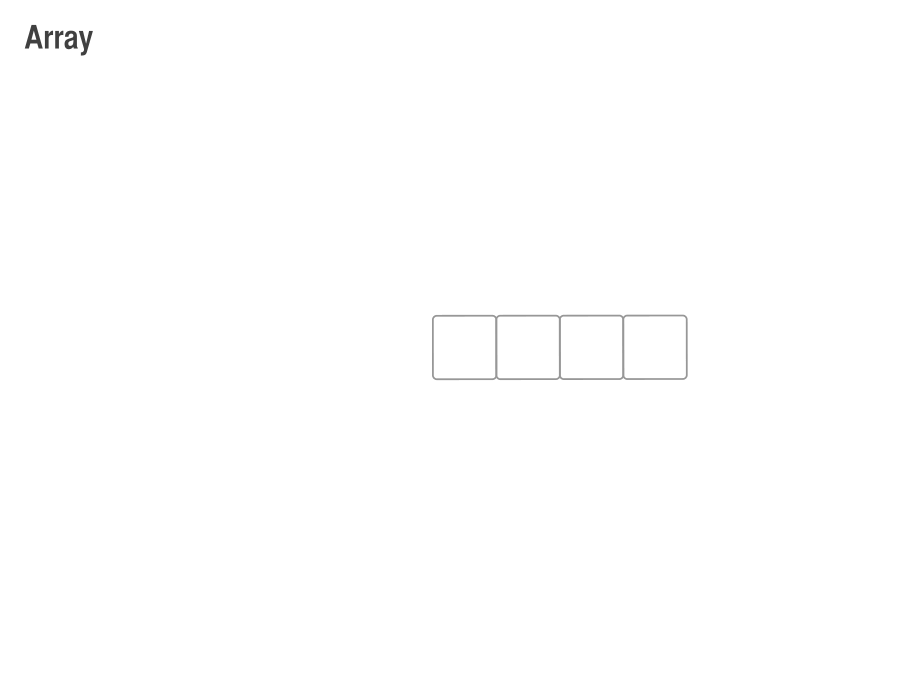